In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('joined_data.csv', engine='python')

In [3]:
df.shape

(831935, 22)

In [29]:
sample_df = df.sample(n=5000, random_state=42)

texts = sample_df["text"].astype(str).tolist()
len(texts)

5000

In [30]:
!pip install pyabsa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 574.2/574.2 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 17.3 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=92006fe9c2f9a6d5fb1c3535dd4cfb48842daf7b2fe2ee44f2ab51a375a9fecb
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


In [34]:
from pyabsa import ATEPCCheckpointManager
from tqdm import tqdm

atepc_model = ATEPCCheckpointManager.get_aspect_extractor(
    checkpoint="multilingual"
)

all_aspects = []

for text in tqdm(texts):
    # Pass the single text as a list to ensure it's treated as a batch for inference
    output = atepc_model.extract_aspect([text], pred_sentiment=False)

    # The output format for a single-item list input will be a list of lists.
    # So we need to access the first element (the result for our single text)
    # and then get the 'aspect' key from it.
    if output and len(output) > 0 and isinstance(output[0], dict):
        terms = output[0].get("aspect", [])
        for t in terms:
            if t and isinstance(t, str):
                all_aspects.append(t.lower().strip())


[2025-11-28 19:46:06] (2.4.2) ********** Available ATEPC model checkpoints for Version:2.4.2 (this version) **********
[2025-11-28 19:46:06] (2.4.2) ********** Available ATEPC model checkpoints for Version:2.4.2 (this version) **********
[2025-11-28 19:46:06] (2.4.2) Downloading checkpoint:multilingual 
[2025-11-28 19:46:06] (2.4.2) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets
[2025-11-28 19:46:06] (2.4.2) Checkpoint already downloaded, skip
[2025-11-28 19:46:07] (2.4.2) Load aspect extractor from checkpoints/ATEPC_MULTILINGUAL_CHECKPOINT
[2025-11-28 19:46:07] (2.4.2) config: checkpoints/ATEPC_MULTILINGUAL_CHECKPOINT/fast_lcf_atepc.config
[2025-11-28 19:46:07] (2.4.2) state_dict: checkpoints/ATEPC_MULTILINGUAL_CHECKPOINT/fast_lcf_atepc.state_dict
[2025-11-28 19:46:07] (2.4.2) model: None
[2025-11-28 19:46:07] (2.4.2) tokenizer: checkpoints/ATEPC_MULTILINGUAL_CHECKPOINT/fast_lcf_atepc.tokenizer
[2025-11-28 19:46:07] 

/usr/local/lib/python3.12/dist-packages/transformers/convert_slow_tokenizer.py:566: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
















  0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/pin_memory.py:57: DeprecationWarning: The argument 'device' of Tensor.pin_memory() is deprecated. Please do not pass this argument. (Triggered internally at /pytorch/aten/src/ATen/native/Memory.cpp:46.)
  return data.pin_memory(device)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/pin_memory.py:57: DeprecationWarning: The argument 'device' of Tensor.is_pinned() 

[2025-11-28 19:46:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  0%|          | 1/5000 [00:01<2:13:20,  1.60s/it]

[2025-11-28 19:46:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:15] (2.4.2) Example 0: These are definitely for a small , narrow face . They don ’ t fit me , but that ’ s not why I ’ m giving them two stars . These literally fell apart as I took them out of the case for the first time . They ’ re otherwise really cute , but buyer beware .


















  0%|          | 2/5000 [00:02<1:39:12,  1.19s/it]

[2025-11-28 19:46:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:15] (2.4.2) Example 0: The stitching was horrible had a stitch all the way up the front of the jumpsuit and in the back


















  0%|          | 3/5000 [00:03<1:17:19,  1.08it/s]

[2025-11-28 19:46:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:16] (2.4.2) Example 0: Great quality but I ordered a M and got a L . Too big for the person I got it for .


















  0%|          | 4/5000 [00:03<1:07:05,  1.24it/s]

[2025-11-28 19:46:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:17] (2.4.2) Example 0: The glove is very warm and works well on my iPhone . I also like the design !


















  0%|          | 5/5000 [00:04<1:01:21,  1.36it/s]

[2025-11-28 19:46:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  0%|          | 6/5000 [00:04<57:48,  1.44it/s]  

[2025-11-28 19:46:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  0%|          | 7/5000 [00:05<55:37,  1.50it/s]

[2025-11-28 19:46:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:19] (2.4.2) Example 0: These masks are lightweight but they ’ re very big at the bottom . Not all of them are cut the same therefore not the same size .


















  0%|          | 8/5000 [00:06<54:15,  1.53it/s]

[2025-11-28 19:46:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:19] (2.4.2) Example 0: The toe ring is super cute . Have to be careful changing clothes . It tends to get caught . And when sleeping a time or two I have gotten caught on a blanket or sheet . But overall love it .


















  0%|          | 9/5000 [00:06<53:18,  1.56it/s]

[2025-11-28 19:46:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:20] (2.4.2) Example 0: It is a beautiful dress . I ordered a large and it was a little big .


















  0%|          | 10/5000 [00:07<52:35,  1.58it/s]

[2025-11-28 19:46:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:20] (2.4.2) Example 0: Perfect size ! Shared with my friends !


















  0%|          | 11/5000 [00:08<52:09,  1.59it/s]

[2025-11-28 19:46:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:21] (2.4.2) Example 0: Very cheap fabric I don ’ t recommend that you buy it at all


















  0%|          | 12/5000 [00:08<51:56,  1.60it/s]

[2025-11-28 19:46:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  0%|          | 13/5000 [00:09<51:52,  1.60it/s]

[2025-11-28 19:46:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:22] (2.4.2) Example 0: It is poor quality , you can see through the material .


















  0%|          | 14/5000 [00:09<51:51,  1.60it/s]

[2025-11-28 19:46:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:23] (2.4.2) Example 0: These socks are super cute , comfortable , and soft ; but just a tad too thin . I wore my first pair today and was already receiving compliments


















  0%|          | 15/5000 [00:10<51:55,  1.60it/s]

[2025-11-28 19:46:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:23] (2.4.2) Example 0: It made a great gift


















  0%|          | 16/5000 [00:11<52:01,  1.60it/s]

[2025-11-28 19:46:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:24] (2.4.2) Example 0: Sizing was weird . Shoulders fit well but bottom was narrow . Bunched up over breezers .


















  0%|          | 17/5000 [00:11<51:58,  1.60it/s]

[2025-11-28 19:46:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:25] (2.4.2) Example 0: These pajamas are super comfy and fit true to size .


















  0%|          | 18/5000 [00:12<51:51,  1.60it/s]

[2025-11-28 19:46:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:27] (2.4.2) Example 0: Got this dress for Halloween and everyone thought is was so pretty . I would say it is for casual or formal events . True to size . I love the colors and the material is soft and stretchy .


















  0%|          | 19/5000 [00:14<1:25:55,  1.04s/it]

[2025-11-28 19:46:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:27] (2.4.2) Example 0: These boots are very nice .


















  0%|          | 20/5000 [00:15<1:15:22,  1.10it/s]

[2025-11-28 19:46:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:28] (2.4.2) Example 0: These earrings are tiny little dangling things and not worth the bother of returning them .


















  0%|          | 21/5000 [00:15<1:08:10,  1.22it/s]

[2025-11-28 19:46:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:29] (2.4.2) Example 0: Soft , effective mask that really entertains my young adults in the house — and they love the attention they get from other Stardew Valley fans when they wear it in public . Absolutely buy it !


















  0%|          | 22/5000 [00:16<1:03:05,  1.31it/s]

[2025-11-28 19:46:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:29] (2.4.2) Example 0: Perfect fot , true to size , beautiful embellishments


















  0%|          | 23/5000 [00:16<59:33,  1.39it/s]  

[2025-11-28 19:46:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:30] (2.4.2) Example 0: I purchased this bathing suit for my granddaughter , based on the picture . The suit I received doesn ’ t look like the picture at all . It has a thin tie in the front not a pretty thick bow . And the color isn ’ t the same as the picture either . And I haven ’ t even tried it on her yet . Very disappointed .


















  0%|          | 24/5000 [00:17<57:08,  1.45it/s]

[2025-11-28 19:46:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:30] (2.4.2) Example 0: Product fit perfectly into frames . . . however on the 1st cleaning one of the lenses faded ! ! ! Will add photo briefly ! : ( $ 24 . 00 dollars completely wasted . . . .


















  0%|          | 25/5000 [00:18<55:26,  1.50it/s]

[2025-11-28 19:46:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:31] (2.4.2) Example 0: I usually wear a large but got this in a small and it fits perfectly ! Its soft and stylish . I love it ! !


















  1%|          | 26/5000 [00:18<54:08,  1.53it/s]

[2025-11-28 19:46:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:32] (2.4.2) Example 0: Works well and price was decent . I felt strain in my eyes since I sit close to two monitors from 8 - 5 . These glasses make my eyes feel cold and leas headache now .


















  1%|          | 27/5000 [00:19<53:24,  1.55it/s]

[2025-11-28 19:46:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  1%|          | 28/5000 [00:19<52:42,  1.57it/s]

[2025-11-28 19:46:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:33] (2.4.2) Example 0: Runs a bit short . Otherwise very cute .


















  1%|          | 29/5000 [00:20<52:20,  1.58it/s]

[2025-11-28 19:46:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:34] (2.4.2) Example 0: I really like this band but it does not fit properly to my Apple Watch . The ends of the band stick out beyond the body of the watch . I am concerned this part of the band will snag my clothing or other items . Has anyone else had this problem ? I didn ’ t realize there would be variations on the Apple Watch models to specifically investigate what bands would work . I will have to send back and keep looking .


















  1%|          | 30/5000 [00:21<52:06,  1.59it/s]

[2025-11-28 19:46:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  1%|          | 31/5000 [00:21<51:49,  1.60it/s]

[2025-11-28 19:46:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:35] (2.4.2) Example 0: Really pretty and a really nice fit . I wore it for an hour and my finger started to turn green so I took it off . I look at the page again and it says do not expose to air , do not expose to water , do not expose to sweat . What can I expose it to exactly ? Sounds like I shouldn ' t even be wearing it . Title should say plated because it is not sterling silver .


















  1%|          | 32/5000 [00:22<51:46,  1.60it/s]

[2025-11-28 19:46:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:35] (2.4.2) Example 0: So cute but the sparkle gems come off easily .


















  1%|          | 33/5000 [00:23<51:38,  1.60it/s]

[2025-11-28 19:46:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  1%|          | 34/5000 [00:23<51:48,  1.60it/s]

[2025-11-28 19:46:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:37] (2.4.2) Example 0: My niece loved this ! ! It was one of her favorite Xmas gifts . Fit as expected , great quality !


















  1%|          | 35/5000 [00:24<51:58,  1.59it/s]

[2025-11-28 19:46:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:37] (2.4.2) Example 0: Pefect little gift


















  1%|          | 36/5000 [00:24<52:05,  1.59it/s]

[2025-11-28 19:46:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:38] (2.4.2) Example 0: Beautiful dress I am amazed at the quality and durability of fabric . Still looks great after several washes the past 6 months ! ! Not itchy or uncomfortable per my daughter you can see in pic that she offten falls asleep in it 😁


















  1%|          | 37/5000 [00:25<51:57,  1.59it/s]

[2025-11-28 19:46:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:39] (2.4.2) Example 0: Nice product for very reasonable price . Color is true to picture . Very good quality . This is my 4th one ! ! ! Love these .


















  1%|          | 38/5000 [00:26<51:45,  1.60it/s]

[2025-11-28 19:46:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:39] (2.4.2) Example 0: These pajamas are very light and comfortable . I love them .


















  1%|          | 39/5000 [00:26<51:37,  1.60it/s]

[2025-11-28 19:46:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  1%|          | 40/5000 [00:27<51:35,  1.60it/s]

[2025-11-28 19:46:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:40] (2.4.2) Example 0: They fit wonderfully they ’ re not too big they ’ re not to smile they fit exactly the way they say they were


















  1%|          | 41/5000 [00:28<51:49,  1.59it/s]

[2025-11-28 19:46:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:41] (2.4.2) Example 0: Everything is exactly like the description !


















  1%|          | 42/5000 [00:28<51:59,  1.59it/s]

[2025-11-28 19:46:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:42] (2.4.2) Example 0: Nice dress for the price !


















  1%|          | 43/5000 [00:29<51:55,  1.59it/s]

[2025-11-28 19:46:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  1%|          | 44/5000 [00:30<52:13,  1.58it/s]

[2025-11-28 19:46:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:43] (2.4.2) Example 0: 100 % satisfied with my purchase . This is a wide belt so it ’ s best on jeans . Im between size 10 and 12 right now and ordered a size 34 belt which fit just fine ! I hope they make a slimmer one for work slacks


















  1%|          | 45/5000 [00:30<52:28,  1.57it/s]

[2025-11-28 19:46:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  1%|          | 46/5000 [00:31<52:28,  1.57it/s]

[2025-11-28 19:46:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:46] (2.4.2) Example 0: [ [ VIDEOID : 9d3d7225eaeadbc0fd56424a34e543f1 ] ] They fit perfectly , everyone keeps complimenting me on them ! ! So pretty


















  1%|          | 47/5000 [00:33<1:27:25,  1.06s/it]

[2025-11-28 19:46:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:46] (2.4.2) Example 0: Nice looking shoes for all occasion . So far so good .


















  1%|          | 48/5000 [00:33<1:16:27,  1.08it/s]

[2025-11-28 19:46:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:47] (2.4.2) Example 0: I bought several suits for this season and this one is my favorite . I ’ m about a size 10 – 12 and it fits great . Plenty of coverage and is holding up well . Hoping for more colors .


















  1%|          | 49/5000 [00:34<1:08:51,  1.20it/s]

[2025-11-28 19:46:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  1%|          | 50/5000 [00:35<1:03:25,  1.30it/s]

[2025-11-28 19:46:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:48] (2.4.2) Example 0: very pretty although would prefer if it was a magnet instead of a pin


















  1%|          | 51/5000 [00:35<59:33,  1.38it/s]  

[2025-11-28 19:46:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  1%|          | 52/5000 [00:36<57:09,  1.44it/s]

[2025-11-28 19:46:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  1%|          | 53/5000 [00:37<55:06,  1.50it/s]

[2025-11-28 19:46:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  1%|          | 54/5000 [00:37<53:41,  1.54it/s]

[2025-11-28 19:46:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:51] (2.4.2) Example 0: BUENO , BONITO , BARATO Y BUEN SERVICIO


















  1%|          | 55/5000 [00:38<52:46,  1.56it/s]

[2025-11-28 19:46:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:51] (2.4.2) Example 0: Love the watch . . . but band is too short .


















  1%|          | 56/5000 [00:38<52:15,  1.58it/s]

[2025-11-28 19:46:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:52] (2.4.2) Example 0: I need readers . I wanted ones with cases . I bought readers after I saw these cases . They are a good size and they are cushioned to protect the glasses . Good price and they are attractive as well . I am very pleased with my purchase .


















  1%|          | 57/5000 [00:39<51:54,  1.59it/s]

[2025-11-28 19:46:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:52] (2.4.2) Example 0: The graphics are amazing . Fits a little tight at the stomach and the sleeves are a bit too long .


















  1%|          | 58/5000 [00:40<51:40,  1.59it/s]

[2025-11-28 19:46:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:53] (2.4.2) Example 0: Bought this scrub cap so I could wear it while working on a covid - 19 unit . It is super cute , pretty comfortable , stays put . I just wish I had buttons to help hold my mask .


















  1%|          | 59/5000 [00:40<51:34,  1.60it/s]

[2025-11-28 19:46:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  1%|          | 60/5000 [00:41<51:35,  1.60it/s]

[2025-11-28 19:46:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:54] (2.4.2) Example 0: Bought this for boyfriend and the front clasp broke off on the first day of use . He didn ' t even touch that front pocket , lol . Other than that it ' s okay ; fine for light things and water bottles .


















  1%|          | 61/5000 [00:42<51:53,  1.59it/s]

[2025-11-28 19:46:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  1%|          | 62/5000 [00:42<51:41,  1.59it/s]

[2025-11-28 19:46:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:56] (2.4.2) Example 0: not sure about it at the moment , it is a xmas gift


















  1%|▏         | 63/5000 [00:43<51:30,  1.60it/s]

[2025-11-28 19:46:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:56] (2.4.2) Example 0: Soft , lightweight , not too long around the neck ( which is good for me because I ' m short ) , true to color on the screen . The edges could have been sown a little more neatly but it ' s still a very nice scarf .


















  1%|▏         | 64/5000 [00:43<51:43,  1.59it/s]

[2025-11-28 19:46:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:57] (2.4.2) Example 0: This product was used for a Philips Lifeline Button !


















  1%|▏         | 65/5000 [00:44<51:43,  1.59it/s]

[2025-11-28 19:46:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:57] (2.4.2) Example 0: I usually wear a large . I am ordered a xl and fits great . Good price also .


















  1%|▏         | 66/5000 [00:45<51:43,  1.59it/s]

[2025-11-28 19:46:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:58] (2.4.2) Example 0: Nice jeans fits as expected


















  1%|▏         | 67/5000 [00:45<51:35,  1.59it/s]

[2025-11-28 19:46:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:59] (2.4.2) Example 0: Good hoodie good price


















  1%|▏         | 68/5000 [00:46<51:26,  1.60it/s]

[2025-11-28 19:46:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:46:59] (2.4.2) Example 0: Me likes . Good price too .


















  1%|▏         | 69/5000 [00:47<51:07,  1.61it/s]

[2025-11-28 19:47:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:00] (2.4.2) Example 0: These things stared to smell like melting plastic and got hot enough to cause burns . These are not safe .


















  1%|▏         | 70/5000 [00:47<51:03,  1.61it/s]

[2025-11-28 19:47:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  1%|▏         | 71/5000 [00:48<50:54,  1.61it/s]

[2025-11-28 19:47:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:01] (2.4.2) Example 0: Quality is good , but runs too small . Also they delivered longer than expected


















  1%|▏         | 72/5000 [00:48<50:50,  1.62it/s]

[2025-11-28 19:47:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  1%|▏         | 73/5000 [00:49<50:47,  1.62it/s]

[2025-11-28 19:47:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:02] (2.4.2) Example 0: I love these . The only thing I didn ’ t like was that a couple of them came with a rubber back piece instead of a metal one and I worry the rubber piece may come off and I ’ ll lose the pin .


















  1%|▏         | 74/5000 [00:50<50:51,  1.61it/s]

[2025-11-28 19:47:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:04] (2.4.2) Example 0: It was not what I excepted , but you get what you pay for . First easing and apparently one of the snaps came loose and got stuck in my sheet . Not seeing this unfortunately I found it in my bed when something was pinching me .


















  2%|▏         | 75/5000 [00:52<1:25:31,  1.04s/it]

[2025-11-28 19:47:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:05] (2.4.2) Example 0: Working out at the gym


















  2%|▏         | 76/5000 [00:52<1:15:09,  1.09it/s]

[2025-11-28 19:47:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:06] (2.4.2) Example 0: Product as described , received product as promised , and great seller .


















  2%|▏         | 77/5000 [00:53<1:07:51,  1.21it/s]

[2025-11-28 19:47:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:06] (2.4.2) Example 0: Product is very cute however it runs small in size . . . bad for me good for my daughter ! Other than that I ’ m pleased it just runs small in size . .


















  2%|▏         | 78/5000 [00:53<1:02:50,  1.31it/s]

[2025-11-28 19:47:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 79/5000 [00:54<59:04,  1.39it/s]  

[2025-11-28 19:47:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:08] (2.4.2) Example 0: I love the way these fit ! Perfect length for me too ! ( I ' m about 5 " ) No dragging and the waste band is high enough so it don ' t roll down


















  2%|▏         | 80/5000 [00:55<56:46,  1.44it/s]

[2025-11-28 19:47:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:08] (2.4.2) Example 0: Hat is super cute , however it was squished into a ball for shipping . once unfolded you can see all the creases it left in the hat . I ' m hoping they will work them selves out before our pictures !


















  2%|▏         | 81/5000 [00:55<54:47,  1.50it/s]

[2025-11-28 19:47:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:09] (2.4.2) Example 0: Weird fit . . . . maybe for plus size women . I didn ' t like this product at all . Waisted 30 bucks


















  2%|▏         | 82/5000 [00:56<53:32,  1.53it/s]

[2025-11-28 19:47:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:09] (2.4.2) Example 0: I love these so much I thought one was broken for a second but then I realized that its supposed to be like that anyways beside for that it came with a adorable blue flower bracelet and a lovely note that made my day I would 100 % recommend this to anyone : ]


















  2%|▏         | 83/5000 [00:57<52:35,  1.56it/s]

[2025-11-28 19:47:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 84/5000 [00:57<51:55,  1.58it/s]

[2025-11-28 19:47:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:11] (2.4.2) Example 0: Super cute pair of suspenders for my teenage son to wear to his homecoming dance !


















  2%|▏         | 85/5000 [00:58<51:37,  1.59it/s]

[2025-11-28 19:47:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 86/5000 [00:58<51:41,  1.58it/s]

[2025-11-28 19:47:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:12] (2.4.2) Example 0: Looks really sharp , well made , great seller


















  2%|▏         | 87/5000 [00:59<51:20,  1.59it/s]

[2025-11-28 19:47:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 88/5000 [01:00<51:07,  1.60it/s]

[2025-11-28 19:47:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:13] (2.4.2) Example 0: If you want a loose fit just order a size up from your original size .


















  2%|▏         | 89/5000 [01:00<51:03,  1.60it/s]

[2025-11-28 19:47:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:14] (2.4.2) Example 0: Disgusting . All bottles came empty . Not buying this again .


















  2%|▏         | 90/5000 [01:01<51:30,  1.59it/s]

[2025-11-28 19:47:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:14] (2.4.2) Example 0: Quality was excellent


















  2%|▏         | 91/5000 [01:02<51:22,  1.59it/s]

[2025-11-28 19:47:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 92/5000 [01:02<51:01,  1.60it/s]

[2025-11-28 19:47:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:16] (2.4.2) Example 0: I love them all however the rubbery plastic backs ALWAYS fall off . I had to dig and dig and dig to find backs that would keep them on all day . Perfect the backs and I would literally buy every pair made !


















  2%|▏         | 93/5000 [01:03<50:48,  1.61it/s]

[2025-11-28 19:47:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:16] (2.4.2) Example 0: The sizing is perfect & it ’ s well made . . . adorable pjs with matching dolls . . . so cute . . .


















  2%|▏         | 94/5000 [01:03<50:44,  1.61it/s]

[2025-11-28 19:47:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 95/5000 [01:04<50:49,  1.61it/s]

[2025-11-28 19:47:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 96/5000 [01:05<50:58,  1.60it/s]

[2025-11-28 19:47:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:18] (2.4.2) Example 0: Fits great , but logo was stitched on crooked .


















  2%|▏         | 97/5000 [01:05<50:55,  1.60it/s]

[2025-11-28 19:47:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 98/5000 [01:06<51:48,  1.58it/s]

[2025-11-28 19:47:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:19] (2.4.2) Example 0: They are pretty and light weight but there is an annoying glare . I found the glare very annoying .


















  2%|▏         | 99/5000 [01:07<52:02,  1.57it/s]

[2025-11-28 19:47:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:20] (2.4.2) Example 0: Husband is huge Kobe fan . He lives this shirt . Fits well . Color is vibrant . Comfortable t .


















  2%|▏         | 100/5000 [01:07<51:49,  1.58it/s]

[2025-11-28 19:47:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 101/5000 [01:08<51:56,  1.57it/s]

[2025-11-28 19:47:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:21] (2.4.2) Example 0: My son loves gudetama and had to have these for his birthday . Great quality . Have held up great after several washes . Vibrant colors .


















  2%|▏         | 102/5000 [01:08<51:46,  1.58it/s]

[2025-11-28 19:47:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:23] (2.4.2) Example 0: Very nice socks came fast


















  2%|▏         | 103/5000 [01:11<1:26:00,  1.05s/it]

[2025-11-28 19:47:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 104/5000 [01:11<1:15:21,  1.08it/s]

[2025-11-28 19:47:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:25] (2.4.2) Example 0: Lots of compliments . Love the dusty rose color !


















  2%|▏         | 105/5000 [01:12<1:08:02,  1.20it/s]

[2025-11-28 19:47:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 106/5000 [01:12<1:02:47,  1.30it/s]

[2025-11-28 19:47:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:26] (2.4.2) Example 0: I returned immediately . Very boxy appearance to the top that looked unflattering , and the neckline was very high . The material felt and looked cheap . I usually only wear dresses to events , so just wasn ’ t for me . Might be fine for someone whom wears them just casually on a day to day .


















  2%|▏         | 107/5000 [01:13<58:54,  1.38it/s]  

[2025-11-28 19:47:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 108/5000 [01:14<56:24,  1.45it/s]

[2025-11-28 19:47:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:27] (2.4.2) Example 0: Poor quality


















  2%|▏         | 109/5000 [01:14<54:28,  1.50it/s]

[2025-11-28 19:47:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:28] (2.4.2) Example 0: Really nice dress , I ’ m 5 ’ 9 and it covered my feet which is what I wanted , it is see - through .


















  2%|▏         | 110/5000 [01:15<53:20,  1.53it/s]

[2025-11-28 19:47:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 111/5000 [01:15<52:16,  1.56it/s]

[2025-11-28 19:47:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:29] (2.4.2) Example 0: So it ' s a nice shirt camo is dark . It fit well . Didn ' t know it was silky . . . before I bought it . But it ' s all good .


















  2%|▏         | 112/5000 [01:16<51:39,  1.58it/s]

[2025-11-28 19:47:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:30] (2.4.2) Example 0: Hard to get hooked due to hooks in the side but once on it ’ s a fabulous bra . Very supportive with great lift and contouring .


















  2%|▏         | 113/5000 [01:17<51:15,  1.59it/s]

[2025-11-28 19:47:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 114/5000 [01:17<51:19,  1.59it/s]

[2025-11-28 19:47:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:31] (2.4.2) Example 0: Material thin and cheap feel


















  2%|▏         | 115/5000 [01:18<51:08,  1.59it/s]

[2025-11-28 19:47:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:31] (2.4.2) Example 0: Me agradó es muy bonito , solo que se sale del talón


















  2%|▏         | 116/5000 [01:19<50:57,  1.60it/s]

[2025-11-28 19:47:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 117/5000 [01:19<51:34,  1.58it/s]

[2025-11-28 19:47:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:33] (2.4.2) Example 0: It is very small in the part of the neck


















  2%|▏         | 118/5000 [01:20<51:36,  1.58it/s]

[2025-11-28 19:47:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▏         | 119/5000 [01:21<51:30,  1.58it/s]

[2025-11-28 19:47:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:34] (2.4.2) Example 0: The best thing to do is to buy a sterling silver chain and put the heart pendant on that . The chain that comes with the pendant is probably worth 25 cents , if that , and will turn your neck green


















  2%|▏         | 120/5000 [01:21<51:21,  1.58it/s]

[2025-11-28 19:47:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:35] (2.4.2) Example 0: Adjustable to fit my son ' s little head perfect


















  2%|▏         | 121/5000 [01:22<51:12,  1.59it/s]

[2025-11-28 19:47:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:35] (2.4.2) Example 0: I really wanted to like this dress for my elopement but the white leaves NOTHING to the imagination . It is so sheer even wearing nude undergarments is extremely noticeable .


















  2%|▏         | 122/5000 [01:22<51:15,  1.59it/s]

[2025-11-28 19:47:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:36] (2.4.2) Example 0: If you plan on wearing them for more than like 2 hours , I ’ d pick a different pair . The clip makes them really painful . < br / > But they ’ re really cute , and sturdy .


















  2%|▏         | 123/5000 [01:23<51:08,  1.59it/s]

[2025-11-28 19:47:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:36] (2.4.2) Example 0: These socks fit great and seem well made . They are the same quality as the ones I have bought at Costco in the past . Not too sure how to say much about socks , but they are nice socks .


















  2%|▏         | 124/5000 [01:24<51:03,  1.59it/s]

[2025-11-28 19:47:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  2%|▎         | 125/5000 [01:24<51:18,  1.58it/s]

[2025-11-28 19:47:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:38] (2.4.2) Example 0: The glasses hurt behind my ears . < br / > They are well made with dark lenses . Presentation was very classy with a eyeglass case included . Even without my glasses on the sunglasses hurt behind my ears .


















  3%|▎         | 126/5000 [01:25<51:21,  1.58it/s]

[2025-11-28 19:47:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  3%|▎         | 127/5000 [01:26<51:15,  1.58it/s]

[2025-11-28 19:47:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:39] (2.4.2) Example 0: I don ' t like the fabric and the fit is weird . The neckline just doesn ' t lay right .


















  3%|▎         | 128/5000 [01:26<51:13,  1.58it/s]

[2025-11-28 19:47:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:40] (2.4.2) Example 0: I couldn ’ t be more in love with this bathing suit cover - up ! ! I wore it on vacation and felt amazing in it ! I am 5 ’ 7 ” , 187 lbs , 38DD . I do not have a flat tummy and this hid it so well . Colors were gorgeous ! I highly recommend !


















  3%|▎         | 129/5000 [01:27<50:58,  1.59it/s]

[2025-11-28 19:47:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  3%|▎         | 130/5000 [01:27<50:51,  1.60it/s]

[2025-11-28 19:47:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:42] (2.4.2) Example 0: Great product . Easy to use .


















  3%|▎         | 131/5000 [01:29<1:25:44,  1.06s/it]

[2025-11-28 19:47:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:43] (2.4.2) Example 0: These run at least 2 - 3 sizes too small . They did not fit and the material has no give for stretching


















  3%|▎         | 132/5000 [01:30<1:15:07,  1.08it/s]

[2025-11-28 19:47:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  3%|▎         | 133/5000 [01:31<1:07:30,  1.20it/s]

[2025-11-28 19:47:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:44] (2.4.2) Example 0: Cute but poor quality , two broke when I put them on .


















  3%|▎         | 134/5000 [01:31<1:02:18,  1.30it/s]

[2025-11-28 19:47:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  3%|▎         | 135/5000 [01:32<58:29,  1.39it/s]  

[2025-11-28 19:47:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  3%|▎         | 136/5000 [01:33<55:57,  1.45it/s]

[2025-11-28 19:47:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:46] (2.4.2) Example 0: I ’ m a Lululemon size 33 / 34 and I wear a size L . Shorts is comfortable and thick . Well worth the discounted price I paid .


















  3%|▎         | 137/5000 [01:33<54:33,  1.49it/s]

[2025-11-28 19:47:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:47] (2.4.2) Example 0: What ’ s not to like ? Sturdy , good quality


















  3%|▎         | 138/5000 [01:34<53:40,  1.51it/s]

[2025-11-28 19:47:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:47] (2.4.2) Example 0: Not super tight compression ; look cheaper than I like but u get what u pay for


















  3%|▎         | 139/5000 [01:34<52:38,  1.54it/s]

[2025-11-28 19:47:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:48] (2.4.2) Example 0: Mask is awesome ! Fits my big head well ! Highly recommend , good quality !


















  3%|▎         | 140/5000 [01:35<52:06,  1.55it/s]

[2025-11-28 19:47:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:49] (2.4.2) Example 0: Cute gift and is adorable


















  3%|▎         | 141/5000 [01:36<52:14,  1.55it/s]

[2025-11-28 19:47:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:49] (2.4.2) Example 0: Well made and cool for the hot days .


















  3%|▎         | 142/5000 [01:36<51:55,  1.56it/s]

[2025-11-28 19:47:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:50] (2.4.2) Example 0: S sweater was short and neck was a small V . Definitely didn ’ t hang off the shoulder . Sent back right away .


















  3%|▎         | 143/5000 [01:37<51:38,  1.57it/s]

[2025-11-28 19:47:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:50] (2.4.2) Example 0: Wrong size received . Terrible workmanship ! ! ! If I could give negative stars I would . I should have read the reviews ! ! !


















  3%|▎         | 144/5000 [01:38<51:49,  1.56it/s]

[2025-11-28 19:47:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:51] (2.4.2) Example 0: I love this ! The size is perfect . I didn ' t want something too big or something too small that I couldn ' t carry what my purse would have . It fit everything I needed .


















  3%|▎         | 145/5000 [01:38<51:54,  1.56it/s]

[2025-11-28 19:47:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:52] (2.4.2) Example 0: For excercises .


















  3%|▎         | 146/5000 [01:39<51:12,  1.58it/s]

[2025-11-28 19:47:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:52] (2.4.2) Example 0: This dress is horrible . You ’ ll look like a sack of potatoes in it . Terrible fit , flimsy cheap fabric , just awful . Picture is very misleading . It ’ s going back PRONTO !


















  3%|▎         | 147/5000 [01:40<51:13,  1.58it/s]

[2025-11-28 19:47:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:53] (2.4.2) Example 0: Good quality and ease of programing


















  3%|▎         | 148/5000 [01:40<50:47,  1.59it/s]

[2025-11-28 19:47:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  3%|▎         | 149/5000 [01:41<50:27,  1.60it/s]

[2025-11-28 19:47:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:54] (2.4.2) Example 0: Love the cap . My husband has undergone chemo and the caps have worked to keep his head warm .


















  3%|▎         | 150/5000 [01:41<50:13,  1.61it/s]

[2025-11-28 19:47:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:55] (2.4.2) Example 0: This shirt is fitted so it is great for laying because it won ' t add bulk . It runs a little short which is perfect if you want to tuck it into your pants . The fabric is thin .


















  3%|▎         | 151/5000 [01:42<50:10,  1.61it/s]

[2025-11-28 19:47:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  3%|▎         | 152/5000 [01:43<50:07,  1.61it/s]

[2025-11-28 19:47:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  3%|▎         | 153/5000 [01:43<51:05,  1.58it/s]

[2025-11-28 19:47:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:57] (2.4.2) Example 0: These boots look great but the fit was tight around the toe area . I wore them one day to work and I had foot fatigue , back and leg pain . What ' s the old saying " you get what you pay for . " These boots in my humble opinion are not worth it . Spend the extra money and get a quality boot . . I ' m just saying .


















  3%|▎         | 154/5000 [01:44<51:38,  1.56it/s]

[2025-11-28 19:47:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  3%|▎         | 155/5000 [01:45<52:01,  1.55it/s]

[2025-11-28 19:47:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:58] (2.4.2) Example 0: I love how it fits and the material is so soft !


















  3%|▎         | 156/5000 [01:45<51:59,  1.55it/s]

[2025-11-28 19:47:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:59] (2.4.2) Example 0: I am extremely pleased . The earrings are very comfortable . The price is excellent and the pearl drops are lovely . I purchased the light brown and really like the color too .


















  3%|▎         | 157/5000 [01:46<51:57,  1.55it/s]

[2025-11-28 19:47:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:47:59] (2.4.2) Example 0: Love it . Great workmanship . better then pic . So very happy that I decided to get it . Loved the reviews cause that ’ s what I go with . came right on time . never was interested in this kind of Jewery until I saw this . Very Happy with company . Great job .


















  3%|▎         | 158/5000 [01:46<51:22,  1.57it/s]

[2025-11-28 19:48:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:01] (2.4.2) Example 0: When I got it and unfold it to try it on , it started sheeding . So I washed it to get rid of it that didn ' t not work because it started sheeding again , Meaning when I started wearing it again the fabric will drop on the floor . It was very noticeable .


















  3%|▎         | 159/5000 [01:49<1:26:16,  1.07s/it]

[2025-11-28 19:48:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:02] (2.4.2) Example 0: Love the material , fits great


















  3%|▎         | 160/5000 [01:49<1:16:01,  1.06it/s]

[2025-11-28 19:48:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  3%|▎         | 161/5000 [01:50<1:08:21,  1.18it/s]

[2025-11-28 19:48:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:03] (2.4.2) Example 0: Great fabrics , looks very high end , lots compliments .


















  3%|▎         | 162/5000 [01:50<1:03:02,  1.28it/s]

[2025-11-28 19:48:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:04] (2.4.2) Example 0: Fits well . Structured hat that ' s rigid . The bill is solid and curved .


















  3%|▎         | 163/5000 [01:51<59:30,  1.35it/s]  

[2025-11-28 19:48:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:05] (2.4.2) Example 0: Fabric drapes and light enough to be cool for summer days . Can be dressed up or worn simply with a colored tee shirt and strapy sandals .


















  3%|▎         | 164/5000 [01:52<56:35,  1.42it/s]

[2025-11-28 19:48:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  3%|▎         | 165/5000 [01:52<54:32,  1.48it/s]

[2025-11-28 19:48:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:06] (2.4.2) Example 0: Bought this for my little that wears a 5T . We bought a 5 - 6X and it fit her perfect even after washing . Great quality , vibrant colors , and super adorable ! We are so happy with our purchase ! !


















  3%|▎         | 166/5000 [01:53<53:12,  1.51it/s]

[2025-11-28 19:48:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  3%|▎         | 167/5000 [01:54<52:13,  1.54it/s]

[2025-11-28 19:48:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:07] (2.4.2) Example 0: Didn ’ t have a pull string


















  3%|▎         | 168/5000 [01:54<52:03,  1.55it/s]

[2025-11-28 19:48:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:08] (2.4.2) Example 0: BEAUTIFUL NECKLACE . seriously so so so well made . i was shocked when i opened it , it exceeded my expectation . 1000 / 10


















  3%|▎         | 169/5000 [01:55<51:33,  1.56it/s]

[2025-11-28 19:48:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:08] (2.4.2) Example 0: Super cheap quality of material , the seems starting to undone as soon as I wore them .


















  3%|▎         | 170/5000 [01:55<51:19,  1.57it/s]

[2025-11-28 19:48:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:09] (2.4.2) Example 0: Unfortunately , I thought that these were great for about the first two weeks , as I needed slippers with some cushion , but the cushion was gone by two weeks and now my feet are in pain again .


















  3%|▎         | 171/5000 [01:56<51:17,  1.57it/s]

[2025-11-28 19:48:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:10] (2.4.2) Example 0: Super cute and comfy for septum use . I can keep it in consistently without bothering me or wearing out for a snapper or clicker .


















  3%|▎         | 172/5000 [01:57<50:41,  1.59it/s]

[2025-11-28 19:48:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:10] (2.4.2) Example 0: Fit nice but cheap material


















  3%|▎         | 173/5000 [01:57<50:22,  1.60it/s]

[2025-11-28 19:48:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  3%|▎         | 174/5000 [01:58<50:11,  1.60it/s]

[2025-11-28 19:48:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:11] (2.4.2) Example 0: Love how they look and feel . Can ’ t beat the price . Highly recommended


















  4%|▎         | 175/5000 [01:59<50:39,  1.59it/s]

[2025-11-28 19:48:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:12] (2.4.2) Example 0: This dress is really pretty and comfy . The strap to tie around the neck was off centered and that it ' s why I gave it 4 stars .


















  4%|▎         | 176/5000 [01:59<50:22,  1.60it/s]

[2025-11-28 19:48:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  4%|▎         | 177/5000 [02:00<50:40,  1.59it/s]

[2025-11-28 19:48:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:13] (2.4.2) Example 0: Such a cute dress for a good price ! A little short on my daughter who is pretty petite but cute nonetheless : )


















  4%|▎         | 178/5000 [02:00<50:19,  1.60it/s]

[2025-11-28 19:48:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:14] (2.4.2) Example 0: The wallet inserts were used to hold my credit cards and insurance cards . This insert is a little thicker and better quality than the last inserts I ordered . I think they will last longer .


















  4%|▎         | 179/5000 [02:01<50:15,  1.60it/s]

[2025-11-28 19:48:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:15] (2.4.2) Example 0: I LOVE this dress !


















  4%|▎         | 180/5000 [02:02<50:00,  1.61it/s]

[2025-11-28 19:48:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:15] (2.4.2) Example 0: I love this shoe , but wished I had ordered a size up . I am always just perfect size 8 in most shoes and this was a little too tight . Will order another pair in size 9


















  4%|▎         | 181/5000 [02:02<50:05,  1.60it/s]

[2025-11-28 19:48:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:16] (2.4.2) Example 0: First watch that fit my small wrist .


















  4%|▎         | 182/5000 [02:03<50:03,  1.60it/s]

[2025-11-28 19:48:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  4%|▎         | 183/5000 [02:04<50:33,  1.59it/s]

[2025-11-28 19:48:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  4%|▎         | 184/5000 [02:04<50:31,  1.59it/s]

[2025-11-28 19:48:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:18] (2.4.2) Example 0: I wanted a pair of clip on shades for my round lens prescription glasses . These fit just fine but I don ’ t know why they gave me a pair of clear lens glasses . I got what I wanted ( clip ons ) but have no use for the glasses .


















  4%|▎         | 185/5000 [02:05<50:35,  1.59it/s]

[2025-11-28 19:48:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  4%|▎         | 186/5000 [02:06<50:29,  1.59it/s]

[2025-11-28 19:48:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:20] (2.4.2) Example 0: I liked the style . I ordered from medium weight fabric , but the fabric shrank , so my sleeves are now too short . How do I account for shrinkage of sleeves for the next order ? Also , medium weight isn ’ t very soft . Next time I ’ ll order light weight .


















  4%|▎         | 187/5000 [02:08<1:26:07,  1.07s/it]

[2025-11-28 19:48:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:21] (2.4.2) Example 0: Great mask , very comfortable made with good materials . This is a official FC Barcelona product . No complaints , the price is on the high side but to me is worth the price .


















  4%|▍         | 188/5000 [02:08<1:15:37,  1.06it/s]

[2025-11-28 19:48:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  4%|▍         | 189/5000 [02:09<1:08:31,  1.17it/s]

[2025-11-28 19:48:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:22] (2.4.2) Example 0: Is good enough . Cheap material . but , cheap . I hope when I wash still good .


















  4%|▍         | 190/5000 [02:10<1:02:58,  1.27it/s]

[2025-11-28 19:48:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:23] (2.4.2) Example 0: Opened the package and the odor of the necklaces is so foul and strong it makes it impossible to wear . A very toxic chemical smell . I will wait to see if the smell fades . Otherwise the necklace seems okay but definitely couldn ’ t wear in day 1 .


















  4%|▍         | 191/5000 [02:10<58:49,  1.36it/s]  

[2025-11-28 19:48:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:24] (2.4.2) Example 0: Have nothing but Marine Corps masks ! Love these , easy to wash , easier to wear . Semper Fi !


















  4%|▍         | 192/5000 [02:11<55:53,  1.43it/s]

[2025-11-28 19:48:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:24] (2.4.2) Example 0: I like the color ! It ’ s really vibrant ! They have also green color , the next time I ’ ll order it . The fabric is soft and light . They can be perfect for sports or just walking outside . I worn them once , can ’ t say anything about durability but they look sturdy . One pack has 4 pairs . Easy order , fast shipping !


















  4%|▍         | 193/5000 [02:11<54:05,  1.48it/s]

[2025-11-28 19:48:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:25] (2.4.2) Example 0: The sleeves were not nearly as long as the photos led them to be , they barely got to my elbows but it fits everywhere else and the color is great so I ’ ll be keeping it .


















  4%|▍         | 194/5000 [02:12<52:36,  1.52it/s]

[2025-11-28 19:48:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  4%|▍         | 195/5000 [02:13<51:39,  1.55it/s]

[2025-11-28 19:48:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  4%|▍         | 196/5000 [02:13<50:58,  1.57it/s]

[2025-11-28 19:48:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  4%|▍         | 197/5000 [02:14<50:37,  1.58it/s]

[2025-11-28 19:48:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:27] (2.4.2) Example 0: Very cheaply made .


















  4%|▍         | 198/5000 [02:14<50:18,  1.59it/s]

[2025-11-28 19:48:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:28] (2.4.2) Example 0: I love these reading glasses . They are exactly as depicted in the description . I have a collection of different reading glasses but these have edged out my long time favorite foster grant glasses to become my go to pair .


















  4%|▍         | 199/5000 [02:15<50:03,  1.60it/s]

[2025-11-28 19:48:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:29] (2.4.2) Example 0: I love the length and look but the elastic in the waist I a little uncomfortable . Material is nice and like the pockets .


















  4%|▍         | 200/5000 [02:16<49:44,  1.61it/s]

[2025-11-28 19:48:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:29] (2.4.2) Example 0: Love the quality of these . They feel heavy like a luxury item whoch I like . These are a great supe for the Louis Vuitton v earings !


















  4%|▍         | 201/5000 [02:16<49:33,  1.61it/s]

[2025-11-28 19:48:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  4%|▍         | 202/5000 [02:17<49:35,  1.61it/s]

[2025-11-28 19:48:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:30] (2.4.2) Example 0: GREAT GIFT ! VALUE / QUALITY SUPER ! Perfect " Brother " keepsake !


















  4%|▍         | 203/5000 [02:18<49:49,  1.60it/s]

[2025-11-28 19:48:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  4%|▍         | 204/5000 [02:18<50:03,  1.60it/s]

[2025-11-28 19:48:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:32] (2.4.2) Example 0: Super cute , warm and long socks for boys . Perfect for all the fun winter activities . My son loves them !


















  4%|▍         | 205/5000 [02:19<50:09,  1.59it/s]

[2025-11-28 19:48:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  4%|▍         | 206/5000 [02:20<52:05,  1.53it/s]

[2025-11-28 19:48:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:33] (2.4.2) Example 0: I liked that these were thin and light pair of sweat pants , love the logo


















  4%|▍         | 207/5000 [02:20<51:37,  1.55it/s]

[2025-11-28 19:48:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:34] (2.4.2) Example 0: Use this product under my bike helmet . Fits really well and keeps my head cool . Keeps sweat out of my eyes .


















  4%|▍         | 208/5000 [02:21<52:03,  1.53it/s]

[2025-11-28 19:48:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  4%|▍         | 209/5000 [02:22<53:59,  1.48it/s]

[2025-11-28 19:48:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:35] (2.4.2) Example 0: Looks exactly like in the picture . I bought this for my mum since her skin is sensitive to the sun and she wanted something to lounge in the pool NOT as a COVID protection tool . The only flaw is that the nose piece is uncomfortable but I just used padded bandages to wrap it


















  4%|▍         | 210/5000 [02:22<53:26,  1.49it/s]

[2025-11-28 19:48:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:36] (2.4.2) Example 0: These toddler pajamas are my favorite brand for my son . Cotton is thick and comfy , they wash well and fit is perfect . And the fact that now my son ' s new favorite cartoon character is on the top , is the cherry on top , makes bedtime so much more fun !


















  4%|▍         | 211/5000 [02:23<52:52,  1.51it/s]

[2025-11-28 19:48:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:36] (2.4.2) Example 0: These might be good socks , but they apparently only come in one size : L / XL . Since I wear medium , I had to return them . Description should state the size .


















  4%|▍         | 212/5000 [02:24<52:27,  1.52it/s]

[2025-11-28 19:48:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:37] (2.4.2) Example 0: Gave as a Christmas gift to my sister in - law , who is into Hudson Bay blankets ( original ) and Glacier National Park ( Pendleton ) stuff ! Overall a nice tote , colors bright and plenty big enough for a few books , tablets and snacks for a day of exploring ! !


















  4%|▍         | 213/5000 [02:24<52:31,  1.52it/s]

[2025-11-28 19:48:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:38] (2.4.2) Example 0: My Grandson was very happy with his gift . Fortnite is very popular for boys his age and fit nicely .


















  4%|▍         | 214/5000 [02:25<51:52,  1.54it/s]

[2025-11-28 19:48:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:40] (2.4.2) Example 0: Great gift


















  4%|▍         | 215/5000 [02:27<1:26:43,  1.09s/it]

[2025-11-28 19:48:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  4%|▍         | 216/5000 [02:28<1:15:46,  1.05it/s]

[2025-11-28 19:48:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:41] (2.4.2) Example 0: Image on front of sweatshirt washed off at first wash , no resolution from seller , only two responses then no contact


















  4%|▍         | 217/5000 [02:28<1:08:19,  1.17it/s]

[2025-11-28 19:48:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:42] (2.4.2) Example 0: Excellent garmet and price


















  4%|▍         | 218/5000 [02:29<1:02:44,  1.27it/s]

[2025-11-28 19:48:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:42] (2.4.2) Example 0: Very nice looks just like what was advertised I ’ m happy with my purchase


















  4%|▍         | 219/5000 [02:29<58:54,  1.35it/s]  

[2025-11-28 19:48:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:43] (2.4.2) Example 0: My toddler loves her Barbie sweatshirt ! Fit her well . It is not a heavy sweatshirt so during cooler seasons plan to wear something under it . Would definitely buy again .


















  4%|▍         | 220/5000 [02:30<56:16,  1.42it/s]

[2025-11-28 19:48:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  4%|▍         | 221/5000 [02:31<54:14,  1.47it/s]

[2025-11-28 19:48:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:44] (2.4.2) Example 0: We like these simple style masks . They are comfortable to wear and work well in most situations . We haven ' t tested the washable aspect , but otherwise , we are pleased with this selection .


















  4%|▍         | 222/5000 [02:31<52:45,  1.51it/s]

[2025-11-28 19:48:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:45] (2.4.2) Example 0: Casual with a simple elegance . Great service and they were packaged with care


















  4%|▍         | 223/5000 [02:32<52:09,  1.53it/s]

[2025-11-28 19:48:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:45] (2.4.2) Example 0: Had write in a ton of players because stickers were missing and the board came with the same round printed twice . Junk .


















  4%|▍         | 224/5000 [02:33<51:28,  1.55it/s]

[2025-11-28 19:48:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:46] (2.4.2) Example 0: These coils are just stretchy enough without being too stretchy . Nice colors . Perfect for what I need .


















  4%|▍         | 225/5000 [02:33<51:05,  1.56it/s]

[2025-11-28 19:48:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:47] (2.4.2) Example 0: I don ' t recommend this at all ! I ' m not sure what the other colors are like but the beige is super see - through . The quality is okay but not worth the cost .


















  5%|▍         | 226/5000 [02:34<51:00,  1.56it/s]

[2025-11-28 19:48:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:47] (2.4.2) Example 0: Excelente pijama 👌💥


















  5%|▍         | 227/5000 [02:34<50:54,  1.56it/s]

[2025-11-28 19:48:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▍         | 228/5000 [02:35<50:34,  1.57it/s]

[2025-11-28 19:48:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:49] (2.4.2) Example 0: This is a great deal for these cases . They are sturdy and protective .


















  5%|▍         | 229/5000 [02:36<50:30,  1.57it/s]

[2025-11-28 19:48:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▍         | 230/5000 [02:36<50:36,  1.57it/s]

[2025-11-28 19:48:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:50] (2.4.2) Example 0: Good quality cotton . However , I put the socklets on and as input my shoe on they slid to the front of my foot . I also tried them with a slip on shoe . I took my shoe off and the sock stayed in the shoe , not on my foot . I am disabled so it is a problem to return the socks . So I am stuck with them .


















  5%|▍         | 231/5000 [02:37<50:21,  1.58it/s]

[2025-11-28 19:48:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:50] (2.4.2) Example 0: Great for night driving . Pinch my nose slightly .


















  5%|▍         | 232/5000 [02:38<50:48,  1.56it/s]

[2025-11-28 19:48:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:51] (2.4.2) Example 0: This is a lovely dress I wore it to church and received a lots of compliments


















  5%|▍         | 233/5000 [02:38<51:06,  1.55it/s]

[2025-11-28 19:48:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:52] (2.4.2) Example 0: Good shirt , perfect fit to size


















  5%|▍         | 234/5000 [02:39<50:31,  1.57it/s]

[2025-11-28 19:48:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:52] (2.4.2) Example 0: The article received does not bring the mask shown in the publication , if I do not get a response I will proceed to return it .


















  5%|▍         | 235/5000 [02:40<50:12,  1.58it/s]

[2025-11-28 19:48:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:53] (2.4.2) Example 0: These were perfect for masks - they are stretchy , easily adjustable , and soft on the ears . I ’ ve washed and dried them with no problem .


















  5%|▍         | 236/5000 [02:40<49:56,  1.59it/s]

[2025-11-28 19:48:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▍         | 237/5000 [02:41<49:44,  1.60it/s]

[2025-11-28 19:48:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:54] (2.4.2) Example 0: Thick material . I had to add another notch . Durable buckle . Nice color .


















  5%|▍         | 238/5000 [02:41<49:36,  1.60it/s]

[2025-11-28 19:48:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:55] (2.4.2) Example 0: Great cap ! Worth the money . Fit my five year old perfectly !


















  5%|▍         | 239/5000 [02:42<49:37,  1.60it/s]

[2025-11-28 19:48:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▍         | 240/5000 [02:43<49:47,  1.59it/s]

[2025-11-28 19:48:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:56] (2.4.2) Example 0: These are gorgeous for so little money !


















  5%|▍         | 241/5000 [02:43<49:44,  1.59it/s]

[2025-11-28 19:48:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:57] (2.4.2) Example 0: Terrible material , very cheap looking


















  5%|▍         | 242/5000 [02:44<49:59,  1.59it/s]

[2025-11-28 19:48:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:48:59] (2.4.2) Example 0: Looks just like the LV strap . The red part of the strap is really red and shiny but thanks to YT I was able to fix that . The strap is thin and the hardware is kinda cheapy but overall it looks great for the price .


















  5%|▍         | 243/5000 [02:46<1:25:33,  1.08s/it]

[2025-11-28 19:49:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▍         | 244/5000 [02:47<1:15:07,  1.06it/s]

[2025-11-28 19:49:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:00] (2.4.2) Example 0: Good quality . hold up well .


















  5%|▍         | 245/5000 [02:47<1:07:40,  1.17it/s]

[2025-11-28 19:49:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:01] (2.4.2) Example 0: For the price this is a great sweater . Love the material and looks pretty good . However the hidden pockets causes it to bunch up and look quite odd which leads to me constantly needing to pull the sweater down . I would buy in every color if it wasn ’ t for this issue .


















  5%|▍         | 246/5000 [02:48<1:02:15,  1.27it/s]

[2025-11-28 19:49:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:01] (2.4.2) Example 0: True to size . Had monogrammed for my granddaughter


















  5%|▍         | 247/5000 [02:49<58:18,  1.36it/s]  

[2025-11-28 19:49:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:02] (2.4.2) Example 0: I really like this ! I ' m hard to buy for in tops . This fits great !


















  5%|▍         | 248/5000 [02:49<55:29,  1.43it/s]

[2025-11-28 19:49:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:03] (2.4.2) Example 0: Good quality than any others ! . < br / > I have been used more than 10 different kf94 mark . < br / > This is the best !


















  5%|▍         | 249/5000 [02:50<53:35,  1.48it/s]

[2025-11-28 19:49:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:03] (2.4.2) Example 0: The shoes are very soft and comfortable . They are a little big but this helps me because my feet at wide .


















  5%|▌         | 250/5000 [02:50<52:10,  1.52it/s]

[2025-11-28 19:49:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:04] (2.4.2) Example 0: 2 were broken from one side handle couldn ' t snap back on because they was broken


















  5%|▌         | 251/5000 [02:51<51:01,  1.55it/s]

[2025-11-28 19:49:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▌         | 252/5000 [02:52<50:16,  1.57it/s]

[2025-11-28 19:49:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:05] (2.4.2) Example 0: One was already broken , and the other broke when I was putting it on . I fixed the second one , but the first one didn ' t have the piercing part , so I couldn ' t put it in my ear . It ' s really nice to wear , but I wish the other one hadn ' t been broken .


















  5%|▌         | 253/5000 [02:52<49:47,  1.59it/s]

[2025-11-28 19:49:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:06] (2.4.2) Example 0: I like the jogging pants have a back pocket .


















  5%|▌         | 254/5000 [02:53<49:26,  1.60it/s]

[2025-11-28 19:49:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▌         | 255/5000 [02:54<49:27,  1.60it/s]

[2025-11-28 19:49:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▌         | 256/5000 [02:54<49:37,  1.59it/s]

[2025-11-28 19:49:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▌         | 257/5000 [02:55<49:47,  1.59it/s]

[2025-11-28 19:49:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:08] (2.4.2) Example 0: The hat was what I expected . Durable , authentic and adjustable to any size head .


















  5%|▌         | 258/5000 [02:55<49:30,  1.60it/s]

[2025-11-28 19:49:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▌         | 259/5000 [02:56<50:03,  1.58it/s]

[2025-11-28 19:49:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:10] (2.4.2) Example 0: The fit was strange .


















  5%|▌         | 260/5000 [02:57<49:42,  1.59it/s]

[2025-11-28 19:49:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▌         | 261/5000 [02:57<49:37,  1.59it/s]

[2025-11-28 19:49:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▌         | 262/5000 [02:58<49:33,  1.59it/s]

[2025-11-28 19:49:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▌         | 263/5000 [02:59<49:43,  1.59it/s]

[2025-11-28 19:49:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▌         | 264/5000 [02:59<50:00,  1.58it/s]

[2025-11-28 19:49:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▌         | 265/5000 [03:00<50:24,  1.57it/s]

[2025-11-28 19:49:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:13] (2.4.2) Example 0: It ' s too small size large is like a medium maybe extra large or extra extra large world look like a large


















  5%|▌         | 266/5000 [03:01<50:45,  1.55it/s]

[2025-11-28 19:49:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:14] (2.4.2) Example 0: Good fit for a woman ' s 7 . 5 Wide width feet .


















  5%|▌         | 267/5000 [03:01<50:46,  1.55it/s]

[2025-11-28 19:49:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:15] (2.4.2) Example 0: Looks better on then in picture will be hetting other colors !


















  5%|▌         | 268/5000 [03:02<50:28,  1.56it/s]

[2025-11-28 19:49:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:15] (2.4.2) Example 0: This item was cheaply made , light weight material with seams showing on ruffles and I really wanted to like this dress ! ! ! Unfortunately it did not look like the photo advertised !


















  5%|▌         | 269/5000 [03:02<50:21,  1.57it/s]

[2025-11-28 19:49:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:16] (2.4.2) Example 0: I love this dress ! It ’ s so easy to just throw on with a pair of sandals and you have a totally put - together look with minimal effort and maximum comfort . I ’ d love to get this in another color or print .


















  5%|▌         | 270/5000 [03:03<50:14,  1.57it/s]

[2025-11-28 19:49:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:18] (2.4.2) Example 0: The bag itself is pretty and large and feels like a good quality bag but the magnet in the center of the bag doesn ’ t work at all which is frustrating .


















  5%|▌         | 271/5000 [03:05<1:25:42,  1.09s/it]

[2025-11-28 19:49:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:19] (2.4.2) Example 0: Really nice bikini , loved the color and quality


















  5%|▌         | 272/5000 [03:06<1:15:11,  1.05it/s]

[2025-11-28 19:49:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▌         | 273/5000 [03:06<1:07:26,  1.17it/s]

[2025-11-28 19:49:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  5%|▌         | 274/5000 [03:07<1:02:01,  1.27it/s]

[2025-11-28 19:49:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:21] (2.4.2) Example 0: I used it for event and received a lot I like your hat comments


















  6%|▌         | 275/5000 [03:08<58:03,  1.36it/s]  

[2025-11-28 19:49:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:21] (2.4.2) Example 0: you get what you pay for - cheap price for cheap quality . the first time my son gets into it it tears right by the zipper at his rear end ! he wasn ' t pulling on it or anything i helped him carefully into it so he wouldn ' t and with only a little pressure it tore . i didn ' t rate lower because it is as shown and does fit and is a good price even for cheap stitching .


















  6%|▌         | 276/5000 [03:08<55:18,  1.42it/s]

[2025-11-28 19:49:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 277/5000 [03:09<53:14,  1.48it/s]

[2025-11-28 19:49:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:22] (2.4.2) Example 0: The edges are already coming off and this is only a few months wish they made it a little more heavy duty


















  6%|▌         | 278/5000 [03:10<51:54,  1.52it/s]

[2025-11-28 19:49:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:23] (2.4.2) Example 0: WRONG SIZE TWICE ! I am a little irritated as this was a gift for a friend . I ordered a medium and was sent a large , so I did a return in order to get the correct size . I received the wrong size AGAIN . I am disappointed as these PJs are so cute and soft . I would give these 5 / 5 stars if I would have received the right size on even the second time . Very disappointed .


















  6%|▌         | 279/5000 [03:10<50:59,  1.54it/s]

[2025-11-28 19:49:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:24] (2.4.2) Example 0: Does not look like this its super blurry , badly printed .


















  6%|▌         | 280/5000 [03:11<50:30,  1.56it/s]

[2025-11-28 19:49:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 281/5000 [03:11<49:56,  1.57it/s]

[2025-11-28 19:49:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 282/5000 [03:12<49:58,  1.57it/s]

[2025-11-28 19:49:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:26] (2.4.2) Example 0: The opening is three if not four times as wide as it should be , you can feed multiple loops of strap through it … < br / > .


















  6%|▌         | 283/5000 [03:13<49:39,  1.58it/s]

[2025-11-28 19:49:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:26] (2.4.2) Example 0: These are great but they need to come with the silicone backs so they don ’ t slip out if your ear .


















  6%|▌         | 284/5000 [03:13<49:39,  1.58it/s]

[2025-11-28 19:49:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:27] (2.4.2) Example 0: I like that the bracelet is just as advertised and the ease and comfort of wearing


















  6%|▌         | 285/5000 [03:14<49:52,  1.58it/s]

[2025-11-28 19:49:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:27] (2.4.2) Example 0: This skirt is so cute ! The band is a little tight but it ’ s very flattering .


















  6%|▌         | 286/5000 [03:15<49:38,  1.58it/s]

[2025-11-28 19:49:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:28] (2.4.2) Example 0: The obstruct your vision a little bit but of course they do it ' s a black mask over your face . But they make the mask that I put over it looked that much more amazing . Good enough for me


















  6%|▌         | 287/5000 [03:15<49:45,  1.58it/s]

[2025-11-28 19:49:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 288/5000 [03:16<49:32,  1.59it/s]

[2025-11-28 19:49:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:29] (2.4.2) Example 0: Perfect fir ! Size large 🤗


















  6%|▌         | 289/5000 [03:16<49:18,  1.59it/s]

[2025-11-28 19:49:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 290/5000 [03:17<49:06,  1.60it/s]

[2025-11-28 19:49:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:31] (2.4.2) Example 0: It was a good buy .


















  6%|▌         | 291/5000 [03:18<49:01,  1.60it/s]

[2025-11-28 19:49:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:31] (2.4.2) Example 0: These gloves were a big help in dealing with storms and snow removal . They fit well enough . The batteries do not last nearly as long as the seller claims .


















  6%|▌         | 292/5000 [03:18<48:58,  1.60it/s]

[2025-11-28 19:49:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:32] (2.4.2) Example 0: Need to order 3 sizes up !


















  6%|▌         | 293/5000 [03:19<49:08,  1.60it/s]

[2025-11-28 19:49:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 294/5000 [03:20<48:55,  1.60it/s]

[2025-11-28 19:49:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:33] (2.4.2) Example 0: I absolutely love this dress ! I ' m 5 ' 7 " 157lbs and I ordered a medium . It fits great !


















  6%|▌         | 295/5000 [03:20<49:01,  1.60it/s]

[2025-11-28 19:49:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 296/5000 [03:21<49:28,  1.58it/s]

[2025-11-28 19:49:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 297/5000 [03:22<49:25,  1.59it/s]

[2025-11-28 19:49:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 298/5000 [03:22<49:22,  1.59it/s]

[2025-11-28 19:49:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:37] (2.4.2) Example 0: My feet are always cold and in spite of the thinness of this dress sock , they are extremely warm . I needed small Christmas gifts for a group of 8 ladies so I ordered 2 - 6 packs and had some left over for my husband and me . He is a fan , too . I will order more in different colors .


















  6%|▌         | 299/5000 [03:24<1:22:57,  1.06s/it]

[2025-11-28 19:49:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 300/5000 [03:25<1:13:12,  1.07it/s]

[2025-11-28 19:49:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:38] (2.4.2) Example 0: Great Shirt


















  6%|▌         | 301/5000 [03:25<1:05:51,  1.19it/s]

[2025-11-28 19:49:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 302/5000 [03:26<1:01:20,  1.28it/s]

[2025-11-28 19:49:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:40] (2.4.2) Example 0: I purchased this for a holiday themed party and I had so many compliments . The jacket was better than I expected .


















  6%|▌         | 303/5000 [03:27<57:56,  1.35it/s]  

[2025-11-28 19:49:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:40] (2.4.2) Example 0: My size is petite 4 for Ann Taylor brand . I ordered size 4 and fits perfect . It ' s pretty . The lace is soft and feel nice . I like everything except the color . The color is pretty , but it ' s not for my skin color . I ' m still thinking if I should return it or not .


















  6%|▌         | 304/5000 [03:27<55:46,  1.40it/s]

[2025-11-28 19:49:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:41] (2.4.2) Example 0: Great shirt


















  6%|▌         | 305/5000 [03:28<54:20,  1.44it/s]

[2025-11-28 19:49:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 306/5000 [03:29<53:28,  1.46it/s]

[2025-11-28 19:49:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:42] (2.4.2) Example 0: I have long arms so I ' m used to having sleeves be a bit short but these are insane . They barely go past my elbows . The material and sizing was ok but those sleeves are impossible . Only good if you roll them up . I was extremely disappointed . < br / > Also it took like 2 months for it to come in


















  6%|▌         | 307/5000 [03:29<52:31,  1.49it/s]

[2025-11-28 19:49:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 308/5000 [03:30<51:45,  1.51it/s]

[2025-11-28 19:49:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 309/5000 [03:31<50:39,  1.54it/s]

[2025-11-28 19:49:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 310/5000 [03:31<49:57,  1.56it/s]

[2025-11-28 19:49:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▌         | 311/5000 [03:32<49:46,  1.57it/s]

[2025-11-28 19:49:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:45] (2.4.2) Example 0: The packaging is beautiful and the fabric is good


















  6%|▌         | 312/5000 [03:32<49:54,  1.57it/s]

[2025-11-28 19:49:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:46] (2.4.2) Example 0: Filmy , clingy , very hot fabric .


















  6%|▋         | 313/5000 [03:33<49:38,  1.57it/s]

[2025-11-28 19:49:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▋         | 314/5000 [03:34<49:32,  1.58it/s]

[2025-11-28 19:49:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:47] (2.4.2) Example 0: Great cap


















  6%|▋         | 315/5000 [03:34<49:08,  1.59it/s]

[2025-11-28 19:49:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:48] (2.4.2) Example 0: Bought this for my daughter and she loves it . Super soft material , doesn ' t shrink when washed .


















  6%|▋         | 316/5000 [03:35<48:55,  1.60it/s]

[2025-11-28 19:49:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:48] (2.4.2) Example 0: The shorts labeled light gray are NOT light gray ! They are DARK gray .


















  6%|▋         | 317/5000 [03:36<48:49,  1.60it/s]

[2025-11-28 19:49:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:49] (2.4.2) Example 0: Fits great daughter loves them , seems to be well made .


















  6%|▋         | 318/5000 [03:36<48:58,  1.59it/s]

[2025-11-28 19:49:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:50] (2.4.2) Example 0: I have to return it because it was way too big and my husband didn ’ t like the material .


















  6%|▋         | 319/5000 [03:37<49:00,  1.59it/s]

[2025-11-28 19:49:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▋         | 320/5000 [03:38<48:47,  1.60it/s]

[2025-11-28 19:49:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  6%|▋         | 321/5000 [03:38<48:44,  1.60it/s]

[2025-11-28 19:49:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:52] (2.4.2) Example 0: Love having two glasses in case I lose one I have one more


















  6%|▋         | 322/5000 [03:39<48:47,  1.60it/s]

[2025-11-28 19:49:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:52] (2.4.2) Example 0: The necklace was very cute but broke very easily


















  6%|▋         | 323/5000 [03:39<49:11,  1.58it/s]

[2025-11-28 19:49:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:53] (2.4.2) Example 0: Perfect compliment for so many outfits .


















  6%|▋         | 324/5000 [03:40<49:04,  1.59it/s]

[2025-11-28 19:49:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:53] (2.4.2) Example 0: Girlfriend loves her new belly button ring , all stainless steel , no worry about infections


















  6%|▋         | 325/5000 [03:41<49:08,  1.59it/s]

[2025-11-28 19:49:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:54] (2.4.2) Example 0: Too difficult to put on , but way better than the other brand I tried


















  7%|▋         | 326/5000 [03:41<49:25,  1.58it/s]

[2025-11-28 19:49:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  7%|▋         | 327/5000 [03:43<1:22:52,  1.06s/it]

[2025-11-28 19:49:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:57] (2.4.2) Example 0: Si me gustó el modelo .


















  7%|▋         | 328/5000 [03:44<1:12:28,  1.07it/s]

[2025-11-28 19:49:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  7%|▋         | 329/5000 [03:45<1:05:29,  1.19it/s]

[2025-11-28 19:49:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:49:58] (2.4.2) Example 0: Very light but a bit tight . Lens are feel fragile .


















  7%|▋         | 330/5000 [03:45<1:00:25,  1.29it/s]

[2025-11-28 19:49:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  7%|▋         | 331/5000 [03:46<56:44,  1.37it/s]  

[2025-11-28 19:49:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  7%|▋         | 332/5000 [03:46<54:10,  1.44it/s]

[2025-11-28 19:50:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:00] (2.4.2) Example 0: I assumed since this was labeled plus size that I would be safe to order my usual size but I definitely should ’ ve sized up . The fabric is quite thin and for the oversized look ordering my true size was just way too small and tight .


















  7%|▋         | 333/5000 [03:47<52:20,  1.49it/s]

[2025-11-28 19:50:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:01] (2.4.2) Example 0: Beautiful pendant . Tiny necklace , will be replacing before wearing


















  7%|▋         | 334/5000 [03:48<50:57,  1.53it/s]

[2025-11-28 19:50:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:01] (2.4.2) Example 0: I like the style but I should get the small size since I always Medium size . But overall , I would definitely wear it


















  7%|▋         | 335/5000 [03:48<50:06,  1.55it/s]

[2025-11-28 19:50:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:02] (2.4.2) Example 0: The quality of these pants were awful . I did not even get a chance to try them on because they were ripped down the middle of pants . I am a size 4 and it fit around my waist well ; however , they ripped as soon as I walked around .


















  7%|▋         | 336/5000 [03:49<49:37,  1.57it/s]

[2025-11-28 19:50:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:02] (2.4.2) Example 0: The price was good and the item is lightweight . But I didn ’ t feel that it was secure enough to hold the elastic of the mask . I was using a cloth mask because it was comfortable for the skin and I used a disposable one over the cloth mask , It would not hold the elastic for both mask . It ’ s my honest opinion based on my experience


















  7%|▋         | 337/5000 [03:50<49:13,  1.58it/s]

[2025-11-28 19:50:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:03] (2.4.2) Example 0: Great quality and stylish . I ’ m a shortie ( 5 ’ 1 ” ) so they ’ re definitely full length pants on me , but I like that look better for my short legs .


















  7%|▋         | 338/5000 [03:50<48:53,  1.59it/s]

[2025-11-28 19:50:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:04] (2.4.2) Example 0: I Expected them to be thick sweat pants


















  7%|▋         | 339/5000 [03:51<48:47,  1.59it/s]

[2025-11-28 19:50:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:04] (2.4.2) Example 0: Beautiful love it so < br / > Much true to size except the < br / > Length because I am < br / > Short


















  7%|▋         | 340/5000 [03:51<48:52,  1.59it/s]

[2025-11-28 19:50:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:05] (2.4.2) Example 0: I was a little worried to order this for the price , however , I am very happy with my purchase . I do have to tighten the wire around the crystal as it does get loose if it gets caught on anything , but overall , love this necklace ! !


















  7%|▋         | 341/5000 [03:52<48:53,  1.59it/s]

[2025-11-28 19:50:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:06] (2.4.2) Example 0: Came very late . Neither of the two caps I ordered were the actual color that I ordered . They were both made from different materials / fabrics and are cheaply made . The “ sweat band ” stitched on the inside is like fleece . I would give zero stars if I could . I don ’ t recommend this seller .


















  7%|▋         | 342/5000 [03:53<48:50,  1.59it/s]

[2025-11-28 19:50:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:06] (2.4.2) Example 0: get a popcicle stick ; it will do the same job .


















  7%|▋         | 343/5000 [03:53<48:47,  1.59it/s]

[2025-11-28 19:50:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  7%|▋         | 344/5000 [03:54<48:33,  1.60it/s]

[2025-11-28 19:50:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  7%|▋         | 345/5000 [03:55<48:33,  1.60it/s]

[2025-11-28 19:50:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:08] (2.4.2) Example 0: It comes on a package with 6 hats , perfect for holidays so you can take pictures with family and friends , quality doesn ’ t seem to be the best but I ’ m just going to use for holidays


















  7%|▋         | 346/5000 [03:55<48:29,  1.60it/s]

[2025-11-28 19:50:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:09] (2.4.2) Example 0: Nice fabric , quality stitching , color as advertised , but not a true 3X which generally fits a little loose . The sleeves were a little tight , and could not button all the way .


















  7%|▋         | 347/5000 [03:56<49:02,  1.58it/s]

[2025-11-28 19:50:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:09] (2.4.2) Example 0: The material is sturdy bit not stiff and very soft . It ' s stylish and comfortable . Perfect for cooler temps but wouldn ' t say it ' s suitable to keep you warm in the fall or winter . . . . unless you ' re in FL or Southern CA . Definitely will purchase again in different colors .


















  7%|▋         | 348/5000 [03:57<49:13,  1.58it/s]

[2025-11-28 19:50:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:10] (2.4.2) Example 0: This is such a pretty pattern and I really wanted to love this suit . I ended up having to return because the bust part was too stiff . I couldn ’ t bend down at all or you could see everything .


















  7%|▋         | 349/5000 [03:57<49:11,  1.58it/s]

[2025-11-28 19:50:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:11] (2.4.2) Example 0: Bought these for my 4 year old ! He absolutely loves " Baby Yoda . " They are a great fit and the quality so far seems wonderful !


















  7%|▋         | 350/5000 [03:58<49:20,  1.57it/s]

[2025-11-28 19:50:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:11] (2.4.2) Example 0: Beautiful dress at a great price . I purchased in blue and green . Wished it came in more colors . Would recommend to anyone and I would definitely purchase again .


















  7%|▋         | 351/5000 [03:58<49:19,  1.57it/s]

[2025-11-28 19:50:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:12] (2.4.2) Example 0: Im 44 , 5 ' 3 and 130lbs and I got a small and they fit perfect ! So comfortable , cant wait to use them ! !


















  7%|▋         | 352/5000 [03:59<49:13,  1.57it/s]

[2025-11-28 19:50:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:13] (2.4.2) Example 0: These socks are both pretty and warm . They will keep your feet toasty and are not too thick , so they can be worn with shoes , as well as boots . Nice enough to give as gifts , which I have done . Nice quality , glad to have purchased them . 😽💕


















  7%|▋         | 353/5000 [04:00<49:05,  1.58it/s]

[2025-11-28 19:50:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  7%|▋         | 354/5000 [04:00<49:16,  1.57it/s]

[2025-11-28 19:50:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:15] (2.4.2) Example 0: The slide place strap holder broke after just 3 days of wearing .


















  7%|▋         | 355/5000 [04:02<1:21:59,  1.06s/it]

[2025-11-28 19:50:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  7%|▋         | 356/5000 [04:03<1:11:38,  1.08it/s]

[2025-11-28 19:50:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  7%|▋         | 357/5000 [04:04<1:04:28,  1.20it/s]

[2025-11-28 19:50:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:17] (2.4.2) Example 0: The sizes are off it runs large


















  7%|▋         | 358/5000 [04:04<59:39,  1.30it/s]  

[2025-11-28 19:50:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:18] (2.4.2) Example 0: The fabric quality wasn ’ t as expected


















  7%|▋         | 359/5000 [04:05<56:15,  1.38it/s]

[2025-11-28 19:50:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:18] (2.4.2) Example 0: I recommend these if you have a bigger chest and back with a smaller waist . Been looking for a while . Just ordered another 3 - pack


















  7%|▋         | 360/5000 [04:05<53:44,  1.44it/s]

[2025-11-28 19:50:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:19] (2.4.2) Example 0: lo uso siempre


















  7%|▋         | 361/5000 [04:06<51:49,  1.49it/s]

[2025-11-28 19:50:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:20] (2.4.2) Example 0: I am not going to give this a full five stars only because the mask is rough and stiff . My son loves the print on the mask just not the way it feels on his face .


















  7%|▋         | 362/5000 [04:07<50:40,  1.53it/s]

[2025-11-28 19:50:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:20] (2.4.2) Example 0: Sleeker chain design with nice strength and quality of the chain . Nice yellow Gold color and the 14k finish gives a beautiful look . It s colored stones in the hanging pendant are very nice and fitted perfectly .


















  7%|▋         | 363/5000 [04:07<49:52,  1.55it/s]

[2025-11-28 19:50:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  7%|▋         | 364/5000 [04:08<49:09,  1.57it/s]

[2025-11-28 19:50:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:21] (2.4.2) Example 0: Arrived as scheduled . Hope it will help my daughter learn to tell analog time . Strap is fabric so a child will need help to put on & fasten the buckle . Ticks loudly .


















  7%|▋         | 365/5000 [04:09<49:49,  1.55it/s]

[2025-11-28 19:50:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:22] (2.4.2) Example 0: Run big . Not well made


















  7%|▋         | 366/5000 [04:09<49:17,  1.57it/s]

[2025-11-28 19:50:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  7%|▋         | 367/5000 [04:10<49:05,  1.57it/s]

[2025-11-28 19:50:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:23] (2.4.2) Example 0: Lamentablemente este producto es de muy poca calidad . Aparte corren l de tamaño pequeño . Definitivamente voy a regresar este producto .


















  7%|▋         | 368/5000 [04:10<48:39,  1.59it/s]

[2025-11-28 19:50:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:24] (2.4.2) Example 0: [ [ VIDEOID : badfda740ff3b3f3c8235c8f4cc7ba7b ] ]


















  7%|▋         | 369/5000 [04:11<48:29,  1.59it/s]

[2025-11-28 19:50:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:25] (2.4.2) Example 0: Most comfortable well fitting mask I ' ve purchased thus far . I can breathe a lot better through this mask also


















  7%|▋         | 370/5000 [04:12<48:16,  1.60it/s]

[2025-11-28 19:50:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:25] (2.4.2) Example 0: Functional serves the purpose related to those who are chronology aged .


















  7%|▋         | 371/5000 [04:12<48:06,  1.60it/s]

[2025-11-28 19:50:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  7%|▋         | 372/5000 [04:13<48:02,  1.61it/s]

[2025-11-28 19:50:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:26] (2.4.2) Example 0: These nose rings are super cute but I guess I have a small nose because they were kinda big on me . I still try and squeeze them on but I already lost a few doing that . Cute while they last lol


















  7%|▋         | 373/5000 [04:14<47:54,  1.61it/s]

[2025-11-28 19:50:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:27] (2.4.2) Example 0: Nice fabric


















  7%|▋         | 374/5000 [04:14<48:02,  1.61it/s]

[2025-11-28 19:50:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:28] (2.4.2) Example 0: way too small cheap plastic material . . definitely for children not adults !


















  8%|▊         | 375/5000 [04:15<48:14,  1.60it/s]

[2025-11-28 19:50:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:28] (2.4.2) Example 0: I have a fairly large collection of Heidi Daus necklaces and bracelets and THIS one is a favorite of mine ! GRReat design . . . . . . . . . althought not extremely an " bling " design it is very beautiful . Highly recomment THIS ONE !


















  8%|▊         | 376/5000 [04:15<48:14,  1.60it/s]

[2025-11-28 19:50:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 377/5000 [04:16<48:10,  1.60it/s]

[2025-11-28 19:50:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:30] (2.4.2) Example 0: I saw my mother in law with one of these and after she told me about it , I knew I needed to order one for my husband . He is a type I diabetic and has passed out before so this gives me piece of mind knowing that all his medical information is available in case of an emergency . It fits great over his large size Apple Watch band and he is not bothered by it .


















  8%|▊         | 378/5000 [04:17<48:05,  1.60it/s]

[2025-11-28 19:50:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 379/5000 [04:17<48:01,  1.60it/s]

[2025-11-28 19:50:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:31] (2.4.2) Example 0: This title belt is amazing it ’ s an actual belt real metal the detail is amazing on it idk what the reviews are saying about its bad it ’ s amazing !


















  8%|▊         | 380/5000 [04:18<48:00,  1.60it/s]

[2025-11-28 19:50:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:31] (2.4.2) Example 0: My new favorite shorts for everyday use and walking / biking .


















  8%|▊         | 381/5000 [04:19<47:58,  1.60it/s]

[2025-11-28 19:50:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 382/5000 [04:19<48:08,  1.60it/s]

[2025-11-28 19:50:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 383/5000 [04:21<1:20:55,  1.05s/it]

[2025-11-28 19:50:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:35] (2.4.2) Example 0: These are so fantabulous ! ! ! Just the right amount of compression I need for my knee ! ! And bounus they feel great ! !


















  8%|▊         | 384/5000 [04:22<1:10:59,  1.08it/s]

[2025-11-28 19:50:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:35] (2.4.2) Example 0: The image is blurry . I tried to return it but the cost of shipping was more than the poster ' s worth . Don ' t bother .


















  8%|▊         | 385/5000 [04:22<1:04:04,  1.20it/s]

[2025-11-28 19:50:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 386/5000 [04:23<59:11,  1.30it/s]  

[2025-11-28 19:50:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:37] (2.4.2) Example 0: For chilly down to cold days , this cap fits perfectly under helmet straps and stays where you need it to , keeps your ears perfectly warm and out of the cold wind . Light , perfect wool . You can ’ t beat wool .


















  8%|▊         | 387/5000 [04:24<55:50,  1.38it/s]

[2025-11-28 19:50:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:37] (2.4.2) Example 0: I was hesitant on buying swimsuit online , but this is so cute and fits beautifully ! If you ' re debating on this purchase trust me when I say don ' t delay ! I ' m going to order 2 more in different colors


















  8%|▊         | 388/5000 [04:24<53:18,  1.44it/s]

[2025-11-28 19:50:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 389/5000 [04:25<51:45,  1.48it/s]

[2025-11-28 19:50:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:38] (2.4.2) Example 0: Good quality . Fits as expected


















  8%|▊         | 390/5000 [04:26<50:21,  1.53it/s]

[2025-11-28 19:50:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:39] (2.4.2) Example 0: These chains are sturdy . They are real Sterling silver . They ' re easy to put a pendant or bead on it .


















  8%|▊         | 391/5000 [04:26<49:29,  1.55it/s]

[2025-11-28 19:50:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 392/5000 [04:27<48:43,  1.58it/s]

[2025-11-28 19:50:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:40] (2.4.2) Example 0: Great fit , and love the adjustable angles ! Great protection from the sun . I ' ve also dropped these several times onto the hard pavement and haven ' t broken them ! I was afraid of their durability , but they ' ve held up very well so far !


















  8%|▊         | 393/5000 [04:27<48:32,  1.58it/s]

[2025-11-28 19:50:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:41] (2.4.2) Example 0: Great cap ! The details very well done - love the horse !


















  8%|▊         | 394/5000 [04:28<48:23,  1.59it/s]

[2025-11-28 19:50:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:42] (2.4.2) Example 0: Due to covid - 19 , masks are a necessity so I wear one for my job and it works . Not heavy or hot but cozy to wear everyday


















  8%|▊         | 395/5000 [04:29<48:19,  1.59it/s]

[2025-11-28 19:50:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:42] (2.4.2) Example 0: I like the fit , but they do run small . Otherwise , nice !


















  8%|▊         | 396/5000 [04:29<48:24,  1.59it/s]

[2025-11-28 19:50:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:43] (2.4.2) Example 0: I got these for my wife and she likes them . They fit very well and are comfortable . They are made of a combination of cotton and polyamide making them elastic as well as strong . The wait is pretty high and elastic , making is easy to wear during ballet practice .


















  8%|▊         | 397/5000 [04:30<48:10,  1.59it/s]

[2025-11-28 19:50:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:43] (2.4.2) Example 0: Love this watch . I have small wrists and it stays on perfectly . The numbers are big so you won ' t have a problem telling time .


















  8%|▊         | 398/5000 [04:31<47:54,  1.60it/s]

[2025-11-28 19:50:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 399/5000 [04:31<47:54,  1.60it/s]

[2025-11-28 19:50:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:45] (2.4.2) Example 0: Perfectly made and thick worth the price and durable


















  8%|▊         | 400/5000 [04:32<47:48,  1.60it/s]

[2025-11-28 19:50:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 401/5000 [04:32<47:35,  1.61it/s]

[2025-11-28 19:50:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 402/5000 [04:33<47:38,  1.61it/s]

[2025-11-28 19:50:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:47] (2.4.2) Example 0: The robe tie is the color of the pic , the actual robe is a dull plum looking color . No thanks , threw it away .


















  8%|▊         | 403/5000 [04:34<47:33,  1.61it/s]

[2025-11-28 19:50:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 404/5000 [04:34<48:05,  1.59it/s]

[2025-11-28 19:50:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:48] (2.4.2) Example 0: Love it ! Alex and ani bracelets are so cute and lightweight to wear


















  8%|▊         | 405/5000 [04:35<48:02,  1.59it/s]

[2025-11-28 19:50:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:48] (2.4.2) Example 0: White is completely see through . Runs a little small so I would size up . Definitely moisture wicking . I sweat a TON in the gym and it barley showed on these shirts


















  8%|▊         | 406/5000 [04:36<48:26,  1.58it/s]

[2025-11-28 19:50:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:49] (2.4.2) Example 0: Good quality I recommend it to 100 .


















  8%|▊         | 407/5000 [04:36<48:28,  1.58it/s]

[2025-11-28 19:50:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:50] (2.4.2) Example 0: Size and coolness as expected


















  8%|▊         | 408/5000 [04:37<48:26,  1.58it/s]

[2025-11-28 19:50:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:50] (2.4.2) Example 0: I love how soft and comfortable this material is . The quality helps me a lot when I have to sit in church for an hour . It ’ s hard to see in the photo but there are purple flowers too . It ’ s super cute and great coverage .


















  8%|▊         | 409/5000 [04:37<48:28,  1.58it/s]

[2025-11-28 19:50:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:51] (2.4.2) Example 0: Does not have a hood and material is very bad .


















  8%|▊         | 410/5000 [04:38<48:22,  1.58it/s]

[2025-11-28 19:50:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:53] (2.4.2) Example 0: They fit well and provide pain relief .


















  8%|▊         | 411/5000 [04:40<1:20:38,  1.05s/it]

[2025-11-28 19:50:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:54] (2.4.2) Example 0: Thick material great quality . I have a larger head and it fits very well . Looks a bit fancy


















  8%|▊         | 412/5000 [04:41<1:10:51,  1.08it/s]

[2025-11-28 19:50:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:54] (2.4.2) Example 0: I ordered a junior size for my 5yr old son . It was so small like baby size . Had to return it . Looks like a good quality glasses .


















  8%|▊         | 413/5000 [04:41<1:03:48,  1.20it/s]

[2025-11-28 19:50:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 414/5000 [04:42<58:47,  1.30it/s]  

[2025-11-28 19:50:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:55] (2.4.2) Example 0: Tag was taken out of the jumpsuit , I believe it is smaller than stated on the package . Material is nice and the style is also nice . I won ' t be ordering from this company again because they are dishonest .


















  8%|▊         | 415/5000 [04:43<55:24,  1.38it/s]

[2025-11-28 19:50:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:56] (2.4.2) Example 0: I have several 2xl compression shirts from different companies but I have never in my life tried on a 3xl that made me feel more like a busted can of biscuits than these made me feel . It was like trying on a Xl or a large . I could barely breathe it was so damn tight . 10 / 10 would not recommend


















  8%|▊         | 416/5000 [04:43<53:06,  1.44it/s]

[2025-11-28 19:50:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:57] (2.4.2) Example 0: The shipping was horrible , item was lost for a week , then finally after re ordering I received the band . It ripped 2 days later ! My son ' s watch was scratched because it flew off ! . . . Do not buy !


















  8%|▊         | 417/5000 [04:44<51:31,  1.48it/s]

[2025-11-28 19:50:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:57] (2.4.2) Example 0: I like this style , but this specific one didn ’ t feel as stretchy as the others , it rode down a lot and I had to keep pulling them up . They are alrighttttt but not my fave … waiting for other pair to come in to compare … may have to return due to comfort …


















  8%|▊         | 418/5000 [04:45<50:13,  1.52it/s]

[2025-11-28 19:50:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:58] (2.4.2) Example 0: Great quality


















  8%|▊         | 419/5000 [04:45<49:20,  1.55it/s]

[2025-11-28 19:50:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:50:59] (2.4.2) Example 0: It started turning colors already


















  8%|▊         | 420/5000 [04:46<48:37,  1.57it/s]

[2025-11-28 19:50:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 421/5000 [04:46<48:01,  1.59it/s]

[2025-11-28 19:51:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 422/5000 [04:47<47:46,  1.60it/s]

[2025-11-28 19:51:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  8%|▊         | 423/5000 [04:48<47:57,  1.59it/s]

[2025-11-28 19:51:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:01] (2.4.2) Example 0: Love this dress it is so soft and comfortable . Absolutely love it


















  8%|▊         | 424/5000 [04:48<47:35,  1.60it/s]

[2025-11-28 19:51:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:02] (2.4.2) Example 0: Literally the best leggings ever !


















  8%|▊         | 425/5000 [04:49<47:33,  1.60it/s]

[2025-11-28 19:51:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  9%|▊         | 426/5000 [04:49<47:35,  1.60it/s]

[2025-11-28 19:51:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:03] (2.4.2) Example 0: Was super thin and cheap . Possibly great for the beach . Ran very small .


















  9%|▊         | 427/5000 [04:50<47:51,  1.59it/s]

[2025-11-28 19:51:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:04] (2.4.2) Example 0: These are well worth the money !


















  9%|▊         | 428/5000 [04:51<47:41,  1.60it/s]

[2025-11-28 19:51:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  9%|▊         | 429/5000 [04:51<47:50,  1.59it/s]

[2025-11-28 19:51:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:05] (2.4.2) Example 0: My daughter loves anything sequin due to being obsessed with Jojo Siwa . Gifted her this purse for christmas and she really loved it . It is also the perfect size for both my 3 and 4 year old .


















  9%|▊         | 430/5000 [04:52<47:40,  1.60it/s]

[2025-11-28 19:51:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  9%|▊         | 431/5000 [04:53<47:16,  1.61it/s]

[2025-11-28 19:51:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  9%|▊         | 432/5000 [04:53<47:24,  1.61it/s]

[2025-11-28 19:51:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:07] (2.4.2) Example 0: El color no es rojo como en la foto , es muy claro . Peso 145 libras , lo cogi large y llegó muy ajustada .


















  9%|▊         | 433/5000 [04:54<47:34,  1.60it/s]

[2025-11-28 19:51:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:07] (2.4.2) Example 0: Just as shown in picture . Good quality and it was delivered earlier than stipulated date . Very nice sweatshirt / hoodie . Size M true to its size


















  9%|▊         | 434/5000 [04:54<47:40,  1.60it/s]

[2025-11-28 19:51:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:08] (2.4.2) Example 0: One of the bungees holding down my cooleroo shade broke . I replaced it with this product . It worked perfectly . Very pleased with how easy it was to fix the broken cord .


















  9%|▊         | 435/5000 [04:55<47:42,  1.59it/s]

[2025-11-28 19:51:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  9%|▊         | 436/5000 [04:56<47:43,  1.59it/s]

[2025-11-28 19:51:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  9%|▊         | 437/5000 [04:56<47:48,  1.59it/s]

[2025-11-28 19:51:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:10] (2.4.2) Example 0: Nice shirt fits well pretty color


















  9%|▉         | 438/5000 [04:57<47:41,  1.59it/s]

[2025-11-28 19:51:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:12] (2.4.2) Example 0: Very bad quality of material and fitting is not good .


















  9%|▉         | 439/5000 [04:59<1:20:24,  1.06s/it]

[2025-11-28 19:51:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:13] (2.4.2) Example 0: I ’ ve ordered several of these sets for my surgery recovery . All are good but this one I am super upset of course my favorite print would be missing the mask scrunchie and pants 🤦 🏼 ‍ ♀ ️ 🤦 🏼 ‍ ♀ ️ 🤦 🏼 ‍ ♀ ️ I wish there was a contact seller button … I don ’ t have for the return hassle just send missing parts please 🤦 🏼 ‍ ♀ ️


















  9%|▉         | 440/5000 [05:00<1:10:31,  1.08it/s]

[2025-11-28 19:51:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  9%|▉         | 441/5000 [05:00<1:03:20,  1.20it/s]

[2025-11-28 19:51:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:14] (2.4.2) Example 0: Works great . The material is nice and soft . The adjuster clip makes putting it on and tightening it down a breeze . Would recommend .


















  9%|▉         | 442/5000 [05:01<58:33,  1.30it/s]  

[2025-11-28 19:51:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:14] (2.4.2) Example 0: The panties fit like a large at best and the robe an xl but the bralette and shorts fit fine .


















  9%|▉         | 443/5000 [05:02<55:18,  1.37it/s]

[2025-11-28 19:51:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:15] (2.4.2) Example 0: Top is nice and loose , bottoms are fitted . Nice thick material


















  9%|▉         | 444/5000 [05:02<52:49,  1.44it/s]

[2025-11-28 19:51:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:16] (2.4.2) Example 0: These are impossible to bend over in without flashing someone ! Low cut , otherwise also run a bit tight in the thigh area vs normal joggers . Ok purchase but unless you ’ re rail thin these probably won ’ t be very flattering on you .


















  9%|▉         | 445/5000 [05:03<51:09,  1.48it/s]

[2025-11-28 19:51:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:16] (2.4.2) Example 0: Great present


















  9%|▉         | 446/5000 [05:03<50:07,  1.51it/s]

[2025-11-28 19:51:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:17] (2.4.2) Example 0: Husband uses these for dress gloves ; very soft and good for the price !


















  9%|▉         | 447/5000 [05:04<49:16,  1.54it/s]

[2025-11-28 19:51:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  9%|▉         | 448/5000 [05:05<48:50,  1.55it/s]

[2025-11-28 19:51:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:18] (2.4.2) Example 0: Birthday misspelled 😟


















  9%|▉         | 449/5000 [05:05<48:11,  1.57it/s]

[2025-11-28 19:51:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  9%|▉         | 450/5000 [05:06<47:39,  1.59it/s]

[2025-11-28 19:51:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  9%|▉         | 451/5000 [05:07<47:26,  1.60it/s]

[2025-11-28 19:51:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:20] (2.4.2) Example 0: Best dress for a wedding . The dress is comfy and it fits my body type perfectly . If you are anything like me chunky with a tummy and a booty I would recommend . Material is durable and it does not show your undergarment lines . I was the star of the show


















  9%|▉         | 452/5000 [05:07<47:17,  1.60it/s]

[2025-11-28 19:51:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:21] (2.4.2) Example 0: Perfect for beach or around the pool . Super cute and comfortable . Many wearing possiblies . Wanna get the other colors < br / > Would purchase again


















  9%|▉         | 453/5000 [05:08<47:01,  1.61it/s]

[2025-11-28 19:51:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:21] (2.4.2) Example 0: Works on a wide range of openers , easy pairing with program button on the back of remote under the visor clip . Garage door company ’ s charge double for 1 remote .


















  9%|▉         | 454/5000 [05:08<46:53,  1.62it/s]

[2025-11-28 19:51:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  9%|▉         | 455/5000 [05:09<46:47,  1.62it/s]

[2025-11-28 19:51:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:22] (2.4.2) Example 0: Not disappointed for the quality but the sizes run very small if you have any size to you at all order two up . I order one up and it will fit but no extra wiggle room


















  9%|▉         | 456/5000 [05:10<47:01,  1.61it/s]

[2025-11-28 19:51:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:23] (2.4.2) Example 0: These were the cutest snow boots ! Good quality and they fit perfect I can honestly recommend them to everyone


















  9%|▉         | 457/5000 [05:10<46:56,  1.61it/s]

[2025-11-28 19:51:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:24] (2.4.2) Example 0: I really loved it but the shirt came with a stain on the back that I couldn ’ t take off so I ended up returning it . I wish I was given the option to exchange it out for another one


















  9%|▉         | 458/5000 [05:11<47:02,  1.61it/s]

[2025-11-28 19:51:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:24] (2.4.2) Example 0: Real leather and better quality than most .


















  9%|▉         | 459/5000 [05:11<47:05,  1.61it/s]

[2025-11-28 19:51:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  9%|▉         | 460/5000 [05:12<47:23,  1.60it/s]

[2025-11-28 19:51:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:26] (2.4.2) Example 0: Pants fit fine top is to small


















  9%|▉         | 461/5000 [05:13<47:47,  1.58it/s]

[2025-11-28 19:51:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:26] (2.4.2) Example 0: Theoretically this would be a great combo to have the length of the biker shorts covered by the loose fit of running shorts . Reality is that the running shorts stick out like a weird tutu . I meant to send back but missed the deadline . So found the perfect use for these … . gardening shorts .


















  9%|▉         | 462/5000 [05:13<47:57,  1.58it/s]

[2025-11-28 19:51:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:27] (2.4.2) Example 0: Durable and great to help me keep track of my keys !


















  9%|▉         | 463/5000 [05:14<48:00,  1.57it/s]

[2025-11-28 19:51:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:28] (2.4.2) Example 0: I have reviewed a few tactical belts in the past . This one has all the features I expect and seems very solid and strong on the buckle . < br / > The tension when buckled holds the weight of normal tactical gear . I use this as my daily carry belt and have had no issues at all . < br / > < br / > Overall - great - would recommend !


















  9%|▉         | 464/5000 [05:15<48:15,  1.57it/s]

[2025-11-28 19:51:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:28] (2.4.2) Example 0: I love this shirt . It ’ s has all the cutest things on it and the quality is very nice . It fit as expected


















  9%|▉         | 465/5000 [05:15<48:14,  1.57it/s]

[2025-11-28 19:51:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:29] (2.4.2) Example 0: I ordered the size that Amazon suggested for my wife , and it was too small . Went to return it and found that the process is not easy . I am waiting for a label from Gobi so that I can return the vest . Very clunky process .


















  9%|▉         | 466/5000 [05:16<48:16,  1.57it/s]

[2025-11-28 19:51:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:31] (2.4.2) Example 0: My son is liking the shoe . It ' s easy to put on and take out .


















  9%|▉         | 467/5000 [05:18<1:21:20,  1.08s/it]

[2025-11-28 19:51:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















  9%|▉         | 468/5000 [05:19<1:11:05,  1.06it/s]

[2025-11-28 19:51:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:32] (2.4.2) Example 0: the charms I received are very and the appropriate size for my project , I am impressed for the amount of charms I received for the amount of money I paid .


















  9%|▉         | 469/5000 [05:19<1:03:56,  1.18it/s]

[2025-11-28 19:51:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:33] (2.4.2) Example 0: Absolutely love the color so warm comfortable didn ’ t shrink . I will be buying more in different colors the material is awesome


















  9%|▉         | 470/5000 [05:20<58:49,  1.28it/s]  

[2025-11-28 19:51:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:33] (2.4.2) Example 0: I have photos but I can not get them to load . Working on it !


















  9%|▉         | 471/5000 [05:21<55:07,  1.37it/s]

[2025-11-28 19:51:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:34] (2.4.2) Example 0: Boots are nice , only lasted about 5 months but I do have a tough job also some sole inserts made them a lot more comfortable .


















  9%|▉         | 472/5000 [05:21<52:45,  1.43it/s]

[2025-11-28 19:51:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:35] (2.4.2) Example 0: I love these slippers , and the fact that they actually come in a half size . That is hard to find out there these days ! < br / > High quality slipper with great support . I will have to wait to see how long they last to be totally happy . But so far , so good !


















  9%|▉         | 473/5000 [05:22<50:59,  1.48it/s]

[2025-11-28 19:51:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:35] (2.4.2) Example 0: It ’ s my favorite chain now


















  9%|▉         | 474/5000 [05:22<50:01,  1.51it/s]

[2025-11-28 19:51:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:36] (2.4.2) Example 0: Great product . Fast shipping . Many compliments !


















 10%|▉         | 475/5000 [05:23<48:59,  1.54it/s]

[2025-11-28 19:51:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 10%|▉         | 476/5000 [05:24<48:07,  1.57it/s]

[2025-11-28 19:51:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:37] (2.4.2) Example 0: It says men and woman but they are women socks mad cheap and painted


















 10%|▉         | 477/5000 [05:24<48:03,  1.57it/s]

[2025-11-28 19:51:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:38] (2.4.2) Example 0: Loved these pants ! They ' re comfortable and fit really well ! They are a bit big and I ' m petite so they ' re a tad longer for this 5 ' 3 girl . But overall I love them !


















 10%|▉         | 478/5000 [05:25<47:39,  1.58it/s]

[2025-11-28 19:51:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:38] (2.4.2) Example 0: They fit great and are so very comfortable . Wasn ’ t sure how they would fit but they are perfect , wish I had ordered more . Took awhile to receive but since they are custom it was well worth the wait ! Looking at purchasing a few more pairs .


















 10%|▉         | 479/5000 [05:26<47:36,  1.58it/s]

[2025-11-28 19:51:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:39] (2.4.2) Example 0: I like the pack of lights for my dogs - they seem very durable - hoping they stay attached , but I do take off between walks . Very happy with purchase


















 10%|▉         | 480/5000 [05:26<47:43,  1.58it/s]

[2025-11-28 19:51:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:40] (2.4.2) Example 0: I love the material . I ’ ve worn it twice since I ’ ve purchased it . I may purchase more in the future .


















 10%|▉         | 481/5000 [05:27<47:30,  1.59it/s]

[2025-11-28 19:51:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:40] (2.4.2) Example 0: Works great on sneakers


















 10%|▉         | 482/5000 [05:27<47:19,  1.59it/s]

[2025-11-28 19:51:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:41] (2.4.2) Example 0: Very comfortable on my wrist and very bright in color . I replace a hard watch band with softness . Value for the money and tune searching for item .


















 10%|▉         | 483/5000 [05:28<47:09,  1.60it/s]

[2025-11-28 19:51:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:42] (2.4.2) Example 0: Good twist on the classic rubik ' s cube design .


















 10%|▉         | 484/5000 [05:29<47:21,  1.59it/s]

[2025-11-28 19:51:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:42] (2.4.2) Example 0: Purchased this for my daughter . She absolutely loves it . Comes in a cute box like high end jewelry . Makes her feel so special .


















 10%|▉         | 485/5000 [05:29<47:18,  1.59it/s]

[2025-11-28 19:51:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:43] (2.4.2) Example 0: This one ' s design is very pretty and I got one in amazonbasics the extra large was way smaller than the large in this brand good quality and better price


















 10%|▉         | 486/5000 [05:30<47:22,  1.59it/s]

[2025-11-28 19:51:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:43] (2.4.2) Example 0: If you are needing a light weight summer cap , here ya go !


















 10%|▉         | 487/5000 [05:31<47:35,  1.58it/s]

[2025-11-28 19:51:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:44] (2.4.2) Example 0: The product description is a lie . The material is some kind of polyester . I specifically searched for cotton fabric because synthetic fabrics , aside from the occasional high quality rayon , make me itch to the point I end up with a rash .


















 10%|▉         | 488/5000 [05:31<47:54,  1.57it/s]

[2025-11-28 19:51:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:45] (2.4.2) Example 0: Small Tiny lenses


















 10%|▉         | 489/5000 [05:32<47:48,  1.57it/s]

[2025-11-28 19:51:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 10%|▉         | 490/5000 [05:33<47:29,  1.58it/s]

[2025-11-28 19:51:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 10%|▉         | 491/5000 [05:33<47:19,  1.59it/s]

[2025-11-28 19:51:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:47] (2.4.2) Example 0: 2 of the pockets were not sewn on the inside ! ! ! I unzipped and the pocket is not intact . Very junky .


















 10%|▉         | 492/5000 [05:34<47:09,  1.59it/s]

[2025-11-28 19:51:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:47] (2.4.2) Example 0: I love the packaging


















 10%|▉         | 493/5000 [05:34<47:06,  1.59it/s]

[2025-11-28 19:51:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:48] (2.4.2) Example 0: After 2 washing a pool day and a hot tub day this still literally bleeds color out in the shower like a kids marker . Embarrassing quality and embarrassing Amazon quality control


















 10%|▉         | 494/5000 [05:35<47:19,  1.59it/s]

[2025-11-28 19:51:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:50] (2.4.2) Example 0: Absolutely Terrible product . Do not waste your money . Terrible smell . You would be better off without a mask .


















 10%|▉         | 495/5000 [05:37<1:19:04,  1.05s/it]

[2025-11-28 19:51:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 10%|▉         | 496/5000 [05:38<1:09:25,  1.08it/s]

[2025-11-28 19:51:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 10%|▉         | 497/5000 [05:38<1:02:23,  1.20it/s]

[2025-11-28 19:51:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:52] (2.4.2) Example 0: Cannot tell a difference in quality to the authentic belt . The leather is silky smooth , the gold looks shiny and legit . It ’ s worth saving $ 400 + . BUY IT !


















 10%|▉         | 498/5000 [05:39<57:36,  1.30it/s]  

[2025-11-28 19:51:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:52] (2.4.2) Example 0: It looks nice and it comfortable but its very hard to open and if you try to slip it on without opening it pops off the way it attaches is poor quality its almost like the little pin isn ' t long enough or something


















 10%|▉         | 499/5000 [05:40<54:24,  1.38it/s]

[2025-11-28 19:51:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:53] (2.4.2) Example 0: It was ok . The picture was much cuter .


















 10%|█         | 500/5000 [05:40<52:18,  1.43it/s]

[2025-11-28 19:51:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:54] (2.4.2) Example 0: I love the top however , I would suggest going up at least one size .


















 10%|█         | 501/5000 [05:41<50:34,  1.48it/s]

[2025-11-28 19:51:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:54] (2.4.2) Example 0: Looks fantastic but it runs a bit small . My son is barely into 2t and this is snug on him .


















 10%|█         | 502/5000 [05:41<49:25,  1.52it/s]

[2025-11-28 19:51:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:55] (2.4.2) Example 0: The first 5 masks that were pulled from random in this package the rear loops ripped off . Finally got a good one that lasted .


















 10%|█         | 503/5000 [05:42<48:36,  1.54it/s]

[2025-11-28 19:51:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:55] (2.4.2) Example 0: I absolutely love this bag . < br / > It ’ s great quality & is super cute .


















 10%|█         | 504/5000 [05:43<48:08,  1.56it/s]

[2025-11-28 19:51:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:56] (2.4.2) Example 0: One wash and the design got absolutely shredded . Didn ’ t think I had to do anything special besides flipping it inside out but now it ’ s an at home shirt cus I can ’ t wear it out this way


















 10%|█         | 505/5000 [05:43<47:39,  1.57it/s]

[2025-11-28 19:51:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 10%|█         | 506/5000 [05:44<47:35,  1.57it/s]

[2025-11-28 19:51:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:57] (2.4.2) Example 0: good fit and comfortable


















 10%|█         | 507/5000 [05:45<47:12,  1.59it/s]

[2025-11-28 19:51:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 10%|█         | 508/5000 [05:45<47:07,  1.59it/s]

[2025-11-28 19:51:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:59] (2.4.2) Example 0: This was the perfect dress for me . I ’ m 5 ’ 6 about 170 lbs and this is a size small . I wore it to my daughters baby shower and loved it .


















 10%|█         | 509/5000 [05:46<46:55,  1.60it/s]

[2025-11-28 19:51:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:51:59] (2.4.2) Example 0: These arrived in good condition and are cute and very responsibly priced .


















 10%|█         | 510/5000 [05:46<46:35,  1.61it/s]

[2025-11-28 19:52:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:00] (2.4.2) Example 0: I have loved several pairs of Nike sandals for over a decade providing both comfort and longevity . I got these today and they feel like cheap plastic off of the dollar clearance rack even though they cost more than any other pair I ' ve purchased . I ordered a size too large and can barely get my foot in them .


















 10%|█         | 511/5000 [05:47<46:38,  1.60it/s]

[2025-11-28 19:52:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:00] (2.4.2) Example 0: I would give 10 stars if possible ! Durable , sturdy , claw tips allow weeding without destroying my fingernails . Recommend highly .


















 10%|█         | 512/5000 [05:48<46:27,  1.61it/s]

[2025-11-28 19:52:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:01] (2.4.2) Example 0: I like the fact that it ’ s convertible . You have a detachable crossbody shoulder strap , handles , or the convenience of a backpack . The fabric is a little lighter weight than expected . What I was not expecting was the bright yellow interior . I would have preferred a different interior color . As far as durability and water resistance , I have only had for a little over a week .


















 10%|█         | 513/5000 [05:48<46:42,  1.60it/s]

[2025-11-28 19:52:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:02] (2.4.2) Example 0: This belt has been on a Renaissance girl and a barbarian in the space of a month . Great , versatile piece for school costumes ! Also , it was easy to cinch tight for a young girl .


















 10%|█         | 514/5000 [05:49<46:32,  1.61it/s]

[2025-11-28 19:52:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 10%|█         | 515/5000 [05:50<46:24,  1.61it/s]

[2025-11-28 19:52:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:03] (2.4.2) Example 0: Not convenient with timing . Takes a long time to adjust .


















 10%|█         | 516/5000 [05:50<46:17,  1.61it/s]

[2025-11-28 19:52:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 10%|█         | 517/5000 [05:51<46:19,  1.61it/s]

[2025-11-28 19:52:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:04] (2.4.2) Example 0: It was not teal . It was navy blue and so heavy . . .


















 10%|█         | 518/5000 [05:51<46:19,  1.61it/s]

[2025-11-28 19:52:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:05] (2.4.2) Example 0: Super small , no stretch , not cute at all . Returned .


















 10%|█         | 519/5000 [05:52<46:31,  1.60it/s]

[2025-11-28 19:52:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:05] (2.4.2) Example 0: My granddaughter absolutely loved the among us shirt ! She ’ s been wanting one for a long time so it was a big hit Christmas morning ! Thank you for making quality product and for the prompt shipping and reasonable price . Sizes are right on they run true to size . ⭐ ️ ⭐ ️ ⭐ ️ ⭐ ️ ⭐ ️ < br / > Gayla Olsen


















 10%|█         | 520/5000 [05:53<46:46,  1.60it/s]

[2025-11-28 19:52:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:06] (2.4.2) Example 0: So precious and well made ! My wife was over the moon .


















 10%|█         | 521/5000 [05:53<46:58,  1.59it/s]

[2025-11-28 19:52:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 10%|█         | 522/5000 [05:54<47:08,  1.58it/s]

[2025-11-28 19:52:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:09] (2.4.2) Example 0: Cute and Warm pink . Grey pair same size , style , and brand do not fit . Can ' t leave the house to return or I would .


















 10%|█         | 523/5000 [05:56<1:19:44,  1.07s/it]

[2025-11-28 19:52:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 10%|█         | 524/5000 [05:57<1:10:01,  1.07it/s]

[2025-11-28 19:52:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 10%|█         | 525/5000 [05:57<1:02:58,  1.18it/s]

[2025-11-28 19:52:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█         | 526/5000 [05:58<58:21,  1.28it/s]  

[2025-11-28 19:52:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█         | 527/5000 [05:59<54:53,  1.36it/s]

[2025-11-28 19:52:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:12] (2.4.2) Example 0: Hi the dress looks great in the picture here , but when I received , first of all the fabric is really clingy and thin , secondly the style fits looks totally different from what ’ s show in picture !


















 11%|█         | 528/5000 [05:59<52:17,  1.43it/s]

[2025-11-28 19:52:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█         | 529/5000 [06:00<50:31,  1.47it/s]

[2025-11-28 19:52:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█         | 530/5000 [06:00<49:24,  1.51it/s]

[2025-11-28 19:52:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:14] (2.4.2) Example 0: The shirt I received is completely different than shown . It ’ s advertised as a cotton blend and I received a very obvious spandex shirt . Not the look I like or want . It looks like an under armor workout top for men . Very disappointed .


















 11%|█         | 531/5000 [06:01<48:25,  1.54it/s]

[2025-11-28 19:52:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:14] (2.4.2) Example 0: The coat is really nice . It ' s good and heavy . The only thing it fits a little snug . I ordered a 2x which is what my daughter wears , I should have ordered a 3x . My daughter has short arms so sleeves are long on her , and she is round in belly area , but I tried it on and fit good . im happy with it over all that ' s why I gave 5 stars .


















 11%|█         | 532/5000 [06:02<47:59,  1.55it/s]

[2025-11-28 19:52:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█         | 533/5000 [06:02<47:28,  1.57it/s]

[2025-11-28 19:52:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:16] (2.4.2) Example 0: These are very small . Barely fit me and I am a woman ’ s size 7 .


















 11%|█         | 534/5000 [06:03<47:04,  1.58it/s]

[2025-11-28 19:52:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█         | 535/5000 [06:04<46:53,  1.59it/s]

[2025-11-28 19:52:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█         | 536/5000 [06:04<46:30,  1.60it/s]

[2025-11-28 19:52:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:18] (2.4.2) Example 0: I absolutely love this , you do have to put a thin coat of clear nail polish to prevent the plating from wearing off but thats easy . < br / > I also bought some matching chain to switch out , the chain it comes with is too delicate for my destructive self lol .


















 11%|█         | 537/5000 [06:05<46:16,  1.61it/s]

[2025-11-28 19:52:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█         | 538/5000 [06:05<46:25,  1.60it/s]

[2025-11-28 19:52:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:19] (2.4.2) Example 0: These are actually nicer than I expected . They should hold up well with prolonged use . They also fit well and do not slip off my face .


















 11%|█         | 539/5000 [06:06<46:40,  1.59it/s]

[2025-11-28 19:52:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█         | 540/5000 [06:07<46:33,  1.60it/s]

[2025-11-28 19:52:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:20] (2.4.2) Example 0: Liked the quality of the denim material - nice and substantial


















 11%|█         | 541/5000 [06:07<46:19,  1.60it/s]

[2025-11-28 19:52:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:21] (2.4.2) Example 0: worn a handful of times , everything is holding up great ! ! Love the patterns too : )


















 11%|█         | 542/5000 [06:08<46:13,  1.61it/s]

[2025-11-28 19:52:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:21] (2.4.2) Example 0: Amazing product . Shipped quickly and very durable . Has been washed several times and is holding up like new .


















 11%|█         | 543/5000 [06:08<46:11,  1.61it/s]

[2025-11-28 19:52:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:22] (2.4.2) Example 0: Nice pants


















 11%|█         | 544/5000 [06:09<46:28,  1.60it/s]

[2025-11-28 19:52:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:23] (2.4.2) Example 0: Pretty nice animal print designs , not cheap looking


















 11%|█         | 545/5000 [06:10<46:45,  1.59it/s]

[2025-11-28 19:52:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:23] (2.4.2) Example 0: Passed my expectations , looks really good on . . perfect fit . . will deffo buy again .


















 11%|█         | 546/5000 [06:10<46:49,  1.59it/s]

[2025-11-28 19:52:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:24] (2.4.2) Example 0: They are the perfect size and they are super cut he ' s 1yr and I by his shoes size 7 so that he can have a little room to grow into .


















 11%|█         | 547/5000 [06:11<47:06,  1.58it/s]

[2025-11-28 19:52:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:24] (2.4.2) Example 0: Hat fits perfect , another hat for my Airborne collection


















 11%|█         | 548/5000 [06:12<47:02,  1.58it/s]

[2025-11-28 19:52:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:25] (2.4.2) Example 0: Material is thin . Material is soft . Easy to put on and great for casual wear . Worth the value .


















 11%|█         | 549/5000 [06:12<47:23,  1.57it/s]

[2025-11-28 19:52:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█         | 550/5000 [06:13<47:34,  1.56it/s]

[2025-11-28 19:52:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█         | 551/5000 [06:15<1:18:18,  1.06s/it]

[2025-11-28 19:52:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█         | 552/5000 [06:16<1:08:36,  1.08it/s]

[2025-11-28 19:52:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:29] (2.4.2) Example 0: After being used by a middle school student for a month the whole bag came undone . The material is very thin and cheap .


















 11%|█         | 553/5000 [06:16<1:01:49,  1.20it/s]

[2025-11-28 19:52:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:30] (2.4.2) Example 0: Love this shirt ! Great quality ! The shirt isnt thin or body . The decal is good quality as well . True to size . Highly recommend and I will definitely be purchasing more from this shop ! O yea it came 1 day faster than estimated ! W - I - N ! !


















 11%|█         | 554/5000 [06:17<57:01,  1.30it/s]  

[2025-11-28 19:52:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:30] (2.4.2) Example 0: this is by far my favorite jacket I ’ ve ever had ! it ’ s the perfect color , super soft , and great especially for the price ! 10 / 10 recommend !


















 11%|█         | 555/5000 [06:17<53:38,  1.38it/s]

[2025-11-28 19:52:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:31] (2.4.2) Example 0: As the photographer , I loved the belt . It was too long but we simply wrapped it around the model a couple of times .


















 11%|█         | 556/5000 [06:18<51:39,  1.43it/s]

[2025-11-28 19:52:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:32] (2.4.2) Example 0: Pictures show mesh pockets for drinks on both sides . My backpack came with NO mess pockets !


















 11%|█         | 557/5000 [06:19<49:57,  1.48it/s]

[2025-11-28 19:52:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:32] (2.4.2) Example 0:   [ [ VIDEOID : 5eee1ea7d81e7469b7b8e9d2b6042a38 ] ] Details : I ’ m 5 ’ 2 & 198lbs . I bought a Large . This is great for my size . < br / > Pros : So great for cosplay and everyday wear . < br / > Cons : NO POCKETS 😫


















 11%|█         | 558/5000 [06:19<49:03,  1.51it/s]

[2025-11-28 19:52:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:33] (2.4.2) Example 0: Just what I needed . Well made and beautiful . Not flimsy .


















 11%|█         | 559/5000 [06:20<48:15,  1.53it/s]

[2025-11-28 19:52:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:33] (2.4.2) Example 0: I was a little disappointed that the shirt is almost cropped and the shorts feel a size smaller than expected . Don ' t get me wrong , it fits , just not as loose as the picture shows . That being said , this is SO SOFT ! ! ! ! ! It ' s lightweight without being completely sheer and I WILL be ordering it in several other colors .


















 11%|█         | 560/5000 [06:21<47:43,  1.55it/s]

[2025-11-28 19:52:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█         | 561/5000 [06:21<47:15,  1.57it/s]

[2025-11-28 19:52:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█         | 562/5000 [06:22<47:01,  1.57it/s]

[2025-11-28 19:52:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█▏        | 563/5000 [06:22<46:45,  1.58it/s]

[2025-11-28 19:52:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:36] (2.4.2) Example 0: It ’ s beautiful but the sizing is definitely off . My wrist is 6 . 5 ” & I ordered the medium & it ’ s so tight that I can ’ t wear it . Super impressed with its looks , but size upZ


















 11%|█▏        | 564/5000 [06:23<46:57,  1.57it/s]

[2025-11-28 19:52:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█▏        | 565/5000 [06:24<46:50,  1.58it/s]

[2025-11-28 19:52:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:37] (2.4.2) Example 0: The scarf feels nice and soft but the title should not be allowed to say Cashmere because it is polyester . It even says so in the description below . Because of this misleading title I took a star off since it is false advertising .


















 11%|█▏        | 566/5000 [06:24<46:55,  1.57it/s]

[2025-11-28 19:52:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:38] (2.4.2) Example 0: EXCELLENT SERVICE ! < br / > - VERY CARING < br / > - VERY HELPFUL < br / > - VERY LOVING < br / > EXCELLENT PRODUCT ! < br / > - FULL OF LIFE < br / > - GREAT ENERGY < br / > - VERY BEAUTIFUL < br / > - GREAT QUALITY < br / > - FITS PERFECTLY


















 11%|█▏        | 567/5000 [06:25<46:41,  1.58it/s]

[2025-11-28 19:52:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:38] (2.4.2) Example 0: Wow ! These joggers are as comfortable as they stay . I ordered a L ( usually a medium ) bc I ’ m 5 ’ 10 ” about 145lbs . They fit wonderfully and slimming in the thighs ( yeah ! )


















 11%|█▏        | 568/5000 [06:26<46:33,  1.59it/s]

[2025-11-28 19:52:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:39] (2.4.2) Example 0: This is a nice dress but the fabric is very thin .


















 11%|█▏        | 569/5000 [06:26<46:20,  1.59it/s]

[2025-11-28 19:52:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 11%|█▏        | 570/5000 [06:27<46:24,  1.59it/s]

[2025-11-28 19:52:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:40] (2.4.2) Example 0: Love these pants ! Super comfy and they look so professional without the uncomfortable dress clothing feel . I like how stretchy they are while not feeling like they are skin tight yet hug your body to compliment any figure . I will be buying these pants again and again as I can ’ t go back to regular dress pants after these


















 11%|█▏        | 571/5000 [06:28<46:30,  1.59it/s]

[2025-11-28 19:52:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:41] (2.4.2) Example 0: Order up a size or two for sure . It ’ s a great top . Just runs super small .


















 11%|█▏        | 572/5000 [06:28<46:25,  1.59it/s]

[2025-11-28 19:52:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:42] (2.4.2) Example 0: Bought this robe for the flower girl for my wedding . Love the quality of the robe .


















 11%|█▏        | 573/5000 [06:29<46:19,  1.59it/s]

[2025-11-28 19:52:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:42] (2.4.2) Example 0: The adhesive doesn ’ t work so it keeps falling off every time you pull your panties down .


















 11%|█▏        | 574/5000 [06:29<46:20,  1.59it/s]

[2025-11-28 19:52:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 12%|█▏        | 575/5000 [06:30<46:06,  1.60it/s]

[2025-11-28 19:52:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 12%|█▏        | 576/5000 [06:31<46:10,  1.60it/s]

[2025-11-28 19:52:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:44] (2.4.2) Example 0: The lenses themselves are great so far . < br / > The issue is that they stopped transitioning from clear to black after about 2 weeks . Since then they ' ll only get very very lightly shaded that its basically clear even while standing in the sun all day .


















 12%|█▏        | 577/5000 [06:31<46:13,  1.59it/s]

[2025-11-28 19:52:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:45] (2.4.2) Example 0: I have used these both on eyeglasses as well as on napkins so that they don ' t fall off my lap and on mask . I like these much more than many that you use with eyeglasses because they have actual pinch clips rather than a small rubber band


















 12%|█▏        | 578/5000 [06:32<46:17,  1.59it/s]

[2025-11-28 19:52:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:47] (2.4.2) Example 0: They fit only glasses easily and now I will not be squinting in the sunlight .


















 12%|█▏        | 579/5000 [06:34<1:17:49,  1.06s/it]

[2025-11-28 19:52:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 12%|█▏        | 580/5000 [06:35<1:08:12,  1.08it/s]

[2025-11-28 19:52:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:48] (2.4.2) Example 0: You will need a rubber backing clip to hold it securely and keep it from spinning .


















 12%|█▏        | 581/5000 [06:35<1:01:32,  1.20it/s]

[2025-11-28 19:52:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:49] (2.4.2) Example 0: My daughter loves them . Fit as expected .


















 12%|█▏        | 582/5000 [06:36<56:45,  1.30it/s]  

[2025-11-28 19:52:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:49] (2.4.2) Example 0: Loved the shirt but ran small and the material was itchy .


















 12%|█▏        | 583/5000 [06:36<53:25,  1.38it/s]

[2025-11-28 19:52:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:50] (2.4.2) Example 0: These are silky soft and not see though , but definitely doesn ’ t give compression . These work for all activities but be aware they won ’ t be like Gym Shark , they are simple soft high waisted leggings . The fit perfect , I wear a 10 / 12 in jeans and fairly fit - I got plus size per recommendation but I think the one size would have been fine .


















 12%|█▏        | 584/5000 [06:37<51:18,  1.43it/s]

[2025-11-28 19:52:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:51] (2.4.2) Example 0: This is so comfortable and soft ! I think I ’ ll order a second jacket .


















 12%|█▏        | 585/5000 [06:38<49:52,  1.48it/s]

[2025-11-28 19:52:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:51] (2.4.2) Example 0: Sent the wrong size way to small but everything was in the bag as the picture


















 12%|█▏        | 586/5000 [06:38<48:40,  1.51it/s]

[2025-11-28 19:52:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:52] (2.4.2) Example 0: I loved the dress and got lots of compliments ! Very comfortable .


















 12%|█▏        | 587/5000 [06:39<48:01,  1.53it/s]

[2025-11-28 19:52:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:52] (2.4.2) Example 0: I dont wear watch a lot but I wore because it looks dressy and matched my red outfit . I got a compliment wearing it as the design looks pretty .


















 12%|█▏        | 588/5000 [06:40<47:20,  1.55it/s]

[2025-11-28 19:52:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:53] (2.4.2) Example 0: Great , relaxed fit . Super fun shirt that ’ s very eye catching . Very well made and comfortable !


















 12%|█▏        | 589/5000 [06:40<47:29,  1.55it/s]

[2025-11-28 19:52:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 12%|█▏        | 590/5000 [06:41<46:59,  1.56it/s]

[2025-11-28 19:52:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:54] (2.4.2) Example 0: exelent product good price


















 12%|█▏        | 591/5000 [06:41<46:25,  1.58it/s]

[2025-11-28 19:52:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:55] (2.4.2) Example 0: It you ’ re looking for a dress to hug your curves but still give a little , this is your dress . The color is a true burgundy , and it was perfect for the occasion I wore it to .


















 12%|█▏        | 592/5000 [06:42<46:22,  1.58it/s]

[2025-11-28 19:52:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:56] (2.4.2) Example 0: Makes my man look great ! He says it keeps him cool on our hikes . He ' s 6ft 2 inches 195LBS . Ordered the large seems to be a slim fit .


















 12%|█▏        | 593/5000 [06:43<46:04,  1.59it/s]

[2025-11-28 19:52:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 12%|█▏        | 594/5000 [06:43<45:59,  1.60it/s]

[2025-11-28 19:52:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 12%|█▏        | 595/5000 [06:44<45:51,  1.60it/s]

[2025-11-28 19:52:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:57] (2.4.2) Example 0: Looks identical to the picture and the fringe flaps really well . The only problem I ’ ve found is that the back is a little tight so it shows some panty lines but I ’ ve got big hips and I got the dress in silver so it ’ s probably not like that for everyone


















 12%|█▏        | 596/5000 [06:45<45:40,  1.61it/s]

[2025-11-28 19:52:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:58] (2.4.2) Example 0: La verdad llegó en perfecto estado . Era la talla esperada y no dio ningún tipo de problemas . Buen producto .


















 12%|█▏        | 597/5000 [06:45<45:45,  1.60it/s]

[2025-11-28 19:52:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 12%|█▏        | 598/5000 [06:46<45:46,  1.60it/s]

[2025-11-28 19:52:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:52:59] (2.4.2) Example 0: My family member who is a diamond baby loves the bracelet . Thank you


















 12%|█▏        | 599/5000 [06:46<45:38,  1.61it/s]

[2025-11-28 19:53:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:00] (2.4.2) Example 0: Great fit and great looking shirt !


















 12%|█▏        | 600/5000 [06:47<45:30,  1.61it/s]

[2025-11-28 19:53:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:01] (2.4.2) Example 0: Daughter wants to be a Mer - kitty . After being a mermaid last year she figured out the tail is too difficult to run and play in . Theses pants still give the mermaid look but she can run and play in these .


















 12%|█▏        | 601/5000 [06:48<45:37,  1.61it/s]

[2025-11-28 19:53:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:01] (2.4.2) Example 0: good price


















 12%|█▏        | 602/5000 [06:48<45:40,  1.60it/s]

[2025-11-28 19:53:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 12%|█▏        | 603/5000 [06:49<45:59,  1.59it/s]

[2025-11-28 19:53:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 12%|█▏        | 604/5000 [06:50<45:59,  1.59it/s]

[2025-11-28 19:53:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:03] (2.4.2) Example 0: Great items


















 12%|█▏        | 605/5000 [06:50<46:05,  1.59it/s]

[2025-11-28 19:53:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 12%|█▏        | 606/5000 [06:51<46:12,  1.58it/s]

[2025-11-28 19:53:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:06] (2.4.2) Example 0: The length of the shirt is too long


















 12%|█▏        | 607/5000 [06:53<1:18:45,  1.08s/it]

[2025-11-28 19:53:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:06] (2.4.2) Example 0: Super soft pants and cozy shirt ! My son loves them . Pants run a little long but everything is fine otherwise .


















 12%|█▏        | 608/5000 [06:54<1:08:46,  1.06it/s]

[2025-11-28 19:53:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:07] (2.4.2) Example 0: Purchased after seeing a review on Instagram - Graphite Grey , sz . L . They are so smooth and soft , and fit wonderfully . A little long to be 7 / 8 for me - I ' m 5 ' 8 " but have shorter legs . I can easily cuff up the ankle , so no problemo . Haven ' t tried at the gym yet , but I have a good feeling !


















 12%|█▏        | 609/5000 [06:54<1:01:45,  1.19it/s]

[2025-11-28 19:53:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:08] (2.4.2) Example 0: This was a waste of money , it wont stay on your face and the fabric is so thin I cant imagine it will provide any benefit


















 12%|█▏        | 610/5000 [06:55<56:46,  1.29it/s]  

[2025-11-28 19:53:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:08] (2.4.2) Example 0: Delicate and eye catching . Comfortable on the wrist . Nice gift for any occasion .


















 12%|█▏        | 611/5000 [06:55<53:38,  1.36it/s]

[2025-11-28 19:53:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:09] (2.4.2) Example 0: Bought it for my niece , she loved and says it ’ s the best birthday gift she ever got , got to sync it with her phone .


















 12%|█▏        | 612/5000 [06:56<51:14,  1.43it/s]

[2025-11-28 19:53:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:10] (2.4.2) Example 0: I like that the elastic on the arms isn ' t too tight . < br / > Fits nice . I ' m 5 ' 6 , 160 lbs and a medium works well . < br / > Decent fabric . < br / > Mine arrived with no tags and blonde hair on it , maybe n Amazon repack ?


















 12%|█▏        | 613/5000 [06:57<49:22,  1.48it/s]

[2025-11-28 19:53:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:10] (2.4.2) Example 0: It is very pretty . But it is easy to break if not really careful .


















 12%|█▏        | 614/5000 [06:57<48:03,  1.52it/s]

[2025-11-28 19:53:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:11] (2.4.2) Example 0: Great quality , colors are rich and zippers are great


















 12%|█▏        | 615/5000 [06:58<47:36,  1.54it/s]

[2025-11-28 19:53:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:11] (2.4.2) Example 0: This is a beautiful necklace , but be advised you get what you pay for . The plating rubbed off fairly quickly and smells of metal strongly if you hold it close , but you can ' t smell it while its on . You can ' t tell anything rubbed off while wearing it though since it is mostly the faux diamonds , hence 4 stars . It ' s a great statement piece .


















 12%|█▏        | 616/5000 [06:59<47:05,  1.55it/s]

[2025-11-28 19:53:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:12] (2.4.2) Example 0: The bracelet is beautiful . The clasp will be easy for my grandmother to put on . It ' s a little small in wrist size than I thought . And it smells . Needs to be aired out


















 12%|█▏        | 617/5000 [06:59<46:50,  1.56it/s]

[2025-11-28 19:53:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:13] (2.4.2) Example 0: It ' s not as heavy as I thought . To carry it it ' s heavy , but worn not so much . It ' s surprisingly comfortable . I wore it for hours on Halloween under my Teutonic Knight costume never bothered me a bit . I ' m a large reg ( 44 " chest ) , and it fit me well . It ' s a great item for a good price .


















 12%|█▏        | 618/5000 [07:00<46:38,  1.57it/s]

[2025-11-28 19:53:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:13] (2.4.2) Example 0: Broke after a few weeks . The butterflies must of flown away . The second pair did the same .


















 12%|█▏        | 619/5000 [07:00<46:16,  1.58it/s]

[2025-11-28 19:53:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:14] (2.4.2) Example 0: So stinking comfortable < br / > I could sleep in it ! ! !


















 12%|█▏        | 620/5000 [07:01<45:56,  1.59it/s]

[2025-11-28 19:53:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:15] (2.4.2) Example 0: But there ' s something about this design which , once in the ear , looks a little clumsy and clunky . Maybe if they had some bend to their shape that didn ' t make it look like 2 flat slabs of metal gripping your ear . . . I don ' t know . It ' s just a little odd in person .


















 12%|█▏        | 621/5000 [07:02<45:38,  1.60it/s]

[2025-11-28 19:53:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:15] (2.4.2) Example 0: Well made . Nice quality . Looks great .


















 12%|█▏        | 622/5000 [07:02<45:36,  1.60it/s]

[2025-11-28 19:53:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:16] (2.4.2) Example 0: I don ’ t have big boobs , but this barely fit over them ! I wanted to love it too ☹ ️


















 12%|█▏        | 623/5000 [07:03<45:21,  1.61it/s]

[2025-11-28 19:53:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:16] (2.4.2) Example 0: [ [ VIDEOID : f78a315680311d13e97e2456b4bfc831 ] ] Product it was excellent besides one of them was broken in the package


















 12%|█▏        | 624/5000 [07:04<45:13,  1.61it/s]

[2025-11-28 19:53:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 12%|█▎        | 625/5000 [07:04<45:22,  1.61it/s]

[2025-11-28 19:53:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 13%|█▎        | 626/5000 [07:05<45:40,  1.60it/s]

[2025-11-28 19:53:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:18] (2.4.2) Example 0: I will be returning this shirt . It is too small even though I ordered the next size larger from what I would normally wear . I think that this shirt is so pretty and hate to return it but it is just too small


















 13%|█▎        | 627/5000 [07:05<45:37,  1.60it/s]

[2025-11-28 19:53:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:19] (2.4.2) Example 0: I like all the different colors for my watch . They are easy to put on and they look great .


















 13%|█▎        | 628/5000 [07:06<46:02,  1.58it/s]

[2025-11-28 19:53:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:20] (2.4.2) Example 0: Super soft . Actually bought it for a Shania Twain costume . But now use it as an actual bath robe . Great for both uses !


















 13%|█▎        | 629/5000 [07:07<46:09,  1.58it/s]

[2025-11-28 19:53:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:20] (2.4.2) Example 0: Bought three sizes all to small


















 13%|█▎        | 630/5000 [07:07<46:06,  1.58it/s]

[2025-11-28 19:53:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:21] (2.4.2) Example 0: This product snags all of my clothes and catches on everything . The edges are extremely rough and have scratched my arms . I don ' t recommend this product .


















 13%|█▎        | 631/5000 [07:08<46:00,  1.58it/s]

[2025-11-28 19:53:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:21] (2.4.2) Example 0: The shorts for as expected . Really cute for vacation .


















 13%|█▎        | 632/5000 [07:09<45:51,  1.59it/s]

[2025-11-28 19:53:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:22] (2.4.2) Example 0: I loveeeee my bag ! I love all the small bags too . Great quality to be the price it is ! Just ordered another one ! !


















 13%|█▎        | 633/5000 [07:09<45:46,  1.59it/s]

[2025-11-28 19:53:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:23] (2.4.2) Example 0: It ’ s ok cheaply made and definitely you get what you pay for . The crotch area is straight stitched across so it bunches up when worn . But it ’ s perfect for my granddaughter to wear for practice . It ’ s a little on the bigger side but overall it ’ s good .


















 13%|█▎        | 634/5000 [07:10<45:52,  1.59it/s]

[2025-11-28 19:53:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:25] (2.4.2) Example 0: These socks are of great quality and were perfect for my secret Santa . She loved them !


















 13%|█▎        | 635/5000 [07:12<1:16:46,  1.06s/it]

[2025-11-28 19:53:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 13%|█▎        | 636/5000 [07:13<1:07:23,  1.08it/s]

[2025-11-28 19:53:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:26] (2.4.2) Example 0: The item was received in the planned time , and it was exactly what I ordered . Pacjaking , including carrying case was excellent !


















 13%|█▎        | 637/5000 [07:13<1:00:36,  1.20it/s]

[2025-11-28 19:53:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:27] (2.4.2) Example 0: Good fit and comfort . Too hot for Summer .


















 13%|█▎        | 638/5000 [07:14<56:07,  1.30it/s]  

[2025-11-28 19:53:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:27] (2.4.2) Example 0: Good for work


















 13%|█▎        | 639/5000 [07:14<53:01,  1.37it/s]

[2025-11-28 19:53:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:28] (2.4.2) Example 0: Didn ' t know three came in the order ! Good quality and were delivered fast !


















 13%|█▎        | 640/5000 [07:15<50:44,  1.43it/s]

[2025-11-28 19:53:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:29] (2.4.2) Example 0: Bought for a cruise . Runs way big and I ordered a size 4 .


















 13%|█▎        | 641/5000 [07:16<49:06,  1.48it/s]

[2025-11-28 19:53:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:29] (2.4.2) Example 0: Cute dress but wasn ’ t as true to size . I ended up having to get the dress altered because I ordered right before an event . I wish I had ordered a size smaller .


















 13%|█▎        | 642/5000 [07:16<47:53,  1.52it/s]

[2025-11-28 19:53:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:30] (2.4.2) Example 0: I love this ! Looks just like picture and it ’ s so comfy


















 13%|█▎        | 643/5000 [07:17<46:56,  1.55it/s]

[2025-11-28 19:53:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:30] (2.4.2) Example 0: This material is so soft , you ’ ll want to stay in your pjs all day !


















 13%|█▎        | 644/5000 [07:18<46:32,  1.56it/s]

[2025-11-28 19:53:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:31] (2.4.2) Example 0: Grossly inaccurate design lines . This garment bears no resemblance to the original design . The actual dress sold is a disappointing copy of the image of the dress used to entice shopper .


















 13%|█▎        | 645/5000 [07:18<46:05,  1.57it/s]

[2025-11-28 19:53:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:32] (2.4.2) Example 0: The size was right and it looks nice .


















 13%|█▎        | 646/5000 [07:19<46:04,  1.58it/s]

[2025-11-28 19:53:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:32] (2.4.2) Example 0: This jersey is a nice heavy weight practice jersey . I ordered a youth small for my mite player and it was quite large . We decided to keep it because my son liked the style of the jersey .


















 13%|█▎        | 647/5000 [07:19<46:31,  1.56it/s]

[2025-11-28 19:53:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:33] (2.4.2) Example 0: Item arrive , opened outer bad to find the jacket in a ball with scarf . Item was thrown in like laundry . I opened the second bad and held jacket up to observe . I saw 2 - 3 areas with pulls and on the scarf was a stain . Very disappointed as I needed this for tomorrow . . . no time to send back .


















 13%|█▎        | 648/5000 [07:20<46:37,  1.56it/s]

[2025-11-28 19:53:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:34] (2.4.2) Example 0: This is a beautiful design and perfect fit . My little one loved it . Only negative thing is the hem ripped within the first few hours of her wearing it . 😫


















 13%|█▎        | 649/5000 [07:21<46:16,  1.57it/s]

[2025-11-28 19:53:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:34] (2.4.2) Example 0: They are comfortable they fit well but have some problems selecting cell phone screen apps . They are warm but not for temperatures from 30° and down .


















 13%|█▎        | 650/5000 [07:21<46:00,  1.58it/s]

[2025-11-28 19:53:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 13%|█▎        | 651/5000 [07:22<45:44,  1.58it/s]

[2025-11-28 19:53:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 13%|█▎        | 652/5000 [07:23<45:31,  1.59it/s]

[2025-11-28 19:53:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:36] (2.4.2) Example 0: very youthful , yet sophisticated enough to be an elegant array of costume jewelry .


















 13%|█▎        | 653/5000 [07:23<45:20,  1.60it/s]

[2025-11-28 19:53:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:37] (2.4.2) Example 0: Great Product ! Great Price ! Awesome Customer Service !


















 13%|█▎        | 654/5000 [07:24<45:27,  1.59it/s]

[2025-11-28 19:53:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:37] (2.4.2) Example 0: Love the lace details . I use this as a layering piece . Maybe a bit tmi , but these tanks work well for under shirts to be worn without a bra . Gentle support , but see - through in the right light .


















 13%|█▎        | 655/5000 [07:24<45:09,  1.60it/s]

[2025-11-28 19:53:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:38] (2.4.2) Example 0: The top fit perfectly but the bottoms were kinda big so if youve got small hips just get a size down , the top is stretchy enough that it wont be a problem


















 13%|█▎        | 656/5000 [07:25<45:06,  1.60it/s]

[2025-11-28 19:53:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:39] (2.4.2) Example 0: I bought the belt for my granddaughter she loves it is 13


















 13%|█▎        | 657/5000 [07:26<45:15,  1.60it/s]

[2025-11-28 19:53:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 13%|█▎        | 658/5000 [07:26<45:17,  1.60it/s]

[2025-11-28 19:53:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:40] (2.4.2) Example 0: Description does not provide the size . Can ' t grasp item to put in my ears , useless item .


















 13%|█▎        | 659/5000 [07:27<45:23,  1.59it/s]

[2025-11-28 19:53:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:40] (2.4.2) Example 0: My kid is on the smaller side for his age ( 8 ) , and this jacket fits him perfectly . He doesn ' t like the dinosaur pattern ( guess he grew out of it recently ) , but it ' s a very nice jacket . Its light weight with a fleece lining which will keep him warm during raining season . He really like the little compass that comes on the sleeve .


















 13%|█▎        | 660/5000 [07:28<46:10,  1.57it/s]

[2025-11-28 19:53:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:41] (2.4.2) Example 0: Great quality ! My dad loves it !


















 13%|█▎        | 661/5000 [07:28<45:53,  1.58it/s]

[2025-11-28 19:53:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:42] (2.4.2) Example 0: I normally use cablz brand , but couldn ' t pass these up , almost 3 for the price 1 cablz . Thought the square receivers would be bulky , but actually narrow and fit is just perfect . Quality is there and no concerns on my 3 new pairs of glasses 🤓


















 13%|█▎        | 662/5000 [07:29<45:50,  1.58it/s]

[2025-11-28 19:53:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:44] (2.4.2) Example 0: The case is good at giving your Q5 key full protection . It ’ s a bummer the Audi logo is not embossed in the leather . The photos show that it does have it , but it actually doesn ’ t ! It ’ s kind false advertising in a way . . . I was a bit disappointed and that ’ s why I am giving this product only 3 stars .


















 13%|█▎        | 663/5000 [07:31<1:16:14,  1.05s/it]

[2025-11-28 19:53:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 13%|█▎        | 664/5000 [07:32<1:07:07,  1.08it/s]

[2025-11-28 19:53:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:45] (2.4.2) Example 0: It was too small even though I got a size bigger than I needed .


















 13%|█▎        | 665/5000 [07:32<1:01:08,  1.18it/s]

[2025-11-28 19:53:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:46] (2.4.2) Example 0: The sticker says two pieces , the order says two pieces but I only received one piece . I wish there was a way to get the other piece without doing a full return Bc I like what I got but didn ’ t get what I ordered and paid for .


















 13%|█▎        | 666/5000 [07:33<56:32,  1.28it/s]  

[2025-11-28 19:53:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 13%|█▎        | 667/5000 [07:34<53:43,  1.34it/s]

[2025-11-28 19:53:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 13%|█▎        | 668/5000 [07:34<51:19,  1.41it/s]

[2025-11-28 19:53:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 13%|█▎        | 669/5000 [07:35<49:39,  1.45it/s]

[2025-11-28 19:53:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:48] (2.4.2) Example 0: Watch looks and feels expensive , but after installing the case and wearing it all it kept doing is going to SOS call alarm . Any little move would launch an SOS call it was so bad I had to take the watch off . The case seems to be well built , but there . is something maybe with the metal causing the watch to do weird things .


















 13%|█▎        | 670/5000 [07:35<48:23,  1.49it/s]

[2025-11-28 19:53:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:49] (2.4.2) Example 0: Fit as expected . Great option to have detachable interior jacket which adds warmth . Held up well during its first deer season .


















 13%|█▎        | 671/5000 [07:36<47:17,  1.53it/s]

[2025-11-28 19:53:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:50] (2.4.2) Example 0: Loved it . Such a cute dupe for the VW one . Great quality and arrived super fast . Thank u ! ! ! ! !


















 13%|█▎        | 672/5000 [07:37<46:31,  1.55it/s]

[2025-11-28 19:53:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 13%|█▎        | 673/5000 [07:37<46:24,  1.55it/s]

[2025-11-28 19:53:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:51] (2.4.2) Example 0: Love , love this necklace its just right for everyday wear and it does not change colors very good quality .


















 13%|█▎        | 674/5000 [07:38<45:48,  1.57it/s]

[2025-11-28 19:53:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:51] (2.4.2) Example 0: I love this brand and have bought many items from them but this one is a miss . < br / > You could call it lightweight , but it is not breathable material . Its like a shirt made out of pantyhose . It is also very tight around the wrists - it always makes me itch terrible on my wrists when working out . Because of these things , this particular item , I would not buy again and would not recommend .


















 14%|█▎        | 675/5000 [07:39<45:34,  1.58it/s]

[2025-11-28 19:53:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:52] (2.4.2) Example 0: The moon bracelet broke the first time I wore it - < br / > Should be attached to the other bracelet - < br / > Much too delicate


















 14%|█▎        | 676/5000 [07:39<45:10,  1.60it/s]

[2025-11-28 19:53:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:53] (2.4.2) Example 0: Love this set . Got it in two more colors . Cozy yet flirty . Only thing I ’ d change is elastic on bottom of crop top and looser elastic on shorts .


















 14%|█▎        | 677/5000 [07:40<45:10,  1.59it/s]

[2025-11-28 19:53:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 14%|█▎        | 678/5000 [07:40<45:09,  1.60it/s]

[2025-11-28 19:53:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:54] (2.4.2) Example 0: I bought this for a wedding and loved it ! Super flowy and amazing to dance in ! Sizing was perfect - I bought a small and that ’ s my Normal size ! I put a cute belt with it and dressed it up even more for the wedding but it alone is great . Would definitely recommend it


















 14%|█▎        | 679/5000 [07:41<44:57,  1.60it/s]

[2025-11-28 19:53:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 14%|█▎        | 680/5000 [07:42<44:41,  1.61it/s]

[2025-11-28 19:53:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:55] (2.4.2) Example 0: My daughter wears a size 1 tennis shoe so I bought a size 1 in this as well . They fit just a little big maybe 1 / 2 to whole size big but the strap seems to hold them on ok . I suppose she can grow into them and she was to impatient for me to send them back for smaller ones so we are going with it . At least I ’ ll get longer use out of them !


















 14%|█▎        | 681/5000 [07:42<44:47,  1.61it/s]

[2025-11-28 19:53:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 14%|█▎        | 682/5000 [07:43<44:45,  1.61it/s]

[2025-11-28 19:53:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:56] (2.4.2) Example 0: Good product very solid . Kinda boring design but accurate on picture and overall happy


















 14%|█▎        | 683/5000 [07:44<44:48,  1.61it/s]

[2025-11-28 19:53:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:57] (2.4.2) Example 0: This Mask Support really works , stay in the mask all the time , allow me to breath perfect without compromising the safety of the mask . Really useful .


















 14%|█▎        | 684/5000 [07:44<44:34,  1.61it/s]

[2025-11-28 19:53:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:58] (2.4.2) Example 0: This is the best travel bag


















 14%|█▎        | 685/5000 [07:45<44:37,  1.61it/s]

[2025-11-28 19:53:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 14%|█▎        | 686/5000 [07:45<44:54,  1.60it/s]

[2025-11-28 19:53:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:53:59] (2.4.2) Example 0: This is a chapstick saver I bought one of these and it ' s the first time I have ever used a whole tube of chapstick


















 14%|█▎        | 687/5000 [07:46<45:34,  1.58it/s]

[2025-11-28 19:54:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:00] (2.4.2) Example 0: Too long and materiel is uncomfortable


















 14%|█▍        | 688/5000 [07:47<45:30,  1.58it/s]

[2025-11-28 19:54:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 14%|█▍        | 689/5000 [07:47<45:44,  1.57it/s]

[2025-11-28 19:54:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:01] (2.4.2) Example 0: Beautiful , but how am I supposed to get one of these in my ears AT ALL ?


















 14%|█▍        | 690/5000 [07:48<45:38,  1.57it/s]

[2025-11-28 19:54:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:03] (2.4.2) Example 0: Absolutely the best Trucker in the market ! < br / > Made in the USA like they should be


















 14%|█▍        | 691/5000 [07:50<1:16:52,  1.07s/it]

[2025-11-28 19:54:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:03] (2.4.2) Example 0: Sizing was completely too small .


















 14%|█▍        | 692/5000 [07:51<1:07:05,  1.07it/s]

[2025-11-28 19:54:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 14%|█▍        | 693/5000 [07:51<1:00:12,  1.19it/s]

[2025-11-28 19:54:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:05] (2.4.2) Example 0: Awesome strap . Came better than I thought and well worth the price !


















 14%|█▍        | 694/5000 [07:52<55:29,  1.29it/s]  

[2025-11-28 19:54:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:05] (2.4.2) Example 0: I was impressed with the quality of this item . My son loves it and is very pleased


















 14%|█▍        | 695/5000 [07:53<52:39,  1.36it/s]

[2025-11-28 19:54:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:06] (2.4.2) Example 0: I bought the XL and not only did it barely go on , but the tights were the height of an 11 year old . I ' m 5 ' 4 " , have a size DD bust , and weight 160 lbs and this thing couldn ' t even be put together . Don ' t buy it .


















 14%|█▍        | 696/5000 [07:53<50:22,  1.42it/s]

[2025-11-28 19:54:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:07] (2.4.2) Example 0: These t - shirts fit well . I love them . I will buy them again .


















 14%|█▍        | 697/5000 [07:54<48:34,  1.48it/s]

[2025-11-28 19:54:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:07] (2.4.2) Example 0: Purchased for my husband for Christmas . Did not fit at all . Have to my 15 year old niece who wears a medium


















 14%|█▍        | 698/5000 [07:54<47:24,  1.51it/s]

[2025-11-28 19:54:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:08] (2.4.2) Example 0: Purchased this dress and it came with a foul odor and two holes under the arm . The replacement dress received is a complete different fabric percentage make up . Details say 90 / 10 . It looks like the fabric ruffles on the sleeves and bottom of the skirt were flipped on replacement received . Returning both .


















 14%|█▍        | 699/5000 [07:55<46:56,  1.53it/s]

[2025-11-28 19:54:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:08] (2.4.2) Example 0: Good quality and great fit .


















 14%|█▍        | 700/5000 [07:56<46:07,  1.55it/s]

[2025-11-28 19:54:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:09] (2.4.2) Example 0: The outfit is kinda weird the short are small but the shirt is too big .


















 14%|█▍        | 701/5000 [07:56<45:28,  1.58it/s]

[2025-11-28 19:54:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:10] (2.4.2) Example 0: Like material


















 14%|█▍        | 702/5000 [07:57<45:20,  1.58it/s]

[2025-11-28 19:54:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:10] (2.4.2) Example 0: I purchased this all in one for my daughter ' s Halloween party and it fit her great true to size


















 14%|█▍        | 703/5000 [07:58<45:13,  1.58it/s]

[2025-11-28 19:54:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:11] (2.4.2) Example 0: Run small and material is thin , avoid the light colors .


















 14%|█▍        | 704/5000 [07:58<45:21,  1.58it/s]

[2025-11-28 19:54:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:12] (2.4.2) Example 0: True to size .


















 14%|█▍        | 705/5000 [07:59<45:02,  1.59it/s]

[2025-11-28 19:54:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:12] (2.4.2) Example 0: Great watch band . Comfortable and love the difference colors


















 14%|█▍        | 706/5000 [07:59<44:46,  1.60it/s]

[2025-11-28 19:54:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 14%|█▍        | 707/5000 [08:00<44:33,  1.61it/s]

[2025-11-28 19:54:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 14%|█▍        | 708/5000 [08:01<44:29,  1.61it/s]

[2025-11-28 19:54:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 14%|█▍        | 709/5000 [08:01<44:38,  1.60it/s]

[2025-11-28 19:54:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:15] (2.4.2) Example 0: Very good price with the special and discount . But not indestructible . Few months after I bought it the lenses started to peel off at the edges .


















 14%|█▍        | 710/5000 [08:02<44:58,  1.59it/s]

[2025-11-28 19:54:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:15] (2.4.2) Example 0: Wanted to like this bra but it gives my chest a weird shape and doesn ’ t look flattering underneath but clothing . I ’ m sad to say I don ’ t like it .


















 14%|█▍        | 711/5000 [08:03<45:18,  1.58it/s]

[2025-11-28 19:54:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 14%|█▍        | 712/5000 [08:03<45:13,  1.58it/s]

[2025-11-28 19:54:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 14%|█▍        | 713/5000 [08:04<45:19,  1.58it/s]

[2025-11-28 19:54:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:17] (2.4.2) Example 0: Hat was too big for my head - could not secure the Velcro .


















 14%|█▍        | 714/5000 [08:04<45:12,  1.58it/s]

[2025-11-28 19:54:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:18] (2.4.2) Example 0: This was perfect little gift for my husband on Father ’ s Day . Exactly like it is described and it is so cute .


















 14%|█▍        | 715/5000 [08:05<45:03,  1.58it/s]

[2025-11-28 19:54:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 14%|█▍        | 716/5000 [08:06<44:58,  1.59it/s]

[2025-11-28 19:54:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:19] (2.4.2) Example 0: Too short of a length for a dress


















 14%|█▍        | 717/5000 [08:06<44:52,  1.59it/s]

[2025-11-28 19:54:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 14%|█▍        | 718/5000 [08:07<44:35,  1.60it/s]

[2025-11-28 19:54:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:22] (2.4.2) Example 0: Scary mask that is fun to scare family members . Easy to use


















 14%|█▍        | 719/5000 [08:09<1:15:30,  1.06s/it]

[2025-11-28 19:54:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:22] (2.4.2) Example 0: Very comfortable and flattering . Can be dressed up or down . Nice material .


















 14%|█▍        | 720/5000 [08:10<1:06:02,  1.08it/s]

[2025-11-28 19:54:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:23] (2.4.2) Example 0: Really flimsy and doesn ' t hold anything in place . Doesn ' t provide full support .


















 14%|█▍        | 721/5000 [08:10<59:27,  1.20it/s]  

[2025-11-28 19:54:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:24] (2.4.2) Example 0: The backlight barely illuminates the display . Did anyone else have this issue ? Other than that I like it .


















 14%|█▍        | 722/5000 [08:11<54:57,  1.30it/s]

[2025-11-28 19:54:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:24] (2.4.2) Example 0: Scarves add interest to more reserved clothing . This one can be used in a variety of ways because of its coloration and length .


















 14%|█▍        | 723/5000 [08:12<51:47,  1.38it/s]

[2025-11-28 19:54:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:25] (2.4.2) Example 0: Was tight in bad areas amd loose where you want it tight couldnt workout in them because I kept having to pull them back up . They are made SMALL


















 14%|█▍        | 724/5000 [08:12<49:40,  1.43it/s]

[2025-11-28 19:54:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:26] (2.4.2) Example 0: I love that they are much thicker and higher waisted than expected .


















 14%|█▍        | 725/5000 [08:13<48:12,  1.48it/s]

[2025-11-28 19:54:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:26] (2.4.2) Example 0: Soft but has typos . Not original merch .


















 15%|█▍        | 726/5000 [08:13<47:10,  1.51it/s]

[2025-11-28 19:54:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:27] (2.4.2) Example 0: My husband loves the hat . < br / > The quality is amazing


















 15%|█▍        | 727/5000 [08:14<46:15,  1.54it/s]

[2025-11-28 19:54:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:27] (2.4.2) Example 0: I ask for an S size , the top is ok because it has fittable straps , but the short is more like an M or an L , than an S . The fabric is a little chiper , but it ' s comfortable and nice for a pijama . But if you are looking for an S , this is not the pijama set you should chose , and if you are looking for an M or L size , better chose one smaller .


















 15%|█▍        | 728/5000 [08:15<46:12,  1.54it/s]

[2025-11-28 19:54:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:28] (2.4.2) Example 0: Love the material but I bought the wrong size , way too big . Use conversion chart for us sizes to stop confusion .


















 15%|█▍        | 729/5000 [08:15<46:01,  1.55it/s]

[2025-11-28 19:54:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:29] (2.4.2) Example 0: Oddly , two of these tops ( the two blue ones ) have a stretchy quality to it in the arm / chest opening they fit great and even if you get a pump at the gym they stretch a little . But the green one , it has no stretch to it in the arm / chest opening and fits a little smaller than the other two . < br / > < br / > For the price , I guess it will work but it is a bit odd .


















 15%|█▍        | 730/5000 [08:16<45:38,  1.56it/s]

[2025-11-28 19:54:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:29] (2.4.2) Example 0: Sizes a little small


















 15%|█▍        | 731/5000 [08:17<45:27,  1.57it/s]

[2025-11-28 19:54:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:30] (2.4.2) Example 0: Girls loved them


















 15%|█▍        | 732/5000 [08:17<44:57,  1.58it/s]

[2025-11-28 19:54:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:31] (2.4.2) Example 0: My head is round and these oversized shades definitely take attention away from that !


















 15%|█▍        | 733/5000 [08:18<44:52,  1.58it/s]

[2025-11-28 19:54:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:31] (2.4.2) Example 0: I got this for my daughter , who has thick dry curly hair , to protect her hair at night . This cap looks just as pictured but was much thinner than anticipated . It seems to fit alright when she first puts it on but doesn ' t stay on long ones sleeping . . it doesn ' t seem to have quite the right fit design . I love the idea of one of these but this one just does not rise to the occasion for us .


















 15%|█▍        | 734/5000 [08:18<45:06,  1.58it/s]

[2025-11-28 19:54:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:32] (2.4.2) Example 0: I love nude heels / wedges ! ! I have a hard tim finding them in my skin tone . I cant wait to wear them !


















 15%|█▍        | 735/5000 [08:19<44:59,  1.58it/s]

[2025-11-28 19:54:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:33] (2.4.2) Example 0: Very cute shorts , but definitely not for larger girls . Legs are a bit narrow to be flattering . Nice quality !


















 15%|█▍        | 736/5000 [08:20<44:58,  1.58it/s]

[2025-11-28 19:54:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:33] (2.4.2) Example 0: Way small on the fit . I but everything In large or xl with a good fit . I suggest buying two to three sizes up .


















 15%|█▍        | 737/5000 [08:20<44:54,  1.58it/s]

[2025-11-28 19:54:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:34] (2.4.2) Example 0: Neal spoke with me personally and was great to deal with . The pants stretcher was exactly as described and shipping was super fast .


















 15%|█▍        | 738/5000 [08:21<44:38,  1.59it/s]

[2025-11-28 19:54:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 15%|█▍        | 739/5000 [08:22<44:31,  1.59it/s]

[2025-11-28 19:54:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:35] (2.4.2) Example 0: I use the pants for my every day life . I love being comfy specially in this time of covid . No need to be in heels every day . And with a pair of buccaneer boots and a nice long sleeve shirt , ready for drinks


















 15%|█▍        | 740/5000 [08:22<44:20,  1.60it/s]

[2025-11-28 19:54:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:36] (2.4.2) Example 0: nice fit , slimming comfortable


















 15%|█▍        | 741/5000 [08:23<44:24,  1.60it/s]

[2025-11-28 19:54:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:36] (2.4.2) Example 0: Very good quality dress , however - if bending over , will show the goods . Best to wear with very short shorts , leggings , or opaque tights .


















 15%|█▍        | 742/5000 [08:23<44:25,  1.60it/s]

[2025-11-28 19:54:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:37] (2.4.2) Example 0: Great fit . They shrink a lil but not much after wash . Quality pajamas !


















 15%|█▍        | 743/5000 [08:24<44:22,  1.60it/s]

[2025-11-28 19:54:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:38] (2.4.2) Example 0: I think it ' s the perfect size . It ' s exactly the same as the regular jibbitz . Totally happy with it .


















 15%|█▍        | 744/5000 [08:25<44:20,  1.60it/s]

[2025-11-28 19:54:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:38] (2.4.2) Example 0: I really liked these boots . They are well made and fit me perfectly . The only downside to it is that it ' s kinda flimsy at the back of the heel and may feel weird to walk in after a while , also the shoes give off this really bad odor that smells of chemicals when you first open the shoes from its packaging . other than that I think the shoes are great .


















 15%|█▍        | 745/5000 [08:25<44:49,  1.58it/s]

[2025-11-28 19:54:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:39] (2.4.2) Example 0: Wowww absolutely in love with those pants 🙌 🙌 ❤ ️ ❤ ️ 10 / 10


















 15%|█▍        | 746/5000 [08:26<44:40,  1.59it/s]

[2025-11-28 19:54:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 15%|█▍        | 747/5000 [08:28<1:14:35,  1.05s/it]

[2025-11-28 19:54:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:41] (2.4.2) Example 0: Loved ! Brilliant color and pattern pants . THANK YOU !


















 15%|█▍        | 748/5000 [08:29<1:05:36,  1.08it/s]

[2025-11-28 19:54:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:42] (2.4.2) Example 0: This product was a shiny , polyester material and in no way cotton or linen . Will be returning .


















 15%|█▍        | 749/5000 [08:29<59:08,  1.20it/s]  

[2025-11-28 19:54:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 15%|█▌        | 750/5000 [08:30<54:46,  1.29it/s]

[2025-11-28 19:54:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:43] (2.4.2) Example 0: Love these pants . They are very comfortable . I accidently tore the first one and bought another one !


















 15%|█▌        | 751/5000 [08:31<51:29,  1.38it/s]

[2025-11-28 19:54:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:44] (2.4.2) Example 0: Product was as expected and arrived in a timely manner


















 15%|█▌        | 752/5000 [08:31<49:10,  1.44it/s]

[2025-11-28 19:54:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:45] (2.4.2) Example 0: Sizes run extra small . How to send back .


















 15%|█▌        | 753/5000 [08:32<47:38,  1.49it/s]

[2025-11-28 19:54:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:45] (2.4.2) Example 0: This skirt arrived very wrinkled right off the bat . So , I would imagine it would need ironing for sure after washing and drying . It ’ s made of fairly thin denim . It fits well , though .


















 15%|█▌        | 754/5000 [08:32<46:47,  1.51it/s]

[2025-11-28 19:54:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:46] (2.4.2) Example 0: I got a medium I ’ m 5 ’ 4 160 n it fits so perfect ! ! ! I ’ m so inlove wit this dress ! ! !


















 15%|█▌        | 755/5000 [08:33<45:55,  1.54it/s]

[2025-11-28 19:54:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:46] (2.4.2) Example 0: Linda y buena calidad


















 15%|█▌        | 756/5000 [08:34<45:27,  1.56it/s]

[2025-11-28 19:54:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:47] (2.4.2) Example 0: Very pretty pattern and soft material . Goes along perfectly with another piece of lingerie I bought to go with it . Will certainly be a surprise for the bride to be on her honeymoon .


















 15%|█▌        | 757/5000 [08:34<44:55,  1.57it/s]

[2025-11-28 19:54:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:48] (2.4.2) Example 0: Jackets good really about 2 smaller sizes than american sizes good when paired with a coat over it .


















 15%|█▌        | 758/5000 [08:35<44:40,  1.58it/s]

[2025-11-28 19:54:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:48] (2.4.2) Example 0: great but beads are to big


















 15%|█▌        | 759/5000 [08:36<44:29,  1.59it/s]

[2025-11-28 19:54:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 15%|█▌        | 760/5000 [08:36<44:30,  1.59it/s]

[2025-11-28 19:54:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 15%|█▌        | 761/5000 [08:37<44:23,  1.59it/s]

[2025-11-28 19:54:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:50] (2.4.2) Example 0: Each chain is really nice . Well made . Nicely packaged . The clasps were a decent size . Some said they were too small . I didn ’ t think so . Also each chain had rubber hooks for eyeglasses . Highly recommend


















 15%|█▌        | 762/5000 [08:37<44:17,  1.59it/s]

[2025-11-28 19:54:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 15%|█▌        | 763/5000 [08:38<44:05,  1.60it/s]

[2025-11-28 19:54:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:51] (2.4.2) Example 0: Eh they alright as a temp short term use . The fabric is so thin and never stays up . But as a back up it works


















 15%|█▌        | 764/5000 [08:39<43:59,  1.60it/s]

[2025-11-28 19:54:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:52] (2.4.2) Example 0: Love all the pockets the best


















 15%|█▌        | 765/5000 [08:39<43:52,  1.61it/s]

[2025-11-28 19:54:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 15%|█▌        | 766/5000 [08:40<44:10,  1.60it/s]

[2025-11-28 19:54:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 15%|█▌        | 767/5000 [08:41<44:03,  1.60it/s]

[2025-11-28 19:54:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:54] (2.4.2) Example 0: Toe rings have random sharp parts pointing out and when you walk it continues to stab you


















 15%|█▌        | 768/5000 [08:41<44:17,  1.59it/s]

[2025-11-28 19:54:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:55] (2.4.2) Example 0: My wife loves it . She wish had more colors available at her size .


















 15%|█▌        | 769/5000 [08:42<44:48,  1.57it/s]

[2025-11-28 19:54:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:55] (2.4.2) Example 0: Love material and comfort


















 15%|█▌        | 770/5000 [08:42<45:06,  1.56it/s]

[2025-11-28 19:54:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:56] (2.4.2) Example 0: Need two sizes bigger for the look !


















 15%|█▌        | 771/5000 [08:43<45:38,  1.54it/s]

[2025-11-28 19:54:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:57] (2.4.2) Example 0: I ordered this for my neices bday she loved it and looked so pretty she has cherry earrings to match the cherries on this dress .


















 15%|█▌        | 772/5000 [08:44<45:31,  1.55it/s]

[2025-11-28 19:54:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 15%|█▌        | 773/5000 [08:44<45:09,  1.56it/s]

[2025-11-28 19:54:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:54:58] (2.4.2) Example 0: Absolutely fit perfectly .


















 15%|█▌        | 774/5000 [08:45<44:52,  1.57it/s]

[2025-11-28 19:55:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:00] (2.4.2) Example 0: Today I received the shirt and my husband try it on , it fit well , but when it came to taking off the part of the neck was detached , the truth for the price the quality should be much better , my husband is disappointed .


















 16%|█▌        | 775/5000 [08:47<1:15:27,  1.07s/it]

[2025-11-28 19:55:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:01] (2.4.2) Example 0: I really like this sweater , I love the design and it ’ s fits perfect for me .


















 16%|█▌        | 776/5000 [08:48<1:05:55,  1.07it/s]

[2025-11-28 19:55:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▌        | 777/5000 [08:48<59:08,  1.19it/s]  

[2025-11-28 19:55:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:02] (2.4.2) Example 0: This glove is far better than prior Costco offered gloves . Thicker more durable . < br / > < br / > COVID has made gloves scarce and pricey


















 16%|█▌        | 778/5000 [08:49<54:28,  1.29it/s]

[2025-11-28 19:55:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▌        | 779/5000 [08:50<51:11,  1.37it/s]

[2025-11-28 19:55:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:03] (2.4.2) Example 0: Pretty and works as described


















 16%|█▌        | 780/5000 [08:50<48:58,  1.44it/s]

[2025-11-28 19:55:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:04] (2.4.2) Example 0: Did not work , don ' t buy


















 16%|█▌        | 781/5000 [08:51<47:20,  1.49it/s]

[2025-11-28 19:55:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▌        | 782/5000 [08:51<46:15,  1.52it/s]

[2025-11-28 19:55:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▌        | 783/5000 [08:52<45:20,  1.55it/s]

[2025-11-28 19:55:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▌        | 784/5000 [08:53<45:00,  1.56it/s]

[2025-11-28 19:55:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▌        | 785/5000 [08:53<44:28,  1.58it/s]

[2025-11-28 19:55:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▌        | 786/5000 [08:54<44:19,  1.58it/s]

[2025-11-28 19:55:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:07] (2.4.2) Example 0: The hats were too small for my grandkids , but I ordered other hats that worked . We could not get together for Christmas but called them New Year ’ s elves .


















 16%|█▌        | 787/5000 [08:55<44:12,  1.59it/s]

[2025-11-28 19:55:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:08] (2.4.2) Example 0: These shorts look and feel nice . They have 2 pockets . They are a little see through but as long as you aren ' t wearing some brightly colored underwear you should be fine .


















 16%|█▌        | 788/5000 [08:55<44:24,  1.58it/s]

[2025-11-28 19:55:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▌        | 789/5000 [08:56<44:28,  1.58it/s]

[2025-11-28 19:55:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:09] (2.4.2) Example 0: These are very comfortable , but let me warn you , they run smaller . I got a size large and oh man i have cheeks showing but i have a bigger butt ! Nonetheless they ' re great as underwear or just around the house !


















 16%|█▌        | 790/5000 [08:56<44:17,  1.58it/s]

[2025-11-28 19:55:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▌        | 791/5000 [08:57<44:29,  1.58it/s]

[2025-11-28 19:55:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:11] (2.4.2) Example 0: The faux fur hat is beautiful it texture so soft , it is the style you will really love to fashion . I will purchase again . < br / > P . Jones < br / > Atlanta , GA


















 16%|█▌        | 792/5000 [08:58<44:18,  1.58it/s]

[2025-11-28 19:55:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:11] (2.4.2) Example 0: Very stylish and big . Love the design but unfortunately analog does not work and pin on side fell out . Lights on display for the digital part is really light and hard to see


















 16%|█▌        | 793/5000 [08:58<44:04,  1.59it/s]

[2025-11-28 19:55:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:12] (2.4.2) Example 0: Very pretty necklace for skull jewelry wearer ' s


















 16%|█▌        | 794/5000 [08:59<44:42,  1.57it/s]

[2025-11-28 19:55:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▌        | 795/5000 [09:00<44:30,  1.57it/s]

[2025-11-28 19:55:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:13] (2.4.2) Example 0: The lacing details and side seam pockets add extra pretty and practical details . The silhouette is classic and flattering but comfortable . The material rather reminds me of bed sheet fabric and benefits from a good ironing after being washed . It can be a little translucent in the light which might be an nice thing or naughty thing depending on whose sees you in it . ; )


















 16%|█▌        | 796/5000 [09:00<44:24,  1.58it/s]

[2025-11-28 19:55:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:14] (2.4.2) Example 0: Great Buy


















 16%|█▌        | 797/5000 [09:01<44:47,  1.56it/s]

[2025-11-28 19:55:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:14] (2.4.2) Example 0: These are really cute and have the grips on the bottom ( every toddler sock should have these ) ! But the top of the sock seems too tight . My little one is pretty slim , just turned 1 , and they leave red marks on his legs . I fold them down to his ankle which seems to help .


















 16%|█▌        | 798/5000 [09:02<44:30,  1.57it/s]

[2025-11-28 19:55:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:15] (2.4.2) Example 0: A bit large and fur shed a little . Overall good product


















 16%|█▌        | 799/5000 [09:02<44:22,  1.58it/s]

[2025-11-28 19:55:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:16] (2.4.2) Example 0: Es tal y como lo quería . . . . El tamaño perfecto y resalta el color de mis ojos


















 16%|█▌        | 800/5000 [09:03<44:10,  1.58it/s]

[2025-11-28 19:55:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:16] (2.4.2) Example 0: I like this support brief . The only comment I can make negative is that it would be helpful if the back leg opening had some anti - creep material . It goes up a little . I ’ d like it to remain in place . But other than that , it says up , and I can wear it comfortably all day !


















 16%|█▌        | 801/5000 [09:03<43:57,  1.59it/s]

[2025-11-28 19:55:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:17] (2.4.2) Example 0: Way Over Priced ! < br / > Nothing Orthopedic about the shoe , it ' s just the insert that they send with it that is . < br / > < br / > Would not buy again !


















 16%|█▌        | 802/5000 [09:04<43:59,  1.59it/s]

[2025-11-28 19:55:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:19] (2.4.2) Example 0: Soft . Perfect fit . Im 5 ’ 2 ” 170 i like a loose fit . This is now one of my favorite shirts .


















 16%|█▌        | 803/5000 [09:06<1:13:48,  1.06s/it]

[2025-11-28 19:55:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▌        | 804/5000 [09:07<1:04:49,  1.08it/s]

[2025-11-28 19:55:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:20] (2.4.2) Example 0: I like these gloves a lot , but some stitching has begun to unravel and I haven ' t worn them that often .


















 16%|█▌        | 805/5000 [09:07<58:32,  1.19it/s]  

[2025-11-28 19:55:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:21] (2.4.2) Example 0: This is a little risky for myself . I ’ m 5 ’ 2 135lbs and curvy … . a medium fit like an extra small .


















 16%|█▌        | 806/5000 [09:08<53:56,  1.30it/s]

[2025-11-28 19:55:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:21] (2.4.2) Example 0: Very small ! Men ' s Large and XL both fit like a Medium .


















 16%|█▌        | 807/5000 [09:09<50:59,  1.37it/s]

[2025-11-28 19:55:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:22] (2.4.2) Example 0: Cons : Sleeves are snug on my heavy arms . Solid color knit fabric doesn ’ t camouflage my boobs . < br / > < br / > Pros : soft , comfortable ( even with snug sleeves ) , looks pretty on me , just like pictures provided . Works well with a beautiful floral robe I have . < br / > < br / > Happily keeping it .


















 16%|█▌        | 808/5000 [09:09<49:01,  1.42it/s]

[2025-11-28 19:55:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:23] (2.4.2) Example 0: A nice light fabric , great for a workout coverup . Just what I needed . Thanks


















 16%|█▌        | 809/5000 [09:10<47:51,  1.46it/s]

[2025-11-28 19:55:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▌        | 810/5000 [09:11<46:52,  1.49it/s]

[2025-11-28 19:55:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:24] (2.4.2) Example 0: Material was great , cut was too long and extra pocket w / zipper was . . . . awkward .


















 16%|█▌        | 811/5000 [09:11<46:13,  1.51it/s]

[2025-11-28 19:55:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:25] (2.4.2) Example 0: Fits as expected , just right . Nice material , husband approves


















 16%|█▌        | 812/5000 [09:12<45:38,  1.53it/s]

[2025-11-28 19:55:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:25] (2.4.2) Example 0: Very good shirt ! Exactly what I needed


















 16%|█▋        | 813/5000 [09:12<44:55,  1.55it/s]

[2025-11-28 19:55:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:26] (2.4.2) Example 0: These shoes are great very comfortable . I will be wearing to a wedding .


















 16%|█▋        | 814/5000 [09:13<44:22,  1.57it/s]

[2025-11-28 19:55:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▋        | 815/5000 [09:14<44:10,  1.58it/s]

[2025-11-28 19:55:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:27] (2.4.2) Example 0: was more grey than black in my opinion but love it for the price only reason for 4 star was color


















 16%|█▋        | 816/5000 [09:14<43:58,  1.59it/s]

[2025-11-28 19:55:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:28] (2.4.2) Example 0: leather is good quality but the metal used for the chain is low quality . broke when pulled with little force


















 16%|█▋        | 817/5000 [09:15<43:49,  1.59it/s]

[2025-11-28 19:55:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▋        | 818/5000 [09:16<44:04,  1.58it/s]

[2025-11-28 19:55:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▋        | 819/5000 [09:16<44:13,  1.58it/s]

[2025-11-28 19:55:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:30] (2.4.2) Example 0: Solid case and quality eye glass wipes .


















 16%|█▋        | 820/5000 [09:17<43:59,  1.58it/s]

[2025-11-28 19:55:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 16%|█▋        | 821/5000 [09:17<44:04,  1.58it/s]

[2025-11-28 19:55:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:31] (2.4.2) Example 0: The quality of these pjs is great , but good luck figuring out which size will fit you ! Some were too big and some too small . Took me 3 tries to get it right . I felt like I was trapped in the Goldilocks and the Three Bears story . If you don ' t mind bothering with returns , order away . When I finally got one to fit , I was very happy with the product .


















 16%|█▋        | 822/5000 [09:18<44:14,  1.57it/s]

[2025-11-28 19:55:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:32] (2.4.2) Example 0: Didn ' t bring the pencil case . . . And water bottle was broken


















 16%|█▋        | 823/5000 [09:19<44:12,  1.57it/s]

[2025-11-28 19:55:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:32] (2.4.2) Example 0: I wore these earrings the entire Christmas season whether I was dressed casual or business attire . I probably wore them 15 times from black Friday until Christmas day !


















 16%|█▋        | 824/5000 [09:19<44:18,  1.57it/s]

[2025-11-28 19:55:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:33] (2.4.2) Example 0: I find this cap to be very fun to wear . I am a complete Trump fan and love to show my support . I switch between this and another cap I bought from the same store . The caps are comfortable , and easy to wear all day . I highly recommend .


















 16%|█▋        | 825/5000 [09:20<44:06,  1.58it/s]

[2025-11-28 19:55:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:33] (2.4.2) Example 0: Great product at a great price


















 17%|█▋        | 826/5000 [09:21<44:13,  1.57it/s]

[2025-11-28 19:55:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:34] (2.4.2) Example 0: I was excited when I saw these for I really loved the look of them and the feel of the material . Sadly the fit just does not work . I prefer my trunks to be low waisted . These are but they seem to actually be too low in the waist and then billow out wide in the upper leg . I found them very uncomfortable to wear . Can ' t recommend due to the fit .


















 17%|█▋        | 827/5000 [09:21<44:22,  1.57it/s]

[2025-11-28 19:55:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:35] (2.4.2) Example 0: To form fitting when I talk I can feel the fabric


















 17%|█▋        | 828/5000 [09:22<44:12,  1.57it/s]

[2025-11-28 19:55:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:35] (2.4.2) Example 0: I pretty much wear medium in everything . The large was even too small for me . < br / > Had to return them , I needed two sizes larger than I normally wear .


















 17%|█▋        | 829/5000 [09:23<44:15,  1.57it/s]

[2025-11-28 19:55:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:36] (2.4.2) Example 0: . Very disappointed that I received all white panties . Had I wanted a package of all white panties I would have ordered from that specific page . Your description is deceiving by stating assorted colors . I did see the disclaimer stating the colors will vary but I received no colors but white . Very disappointed that the description stated assorted colors .


















 17%|█▋        | 830/5000 [09:23<44:17,  1.57it/s]

[2025-11-28 19:55:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:38] (2.4.2) Example 0: Excellent at excellent price


















 17%|█▋        | 831/5000 [09:25<1:14:00,  1.07s/it]

[2025-11-28 19:55:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:39] (2.4.2) Example 0: Love the Jacket . However , the sizes aren ' t too compatible for a 280 lb man , even though I do wear 2x in most outerwear . Perhaps , the sizes are smaller than they used to be . I have another Jacket by HHGKED that still fits perfectly , so , that ' s is why I ordered the same size again for the newer jacket .


















 17%|█▋        | 832/5000 [09:26<1:05:12,  1.07it/s]

[2025-11-28 19:55:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:39] (2.4.2) Example 0: Like others have mentioned , the smell of this item is extremely strong . I left it outside to hang for 2 days and the chemical smell did not go away in the slightest so I ended up returning it .


















 17%|█▋        | 833/5000 [09:27<59:01,  1.18it/s]  

[2025-11-28 19:55:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 834/5000 [09:27<54:38,  1.27it/s]

[2025-11-28 19:55:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 835/5000 [09:28<51:42,  1.34it/s]

[2025-11-28 19:55:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:41] (2.4.2) Example 0: La tela es muy delgada


















 17%|█▋        | 836/5000 [09:28<49:31,  1.40it/s]

[2025-11-28 19:55:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 837/5000 [09:29<47:54,  1.45it/s]

[2025-11-28 19:55:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:43] (2.4.2) Example 0: Works perfectly .


















 17%|█▋        | 838/5000 [09:30<46:44,  1.48it/s]

[2025-11-28 19:55:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 839/5000 [09:30<45:51,  1.51it/s]

[2025-11-28 19:55:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 840/5000 [09:31<44:52,  1.55it/s]

[2025-11-28 19:55:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 841/5000 [09:32<44:25,  1.56it/s]

[2025-11-28 19:55:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:45] (2.4.2) Example 0: Good material . Fits to size . Perfect length


















 17%|█▋        | 842/5000 [09:32<44:04,  1.57it/s]

[2025-11-28 19:55:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:46] (2.4.2) Example 0: [ [ VIDEOID : 2c7d4eac347d5fdd73402e83f6487fc4 ] ] This my go to jacket since I ' ve purchased it at first I thought it was to small but I realized real leather is stiff 😅 but after I lubricated the leather and wore it regularly I love it . it ' s a thick and sturdy jacket . 5 stars 🌟


















 17%|█▋        | 843/5000 [09:33<44:01,  1.57it/s]

[2025-11-28 19:55:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 844/5000 [09:33<43:46,  1.58it/s]

[2025-11-28 19:55:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:47] (2.4.2) Example 0: I like the band but it broke . The tiny part that holds it on the watch .


















 17%|█▋        | 845/5000 [09:34<43:29,  1.59it/s]

[2025-11-28 19:55:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:48] (2.4.2) Example 0: I loved the shipment came really fast .


















 17%|█▋        | 846/5000 [09:35<43:25,  1.59it/s]

[2025-11-28 19:55:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:48] (2.4.2) Example 0: Item as described , better for younger children ( 10 and younger )


















 17%|█▋        | 847/5000 [09:35<43:22,  1.60it/s]

[2025-11-28 19:55:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 848/5000 [09:36<43:30,  1.59it/s]

[2025-11-28 19:55:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:49] (2.4.2) Example 0: Amazing , got the chain to match


















 17%|█▋        | 849/5000 [09:37<43:40,  1.58it/s]

[2025-11-28 19:55:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:50] (2.4.2) Example 0: The dress fit perfectly ! It is very comfortable and perfect for summer .


















 17%|█▋        | 850/5000 [09:37<43:28,  1.59it/s]

[2025-11-28 19:55:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:51] (2.4.2) Example 0: Like the light weight but outside needs to better material other than rubber laces broke had to remake and use eyelits for the laces .


















 17%|█▋        | 851/5000 [09:38<43:37,  1.59it/s]

[2025-11-28 19:55:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:51] (2.4.2) Example 0: This is stunning ! ! Its the perfect size for me . Its classy looking without being too much or too small .


















 17%|█▋        | 852/5000 [09:39<43:28,  1.59it/s]

[2025-11-28 19:55:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 853/5000 [09:39<43:22,  1.59it/s]

[2025-11-28 19:55:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:53] (2.4.2) Example 0: Absolutely love my bag . The package was shipped with care & delivery was great


















 17%|█▋        | 854/5000 [09:40<43:23,  1.59it/s]

[2025-11-28 19:55:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:53] (2.4.2) Example 0: I love the rosey pink color of this athletic outfit ! ! ! Along with the comfort . l , it ' s so very soft . It stays in place while performing hard workouts at the gym , and provides ample support where I need it most . It ' s not see through like other outfits I ' ve bought in the past and that ' s a major Plus . cute , stylish , and comfortable


















 17%|█▋        | 855/5000 [09:40<43:27,  1.59it/s]

[2025-11-28 19:55:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 856/5000 [09:41<43:21,  1.59it/s]

[2025-11-28 19:55:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 857/5000 [09:42<43:32,  1.59it/s]

[2025-11-28 19:55:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:55] (2.4.2) Example 0: I bought these hoping for a good quality sock , that would last quote a while . I was unpleasantly surprised . These are quite thin and look more like a tube sock than a crew style . Maybe I ' m just picky about socks , but these didn ' t fit the bill .


















 17%|█▋        | 858/5000 [09:42<43:36,  1.58it/s]

[2025-11-28 19:55:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:57] (2.4.2) Example 0: Great fit


















 17%|█▋        | 859/5000 [09:44<1:13:11,  1.06s/it]

[2025-11-28 19:55:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:58] (2.4.2) Example 0: Perfect fit . Love the material , super soft . Totally recommend .


















 17%|█▋        | 860/5000 [09:45<1:04:10,  1.08it/s]

[2025-11-28 19:55:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 861/5000 [09:46<57:36,  1.20it/s]  

[2025-11-28 19:55:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:55:59] (2.4.2) Example 0: These shorts are beautiful and fit perfect . The picture in the advertisement doesn ’ t do them justice ! I love them !


















 17%|█▋        | 862/5000 [09:46<53:06,  1.30it/s]

[2025-11-28 19:56:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:00] (2.4.2) Example 0: I ' m very pleased with these earrings . < br / > They ' re long , but quite simple . 💞 They are perfect for Valentines Day . I like them !


















 17%|█▋        | 863/5000 [09:47<50:13,  1.37it/s]

[2025-11-28 19:56:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 864/5000 [09:47<47:51,  1.44it/s]

[2025-11-28 19:56:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 865/5000 [09:48<46:16,  1.49it/s]

[2025-11-28 19:56:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:02] (2.4.2) Example 0: So I got it thinking it be just as good as the adidas masks but nope . . . . they are flimsy and thin . . . . not worth the money


















 17%|█▋        | 866/5000 [09:49<45:42,  1.51it/s]

[2025-11-28 19:56:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:02] (2.4.2) Example 0: Excellent quality


















 17%|█▋        | 867/5000 [09:49<45:00,  1.53it/s]

[2025-11-28 19:56:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:03] (2.4.2) Example 0: I am very satisfied with the quality and the amount of sleeves for pictures .


















 17%|█▋        | 868/5000 [09:50<44:38,  1.54it/s]

[2025-11-28 19:56:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:03] (2.4.2) Example 0: Really fit well . Wore down too quickly , but I worked them pretty hard . Good for normal use


















 17%|█▋        | 869/5000 [09:51<44:11,  1.56it/s]

[2025-11-28 19:56:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 870/5000 [09:51<43:53,  1.57it/s]

[2025-11-28 19:56:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:05] (2.4.2) Example 0: Once I got this thing in my body , it fit ok . But the band was way too tight and hard to maneuver to be worth keeping , so I sent it back and ordered the one with a hook back that is perfect .


















 17%|█▋        | 871/5000 [09:52<43:38,  1.58it/s]

[2025-11-28 19:56:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:05] (2.4.2) Example 0: Size Xtra large . Christmas gift for my boyfriend . Fits him perfectly 👌 . He loves it ! !


















 17%|█▋        | 872/5000 [09:53<43:29,  1.58it/s]

[2025-11-28 19:56:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 17%|█▋        | 873/5000 [09:53<43:27,  1.58it/s]

[2025-11-28 19:56:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:07] (2.4.2) Example 0: Always looks crisp and professional and since no sleeves , fits nicely and is very comfortable .


















 17%|█▋        | 874/5000 [09:54<43:12,  1.59it/s]

[2025-11-28 19:56:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:07] (2.4.2) Example 0: I found a spot on the wave cap right out of the package .


















 18%|█▊        | 875/5000 [09:54<42:58,  1.60it/s]

[2025-11-28 19:56:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:08] (2.4.2) Example 0: Came in a sturdy case . The flex hinge is great . My only issue was size . I was looking for reader sized lenses n frames , not glasses . Otherwise I have no complaints .


















 18%|█▊        | 876/5000 [09:55<43:05,  1.60it/s]

[2025-11-28 19:56:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 18%|█▊        | 877/5000 [09:56<42:52,  1.60it/s]

[2025-11-28 19:56:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:09] (2.4.2) Example 0: They are awesome once the correct size was found ! My daughter normally wears a 0 - 2 and she ended up with a medium which fit perfectly ! She ’ s 21 and her friends compliment her on them all of the time


















 18%|█▊        | 878/5000 [09:56<43:06,  1.59it/s]

[2025-11-28 19:56:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:10] (2.4.2) Example 0: Very good chain for the price looks more than what it cost !


















 18%|█▊        | 879/5000 [09:57<43:01,  1.60it/s]

[2025-11-28 19:56:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 18%|█▊        | 880/5000 [09:58<43:39,  1.57it/s]

[2025-11-28 19:56:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:11] (2.4.2) Example 0: Works like a charm


















 18%|█▊        | 881/5000 [09:58<43:19,  1.58it/s]

[2025-11-28 19:56:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:12] (2.4.2) Example 0: This shoe was nice my son loved it .


















 18%|█▊        | 882/5000 [09:59<43:32,  1.58it/s]

[2025-11-28 19:56:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:12] (2.4.2) Example 0: The material of this shoe is easy to get dirty and difficult to clean


















 18%|█▊        | 883/5000 [09:59<43:25,  1.58it/s]

[2025-11-28 19:56:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 18%|█▊        | 884/5000 [10:00<43:19,  1.58it/s]

[2025-11-28 19:56:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:14] (2.4.2) Example 0: I ’ m using these socks in preparation for walking a marathon . They are hands down the most comfortable socks ever . The cushioning is perfect without taking up room in my shoe . I would ( and have ) recommend them !


















 18%|█▊        | 885/5000 [10:01<43:10,  1.59it/s]

[2025-11-28 19:56:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:14] (2.4.2) Example 0: Great fit and so comfortable ! And at a great price .


















 18%|█▊        | 886/5000 [10:01<43:04,  1.59it/s]

[2025-11-28 19:56:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:16] (2.4.2) Example 0: The outside the look is amazing , it looks super cute but the space is too small , it is more for a reading type of glasses because I try to put a regular por of sunglasses and the zipper won ’ t go all they way to close it , so it stays open : ( Probably will return it because most of my sunglasses are square or big so won ’ t fit .


















 18%|█▊        | 887/5000 [10:03<1:12:33,  1.06s/it]

[2025-11-28 19:56:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 18%|█▊        | 888/5000 [10:04<1:03:44,  1.08it/s]

[2025-11-28 19:56:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:17] (2.4.2) Example 0: The foam that keeps it from rubbing on your forehead fell off immediately , but the rest of it held together long enough for my grandson to Treat or Trick for 2 hours . Pretty inexpensive costume it you have a dark color hoodie and sweatpants .


















 18%|█▊        | 889/5000 [10:05<57:42,  1.19it/s]  

[2025-11-28 19:56:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:18] (2.4.2) Example 0: My 3y / o loves working in the shop with his dad , but we ’ ve struggled to find protective gear that fit him and was actually functional . These gloves were perfect for both .


















 18%|█▊        | 890/5000 [10:05<53:35,  1.28it/s]

[2025-11-28 19:56:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 18%|█▊        | 891/5000 [10:06<50:20,  1.36it/s]

[2025-11-28 19:56:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:19] (2.4.2) Example 0: I have sensitive skin , so plastic watch straps become uncomfortable after awhile . This strap , after a few weeks , has molded itself to your wrist and absorbs any perspiration which plastic straps don ’ t . It also comes with spring loaded inserts which don ’ t require any tools in order to attach .


















 18%|█▊        | 892/5000 [10:07<48:13,  1.42it/s]

[2025-11-28 19:56:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:20] (2.4.2) Example 0: Beautiful necklace .


















 18%|█▊        | 893/5000 [10:07<46:33,  1.47it/s]

[2025-11-28 19:56:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:21] (2.4.2) Example 0: Good value works well not to flimsy


















 18%|█▊        | 894/5000 [10:08<45:20,  1.51it/s]

[2025-11-28 19:56:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:21] (2.4.2) Example 0: SHIRT WAS NOT AS DESCRIBED


















 18%|█▊        | 895/5000 [10:08<44:24,  1.54it/s]

[2025-11-28 19:56:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:22] (2.4.2) Example 0: It ’ s just as pictured but it runs small . There ’ s also no support for your chest , so be aware .


















 18%|█▊        | 896/5000 [10:09<43:56,  1.56it/s]

[2025-11-28 19:56:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:22] (2.4.2) Example 0: well made , light warm with a light cover on bottom for walking around in dry environment . < br / > Took three weeks to ship .


















 18%|█▊        | 897/5000 [10:10<43:45,  1.56it/s]

[2025-11-28 19:56:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:23] (2.4.2) Example 0: Well made eyeglass holders with fun designs for a child .


















 18%|█▊        | 898/5000 [10:10<43:28,  1.57it/s]

[2025-11-28 19:56:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 18%|█▊        | 899/5000 [10:11<43:03,  1.59it/s]

[2025-11-28 19:56:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:24] (2.4.2) Example 0: We could not find hats for hunting and these were cheaper and served the purpose needed


















 18%|█▊        | 900/5000 [10:12<42:50,  1.60it/s]

[2025-11-28 19:56:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 18%|█▊        | 901/5000 [10:12<42:45,  1.60it/s]

[2025-11-28 19:56:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 18%|█▊        | 902/5000 [10:13<42:43,  1.60it/s]

[2025-11-28 19:56:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:26] (2.4.2) Example 0: With XL size , the waist of this sweatpant is too low ! You almost always have to pull up your pant and make sure it does not drop down to your knees and embarrassed yourself ! I like the zippers on the pockets however .


















 18%|█▊        | 903/5000 [10:13<42:44,  1.60it/s]

[2025-11-28 19:56:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 18%|█▊        | 904/5000 [10:14<42:36,  1.60it/s]

[2025-11-28 19:56:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 18%|█▊        | 905/5000 [10:15<42:31,  1.61it/s]

[2025-11-28 19:56:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 18%|█▊        | 906/5000 [10:15<42:34,  1.60it/s]

[2025-11-28 19:56:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:29] (2.4.2) Example 0: It ’ s very cute , but the band is thick . Also , after 6 weeks , it is yellowing and the print is wearing off . Broke shortly after


















 18%|█▊        | 907/5000 [10:16<42:53,  1.59it/s]

[2025-11-28 19:56:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:29] (2.4.2) Example 0: I ’ m a 38C I got a medium and it fit great on the arms . The boob area was a nightmare it kept slipping down and boobs kept spilling out


















 18%|█▊        | 908/5000 [10:17<42:55,  1.59it/s]

[2025-11-28 19:56:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:30] (2.4.2) Example 0: these are loose fitting but look great ! if your wanting a tighter fit go down a size .


















 18%|█▊        | 909/5000 [10:17<43:07,  1.58it/s]

[2025-11-28 19:56:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:31] (2.4.2) Example 0: Shirt was very comfortable . Fits loose more like men cut . Happy with the quality . Would recommend .


















 18%|█▊        | 910/5000 [10:18<43:15,  1.58it/s]

[2025-11-28 19:56:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 18%|█▊        | 911/5000 [10:18<43:12,  1.58it/s]

[2025-11-28 19:56:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 18%|█▊        | 912/5000 [10:19<43:11,  1.58it/s]

[2025-11-28 19:56:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:33] (2.4.2) Example 0: They weren ' t very stretchy , no pockets , not what I was expecting .


















 18%|█▊        | 913/5000 [10:20<43:11,  1.58it/s]

[2025-11-28 19:56:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:33] (2.4.2) Example 0:   [ [ VIDEOID : 4cd1bd42a4ab9e183a96ca75aa1b7b1c ] ] The pants seem like they would fit great excluding the fact that they are broken . The vest was overly snug . I am not sure what to do . I believe if I would go up a size in the vest that the pants would be too big . I ’ m sending it back for being broken and the best too small .


















 18%|█▊        | 914/5000 [10:20<43:08,  1.58it/s]

[2025-11-28 19:56:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 18%|█▊        | 915/5000 [10:22<1:12:58,  1.07s/it]

[2025-11-28 19:56:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:36] (2.4.2) Example 0: If you ' re looking to take your Game & Watch handheld on the go , these soft cases really help protect the device in your pocket . The device fits very well inside , though there ' s no space for the little USB - C charging cable . The pocket flap is good for quick and easy access , and the available colors ( red and green ) are good for either the Mario or the Zelda units .


















 18%|█▊        | 916/5000 [10:23<1:03:53,  1.07it/s]

[2025-11-28 19:56:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:37] (2.4.2) Example 0: The dress is super cute . I got compliments at work . The fit was almost perfect . I did find the sleeves to be a bit tighter than expected , but other than that everything was wonderful


















 18%|█▊        | 917/5000 [10:24<57:12,  1.19it/s]  

[2025-11-28 19:56:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:37] (2.4.2) Example 0: Loved the material and it was soft . However this ran small . Did not exchange for different size .


















 18%|█▊        | 918/5000 [10:24<52:51,  1.29it/s]

[2025-11-28 19:56:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:38] (2.4.2) Example 0: Gifts which were very happy to receive !


















 18%|█▊        | 919/5000 [10:25<50:01,  1.36it/s]

[2025-11-28 19:56:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:38] (2.4.2) Example 0: Not bad for price but kids destroyed too fast .


















 18%|█▊        | 920/5000 [10:26<47:48,  1.42it/s]

[2025-11-28 19:56:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:39] (2.4.2) Example 0: These pants get two thumbs up from me . I like the material - not too thick or too thin , not see - through , no visible wear after several weeks . And maybe my favorite part - the pocket is deep and can actually hold a few things !


















 18%|█▊        | 921/5000 [10:26<46:07,  1.47it/s]

[2025-11-28 19:56:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:40] (2.4.2) Example 0: Very nice necklace . well made and beautiful . Does not green or cause any discomfort . Great value and stunning to look at .


















 18%|█▊        | 922/5000 [10:27<45:41,  1.49it/s]

[2025-11-28 19:56:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:40] (2.4.2) Example 0: It is great quality definitely recommend getting this for your child !


















 18%|█▊        | 923/5000 [10:27<44:37,  1.52it/s]

[2025-11-28 19:56:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:41] (2.4.2) Example 0: Made very well . Feels and looks expensive .


















 18%|█▊        | 924/5000 [10:28<44:08,  1.54it/s]

[2025-11-28 19:56:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:42] (2.4.2) Example 0: cute , dainty neckless . font size is just right for daintiness . would make a cute gift for a young or pre - teen girl .


















 18%|█▊        | 925/5000 [10:29<43:45,  1.55it/s]

[2025-11-28 19:56:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:42] (2.4.2) Example 0: My favorite dress fit perfect


















 19%|█▊        | 926/5000 [10:29<43:50,  1.55it/s]

[2025-11-28 19:56:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:43] (2.4.2) Example 0: I agree with the other reviews that complain about the fit and the filters installed make it much worse ! These masks are worthless , not to mention that they are used to keep you from getting sick !


















 19%|█▊        | 927/5000 [10:30<43:42,  1.55it/s]

[2025-11-28 19:56:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:43] (2.4.2) Example 0: Su estilo


















 19%|█▊        | 928/5000 [10:31<43:32,  1.56it/s]

[2025-11-28 19:56:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:44] (2.4.2) Example 0: Terrible . Huge awkward hat . One size fits all . . . Giants . The hat itself fits fine but the front of the hat is like 2 hats together . Very disappointing .


















 19%|█▊        | 929/5000 [10:31<43:27,  1.56it/s]

[2025-11-28 19:56:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:45] (2.4.2) Example 0: I ordered this dress for a wedding and I had to return it because it was too small . I normally wear an XL or XXL . I ordered this dress in a XXXL and it was way too small . The sleeves were very tight . I would not recommend ordering this dress .


















 19%|█▊        | 930/5000 [10:32<43:37,  1.56it/s]

[2025-11-28 19:56:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:45] (2.4.2) Example 0: Garbage . . Defeated the whole purpose would not stay on the glasses kept falling off


















 19%|█▊        | 931/5000 [10:33<43:21,  1.56it/s]

[2025-11-28 19:56:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:46] (2.4.2) Example 0: Purchased this Kimono to cosplay a character from Demon Slayer . Very happy with the feel and look of the product . 5stars !


















 19%|█▊        | 932/5000 [10:33<43:10,  1.57it/s]

[2025-11-28 19:56:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:47] (2.4.2) Example 0: The ad said charms pins plural but I only received one and there is no option to pick one . Very disappointed for $ 9 . 99 , $ 10 . 81 with tax !


















 19%|█▊        | 933/5000 [10:34<42:55,  1.58it/s]

[2025-11-28 19:56:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:47] (2.4.2) Example 0: This is good but it runs a little long for people who are around 5 feet 1 - 2 inches


















 19%|█▊        | 934/5000 [10:34<43:01,  1.58it/s]

[2025-11-28 19:56:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:48] (2.4.2) Example 0: Great price for 6 masks . Coverage is good , using at work .


















 19%|█▊        | 935/5000 [10:35<42:48,  1.58it/s]

[2025-11-28 19:56:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 19%|█▊        | 936/5000 [10:36<42:29,  1.59it/s]

[2025-11-28 19:56:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:49] (2.4.2) Example 0: Very nice masks . Comfortable and well made . They are lovely with the added sparkle to add a bit of jly .


















 19%|█▊        | 937/5000 [10:36<42:21,  1.60it/s]

[2025-11-28 19:56:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:50] (2.4.2) Example 0: Good fit


















 19%|█▉        | 938/5000 [10:37<42:21,  1.60it/s]

[2025-11-28 19:56:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 19%|█▉        | 939/5000 [10:38<42:26,  1.59it/s]

[2025-11-28 19:56:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:51] (2.4.2) Example 0: Regardless of size , arm openings are way too small , cutting off circulation almost they ’ re so uncomfortable . Quality , however , is top notch .


















 19%|█▉        | 940/5000 [10:38<42:38,  1.59it/s]

[2025-11-28 19:56:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:52] (2.4.2) Example 0: Was suppose to be ladies size , it is way too small and I do not have a big head .


















 19%|█▉        | 941/5000 [10:39<42:36,  1.59it/s]

[2025-11-28 19:56:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:52] (2.4.2) Example 0: I really like this bra for gym purposes . I use the exercise equipment at the gym and really like this bra . I will purchasse another . I think I bought a large and not a medium cause with my recent weight gain , I am in between sizes but this worked well . Yes , I would purchase again .


















 19%|█▉        | 942/5000 [10:40<42:57,  1.57it/s]

[2025-11-28 19:56:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:54] (2.4.2) Example 0: I wish this came in more colors ! It ’ s true to size , great price and good quality


















 19%|█▉        | 943/5000 [10:42<1:12:09,  1.07s/it]

[2025-11-28 19:56:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:55] (2.4.2) Example 0: Wear a large and a XXL was too small


















 19%|█▉        | 944/5000 [10:42<1:03:27,  1.07it/s]

[2025-11-28 19:56:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:56] (2.4.2) Example 0: I like the dress enough . Good for going to the beach and the pockets are great . but you will notice that the back of these dress is all one piece . The dress I rec ' d had a seam going down the back and the pattern didn ' t match and it looked awful . I wasn ' t happy and felt deceived by the illustration presented . Thank goodness for free returns as this one is going back and I will find another vendor to purchase from


















 19%|█▉        | 945/5000 [10:43<56:53,  1.19it/s]  

[2025-11-28 19:56:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:56] (2.4.2) Example 0: There two different sizes quite small


















 19%|█▉        | 946/5000 [10:43<52:40,  1.28it/s]

[2025-11-28 19:56:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:57] (2.4.2) Example 0: I bought a medium and it ’ s a little loose just like the pic of the model . Material is thin and seems well made . I have washed it a few times with no problems .


















 19%|█▉        | 947/5000 [10:44<49:35,  1.36it/s]

[2025-11-28 19:56:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 19%|█▉        | 948/5000 [10:45<48:07,  1.40it/s]

[2025-11-28 19:56:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:58] (2.4.2) Example 0: I like it , but I have a big wrist as it is and it still was pretty big on me almost to the point of falling off , I can wear it so I ’ m keeping it but hope it fits other females wrists : ) other than that beautiful bracelet


















 19%|█▉        | 949/5000 [10:45<46:40,  1.45it/s]

[2025-11-28 19:56:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:56:59] (2.4.2) Example 0: I use one of these for breakfast every day as I ' m diabetic and should stay away from sugar cereals .


















 19%|█▉        | 950/5000 [10:46<45:57,  1.47it/s]

[2025-11-28 19:57:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 19%|█▉        | 951/5000 [10:47<45:28,  1.48it/s]

[2025-11-28 19:57:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:00] (2.4.2) Example 0: My son liked because it ' s easily adjustable


















 19%|█▉        | 952/5000 [10:47<44:27,  1.52it/s]

[2025-11-28 19:57:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:01] (2.4.2) Example 0: He loves it < br / > Good fit


















 19%|█▉        | 953/5000 [10:48<44:16,  1.52it/s]

[2025-11-28 19:57:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:01] (2.4.2) Example 0: These are exactly what I was looking for . They fit my tragus piercing perfectly .


















 19%|█▉        | 954/5000 [10:49<43:50,  1.54it/s]

[2025-11-28 19:57:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:02] (2.4.2) Example 0: Not wool ! It arrived with the tag cut off , and it ’ s def acrylic ! I ’ m a knitter and know my yarns , but for 8 . 99 I ’ ll keep it . Quality is just meh ! Save your money !


















 19%|█▉        | 955/5000 [10:49<43:11,  1.56it/s]

[2025-11-28 19:57:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:03] (2.4.2) Example 0: It fits great . I love that it can be adjusted for a snugger fit if needed .


















 19%|█▉        | 956/5000 [10:50<42:50,  1.57it/s]

[2025-11-28 19:57:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:03] (2.4.2) Example 0: I needed a larger hat to sit well over a wig and this hat is great ! The velcro was only half installed , so useless , but I was going to take out the velcro anyway : )


















 19%|█▉        | 957/5000 [10:50<42:28,  1.59it/s]

[2025-11-28 19:57:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:04] (2.4.2) Example 0: The printing is so large that several of the letters are covered by the curves of the mask . Good idea , but totally loses its effectiveness if it can ’ t be read .


















 19%|█▉        | 958/5000 [10:51<42:36,  1.58it/s]

[2025-11-28 19:57:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:05] (2.4.2) Example 0: Super good quality . The material is nice and thick but with great flow . It ’ s the type of material that does not wrinkle


















 19%|█▉        | 959/5000 [10:52<42:14,  1.59it/s]

[2025-11-28 19:57:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 19%|█▉        | 960/5000 [10:52<42:19,  1.59it/s]

[2025-11-28 19:57:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:06] (2.4.2) Example 0: Only one will go in , but the other won ' t budge . I bought these as a thought that the flares would be a normal size , but I ' ll tear my ears on these . Definitely won ' t buy it again , and I ' m disappointed because they were cute .


















 19%|█▉        | 961/5000 [10:53<42:08,  1.60it/s]

[2025-11-28 19:57:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 19%|█▉        | 962/5000 [10:54<42:09,  1.60it/s]

[2025-11-28 19:57:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:07] (2.4.2) Example 0: For this price really good sunglasses < br / > Good looking some glare from the sun


















 19%|█▉        | 963/5000 [10:54<42:07,  1.60it/s]

[2025-11-28 19:57:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:08] (2.4.2) Example 0: This dress fit as expected & was I initially happy with it . I had it on for a few hours when I noticed that the fabric where my purse touched my hip was all distressed . It ’ s very noticeable & now pretty much unwearable . I would only recommend this dress if it ’ s for a one - time event & you won ’ t have to carry a purse while wearing it .


















 19%|█▉        | 964/5000 [10:55<42:25,  1.59it/s]

[2025-11-28 19:57:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 19%|█▉        | 965/5000 [10:56<42:23,  1.59it/s]

[2025-11-28 19:57:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 19%|█▉        | 966/5000 [10:56<42:32,  1.58it/s]

[2025-11-28 19:57:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 19%|█▉        | 967/5000 [10:57<42:48,  1.57it/s]

[2025-11-28 19:57:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:10] (2.4.2) Example 0: Not that strong of magnetic grip for hijab . They are nice looking but I was expecting them to be a little smaller looking at the pictures , I have large hands they look smaller when I hold them


















 19%|█▉        | 968/5000 [10:57<43:07,  1.56it/s]

[2025-11-28 19:57:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 19%|█▉        | 969/5000 [10:58<42:53,  1.57it/s]

[2025-11-28 19:57:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 19%|█▉        | 970/5000 [10:59<43:07,  1.56it/s]

[2025-11-28 19:57:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:14] (2.4.2) Example 0: I purchase 5 dresses for my wife and the size number placed on a XL but the dresses are more like 3xl , unfortunately she won ' t be able to wear them until she hems them , Due to current situation , we are afraid that if we send them back they will take another year before they are returned to her .


















 19%|█▉        | 971/5000 [11:01<1:12:12,  1.08s/it]

[2025-11-28 19:57:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:14] (2.4.2) Example 0: My grandson really loves the pants


















 19%|█▉        | 972/5000 [11:01<1:03:19,  1.06it/s]

[2025-11-28 19:57:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:15] (2.4.2) Example 0: Pros : It stretches , soft and has light padding for nipple coverage . < br / > Cons : It ' s a pull on tube type bra so ensure you get the right size as will " roll down "


















 19%|█▉        | 973/5000 [11:02<56:45,  1.18it/s]  

[2025-11-28 19:57:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:16] (2.4.2) Example 0: I really liked this sweater . It feels amazing and it so comfortable and versatile . But about 2 weeks after I purchased it the buttons started breaking off . And I don ' t mean falling off from poor stitching , I mean the button broke apart and I had to pick out broken pieces from the stitching . I like this sweater so much that I ' ll probably just take the rest of the buttons off and sew some different ones on .


















 19%|█▉        | 974/5000 [11:03<52:39,  1.27it/s]

[2025-11-28 19:57:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:16] (2.4.2) Example 0: Runs small . . but still cute . .


















 20%|█▉        | 975/5000 [11:03<49:25,  1.36it/s]

[2025-11-28 19:57:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 20%|█▉        | 976/5000 [11:04<47:19,  1.42it/s]

[2025-11-28 19:57:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 20%|█▉        | 977/5000 [11:05<45:34,  1.47it/s]

[2025-11-28 19:57:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:18] (2.4.2) Example 0: Exceeds expectations .


















 20%|█▉        | 978/5000 [11:05<44:13,  1.52it/s]

[2025-11-28 19:57:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:19] (2.4.2) Example 0: All parts came in a tiny bag to keep them all in place .


















 20%|█▉        | 979/5000 [11:06<43:20,  1.55it/s]

[2025-11-28 19:57:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 20%|█▉        | 980/5000 [11:06<42:39,  1.57it/s]

[2025-11-28 19:57:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:20] (2.4.2) Example 0: This is an adorable outfit on my granddaughter .


















 20%|█▉        | 981/5000 [11:07<42:20,  1.58it/s]

[2025-11-28 19:57:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:21] (2.4.2) Example 0: The design is nice and clearly can see what it is suppose to be . But it looks a lot cheaper of quality in person . I expected the chain to be flimsy but I planned to swap it out anyways . The pendant was lightweight and looked more like a plastic token . It would be great for a costume though . I gave it an extra star that I thought it should be because the seller was great to work with . Very quick to respond and helpful .


















 20%|█▉        | 982/5000 [11:08<42:06,  1.59it/s]

[2025-11-28 19:57:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:21] (2.4.2) Example 0: Fits perfec ! t im short ( barely 5 ' 1 ) and I finally don ' t have to roll up the bottoms of my yoga pants . I wouldn ' t call them warm , they ' re perfect for a cool day but aren ' t super thick like fleece . Loved the first set so much I ordered another !


















 20%|█▉        | 983/5000 [11:08<42:04,  1.59it/s]

[2025-11-28 19:57:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:22] (2.4.2) Example 0: Loved this feel & fit of this set . However , it shrank after 2 washes .


















 20%|█▉        | 984/5000 [11:09<42:09,  1.59it/s]

[2025-11-28 19:57:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 20%|█▉        | 985/5000 [11:10<41:58,  1.59it/s]

[2025-11-28 19:57:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:23] (2.4.2) Example 0: Six different designs that suit our family needs . Great for gym , shopping or any indoor activities in summer . I am sure it will keep you warm when winter comes


















 20%|█▉        | 986/5000 [11:10<41:50,  1.60it/s]

[2025-11-28 19:57:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:24] (2.4.2) Example 0: These tear very easy .


















 20%|█▉        | 987/5000 [11:11<42:12,  1.58it/s]

[2025-11-28 19:57:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 20%|█▉        | 988/5000 [11:11<42:47,  1.56it/s]

[2025-11-28 19:57:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:25] (2.4.2) Example 0: I ’ ve only had this wallet for a few months and it ’ s already better than the one it replaced . I accidentally washed it the first week I got it and it didn ’ t break or frey ! Definately a good wallet for the price !


















 20%|█▉        | 989/5000 [11:12<42:42,  1.57it/s]

[2025-11-28 19:57:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:26] (2.4.2) Example 0: I bought these for work which they are perfect , my only problem was after only one wash the fabric faded significantly .


















 20%|█▉        | 990/5000 [11:13<42:37,  1.57it/s]

[2025-11-28 19:57:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:26] (2.4.2) Example 0: Best ever skimmers . Very comfortable . Perfect fit


















 20%|█▉        | 991/5000 [11:13<42:18,  1.58it/s]

[2025-11-28 19:57:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:27] (2.4.2) Example 0: I love this hoodie . I get so many compliments when I wear it . But , buy 1 size larger and it will fit perfect . Would highly recommend , wouldn ' t hesitate to purchase again . Love it .


















 20%|█▉        | 992/5000 [11:14<42:23,  1.58it/s]

[2025-11-28 19:57:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:27] (2.4.2) Example 0: Well made , soft , warm , but I have full calves and although they stretched some they cut into my leg . I also got a pair for my granddaugter . She loves them and they fit her well . A good purchase just be cautious if you don ' t have skinny calves .


















 20%|█▉        | 993/5000 [11:15<42:22,  1.58it/s]

[2025-11-28 19:57:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:28] (2.4.2) Example 0: Ordered & Recieved XXL . Fits like sm / med . , would even fit my 11 yr old grandson . It did heat up , but not hot on highest setting . The hot spots are smaller than a playing card . Seemed good quality . . . I may be happy if I were an elf making cookies in a tree . Tiny size !


















 20%|█▉        | 994/5000 [11:15<42:21,  1.58it/s]

[2025-11-28 19:57:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 20%|█▉        | 995/5000 [11:16<42:12,  1.58it/s]

[2025-11-28 19:57:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 20%|█▉        | 996/5000 [11:17<41:57,  1.59it/s]

[2025-11-28 19:57:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:30] (2.4.2) Example 0: They fit great . They ’ re comfortable to work out in or wear all day long , and they ’ re flattering !


















 20%|█▉        | 997/5000 [11:17<41:49,  1.59it/s]

[2025-11-28 19:57:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:31] (2.4.2) Example 0: Prefect fit for XXL


















 20%|█▉        | 998/5000 [11:18<41:43,  1.60it/s]

[2025-11-28 19:57:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:33] (2.4.2) Example 0: My nephew loveed every bit of it . He ’ s big little boy but everything fit . He refuses to take off the hat now and I ’ m so happy I won this round of who is the cool aunt .


















 20%|█▉        | 999/5000 [11:20<1:10:08,  1.05s/it]

[2025-11-28 19:57:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:33] (2.4.2) Example 0: Adorable outfit on 19mos old . If the baby is tall , go up a size . < br / > Fabric soft


















 20%|██        | 1000/5000 [11:20<1:01:31,  1.08it/s]

[2025-11-28 19:57:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 20%|██        | 1001/5000 [11:21<55:28,  1.20it/s]  

[2025-11-28 19:57:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 20%|██        | 1002/5000 [11:22<51:09,  1.30it/s]

[2025-11-28 19:57:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:35] (2.4.2) Example 0: Good quality , nice fit , feels comfortable , I wear it < br / > Under my motorcycle helmet


















 20%|██        | 1003/5000 [11:22<48:33,  1.37it/s]

[2025-11-28 19:57:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:36] (2.4.2) Example 0: I love it . it really does the job thank you


















 20%|██        | 1004/5000 [11:23<46:44,  1.42it/s]

[2025-11-28 19:57:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 20%|██        | 1005/5000 [11:24<45:15,  1.47it/s]

[2025-11-28 19:57:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:37] (2.4.2) Example 0: Nice fit


















 20%|██        | 1006/5000 [11:24<44:16,  1.50it/s]

[2025-11-28 19:57:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:38] (2.4.2) Example 0: The one thing that I must add is that you follow the instructions exactly when washing these . If you wash gently in cold water and tumble dry on low setting , the color will not run and they will hold their original fit .


















 20%|██        | 1007/5000 [11:25<44:21,  1.50it/s]

[2025-11-28 19:57:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:38] (2.4.2) Example 0: A lot of space for my son wearing these very good product


















 20%|██        | 1008/5000 [11:26<43:28,  1.53it/s]

[2025-11-28 19:57:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:39] (2.4.2) Example 0: The coat looks great and like the picture but it does run a little small . After only a couple days for wearing the coat it has started ripping .


















 20%|██        | 1009/5000 [11:26<43:12,  1.54it/s]

[2025-11-28 19:57:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:40] (2.4.2) Example 0: Bought it for my son for a football game in Buffalo . Worked great his feet were warm . Used good ski socks .


















 20%|██        | 1010/5000 [11:27<42:44,  1.56it/s]

[2025-11-28 19:57:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:40] (2.4.2) Example 0: These slippers are so comfortable . The Sherpa lining keep my feet warm . They are waterproof and have stood up well since I purchased them at Christmas .


















 20%|██        | 1011/5000 [11:27<42:25,  1.57it/s]

[2025-11-28 19:57:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:41] (2.4.2) Example 0: Comfortable , fit as I expected . Perfect for workouts ! < br / > Material is thinner material compared to other sports bras - but still comfortable


















 20%|██        | 1012/5000 [11:28<42:15,  1.57it/s]

[2025-11-28 19:57:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:41] (2.4.2) Example 0: Muy buena calidad


















 20%|██        | 1013/5000 [11:29<41:57,  1.58it/s]

[2025-11-28 19:57:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:42] (2.4.2) Example 0: Fits perfectly . Love how soft they feel .


















 20%|██        | 1014/5000 [11:29<41:39,  1.59it/s]

[2025-11-28 19:57:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:43] (2.4.2) Example 0: This tops are really comfy and well made . I ordered 2 . . . the only complaint I would have is I ordered the wine red which really looks more rust and a dusty blue which came in Grey . Like them so much plan on ordering the dusty blue again hopefully they ' ll pick the right color .


















 20%|██        | 1015/5000 [11:30<42:04,  1.58it/s]

[2025-11-28 19:57:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 20%|██        | 1016/5000 [11:31<41:55,  1.58it/s]

[2025-11-28 19:57:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:44] (2.4.2) Example 0: I am 175 lbs 40 inch bust and I should have gotten an XL . The material is super itchy .


















 20%|██        | 1017/5000 [11:31<41:43,  1.59it/s]

[2025-11-28 19:57:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:45] (2.4.2) Example 0: Fits a size larger , while the t - shirt material is on the thicker side and is nice , this is just a basic t - shirt . There isn ’ t anything fancy , or , details on this shirt , just a t - shirt . Seems slightly highly priced for this piece .


















 20%|██        | 1018/5000 [11:32<41:33,  1.60it/s]

[2025-11-28 19:57:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:45] (2.4.2) Example 0: I love these bands ! They are just as they were described on the site . I would definitely order from this seller In the future .


















 20%|██        | 1019/5000 [11:32<41:27,  1.60it/s]

[2025-11-28 19:57:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:46] (2.4.2) Example 0: Horrible , the size is not accurate at all


















 20%|██        | 1020/5000 [11:33<41:32,  1.60it/s]

[2025-11-28 19:57:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 20%|██        | 1021/5000 [11:34<41:58,  1.58it/s]

[2025-11-28 19:57:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:47] (2.4.2) Example 0: Chest area was really tight , and uncomfortable . I ordered my normal size , and it was tight on the chest . Fit everywhere else tho .


















 20%|██        | 1022/5000 [11:34<42:03,  1.58it/s]

[2025-11-28 19:57:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 20%|██        | 1023/5000 [11:35<42:02,  1.58it/s]

[2025-11-28 19:57:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:48] (2.4.2) Example 0: I bought this to replace another identical casio watch that got water into it . This one suffered the same fate . Pool water got into it within a month of normal use . swimming in a pool seems to be to much for this thing .


















 20%|██        | 1024/5000 [11:36<41:56,  1.58it/s]

[2025-11-28 19:57:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:49] (2.4.2) Example 0: Kids socks are pretty big . Should be smaller for a toddler or small child , older kids are less likely to wear them


















 20%|██        | 1025/5000 [11:36<42:21,  1.56it/s]

[2025-11-28 19:57:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:50] (2.4.2) Example 0: This product was not a very good supported shoe at all when walking .


















 21%|██        | 1026/5000 [11:37<42:17,  1.57it/s]

[2025-11-28 19:57:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:52] (2.4.2) Example 0: I will never wear these tops . I do not like the material at all . It ’ s very itchy .


















 21%|██        | 1027/5000 [11:39<1:11:06,  1.07s/it]

[2025-11-28 19:57:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 21%|██        | 1028/5000 [11:40<1:02:45,  1.05it/s]

[2025-11-28 19:57:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:53] (2.4.2) Example 0: These hoops were the perfect size and have a nice shine . I can ' t tell them apart from silver except the price is much better than sterling silver !


















 21%|██        | 1029/5000 [11:40<56:45,  1.17it/s]  

[2025-11-28 19:57:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:54] (2.4.2) Example 0: These were too large and looked more like a men ’ s size on my female face . They came in a ton of packaging making them seem classy but once on , looked like a prize from the arcade on me .


















 21%|██        | 1030/5000 [11:41<52:32,  1.26it/s]

[2025-11-28 19:57:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:54] (2.4.2) Example 0: The pad of the shorts do add comfort while riding my bike , however the fit was a little loose in the butt so it kept riding up .


















 21%|██        | 1031/5000 [11:42<49:28,  1.34it/s]

[2025-11-28 19:57:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:55] (2.4.2) Example 0: Decorative and beautiful looks just like the photo


















 21%|██        | 1032/5000 [11:42<47:00,  1.41it/s]

[2025-11-28 19:57:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:56] (2.4.2) Example 0: I absolutely love this shirt ! ! Its a great variation on any other style Harry Potter shirts I ' ve found and so comfortable .


















 21%|██        | 1033/5000 [11:43<45:10,  1.46it/s]

[2025-11-28 19:57:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 21%|██        | 1034/5000 [11:43<43:49,  1.51it/s]

[2025-11-28 19:57:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 21%|██        | 1035/5000 [11:44<42:52,  1.54it/s]

[2025-11-28 19:57:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 21%|██        | 1036/5000 [11:45<42:09,  1.57it/s]

[2025-11-28 19:57:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:58] (2.4.2) Example 0: They are adorable ! Cuter in actuality . Somewhat narrow , compared to other little fashion shoes I ' ve purchased for granddaughter . She ' ll just wear THIN socks with them .


















 21%|██        | 1037/5000 [11:45<41:44,  1.58it/s]

[2025-11-28 19:57:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:59] (2.4.2) Example 0: I LOVE THIS COSPLAY . it ' s way better quality than I thought and is super flattering . I ' m happy I ' ll get to wear it to more than one convention and I ' ll definitely buy another one . Zelda is one of my favorite games and this kimono is perfect


















 21%|██        | 1038/5000 [11:46<41:57,  1.57it/s]

[2025-11-28 19:57:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:57:59] (2.4.2) Example 0: Cute baby shoes and the sole is nice and sturdy . price was a steal


















 21%|██        | 1039/5000 [11:47<41:31,  1.59it/s]

[2025-11-28 19:58:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:00] (2.4.2) Example 0: Good value . Looks cool baby likes it .


















 21%|██        | 1040/5000 [11:47<41:34,  1.59it/s]

[2025-11-28 19:58:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:01] (2.4.2) Example 0: The color is purpleish with a lil ' bit of pinkish but it ' s not bad at all . Cozy and comfy , fits nice , and i bought for my wife and she looks great in them . Oh , and she luvs them . So , we are 5 starring them because they are perfect .


















 21%|██        | 1041/5000 [11:48<41:21,  1.60it/s]

[2025-11-28 19:58:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:01] (2.4.2) Example 0: I love him ! Sleep with him every night . His fur is very soft and he keeps my Zenitsu plush good company . So cute ! I definitely recommend : )


















 21%|██        | 1042/5000 [11:48<41:51,  1.58it/s]

[2025-11-28 19:58:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:02] (2.4.2) Example 0: Returned . Wanted something suitable just as picture shown - light cover for after sun on vacation . Too heavy sweater material . Was also very large .


















 21%|██        | 1043/5000 [11:49<41:54,  1.57it/s]

[2025-11-28 19:58:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 21%|██        | 1044/5000 [11:50<41:33,  1.59it/s]

[2025-11-28 19:58:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:03] (2.4.2) Example 0: He loves them - cool colors and pattern . Comfy and fit well . < br / > And the price can ' t be beat - - short money ; )


















 21%|██        | 1045/5000 [11:50<41:36,  1.58it/s]

[2025-11-28 19:58:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:04] (2.4.2) Example 0: Perfect gift for a girl !


















 21%|██        | 1046/5000 [11:51<41:35,  1.58it/s]

[2025-11-28 19:58:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:04] (2.4.2) Example 0: I was supposed to receive navy blue constellation decorated leggings , but instead I got light grey . I still they ' re they ' re cute , but the images should be honest .


















 21%|██        | 1047/5000 [11:52<41:31,  1.59it/s]

[2025-11-28 19:58:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 21%|██        | 1048/5000 [11:52<41:48,  1.58it/s]

[2025-11-28 19:58:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:06] (2.4.2) Example 0: Melted big clump unusable .


















 21%|██        | 1049/5000 [11:53<41:37,  1.58it/s]

[2025-11-28 19:58:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 21%|██        | 1050/5000 [11:54<41:51,  1.57it/s]

[2025-11-28 19:58:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:07] (2.4.2) Example 0: I absolutely love this dress , it fits as if it was made for me . Very nice quality !


















 21%|██        | 1051/5000 [11:54<41:51,  1.57it/s]

[2025-11-28 19:58:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:08] (2.4.2) Example 0: They fit good . Just a little more snug around my thigh and rear than I personally like . length is perfect and fit perfect around my waist . For reference Im 5 ' 1 " 146lbs 😊 definitely recommend


















 21%|██        | 1052/5000 [11:55<42:11,  1.56it/s]

[2025-11-28 19:58:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:08] (2.4.2) Example 0: WAY WAY SMALLER THAN THE PICTURE THEY SHOWED WITH THE LITTLE GIRL HOLDING IT , ITS MORE OF A COIN PURSE IF ANYTHING


















 21%|██        | 1053/5000 [11:55<42:01,  1.57it/s]

[2025-11-28 19:58:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:09] (2.4.2) Example 0: Very comfortable ! ! Adjustable ear fit is nice .


















 21%|██        | 1054/5000 [11:56<42:01,  1.56it/s]

[2025-11-28 19:58:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 21%|██        | 1055/5000 [11:58<1:10:08,  1.07s/it]

[2025-11-28 19:58:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 21%|██        | 1056/5000 [11:59<1:01:23,  1.07it/s]

[2025-11-28 19:58:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:12] (2.4.2) Example 0: While it fit my larger calves , they were too long & I had to fold them over they cut into my legs


















 21%|██        | 1057/5000 [11:59<55:12,  1.19it/s]  

[2025-11-28 19:58:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:13] (2.4.2) Example 0: Loved the keychain , so cute


















 21%|██        | 1058/5000 [12:00<50:47,  1.29it/s]

[2025-11-28 19:58:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 21%|██        | 1059/5000 [12:01<48:14,  1.36it/s]

[2025-11-28 19:58:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:14] (2.4.2) Example 0: them liked . theyt . . gift a Was


















 21%|██        | 1060/5000 [12:01<45:51,  1.43it/s]

[2025-11-28 19:58:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:15] (2.4.2) Example 0: Once you wash it it looks as if it got chewed up by your dog .


















 21%|██        | 1061/5000 [12:02<44:26,  1.48it/s]

[2025-11-28 19:58:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 21%|██        | 1062/5000 [12:03<43:35,  1.51it/s]

[2025-11-28 19:58:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:16] (2.4.2) Example 0: Good quality and fit . Bright graphics . Good thing I got 2 different shirts - granddaughter wants to wear it every day .


















 21%|██▏       | 1063/5000 [12:03<42:51,  1.53it/s]

[2025-11-28 19:58:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:17] (2.4.2) Example 0: I wear this thing in my beanie most cold days . Its gotten me a lot of compliments . I think its pretty cool looking .


















 21%|██▏       | 1064/5000 [12:04<42:19,  1.55it/s]

[2025-11-28 19:58:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:17] (2.4.2) Example 0: These socks are so adorable and they are very comfortable . I believe they are cotton fabric because they don ' t make my feet sweat like sheer .


















 21%|██▏       | 1065/5000 [12:04<41:54,  1.57it/s]

[2025-11-28 19:58:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:18] (2.4.2) Example 0: Dress fits true to size . Material is light and soft .


















 21%|██▏       | 1066/5000 [12:05<41:36,  1.58it/s]

[2025-11-28 19:58:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:18] (2.4.2) Example 0: This is a very cute little jacket that I purchased for a Christmas gift . It is now April and the zipper is broken near the top . The return window is over so guess they won ' t stand behind their product . I do not recommend this product .


















 21%|██▏       | 1067/5000 [12:06<41:41,  1.57it/s]

[2025-11-28 19:58:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:19] (2.4.2) Example 0: Awesome sexy shirt with great side boob .


















 21%|██▏       | 1068/5000 [12:06<41:27,  1.58it/s]

[2025-11-28 19:58:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:20] (2.4.2) Example 0: This shirt was so far from a 3x . And it was soooo short . Like a belly shirt . A total waste of money . I don ’ t even know anyone that could wear it .


















 21%|██▏       | 1069/5000 [12:07<41:20,  1.58it/s]

[2025-11-28 19:58:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:20] (2.4.2) Example 0: Not adjustable straps . If I hadn ' t size up 2 sizes it wouldn ' t have fit .


















 21%|██▏       | 1070/5000 [12:08<41:58,  1.56it/s]

[2025-11-28 19:58:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 21%|██▏       | 1071/5000 [12:08<42:07,  1.55it/s]

[2025-11-28 19:58:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:22] (2.4.2) Example 0: Like the snap buttons . I would buy again but can ' t find other colors .


















 21%|██▏       | 1072/5000 [12:09<42:02,  1.56it/s]

[2025-11-28 19:58:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:22] (2.4.2) Example 0: Had for about 2 weeks and then this happened putting them in the glasses storage in my car visor . Says 1 year warranty but there is no where to claim that or use it . I ’ ll go back to my mini tree brand as they are made way more durable .


















 21%|██▏       | 1073/5000 [12:09<41:52,  1.56it/s]

[2025-11-28 19:58:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:23] (2.4.2) Example 0: To lounge or sleep


















 21%|██▏       | 1074/5000 [12:10<41:28,  1.58it/s]

[2025-11-28 19:58:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1075/5000 [12:11<41:13,  1.59it/s]

[2025-11-28 19:58:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:24] (2.4.2) Example 0: Excellent Product well worth the price . Fast Delivery !


















 22%|██▏       | 1076/5000 [12:11<40:57,  1.60it/s]

[2025-11-28 19:58:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1077/5000 [12:12<40:51,  1.60it/s]

[2025-11-28 19:58:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:25] (2.4.2) Example 0: These are perfect for cold nights ! They helped keep me warm while looking fashionable ! ! Because of the fleece not being breathable I would not wear them to workout in . I received multiple compliments in them !


















 22%|██▏       | 1078/5000 [12:13<41:06,  1.59it/s]

[2025-11-28 19:58:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1079/5000 [12:13<41:16,  1.58it/s]

[2025-11-28 19:58:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:27] (2.4.2) Example 0: these look great and are well made .


















 22%|██▏       | 1080/5000 [12:14<41:15,  1.58it/s]

[2025-11-28 19:58:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1081/5000 [12:15<41:33,  1.57it/s]

[2025-11-28 19:58:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1082/5000 [12:15<41:43,  1.57it/s]

[2025-11-28 19:58:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1083/5000 [12:17<1:08:58,  1.06s/it]

[2025-11-28 19:58:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:31] (2.4.2) Example 0: I really like - my glasses don ' t fog up . Very comfortable .


















 22%|██▏       | 1084/5000 [12:18<1:00:25,  1.08it/s]

[2025-11-28 19:58:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1085/5000 [12:18<54:25,  1.20it/s]  

[2025-11-28 19:58:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:32] (2.4.2) Example 0: Padding in bra made bra extremely uneven . Great colors cheaply made .


















 22%|██▏       | 1086/5000 [12:19<50:48,  1.28it/s]

[2025-11-28 19:58:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:33] (2.4.2) Example 0: Solid construction and good material . Slightly larger than I expected , but that ' s not inherently a con . And definitely extremely high quality for the price . It ' s awesome just being able to say that I own a grappling hook !


















 22%|██▏       | 1087/5000 [12:20<48:02,  1.36it/s]

[2025-11-28 19:58:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:33] (2.4.2) Example 0: Nice cap got a lot of compliments .


















 22%|██▏       | 1088/5000 [12:20<46:00,  1.42it/s]

[2025-11-28 19:58:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1089/5000 [12:21<44:41,  1.46it/s]

[2025-11-28 19:58:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:34] (2.4.2) Example 0: Buena calidad . Queda un poquito grande


















 22%|██▏       | 1090/5000 [12:22<43:32,  1.50it/s]

[2025-11-28 19:58:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:35] (2.4.2) Example 0: This is a great soft lightweight sweatshirt perfect for fall or spring definitely order a size up if you like a more fitted hoodie order two sizes up if you like a more loose fit


















 22%|██▏       | 1091/5000 [12:22<42:56,  1.52it/s]

[2025-11-28 19:58:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:36] (2.4.2) Example 0: Got these PJs for our teenage daughter and love them . They ' re really cute and the material is super soft and comfortable . Good fit and they feel great !


















 22%|██▏       | 1092/5000 [12:23<42:40,  1.53it/s]

[2025-11-28 19:58:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:36] (2.4.2) Example 0: These are great for a years use . I like that they are waterproof and can be washed in a machine since I am wearing them every day . They are just a tad small . I have a size 9 women ’ s foot and my heel is sitting on the edge , not in the cushy inside part of the shoe . Size online said it was for a 9 - 10 women ’ s foot for reference .


















 22%|██▏       | 1093/5000 [12:24<42:05,  1.55it/s]

[2025-11-28 19:58:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1094/5000 [12:24<41:43,  1.56it/s]

[2025-11-28 19:58:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:38] (2.4.2) Example 0: keeps my noggin warm and I really like the slots for your glasses . pooches out a little here and there


















 22%|██▏       | 1095/5000 [12:25<41:14,  1.58it/s]

[2025-11-28 19:58:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:38] (2.4.2) Example 0: Love the masks . Didn ' t know I was going to get so many ; I ' m still using the first one since I don ' t go out much . Thanks again . GO BLUE !


















 22%|██▏       | 1096/5000 [12:25<40:59,  1.59it/s]

[2025-11-28 19:58:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1097/5000 [12:26<40:57,  1.59it/s]

[2025-11-28 19:58:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:39] (2.4.2) Example 0: I love the band . The color and quality is very nice . After wearing it for the first time it became more flexible . I only gave it 4 stars because of the buckle . The extra loop on the top part of the buckle needs to be cut off . It sticks up and gets caught on things . Other than the buckle , I really like it .


















 22%|██▏       | 1098/5000 [12:27<40:38,  1.60it/s]

[2025-11-28 19:58:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1099/5000 [12:27<40:39,  1.60it/s]

[2025-11-28 19:58:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1100/5000 [12:28<40:31,  1.60it/s]

[2025-11-28 19:58:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:41] (2.4.2) Example 0: The style and fit of the shoe is great however after wearing the shoe for 30 minutes , I noticed my toes looked dirty . Upon removing the shoes I found the black dye was rubbing off onto my feet !


















 22%|██▏       | 1101/5000 [12:29<40:21,  1.61it/s]

[2025-11-28 19:58:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:42] (2.4.2) Example 0: One of the best swim suits I purchased this year ! Got a lot of compliments on it , too !


















 22%|██▏       | 1102/5000 [12:29<40:19,  1.61it/s]

[2025-11-28 19:58:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:43] (2.4.2) Example 0: Very good fabric feet perfectly


















 22%|██▏       | 1103/5000 [12:30<40:34,  1.60it/s]

[2025-11-28 19:58:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1104/5000 [12:30<40:44,  1.59it/s]

[2025-11-28 19:58:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1105/5000 [12:31<40:28,  1.60it/s]

[2025-11-28 19:58:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:44] (2.4.2) Example 0: Esta hermoso , pero se destiñó con dos veces que lo use . Es de mala calidad


















 22%|██▏       | 1106/5000 [12:32<40:37,  1.60it/s]

[2025-11-28 19:58:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:45] (2.4.2) Example 0: Gorgeous shoes and fits perfectly . My princess love them so much we get to play dress up every day . < br / > I will definitely order another pair in future .


















 22%|██▏       | 1107/5000 [12:32<40:51,  1.59it/s]

[2025-11-28 19:58:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1108/5000 [12:33<40:57,  1.58it/s]

[2025-11-28 19:58:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1109/5000 [12:34<40:58,  1.58it/s]

[2025-11-28 19:58:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1110/5000 [12:34<40:51,  1.59it/s]

[2025-11-28 19:58:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:49] (2.4.2) Example 0: The material is a little noisy , but it ' s a nice jacket ! Very warm .


















 22%|██▏       | 1111/5000 [12:36<1:09:32,  1.07s/it]

[2025-11-28 19:58:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1112/5000 [12:37<1:00:52,  1.06it/s]

[2025-11-28 19:58:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1113/5000 [12:38<54:44,  1.18it/s]  

[2025-11-28 19:58:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:51] (2.4.2) Example 0: It is so light weight and comfortable . Perfect length for the office and stylish enough for an afternoon outing . So far so good with holding up under normal wear and washing .


















 22%|██▏       | 1114/5000 [12:38<50:18,  1.29it/s]

[2025-11-28 19:58:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:52] (2.4.2) Example 0: Poor quality . arrived torn . Returning .


















 22%|██▏       | 1115/5000 [12:39<47:27,  1.36it/s]

[2025-11-28 19:58:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:52] (2.4.2) Example 0: Coating comes off in a couple of month , even with little use . Very disappointing . < br / > Stay away ! ! Very cheaply made , but not worth it . . : - ( < br / > I will get the Originals next time , they last for many years .


















 22%|██▏       | 1116/5000 [12:39<45:14,  1.43it/s]

[2025-11-28 19:58:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:53] (2.4.2) Example 0: This is some beautiful ice ! ! ! It looks rich and expensive . It fulfills my bling requirement perfectly . The only reason I am giving this a 4 out of 5 is because the clasp was difficult to unfasten when I tried to take it off . < br / > < br / > The seller has excellent customer service skills . I have my eye on two more pieces already .


















 22%|██▏       | 1117/5000 [12:40<43:59,  1.47it/s]

[2025-11-28 19:58:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:53] (2.4.2) Example 0: This dress was perfect for my vacation time in Argentina . . . the material is super comfortable , the design is cute and the stamp cannot get better ! Got so many complements about it !


















 22%|██▏       | 1118/5000 [12:41<43:05,  1.50it/s]

[2025-11-28 19:58:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1119/5000 [12:41<42:25,  1.52it/s]

[2025-11-28 19:58:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:55] (2.4.2) Example 0: These were too small even after sizing up two sizes .


















 22%|██▏       | 1120/5000 [12:42<41:36,  1.55it/s]

[2025-11-28 19:58:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:55] (2.4.2) Example 0: These are exactly what I was looking for . I had the bendable hoops before and they would just kept turning so the small hole where it opened was inside my piercing hole . Have been wearing this for a while now and not a single issue . Perfect size for my ear cartilage piercing . I needed to find something cute and small enough so they wouldn ' t be in the way of my industrials .


















 22%|██▏       | 1121/5000 [12:43<41:23,  1.56it/s]

[2025-11-28 19:58:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1122/5000 [12:43<41:09,  1.57it/s]

[2025-11-28 19:58:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 22%|██▏       | 1123/5000 [12:44<40:55,  1.58it/s]

[2025-11-28 19:58:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:57] (2.4.2) Example 0: When I first got them I was not so sure but they solve my problem which is that I have small ears and wear both glasses and hearing aids . Very uncomfortable and after half an hour I had very sore ears . Also , the masks stay up and leave room between my mouth and the fabric . All in all - a 5 . I decided I liked them a lot .


















 22%|██▏       | 1124/5000 [12:44<41:09,  1.57it/s]

[2025-11-28 19:58:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:58] (2.4.2) Example 0: Nice material


















 22%|██▎       | 1125/5000 [12:45<40:44,  1.59it/s]

[2025-11-28 19:58:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:59] (2.4.2) Example 0: Why are all your questions for all sales , only from 1 time ? I bought them quite awhile ago . I ’ m not happy with these . Almost a thin linen pant .


















 23%|██▎       | 1126/5000 [12:46<40:34,  1.59it/s]

[2025-11-28 19:58:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:58:59] (2.4.2) Example 0: Exactly as pictured .


















 23%|██▎       | 1127/5000 [12:46<40:18,  1.60it/s]

[2025-11-28 19:59:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:00] (2.4.2) Example 0: The keychain looked as expected , is good quality , and looks like my dog , but I wish it had been a little cheaper .


















 23%|██▎       | 1128/5000 [12:47<40:25,  1.60it/s]

[2025-11-28 19:59:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:00] (2.4.2) Example 0: The masks are smooth and adjustable . It ’ s perfect for sensitive skin and for faces prone to chafing from constant masking . Will purchase again .


















 23%|██▎       | 1129/5000 [12:48<40:47,  1.58it/s]

[2025-11-28 19:59:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1130/5000 [12:48<41:28,  1.55it/s]

[2025-11-28 19:59:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:02] (2.4.2) Example 0: They look nice , but once you feel them and the plastic glory , it ’ s all downhill


















 23%|██▎       | 1131/5000 [12:49<41:10,  1.57it/s]

[2025-11-28 19:59:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:02] (2.4.2) Example 0: Fits well . Great value .


















 23%|██▎       | 1132/5000 [12:50<40:53,  1.58it/s]

[2025-11-28 19:59:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:03] (2.4.2) Example 0: Great hat


















 23%|██▎       | 1133/5000 [12:50<40:46,  1.58it/s]

[2025-11-28 19:59:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:04] (2.4.2) Example 0: It smelled terrible .


















 23%|██▎       | 1134/5000 [12:51<40:27,  1.59it/s]

[2025-11-28 19:59:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1135/5000 [12:51<40:16,  1.60it/s]

[2025-11-28 19:59:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:05] (2.4.2) Example 0: I wore this anklet 2x and then it broke in half .


















 23%|██▎       | 1136/5000 [12:52<40:14,  1.60it/s]

[2025-11-28 19:59:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1137/5000 [12:53<40:21,  1.60it/s]

[2025-11-28 19:59:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:06] (2.4.2) Example 0: Perfect , good quality , fast shipment


















 23%|██▎       | 1138/5000 [12:53<40:19,  1.60it/s]

[2025-11-28 19:59:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1139/5000 [12:55<1:08:26,  1.06s/it]

[2025-11-28 19:59:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:09] (2.4.2) Example 0: Love this shirt , received a lot of compliments on it . Very flattering for a size large woman . The little tuff in the front is unique and cute .


















 23%|██▎       | 1140/5000 [12:56<59:47,  1.08it/s]  

[2025-11-28 19:59:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:09] (2.4.2) Example 0: These looked good in the picture , but the straps are cheap plastic , not leather . Way overpriced for what they are


















 23%|██▎       | 1141/5000 [12:57<54:19,  1.18it/s]

[2025-11-28 19:59:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:10] (2.4.2) Example 0: I ’ ve been looking for this style strap everywhere . Many companies do not offer a 21mm option and if they do it cost at least double . This fits perfectly and it feels great . Hopefully it last long .


















 23%|██▎       | 1142/5000 [12:57<50:02,  1.28it/s]

[2025-11-28 19:59:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:11] (2.4.2) Example 0: I wear a lift in my shoe so I was looking for thin socks that don ' t make my shoe too tight . These are exactly what I was looking for . They are short for crew socks , but just right for warmer weather .


















 23%|██▎       | 1143/5000 [12:58<46:58,  1.37it/s]

[2025-11-28 19:59:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:11] (2.4.2) Example 0: Very nice pair of sunglasses . I never did receive the cleaning kit that was subposed to be included .


















 23%|██▎       | 1144/5000 [12:58<45:06,  1.42it/s]

[2025-11-28 19:59:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1145/5000 [12:59<43:45,  1.47it/s]

[2025-11-28 19:59:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:13] (2.4.2) Example 0: Great quality . 100 % recommend


















 23%|██▎       | 1146/5000 [13:00<42:45,  1.50it/s]

[2025-11-28 19:59:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:13] (2.4.2) Example 0: Like the look ; hate the polling that occurred almost immediately . < br / > < br / > Wear it for casual look .


















 23%|██▎       | 1147/5000 [13:00<42:27,  1.51it/s]

[2025-11-28 19:59:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1148/5000 [13:01<42:04,  1.53it/s]

[2025-11-28 19:59:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1149/5000 [13:02<41:51,  1.53it/s]

[2025-11-28 19:59:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1150/5000 [13:02<41:32,  1.54it/s]

[2025-11-28 19:59:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:16] (2.4.2) Example 0: i almost sent them back because of the way they fit


















 23%|██▎       | 1151/5000 [13:03<41:09,  1.56it/s]

[2025-11-28 19:59:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1152/5000 [13:04<41:02,  1.56it/s]

[2025-11-28 19:59:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:17] (2.4.2) Example 0: Loved the gray color , but don ' t need everyone seeing my underwear .


















 23%|██▎       | 1153/5000 [13:04<40:37,  1.58it/s]

[2025-11-28 19:59:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1154/5000 [13:05<40:39,  1.58it/s]

[2025-11-28 19:59:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:18] (2.4.2) Example 0: Exactly as described and pictured . Outfit is cute and great price . Pants are a little thin and material is more flimsy but its not at a bad purchase at all ! Would purchase again !


















 23%|██▎       | 1155/5000 [13:05<40:26,  1.58it/s]

[2025-11-28 19:59:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:19] (2.4.2) Example 0: I typically wear a medium in US sizes and I got a small so that it would be fitted . I love the fit and the thick stretchy velvet . The bell cut I think will look great on shorter girls though . The hem is short and hits right above my ankle so I ' ll have to sew it and turn it to a straight leg cut .


















 23%|██▎       | 1156/5000 [13:06<40:33,  1.58it/s]

[2025-11-28 19:59:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:20] (2.4.2) Example 0: This necklace was just like the movie it was beautiful and was the perfect gift for a Descendants fan ! !


















 23%|██▎       | 1157/5000 [13:07<40:37,  1.58it/s]

[2025-11-28 19:59:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:20] (2.4.2) Example 0: It ’ s really cute ! And for the price I wasn ’ t expecting it to be so cool . < br / > Reading the reviews too made me a little scared because I have curves , but it honestly fits perfectly ! I ’ m really excited to wear this dress on my 30th birthday !


















 23%|██▎       | 1158/5000 [13:07<40:25,  1.58it/s]

[2025-11-28 19:59:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1159/5000 [13:08<40:12,  1.59it/s]

[2025-11-28 19:59:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:21] (2.4.2) Example 0: Only thing I miss is having a hook for a radio to clip to . The basic drawstring plastic piece sucks but easily replaced .


















 23%|██▎       | 1160/5000 [13:09<40:03,  1.60it/s]

[2025-11-28 19:59:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1161/5000 [13:09<40:01,  1.60it/s]

[2025-11-28 19:59:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1162/5000 [13:10<39:47,  1.61it/s]

[2025-11-28 19:59:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:23] (2.4.2) Example 0: I like these bands because I am allergic to the silicone ones .


















 23%|██▎       | 1163/5000 [13:10<39:45,  1.61it/s]

[2025-11-28 19:59:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:24] (2.4.2) Example 0: It is light and easy to pack


















 23%|██▎       | 1164/5000 [13:11<39:46,  1.61it/s]

[2025-11-28 19:59:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1165/5000 [13:12<39:44,  1.61it/s]

[2025-11-28 19:59:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1166/5000 [13:12<40:07,  1.59it/s]

[2025-11-28 19:59:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1167/5000 [13:14<1:07:43,  1.06s/it]

[2025-11-28 19:59:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1168/5000 [13:15<59:16,  1.08it/s]  

[2025-11-28 19:59:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 23%|██▎       | 1169/5000 [13:16<54:00,  1.18it/s]

[2025-11-28 19:59:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:29] (2.4.2) Example 0: I normally wear am extra large so I thought these would hug me just right but actually I had a little room . It ran a little bigger so if you wear an extra large then get a large . Other than that they ' re breathable and I workout in them and waah them often . Still looks brand new .


















 23%|██▎       | 1170/5000 [13:16<50:00,  1.28it/s]

[2025-11-28 19:59:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:30] (2.4.2) Example 0: Very very nice . It fits perfect and everyone was loving the set .


















 23%|██▎       | 1171/5000 [13:17<47:28,  1.34it/s]

[2025-11-28 19:59:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:30] (2.4.2) Example 0: So much better in person ! Very good quality , wife loved them .


















 23%|██▎       | 1172/5000 [13:18<45:38,  1.40it/s]

[2025-11-28 19:59:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:31] (2.4.2) Example 0: Way to small it ’ s doesn ’ t look the same as the picture


















 23%|██▎       | 1173/5000 [13:18<43:56,  1.45it/s]

[2025-11-28 19:59:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:32] (2.4.2) Example 0: Love it ! ! It ’ s a great size it has lost of space and it ’ s still small enough for many places that might require a clear bag


















 23%|██▎       | 1174/5000 [13:19<43:04,  1.48it/s]

[2025-11-28 19:59:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:32] (2.4.2) Example 0: It is beautiful first few min . Then it picks up wrinkles fast . Blended material .


















 24%|██▎       | 1175/5000 [13:20<42:09,  1.51it/s]

[2025-11-28 19:59:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▎       | 1176/5000 [13:20<42:18,  1.51it/s]

[2025-11-28 19:59:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:34] (2.4.2) Example 0: It says for men , but this woman loves it ! Looks just like my husky . It comes with two filters , and fits perfectly .


















 24%|██▎       | 1177/5000 [13:21<41:28,  1.54it/s]

[2025-11-28 19:59:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:34] (2.4.2) Example 0: Good socks - tested at 1 F and my feet didn ' t get cold . very comfortable . I has been getting some chafing on my calf ' s prior to using these socks - but these ones worked great


















 24%|██▎       | 1178/5000 [13:21<41:33,  1.53it/s]

[2025-11-28 19:59:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▎       | 1179/5000 [13:22<40:58,  1.55it/s]

[2025-11-28 19:59:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:36] (2.4.2) Example 0: A perfect charm to wear as my kiddo is away at school .


















 24%|██▎       | 1180/5000 [13:23<40:30,  1.57it/s]

[2025-11-28 19:59:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▎       | 1181/5000 [13:23<40:08,  1.59it/s]

[2025-11-28 19:59:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:37] (2.4.2) Example 0: I bought this top in green .


















 24%|██▎       | 1182/5000 [13:24<39:54,  1.59it/s]

[2025-11-28 19:59:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:37] (2.4.2) Example 0: Nice style , nice weight , classic colored nato band that accents my seiko 5 just perfect , Love it .


















 24%|██▎       | 1183/5000 [13:25<39:50,  1.60it/s]

[2025-11-28 19:59:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:38] (2.4.2) Example 0: Light weight , dressy . A nice change from the slim / straight pants I usually wear .


















 24%|██▎       | 1184/5000 [13:25<39:54,  1.59it/s]

[2025-11-28 19:59:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▎       | 1185/5000 [13:26<39:42,  1.60it/s]

[2025-11-28 19:59:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:39] (2.4.2) Example 0: Kid loves it ! It ’ s great . Fit as expected . Great quality and value . Definitely recommend


















 24%|██▎       | 1186/5000 [13:26<40:00,  1.59it/s]

[2025-11-28 19:59:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:40] (2.4.2) Example 0: They came as described , but don ' t hold in my shoes . The connector is a little too flimsy .


















 24%|██▎       | 1187/5000 [13:27<40:09,  1.58it/s]

[2025-11-28 19:59:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:41] (2.4.2) Example 0: I like them , easier to handle for all day work , it doesn ’ t itch or hit my nose like the ones even tho I have a larger then normal nose size . I do however cut the strap lengths and create my own ear loops because I hate tightening them to back of my head .


















 24%|██▍       | 1188/5000 [13:28<40:13,  1.58it/s]

[2025-11-28 19:59:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:41] (2.4.2) Example 0: This is exactly what I was looking for . I saw this in a store but saved $ 41 buying from Amazon ! It arrived in 2 days and was packaged nicely in a pretty box . Prefect for gifting . This is a short necklace with extender perfect to wear against the skin inside the collar of a blouse . Very happy !


















 24%|██▍       | 1189/5000 [13:28<40:16,  1.58it/s]

[2025-11-28 19:59:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:42] (2.4.2) Example 0: Vionic comfort with a bit of style and support all around for my ' older ' feet .


















 24%|██▍       | 1190/5000 [13:29<40:12,  1.58it/s]

[2025-11-28 19:59:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:43] (2.4.2) Example 0: Only reason I gave it a 4 is because the gold detail rings on the bracelet came off some . Besides that it ’ s perfect , and there ’ s plenty of the rings so not very noticeable


















 24%|██▍       | 1191/5000 [13:30<41:15,  1.54it/s]

[2025-11-28 19:59:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:43] (2.4.2) Example 0: Fit great & stylish !


















 24%|██▍       | 1192/5000 [13:30<41:11,  1.54it/s]

[2025-11-28 19:59:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▍       | 1193/5000 [13:31<40:50,  1.55it/s]

[2025-11-28 19:59:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:44] (2.4.2) Example 0: Comfy , flattering , and beautiful colors !


















 24%|██▍       | 1194/5000 [13:32<40:45,  1.56it/s]

[2025-11-28 19:59:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:47] (2.4.2) Example 0: Fits well . Recommend purchasing some additional support for feet for extended wear .


















 24%|██▍       | 1195/5000 [13:34<1:08:35,  1.08s/it]

[2025-11-28 19:59:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:47] (2.4.2) Example 0: Bottoms slippery


















 24%|██▍       | 1196/5000 [13:34<59:47,  1.06it/s]  

[2025-11-28 19:59:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:48] (2.4.2) Example 0: Cute pants but the waist is way too small ! It didn ’ t fit my daughter who is very thin . We had to send them back .


















 24%|██▍       | 1197/5000 [13:35<53:42,  1.18it/s]

[2025-11-28 19:59:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:48] (2.4.2) Example 0: I ordered this for my daughter who LOVES Dolly ! She would wear this everyday around the clock if she didn ' t have to wash it ! Lol I will be ordering again !


















 24%|██▍       | 1198/5000 [13:36<49:40,  1.28it/s]

[2025-11-28 19:59:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▍       | 1199/5000 [13:36<46:43,  1.36it/s]

[2025-11-28 19:59:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:50] (2.4.2) Example 0: Good size , plenty of space and pockets for various gym things like phone , ear buds and water bottle . Light weight and rolls up very small after use .


















 24%|██▍       | 1200/5000 [13:37<44:23,  1.43it/s]

[2025-11-28 19:59:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:50] (2.4.2) Example 0: The color is beautiful and the fabric is soft , exactly what I was looking for . It can be used with jeans or leggings , it ’ s comfortable and fashionable .


















 24%|██▍       | 1201/5000 [13:37<42:50,  1.48it/s]

[2025-11-28 19:59:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:51] (2.4.2) Example 0: The shorts are the right size . The shirt is definitely not . Way too big ! Also the little flowed comes as an iron on decal . . . . its not already on the shirt 🤦 ‍ ♀ ️


















 24%|██▍       | 1202/5000 [13:38<41:48,  1.51it/s]

[2025-11-28 19:59:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▍       | 1203/5000 [13:39<40:59,  1.54it/s]

[2025-11-28 19:59:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:52] (2.4.2) Example 0: Have a lot of inner pockets very good . I like it .


















 24%|██▍       | 1204/5000 [13:39<40:42,  1.55it/s]

[2025-11-28 19:59:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:53] (2.4.2) Example 0: Nice color , comfortable and good quality


















 24%|██▍       | 1205/5000 [13:40<40:12,  1.57it/s]

[2025-11-28 19:59:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:53] (2.4.2) Example 0: Fits oddly . Not a normal XL


















 24%|██▍       | 1206/5000 [13:41<39:53,  1.58it/s]

[2025-11-28 19:59:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▍       | 1207/5000 [13:41<39:57,  1.58it/s]

[2025-11-28 19:59:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▍       | 1208/5000 [13:42<39:48,  1.59it/s]

[2025-11-28 19:59:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▍       | 1209/5000 [13:42<39:49,  1.59it/s]

[2025-11-28 19:59:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:56] (2.4.2) Example 0: these sunglasses work so well , cuts the sunlight down . I am in a wheelchair so it is not good dropping them . < br / > Problem with that is I ran over one pair so it was no good , but I did have 5 more pair lol . < br / > < br / > Harold


















 24%|██▍       | 1210/5000 [13:43<39:43,  1.59it/s]

[2025-11-28 19:59:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:57] (2.4.2) Example 0: Great quality , but kinda heavy . Wouldn ' t wrap around my neck all day


















 24%|██▍       | 1211/5000 [13:44<39:46,  1.59it/s]

[2025-11-28 19:59:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:57] (2.4.2) Example 0: These key rings will last a lifetime and are easy to snap items and keys onto with little effort . They look nice also and very light weight . I wish they were a little less expensive but they are made of Titanium . The are machined very well


















 24%|██▍       | 1212/5000 [13:44<39:45,  1.59it/s]

[2025-11-28 19:59:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:58] (2.4.2) Example 0: Easy to use when you absolutely cannot raise your arm at all , and need NO MOVEMENT to put on a shirt / top , after significant shoulder surgery . I even wore this out of the house , to appointments , and church . People just understand . . . < br / > material feels good too !


















 24%|██▍       | 1213/5000 [13:45<39:41,  1.59it/s]

[2025-11-28 19:59:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 19:59:58] (2.4.2) Example 0: Blurry graphics , cheesy material . Reminds me of a mylar balloon . Probably will never wear it .


















 24%|██▍       | 1214/5000 [13:46<39:39,  1.59it/s]

[2025-11-28 19:59:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▍       | 1215/5000 [13:46<39:45,  1.59it/s]

[2025-11-28 20:00:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:00] (2.4.2) Example 0: Love the look and fit . Hooks are a big snug but otherwise all good


















 24%|██▍       | 1216/5000 [13:47<39:35,  1.59it/s]

[2025-11-28 20:00:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:00] (2.4.2) Example 0: Great material . First two pockets good . Pockets on side for decoration and not true pocket .


















 24%|██▍       | 1217/5000 [13:47<39:26,  1.60it/s]

[2025-11-28 20:00:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:01] (2.4.2) Example 0: Just right for the person who loves buffalo plaid


















 24%|██▍       | 1218/5000 [13:48<39:53,  1.58it/s]

[2025-11-28 20:00:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▍       | 1219/5000 [13:49<39:54,  1.58it/s]

[2025-11-28 20:00:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▍       | 1220/5000 [13:49<39:55,  1.58it/s]

[2025-11-28 20:00:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:03] (2.4.2) Example 0: My wife loves the bracelet . The magnetic clasp is a plus .


















 24%|██▍       | 1221/5000 [13:50<39:45,  1.58it/s]

[2025-11-28 20:00:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▍       | 1222/5000 [13:51<40:12,  1.57it/s]

[2025-11-28 20:00:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:06] (2.4.2) Example 0: Way too tight . Could not get them on .


















 24%|██▍       | 1223/5000 [13:53<1:06:37,  1.06s/it]

[2025-11-28 20:00:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:06] (2.4.2) Example 0: They seem to run small . Not for us who have bigger bottoms . Very well made though . Wish they fit . Cute lacing .


















 24%|██▍       | 1224/5000 [13:53<58:33,  1.07it/s]  

[2025-11-28 20:00:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 24%|██▍       | 1225/5000 [13:54<52:47,  1.19it/s]

[2025-11-28 20:00:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:07] (2.4.2) Example 0: La tela suave


















 25%|██▍       | 1226/5000 [13:55<48:57,  1.28it/s]

[2025-11-28 20:00:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:08] (2.4.2) Example 0: Makes your ears stick out and I literally have the tiniest ears in the world . Poorly made in reference the thought of the product , the part that goes over the ear should ’ ve been thought out better to avoid making people ’ s ears poke out . Other than that fabric is fine , good for sun protection .


















 25%|██▍       | 1227/5000 [13:55<46:30,  1.35it/s]

[2025-11-28 20:00:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:09] (2.4.2) Example 0: This dress is perfect ! I live in FL so I live in sundresses . You will need to wear a bra or bralette because it ’ s a little thin .


















 25%|██▍       | 1228/5000 [13:56<44:31,  1.41it/s]

[2025-11-28 20:00:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:09] (2.4.2) Example 0: My child loved it . The short is adjustable and it came with a swim cap made with the same fabric . Great !


















 25%|██▍       | 1229/5000 [13:57<42:54,  1.46it/s]

[2025-11-28 20:00:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 25%|██▍       | 1230/5000 [13:57<42:02,  1.49it/s]

[2025-11-28 20:00:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:11] (2.4.2) Example 0: This is a very nice bathing suit , I got so many complements …


















 25%|██▍       | 1231/5000 [13:58<41:28,  1.51it/s]

[2025-11-28 20:00:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:11] (2.4.2) Example 0: Ordered XL . . . Regular dress size 12 / 14 . Good fit . . . machine wash / hang to dry . Beautiful emerald green color . Material is heavier than expected . Well worth the cost .


















 25%|██▍       | 1232/5000 [13:58<41:07,  1.53it/s]

[2025-11-28 20:00:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:12] (2.4.2) Example 0: they ' re pretty but was hoping they were darker ( black ) they ' re navy , and a little too tight , I need to find some elastic to try and fix it , they fit kind of funny .


















 25%|██▍       | 1233/5000 [13:59<40:36,  1.55it/s]

[2025-11-28 20:00:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:13] (2.4.2) Example 0: Very disappointed and would like a refund for false advertising .


















 25%|██▍       | 1234/5000 [14:00<40:01,  1.57it/s]

[2025-11-28 20:00:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 25%|██▍       | 1235/5000 [14:00<39:54,  1.57it/s]

[2025-11-28 20:00:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:14] (2.4.2) Example 0: very nice bag . . . but way too large ! ! !


















 25%|██▍       | 1236/5000 [14:01<39:52,  1.57it/s]

[2025-11-28 20:00:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:14] (2.4.2) Example 0: Felt like having a trash bag on my skin . I couldn ' t wait to take it off .


















 25%|██▍       | 1237/5000 [14:02<39:52,  1.57it/s]

[2025-11-28 20:00:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 25%|██▍       | 1238/5000 [14:02<39:39,  1.58it/s]

[2025-11-28 20:00:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:16] (2.4.2) Example 0: My daughter loves them and they fit perfect to size . Seem like great quality and was happy to see it included sparkles !


















 25%|██▍       | 1239/5000 [14:03<39:30,  1.59it/s]

[2025-11-28 20:00:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:16] (2.4.2) Example 0: Really dresses up an outfit !


















 25%|██▍       | 1240/5000 [14:03<39:43,  1.58it/s]

[2025-11-28 20:00:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:17] (2.4.2) Example 0: I received it today and love the material and the size is as order a 2 xl for a good fit for my top part , not thin material . Can ’ t wait to wear it .


















 25%|██▍       | 1241/5000 [14:04<39:26,  1.59it/s]

[2025-11-28 20:00:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:18] (2.4.2) Example 0: Good quality , soft & fluffy , 10 yr old granddaughter loved them ! !


















 25%|██▍       | 1242/5000 [14:05<39:35,  1.58it/s]

[2025-11-28 20:00:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 25%|██▍       | 1243/5000 [14:05<39:25,  1.59it/s]

[2025-11-28 20:00:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:19] (2.4.2) Example 0: Color is brilliant . And keeps the warmth unreal good . The zippers are < br / > I ’ m a great location to make reading easy .


















 25%|██▍       | 1244/5000 [14:06<39:18,  1.59it/s]

[2025-11-28 20:00:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:19] (2.4.2) Example 0: My daughter loves it . Perfect fit


















 25%|██▍       | 1245/5000 [14:07<39:27,  1.59it/s]

[2025-11-28 20:00:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:20] (2.4.2) Example 0: Shorts are TOO short ! In the night they become thongs ! ! ! Uncomfortable . . . the top is great with a pair of new bottoms I made to go with it ! ! !


















 25%|██▍       | 1246/5000 [14:07<39:21,  1.59it/s]

[2025-11-28 20:00:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:21] (2.4.2) Example 0: This sweater is great ! I ordered an XXL and it fits my 6 ' 2 " son perfectly . He likes it just a little loose and this size works great . It is so soft and smooth , not like a regular sweater or sweatshirt . The material doesn ' t shrink either .


















 25%|██▍       | 1247/5000 [14:08<39:22,  1.59it/s]

[2025-11-28 20:00:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:21] (2.4.2) Example 0: Bought a 2 piece swim suit . Size and fabric quality was good but only 1 / 2 items was in the package . The bra padding is not sewn in so it moves around inside


















 25%|██▍       | 1248/5000 [14:09<39:51,  1.57it/s]

[2025-11-28 20:00:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:22] (2.4.2) Example 0: Great fitting dress , fit as expected . Want to order additional colors !


















 25%|██▍       | 1249/5000 [14:09<40:22,  1.55it/s]

[2025-11-28 20:00:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:23] (2.4.2) Example 0: foot size runs true , very tight on ankle


















 25%|██▌       | 1250/5000 [14:10<40:24,  1.55it/s]

[2025-11-28 20:00:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:25] (2.4.2) Example 0: They are ADORABLE and seem like they ’ d be comfortable but I usually wear a 6 . 5 / 7 in shoes like this , got a 6 . 5 , I need a 5 at the minimum . There is a chance they sent me the wrong size but it ’ s not marked anywhere on the box or shoe . Anyway , bummed they don ’ t have in a smaller size to try .


















 25%|██▌       | 1251/5000 [14:12<1:08:11,  1.09s/it]

[2025-11-28 20:00:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:25] (2.4.2) Example 0: Well worth the money , and product is as good ( if not better than ) as advertised !


















 25%|██▌       | 1252/5000 [14:13<59:40,  1.05it/s]  

[2025-11-28 20:00:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:26] (2.4.2) Example 0: Mi hija quedó encantada con este disfraz


















 25%|██▌       | 1253/5000 [14:13<54:00,  1.16it/s]

[2025-11-28 20:00:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 25%|██▌       | 1254/5000 [14:14<49:32,  1.26it/s]

[2025-11-28 20:00:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 25%|██▌       | 1255/5000 [14:15<46:39,  1.34it/s]

[2025-11-28 20:00:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:28] (2.4.2) Example 0: These leggings are amazing , and I can ’ t wait to buy more colors ! So soft and stretchy . If you are on the fence , buy them ! !


















 25%|██▌       | 1256/5000 [14:15<44:25,  1.40it/s]

[2025-11-28 20:00:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 25%|██▌       | 1257/5000 [14:16<42:59,  1.45it/s]

[2025-11-28 20:00:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:29] (2.4.2) Example 0: I ordered this mask so I have a more secure , breathable , and washable mask . I expected to wait weeks , but to my surprise I received it within a week of ordering it . Very pleased .


















 25%|██▌       | 1258/5000 [14:16<41:52,  1.49it/s]

[2025-11-28 20:00:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 25%|██▌       | 1259/5000 [14:17<40:53,  1.52it/s]

[2025-11-28 20:00:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:30] (2.4.2) Example 0: Great price - I can see better than a prescribed product .


















 25%|██▌       | 1260/5000 [14:18<40:11,  1.55it/s]

[2025-11-28 20:00:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:31] (2.4.2) Example 0: Love this shirt . It fit perfect ! Nice material .


















 25%|██▌       | 1261/5000 [14:18<39:41,  1.57it/s]

[2025-11-28 20:00:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 25%|██▌       | 1262/5000 [14:19<39:41,  1.57it/s]

[2025-11-28 20:00:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 25%|██▌       | 1263/5000 [14:20<39:24,  1.58it/s]

[2025-11-28 20:00:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:33] (2.4.2) Example 0: Bought this item for my boyfriend as a gift , definitely expected to be at least 22in as description states but when he tried it on it looks almost like a choker 16 - 18in . Now I have to search for a longer Cuban link 22in looks great thou just too short


















 25%|██▌       | 1264/5000 [14:20<39:28,  1.58it/s]

[2025-11-28 20:00:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:34] (2.4.2) Example 0: Soft and comfortable for sleep or just lounging around . I wish I could wear these to work !


















 25%|██▌       | 1265/5000 [14:21<39:13,  1.59it/s]

[2025-11-28 20:00:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 25%|██▌       | 1266/5000 [14:21<39:27,  1.58it/s]

[2025-11-28 20:00:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 25%|██▌       | 1267/5000 [14:22<39:10,  1.59it/s]

[2025-11-28 20:00:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:36] (2.4.2) Example 0: Button came off maybe I ’ m too fat


















 25%|██▌       | 1268/5000 [14:23<39:09,  1.59it/s]

[2025-11-28 20:00:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:36] (2.4.2) Example 0: Comfortable shirt , nice cotton material , soft . Not scratchy at all . And it fits well : - )


















 25%|██▌       | 1269/5000 [14:23<39:04,  1.59it/s]

[2025-11-28 20:00:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 25%|██▌       | 1270/5000 [14:24<39:20,  1.58it/s]

[2025-11-28 20:00:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:37] (2.4.2) Example 0: The mesh part of these shorts were already completely torn when I went to put these on for the first time . I guess they tore when I washed them before even wearing them . Very cheap shorts


















 25%|██▌       | 1271/5000 [14:25<39:20,  1.58it/s]

[2025-11-28 20:00:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:38] (2.4.2) Example 0: Maybe its the fact i weight lift , but the sleeves are so tight and the shirt just sits funny on me .


















 25%|██▌       | 1272/5000 [14:25<39:11,  1.59it/s]

[2025-11-28 20:00:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:39] (2.4.2) Example 0: Goes on my very large head fine . The moment I start moving , though , it all bunches up in front of my face as the seam kinda pulls it all back together . A shame , really . Breathes well and is rather comfortable when it sits proper . Tossed it , not worth the hassle for a refund or exchange


















 25%|██▌       | 1273/5000 [14:26<39:13,  1.58it/s]

[2025-11-28 20:00:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 25%|██▌       | 1274/5000 [14:26<39:28,  1.57it/s]

[2025-11-28 20:00:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:40] (2.4.2) Example 0: Perfect . Gift


















 26%|██▌       | 1275/5000 [14:27<39:22,  1.58it/s]

[2025-11-28 20:00:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▌       | 1276/5000 [14:28<39:33,  1.57it/s]

[2025-11-28 20:00:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:41] (2.4.2) Example 0: Very versatile LBD . Can be worn for many occasions .


















 26%|██▌       | 1277/5000 [14:28<39:49,  1.56it/s]

[2025-11-28 20:00:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▌       | 1278/5000 [14:29<39:46,  1.56it/s]

[2025-11-28 20:00:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:44] (2.4.2) Example 0: Not to small not too big , even though it is marked for several sizes the ones that correspond to small , medium , etc . < br / > Fit quite comfortably .


















 26%|██▌       | 1279/5000 [14:31<1:06:26,  1.07s/it]

[2025-11-28 20:00:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:45] (2.4.2) Example 0: These are my second pair of these leggings cause I love them so much . No matter how many times they ’ ve been washed , they keep their form and don ’ t stretch out or get saggy at all . They make the butt look good and they are a comfortable material .


















 26%|██▌       | 1280/5000 [14:32<58:08,  1.07it/s]  

[2025-11-28 20:00:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:45] (2.4.2) Example 0: I can use these glasses in whatever I am doing . The design is cute but it ’ s a bit tight . I love the multifocal but I need a stronger lens so I can use it at work to see smallest fonts . Love the quality as well . I will order another style with higher diopter .


















 26%|██▌       | 1281/5000 [14:32<52:28,  1.18it/s]

[2025-11-28 20:00:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▌       | 1282/5000 [14:33<48:13,  1.28it/s]

[2025-11-28 20:00:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:46] (2.4.2) Example 0: They are cheap , but what do you expect from the price ? They are surprisingly comfortable , I wore them all day and they held up . I usually wear a 7 . 5 , and an 8 fit perfectly . This isn ' t an everyday boot , it ' s just for costume / cosplay .


















 26%|██▌       | 1283/5000 [14:34<45:34,  1.36it/s]

[2025-11-28 20:00:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:47] (2.4.2) Example 0: Love this sandal fits great comfortable and looks as is


















 26%|██▌       | 1284/5000 [14:34<43:42,  1.42it/s]

[2025-11-28 20:00:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:48] (2.4.2) Example 0: Best little product , always come home with money !


















 26%|██▌       | 1285/5000 [14:35<42:21,  1.46it/s]

[2025-11-28 20:00:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▌       | 1286/5000 [14:36<41:31,  1.49it/s]

[2025-11-28 20:00:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▌       | 1287/5000 [14:36<40:33,  1.53it/s]

[2025-11-28 20:00:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:50] (2.4.2) Example 0: The watch band is much shorter than the original band ! ! The fit is less than I expected .


















 26%|██▌       | 1288/5000 [14:37<39:57,  1.55it/s]

[2025-11-28 20:00:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:50] (2.4.2) Example 0: I thought this would be my Christmas dress because it seems so cute but it is not for all body times . Look like a soda bottle and just hate how it clings to my body even if it has a bit of extra fabric and should be a bit loose .


















 26%|██▌       | 1289/5000 [14:37<39:29,  1.57it/s]

[2025-11-28 20:00:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:51] (2.4.2) Example 0: These pants fit great ! High waisted to hide extra bulge around the middle . Length was perfect , nice stretch . I ' m 5 ' 8 and 195 lbs . Bought an XL


















 26%|██▌       | 1290/5000 [14:38<39:21,  1.57it/s]

[2025-11-28 20:00:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:52] (2.4.2) Example 0: This shoe is a lesson in " buy cheap , buy twice . " Do yourself a favor and spend a little more money on something else . These shoes lasted about 5 weeks before the heel separated from the body of the shoe . My daughter is about average when it comes to active kids . Was hoping to get at least 3 - 4 months out of these . Nope .


















 26%|██▌       | 1291/5000 [14:39<39:15,  1.57it/s]

[2025-11-28 20:00:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:52] (2.4.2) Example 0: Los colores están super nadamas q las listas se estiran mas q las de colores


















 26%|██▌       | 1292/5000 [14:39<39:01,  1.58it/s]

[2025-11-28 20:00:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:53] (2.4.2) Example 0: These are the coolest and most adorable sunglasses I ' ve ever seen


















 26%|██▌       | 1293/5000 [14:40<39:06,  1.58it/s]

[2025-11-28 20:00:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:53] (2.4.2) Example 0: Great quality super cute


















 26%|██▌       | 1294/5000 [14:41<39:11,  1.58it/s]

[2025-11-28 20:00:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▌       | 1295/5000 [14:41<39:18,  1.57it/s]

[2025-11-28 20:00:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:55] (2.4.2) Example 0: It definitely did not fit like a XXL should fit , not oversized at all but kinda comfy


















 26%|██▌       | 1296/5000 [14:42<38:57,  1.58it/s]

[2025-11-28 20:00:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▌       | 1297/5000 [14:42<38:54,  1.59it/s]

[2025-11-28 20:00:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:56] (2.4.2) Example 0: Camiseta de tamaño apropiado para la talla . Tela y estampado de calidad promedio , nada que merezca destacarse


















 26%|██▌       | 1298/5000 [14:43<38:50,  1.59it/s]

[2025-11-28 20:00:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:57] (2.4.2) Example 0: Only had bracelet on for couple of days and started to tarnish


















 26%|██▌       | 1299/5000 [14:44<39:03,  1.58it/s]

[2025-11-28 20:00:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:57] (2.4.2) Example 0: It seemed to look larger in the pictures on line .


















 26%|██▌       | 1300/5000 [14:44<38:54,  1.58it/s]

[2025-11-28 20:00:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:58] (2.4.2) Example 0: If I could give it a zero I would . It is a black band with a sticker of the blue line flag . I ’ m glad I bought it when it was cheaper . I am only keeping it because of the blue line . If it wasn ’ t for that , I would return it


















 26%|██▌       | 1301/5000 [14:45<39:02,  1.58it/s]

[2025-11-28 20:00:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▌       | 1302/5000 [14:46<38:44,  1.59it/s]

[2025-11-28 20:00:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:00:59] (2.4.2) Example 0: Perfect size , perfect purse


















 26%|██▌       | 1303/5000 [14:46<38:40,  1.59it/s]

[2025-11-28 20:01:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:00] (2.4.2) Example 0: Boys loved them , as they are big fans !


















 26%|██▌       | 1304/5000 [14:47<38:38,  1.59it/s]

[2025-11-28 20:01:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▌       | 1305/5000 [14:48<38:42,  1.59it/s]

[2025-11-28 20:01:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:01] (2.4.2) Example 0: For these earrings being so cheap you get a lot of variety and they are good quality . I ’ ve been wearing the same one in my cartilage for a few weeks now and there is no discoloration or the jewelry or my ear . I ’ m impressed !


















 26%|██▌       | 1306/5000 [14:48<38:33,  1.60it/s]

[2025-11-28 20:01:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▌       | 1307/5000 [14:50<1:05:09,  1.06s/it]

[2025-11-28 20:01:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:04] (2.4.2) Example 0: Decent aprons but they have a weird chemical smell .


















 26%|██▌       | 1308/5000 [14:51<57:29,  1.07it/s]  

[2025-11-28 20:01:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:04] (2.4.2) Example 0: Pretty necklace


















 26%|██▌       | 1309/5000 [14:51<51:47,  1.19it/s]

[2025-11-28 20:01:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:05] (2.4.2) Example 0: Beautiful dress , got the dress grand daughter , looks as in pic the only thing is the zipper is hard to zip up


















 26%|██▌       | 1310/5000 [14:52<48:05,  1.28it/s]

[2025-11-28 20:01:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▌       | 1311/5000 [14:53<45:13,  1.36it/s]

[2025-11-28 20:01:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:06] (2.4.2) Example 0: The material of these are very thick , the picture was great but they are awful to wear . my kids were so happy when they opened these and soon became very disappointed . They don ' t fit , i ordered kids sizes and they were much too small . They are so thick you can ' t breath or talk in them , so they have become just another failed mask hanging with the rest .


















 26%|██▌       | 1312/5000 [14:53<43:10,  1.42it/s]

[2025-11-28 20:01:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▋       | 1313/5000 [14:54<41:56,  1.46it/s]

[2025-11-28 20:01:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:07] (2.4.2) Example 0: The material is really good . Not cheap like other Indian outfits purchased here that fell apart . The color was the same as the picture and true to size .


















 26%|██▋       | 1314/5000 [14:55<40:43,  1.51it/s]

[2025-11-28 20:01:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:08] (2.4.2) Example 0: I have received many compliments on this . I love how it looks and it seems to be very durable .


















 26%|██▋       | 1315/5000 [14:55<39:57,  1.54it/s]

[2025-11-28 20:01:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▋       | 1316/5000 [14:56<39:21,  1.56it/s]

[2025-11-28 20:01:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:09] (2.4.2) Example 0: Esta muy bonita pero un poco chica para mi talla en este modelo me quedaría un xL


















 26%|██▋       | 1317/5000 [14:56<38:58,  1.57it/s]

[2025-11-28 20:01:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▋       | 1318/5000 [14:57<39:01,  1.57it/s]

[2025-11-28 20:01:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▋       | 1319/5000 [14:58<38:58,  1.57it/s]

[2025-11-28 20:01:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:11] (2.4.2) Example 0: Weird fabric


















 26%|██▋       | 1320/5000 [14:58<38:42,  1.58it/s]

[2025-11-28 20:01:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:12] (2.4.2) Example 0: High quality and fabulous .


















 26%|██▋       | 1321/5000 [14:59<38:42,  1.58it/s]

[2025-11-28 20:01:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▋       | 1322/5000 [15:00<38:39,  1.59it/s]

[2025-11-28 20:01:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:13] (2.4.2) Example 0: Their cute but a little pricey for the quality .


















 26%|██▋       | 1323/5000 [15:00<38:40,  1.58it/s]

[2025-11-28 20:01:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 26%|██▋       | 1324/5000 [15:01<38:28,  1.59it/s]

[2025-11-28 20:01:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:14] (2.4.2) Example 0: Not as picture . Thin and cheap looking


















 26%|██▋       | 1325/5000 [15:02<38:15,  1.60it/s]

[2025-11-28 20:01:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:15] (2.4.2) Example 0: Beautiful color and design .


















 27%|██▋       | 1326/5000 [15:02<38:26,  1.59it/s]

[2025-11-28 20:01:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1327/5000 [15:03<38:21,  1.60it/s]

[2025-11-28 20:01:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:16] (2.4.2) Example 0: Purchased this for my daughter for Halloween . It ’ s pretty inexpensive compared to some that are $ 50 ! The wings are sturdy . They ’ ve lost a couple feathers , but it ’ s not noticeable . The halo headband is cute .


















 27%|██▋       | 1328/5000 [15:03<38:23,  1.59it/s]

[2025-11-28 20:01:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1329/5000 [15:04<38:20,  1.60it/s]

[2025-11-28 20:01:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1330/5000 [15:05<38:23,  1.59it/s]

[2025-11-28 20:01:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:18] (2.4.2) Example 0: it was a bit smaller than i expected but other than that it was great ! it has 7 pockets and it cane with the little accessories in the photo .


















 27%|██▋       | 1331/5000 [15:05<38:19,  1.60it/s]

[2025-11-28 20:01:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:19] (2.4.2) Example 0: The elastic stretches and makes it useless after awhile .


















 27%|██▋       | 1332/5000 [15:06<38:22,  1.59it/s]

[2025-11-28 20:01:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1333/5000 [15:07<38:40,  1.58it/s]

[2025-11-28 20:01:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1334/5000 [15:07<39:06,  1.56it/s]

[2025-11-28 20:01:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1335/5000 [15:09<1:04:39,  1.06s/it]

[2025-11-28 20:01:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:23] (2.4.2) Example 0: I ' ve had this ring for 4 years now still amazing ! I used to wear it EVERY day and it ' s still in amazing shape ! Now I don ' t wear them as much but there cheap and amazing quality ! I think everyone should buy a pair of these


















 27%|██▋       | 1336/5000 [15:10<57:12,  1.07it/s]  

[2025-11-28 20:01:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:23] (2.4.2) Example 0: After looking many places , these are the nicest set of pj ' s that I have found . A definite come back next year !


















 27%|██▋       | 1337/5000 [15:11<51:27,  1.19it/s]

[2025-11-28 20:01:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:24] (2.4.2) Example 0: The dress was super clingy , and totally sheer on my daughter . Could not be used , will be returning .


















 27%|██▋       | 1338/5000 [15:11<47:23,  1.29it/s]

[2025-11-28 20:01:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1339/5000 [15:12<44:46,  1.36it/s]

[2025-11-28 20:01:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:25] (2.4.2) Example 0: Kids loved the hats .


















 27%|██▋       | 1340/5000 [15:12<42:43,  1.43it/s]

[2025-11-28 20:01:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:26] (2.4.2) Example 0: The keychain was mainly what I expected after reading other reviews . Type is small but easy to read . Quick service .


















 27%|██▋       | 1341/5000 [15:13<41:34,  1.47it/s]

[2025-11-28 20:01:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:26] (2.4.2) Example 0: Not what you think it would be in person compared to the picture . It ' s not a cotton feel like the picture shows and it ' s soooooo wrinkle . Only a super skinny girl can wear this without making her look three times her size ! It ' s bad . It ' s really bad . I ' m sorry .


















 27%|██▋       | 1342/5000 [15:14<40:40,  1.50it/s]

[2025-11-28 20:01:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:27] (2.4.2) Example 0: Fits perfectly and is so super soft .


















 27%|██▋       | 1343/5000 [15:14<39:46,  1.53it/s]

[2025-11-28 20:01:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1344/5000 [15:15<39:21,  1.55it/s]

[2025-11-28 20:01:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1345/5000 [15:16<38:47,  1.57it/s]

[2025-11-28 20:01:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1346/5000 [15:16<38:25,  1.59it/s]

[2025-11-28 20:01:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:30] (2.4.2) Example 0: love this blanket , i was kinda nervous when i read the description and it said sherpa but it ' s actually waaay softer than i thought it would be , thank you papa , very cool


















 27%|██▋       | 1347/5000 [15:17<38:10,  1.59it/s]

[2025-11-28 20:01:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:30] (2.4.2) Example 0: Cheap garbage ! The plastic part where it attaches to the fitbit broke after 2 months .


















 27%|██▋       | 1348/5000 [15:17<38:26,  1.58it/s]

[2025-11-28 20:01:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:31] (2.4.2) Example 0: Needed replacement masks and these seem to fit the bill . Good quality , fit and price .


















 27%|██▋       | 1349/5000 [15:18<39:02,  1.56it/s]

[2025-11-28 20:01:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1350/5000 [15:19<39:13,  1.55it/s]

[2025-11-28 20:01:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:32] (2.4.2) Example 0: Nice fit . Just right for spring weather


















 27%|██▋       | 1351/5000 [15:19<39:15,  1.55it/s]

[2025-11-28 20:01:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:33] (2.4.2) Example 0: Excellent cheap watch ! Just wish the wristband was a little longer .


















 27%|██▋       | 1352/5000 [15:20<38:46,  1.57it/s]

[2025-11-28 20:01:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:33] (2.4.2) Example 0: Runs a little small for the sizing . Shirt is good weight and seams to be of good quality .


















 27%|██▋       | 1353/5000 [15:21<38:46,  1.57it/s]

[2025-11-28 20:01:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1354/5000 [15:21<38:32,  1.58it/s]

[2025-11-28 20:01:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:35] (2.4.2) Example 0: Bought for granddaughter because they are her favorite color and she loves them . Fits perfectly


















 27%|██▋       | 1355/5000 [15:22<38:22,  1.58it/s]

[2025-11-28 20:01:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:35] (2.4.2) Example 0: Mine didnt come with the belt . Should that have been included ?


















 27%|██▋       | 1356/5000 [15:23<38:12,  1.59it/s]

[2025-11-28 20:01:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1357/5000 [15:23<37:57,  1.60it/s]

[2025-11-28 20:01:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1358/5000 [15:24<37:54,  1.60it/s]

[2025-11-28 20:01:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:37] (2.4.2) Example 0: Not even the same colors . The the was just ugly and pinks just didn ’ t even look good


















 27%|██▋       | 1359/5000 [15:24<38:01,  1.60it/s]

[2025-11-28 20:01:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1360/5000 [15:25<38:02,  1.59it/s]

[2025-11-28 20:01:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:38] (2.4.2) Example 0: Nice quality material that will last . Comfortable fit . Looks fairly stylish and not see through .


















 27%|██▋       | 1361/5000 [15:26<37:59,  1.60it/s]

[2025-11-28 20:01:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1362/5000 [15:26<38:00,  1.60it/s]

[2025-11-28 20:01:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1363/5000 [15:28<1:04:13,  1.06s/it]

[2025-11-28 20:01:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:42] (2.4.2) Example 0: Love this for my keys


















 27%|██▋       | 1364/5000 [15:29<56:18,  1.08it/s]  

[2025-11-28 20:01:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:42] (2.4.2) Example 0: My favorite pajama pants . Super comfy and I love that it has pockets !


















 27%|██▋       | 1365/5000 [15:30<50:38,  1.20it/s]

[2025-11-28 20:01:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:43] (2.4.2) Example 0: The Opal Earring was not in the package with the other earrings . I have looked through all of the packaging and it is nowhere to be found .


















 27%|██▋       | 1366/5000 [15:30<46:41,  1.30it/s]

[2025-11-28 20:01:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:44] (2.4.2) Example 0: These are exactly what I was looking for . They come up above my knees , probably close to mid thigh ( I am above average height for female ) , and they are relatively thin so don ' t expect winter socks or anything , but they cover well . The color is great , very vibrant purple .


















 27%|██▋       | 1367/5000 [15:31<44:42,  1.35it/s]

[2025-11-28 20:01:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1368/5000 [15:31<42:59,  1.41it/s]

[2025-11-28 20:01:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:45] (2.4.2) Example 0: [ [ VIDEOID : 5e73718df51023c80b905bc658ad173b ] ] I love it , fit a little light on the arms but besides that AMAZING 10000 % recommend I got medium !


















 27%|██▋       | 1369/5000 [15:32<41:33,  1.46it/s]

[2025-11-28 20:01:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:46] (2.4.2) Example 0: This is very roomy , very well paid n you can beat this price ! Very slim n the outside pockets are great to store my charger n mouse !


















 27%|██▋       | 1370/5000 [15:33<41:01,  1.47it/s]

[2025-11-28 20:01:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 27%|██▋       | 1371/5000 [15:33<40:22,  1.50it/s]

[2025-11-28 20:01:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:47] (2.4.2) Example 0: These are so cute and comfortable , but the top is very stretchy so the straps stretched out after only a time or two of wearing and now it is baggy and my boobs fall out of it .


















 27%|██▋       | 1372/5000 [15:34<39:47,  1.52it/s]

[2025-11-28 20:01:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:48] (2.4.2) Example 0: Material I really did not care for


















 27%|██▋       | 1373/5000 [15:35<39:07,  1.54it/s]

[2025-11-28 20:01:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:48] (2.4.2) Example 0: I felt too scary for my taste


















 27%|██▋       | 1374/5000 [15:35<38:42,  1.56it/s]

[2025-11-28 20:01:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1375/5000 [15:36<38:32,  1.57it/s]

[2025-11-28 20:01:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1376/5000 [15:37<38:13,  1.58it/s]

[2025-11-28 20:01:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:50] (2.4.2) Example 0: This shirt runs slightly small .


















 28%|██▊       | 1377/5000 [15:37<37:52,  1.59it/s]

[2025-11-28 20:01:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:51] (2.4.2) Example 0: Fit perfect .


















 28%|██▊       | 1378/5000 [15:38<38:19,  1.58it/s]

[2025-11-28 20:01:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1379/5000 [15:38<37:57,  1.59it/s]

[2025-11-28 20:01:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:52] (2.4.2) Example 0: It smells like perfume and has lint as if it was washed and put into a dryer .


















 28%|██▊       | 1380/5000 [15:39<37:46,  1.60it/s]

[2025-11-28 20:01:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:53] (2.4.2) Example 0: the red dye from this shirt somehow leaked on my other clothing when i washed it . It now looks like I have blood splatters on alot of my clothing now and they will not come out . . . . not only was this shirt a waste of money but it cost me hundreds in the long run : (


















 28%|██▊       | 1381/5000 [15:40<37:42,  1.60it/s]

[2025-11-28 20:01:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1382/5000 [15:40<37:34,  1.60it/s]

[2025-11-28 20:01:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:54] (2.4.2) Example 0: Yes I loved the blouse , but buy your normal size . Color and material are great . Washes up really nice !


















 28%|██▊       | 1383/5000 [15:41<37:32,  1.61it/s]

[2025-11-28 20:01:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:54] (2.4.2) Example 0: These are quite small diamond hoop earrings that just barely dangle further than the ear lobe . They are elegant ; diamonds are of decent quality , and you can ' t beat the beauty to price ratio . The reason for four as opposed to five stars is that the clasp is not very strong , one side in particular was less strong than the other . I ' m scared that I might loose one !


















 28%|██▊       | 1384/5000 [15:42<37:35,  1.60it/s]

[2025-11-28 20:01:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:55] (2.4.2) Example 0: My son is 11 and wears a 10 - 12youth . Followed the measurements guidelines and ordered an xs . It fit but if I would have washed it or he grew just a little it wouldn ’ t . Went up 2 sizes to a medium and glad I did . After washing sweatshirt fits perfect with some space to grow . Takes a while to ship , almost about a month !


















 28%|██▊       | 1385/5000 [15:42<38:03,  1.58it/s]

[2025-11-28 20:01:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:56] (2.4.2) Example 0: Not flattering , size runs small


















 28%|██▊       | 1386/5000 [15:43<38:10,  1.58it/s]

[2025-11-28 20:01:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1387/5000 [15:43<37:56,  1.59it/s]

[2025-11-28 20:01:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:57] (2.4.2) Example 0: More of a salmon color than a tru orange


















 28%|██▊       | 1388/5000 [15:44<37:50,  1.59it/s]

[2025-11-28 20:01:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:01:58] (2.4.2) Example 0: I ' m so surprised in how well this fit me . I kept getting compliments the whole night wearing this . Even in an 3x it fit perfectly . My girls stayed in placed . And I will be buying more .


















 28%|██▊       | 1389/5000 [15:45<38:08,  1.58it/s]

[2025-11-28 20:01:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1390/5000 [15:45<38:05,  1.58it/s]

[2025-11-28 20:02:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1391/5000 [15:47<1:04:03,  1.06s/it]

[2025-11-28 20:02:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:01] (2.4.2) Example 0: The pegs on the straps that are supposed to fit into the holes on the stems of the glasses doesn ' t fit . Out of the 5 straps included with the package one has fit and stayed in place so far . The straps themselves are a good quality , they are thick and durable . Unfortunately they do not fit the particular glasses that we have .


















 28%|██▊       | 1392/5000 [15:48<55:59,  1.07it/s]  

[2025-11-28 20:02:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:02] (2.4.2) Example 0: Very good for hanging out around the house , or going out in public and listening music . I was also impressed with the comfortable aspect


















 28%|██▊       | 1393/5000 [15:49<50:59,  1.18it/s]

[2025-11-28 20:02:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:02] (2.4.2) Example 0: This is a high quality mask . It has an insert able filter and is adjustable . I love the doggie print !


















 28%|██▊       | 1394/5000 [15:49<47:07,  1.28it/s]

[2025-11-28 20:02:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1395/5000 [15:50<44:16,  1.36it/s]

[2025-11-28 20:02:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:03] (2.4.2) Example 0: It brought my shoes back to life


















 28%|██▊       | 1396/5000 [15:51<42:18,  1.42it/s]

[2025-11-28 20:02:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:04] (2.4.2) Example 0: Works great for both mask - wearing and cold weather ! Does not eliminate fog completely but definitely helps it disappear faster . Be sure to leave it on for at least 20 seconds and reapply every few days .


















 28%|██▊       | 1397/5000 [15:51<40:39,  1.48it/s]

[2025-11-28 20:02:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:05] (2.4.2) Example 0: Loved the ruching and side tuck ! , fabric is Uber soft , colors are subtle , conservative ! ! ! ! Great worn with jeans , dress pants , skirt ! ! ! ! So unbelievably designed !


















 28%|██▊       | 1398/5000 [15:52<39:58,  1.50it/s]

[2025-11-28 20:02:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:05] (2.4.2) Example 0: Wish quality


















 28%|██▊       | 1399/5000 [15:52<38:58,  1.54it/s]

[2025-11-28 20:02:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:06] (2.4.2) Example 0: Very comfortable . I like the light weight .


















 28%|██▊       | 1400/5000 [15:53<38:38,  1.55it/s]

[2025-11-28 20:02:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:07] (2.4.2) Example 0: It ' s comfy and fits well !


















 28%|██▊       | 1401/5000 [15:54<38:26,  1.56it/s]

[2025-11-28 20:02:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1402/5000 [15:54<38:10,  1.57it/s]

[2025-11-28 20:02:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:08] (2.4.2) Example 0: Pretty color , pink . Nice fit and quality


















 28%|██▊       | 1403/5000 [15:55<38:01,  1.58it/s]

[2025-11-28 20:02:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:08] (2.4.2) Example 0: I used this tool for restringing leather boot laces and deck shoe side laces . It makes the job much easier . I suggest watching the YouTube video on how to use it .


















 28%|██▊       | 1404/5000 [15:56<38:07,  1.57it/s]

[2025-11-28 20:02:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:09] (2.4.2) Example 0: [ [ VIDEOID : ffe8b3585e7a750dcbe0e29130cec8ee ] ] I love it and my best friend loved it for her birthday ! ! !


















 28%|██▊       | 1405/5000 [15:56<37:56,  1.58it/s]

[2025-11-28 20:02:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:10] (2.4.2) Example 0: Bought a large my usual size and fits great . Great price as well .


















 28%|██▊       | 1406/5000 [15:57<37:45,  1.59it/s]

[2025-11-28 20:02:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1407/5000 [15:58<37:36,  1.59it/s]

[2025-11-28 20:02:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:11] (2.4.2) Example 0: This bat bracelet is too cute ! And it fits ! Bat piece is soddered on , not glued , so very happy about that ! Item came with a black hair clip as well , and a card from the seller . Very happy !


















 28%|██▊       | 1408/5000 [15:58<37:37,  1.59it/s]

[2025-11-28 20:02:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:12] (2.4.2) Example 0: Sent the wrong color . Very disappointed 😞 by that . Shipping was long . But love the product wish it was longer


















 28%|██▊       | 1409/5000 [15:59<37:43,  1.59it/s]

[2025-11-28 20:02:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:12] (2.4.2) Example 0: Decorative cover , lasted 10 days past return date before it popped off key fop and only the good Lord knows where it ended up ! ! !


















 28%|██▊       | 1410/5000 [15:59<37:46,  1.58it/s]

[2025-11-28 20:02:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1411/5000 [16:00<37:43,  1.59it/s]

[2025-11-28 20:02:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1412/5000 [16:01<37:52,  1.58it/s]

[2025-11-28 20:02:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:14] (2.4.2) Example 0: Love the colors . Does not fit a typical 8 or 9 year old .


















 28%|██▊       | 1413/5000 [16:01<37:53,  1.58it/s]

[2025-11-28 20:02:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:15] (2.4.2) Example 0: Great dress and nice fit . Flowy and cool for the summer heat and not snug at all . Size L worked for me .


















 28%|██▊       | 1414/5000 [16:02<38:03,  1.57it/s]

[2025-11-28 20:02:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:15] (2.4.2) Example 0: Material is very soft and it fits great , though I am a little on the short side . Easy to adjust , I got the white and it ’ s not as sheer as I anticipated either . Super comfortable . I ’ m very happy with it


















 28%|██▊       | 1415/5000 [16:03<38:04,  1.57it/s]

[2025-11-28 20:02:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:16] (2.4.2) Example 0: Waist band screeches , a little , but does not close completely , no matter how tight you make the drew strings .


















 28%|██▊       | 1416/5000 [16:03<38:03,  1.57it/s]

[2025-11-28 20:02:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:17] (2.4.2) Example 0: Love the fit


















 28%|██▊       | 1417/5000 [16:04<38:05,  1.57it/s]

[2025-11-28 20:02:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:17] (2.4.2) Example 0: My husband loves this super warm and great quality hat . Keeps him warm and looks great with many different coats .


















 28%|██▊       | 1418/5000 [16:05<38:21,  1.56it/s]

[2025-11-28 20:02:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:19] (2.4.2) Example 0: The mask didn ' t fit . It was too small . If you have a lot of hair , this may not be for you .


















 28%|██▊       | 1419/5000 [16:07<1:03:31,  1.06s/it]

[2025-11-28 20:02:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:20] (2.4.2) Example 0: Very cheap fabric . Emblem is plastic on this . Not good quality at all


















 28%|██▊       | 1420/5000 [16:07<55:37,  1.07it/s]  

[2025-11-28 20:02:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1421/5000 [16:08<50:02,  1.19it/s]

[2025-11-28 20:02:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:21] (2.4.2) Example 0: I like them but they seem to run a little small


















 28%|██▊       | 1422/5000 [16:08<46:05,  1.29it/s]

[2025-11-28 20:02:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:22] (2.4.2) Example 0: Arrived on time . I ' m a RealTree Girl & I love jewelry so this is the best of both . Pendant is a very nice size . The neon green is unique . The cord is sturdy . I think I ' m going to buy the blue one , too . Definitely recommend .


















 28%|██▊       | 1423/5000 [16:09<43:19,  1.38it/s]

[2025-11-28 20:02:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1424/5000 [16:10<41:33,  1.43it/s]

[2025-11-28 20:02:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 28%|██▊       | 1425/5000 [16:10<40:27,  1.47it/s]

[2025-11-28 20:02:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▊       | 1426/5000 [16:11<39:40,  1.50it/s]

[2025-11-28 20:02:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:24] (2.4.2) Example 0: My wife loved the leopard workout outfit and got rave reviews at her exercise class


















 29%|██▊       | 1427/5000 [16:12<38:50,  1.53it/s]

[2025-11-28 20:02:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:25] (2.4.2) Example 0: When I received the sunglasses the lense was popped out half way on one of the sides I managed to pop it back in with much force .


















 29%|██▊       | 1428/5000 [16:12<38:24,  1.55it/s]

[2025-11-28 20:02:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:26] (2.4.2) Example 0: Love the print and it was very flattering all . The only thing I did not like was the belt around the waist .


















 29%|██▊       | 1429/5000 [16:13<38:18,  1.55it/s]

[2025-11-28 20:02:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:26] (2.4.2) Example 0: Fills really cheap


















 29%|██▊       | 1430/5000 [16:13<38:06,  1.56it/s]

[2025-11-28 20:02:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:27] (2.4.2) Example 0: This is definitely an oversized / chunky as described cardigan . I ordered a medium which still looks good but could ’ ve ordered a small for a better fit . It ’ s very thick and warm but a little scratchy . Maybe that will go away with some wear as it gets colder . I would recommend this for a layered look and especially if you like the oversized look of sweaters / tops . Color is great !


















 29%|██▊       | 1431/5000 [16:14<38:28,  1.55it/s]

[2025-11-28 20:02:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▊       | 1432/5000 [16:15<38:03,  1.56it/s]

[2025-11-28 20:02:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:28] (2.4.2) Example 0: I love how soft these leggings are but they easily get holes and rip apart even on first use .


















 29%|██▊       | 1433/5000 [16:15<37:54,  1.57it/s]

[2025-11-28 20:02:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▊       | 1434/5000 [16:16<37:47,  1.57it/s]

[2025-11-28 20:02:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▊       | 1435/5000 [16:17<37:43,  1.58it/s]

[2025-11-28 20:02:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▊       | 1436/5000 [16:17<37:30,  1.58it/s]

[2025-11-28 20:02:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▊       | 1437/5000 [16:18<37:30,  1.58it/s]

[2025-11-28 20:02:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:31] (2.4.2) Example 0: I ordered this dress quickly from Amazon and loved it . It fits perfectly and is great for the price .


















 29%|██▉       | 1438/5000 [16:19<37:19,  1.59it/s]

[2025-11-28 20:02:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:32] (2.4.2) Example 0: I ordered a medium so I was assumed to be a kid , … . So I had kid size letters on the back … VERY DISAPPOINTED ! … . I didn ’ t even want to give it 1 star ! !


















 29%|██▉       | 1439/5000 [16:19<37:29,  1.58it/s]

[2025-11-28 20:02:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▉       | 1440/5000 [16:20<37:33,  1.58it/s]

[2025-11-28 20:02:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:33] (2.4.2) Example 0: Okay product ! But the ring to butterfly size ratio is off . Ring is big , butterfly is small


















 29%|██▉       | 1441/5000 [16:20<37:15,  1.59it/s]

[2025-11-28 20:02:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▉       | 1442/5000 [16:21<37:01,  1.60it/s]

[2025-11-28 20:02:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:34] (2.4.2) Example 0: Nice material nice designer dress but only had a Ex L way to big so I use as a night gown looking fly when I sleep


















 29%|██▉       | 1443/5000 [16:22<37:08,  1.60it/s]

[2025-11-28 20:02:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▉       | 1444/5000 [16:22<37:27,  1.58it/s]

[2025-11-28 20:02:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:36] (2.4.2) Example 0: These are gloves I bought to wear when forced to interact with other people . They keep me from having to wash my hands as often as I do .


















 29%|██▉       | 1445/5000 [16:23<37:21,  1.59it/s]

[2025-11-28 20:02:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:36] (2.4.2) Example 0: I like the filter , the thickness and been reusable . It is not as comfortable during fast walk and the price should been cheaper .


















 29%|██▉       | 1446/5000 [16:24<37:26,  1.58it/s]

[2025-11-28 20:02:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▉       | 1447/5000 [16:26<1:03:22,  1.07s/it]

[2025-11-28 20:02:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▉       | 1448/5000 [16:26<55:34,  1.07it/s]  

[2025-11-28 20:02:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▉       | 1449/5000 [16:27<49:55,  1.19it/s]

[2025-11-28 20:02:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:40] (2.4.2) Example 0: Had to return only because it was too big . But the mask was great .


















 29%|██▉       | 1450/5000 [16:28<47:05,  1.26it/s]

[2025-11-28 20:02:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▉       | 1451/5000 [16:28<44:19,  1.33it/s]

[2025-11-28 20:02:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:42] (2.4.2) Example 0: Very soft and beautiful scarf . I love it . will buy other colors


















 29%|██▉       | 1452/5000 [16:29<42:09,  1.40it/s]

[2025-11-28 20:02:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▉       | 1453/5000 [16:29<40:29,  1.46it/s]

[2025-11-28 20:02:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:43] (2.4.2) Example 0: I get compliments on id whenever i wear it !


















 29%|██▉       | 1454/5000 [16:30<39:22,  1.50it/s]

[2025-11-28 20:02:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:44] (2.4.2) Example 0: It ’ s ok . . looks better in picture


















 29%|██▉       | 1455/5000 [16:31<38:36,  1.53it/s]

[2025-11-28 20:02:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:44] (2.4.2) Example 0: They were small and I ordered a size up . I could get in them so I still wore them but that ’ s because I don ’ t mind looking like a hoochie 🤪 🤣


















 29%|██▉       | 1456/5000 [16:31<38:12,  1.55it/s]

[2025-11-28 20:02:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:45] (2.4.2) Example 0: The charms on here are very pretty however they come off really easily on the shoe and not only that they break easily as well .


















 29%|██▉       | 1457/5000 [16:32<37:50,  1.56it/s]

[2025-11-28 20:02:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:45] (2.4.2) Example 0: Great quality . Runs small . . order one size up .


















 29%|██▉       | 1458/5000 [16:33<37:21,  1.58it/s]

[2025-11-28 20:02:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▉       | 1459/5000 [16:33<37:02,  1.59it/s]

[2025-11-28 20:02:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:47] (2.4.2) Example 0: My 6 year old loves this mask . Great fit and style


















 29%|██▉       | 1460/5000 [16:34<37:09,  1.59it/s]

[2025-11-28 20:02:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:47] (2.4.2) Example 0: Not my order


















 29%|██▉       | 1461/5000 [16:35<37:21,  1.58it/s]

[2025-11-28 20:02:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:48] (2.4.2) Example 0: Was looking for a casual , summer shirt when i stumbled across this shirt . This shirt will go well during the day or night , with shorts or jeans / pants . Can dress it up or down , looks great with anything . < br / > < br / > I wound up getting the light blue and ordered a Medium ( as that is most of my shirts are ) and it fit me perfectly . Thrilled to have this shirt in my collection .


















 29%|██▉       | 1462/5000 [16:35<37:07,  1.59it/s]

[2025-11-28 20:02:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:49] (2.4.2) Example 0: Nice fabric . Washes well . Not sure why cotton / polyester blend fabric needs to be hand washed . Fit is more slim so if you like the nightshirt to hang loose , you might want to go a size larger .


















 29%|██▉       | 1463/5000 [16:36<37:32,  1.57it/s]

[2025-11-28 20:02:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:49] (2.4.2) Example 0: The shape of the cat - eye glasses are cute . However , I could not see out of them they were so blurry . Defeats the whole purpose of having them . 1 ⭐ .


















 29%|██▉       | 1464/5000 [16:36<37:24,  1.58it/s]

[2025-11-28 20:02:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▉       | 1465/5000 [16:37<37:28,  1.57it/s]

[2025-11-28 20:02:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:50] (2.4.2) Example 0: This is such a cute newborn set . So soft and the design is adorable !


















 29%|██▉       | 1466/5000 [16:38<37:10,  1.58it/s]

[2025-11-28 20:02:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:51] (2.4.2) Example 0: Love this dress . Super cute and comfortable .


















 29%|██▉       | 1467/5000 [16:38<37:11,  1.58it/s]

[2025-11-28 20:02:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:52] (2.4.2) Example 0: Cute boots , but poor quality .


















 29%|██▉       | 1468/5000 [16:39<36:58,  1.59it/s]

[2025-11-28 20:02:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:52] (2.4.2) Example 0: Like the idea of the dress . Very short but if u like it , it is very nice dress . I ' m planning to wear it with leggings outside during fall and as dress during summer .


















 29%|██▉       | 1469/5000 [16:40<37:02,  1.59it/s]

[2025-11-28 20:02:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:53] (2.4.2) Example 0: When wearing , there were a lot of distracting reflections off the inside of the glasses . I live in a sunny area at altitude , so it may be more of a problem here than some other places .


















 29%|██▉       | 1470/5000 [16:40<37:06,  1.59it/s]

[2025-11-28 20:02:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▉       | 1471/5000 [16:41<37:16,  1.58it/s]

[2025-11-28 20:02:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▉       | 1472/5000 [16:41<37:12,  1.58it/s]

[2025-11-28 20:02:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:55] (2.4.2) Example 0: I love the product , beautiful chains ! Problem was it took 3 weeks to get to my house ! Not the seller fault .


















 29%|██▉       | 1473/5000 [16:42<37:28,  1.57it/s]

[2025-11-28 20:02:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 29%|██▉       | 1474/5000 [16:43<37:26,  1.57it/s]

[2025-11-28 20:02:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:58] (2.4.2) Example 0: I do like these . They do lag some support like other brands .


















 30%|██▉       | 1475/5000 [16:45<1:02:40,  1.07s/it]

[2025-11-28 20:02:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 30%|██▉       | 1476/5000 [16:45<55:08,  1.07it/s]  

[2025-11-28 20:02:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:02:59] (2.4.2) Example 0: Perfect in every way BUT If only it had 4 " inches more in girth ; I would buy several . 5 ' 4 " 140 Size large and I can ' t fold it between my legs . BOOHOO .


















 30%|██▉       | 1477/5000 [16:46<49:43,  1.18it/s]

[2025-11-28 20:03:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:00] (2.4.2) Example 0: Excelente producto


















 30%|██▉       | 1478/5000 [16:47<45:41,  1.28it/s]

[2025-11-28 20:03:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:00] (2.4.2) Example 0: Large fits great , Medium was too tight in chest area , 36DD size Medium usually . Nice material and thick adjustable straps .


















 30%|██▉       | 1479/5000 [16:47<43:09,  1.36it/s]

[2025-11-28 20:03:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:01] (2.4.2) Example 0: Well made heavy material perfect for the winter


















 30%|██▉       | 1480/5000 [16:48<41:14,  1.42it/s]

[2025-11-28 20:03:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:01] (2.4.2) Example 0: more of a brownish color than rust


















 30%|██▉       | 1481/5000 [16:49<39:57,  1.47it/s]

[2025-11-28 20:03:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:02] (2.4.2) Example 0: Love the material , very good sun shade coverage


















 30%|██▉       | 1482/5000 [16:49<38:53,  1.51it/s]

[2025-11-28 20:03:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:03] (2.4.2) Example 0: Exactly what was expected ! Definitely satisfied with my purchase .


















 30%|██▉       | 1483/5000 [16:50<38:06,  1.54it/s]

[2025-11-28 20:03:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:03] (2.4.2) Example 0: Beautiful Kurta


















 30%|██▉       | 1484/5000 [16:50<37:44,  1.55it/s]

[2025-11-28 20:03:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:04] (2.4.2) Example 0: Was completely happy with my purchase . Just the right size . Definitely recommend these earrings if looking for something small and it dangles .


















 30%|██▉       | 1485/5000 [16:51<37:14,  1.57it/s]

[2025-11-28 20:03:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:05] (2.4.2) Example 0: Absolutely fabulous croc shoe charms . Brings glamor and creativity to my crocs . They fit wonderfully and snug . Great seller with fast shipping . Highly recommend .


















 30%|██▉       | 1486/5000 [16:52<37:33,  1.56it/s]

[2025-11-28 20:03:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:05] (2.4.2) Example 0: Disappointed . Color and material not as pictured


















 30%|██▉       | 1487/5000 [16:52<37:13,  1.57it/s]

[2025-11-28 20:03:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:06] (2.4.2) Example 0: Don ' t have butt support like it said in description . They are comfortable and fit well . . . . just didn ' t do no more for me than the good Lord gave me ! ! Would not have bought them if I could had tried them on 1st . But you live and learn .


















 30%|██▉       | 1488/5000 [16:53<37:07,  1.58it/s]

[2025-11-28 20:03:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:06] (2.4.2) Example 0: Great value for price . Average thin silky .


















 30%|██▉       | 1489/5000 [16:54<37:13,  1.57it/s]

[2025-11-28 20:03:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:07] (2.4.2) Example 0: Lasted 2 months … then the glue gave in . The band was very comfortable and I really loved it until it broke : - (


















 30%|██▉       | 1490/5000 [16:54<37:06,  1.58it/s]

[2025-11-28 20:03:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:08] (2.4.2) Example 0: I just received my mask in the mail but I did not get the filters to go with the masks . I usually like to be able to test the the product before leaving a review but sadly I can ’ t with out the filters .


















 30%|██▉       | 1491/5000 [16:55<37:47,  1.55it/s]

[2025-11-28 20:03:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 30%|██▉       | 1492/5000 [16:56<37:42,  1.55it/s]

[2025-11-28 20:03:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 30%|██▉       | 1493/5000 [16:56<37:22,  1.56it/s]

[2025-11-28 20:03:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 30%|██▉       | 1494/5000 [16:57<37:16,  1.57it/s]

[2025-11-28 20:03:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 30%|██▉       | 1495/5000 [16:57<37:09,  1.57it/s]

[2025-11-28 20:03:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 30%|██▉       | 1496/5000 [16:58<37:05,  1.57it/s]

[2025-11-28 20:03:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 30%|██▉       | 1497/5000 [16:59<36:48,  1.59it/s]

[2025-11-28 20:03:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:12] (2.4.2) Example 0: NOTHING like the cute slouchy fit in the photo . This is an ugly sweatshirt , sewn with horrible seams , and the orange is not the deep autumn orange as depicted , but like , Halloween orange ! It took forever to get here , and even after arriving , my account still says it ’ s “ delayed . ” Move on - give your time and money to someone else ! !


















 30%|██▉       | 1498/5000 [16:59<36:51,  1.58it/s]

[2025-11-28 20:03:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:13] (2.4.2) Example 0: This is super cute but the color makes it look just a bit more cheap than I thought . If I wear it with the right top however , it flows perfectly and I really don ’ t think it looks cheap . It ’ s just hard to match with things . It fits great and feels good though !


















 30%|██▉       | 1499/5000 [17:00<36:39,  1.59it/s]

[2025-11-28 20:03:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:13] (2.4.2) Example 0: Poor quality fabric .


















 30%|███       | 1500/5000 [17:01<36:52,  1.58it/s]

[2025-11-28 20:03:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:14] (2.4.2) Example 0: Sorry - guess my mailman marked it delivered before he actually put the item in my mailbox . Sorry to complain . < br / > LOVE the mask


















 30%|███       | 1501/5000 [17:01<36:44,  1.59it/s]

[2025-11-28 20:03:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 30%|███       | 1502/5000 [17:02<36:34,  1.59it/s]

[2025-11-28 20:03:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:17] (2.4.2) Example 0: The delivery for this item takes longer than expected . But , worth the wait . I love it ☺ ️


















 30%|███       | 1503/5000 [17:04<1:01:06,  1.05s/it]

[2025-11-28 20:03:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:17] (2.4.2) Example 0: Great gift for my son


















 30%|███       | 1504/5000 [17:05<54:03,  1.08it/s]  

[2025-11-28 20:03:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:18] (2.4.2) Example 0: Didn ' t even put them on before the loops fell off of the right shoe . As for the left shoe there is enough support when you can lace up the loops and they fit nice . I went a half size up and it feels just right . The laces are trash just replace them as soon as you get the shoe . Kind of disappointed since I have worn Spiez steel toes and they are way better than this .


















 30%|███       | 1505/5000 [17:05<48:58,  1.19it/s]

[2025-11-28 20:03:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:19] (2.4.2) Example 0: Cute in the photo but fits awkward in person


















 30%|███       | 1506/5000 [17:06<45:05,  1.29it/s]

[2025-11-28 20:03:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:19] (2.4.2) Example 0: Only one in the package . Says it ’ s a 2 - pack


















 30%|███       | 1507/5000 [17:06<42:25,  1.37it/s]

[2025-11-28 20:03:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:20] (2.4.2) Example 0: My daughter got this for a Halloween costume and absolutely loves it . She wore it this past weekend and Anime fans knew who she was and she was so excited about it . It does run big for her . She got a Women ' s small and she is usually a 10 / 12 depending on fit this was a little long for her so we were able to safety pin the straps and it fits great . She was excited because she can use it for years to come .


















 30%|███       | 1508/5000 [17:07<40:44,  1.43it/s]

[2025-11-28 20:03:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 30%|███       | 1509/5000 [17:08<40:03,  1.45it/s]

[2025-11-28 20:03:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 30%|███       | 1510/5000 [17:08<39:05,  1.49it/s]

[2025-11-28 20:03:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:22] (2.4.2) Example 0: These are much shorter than pictured and look very similar to pajamas the Golden Girls cast would wear . Not similar to photos .


















 30%|███       | 1511/5000 [17:09<38:11,  1.52it/s]

[2025-11-28 20:03:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:22] (2.4.2) Example 0: The gloves came quite quickly which is great because it is cold out right now . The material is great and the touch technology works like a charm . These are great gloves that I will wear while running . The only downside is that they seem to run a little bit small .


















 30%|███       | 1512/5000 [17:10<37:39,  1.54it/s]

[2025-11-28 20:03:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:23] (2.4.2) Example 0: Watch is cheap . Poor quality . Not worth the $ 18 . Small watch face . Maybe better for a female hands


















 30%|███       | 1513/5000 [17:10<37:30,  1.55it/s]

[2025-11-28 20:03:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:24] (2.4.2) Example 0: Not a bad costume but obviously cheap material duh . The disappointment was the headband , it snapped in half while daughter was wearing it without her even touching it . Very sad 2 year old but get what you pay for .


















 30%|███       | 1514/5000 [17:11<37:02,  1.57it/s]

[2025-11-28 20:03:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:24] (2.4.2) Example 0: I love this sweater . Color is pretty & material is soft . Not itchy at all . Not very cropped too which is perfect for me . Will probably buy another color .


















 30%|███       | 1515/5000 [17:11<36:46,  1.58it/s]

[2025-11-28 20:03:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:25] (2.4.2) Example 0: Best boots ever . Keeps you warm and dry , even in the coldest and wettest days


















 30%|███       | 1516/5000 [17:12<36:37,  1.59it/s]

[2025-11-28 20:03:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:26] (2.4.2) Example 0: Gotta say , it looks great . The feel is also pretty good too , it doesn ' t feel cheap but definitely not pricey either . if they made one version without the double magnet I think it would be a real win but for the price this is a great buy


















 30%|███       | 1517/5000 [17:13<36:36,  1.59it/s]

[2025-11-28 20:03:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 30%|███       | 1518/5000 [17:13<36:18,  1.60it/s]

[2025-11-28 20:03:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 30%|███       | 1519/5000 [17:14<36:25,  1.59it/s]

[2025-11-28 20:03:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 30%|███       | 1520/5000 [17:15<36:11,  1.60it/s]

[2025-11-28 20:03:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:28] (2.4.2) Example 0: Some fit to small others to large and only 2 fit just right , one off the major problems is when they get pushed to hard they let go right on the seams ( getting out the car and riiiiip ) and that was the ones that fit large .


















 30%|███       | 1521/5000 [17:15<36:01,  1.61it/s]

[2025-11-28 20:03:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:29] (2.4.2) Example 0: Great product , very confortable and confy fit


















 30%|███       | 1522/5000 [17:16<36:13,  1.60it/s]

[2025-11-28 20:03:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:29] (2.4.2) Example 0: Looks great cant wait to hit the water this summer


















 30%|███       | 1523/5000 [17:16<36:30,  1.59it/s]

[2025-11-28 20:03:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:30] (2.4.2) Example 0: Love it ! Worn to work , to a wedding , fits many occasions . Nice sturdy fabric . Literally my only complaint is that the hem tends to fold up on the seam but it ' s completely unnoticeable by anyone but yourself lol


















 30%|███       | 1524/5000 [17:17<36:22,  1.59it/s]

[2025-11-28 20:03:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:31] (2.4.2) Example 0: The colors were NOT neon at all , nothing like the photos , they were super dark and saturated and the pattern was a bit blurry . The material was as described , but a little itchy .


















 30%|███       | 1525/5000 [17:18<36:41,  1.58it/s]

[2025-11-28 20:03:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:31] (2.4.2) Example 0: Comfortable to wear all day . I work at laundrymat , so it ' s perfect . Love it !


















 31%|███       | 1526/5000 [17:18<36:40,  1.58it/s]

[2025-11-28 20:03:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:32] (2.4.2) Example 0: Bought this for my granddaughter and ordered 1 size up due to it being a women ' s size . . She loved and I liked it on her . . . Nice vibrant color . . Great quality . . You won ' t be disapointed .


















 31%|███       | 1527/5000 [17:19<36:55,  1.57it/s]

[2025-11-28 20:03:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 31%|███       | 1528/5000 [17:20<36:44,  1.57it/s]

[2025-11-28 20:03:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 31%|███       | 1529/5000 [17:20<36:56,  1.57it/s]

[2025-11-28 20:03:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 31%|███       | 1530/5000 [17:21<36:47,  1.57it/s]

[2025-11-28 20:03:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:36] (2.4.2) Example 0: So easy to put on and remove


















 31%|███       | 1531/5000 [17:23<1:02:26,  1.08s/it]

[2025-11-28 20:03:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:37] (2.4.2) Example 0: I love the clasp that keeps the hoop closed . Looks cute and fits just right .


















 31%|███       | 1532/5000 [17:24<54:33,  1.06it/s]  

[2025-11-28 20:03:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:37] (2.4.2) Example 0: Well made , folds easily .


















 31%|███       | 1533/5000 [17:24<48:52,  1.18it/s]

[2025-11-28 20:03:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:38] (2.4.2) Example 0: Use for barn work . Just enough to cut the wind .


















 31%|███       | 1534/5000 [17:25<45:04,  1.28it/s]

[2025-11-28 20:03:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:38] (2.4.2) Example 0: I love everything about this necklace especially the initial in the middle of the heart and the rose ! !


















 31%|███       | 1535/5000 [17:26<42:31,  1.36it/s]

[2025-11-28 20:03:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:39] (2.4.2) Example 0: Very pretty gift .


















 31%|███       | 1536/5000 [17:26<40:50,  1.41it/s]

[2025-11-28 20:03:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:40] (2.4.2) Example 0:   [ [ VIDEOID : 3ceee9e1ed56ec510ebdafbdbe587b27 ] ] They are absolutely beautiful love the shine and shimmer ! ! Rhinestones kind of fall off easily so you have to be super careful with them I accidentally made one fall off just while trying them on … so handle with care


















 31%|███       | 1537/5000 [17:27<39:13,  1.47it/s]

[2025-11-28 20:03:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:40] (2.4.2) Example 0: Just as described ! I truly like this bag for my laptop . Really pretty ! Thank you for the honest description !


















 31%|███       | 1538/5000 [17:27<38:46,  1.49it/s]

[2025-11-28 20:03:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 31%|███       | 1539/5000 [17:28<37:53,  1.52it/s]

[2025-11-28 20:03:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:42] (2.4.2) Example 0: Faltan más colores y tallas


















 31%|███       | 1540/5000 [17:29<37:11,  1.55it/s]

[2025-11-28 20:03:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:42] (2.4.2) Example 0: Works great but I had to make sure I can put things in the slots through the side , the front is too small . I still really like it for organizing my workout area . It fit nicely behind the door too .


















 31%|███       | 1541/5000 [17:29<36:44,  1.57it/s]

[2025-11-28 20:03:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:43] (2.4.2) Example 0: i bought it for my husband and my son , it looks good for them . The quality is good .


















 31%|███       | 1542/5000 [17:30<36:26,  1.58it/s]

[2025-11-28 20:03:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 31%|███       | 1543/5000 [17:31<36:29,  1.58it/s]

[2025-11-28 20:03:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:44] (2.4.2) Example 0: This is a fun jacket but the sequins were not a true gold like the photo . They were more of an orange color .


















 31%|███       | 1544/5000 [17:31<36:10,  1.59it/s]

[2025-11-28 20:03:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:45] (2.4.2) Example 0: I was worried this wouldn ’ t fit as previous reviews about running small . I have hips and it fit a bit loose .


















 31%|███       | 1545/5000 [17:32<36:00,  1.60it/s]

[2025-11-28 20:03:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:45] (2.4.2) Example 0: This stuff is amazing . Will def be ordering more ! !


















 31%|███       | 1546/5000 [17:32<36:15,  1.59it/s]

[2025-11-28 20:03:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 31%|███       | 1547/5000 [17:33<35:59,  1.60it/s]

[2025-11-28 20:03:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:47] (2.4.2) Example 0: The neck hole does not stretch and is extremely difficult to fit over your head . Once I forced it on , it ripped around the neck . Unfortunate because once on , the rest of the dress fit well .


















 31%|███       | 1548/5000 [17:34<36:07,  1.59it/s]

[2025-11-28 20:03:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:47] (2.4.2) Example 0: These are high quality with thick fabric and clean up was a breeze


















 31%|███       | 1549/5000 [17:34<36:05,  1.59it/s]

[2025-11-28 20:03:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:48] (2.4.2) Example 0: HANDIC Angel Wings and Halo are very cute for smaller kids . This may work for adults , but will look very small . This is great for little kids like mine , who like to have a few different articles for dress - up play . This set would also be great to use for photo props or costumes . I ' d recommend this set because it ' s made well for what it is , and has provided a good value for play .


















 31%|███       | 1550/5000 [17:35<36:17,  1.58it/s]

[2025-11-28 20:03:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 31%|███       | 1551/5000 [17:36<36:37,  1.57it/s]

[2025-11-28 20:03:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:49] (2.4.2) Example 0: My grandkids love these caps


















 31%|███       | 1552/5000 [17:36<36:23,  1.58it/s]

[2025-11-28 20:03:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:50] (2.4.2) Example 0: Comfortable and true to size . < br / > Not cheap thin material either . < br / > Worth what I paid .


















 31%|███       | 1553/5000 [17:37<36:13,  1.59it/s]

[2025-11-28 20:03:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:50] (2.4.2) Example 0: really nice . gave as gifts for grandaughter and daughter . They were not expensive . Daughter showed me color is changing . but still for the price they are ok .


















 31%|███       | 1554/5000 [17:38<36:25,  1.58it/s]

[2025-11-28 20:03:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:51] (2.4.2) Example 0: Not “ vintage “ photo they used was a different shade or orange and the flag is printed off sides . Material is scratchy


















 31%|███       | 1555/5000 [17:38<36:48,  1.56it/s]

[2025-11-28 20:03:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:52] (2.4.2) Example 0: Seriously I never even realized it said " naked " until after I ordered and assumed they were just comfortable but these are by FAR the best leggings I ' ve ever put on . Full range of motion , super soft and silky , and a perfect fit !


















 31%|███       | 1556/5000 [17:39<36:28,  1.57it/s]

[2025-11-28 20:03:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 31%|███       | 1557/5000 [17:39<36:16,  1.58it/s]

[2025-11-28 20:03:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:53] (2.4.2) Example 0: NOT A SPORTS BRA ! WILL NOT FIT LARGE BREASTED WOMEN . WHEN WANTING TO RETURN THEY WILL TAKE MONEY OUT OF YOU REFUND TO PAY FOR SHIPPING .


















 31%|███       | 1558/5000 [17:40<36:28,  1.57it/s]

[2025-11-28 20:03:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:55] (2.4.2) Example 0: Its not very form fitting but that ' s what makes it so comfy


















 31%|███       | 1559/5000 [17:42<1:00:24,  1.05s/it]

[2025-11-28 20:03:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 31%|███       | 1560/5000 [17:43<53:18,  1.08it/s]  

[2025-11-28 20:03:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:56] (2.4.2) Example 0: This dress fit perfect and looked both cute and elegant and even a little sexy . The bodice is very pretty .


















 31%|███       | 1561/5000 [17:43<48:17,  1.19it/s]

[2025-11-28 20:03:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:57] (2.4.2) Example 0: Well made , sturdy . Fun ! My daughter loved it !


















 31%|███       | 1562/5000 [17:44<44:26,  1.29it/s]

[2025-11-28 20:03:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 31%|███▏      | 1563/5000 [17:45<41:52,  1.37it/s]

[2025-11-28 20:03:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 31%|███▏      | 1564/5000 [17:45<40:12,  1.42it/s]

[2025-11-28 20:03:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:59] (2.4.2) Example 0: Fit really well . . . . easy to take care of .


















 31%|███▏      | 1565/5000 [17:46<38:55,  1.47it/s]

[2025-11-28 20:03:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:03:59] (2.4.2) Example 0: I purchased 2 pairs of these to lounge around the house in as well as working out at home . They are very comfortable and having hidden pockets has been perfect for my iPhone . I would purchase these again .


















 31%|███▏      | 1566/5000 [17:47<37:52,  1.51it/s]

[2025-11-28 20:04:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:00] (2.4.2) Example 0: Great for that special teacher !


















 31%|███▏      | 1567/5000 [17:47<37:05,  1.54it/s]

[2025-11-28 20:04:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:01] (2.4.2) Example 0: I like the feel of the fabric and it fits perfect ! ! !


















 31%|███▏      | 1568/5000 [17:48<36:47,  1.55it/s]

[2025-11-28 20:04:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:01] (2.4.2) Example 0: These are great even better than the picture . The photos came out very good quality . They are also comfortable .


















 31%|███▏      | 1569/5000 [17:48<36:24,  1.57it/s]

[2025-11-28 20:04:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:02] (2.4.2) Example 0: It ’ s more cropped than the picture looks


















 31%|███▏      | 1570/5000 [17:49<36:19,  1.57it/s]

[2025-11-28 20:04:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:02] (2.4.2) Example 0: Looks great on her , stretchy and just a little bit tight in the right places . longsleeve but thin so its not too warm . Looks really cute , fits perfect with a 1 size up order .


















 31%|███▏      | 1571/5000 [17:50<36:15,  1.58it/s]

[2025-11-28 20:04:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 31%|███▏      | 1572/5000 [17:50<36:05,  1.58it/s]

[2025-11-28 20:04:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:04] (2.4.2) Example 0: Edges very sharp on wrist . Also , the print is very small and light . Can ’ t even read it . Would not order this again .


















 31%|███▏      | 1573/5000 [17:51<36:16,  1.57it/s]

[2025-11-28 20:04:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:04] (2.4.2) Example 0: I usually carry a backpack purse I ’ m a mom and I always feel like I need everything just in case but since my son is older now and I find myself out alone I hate carrying everything around when I go on a quick errand . This is perfect it holds my money , cards , keys , and phone .


















 31%|███▏      | 1574/5000 [17:52<36:05,  1.58it/s]

[2025-11-28 20:04:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:05] (2.4.2) Example 0: Super cute bikini ! Good quality


















 32%|███▏      | 1575/5000 [17:52<35:55,  1.59it/s]

[2025-11-28 20:04:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:06] (2.4.2) Example 0: Definitely runs small on fit but long if that makes sense …


















 32%|███▏      | 1576/5000 [17:53<36:02,  1.58it/s]

[2025-11-28 20:04:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:06] (2.4.2) Example 0: Very cute design just as pictured . The material is soft and comfy . However , the sizing is quite off , runs very small . NOT a pliable option for me plus size sistas , unless you don ’ t mind skin tight .


















 32%|███▏      | 1577/5000 [17:53<36:22,  1.57it/s]

[2025-11-28 20:04:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:07] (2.4.2) Example 0: Love it , " perfectly matched " my jacket , wore to a Xmas party , i looked fabulous


















 32%|███▏      | 1578/5000 [17:54<35:59,  1.58it/s]

[2025-11-28 20:04:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:08] (2.4.2) Example 0: Surprisingly good for the price ! I recommend it for sure ! ! !


















 32%|███▏      | 1579/5000 [17:55<35:45,  1.59it/s]

[2025-11-28 20:04:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:08] (2.4.2) Example 0: Really like this watch and love the color . Don ' t let the " pink " throw you . It ' s a very workable color . Nice size , easy to read . Would highly recommend it .


















 32%|███▏      | 1580/5000 [17:55<35:53,  1.59it/s]

[2025-11-28 20:04:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:09] (2.4.2) Example 0: Even more beautful in person . I bought them thru my son ' s account and came up as his suggestions , he loves owls and I ' m just over the moon for them !


















 32%|███▏      | 1581/5000 [17:56<36:04,  1.58it/s]

[2025-11-28 20:04:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 32%|███▏      | 1582/5000 [17:57<35:45,  1.59it/s]

[2025-11-28 20:04:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:10] (2.4.2) Example 0: Gave this band to my daughter bc she has a small wrist . It fit perfect And was very sparkly !


















 32%|███▏      | 1583/5000 [17:57<35:49,  1.59it/s]

[2025-11-28 20:04:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:11] (2.4.2) Example 0: Picture wasn ’ t clear


















 32%|███▏      | 1584/5000 [17:58<35:47,  1.59it/s]

[2025-11-28 20:04:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:11] (2.4.2) Example 0: Picked these face shields up for a trip out to Havesu this past weekend and I couldn ' t be happier with them . Fit is great , material is nice with just enough stretch and easy to breath in all day . I will definitely be ordering more in the future .


















 32%|███▏      | 1585/5000 [17:58<35:57,  1.58it/s]

[2025-11-28 20:04:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:12] (2.4.2) Example 0: Awesome keychain . 3D effects . Not to big either . Would recommend


















 32%|███▏      | 1586/5000 [17:59<36:01,  1.58it/s]

[2025-11-28 20:04:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:14] (2.4.2) Example 0: fits good snug protection


















 32%|███▏      | 1587/5000 [18:01<59:36,  1.05s/it]

[2025-11-28 20:04:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:15] (2.4.2) Example 0: Very Thin material


















 32%|███▏      | 1588/5000 [18:02<52:31,  1.08it/s]

[2025-11-28 20:04:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:15] (2.4.2) Example 0: My niece loves it . Cute and she can enjoy her music while playing outside . But . . she can still hear the world around her . Her mom loves it as she call her to come in for dinner and she can ’ t say she didn ’ t hear her phone . Double bonus .


















 32%|███▏      | 1589/5000 [18:02<47:45,  1.19it/s]

[2025-11-28 20:04:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:16] (2.4.2) Example 0: Very beautiful the layers had satin on the ends to prevent fraying poofy not itchy


















 32%|███▏      | 1590/5000 [18:03<44:07,  1.29it/s]

[2025-11-28 20:04:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:16] (2.4.2) Example 0: I love this ring . It is substantial without being bulky to wear . Very pretty .


















 32%|███▏      | 1591/5000 [18:04<41:43,  1.36it/s]

[2025-11-28 20:04:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:17] (2.4.2) Example 0: The strap band that came with my Samsung watch was nice , but when I saw the fancy band that my daughter got for her watch , I had to get one also . Very satisfied with the quality of the band . And , the cost was very reasonable . Very pleased .


















 32%|███▏      | 1592/5000 [18:04<40:01,  1.42it/s]

[2025-11-28 20:04:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 32%|███▏      | 1593/5000 [18:05<38:54,  1.46it/s]

[2025-11-28 20:04:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 32%|███▏      | 1594/5000 [18:06<37:49,  1.50it/s]

[2025-11-28 20:04:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:19] (2.4.2) Example 0: The material does not allow for a good fit . It ’ s very loose and hangs off the body . The shorts were fine , but the jacket looked to be more tailored in the pic but that ’ s the case .


















 32%|███▏      | 1595/5000 [18:06<37:23,  1.52it/s]

[2025-11-28 20:04:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:20] (2.4.2) Example 0: My friend and I ordered the same dress which was supposed to have glitter and my friends did and mine had more of a rhinestone style . Not what I was expecting .


















 32%|███▏      | 1596/5000 [18:07<37:21,  1.52it/s]

[2025-11-28 20:04:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:20] (2.4.2) Example 0: This was perfect for my Kindergartner ’ s 100 days of school costume .


















 32%|███▏      | 1597/5000 [18:07<36:54,  1.54it/s]

[2025-11-28 20:04:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:21] (2.4.2) Example 0: Thank Goodness they were Cheap and I only ordered one pair . These earrings Do Not fit My Ears as they Fit the Models Ears . With that being said they do Not look like you are wearing multiple earrings . Yuck ! I will prbly never wear these and they will collect dust in my jewelry box . Just odd looking since they don ' t curl in under my Lobe . Wish I could return !


















 32%|███▏      | 1598/5000 [18:08<36:29,  1.55it/s]

[2025-11-28 20:04:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:22] (2.4.2) Example 0: Very comfortable and keeps my head cool . Thank you Fairy Black Mother . Great cap and excellent customer service . I will definitely share your info about this product with others . Quality is worth your investment !


















 32%|███▏      | 1599/5000 [18:09<36:04,  1.57it/s]

[2025-11-28 20:04:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:22] (2.4.2) Example 0: Why would they sell a watchband without pins ? It was cheap but shouldn ' t the pins be part of it ? ?


















 32%|███▏      | 1600/5000 [18:09<35:54,  1.58it/s]

[2025-11-28 20:04:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:23] (2.4.2) Example 0: Buen material


















 32%|███▏      | 1601/5000 [18:10<35:34,  1.59it/s]

[2025-11-28 20:04:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:23] (2.4.2) Example 0: Cute and worth the purchase . Nothing too flash but definitely better quality than what I was expecting for what I paid .


















 32%|███▏      | 1602/5000 [18:11<35:28,  1.60it/s]

[2025-11-28 20:04:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:24] (2.4.2) Example 0: I bought these for my daughter they fit well and are cute for summer .


















 32%|███▏      | 1603/5000 [18:11<35:36,  1.59it/s]

[2025-11-28 20:04:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:25] (2.4.2) Example 0: Should be $ 2 . Maybe $ 5 . Sleeves not as pictured and made from the cheapiest cheapy cheap material .


















 32%|███▏      | 1604/5000 [18:12<35:23,  1.60it/s]

[2025-11-28 20:04:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:25] (2.4.2) Example 0: Quality was great !


















 32%|███▏      | 1605/5000 [18:12<35:18,  1.60it/s]

[2025-11-28 20:04:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:26] (2.4.2) Example 0: Best bonnet ever , hands down . Definitely an investment if you love your hair .


















 32%|███▏      | 1606/5000 [18:13<35:15,  1.60it/s]

[2025-11-28 20:04:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:27] (2.4.2) Example 0: Elastic became all wavy when not on my wrist and was problematic with my nightstand charger .


















 32%|███▏      | 1607/5000 [18:14<35:14,  1.60it/s]

[2025-11-28 20:04:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:27] (2.4.2) Example 0: I like these pants , they are high waisted and didn ' t slip down while wearing them and moving around . I appreciate that they have a pocket for my phone / keys on the leg and a small one for id / credit card in the front . These pants are comfy and stretch nicely and I think they look good too .


















 32%|███▏      | 1608/5000 [18:14<35:09,  1.61it/s]

[2025-11-28 20:04:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:28] (2.4.2) Example 0: I ’ ve had this for less than a week & I LOVE IT ! I wear it all day with NO discomfort & my stomach is definitely going down ! I have tried SEVERAL waist trainers & sweat vests that gave me ZERO results . . . . This is basically a combination of the 2 & more comfortable than other products !


















 32%|███▏      | 1609/5000 [18:15<35:33,  1.59it/s]

[2025-11-28 20:04:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 32%|███▏      | 1610/5000 [18:16<35:44,  1.58it/s]

[2025-11-28 20:04:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:29] (2.4.2) Example 0: The coffee color is not what I expected . I don ' t think it is coffee color as labeled .


















 32%|███▏      | 1611/5000 [18:16<35:29,  1.59it/s]

[2025-11-28 20:04:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:30] (2.4.2) Example 0: Loose fitting and comfy . Not the cutest dress I own , but definitely one of most comfortable .


















 32%|███▏      | 1612/5000 [18:17<35:39,  1.58it/s]

[2025-11-28 20:04:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:30] (2.4.2) Example 0: Same size and style as DoorDash bag . This one feels more sturdy , however , especially in respect to the interior liner . They also each come with a thick plastic sheet that sits in the bottoms of the bags to give them a bit more support with heavier loads . Perfect for your small orders or an insulated grocery bag for 3 - 8 items depending on size .


















 32%|███▏      | 1613/5000 [18:18<35:57,  1.57it/s]

[2025-11-28 20:04:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 32%|███▏      | 1614/5000 [18:18<36:01,  1.57it/s]

[2025-11-28 20:04:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:33] (2.4.2) Example 0: This is very poorly made . There was a random seam on the neck and on the left arm . There was long strings hanging from both the shirt and shorts . I bought as a gift for my niece and am very upset i have to return this


















 32%|███▏      | 1615/5000 [18:20<59:51,  1.06s/it]

[2025-11-28 20:04:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:34] (2.4.2) Example 0: I love the style and look of this necklace set . However , the quality is poor . When taking one of the necklaces out of the package , one of the pink stones fell out . Luckily , I was able to find the stone , so I ' ll glue it back in place . Also , the butterflies look poorly executed .


















 32%|███▏      | 1616/5000 [18:21<52:29,  1.07it/s]

[2025-11-28 20:04:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:34] (2.4.2) Example 0: Me gusto lo flexible y que es muy cómodo


















 32%|███▏      | 1617/5000 [18:21<47:42,  1.18it/s]

[2025-11-28 20:04:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 32%|███▏      | 1618/5000 [18:22<43:46,  1.29it/s]

[2025-11-28 20:04:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 32%|███▏      | 1619/5000 [18:23<41:08,  1.37it/s]

[2025-11-28 20:04:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:36] (2.4.2) Example 0: Flimsy , need to use powder to get on ! Seller did send in time . . . .


















 32%|███▏      | 1620/5000 [18:23<39:09,  1.44it/s]

[2025-11-28 20:04:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:37] (2.4.2) Example 0: I am 5 3 ' , 135lbs and I purchased a medium . The dress fits as expected however , I was disappointed with the quality . The plaid material is so cheap and thin , it cannot be worn without a full slip underneath it . The plain part of the dress however is of good quality . Haven ' t worn it yet and i ' m not sure that I will wear it


















 32%|███▏      | 1621/5000 [18:24<37:47,  1.49it/s]

[2025-11-28 20:04:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:37] (2.4.2) Example 0: I usually wear a large but this fits so big . < br / > Think because of my height the pants are long and big . I ’ m 5 ’ 3 ” < br / > The top fits great . < br / > The material is so soft and comfortable < br / > I love it just would need a smaller size in pants ,


















 32%|███▏      | 1622/5000 [18:25<37:00,  1.52it/s]

[2025-11-28 20:04:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:38] (2.4.2) Example 0: Neck too open & wide


















 32%|███▏      | 1623/5000 [18:25<36:20,  1.55it/s]

[2025-11-28 20:04:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:39] (2.4.2) Example 0: I normally wear a small but I ordered this in a medium and it fits great


















 32%|███▏      | 1624/5000 [18:26<36:14,  1.55it/s]

[2025-11-28 20:04:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 32%|███▎      | 1625/5000 [18:26<36:00,  1.56it/s]

[2025-11-28 20:04:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:40] (2.4.2) Example 0: Came more like kid size . . ended up having to give mine and my moms to my 10 and 6 year old . Ugh


















 33%|███▎      | 1626/5000 [18:27<35:39,  1.58it/s]

[2025-11-28 20:04:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1627/5000 [18:28<35:21,  1.59it/s]

[2025-11-28 20:04:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1628/5000 [18:28<35:18,  1.59it/s]

[2025-11-28 20:04:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:42] (2.4.2) Example 0: Just really cute costume pieces . I have lots of leopard to match it with .


















 33%|███▎      | 1629/5000 [18:29<35:14,  1.59it/s]

[2025-11-28 20:04:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1630/5000 [18:30<35:30,  1.58it/s]

[2025-11-28 20:04:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:43] (2.4.2) Example 0: This is a very cute summer outfit . The only thing is if you are short like me ( 5 ' 4 ) and need an x large , the skirt will be too long for you . I had to pull the skirt up around my breast to give enough room from the floor to wear without tripping over my feet : ) Other than that , buy it . The materials nice , not flowy , like on the model .


















 33%|███▎      | 1631/5000 [18:30<35:24,  1.59it/s]

[2025-11-28 20:04:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1632/5000 [18:31<35:29,  1.58it/s]

[2025-11-28 20:04:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1633/5000 [18:31<35:20,  1.59it/s]

[2025-11-28 20:04:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:45] (2.4.2) Example 0: These fit like a glove ! ! Love them . Warm and comfy


















 33%|███▎      | 1634/5000 [18:32<35:29,  1.58it/s]

[2025-11-28 20:04:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:46] (2.4.2) Example 0: This shirt fit so cute on me ! I loved it 😊


















 33%|███▎      | 1635/5000 [18:33<35:28,  1.58it/s]

[2025-11-28 20:04:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:46] (2.4.2) Example 0: I was using it as a mail opener it last about two months before it broke .


















 33%|███▎      | 1636/5000 [18:33<35:18,  1.59it/s]

[2025-11-28 20:04:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1637/5000 [18:34<35:06,  1.60it/s]

[2025-11-28 20:04:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:47] (2.4.2) Example 0: I love this hat for what is was for . The price was reasonable and it came in handy . It ' s is a sturdy hat but made of felt NOT LEATHER . It was surprisingly comfortable .


















 33%|███▎      | 1638/5000 [18:35<35:01,  1.60it/s]

[2025-11-28 20:04:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:48] (2.4.2) Example 0: Top half fit like my usual size in GV Amanda jeans . Got tight at the knees - - not too tight , but more than enough to show my lumpy knees - - before flaring out a little . Even though I still had circulation below my knees , I plan to donate these ( I missed the return window ) .


















 33%|███▎      | 1639/5000 [18:35<34:56,  1.60it/s]

[2025-11-28 20:04:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:49] (2.4.2) Example 0: I prefer longer ties on aprons so it can tie in the front . I bought it for my husband . Once he starts cooking , you will eat . . .


















 33%|███▎      | 1640/5000 [18:36<35:06,  1.59it/s]

[2025-11-28 20:04:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:49] (2.4.2) Example 0: I love these shoes , but I ' ve tried wearing them twice now and they are ripping up my heal . Everytime I try to put them on they rub against my heal and I can ' t wear them . I thought maybe I could and now I can ' t return them . So !


















 33%|███▎      | 1641/5000 [18:37<35:01,  1.60it/s]

[2025-11-28 20:04:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:50] (2.4.2) Example 0: Very sturdy band and I like it better than the band that comes with the watch . I love the colors ! Great deal for multiple bands . I ’ ll definitely purchase more colors . Also love that the band is thinner so my tan lines aren ’ t as wide !


















 33%|███▎      | 1642/5000 [18:37<35:21,  1.58it/s]

[2025-11-28 20:04:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:52] (2.4.2) Example 0: I love these sunglasses . They are big and sturdy .


















 33%|███▎      | 1643/5000 [18:39<58:42,  1.05s/it]

[2025-11-28 20:04:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:53] (2.4.2) Example 0: Use these as winter motorcycle gloves , in the time I have had them they get daily use , have been through the rain / storms , and still retain there comfort while providing excellent warmth while rideing !


















 33%|███▎      | 1644/5000 [18:40<51:42,  1.08it/s]

[2025-11-28 20:04:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:53] (2.4.2) Example 0: Doesn ’ t matter the occasion . . . this band can be worn whenever .


















 33%|███▎      | 1645/5000 [18:40<46:34,  1.20it/s]

[2025-11-28 20:04:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:54] (2.4.2) Example 0: This dress made me mad did not look good it did not fit it was not a good product


















 33%|███▎      | 1646/5000 [18:41<42:56,  1.30it/s]

[2025-11-28 20:04:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:55] (2.4.2) Example 0: Pleased with this order . Very comfortable .


















 33%|███▎      | 1647/5000 [18:42<40:30,  1.38it/s]

[2025-11-28 20:04:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1648/5000 [18:42<39:09,  1.43it/s]

[2025-11-28 20:04:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1649/5000 [18:43<37:58,  1.47it/s]

[2025-11-28 20:04:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1650/5000 [18:44<37:06,  1.50it/s]

[2025-11-28 20:04:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:57] (2.4.2) Example 0: I am never disappointed with Zenergy items


















 33%|███▎      | 1651/5000 [18:44<36:31,  1.53it/s]

[2025-11-28 20:04:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:58] (2.4.2) Example 0: The fabric is thin like linen and see through . Definitely not what ’ s depicted in the pictures .


















 33%|███▎      | 1652/5000 [18:45<36:19,  1.54it/s]

[2025-11-28 20:04:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:58] (2.4.2) Example 0: These are thick , soft socks that definitely keep winter chill off your feet . They have been washed several times and still retain their thermal abilities . They are winners !


















 33%|███▎      | 1653/5000 [18:45<36:06,  1.55it/s]

[2025-11-28 20:04:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:04:59] (2.4.2) Example 0: The fabric rolls off face . Great if only used as a neck covering .


















 33%|███▎      | 1654/5000 [18:46<35:43,  1.56it/s]

[2025-11-28 20:05:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:00] (2.4.2) Example 0: The Material is a bit on the cheap side dosen ’ t flow real nice , but color is good , little on the big siz


















 33%|███▎      | 1655/5000 [18:47<35:20,  1.58it/s]

[2025-11-28 20:05:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:00] (2.4.2) Example 0: About Umbrella - This is a nice looking umbrella with minions theme , looks strong and is of right size . < br / > My 5 year old loves it , its sturdy and easy to operate for kids and covers him well during rain . < br / > < br / > I can ' t ask for better customer service and will definitely do more business with this seller .


















 33%|███▎      | 1656/5000 [18:47<35:26,  1.57it/s]

[2025-11-28 20:05:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:01] (2.4.2) Example 0: This necklace was a also a gift & the receiver called to say she loved it


















 33%|███▎      | 1657/5000 [18:48<35:43,  1.56it/s]

[2025-11-28 20:05:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1658/5000 [18:49<35:35,  1.57it/s]

[2025-11-28 20:05:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1659/5000 [18:49<35:42,  1.56it/s]

[2025-11-28 20:05:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1660/5000 [18:50<35:17,  1.58it/s]

[2025-11-28 20:05:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1661/5000 [18:51<34:59,  1.59it/s]

[2025-11-28 20:05:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:04] (2.4.2) Example 0: I love this dress . Perfect for church functions , family functions or any function that you want to look presentable . Perfect length , its light . I just love this dress


















 33%|███▎      | 1662/5000 [18:51<34:42,  1.60it/s]

[2025-11-28 20:05:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:05] (2.4.2) Example 0: All of them were nice , but l liked the black beads , as they look real .


















 33%|███▎      | 1663/5000 [18:52<34:36,  1.61it/s]

[2025-11-28 20:05:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:05] (2.4.2) Example 0: So comfy . I bought a few diff colours because I like it so much .


















 33%|███▎      | 1664/5000 [18:52<34:28,  1.61it/s]

[2025-11-28 20:05:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1665/5000 [18:53<34:51,  1.59it/s]

[2025-11-28 20:05:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1666/5000 [18:54<34:33,  1.61it/s]

[2025-11-28 20:05:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:07] (2.4.2) Example 0: It works well . Fits MCSO badge nicely . No issues with shipping .


















 33%|███▎      | 1667/5000 [18:54<34:55,  1.59it/s]

[2025-11-28 20:05:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1668/5000 [18:55<34:46,  1.60it/s]

[2025-11-28 20:05:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:08] (2.4.2) Example 0: If you want a mask of a giant mouth then this is 5 stars . < br / > < br / > If you want one of Chewbacca then it ' s less than zero stars .


















 33%|███▎      | 1669/5000 [18:56<34:45,  1.60it/s]

[2025-11-28 20:05:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:09] (2.4.2) Example 0: These are flimsey and are made of the same material as braided hairbands , but they are not elastic . I won ' t be ordering any more , but will get the large spiral gemstone holders instead which will be more sturdy .


















 33%|███▎      | 1670/5000 [18:56<34:50,  1.59it/s]

[2025-11-28 20:05:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1671/5000 [18:58<58:45,  1.06s/it]

[2025-11-28 20:05:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 33%|███▎      | 1672/5000 [18:59<51:27,  1.08it/s]

[2025-11-28 20:05:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:12] (2.4.2) Example 0: These PJ ' s are fantastic ! As soon as I got them and tried them on , I bought another pair . They fit really well , good pockets that are slim fitting and don ' t buldge out . Good fabric , and soft . Thinking I ' ll get another pair before they run out . My husband likes them too , thinks they are super cute .


















 33%|███▎      | 1673/5000 [18:59<46:21,  1.20it/s]

[2025-11-28 20:05:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:13] (2.4.2) Example 0: Way too short does not fit n any way dont waste ur money


















 33%|███▎      | 1674/5000 [19:00<42:42,  1.30it/s]

[2025-11-28 20:05:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:14] (2.4.2) Example 0: True to size


















 34%|███▎      | 1675/5000 [19:01<40:29,  1.37it/s]

[2025-11-28 20:05:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 34%|███▎      | 1676/5000 [19:01<38:51,  1.43it/s]

[2025-11-28 20:05:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:15] (2.4.2) Example 0: i really didnt want a cheap see through outfit so i decided to spend the extra $ 10 and get this one . definitely worth it , i got the XS and it fit perfectly : )


















 34%|███▎      | 1677/5000 [19:02<37:30,  1.48it/s]

[2025-11-28 20:05:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:15] (2.4.2) Example 0: Boy do I like these glasses ! They are very attractive and classy . They are a deep brown color and are well made . There is a bit of heft to these glasses so they feel good on your face . The lenses are polarized but bright enough for early evening driving and dark enough for full sun . I was drawn to them because I have allergies to some of the plastics in other sunglasses but was not expecting to like them this well . A winner


















 34%|███▎      | 1678/5000 [19:03<36:47,  1.50it/s]

[2025-11-28 20:05:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:16] (2.4.2) Example 0: Love the colors and how the dress fits ! !


















 34%|███▎      | 1679/5000 [19:03<36:05,  1.53it/s]

[2025-11-28 20:05:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 34%|███▎      | 1680/5000 [19:04<35:53,  1.54it/s]

[2025-11-28 20:05:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:17] (2.4.2) Example 0: Pretty cool sunglasses , love the style and are trending too . I would get another colors later for peak summer too . Price is affordable and quality is great too , the packing was super secured too .


















 34%|███▎      | 1681/5000 [19:05<35:29,  1.56it/s]

[2025-11-28 20:05:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:18] (2.4.2) Example 0: Just ok < br / > Not compression . Roll up a lot . Really hot to use under another shirt . Really like the racer back .


















 34%|███▎      | 1682/5000 [19:05<35:03,  1.58it/s]

[2025-11-28 20:05:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:19] (2.4.2) Example 0: Sleeves are too short and not as shown on picture .


















 34%|███▎      | 1683/5000 [19:06<35:20,  1.56it/s]

[2025-11-28 20:05:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:19] (2.4.2) Example 0: Material is nice and soft . Hold firmly with comfort


















 34%|███▎      | 1684/5000 [19:06<35:01,  1.58it/s]

[2025-11-28 20:05:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 34%|███▎      | 1685/5000 [19:07<34:54,  1.58it/s]

[2025-11-28 20:05:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:20] (2.4.2) Example 0: Poor quality insignia . Colors distressed . Not bright .


















 34%|███▎      | 1686/5000 [19:08<34:35,  1.60it/s]

[2025-11-28 20:05:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:21] (2.4.2) Example 0: Top was smaller than expected and overall this wasn ' t the material I was expecting at all . It ' s not cotton


















 34%|███▎      | 1687/5000 [19:08<34:28,  1.60it/s]

[2025-11-28 20:05:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 34%|███▍      | 1688/5000 [19:09<34:39,  1.59it/s]

[2025-11-28 20:05:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:22] (2.4.2) Example 0: I might have finally found a dress that I like from Amazon that is how I expected to fit and flow at the right size I wear and the right material as my other maxi dresses . I would buy more , but all were double the price of this one . Got lucky on a good deal with this one . I ’ m going to wait for the others to go on sale so I can buy more .


















 34%|███▍      | 1689/5000 [19:10<34:40,  1.59it/s]

[2025-11-28 20:05:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:23] (2.4.2) Example 0: I was afraid these shirts would be too tight , but it was nicely fitting . I am 5 ft , 102 lbs and a size small fits just right . I will say , if I feel bloated that day , these are not the shirts to wear lol other than that , I really like them !


















 34%|███▍      | 1690/5000 [19:10<34:45,  1.59it/s]

[2025-11-28 20:05:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:24] (2.4.2) Example 0: Runs large


















 34%|███▍      | 1691/5000 [19:11<34:57,  1.58it/s]

[2025-11-28 20:05:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 34%|███▍      | 1692/5000 [19:11<34:44,  1.59it/s]

[2025-11-28 20:05:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:25] (2.4.2) Example 0: It didn ’ t fit any of the kids I purchased them for they are sitting on my dining room table .


















 34%|███▍      | 1693/5000 [19:12<35:07,  1.57it/s]

[2025-11-28 20:05:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:26] (2.4.2) Example 0: The stones are held to the base with very cheap glue . They fall off almost immediately


















 34%|███▍      | 1694/5000 [19:13<34:52,  1.58it/s]

[2025-11-28 20:05:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 34%|███▍      | 1695/5000 [19:13<34:46,  1.58it/s]

[2025-11-28 20:05:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:27] (2.4.2) Example 0: Itchy material . Not easy for diaper changes .


















 34%|███▍      | 1696/5000 [19:14<34:50,  1.58it/s]

[2025-11-28 20:05:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:27] (2.4.2) Example 0: I like everything about this ring . It is very nice .


















 34%|███▍      | 1697/5000 [19:15<35:34,  1.55it/s]

[2025-11-28 20:05:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:28] (2.4.2) Example 0: Great gift for my kiddo . . . . quality and size on key . . . .


















 34%|███▍      | 1698/5000 [19:15<35:13,  1.56it/s]

[2025-11-28 20:05:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:30] (2.4.2) Example 0: Runs small .


















 34%|███▍      | 1699/5000 [19:17<58:32,  1.06s/it]

[2025-11-28 20:05:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:31] (2.4.2) Example 0: Good globes


















 34%|███▍      | 1700/5000 [19:18<51:39,  1.06it/s]

[2025-11-28 20:05:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:31] (2.4.2) Example 0: Surprisingly soft . Easy to use . Holds in place .


















 34%|███▍      | 1701/5000 [19:19<46:26,  1.18it/s]

[2025-11-28 20:05:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:32] (2.4.2) Example 0: Cute pink underwear . The material is soft and they fit as expected . I like them but don ’ t recommend for heavy flow days . These are more for lighter days .


















 34%|███▍      | 1702/5000 [19:19<42:44,  1.29it/s]

[2025-11-28 20:05:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 34%|███▍      | 1703/5000 [19:20<40:38,  1.35it/s]

[2025-11-28 20:05:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:33] (2.4.2) Example 0: i carry this everywhere . great for diabetes meds .


















 34%|███▍      | 1704/5000 [19:20<38:34,  1.42it/s]

[2025-11-28 20:05:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:34] (2.4.2) Example 0: This shirt is so soft and fits well . Not too tight or too short .


















 34%|███▍      | 1705/5000 [19:21<37:10,  1.48it/s]

[2025-11-28 20:05:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:35] (2.4.2) Example 0: I wore this dress on a trip to Mexico - It ' s very flattering and goes with pretty much any shoe .


















 34%|███▍      | 1706/5000 [19:22<36:07,  1.52it/s]

[2025-11-28 20:05:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:35] (2.4.2) Example 0: The package came missing a Magnetic iwatch Band ( the black )


















 34%|███▍      | 1707/5000 [19:22<35:54,  1.53it/s]

[2025-11-28 20:05:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:36] (2.4.2) Example 0: This hat is well made and fabric is soft , yet holds its shape . It is adjustable and has a liner to absorb sweat . The colors are great and when you put the hat on it feels very comfortable ! The hat is not too big in the front and doesn ’ t sag on the sides . It is a great hat ! ! !


















 34%|███▍      | 1708/5000 [19:23<35:37,  1.54it/s]

[2025-11-28 20:05:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:36] (2.4.2) Example 0: I love these headbands . They are super soft and stay in place while running and kickboxing . They wash up well .


















 34%|███▍      | 1709/5000 [19:24<35:12,  1.56it/s]

[2025-11-28 20:05:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 34%|███▍      | 1710/5000 [19:24<35:23,  1.55it/s]

[2025-11-28 20:05:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 34%|███▍      | 1711/5000 [19:25<35:21,  1.55it/s]

[2025-11-28 20:05:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:38] (2.4.2) Example 0: looks exactly like Bella ' s ring . My wife Loves it


















 34%|███▍      | 1712/5000 [19:26<34:58,  1.57it/s]

[2025-11-28 20:05:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:39] (2.4.2) Example 0: Perfect for snowboarding or for cabin trips nice and warm !


















 34%|███▍      | 1713/5000 [19:26<34:58,  1.57it/s]

[2025-11-28 20:05:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 34%|███▍      | 1714/5000 [19:27<34:53,  1.57it/s]

[2025-11-28 20:05:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:40] (2.4.2) Example 0: Its very cheap but feels like good quality


















 34%|███▍      | 1715/5000 [19:27<34:42,  1.58it/s]

[2025-11-28 20:05:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 34%|███▍      | 1716/5000 [19:28<34:35,  1.58it/s]

[2025-11-28 20:05:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 34%|███▍      | 1717/5000 [19:29<34:35,  1.58it/s]

[2025-11-28 20:05:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 34%|███▍      | 1718/5000 [19:29<34:26,  1.59it/s]

[2025-11-28 20:05:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:43] (2.4.2) Example 0: This came to me broken . The rope wasn ' t fully tied . I ' ll be finding a way to fix it . It ' s beautiful and I hope I can fix it .


















 34%|███▍      | 1719/5000 [19:30<34:26,  1.59it/s]

[2025-11-28 20:05:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:43] (2.4.2) Example 0: Nice quality and good hat . My husband loved it .


















 34%|███▍      | 1720/5000 [19:31<34:43,  1.57it/s]

[2025-11-28 20:05:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:44] (2.4.2) Example 0: Not a true XL , No stretch . But beautiful pattern . I ' m so said I can ' t fit them😔


















 34%|███▍      | 1721/5000 [19:31<34:54,  1.57it/s]

[2025-11-28 20:05:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:45] (2.4.2) Example 0: I really loved this band . Thick but not uncomfortable . But … after only 2 weeks of intermittent wear , the metal bar the connects the band to the watch broke off . Don ’ t know if it was a fluke , but I ’ m sad I can ’ t use it .


















 34%|███▍      | 1722/5000 [19:32<34:53,  1.57it/s]

[2025-11-28 20:05:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 34%|███▍      | 1723/5000 [19:33<34:42,  1.57it/s]

[2025-11-28 20:05:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:46] (2.4.2) Example 0: Love this crop top . It stretches and doesn ' t ride up . Absolutely wonderful


















 34%|███▍      | 1724/5000 [19:33<34:43,  1.57it/s]

[2025-11-28 20:05:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:47] (2.4.2) Example 0: Price friendly classic . Does the job and is indestructible


















 34%|███▍      | 1725/5000 [19:34<34:40,  1.57it/s]

[2025-11-28 20:05:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:47] (2.4.2) Example 0: The dress is beautiful and the material is very thick so I won ' t be able to wear it until the Fall / Winter .


















 35%|███▍      | 1726/5000 [19:34<34:36,  1.58it/s]

[2025-11-28 20:05:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:49] (2.4.2) Example 0: Came with no tags . No care info . Looks like someone returned it and the seller sent it to me . Horrible feel to it . Drab . See through . Will be returning .


















 35%|███▍      | 1727/5000 [19:36<57:19,  1.05s/it]

[2025-11-28 20:05:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 35%|███▍      | 1728/5000 [19:37<50:32,  1.08it/s]

[2025-11-28 20:05:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:51] (2.4.2) Example 0: This outfit was perfect ; it fit perfect . Baby was almost 6 months old . It ' s so cute .


















 35%|███▍      | 1729/5000 [19:38<45:59,  1.19it/s]

[2025-11-28 20:05:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:51] (2.4.2) Example 0: The key rings are very well made and make a wonderful gift ! They also include a small drawstring bag for gifting !


















 35%|███▍      | 1730/5000 [19:38<42:29,  1.28it/s]

[2025-11-28 20:05:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:52] (2.4.2) Example 0: Gave as a gift , they loved it good quality for the money


















 35%|███▍      | 1731/5000 [19:39<40:15,  1.35it/s]

[2025-11-28 20:05:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:52] (2.4.2) Example 0: I like the fit of these shorts , but I ’ ve had 3 pairs now and the zippers are real garbage , difficult to zip and down and the zipper splits .


















 35%|███▍      | 1732/5000 [19:40<38:22,  1.42it/s]

[2025-11-28 20:05:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 35%|███▍      | 1733/5000 [19:40<37:15,  1.46it/s]

[2025-11-28 20:05:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 35%|███▍      | 1734/5000 [19:41<36:01,  1.51it/s]

[2025-11-28 20:05:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 35%|███▍      | 1735/5000 [19:41<35:30,  1.53it/s]

[2025-11-28 20:05:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:55] (2.4.2) Example 0: I did not like the fabric and I also did not like the coloration


















 35%|███▍      | 1736/5000 [19:42<34:53,  1.56it/s]

[2025-11-28 20:05:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:56] (2.4.2) Example 0: Perfect fit ! ! ! Try to size


















 35%|███▍      | 1737/5000 [19:43<34:28,  1.58it/s]

[2025-11-28 20:05:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:56] (2.4.2) Example 0: Love wear this tummy control shapewear under my clothes . It fits just perfect ! Slims and snatches all the goods for a nice figure . Definitely worth the money . Order normal size .


















 35%|███▍      | 1738/5000 [19:43<34:09,  1.59it/s]

[2025-11-28 20:05:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:57] (2.4.2) Example 0: Really really cute ! Love the idea and will definitely be ordering more ! Would 100 % recommend


















 35%|███▍      | 1739/5000 [19:44<34:01,  1.60it/s]

[2025-11-28 20:05:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:57] (2.4.2) Example 0: Nice quality . Was a gift and she loved it


















 35%|███▍      | 1740/5000 [19:45<34:10,  1.59it/s]

[2025-11-28 20:05:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:58] (2.4.2) Example 0: I love this robe I ordered it to go over a lingerie set I also bought from Amazon for a boudoir photo shoot that I am doing for my husband for Christmas and it is perfect . I like that it is not see through and the sizing is perfect I wear an 8 / 10 in jeans and am 150lbs and a medium is perfect for me .


















 35%|███▍      | 1741/5000 [19:45<34:04,  1.59it/s]

[2025-11-28 20:05:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:59] (2.4.2) Example 0: Really catches the light — gorgeous !


















 35%|███▍      | 1742/5000 [19:46<33:59,  1.60it/s]

[2025-11-28 20:05:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:05:59] (2.4.2) Example 0: Love the green and elastic waist with the ruffles


















 35%|███▍      | 1743/5000 [19:46<34:07,  1.59it/s]

[2025-11-28 20:06:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:00] (2.4.2) Example 0: Being a little thicker is never my favorite when it comes to bathing suits , but I LOVE this one ! It ’ s adorable , form flattering , and I genuinely feel comfortable wearing it ! I ’ m so excited to show it off on a beach this summer ! !


















 35%|███▍      | 1744/5000 [19:47<34:05,  1.59it/s]

[2025-11-28 20:06:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:01] (2.4.2) Example 0: Perfect addition to the Fall wardrobe ! Warm , yet fashionable ! Get this ladies , you will not be disappointed !


















 35%|███▍      | 1745/5000 [19:48<34:00,  1.60it/s]

[2025-11-28 20:06:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:01] (2.4.2) Example 0: This item fits like it was made for a woman . There is zero room for your manhood , so it just gets smashed in . Would not reccomend .


















 35%|███▍      | 1746/5000 [19:48<34:05,  1.59it/s]

[2025-11-28 20:06:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:02] (2.4.2) Example 0: This dress was almost everything I wanted . The fit is adorable and comfortable except for the bust area is way too small . I show so much under boob it ’ s not even cute . The dress is good quality however if I go a size up the for on the body will be too big .


















 35%|███▍      | 1747/5000 [19:49<33:57,  1.60it/s]

[2025-11-28 20:06:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:02] (2.4.2) Example 0: The earrings are adorable but very small


















 35%|███▍      | 1748/5000 [19:50<33:47,  1.60it/s]

[2025-11-28 20:06:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 35%|███▍      | 1749/5000 [19:50<33:51,  1.60it/s]

[2025-11-28 20:06:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:04] (2.4.2) Example 0: Works great for holding my readers , thanks .


















 35%|███▌      | 1750/5000 [19:51<33:55,  1.60it/s]

[2025-11-28 20:06:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:04] (2.4.2) Example 0: This ring was the right size for me , comfortable and good to wear on your finger or a chain . Not 5 stars though because the black inlay of the text started coming off after just a few days .


















 35%|███▌      | 1751/5000 [19:52<34:37,  1.56it/s]

[2025-11-28 20:06:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:05] (2.4.2) Example 0: Están muy bonitos y a muy buen precio .


















 35%|███▌      | 1752/5000 [19:52<34:35,  1.57it/s]

[2025-11-28 20:06:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 35%|███▌      | 1753/5000 [19:53<35:01,  1.54it/s]

[2025-11-28 20:06:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:06] (2.4.2) Example 0: Very thin material , look better than what I received , i would not order again .


















 35%|███▌      | 1754/5000 [19:54<35:23,  1.53it/s]

[2025-11-28 20:06:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 35%|███▌      | 1755/5000 [19:56<57:51,  1.07s/it]

[2025-11-28 20:06:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 35%|███▌      | 1756/5000 [19:56<50:30,  1.07it/s]

[2025-11-28 20:06:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:10] (2.4.2) Example 0: I did not like the material of this item . You must definitely would have to wear cotton underwear so it won ' t slip off . This item also run small


















 35%|███▌      | 1757/5000 [19:57<45:31,  1.19it/s]

[2025-11-28 20:06:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:10] (2.4.2) Example 0: Great buy ! ! Son purchased this with his own money and was thrilled to receive . Quick ship and insured ! Thank you Sports Authentics ! !


















 35%|███▌      | 1758/5000 [19:57<42:03,  1.28it/s]

[2025-11-28 20:06:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:11] (2.4.2) Example 0: In moving my roll down sun shade , I broke one of the brackets . These came at a great price and are well made replacements . Easy to remove the old bracket and install this replacement . Snapped right in and works great .


















 35%|███▌      | 1759/5000 [19:58<39:29,  1.37it/s]

[2025-11-28 20:06:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:11] (2.4.2) Example 0: My original review stated overpriced but since then the price was cut in half . At least for now . I still have problem with coin moving though .


















 35%|███▌      | 1760/5000 [19:59<37:45,  1.43it/s]

[2025-11-28 20:06:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:12] (2.4.2) Example 0: This dress doesn ' t look as pictured . I got a medium , the tie part is so large that it hangs . The fabric is cheap and you can see through the pink . I washed it before wearing and it already started piling . Disappointed because this is my type of dress , poorly made .


















 35%|███▌      | 1761/5000 [19:59<36:24,  1.48it/s]

[2025-11-28 20:06:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:13] (2.4.2) Example 0: Good Fit


















 35%|███▌      | 1762/5000 [20:00<35:33,  1.52it/s]

[2025-11-28 20:06:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:13] (2.4.2) Example 0: IT IS A USMC OFFICAL COVER { HAT } AND IS WELL MADE


















 35%|███▌      | 1763/5000 [20:01<35:12,  1.53it/s]

[2025-11-28 20:06:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 35%|███▌      | 1764/5000 [20:01<35:01,  1.54it/s]

[2025-11-28 20:06:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 35%|███▌      | 1765/5000 [20:02<34:34,  1.56it/s]

[2025-11-28 20:06:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 35%|███▌      | 1766/5000 [20:02<34:21,  1.57it/s]

[2025-11-28 20:06:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 35%|███▌      | 1767/5000 [20:03<34:11,  1.58it/s]

[2025-11-28 20:06:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:17] (2.4.2) Example 0: This was a low quality product , they fall apart after 1 - 3 uses and the offing really isn ’ t that great .


















 35%|███▌      | 1768/5000 [20:04<34:07,  1.58it/s]

[2025-11-28 20:06:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 35%|███▌      | 1769/5000 [20:04<33:59,  1.58it/s]

[2025-11-28 20:06:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:18] (2.4.2) Example 0: About product < br / > Very strange feeling material would probably have returned it any way because of that . I have no idea of what it < br / > was made of .


















 35%|███▌      | 1770/5000 [20:05<34:10,  1.58it/s]

[2025-11-28 20:06:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:18] (2.4.2) Example 0: I tried Uggs but they ' re soo hard to put on a kiddo - these are amazing ! My kiddo loves to zip them up - so easy to put on and take off . . I would give it more starts of it was possible .


















 35%|███▌      | 1771/5000 [20:06<33:59,  1.58it/s]

[2025-11-28 20:06:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:19] (2.4.2) Example 0: The material has no give to it at all . Picks up lint easily . Wrinkles easy


















 35%|███▌      | 1772/5000 [20:06<34:11,  1.57it/s]

[2025-11-28 20:06:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 35%|███▌      | 1773/5000 [20:07<34:01,  1.58it/s]

[2025-11-28 20:06:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:20] (2.4.2) Example 0: One tile is cracked and several have white gouges . I also ordered a color one and that one is perfect .


















 35%|███▌      | 1774/5000 [20:07<33:51,  1.59it/s]

[2025-11-28 20:06:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:21] (2.4.2) Example 0: I love that it ' s a body suit . It was kinda cool this night but it kept me warm . Super cute unicorn . I added this purple tu - tu and loved it ! !


















 36%|███▌      | 1775/5000 [20:08<33:46,  1.59it/s]

[2025-11-28 20:06:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:22] (2.4.2) Example 0: Such perfect shoes to play in ! Even pretty stylish !


















 36%|███▌      | 1776/5000 [20:09<34:08,  1.57it/s]

[2025-11-28 20:06:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 36%|███▌      | 1777/5000 [20:09<33:48,  1.59it/s]

[2025-11-28 20:06:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 36%|███▌      | 1778/5000 [20:10<33:37,  1.60it/s]

[2025-11-28 20:06:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 36%|███▌      | 1779/5000 [20:11<33:44,  1.59it/s]

[2025-11-28 20:06:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:24] (2.4.2) Example 0: It didn ' t fit , not for plus size people ! ! ! !


















 36%|███▌      | 1780/5000 [20:11<33:33,  1.60it/s]

[2025-11-28 20:06:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:25] (2.4.2) Example 0: Great fit


















 36%|███▌      | 1781/5000 [20:12<33:45,  1.59it/s]

[2025-11-28 20:06:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:25] (2.4.2) Example 0: Ordered a 12 and got a Medium . The straps are adjustable but no way is a medium going to properly wrap around a person who orders a 12 . If you have to wear a tank top under your wrap dress because it doesn ’ t fit around your body then that means it runs small .


















 36%|███▌      | 1782/5000 [20:13<33:40,  1.59it/s]

[2025-11-28 20:06:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:27] (2.4.2) Example 0: Beautiful ♥ ️ piece of jewelry .


















 36%|███▌      | 1783/5000 [20:15<56:19,  1.05s/it]

[2025-11-28 20:06:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:28] (2.4.2) Example 0: Nice replacement band . The last one held up about a year , then had to be replaced , but for the price I feel like that ’ s reasonable .


















 36%|███▌      | 1784/5000 [20:15<49:39,  1.08it/s]

[2025-11-28 20:06:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 36%|███▌      | 1785/5000 [20:16<45:00,  1.19it/s]

[2025-11-28 20:06:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:29] (2.4.2) Example 0: It ' s not always easy making three granddaughters feel special at the same time . They loved their necklaces . Thanks for a great gift idea .


















 36%|███▌      | 1786/5000 [20:16<41:31,  1.29it/s]

[2025-11-28 20:06:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:30] (2.4.2) Example 0: It is quality and comfortable material . Great quality design with nothing wrong or misspelled on it . I would totally buy for any AOT fan , they are sure to love it aswell .


















 36%|███▌      | 1787/5000 [20:17<39:13,  1.37it/s]

[2025-11-28 20:06:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:31] (2.4.2) Example 0: The seller is excellent , the goods are excellent and the delivery is fast


















 36%|███▌      | 1788/5000 [20:18<37:44,  1.42it/s]

[2025-11-28 20:06:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:31] (2.4.2) Example 0: I ordered a size larger than I normally wear , and it was way too small . Beware .


















 36%|███▌      | 1789/5000 [20:18<36:28,  1.47it/s]

[2025-11-28 20:06:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:32] (2.4.2) Example 0: Definitely would purchase again . Used as a charm attached to an invitation . Great variety of charms . Would purchase again .


















 36%|███▌      | 1790/5000 [20:19<35:59,  1.49it/s]

[2025-11-28 20:06:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:32] (2.4.2) Example 0: Bought 3 of these they ’ re so comfortable ! I ’ m a size 34DD so finding a comfortable bra can be challenging .


















 36%|███▌      | 1791/5000 [20:20<35:08,  1.52it/s]

[2025-11-28 20:06:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:33] (2.4.2) Example 0: cute style , fit right , but look cheap I returned .


















 36%|███▌      | 1792/5000 [20:20<34:53,  1.53it/s]

[2025-11-28 20:06:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:34] (2.4.2) Example 0: Excelente producto . Muy buena calidad .


















 36%|███▌      | 1793/5000 [20:21<34:37,  1.54it/s]

[2025-11-28 20:06:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:34] (2.4.2) Example 0: I ordered my husbands normal size . The slippers were to large & the soles to high . < br / > He would have tripped in them . Sent them back .


















 36%|███▌      | 1794/5000 [20:22<34:25,  1.55it/s]

[2025-11-28 20:06:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 36%|███▌      | 1795/5000 [20:22<34:34,  1.55it/s]

[2025-11-28 20:06:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 36%|███▌      | 1796/5000 [20:23<34:08,  1.56it/s]

[2025-11-28 20:06:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 36%|███▌      | 1797/5000 [20:23<34:02,  1.57it/s]

[2025-11-28 20:06:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:37] (2.4.2) Example 0: These are awesome . The material is a mix between legging and wind breaker feeling . They are really flattering and so comfortable . I already ordered another pair in a different color !


















 36%|███▌      | 1798/5000 [20:24<34:00,  1.57it/s]

[2025-11-28 20:06:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:38] (2.4.2) Example 0: I would have returned this item but it was a gift . It is cheap , and not worth the price .


















 36%|███▌      | 1799/5000 [20:25<33:46,  1.58it/s]

[2025-11-28 20:06:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:38] (2.4.2) Example 0: Is not true to size . Fit very poorly . Bought a large and the fit was like a small . I wonder if it was mislabeled ?


















 36%|███▌      | 1800/5000 [20:25<33:49,  1.58it/s]

[2025-11-28 20:06:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:39] (2.4.2) Example 0: Love these socks . Very good quality , soft cotton . They are little thick , fyi .


















 36%|███▌      | 1801/5000 [20:26<33:35,  1.59it/s]

[2025-11-28 20:06:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:39] (2.4.2) Example 0: Jeans are cute and long I ’ m 5 ’ 11 and they cover my ankles , just a little snug on my thighs the color started to fade after 3 washes in cold water .


















 36%|███▌      | 1802/5000 [20:27<33:23,  1.60it/s]

[2025-11-28 20:06:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:40] (2.4.2) Example 0: This ring design is super comfortable and looks great , but unfortunately after a few days the metallic paint has noticeably worn off in some spots , especially the " diamond " part .


















 36%|███▌      | 1803/5000 [20:27<33:27,  1.59it/s]

[2025-11-28 20:06:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:41] (2.4.2) Example 0: We put our winnings in it , also bank card .


















 36%|███▌      | 1804/5000 [20:28<33:38,  1.58it/s]

[2025-11-28 20:06:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:41] (2.4.2) Example 0: Perfect Christmas dress comfortable material


















 36%|███▌      | 1805/5000 [20:28<33:27,  1.59it/s]

[2025-11-28 20:06:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 36%|███▌      | 1806/5000 [20:29<33:39,  1.58it/s]

[2025-11-28 20:06:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 36%|███▌      | 1807/5000 [20:30<33:28,  1.59it/s]

[2025-11-28 20:06:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:43] (2.4.2) Example 0: Beautiful dress but way too big . Would like a size medium but not in stock . I am returning this dress . Material is very nice though and colors are beautiful . Wish I could buy it in a smaller size


















 36%|███▌      | 1808/5000 [20:30<33:34,  1.58it/s]

[2025-11-28 20:06:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:44] (2.4.2) Example 0: Love these shorts ! Super comfortable .


















 36%|███▌      | 1809/5000 [20:31<33:25,  1.59it/s]

[2025-11-28 20:06:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 36%|███▌      | 1810/5000 [20:32<33:45,  1.57it/s]

[2025-11-28 20:06:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:47] (2.4.2) Example 0: Runs big , loose . Material is very thin . The actual dress is not the same as posted on the website .


















 36%|███▌      | 1811/5000 [20:34<56:03,  1.05s/it]

[2025-11-28 20:06:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 36%|███▌      | 1812/5000 [20:34<49:31,  1.07it/s]

[2025-11-28 20:06:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:48] (2.4.2) Example 0: I bought a pack of 2 . One fits ok and the other is way too small and short ? If they ' re in the same pack how is this possible ? I will be returning the small tights .


















 36%|███▋      | 1813/5000 [20:35<44:45,  1.19it/s]

[2025-11-28 20:06:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 36%|███▋      | 1814/5000 [20:36<41:16,  1.29it/s]

[2025-11-28 20:06:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:49] (2.4.2) Example 0: I bought these shorts in White . For the money , I expected very good quality , and from the Q & A , I expected them to have a liner so that they would not be revealing if they got wet . The fabric is thin and there is no lining . They are going back . I am disgusted with Nike .


















 36%|███▋      | 1815/5000 [20:36<39:12,  1.35it/s]

[2025-11-28 20:06:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:50] (2.4.2) Example 0: the pants are extremely too long , and they do not fit well .


















 36%|███▋      | 1816/5000 [20:37<37:22,  1.42it/s]

[2025-11-28 20:06:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 36%|███▋      | 1817/5000 [20:38<36:41,  1.45it/s]

[2025-11-28 20:06:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:51] (2.4.2) Example 0: Fits perfectly and adjustable with nose clip . Covers chin well and no side gaps .


















 36%|███▋      | 1818/5000 [20:38<35:48,  1.48it/s]

[2025-11-28 20:06:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:52] (2.4.2) Example 0: Love them , perfect for work . Bought a second pair already .


















 36%|███▋      | 1819/5000 [20:39<34:57,  1.52it/s]

[2025-11-28 20:06:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:52] (2.4.2) Example 0: I love this jacket ! It ' s very cute and it fits great ! It is very warm as well !


















 36%|███▋      | 1820/5000 [20:39<34:35,  1.53it/s]

[2025-11-28 20:06:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:53] (2.4.2) Example 0: disappointing , all the black came of in 3days


















 36%|███▋      | 1821/5000 [20:40<34:01,  1.56it/s]

[2025-11-28 20:06:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:53] (2.4.2) Example 0: Very cute dress fits as described . Fabric nice and soft and falls flowy around the body .


















 36%|███▋      | 1822/5000 [20:41<34:00,  1.56it/s]

[2025-11-28 20:06:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:54] (2.4.2) Example 0: Cute sandals but not worth the money !


















 36%|███▋      | 1823/5000 [20:41<33:56,  1.56it/s]

[2025-11-28 20:06:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:55] (2.4.2) Example 0: This sweater was a bit to big for me but i still rate it with 5 stars because it is worthy . It is a comfortable sweater . It is a heavy sweater . It will keep you warm .


















 36%|███▋      | 1824/5000 [20:42<33:56,  1.56it/s]

[2025-11-28 20:06:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:55] (2.4.2) Example 0: These are a great buy for the price especially ! Anyone who is complaining about them must be crazy . They come out to be like $ . 60 apiece so how can you complain about anything is beyond me . I ’ m using him for glasses , flashlights , batteries , etc . and they work great for a little storage bags


















 36%|███▋      | 1825/5000 [20:43<33:36,  1.57it/s]

[2025-11-28 20:06:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:56] (2.4.2) Example 0: They are mostly flat and misshapen due to all 10 being crammed in a box that could probably hold 4 . < br / > Ok . The hot water worked . Be careful . The red bleeds a bit .


















 37%|███▋      | 1826/5000 [20:43<33:25,  1.58it/s]

[2025-11-28 20:06:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:57] (2.4.2) Example 0: One of the best purchase done on amazon


















 37%|███▋      | 1827/5000 [20:44<33:36,  1.57it/s]

[2025-11-28 20:06:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1828/5000 [20:44<33:47,  1.56it/s]

[2025-11-28 20:06:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1829/5000 [20:45<33:46,  1.56it/s]

[2025-11-28 20:06:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1830/5000 [20:46<33:21,  1.58it/s]

[2025-11-28 20:06:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:06:59] (2.4.2) Example 0: Beautiful necklace for the price , it is a very breakable chain so be careful but it ' s gorgeous !


















 37%|███▋      | 1831/5000 [20:46<33:10,  1.59it/s]

[2025-11-28 20:07:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:00] (2.4.2) Example 0: YOU ' LL NEED A CAMI OR A TANK UNDER THIS ONE .


















 37%|███▋      | 1832/5000 [20:47<33:24,  1.58it/s]

[2025-11-28 20:07:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:00] (2.4.2) Example 0: Ok for most users but must remove them each time to recharge bugs is problematic . Sooner than later , they will break .


















 37%|███▋      | 1833/5000 [20:48<33:28,  1.58it/s]

[2025-11-28 20:07:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:01] (2.4.2) Example 0: The product arrived with different color !


















 37%|███▋      | 1834/5000 [20:48<33:21,  1.58it/s]

[2025-11-28 20:07:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:02] (2.4.2) Example 0: Its a very slim fit . I prefer a bit baggies , so I wish I could have sized up one . Still it is very comfortable . It is warm and comfortable . The biggest downside was the amount of time in shipping . It took over a week before it marked as shipped and then took quitea while to actually ship .


















 37%|███▋      | 1835/5000 [20:49<33:26,  1.58it/s]

[2025-11-28 20:07:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:02] (2.4.2) Example 0: Since the reviews said it runs small , I ordered a size up . Got a medium . It ’ s too big and boxy , so the shape is not flattering . This item did not run small in my opinion . I may return it for the smaller size ( is it worth the hassle ? ) , but otherwise I can ’ t wear it .


















 37%|███▋      | 1836/5000 [20:50<33:25,  1.58it/s]

[2025-11-28 20:07:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:03] (2.4.2) Example 0: The actual purse is only big enough for change and maybe chapstick . My daughter is using for her doll . . after she finished crying because it was too small to use lol . I do not recommend !


















 37%|███▋      | 1837/5000 [20:50<33:23,  1.58it/s]

[2025-11-28 20:07:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1838/5000 [20:51<33:13,  1.59it/s]

[2025-11-28 20:07:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1839/5000 [20:53<55:00,  1.04s/it]

[2025-11-28 20:07:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1840/5000 [20:53<48:09,  1.09it/s]

[2025-11-28 20:07:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:07] (2.4.2) Example 0: [ [ VIDEOID : 7662b4c699a0a8a26561ac3dc1086b8e ] ] The material they use for this dress is so soft it ' s hard to describe . It ' s a very thin sweater material and it fits like a glove . I ' ll be ordering more in different colors . I ordered SMALL .


















 37%|███▋      | 1841/5000 [20:54<43:27,  1.21it/s]

[2025-11-28 20:07:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1842/5000 [20:55<40:08,  1.31it/s]

[2025-11-28 20:07:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:08] (2.4.2) Example 0: These earring are really cute and amazing quality . I wore them to an event at my school and received many compliments . Definitely buying from this seller again


















 37%|███▋      | 1843/5000 [20:55<38:10,  1.38it/s]

[2025-11-28 20:07:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1844/5000 [20:56<36:28,  1.44it/s]

[2025-11-28 20:07:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1845/5000 [20:57<35:11,  1.49it/s]

[2025-11-28 20:07:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:10] (2.4.2) Example 0: Don ' t come in different sizes and these are much too large


















 37%|███▋      | 1846/5000 [20:57<34:43,  1.51it/s]

[2025-11-28 20:07:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:11] (2.4.2) Example 0: The shorts are lightweight and comfortable


















 37%|███▋      | 1847/5000 [20:58<34:21,  1.53it/s]

[2025-11-28 20:07:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:11] (2.4.2) Example 0: Sizing was completely off . Also my child said it was not as comfortable as real crocs .


















 37%|███▋      | 1848/5000 [20:58<33:54,  1.55it/s]

[2025-11-28 20:07:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1849/5000 [20:59<33:34,  1.56it/s]

[2025-11-28 20:07:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:13] (2.4.2) Example 0: I ' ve been buying these for years and have loved them BUT I ' ve now had two new pairs lose one side of the nose pad within a very short amount of time . As in , within a day or two of opening them . I ' m not rough on my glasses , so this shouldn ' t be happening . I ' m buying another set but if I experience the same issue with them , I ' ll be looking for another brand .


















 37%|███▋      | 1850/5000 [21:00<33:20,  1.57it/s]

[2025-11-28 20:07:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:13] (2.4.2) Example 0: purchased for a grandmother with two grand children . much prettier than other engraved options ! very high quality seeming .


















 37%|███▋      | 1851/5000 [21:00<33:23,  1.57it/s]

[2025-11-28 20:07:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:14] (2.4.2) Example 0: Band fit perfect loved it so much I bought a second one .


















 37%|███▋      | 1852/5000 [21:01<33:31,  1.57it/s]

[2025-11-28 20:07:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:14] (2.4.2) Example 0: Runs small . Order 2 sizes larger than usual .


















 37%|███▋      | 1853/5000 [21:02<33:31,  1.56it/s]

[2025-11-28 20:07:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:15] (2.4.2) Example 0: LOVE this swimsuit ! It fits really well & is super cute . The only downside is that the white shows EVERYTHING and got discolored pretty quick . Wish it came in color options without white !


















 37%|███▋      | 1854/5000 [21:02<33:22,  1.57it/s]

[2025-11-28 20:07:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1855/5000 [21:03<33:29,  1.56it/s]

[2025-11-28 20:07:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1856/5000 [21:04<33:23,  1.57it/s]

[2025-11-28 20:07:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1857/5000 [21:04<33:13,  1.58it/s]

[2025-11-28 20:07:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:18] (2.4.2) Example 0: The zippers on the ankles broke the first time they were worn .


















 37%|███▋      | 1858/5000 [21:05<32:54,  1.59it/s]

[2025-11-28 20:07:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1859/5000 [21:05<32:47,  1.60it/s]

[2025-11-28 20:07:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1860/5000 [21:06<32:40,  1.60it/s]

[2025-11-28 20:07:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:19] (2.4.2) Example 0: Have purchased many Wrangler Aura jeans always great quality always fits perfectly ! ! Love them ! !


















 37%|███▋      | 1861/5000 [21:07<32:30,  1.61it/s]

[2025-11-28 20:07:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:20] (2.4.2) Example 0: The shorts under the skirt are much smaller than the skirt .


















 37%|███▋      | 1862/5000 [21:07<32:49,  1.59it/s]

[2025-11-28 20:07:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:21] (2.4.2) Example 0: Bought for daughter in law and she loves it ! Good quality and perfect fit


















 37%|███▋      | 1863/5000 [21:08<33:16,  1.57it/s]

[2025-11-28 20:07:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1864/5000 [21:09<33:16,  1.57it/s]

[2025-11-28 20:07:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:22] (2.4.2) Example 0: good price


















 37%|███▋      | 1865/5000 [21:09<33:01,  1.58it/s]

[2025-11-28 20:07:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:23] (2.4.2) Example 0: Nice socks ! ! Love them ! !


















 37%|███▋      | 1866/5000 [21:10<32:50,  1.59it/s]

[2025-11-28 20:07:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:25] (2.4.2) Example 0: One VM that is full ? Another VM that isn ’ t set up ? Beware the stories that social media brands tell about their products ’ quality and the smiling “ customers ” who hock their wares .


















 37%|███▋      | 1867/5000 [21:12<54:52,  1.05s/it]

[2025-11-28 20:07:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1868/5000 [21:12<48:21,  1.08it/s]

[2025-11-28 20:07:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:26] (2.4.2) Example 0: I love these ! I ’ ve been looking for reusable grocery bags to cut back on plastic and these are perfect . Cute color , spacious and super inexpensive ! !


















 37%|███▋      | 1869/5000 [21:13<43:55,  1.19it/s]

[2025-11-28 20:07:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1870/5000 [21:14<40:44,  1.28it/s]

[2025-11-28 20:07:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 37%|███▋      | 1871/5000 [21:14<38:37,  1.35it/s]

[2025-11-28 20:07:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:28] (2.4.2) Example 0: Comfortable & good looking


















 37%|███▋      | 1872/5000 [21:15<36:45,  1.42it/s]

[2025-11-28 20:07:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:28] (2.4.2) Example 0: Over the years I have bought close to 10 of these . These are great as a basic everyday watch . The only drawback is the band breaks after a couple of years , but at this price , it ' s not cost effective to buy a replacement band .


















 37%|███▋      | 1873/5000 [21:16<35:44,  1.46it/s]

[2025-11-28 20:07:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:29] (2.4.2) Example 0: I love the material you do not have to worry about anything printing out


















 37%|███▋      | 1874/5000 [21:16<34:47,  1.50it/s]

[2025-11-28 20:07:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:30] (2.4.2) Example 0: This is a very pretty top . The sleeves are puffy without being overly so . The cut is slimming and fits well , with just the right amount of stretch . It can be worn in virtually any season . I bought three of these in different colors and have one on saved for later . Very satisfied !


















 38%|███▊      | 1875/5000 [21:17<34:26,  1.51it/s]

[2025-11-28 20:07:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:30] (2.4.2) Example 0: Wonderful eco - friendly product .


















 38%|███▊      | 1876/5000 [21:18<33:49,  1.54it/s]

[2025-11-28 20:07:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:31] (2.4.2) Example 0: My daughter is usually a size 4 ( with a belly ) ; the size 5 / 6 are a perfect fit for her , great for under sweatshirts or with leggings .


















 38%|███▊      | 1877/5000 [21:18<33:26,  1.56it/s]

[2025-11-28 20:07:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:32] (2.4.2) Example 0: This dress is very flattering , but it read a little young with the shorter length . The material is very smooth but also super thin . I would definitely follow washing instructions . I returned .


















 38%|███▊      | 1878/5000 [21:19<33:16,  1.56it/s]

[2025-11-28 20:07:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 38%|███▊      | 1879/5000 [21:19<33:27,  1.55it/s]

[2025-11-28 20:07:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:33] (2.4.2) Example 0: Would recommend this seller if you are looking for a hat .


















 38%|███▊      | 1880/5000 [21:20<33:03,  1.57it/s]

[2025-11-28 20:07:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 38%|███▊      | 1881/5000 [21:21<33:12,  1.57it/s]

[2025-11-28 20:07:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:34] (2.4.2) Example 0: I ' ve ordered four hats from this seller and all were perfect with crisp clear graphics . Shipping was faster than expected . I ' ll be ordering hat number five shortly . Highly recommend this seller .


















 38%|███▊      | 1882/5000 [21:21<33:08,  1.57it/s]

[2025-11-28 20:07:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 38%|███▊      | 1883/5000 [21:22<32:48,  1.58it/s]

[2025-11-28 20:07:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:35] (2.4.2) Example 0: This is a high quality well made very very nice Barber cape . Nice that you can personalize it and comes exactly as it looks in the description . A must buy for a Barber - a Great Gift ! ! ! !


















 38%|███▊      | 1884/5000 [21:23<32:41,  1.59it/s]

[2025-11-28 20:07:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:36] (2.4.2) Example 0: Colors were as bright as pics . Easy on and off . Fit great . Light weight but warm .


















 38%|███▊      | 1885/5000 [21:23<33:14,  1.56it/s]

[2025-11-28 20:07:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 38%|███▊      | 1886/5000 [21:24<33:35,  1.55it/s]

[2025-11-28 20:07:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:37] (2.4.2) Example 0: Light material and long , edgy summer dress ! Love


















 38%|███▊      | 1887/5000 [21:25<33:03,  1.57it/s]

[2025-11-28 20:07:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 38%|███▊      | 1888/5000 [21:25<32:42,  1.59it/s]

[2025-11-28 20:07:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:39] (2.4.2) Example 0: Looks nice & fits perfect .


















 38%|███▊      | 1889/5000 [21:26<32:41,  1.59it/s]

[2025-11-28 20:07:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:39] (2.4.2) Example 0: Comfortable and good quality pant . Length was much longer than expected compared to images shown . I am 5 ' 6 " and bottom of pant legs bunch up several inches at ankle . I will have to hem the pants to fit as shown / desired .


















 38%|███▊      | 1890/5000 [21:26<32:37,  1.59it/s]

[2025-11-28 20:07:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:40] (2.4.2) Example 0: I like the design and pattern of this shirt , the fit is perfect . Definitely thicker than I expected , and it is suitable for many casual occasions . My only concern is that it is not as breathable as I would like . But in cooler days , I guess it will keep me warm .


















 38%|███▊      | 1891/5000 [21:27<32:38,  1.59it/s]

[2025-11-28 20:07:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:41] (2.4.2) Example 0: The dress is beautiful but the fit was not good . It felt sloppy around the shoulders and I have large shoulders .


















 38%|███▊      | 1892/5000 [21:28<32:56,  1.57it/s]

[2025-11-28 20:07:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:41] (2.4.2) Example 0: Fits a 6 year old perfect


















 38%|███▊      | 1893/5000 [21:28<33:30,  1.55it/s]

[2025-11-28 20:07:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 38%|███▊      | 1894/5000 [21:29<33:15,  1.56it/s]

[2025-11-28 20:07:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:44] (2.4.2) Example 0: This eyeglass case is built to last . It ' s large enough that I can carry a glass wipe in the bottom of the case should I need it .


















 38%|███▊      | 1895/5000 [21:31<54:43,  1.06s/it]

[2025-11-28 20:07:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:44] (2.4.2) Example 0: Fits great . Is holding up well . I am going to purchase in other colors .


















 38%|███▊      | 1896/5000 [21:32<48:04,  1.08it/s]

[2025-11-28 20:07:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:45] (2.4.2) Example 0: I usually wear an XL , but sized down due to how much stretch these pants have ! Super comfortable and soft ! Will be buying again !


















 38%|███▊      | 1897/5000 [21:32<43:34,  1.19it/s]

[2025-11-28 20:07:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:46] (2.4.2) Example 0: Exactly as discribed


















 38%|███▊      | 1898/5000 [21:33<39:59,  1.29it/s]

[2025-11-28 20:07:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 38%|███▊      | 1899/5000 [21:34<37:35,  1.38it/s]

[2025-11-28 20:07:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:47] (2.4.2) Example 0: My daughter loves these shoes . Would wear them constantly if I let her . Great purchase .


















 38%|███▊      | 1900/5000 [21:34<35:53,  1.44it/s]

[2025-11-28 20:07:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 38%|███▊      | 1901/5000 [21:35<34:41,  1.49it/s]

[2025-11-28 20:07:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:48] (2.4.2) Example 0: This dress fit great ! It was so comfortable ! I would buy it in other colors .


















 38%|███▊      | 1902/5000 [21:35<33:46,  1.53it/s]

[2025-11-28 20:07:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:49] (2.4.2) Example 0: Cute Design . But after one wear and wash dress is coming apart . Seem at bottom is coming undone .


















 38%|███▊      | 1903/5000 [21:36<33:05,  1.56it/s]

[2025-11-28 20:07:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:49] (2.4.2) Example 0: Perfect color ! And I didn ’ t even notice when I purchased it that it comes with pockets ! Great fit !


















 38%|███▊      | 1904/5000 [21:37<32:59,  1.56it/s]

[2025-11-28 20:07:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:50] (2.4.2) Example 0: These are $ 50 from Nike and they deliver just as fast . Also , they look taupe in the picture but they are a light grey color . I made the mistake and overpaid on a pair just like them that still had the original price . Also , the elastic band rolls down . Don ’ t recommend buying Nike from Amazon sellers & don ’ t recommend elastic band design


















 38%|███▊      | 1905/5000 [21:37<32:55,  1.57it/s]

[2025-11-28 20:07:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 38%|███▊      | 1906/5000 [21:38<32:48,  1.57it/s]

[2025-11-28 20:07:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:51] (2.4.2) Example 0: After having these and putting them to good use . Had the handle tear off one , then the zipper broke off of another .


















 38%|███▊      | 1907/5000 [21:39<32:29,  1.59it/s]

[2025-11-28 20:07:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:52] (2.4.2) Example 0: [ [ VIDEOID : 6031eb79b0dcf0ae8a668031afad52b9 ] ]


















 38%|███▊      | 1908/5000 [21:39<32:13,  1.60it/s]

[2025-11-28 20:07:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:53] (2.4.2) Example 0: I like that I don ’ t have to reposition my ponytail if i want to put on the hat .


















 38%|███▊      | 1909/5000 [21:40<32:25,  1.59it/s]

[2025-11-28 20:07:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:53] (2.4.2) Example 0: Love my cute hat .


















 38%|███▊      | 1910/5000 [21:40<32:52,  1.57it/s]

[2025-11-28 20:07:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:54] (2.4.2) Example 0: It was a 3x but I couldn ’ t fit it . I normally wear 1 / 2x


















 38%|███▊      | 1911/5000 [21:41<32:37,  1.58it/s]

[2025-11-28 20:07:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:55] (2.4.2) Example 0: Worn for less than a month but absolutely love this . Fits great and is lightweight .


















 38%|███▊      | 1912/5000 [21:42<32:40,  1.57it/s]

[2025-11-28 20:07:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:55] (2.4.2) Example 0: Sizes run a little big but good product


















 38%|███▊      | 1913/5000 [21:42<32:45,  1.57it/s]

[2025-11-28 20:07:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:56] (2.4.2) Example 0: This was fine . Fairly priced for what it is and can be dressed up or down .


















 38%|███▊      | 1914/5000 [21:43<32:50,  1.57it/s]

[2025-11-28 20:07:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 38%|███▊      | 1915/5000 [21:44<32:50,  1.57it/s]

[2025-11-28 20:07:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:57] (2.4.2) Example 0: Runs a little small , but still an amazing shirt . Got a picture of my son ' s dog on the shirt for his birthday . He absolutely loved it .


















 38%|███▊      | 1916/5000 [21:44<32:32,  1.58it/s]

[2025-11-28 20:07:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:58] (2.4.2) Example 0: I received 3 beautiful belts nice packed in a red box . The quality is very good and I ' m pleased with my purchase


















 38%|███▊      | 1917/5000 [21:45<32:41,  1.57it/s]

[2025-11-28 20:07:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:58] (2.4.2) Example 0: It ’ s smaller then I expected . . it ’ s cute and no it does not have the original logo . It took FOREVER to arrived ! ! !


















 38%|███▊      | 1918/5000 [21:45<32:20,  1.59it/s]

[2025-11-28 20:07:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:07:59] (2.4.2) Example 0: I only received one necklace not three as advertised and it ’ s drawn to my magnet which means it ’ s probably not sterling . Sad


















 38%|███▊      | 1919/5000 [21:46<32:19,  1.59it/s]

[2025-11-28 20:08:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 38%|███▊      | 1920/5000 [21:47<32:11,  1.59it/s]

[2025-11-28 20:08:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:00] (2.4.2) Example 0: I have a wood tone board so I have a tough time replacing boots with a similar look . These were right on point and worked well . I recommend you get them heat fitted to your feet though . It does not cost much and most board shops can do it . It makes a big difference in the overall feel


















 38%|███▊      | 1921/5000 [21:47<32:17,  1.59it/s]

[2025-11-28 20:08:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:01] (2.4.2) Example 0: Items arrived on time and were exactly as described .


















 38%|███▊      | 1922/5000 [21:48<32:21,  1.59it/s]

[2025-11-28 20:08:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:03] (2.4.2) Example 0: Product arrived on time and in perfect condition . Good quality and nice lettering / numbering ! Would recommend and order from in the future .


















 38%|███▊      | 1923/5000 [21:50<53:23,  1.04s/it]

[2025-11-28 20:08:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:03] (2.4.2) Example 0: It works great after spending additional money for charger and a new band . Beware


















 38%|███▊      | 1924/5000 [21:51<46:56,  1.09it/s]

[2025-11-28 20:08:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:04] (2.4.2) Example 0: Really cute light up sandals . < br / > Fits as expected .


















 38%|███▊      | 1925/5000 [21:51<42:15,  1.21it/s]

[2025-11-28 20:08:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:05] (2.4.2) Example 0: very durable my 5 year old loves this watch


















 39%|███▊      | 1926/5000 [21:52<39:00,  1.31it/s]

[2025-11-28 20:08:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 39%|███▊      | 1927/5000 [21:52<36:43,  1.39it/s]

[2025-11-28 20:08:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 39%|███▊      | 1928/5000 [21:53<35:12,  1.45it/s]

[2025-11-28 20:08:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:07] (2.4.2) Example 0: These came as expected . They fit perfectly and are very comfortable . I would definitely buy these again .


















 39%|███▊      | 1929/5000 [21:54<34:47,  1.47it/s]

[2025-11-28 20:08:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 39%|███▊      | 1930/5000 [21:54<34:20,  1.49it/s]

[2025-11-28 20:08:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:08] (2.4.2) Example 0: they are amazingly made . the hook and loops on the extension pieces are the best thing ever . it fully replaces the need for a tie up the side for panties with a garter belt on .


















 39%|███▊      | 1931/5000 [21:55<34:02,  1.50it/s]

[2025-11-28 20:08:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:09] (2.4.2) Example 0: The fabric is nice but not the same style and also cost too much to return . I have to pay to get altered and didn ' t like the fit . Too small at the top and too big at the bottom . Nice fabric but too small at the top and too large at the bottom and cost the too much to mail to China . Regret this one . It doesn ' t look like the picture at all i am disappointed in Amazon . It was so hard to return .


















 39%|███▊      | 1932/5000 [21:56<33:38,  1.52it/s]

[2025-11-28 20:08:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:09] (2.4.2) Example 0: Light weight material , cute subtle raised pattern , looks casual and a little dressy at the same time


















 39%|███▊      | 1933/5000 [21:56<33:07,  1.54it/s]

[2025-11-28 20:08:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:10] (2.4.2) Example 0: Way to much for beanie


















 39%|███▊      | 1934/5000 [21:57<32:37,  1.57it/s]

[2025-11-28 20:08:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:10] (2.4.2) Example 0: It ’ s a touch big except the shoulders are a perfect fit for me so I can ’ t size down . I ’ m 5 ’ 9 ” with a 36B bust . The color is gorgeous and the collar lays flat . I like how I can dress it down with a graphic tee and jeans or dress it up for work / travel .


















 39%|███▊      | 1935/5000 [21:58<32:15,  1.58it/s]

[2025-11-28 20:08:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:11] (2.4.2) Example 0: I loved the way the dress fit and looked but even with tightening the straps I had to pull it up constantly . I loved the dress as long as I didn ’ t move lol .


















 39%|███▊      | 1936/5000 [21:58<31:56,  1.60it/s]

[2025-11-28 20:08:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:12] (2.4.2) Example 0: These leggings are atleast two sizes smaller than labeled . The fabic seems nice and like they would not be see through .


















 39%|███▊      | 1937/5000 [21:59<31:46,  1.61it/s]

[2025-11-28 20:08:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:12] (2.4.2) Example 0: Not for a petite frame . Fit was long , wide , and frumpy . And the fabric was more transparent than I ' d like . Will have to return . < br / > < br / > For reference : 5 ' 3 , 135lb . Got a size Small .


















 39%|███▉      | 1938/5000 [21:59<31:43,  1.61it/s]

[2025-11-28 20:08:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:13] (2.4.2) Example 0: Great hat . My son loved it .


















 39%|███▉      | 1939/5000 [22:00<31:48,  1.60it/s]

[2025-11-28 20:08:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:13] (2.4.2) Example 0: Amazon has got to do better with vetting these products ! This cheap thin flimsy piece of crap was also huge ! I returned it


















 39%|███▉      | 1940/5000 [22:01<31:39,  1.61it/s]

[2025-11-28 20:08:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:14] (2.4.2) Example 0: Great hat for the 4th


















 39%|███▉      | 1941/5000 [22:01<31:50,  1.60it/s]

[2025-11-28 20:08:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:15] (2.4.2) Example 0: thin material , get what you paid for


















 39%|███▉      | 1942/5000 [22:02<31:39,  1.61it/s]

[2025-11-28 20:08:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 39%|███▉      | 1943/5000 [22:02<31:41,  1.61it/s]

[2025-11-28 20:08:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 39%|███▉      | 1944/5000 [22:03<31:29,  1.62it/s]

[2025-11-28 20:08:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:17] (2.4.2) Example 0: In no way are these plus sized . I ’ m 5 ’ 6 ” 210 and size 15 . They don ’ t even go up to my hips . The material is nice and soft and warm , but they aren ’ t wearable . Seems like product sizing is very inconsistent in reviews and I wish I would have read them first . Extremely disappointing because I do like this brand ’ s yoga plus style leggings .


















 39%|███▉      | 1945/5000 [22:04<31:41,  1.61it/s]

[2025-11-28 20:08:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:17] (2.4.2) Example 0: This is a super cute little thank you gift or gift of appreciation that won ' t break the bank and can easily be paired with something else .


















 39%|███▉      | 1946/5000 [22:04<31:34,  1.61it/s]

[2025-11-28 20:08:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:18] (2.4.2) Example 0: Material was soft and cuddly . My daughter loved them . They fit as expected .


















 39%|███▉      | 1947/5000 [22:05<31:30,  1.61it/s]

[2025-11-28 20:08:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:18] (2.4.2) Example 0: I gave this bags to my daughters as a stocking stuffer . The bags have the cutest designs , large capacity and are durable .


















 39%|███▉      | 1948/5000 [22:06<31:26,  1.62it/s]

[2025-11-28 20:08:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 39%|███▉      | 1949/5000 [22:06<32:00,  1.59it/s]

[2025-11-28 20:08:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 39%|███▉      | 1950/5000 [22:07<32:22,  1.57it/s]

[2025-11-28 20:08:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:22] (2.4.2) Example 0: excelente en calidad y preciio


















 39%|███▉      | 1951/5000 [22:09<54:25,  1.07s/it]

[2025-11-28 20:08:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 39%|███▉      | 1952/5000 [22:10<47:50,  1.06it/s]

[2025-11-28 20:08:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:23] (2.4.2) Example 0: I am very pleased with the charms . Good quality .


















 39%|███▉      | 1953/5000 [22:10<43:08,  1.18it/s]

[2025-11-28 20:08:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:24] (2.4.2) Example 0: Chain broke immediately


















 39%|███▉      | 1954/5000 [22:11<39:37,  1.28it/s]

[2025-11-28 20:08:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:24] (2.4.2) Example 0: Not very good quality , light material , and shrunk even washed in cold . Really runs small anyways . material is just too thin and bad quality


















 39%|███▉      | 1955/5000 [22:11<37:10,  1.36it/s]

[2025-11-28 20:08:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:25] (2.4.2) Example 0: Fell apart almost immediately . The deco charm just falls off and then ur stuck w one earring .


















 39%|███▉      | 1956/5000 [22:12<35:49,  1.42it/s]

[2025-11-28 20:08:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:26] (2.4.2) Example 0: Lots of compliments !


















 39%|███▉      | 1957/5000 [22:13<34:19,  1.48it/s]

[2025-11-28 20:08:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 39%|███▉      | 1958/5000 [22:13<33:33,  1.51it/s]

[2025-11-28 20:08:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:27] (2.4.2) Example 0: The bracelets were not what was pictured . It came with just one fake pearl bracelet


















 39%|███▉      | 1959/5000 [22:14<32:48,  1.54it/s]

[2025-11-28 20:08:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 39%|███▉      | 1960/5000 [22:15<32:35,  1.55it/s]

[2025-11-28 20:08:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:28] (2.4.2) Example 0: I love the coat and the timing was perfect


















 39%|███▉      | 1961/5000 [22:15<32:25,  1.56it/s]

[2025-11-28 20:08:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:29] (2.4.2) Example 0: Perfect for the price


















 39%|███▉      | 1962/5000 [22:16<31:59,  1.58it/s]

[2025-11-28 20:08:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 39%|███▉      | 1963/5000 [22:16<31:44,  1.59it/s]

[2025-11-28 20:08:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 39%|███▉      | 1964/5000 [22:17<31:28,  1.61it/s]

[2025-11-28 20:08:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:31] (2.4.2) Example 0: As soon as I opened the bracelet & < br / > Put it on , the leather band came out of the silver bracket that fastens the bracelet on your wrist ! < br / > I do not recommend buying this bracelet ! Too inexpensive to bother sending it back so just threw it in the trash !


















 39%|███▉      | 1965/5000 [22:18<31:20,  1.61it/s]

[2025-11-28 20:08:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:31] (2.4.2) Example 0: These shorts look and fit great . However , the regular front pockets are the size of pockets on girls ' clothes . The cargo pockets are big enough , but the stuff I normally carry in my front pockets , like my pocket knife and my cell phone and my change , keep falling out every time I sit down . I won ' t be buying these again .


















 39%|███▉      | 1966/5000 [22:18<31:37,  1.60it/s]

[2025-11-28 20:08:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:32] (2.4.2) Example 0: These would not work with my glasses . Bad design .


















 39%|███▉      | 1967/5000 [22:19<31:44,  1.59it/s]

[2025-11-28 20:08:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:32] (2.4.2) Example 0: The fit is Everything . Well made ! ! !


















 39%|███▉      | 1968/5000 [22:20<31:36,  1.60it/s]

[2025-11-28 20:08:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:33] (2.4.2) Example 0: Great price ! Cute earrings


















 39%|███▉      | 1969/5000 [22:20<31:41,  1.59it/s]

[2025-11-28 20:08:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:34] (2.4.2) Example 0: Too big . Not as shown in photos


















 39%|███▉      | 1970/5000 [22:21<31:42,  1.59it/s]

[2025-11-28 20:08:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:34] (2.4.2) Example 0: Their size chart is so off . Says the small is size 6 - 8 but if you look at the actual measurements ( which I didn ’ t , those are not 6 - 8 measurements )


















 39%|███▉      | 1971/5000 [22:21<31:40,  1.59it/s]

[2025-11-28 20:08:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 39%|███▉      | 1972/5000 [22:22<31:59,  1.58it/s]

[2025-11-28 20:08:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:36] (2.4.2) Example 0: Second time Hide and Drink has disappointed . Usually pretty good , but this looks very cheap , leather has odd greenish tint , finish makes it look artificial .


















 39%|███▉      | 1973/5000 [22:23<31:49,  1.59it/s]

[2025-11-28 20:08:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:36] (2.4.2) Example 0: I would definitely size up ! !


















 39%|███▉      | 1974/5000 [22:23<32:02,  1.57it/s]

[2025-11-28 20:08:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 40%|███▉      | 1975/5000 [22:24<32:02,  1.57it/s]

[2025-11-28 20:08:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:37] (2.4.2) Example 0: I thought it was cotton , reading helps . Nice for polyester


















 40%|███▉      | 1976/5000 [22:25<31:43,  1.59it/s]

[2025-11-28 20:08:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:38] (2.4.2) Example 0: This top is adorable but unfortunately the sizing is off . Are we sure this isn ’ t a girl ’ s blouse ? ? Super tight across the bust and in the neck opening . Ordered my usual blouse size and this did not work for me . Sadly returning !


















 40%|███▉      | 1977/5000 [22:25<31:34,  1.60it/s]

[2025-11-28 20:08:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:39] (2.4.2) Example 0: These docks are just what we needed for the cold icy days . They are great in boots . Not too thick and very comfortable


















 40%|███▉      | 1978/5000 [22:26<31:44,  1.59it/s]

[2025-11-28 20:08:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:41] (2.4.2) Example 0: Top is weirdly shaped if you don ’ t have a super perky chest . It falls down and the material stretched quickly therefore creating gaps . There ’ s no elastic under your boobs . still looks cute but don ’ t wear it if you are worried about an accidental slip .


















 40%|███▉      | 1979/5000 [22:28<52:38,  1.05s/it]

[2025-11-28 20:08:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:41] (2.4.2) Example 0: This see thru purse is the perfect size accessory for all different venues that require surveillance . A water or soda bottle fits in perfectly and there is plenty of room for all your essentials . I love it ! !


















 40%|███▉      | 1980/5000 [22:29<46:30,  1.08it/s]

[2025-11-28 20:08:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:42] (2.4.2) Example 0: Glasses are for the husband . They work well for him .


















 40%|███▉      | 1981/5000 [22:29<41:52,  1.20it/s]

[2025-11-28 20:08:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:43] (2.4.2) Example 0: Too many wrinkles too remove . Ruined trying to remove wrinkles


















 40%|███▉      | 1982/5000 [22:30<38:38,  1.30it/s]

[2025-11-28 20:08:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:43] (2.4.2) Example 0: Fits great , I love it ! Nice comfortable fabric , arrived quickly ♥ ️


















 40%|███▉      | 1983/5000 [22:30<36:38,  1.37it/s]

[2025-11-28 20:08:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:44] (2.4.2) Example 0: The color wears off , very disappointing


















 40%|███▉      | 1984/5000 [22:31<34:51,  1.44it/s]

[2025-11-28 20:08:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:45] (2.4.2) Example 0: Mouth don ' t move as stated


















 40%|███▉      | 1985/5000 [22:32<33:54,  1.48it/s]

[2025-11-28 20:08:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:45] (2.4.2) Example 0: The black mask turned green and I ’ m sad about it


















 40%|███▉      | 1986/5000 [22:32<33:26,  1.50it/s]

[2025-11-28 20:08:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:46] (2.4.2) Example 0: These are a little loose on me because I went up a size to 3X to be on the safe side . They are quite comfortable and have super cute and useful side pockets that will actually hold my phone . I am 5 ' 4 " and they come just above my knee . I will go down a size for my next pair .


















 40%|███▉      | 1987/5000 [22:33<32:41,  1.54it/s]

[2025-11-28 20:08:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:46] (2.4.2) Example 0: Great floral dress for a resort / beach vacation … Very nice and flattering . True to size .


















 40%|███▉      | 1988/5000 [22:34<32:07,  1.56it/s]

[2025-11-28 20:08:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:47] (2.4.2) Example 0: Quality is excellent . Well - crafted , looks much more expensive than it was . Runs a bit large , so if you ' re borderline , order a size down .


















 40%|███▉      | 1989/5000 [22:34<31:51,  1.58it/s]

[2025-11-28 20:08:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:48] (2.4.2) Example 0: I normally wear an XL or size 14 / 16 . It fit snug . I would size up 1 size . Love the material , it ’ s very side & washes well


















 40%|███▉      | 1990/5000 [22:35<31:40,  1.58it/s]

[2025-11-28 20:08:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 40%|███▉      | 1991/5000 [22:35<31:54,  1.57it/s]

[2025-11-28 20:08:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:49] (2.4.2) Example 0: When I first got them delivered they were great and had a nice length , but after the legit first wash it shrinks to a small size almost . I still wear it for the gym but not for any outside events now which was why I purchased them .


















 40%|███▉      | 1992/5000 [22:36<31:51,  1.57it/s]

[2025-11-28 20:08:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:50] (2.4.2) Example 0: Really cheaply made < br / > Very thin material sewn horribly and the “ embroidered ” edge is hard and crumbles off when you touch it < br / > Absolute trash


















 40%|███▉      | 1993/5000 [22:37<32:15,  1.55it/s]

[2025-11-28 20:08:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:50] (2.4.2) Example 0: The shirt fabric has a good mid - weight feel , good quality printing . ( Order one full size higher than usual . The XL we ordered fits more like a L , too tight , so we exchanged it for a 2XL , which fit perfect . )


















 40%|███▉      | 1994/5000 [22:37<32:08,  1.56it/s]

[2025-11-28 20:08:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:51] (2.4.2) Example 0: Very cute outfit but top fits a little too close . My baby weighs 27lbs and I bought 1 - 2t .


















 40%|███▉      | 1995/5000 [22:38<31:59,  1.57it/s]

[2025-11-28 20:08:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 40%|███▉      | 1996/5000 [22:39<31:51,  1.57it/s]

[2025-11-28 20:08:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 40%|███▉      | 1997/5000 [22:39<31:37,  1.58it/s]

[2025-11-28 20:08:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 40%|███▉      | 1998/5000 [22:40<31:25,  1.59it/s]

[2025-11-28 20:08:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 40%|███▉      | 1999/5000 [22:41<31:16,  1.60it/s]

[2025-11-28 20:08:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:54] (2.4.2) Example 0: My mom has dementia and likes soft things . We have bought her ; pair of these pajamas and she loves them . Design is super cute as well . Fits as expected .


















 40%|████      | 2000/5000 [22:41<31:14,  1.60it/s]

[2025-11-28 20:08:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:55] (2.4.2) Example 0: These are perfect for my son to wear with his orthotic braces I just wish they had more then one pair in a pack


















 40%|████      | 2001/5000 [22:42<31:02,  1.61it/s]

[2025-11-28 20:08:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 40%|████      | 2002/5000 [22:42<31:14,  1.60it/s]

[2025-11-28 20:08:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 40%|████      | 2003/5000 [22:43<31:14,  1.60it/s]

[2025-11-28 20:08:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:56] (2.4.2) Example 0: cute anklet but i wish there was a way that i didnt have the end of the chain dangling around .


















 40%|████      | 2004/5000 [22:44<31:21,  1.59it/s]

[2025-11-28 20:08:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:57] (2.4.2) Example 0: Cheap , flimsy , very generic . Straps didn ' t even line up with symmetry of the watch face . Immediately put it in the trash


















 40%|████      | 2005/5000 [22:44<31:11,  1.60it/s]

[2025-11-28 20:08:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:08:58] (2.4.2) Example 0: Shirt looked really nice . When I received it and tried it on , it was WAY too slim and it was see through . If you ' re a bigger guy , definitely up your size . I am 5 ' 10 and have big stocky shoulders .


















 40%|████      | 2006/5000 [22:45<31:04,  1.61it/s]

[2025-11-28 20:09:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:00] (2.4.2) Example 0: You should order one size up for a better fit


















 40%|████      | 2007/5000 [22:47<51:48,  1.04s/it]

[2025-11-28 20:09:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 40%|████      | 2008/5000 [22:48<45:45,  1.09it/s]

[2025-11-28 20:09:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 40%|████      | 2009/5000 [22:48<41:18,  1.21it/s]

[2025-11-28 20:09:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 40%|████      | 2010/5000 [22:49<38:08,  1.31it/s]

[2025-11-28 20:09:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:02] (2.4.2) Example 0: i love these boots and hoped they would last for a while . the sole came off wore less than three weeks ,


















 40%|████      | 2011/5000 [22:49<35:53,  1.39it/s]

[2025-11-28 20:09:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:03] (2.4.2) Example 0: Gorgeous band ! so worth the price !


















 40%|████      | 2012/5000 [22:50<34:40,  1.44it/s]

[2025-11-28 20:09:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:03] (2.4.2) Example 0: I really like this dress . It ’ s very comfortable . I wear it work .


















 40%|████      | 2013/5000 [22:51<33:54,  1.47it/s]

[2025-11-28 20:09:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:04] (2.4.2) Example 0: My great granddaughter loves her outfit that I brought for her . ( Even through it ’ s a little large , what I wanted ) it ’ s still cute on her .


















 40%|████      | 2014/5000 [22:51<32:59,  1.51it/s]

[2025-11-28 20:09:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:05] (2.4.2) Example 0: Please do not waste your money . The seller advertised memory form and comfort . The sole is very hard ; the material very cheap looking and the straps across fit loosely which is a safety hazard . I lost my money because I cannot return as I am outside the USA . I hope this review saves you from losing your money ! The review could only go through if I put a star , that ’ s the ONLY reason I gave 1 star


















 40%|████      | 2015/5000 [22:52<32:30,  1.53it/s]

[2025-11-28 20:09:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:05] (2.4.2) Example 0: Super cute gold bead bracelets !


















 40%|████      | 2016/5000 [22:53<31:58,  1.56it/s]

[2025-11-28 20:09:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:06] (2.4.2) Example 0: Good value for your money , stylish , get lots of compliments and it ’ s comfortable to wear while working out and protects your watch with the diamond embellished case , so happy with my purchase would recommend to buy !


















 40%|████      | 2017/5000 [22:53<31:35,  1.57it/s]

[2025-11-28 20:09:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:07] (2.4.2) Example 0: It is a lot prettier than expected And it ' s bigger . It ' s definitely my favorite key chain


















 40%|████      | 2018/5000 [22:54<31:17,  1.59it/s]

[2025-11-28 20:09:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:07] (2.4.2) Example 0: Surprised with the quality , colors are nice and the bands are so cute !


















 40%|████      | 2019/5000 [22:54<31:05,  1.60it/s]

[2025-11-28 20:09:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:08] (2.4.2) Example 0: Cute and fits nice !


















 40%|████      | 2020/5000 [22:55<30:52,  1.61it/s]

[2025-11-28 20:09:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:08] (2.4.2) Example 0: Dress looks good but fits small


















 40%|████      | 2021/5000 [22:56<30:51,  1.61it/s]

[2025-11-28 20:09:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:09] (2.4.2) Example 0: Absolutely love this shirt ! Good quality , perfect fit .


















 40%|████      | 2022/5000 [22:56<30:44,  1.61it/s]

[2025-11-28 20:09:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 40%|████      | 2023/5000 [22:57<30:46,  1.61it/s]

[2025-11-28 20:09:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:10] (2.4.2) Example 0: I don ' t find anything I dislike . The colors are even accurate , wow ! Thank you .


















 40%|████      | 2024/5000 [22:57<30:40,  1.62it/s]

[2025-11-28 20:09:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:11] (2.4.2) Example 0: These gloves are so comfortable and stylish . They are incredibly soft and warm . I would recommend them highly .


















 40%|████      | 2025/5000 [22:58<30:53,  1.61it/s]

[2025-11-28 20:09:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 41%|████      | 2026/5000 [22:59<30:52,  1.61it/s]

[2025-11-28 20:09:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:12] (2.4.2) Example 0: It has hard cups . Maybe I missed that . The body is like a pair of nylons . After a couple washes it starts to unravel . I won ' t purchase again .


















 41%|████      | 2027/5000 [22:59<31:05,  1.59it/s]

[2025-11-28 20:09:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:13] (2.4.2) Example 0: The straps were not adjustable and it just looked awkward in the back because of that


















 41%|████      | 2028/5000 [23:00<30:51,  1.61it/s]

[2025-11-28 20:09:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:13] (2.4.2) Example 0: I ordered a Large in USA as suggested by the picture chart and i was sent a Medium USA / Large European but even then I think they should be labeled Small


















 41%|████      | 2029/5000 [23:01<30:47,  1.61it/s]

[2025-11-28 20:09:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 41%|████      | 2030/5000 [23:01<30:53,  1.60it/s]

[2025-11-28 20:09:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:15] (2.4.2) Example 0: This was a gift . And she loved it a lot so I would say this was a good buy . It was good quality too .


















 41%|████      | 2031/5000 [23:02<30:54,  1.60it/s]

[2025-11-28 20:09:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:15] (2.4.2) Example 0: EXACTLY WHAT I ORDERED AND LOVE THE COMFORT AND HOW VERSITILE THEY ARE


















 41%|████      | 2032/5000 [23:02<31:09,  1.59it/s]

[2025-11-28 20:09:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:16] (2.4.2) Example 0: Muy delgada la tela


















 41%|████      | 2033/5000 [23:03<31:16,  1.58it/s]

[2025-11-28 20:09:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:17] (2.4.2) Example 0: Great looking glasses . One problem lens popped out it went back in easily but would have rather it not done that after a few weeks of wear . Take consideration it was bought for a child they are a little ruff with items


















 41%|████      | 2034/5000 [23:04<31:35,  1.56it/s]

[2025-11-28 20:09:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:19] (2.4.2) Example 0: I bought this for my husband and he just loves it the colors beautiful


















 41%|████      | 2035/5000 [23:06<52:10,  1.06s/it]

[2025-11-28 20:09:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:19] (2.4.2) Example 0: I like how comfy it is to wear .


















 41%|████      | 2036/5000 [23:06<45:34,  1.08it/s]

[2025-11-28 20:09:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:20] (2.4.2) Example 0: " Made in USA or Imported " Oh , ok . Besides being ridiculously priced they don ' t even let you know what they ' re made of . What a joke Amazon . Whoever spends the money on these is a wastral . This entire website has gone the way of Google . Pitiful .


















 41%|████      | 2037/5000 [23:07<41:20,  1.19it/s]

[2025-11-28 20:09:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:21] (2.4.2) Example 0: I love my son loves the non slip


















 41%|████      | 2038/5000 [23:08<38:24,  1.29it/s]

[2025-11-28 20:09:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:21] (2.4.2) Example 0: They are nice just too big , and I was expecting them to have spandex , so I ' m returning these and ordering a smaller size .


















 41%|████      | 2039/5000 [23:08<36:14,  1.36it/s]

[2025-11-28 20:09:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:22] (2.4.2) Example 0: Runs very small . Even a 2x


















 41%|████      | 2040/5000 [23:09<34:58,  1.41it/s]

[2025-11-28 20:09:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:22] (2.4.2) Example 0: Good strong material . Love love love it .


















 41%|████      | 2041/5000 [23:10<33:39,  1.46it/s]

[2025-11-28 20:09:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:23] (2.4.2) Example 0: Does not feel like cotton but very comfy . Good length for me I have long legs but they are loose around the ankles for me .


















 41%|████      | 2042/5000 [23:10<32:44,  1.51it/s]

[2025-11-28 20:09:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:24] (2.4.2) Example 0: Not like the picture 😡😡


















 41%|████      | 2043/5000 [23:11<32:01,  1.54it/s]

[2025-11-28 20:09:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 41%|████      | 2044/5000 [23:11<31:39,  1.56it/s]

[2025-11-28 20:09:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:25] (2.4.2) Example 0: Necklace is cute and it looks great on my niece


















 41%|████      | 2045/5000 [23:12<31:14,  1.58it/s]

[2025-11-28 20:09:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:26] (2.4.2) Example 0: Like how is fits


















 41%|████      | 2046/5000 [23:13<30:51,  1.60it/s]

[2025-11-28 20:09:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 41%|████      | 2047/5000 [23:13<30:44,  1.60it/s]

[2025-11-28 20:09:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:27] (2.4.2) Example 0: Es bueno , aunque la talla no creo que sea para un bebe


















 41%|████      | 2048/5000 [23:14<30:37,  1.61it/s]

[2025-11-28 20:09:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:27] (2.4.2) Example 0: Brilliant yet simple concept . Love it . Reduces the weekly question , " do you know where your shoes are ? "


















 41%|████      | 2049/5000 [23:15<30:31,  1.61it/s]

[2025-11-28 20:09:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:28] (2.4.2) Example 0: Looked like an old rug . Returned it immediately .


















 41%|████      | 2050/5000 [23:15<30:31,  1.61it/s]

[2025-11-28 20:09:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:29] (2.4.2) Example 0: Color red is more like a light burgundy .


















 41%|████      | 2051/5000 [23:16<31:02,  1.58it/s]

[2025-11-28 20:09:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:29] (2.4.2) Example 0: Color and style was great ! Very comfortable and flattering !


















 41%|████      | 2052/5000 [23:16<30:58,  1.59it/s]

[2025-11-28 20:09:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:30] (2.4.2) Example 0: Works perfectly


















 41%|████      | 2053/5000 [23:17<31:29,  1.56it/s]

[2025-11-28 20:09:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 41%|████      | 2054/5000 [23:18<31:11,  1.57it/s]

[2025-11-28 20:09:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 41%|████      | 2055/5000 [23:18<31:33,  1.56it/s]

[2025-11-28 20:09:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 41%|████      | 2056/5000 [23:19<31:09,  1.57it/s]

[2025-11-28 20:09:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 41%|████      | 2057/5000 [23:20<30:53,  1.59it/s]

[2025-11-28 20:09:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:33] (2.4.2) Example 0: Got a size up so not to be snug on my middle . Beautiful colors , very comfortable .


















 41%|████      | 2058/5000 [23:20<30:51,  1.59it/s]

[2025-11-28 20:09:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 41%|████      | 2059/5000 [23:21<30:41,  1.60it/s]

[2025-11-28 20:09:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:34] (2.4.2) Example 0: Trendy , discerning craftsmanship . Styled to reflect Italian imprint .


















 41%|████      | 2060/5000 [23:21<30:31,  1.61it/s]

[2025-11-28 20:09:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:35] (2.4.2) Example 0: Great . Better than picture . Picture doesn ’ t show name . IT COMES WITH NAME printed in the back side .


















 41%|████      | 2061/5000 [23:22<30:53,  1.59it/s]

[2025-11-28 20:09:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 41%|████      | 2062/5000 [23:23<30:45,  1.59it/s]

[2025-11-28 20:09:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:38] (2.4.2) Example 0: I was really concerned at first if it would be delivered within a reasonable time , and checked that out with the company . Shortly after that our granddaughter received the key chain and was very happy with it . < br / > Thank you !


















 41%|████▏     | 2063/5000 [23:25<51:19,  1.05s/it]

[2025-11-28 20:09:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 41%|████▏     | 2064/5000 [23:25<44:54,  1.09it/s]

[2025-11-28 20:09:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:39] (2.4.2) Example 0: needs to be a less stiffer fabric and better ears


















 41%|████▏     | 2065/5000 [23:26<40:34,  1.21it/s]

[2025-11-28 20:09:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:39] (2.4.2) Example 0: I wanted to love these after seeing good reviews , but they are too large at the top and the straps on one shoe are randomly loose where they shouldn ' t be . They are not cute and look super cheap on . I ' m sending them back : (


















 41%|████▏     | 2066/5000 [23:27<37:26,  1.31it/s]

[2025-11-28 20:09:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:40] (2.4.2) Example 0: This item came super short and wide . It looked like a Winnie the Pooh shirt . The material is also scratchy and not at all soft or like a good golf polo . I will 100 % be returning .


















 41%|████▏     | 2067/5000 [23:27<35:28,  1.38it/s]

[2025-11-28 20:09:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:41] (2.4.2) Example 0: I love this shirt , fit is perfect and attractive . Soft . Really cute .


















 41%|████▏     | 2068/5000 [23:28<34:28,  1.42it/s]

[2025-11-28 20:09:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 41%|████▏     | 2069/5000 [23:29<33:15,  1.47it/s]

[2025-11-28 20:09:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 41%|████▏     | 2070/5000 [23:29<32:46,  1.49it/s]

[2025-11-28 20:09:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:43] (2.4.2) Example 0: It ’ s pretty cute , the only downside is the bottom part that latches under your chin is a little too big for me . . it ’ s still wearable it just doesn ’ t insulate my ears as much . The upside is my dog likes it : )


















 41%|████▏     | 2071/5000 [23:30<32:15,  1.51it/s]

[2025-11-28 20:09:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:43] (2.4.2) Example 0: This is a lovely & beautiful pendant . The gemstone crystals are securely attached . The workman ship is very nice . I especially like it on the black cord . A Quality piece !


















 41%|████▏     | 2072/5000 [23:30<31:46,  1.54it/s]

[2025-11-28 20:09:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:44] (2.4.2) Example 0: I have worn these shorts about a half a dozen times and the rear pockets have holes at the flaps . The size and comfort is very good , but the construction is not .


















 41%|████▏     | 2073/5000 [23:31<31:32,  1.55it/s]

[2025-11-28 20:09:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:45] (2.4.2) Example 0: I love anything from Neon Buddha . Great quality . Easy care . Always fun and comfortable !


















 41%|████▏     | 2074/5000 [23:32<31:11,  1.56it/s]

[2025-11-28 20:09:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:45] (2.4.2) Example 0: These joggers are great . They are soft and the elastic waistband is very comfortable . I am 5 ’ 6 ” and 165lbs and the large size fit perfectly . I ’ ll probably buy another pair in a different color .


















 42%|████▏     | 2075/5000 [23:32<30:54,  1.58it/s]

[2025-11-28 20:09:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:46] (2.4.2) Example 0: These are very nice and looks and fit really great .


















 42%|████▏     | 2076/5000 [23:33<30:38,  1.59it/s]

[2025-11-28 20:09:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 42%|████▏     | 2077/5000 [23:34<30:36,  1.59it/s]

[2025-11-28 20:09:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:47] (2.4.2) Example 0: Simple set up and easy to follow instructions , two thumbs up !


















 42%|████▏     | 2078/5000 [23:34<30:25,  1.60it/s]

[2025-11-28 20:09:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:48] (2.4.2) Example 0: Worth the price


















 42%|████▏     | 2079/5000 [23:35<30:26,  1.60it/s]

[2025-11-28 20:09:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:48] (2.4.2) Example 0: I usually wear a size 16 and 5 ' 3 " , I ordered an XL . This outfit fits perfectly , its flowy and very flattering . The blue is beautiful and not too sheer . I love it !


















 42%|████▏     | 2080/5000 [23:35<30:34,  1.59it/s]

[2025-11-28 20:09:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:49] (2.4.2) Example 0: This purse was perfect for the wedding I attended and then for my interview . It is stylish enough for a formal occasion but not over the top so it works for business as well . It comes with a detachable chain for the strap and has a magnetic clasp . It fit my phone , card holder , and portable charger with ease . I highly recommend it .


















 42%|████▏     | 2081/5000 [23:36<30:19,  1.60it/s]

[2025-11-28 20:09:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 42%|████▏     | 2082/5000 [23:37<30:28,  1.60it/s]

[2025-11-28 20:09:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:50] (2.4.2) Example 0: This sweater is both fashionable and practical . My child loves it . It fit accurate to sizing .


















 42%|████▏     | 2083/5000 [23:37<30:26,  1.60it/s]

[2025-11-28 20:09:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:51] (2.4.2) Example 0: VERY DISAPPOINTED . The fabric that lines the sole of these lifted within two months of purchase , making them look so gross . Not to mention the fabric and footbed are both like sponges for foot odor and sweat , so these shoes will have to be replaced . Now .


















 42%|████▏     | 2084/5000 [23:38<30:20,  1.60it/s]

[2025-11-28 20:09:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:51] (2.4.2) Example 0: Giving 3 stars because it came fairly quickly and was pretty accurate color , but Very cheaply made , and poor stitching quality . Seems disposable despite claiming to be washable . Will still use , but disappointed


















 42%|████▏     | 2085/5000 [23:39<30:37,  1.59it/s]

[2025-11-28 20:09:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:52] (2.4.2) Example 0: Not comfortable , make you sweat


















 42%|████▏     | 2086/5000 [23:39<30:35,  1.59it/s]

[2025-11-28 20:09:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:53] (2.4.2) Example 0: What a horrible mask . It is so thin that you can cough right through it and it barely fit me . Everytime I try to talk with it on it goes right inside my mouth , gross . Please don ' t waste your money .


















 42%|████▏     | 2087/5000 [23:40<30:43,  1.58it/s]

[2025-11-28 20:09:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 42%|████▏     | 2088/5000 [23:41<30:42,  1.58it/s]

[2025-11-28 20:09:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:54] (2.4.2) Example 0: Can never go wrong with those classic colors .


















 42%|████▏     | 2089/5000 [23:41<30:41,  1.58it/s]

[2025-11-28 20:09:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:55] (2.4.2) Example 0: Looks amazing


















 42%|████▏     | 2090/5000 [23:42<30:39,  1.58it/s]

[2025-11-28 20:09:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:57] (2.4.2) Example 0: Runs a like a slim fit . Order size up .


















 42%|████▏     | 2091/5000 [23:44<51:39,  1.07s/it]

[2025-11-28 20:09:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:57] (2.4.2) Example 0: I have ordered one for my phone and one for my purse . I love them ! ! I am amazed at how beautiful these are . Photos don ' t really do them justice . I will probably order more and gift to friends . They would also make great stocking stuffers !


















 42%|████▏     | 2092/5000 [23:44<45:14,  1.07it/s]

[2025-11-28 20:09:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:58] (2.4.2) Example 0: Love all three of these bands . The photos do not do them justice . They are so much cuter in peraon !


















 42%|████▏     | 2093/5000 [23:45<40:43,  1.19it/s]

[2025-11-28 20:09:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 42%|████▏     | 2094/5000 [23:46<37:56,  1.28it/s]

[2025-11-28 20:09:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:09:59] (2.4.2) Example 0: I realize that I ordered this right before Christmas , but it took almost a month to arrive . Disappointed . Shirt is pretty thin . Printing looks good .


















 42%|████▏     | 2095/5000 [23:46<35:35,  1.36it/s]

[2025-11-28 20:10:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:00] (2.4.2) Example 0: Fit perfectly ! Honestly fit slightly big which I loved because it gave me some extra room in the stomach ! ! ! ! It also is super soft and super cozy ! ! ! Shipped in and received within 3 days ! ! !


















 42%|████▏     | 2096/5000 [23:47<34:00,  1.42it/s]

[2025-11-28 20:10:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:00] (2.4.2) Example 0: If this is actually a mens 4xl I ’ ll eat it . I normally wear a womens 1x , and I couldn ’ t even zip it up . I ’ m disappointed because it looks great and the material is thick so it was nice and warm . But I couldn ’ t even zip it .


















 42%|████▏     | 2097/5000 [23:48<32:42,  1.48it/s]

[2025-11-28 20:10:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:01] (2.4.2) Example 0: Have used Maidenform this Firm Control Shaping Full Slip for years , beige and now black , I simply love how it fits without feeling too tight , it is actually so comfortable you don ' t actually feel it is like a girdle around the tummy which I love and need . . . 5 stars as far as I am concerned !


















 42%|████▏     | 2098/5000 [23:48<31:56,  1.51it/s]

[2025-11-28 20:10:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:02] (2.4.2) Example 0: This shirt is so freaking awesome . Huge Blade Runner fan . Shirt fits perfectly . Not too tight , and not too loose .


















 42%|████▏     | 2099/5000 [23:49<31:17,  1.54it/s]

[2025-11-28 20:10:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:02] (2.4.2) Example 0: As all of you probably know , it ' s nearly impossible to keep jacks and ports clear of dust when it ' s inside your pocket every day . These have made this task a breeze by never letting dust get inside of them in the first place . They ' re easy to remove and don ' t fall out at the same time , so I would definitely recommend them .


















 42%|████▏     | 2100/5000 [23:50<31:23,  1.54it/s]

[2025-11-28 20:10:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:03] (2.4.2) Example 0: I love this brand because of the quality materials and consistent fit .


















 42%|████▏     | 2101/5000 [23:50<30:51,  1.57it/s]

[2025-11-28 20:10:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:04] (2.4.2) Example 0: This is a great gift for a teen or young adult . It ' s made well and is sturdy .


















 42%|████▏     | 2102/5000 [23:51<30:38,  1.58it/s]

[2025-11-28 20:10:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:04] (2.4.2) Example 0: I was so disappointed when this sweater arrived . The colors were not as pictured on Amazon . The blue color was a mint green , and the dark brown was orange . Overall the color scheme of the item when it arrived was flat and without all the rich variation evident in the picture . It was returned immediately .


















 42%|████▏     | 2103/5000 [23:51<30:36,  1.58it/s]

[2025-11-28 20:10:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:05] (2.4.2) Example 0: Runs a little large which I like . Thinner material so it isn ' t hot under layers . < br / > Drapes well .


















 42%|████▏     | 2104/5000 [23:52<30:33,  1.58it/s]

[2025-11-28 20:10:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:05] (2.4.2) Example 0: I love this top for yoga . I cut it so that it would be cropped


















 42%|████▏     | 2105/5000 [23:53<30:35,  1.58it/s]

[2025-11-28 20:10:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 42%|████▏     | 2106/5000 [23:53<30:15,  1.59it/s]

[2025-11-28 20:10:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:07] (2.4.2) Example 0: I ' ve had this band since the middle of November 2020 . Up until a week ago it worked great and felt great , then started separating from the device . Fortunately I didn ' t lose the watch because it falls off when I ' m sleeping or was lucky enough to notice it while wearing during the day .


















 42%|████▏     | 2107/5000 [23:54<30:04,  1.60it/s]

[2025-11-28 20:10:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:07] (2.4.2) Example 0: Exactly the color and dice I was looking for .


















 42%|████▏     | 2108/5000 [23:55<30:28,  1.58it/s]

[2025-11-28 20:10:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:08] (2.4.2) Example 0: Size 0g , too cute , and very comfortable . Easy to slip in with some oil .


















 42%|████▏     | 2109/5000 [23:55<30:39,  1.57it/s]

[2025-11-28 20:10:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:09] (2.4.2) Example 0: Nice quality , comfortable fit . I would typically take L , but size chart said XL so I went with that . It was the right choice . Fabric is comfortable , not see through . Pocket is narrow , so my larger phone only went in 1 / 2 way , but was secure . Treadmill and machines went great !


















 42%|████▏     | 2110/5000 [23:56<30:26,  1.58it/s]

[2025-11-28 20:10:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:09] (2.4.2) Example 0: This was a beautiful dress , looked just like the picture , and was a very breathable fabric . The only issue is the arm size . My arms aren ’ t too large but this fit really tight around them .


















 42%|████▏     | 2111/5000 [23:56<30:28,  1.58it/s]

[2025-11-28 20:10:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:10] (2.4.2) Example 0: Nice shades for the price .


















 42%|████▏     | 2112/5000 [23:57<30:20,  1.59it/s]

[2025-11-28 20:10:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:11] (2.4.2) Example 0: Good quality piece of jewelry . Fits perfectly with other wristlets . Doesn ’ t fade


















 42%|████▏     | 2113/5000 [23:58<30:36,  1.57it/s]

[2025-11-28 20:10:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 42%|████▏     | 2114/5000 [23:58<30:40,  1.57it/s]

[2025-11-28 20:10:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 42%|████▏     | 2115/5000 [23:59<30:36,  1.57it/s]

[2025-11-28 20:10:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 42%|████▏     | 2116/5000 [24:00<30:33,  1.57it/s]

[2025-11-28 20:10:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:13] (2.4.2) Example 0: From the moment I put this on , it was comfortable , warm , and my new favorite ! It keeps me dry in all conditions . It has great features w / the adjustable length of the legs , drop seat , & various pockets . I get a lot of compliments on it !


















 42%|████▏     | 2117/5000 [24:00<30:21,  1.58it/s]

[2025-11-28 20:10:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:14] (2.4.2) Example 0: I got this to wear with Pirate Garb at a Rennaisance Faire . It worked great , and was much less expensive than buying the same thing on - site at the faire . The quality was much better than I expected for the cost .


















 42%|████▏     | 2118/5000 [24:01<30:14,  1.59it/s]

[2025-11-28 20:10:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:16] (2.4.2) Example 0: Very Disappointed ! ! ! The Skull print is WAY to large ; you cant even tell what it is when wearing it . Additionally they are cut Too Big and slide easily off your face . I will definitely start paying more attention to customer reviews before ordering anything else . 😩😢


















 42%|████▏     | 2119/5000 [24:03<50:11,  1.05s/it]

[2025-11-28 20:10:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:16] (2.4.2) Example 0: this band will soak up water like a sponge and take forever to dry . unless you have a hair drier or compress air , you will be wearing a soggy towel on your wrist for a few hours .


















 42%|████▏     | 2120/5000 [24:04<44:22,  1.08it/s]

[2025-11-28 20:10:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:17] (2.4.2) Example 0: Came in timely and the box was super nice ! My dad loves it


















 42%|████▏     | 2121/5000 [24:04<39:58,  1.20it/s]

[2025-11-28 20:10:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:18] (2.4.2) Example 0: Love it , Fits as expected , solid materials !


















 42%|████▏     | 2122/5000 [24:05<37:22,  1.28it/s]

[2025-11-28 20:10:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:18] (2.4.2) Example 0: Great price and lightweight earrings ! I used them for all occasion ! Including beach and pool days . Got good complements .


















 42%|████▏     | 2123/5000 [24:05<34:58,  1.37it/s]

[2025-11-28 20:10:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:19] (2.4.2) Example 0: Calidad precio , excelente !


















 42%|████▏     | 2124/5000 [24:06<33:22,  1.44it/s]

[2025-11-28 20:10:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:19] (2.4.2) Example 0: My fiancé and I are having a handfasting for our wedding ceremony and I made the rope for it . These were the perfect accents to finish it off !


















 42%|████▎     | 2125/5000 [24:07<32:31,  1.47it/s]

[2025-11-28 20:10:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:20] (2.4.2) Example 0: My little granddaughter is the cutest little unicorn at the pool .


















 43%|████▎     | 2126/5000 [24:07<31:54,  1.50it/s]

[2025-11-28 20:10:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 43%|████▎     | 2127/5000 [24:08<31:28,  1.52it/s]

[2025-11-28 20:10:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:21] (2.4.2) Example 0: Shoes are surprisingly light weight . Fit is on the big side but within fixable limits .


















 43%|████▎     | 2128/5000 [24:09<31:08,  1.54it/s]

[2025-11-28 20:10:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:22] (2.4.2) Example 0: Xl is really a large . . the sleeves is really a extra small size


















 43%|████▎     | 2129/5000 [24:09<30:37,  1.56it/s]

[2025-11-28 20:10:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:23] (2.4.2) Example 0: Ugh I reallyy want to like these but they ’ re too large and I can feel them already sliding down . I wish the waistline had more compression ! I am 5 ’ 10 ” & 150lbs , ordered a small . I ’ m going to try and order an xs but I have a feeling the fabric might stretch funny in my quads . They ’ re nice material though and no camel toe !


















 43%|████▎     | 2130/5000 [24:10<30:44,  1.56it/s]

[2025-11-28 20:10:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:23] (2.4.2) Example 0: These were perfect for a large Halloween group costume of construction workers . We were able to cricut designs on the front and personalize them to suit the needs of our staff .


















 43%|████▎     | 2131/5000 [24:10<30:23,  1.57it/s]

[2025-11-28 20:10:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:24] (2.4.2) Example 0: I ’ m 5 ’ 10 and the xxl is so short and way too tight on the arms . It won ’ t button either . It seems to be kids sizing . So bummed !


















 43%|████▎     | 2132/5000 [24:11<30:38,  1.56it/s]

[2025-11-28 20:10:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 43%|████▎     | 2133/5000 [24:12<30:33,  1.56it/s]

[2025-11-28 20:10:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:25] (2.4.2) Example 0: Estos calcetines son súper cómodos y de buena calidad . Me gustaron bastante !


















 43%|████▎     | 2134/5000 [24:12<30:17,  1.58it/s]

[2025-11-28 20:10:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:26] (2.4.2) Example 0: Love the purse . Super cute the only thing is that the soft leather allows for due rubbing off onto purse ie black or blue transferring to purse surface from pants


















 43%|████▎     | 2135/5000 [24:13<30:35,  1.56it/s]

[2025-11-28 20:10:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:26] (2.4.2) Example 0: I got this bracelet to add a little flair to my spring and summer attire , however it ' s a tad smaller than I thought and takes a little effort to fasten . Other than that I love it


















 43%|████▎     | 2136/5000 [24:14<30:15,  1.58it/s]

[2025-11-28 20:10:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:27] (2.4.2) Example 0: Love this dress . . . It can be casual , dress it up with a jacket , pearls , high heels etc . So very comfortable too . The material is very soft and flowy . Great addition to your wardrobe . . . You won ' t regret it 😜


















 43%|████▎     | 2137/5000 [24:14<29:57,  1.59it/s]

[2025-11-28 20:10:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:28] (2.4.2) Example 0: Material on the thinner side but is expected on this type of socks


















 43%|████▎     | 2138/5000 [24:15<30:13,  1.58it/s]

[2025-11-28 20:10:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:28] (2.4.2) Example 0: This was the perfect look for my daughters 100th day of school outfit !


















 43%|████▎     | 2139/5000 [24:16<30:04,  1.59it/s]

[2025-11-28 20:10:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:29] (2.4.2) Example 0: This is not a baby blue jersey . The color is awful . It took 8 weeks to receive . DO NOT PURCHASE !


















 43%|████▎     | 2140/5000 [24:16<29:58,  1.59it/s]

[2025-11-28 20:10:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:30] (2.4.2) Example 0: Did not fit my hens and only 2 different buttons for sizing .


















 43%|████▎     | 2141/5000 [24:17<30:08,  1.58it/s]

[2025-11-28 20:10:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:30] (2.4.2) Example 0: The body of this shirt is more of a skin - tight version .


















 43%|████▎     | 2142/5000 [24:17<30:18,  1.57it/s]

[2025-11-28 20:10:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:31] (2.4.2) Example 0: This bra does fit around pretty well but the coverage on the front isn ’ t great . The straps are longer which causes the front to show more cleavage than I would like .


















 43%|████▎     | 2143/5000 [24:18<30:14,  1.57it/s]

[2025-11-28 20:10:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:32] (2.4.2) Example 0: I was really excited for these but atleast 5 sets of duplicates is a little bit horrible .


















 43%|████▎     | 2144/5000 [24:19<30:04,  1.58it/s]

[2025-11-28 20:10:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:32] (2.4.2) Example 0: These are actually better than I expected . < br / > I wish they had more pairs with the same colors as the heart . Overall , pretty good value for the price .


















 43%|████▎     | 2145/5000 [24:19<29:58,  1.59it/s]

[2025-11-28 20:10:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:33] (2.4.2) Example 0: Great gift for my husband last Christmas . He really like it . It helped him at work and when going for runs . It fits great . Good quality !


















 43%|████▎     | 2146/5000 [24:20<30:00,  1.59it/s]

[2025-11-28 20:10:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:35] (2.4.2) Example 0: SEWN WRONG , FUNNY FEELING AND NOT MADE WELL . . . HAVE HAD BETTER SHOP RAGS . < br / > STILL WAITING ON REFUND FROM AMAZON AND YES THEY HAVE RECEIVED THE ITEM BACK .


















 43%|████▎     | 2147/5000 [24:22<50:13,  1.06s/it]

[2025-11-28 20:10:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:35] (2.4.2) Example 0: Lovethis dress but it ain ' t for ever body It dragged the ground but I felt good in it


















 43%|████▎     | 2148/5000 [24:23<44:05,  1.08it/s]

[2025-11-28 20:10:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:36] (2.4.2) Example 0: The nightgown is very comfortable and fits well .


















 43%|████▎     | 2149/5000 [24:23<39:50,  1.19it/s]

[2025-11-28 20:10:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 43%|████▎     | 2150/5000 [24:24<36:46,  1.29it/s]

[2025-11-28 20:10:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:37] (2.4.2) Example 0: I read the reviews and ordered a XXXL - - fits good on me , who normally wears an XL or L . I had hoped the shirt would be warmer but it is not warm like a sherpa lined garment , although it is warmer than a tee shirt .


















 43%|████▎     | 2151/5000 [24:25<34:42,  1.37it/s]

[2025-11-28 20:10:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 43%|████▎     | 2152/5000 [24:25<33:19,  1.42it/s]

[2025-11-28 20:10:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:39] (2.4.2) Example 0: I am a tall 2X gal and 3X fits good . High waste is flattering and orange is my color ! Will buy another color .


















 43%|████▎     | 2153/5000 [24:26<32:34,  1.46it/s]

[2025-11-28 20:10:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:39] (2.4.2) Example 0: The necklace was nicely packaged , but when I opened it there were loose gemstones rolling around on the bottom of the box . At least 7 gems were missing from the necklace , and many more felt loose . I was surprised at how thick this necklace was , too . The flowers are over an inch tall , which I think would not look good around my neck . Sending this one back with no regrets .


















 43%|████▎     | 2154/5000 [24:26<31:47,  1.49it/s]

[2025-11-28 20:10:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:40] (2.4.2) Example 0: The hat was horribly wrinkled and smashed . So much so that it could not be used . Suspenders were okay . I returned the packet because the hat was needed as part of the costume .


















 43%|████▎     | 2155/5000 [24:27<31:14,  1.52it/s]

[2025-11-28 20:10:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:41] (2.4.2) Example 0: It was a great gift , arrived on time .


















 43%|████▎     | 2156/5000 [24:28<30:51,  1.54it/s]

[2025-11-28 20:10:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:41] (2.4.2) Example 0: Very nice colors , fit as expected . Bought as a gift , my nephew liked them very much .


















 43%|████▎     | 2157/5000 [24:28<30:32,  1.55it/s]

[2025-11-28 20:10:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:42] (2.4.2) Example 0: I love the colors but thought the material was more cotton like but was silky like .


















 43%|████▎     | 2158/5000 [24:29<30:19,  1.56it/s]

[2025-11-28 20:10:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:42] (2.4.2) Example 0: Like this hat a lot !


















 43%|████▎     | 2159/5000 [24:30<29:59,  1.58it/s]

[2025-11-28 20:10:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:43] (2.4.2) Example 0: Comes with two pair of earrings , bracelets , necklace , leg warmers , headband , glasses , gloves , wig , tutu . The wig is a good quality as is the fabric on the rest of the items . This is fun and makes a complete 80s vibe .


















 43%|████▎     | 2160/5000 [24:30<29:47,  1.59it/s]

[2025-11-28 20:10:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:44] (2.4.2) Example 0: Looks very nice . Large pin , but not too big . Will be a gift for my daughter who loves Spirited Away .


















 43%|████▎     | 2161/5000 [24:31<29:44,  1.59it/s]

[2025-11-28 20:10:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:44] (2.4.2) Example 0: Love the shorts except : seams come apart . . . at pockets , crotch , at legs , fabric fades / washes in weird way . Still , love the concept . . . long inseam , many pockets . . .


















 43%|████▎     | 2162/5000 [24:31<29:37,  1.60it/s]

[2025-11-28 20:10:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:45] (2.4.2) Example 0: Very nice set . Super soft , comfortable and breathable .


















 43%|████▎     | 2163/5000 [24:32<29:28,  1.60it/s]

[2025-11-28 20:10:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 43%|████▎     | 2164/5000 [24:33<29:22,  1.61it/s]

[2025-11-28 20:10:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:46] (2.4.2) Example 0: I liked the style & fabric but had tp return it because it was bigger than expected . Cute dress though . . .


















 43%|████▎     | 2165/5000 [24:33<29:20,  1.61it/s]

[2025-11-28 20:10:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:47] (2.4.2) Example 0: Super soft and material is light . They hold up good in the wash as well .


















 43%|████▎     | 2166/5000 [24:34<29:18,  1.61it/s]

[2025-11-28 20:10:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:47] (2.4.2) Example 0: This is a must super comfortable perfect length keeps you cool


















 43%|████▎     | 2167/5000 [24:35<29:25,  1.60it/s]

[2025-11-28 20:10:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:48] (2.4.2) Example 0: My husband loves these shirts . I bought 3 . The only issue is 2 of them are 100 % cotton . We will have to be careful to wash incool water and air dry .


















 43%|████▎     | 2168/5000 [24:35<29:26,  1.60it/s]

[2025-11-28 20:10:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:49] (2.4.2) Example 0: Nasty odor . Cannot wear them .


















 43%|████▎     | 2169/5000 [24:36<29:33,  1.60it/s]

[2025-11-28 20:10:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:49] (2.4.2) Example 0: These bands are SOOO cute ! I get compliments all the time . The price is also very affordable ! They are also very good quality and durable . I will definitely buy more in the future !


















 43%|████▎     | 2170/5000 [24:36<29:25,  1.60it/s]

[2025-11-28 20:10:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 43%|████▎     | 2171/5000 [24:37<29:43,  1.59it/s]

[2025-11-28 20:10:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:51] (2.4.2) Example 0: One less star because of zipper and button feel cheaply made . But they fit great and are hot 🔥 af


















 43%|████▎     | 2172/5000 [24:38<29:48,  1.58it/s]

[2025-11-28 20:10:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:51] (2.4.2) Example 0: Me gusta todo desde la tela , hasta el estampado


















 43%|████▎     | 2173/5000 [24:38<29:45,  1.58it/s]

[2025-11-28 20:10:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 43%|████▎     | 2174/5000 [24:39<30:02,  1.57it/s]

[2025-11-28 20:10:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:54] (2.4.2) Example 0: The weight of this product is great . Good metal feel in the hands . Good size ( roughly the size of quarters ) .


















 44%|████▎     | 2175/5000 [24:41<50:03,  1.06s/it]

[2025-11-28 20:10:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:54] (2.4.2) Example 0: These are the best ! As promised . Love these sunglasses ! ! !


















 44%|████▎     | 2176/5000 [24:42<43:47,  1.07it/s]

[2025-11-28 20:10:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 44%|████▎     | 2177/5000 [24:42<39:26,  1.19it/s]

[2025-11-28 20:10:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:56] (2.4.2) Example 0: I put it on , and I didn ' t find it very flattering . I am 5 ' 4 , 180lbs . I have a large chest , and this was horrid . no support , and it made my chest look horrid . It was on sale , so I bought it . I would not buy again


















 44%|████▎     | 2178/5000 [24:43<36:24,  1.29it/s]

[2025-11-28 20:10:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:56] (2.4.2) Example 0: Very good quality


















 44%|████▎     | 2179/5000 [24:44<34:11,  1.38it/s]

[2025-11-28 20:10:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 44%|████▎     | 2180/5000 [24:44<32:33,  1.44it/s]

[2025-11-28 20:10:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 44%|████▎     | 2181/5000 [24:45<31:52,  1.47it/s]

[2025-11-28 20:10:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:58] (2.4.2) Example 0: Nice selection


















 44%|████▎     | 2182/5000 [24:45<30:55,  1.52it/s]

[2025-11-28 20:10:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:59] (2.4.2) Example 0: Love the new band


















 44%|████▎     | 2183/5000 [24:46<30:17,  1.55it/s]

[2025-11-28 20:10:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:10:59] (2.4.2) Example 0: The wrist band is to small for a man .


















 44%|████▎     | 2184/5000 [24:47<29:49,  1.57it/s]

[2025-11-28 20:11:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:00] (2.4.2) Example 0: The chain is extremely fine and difficult to adjust and , when adjusted , does not stay in place .


















 44%|████▎     | 2185/5000 [24:47<29:30,  1.59it/s]

[2025-11-28 20:11:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:01] (2.4.2) Example 0: Very comfortable fits perfect


















 44%|████▎     | 2186/5000 [24:48<29:31,  1.59it/s]

[2025-11-28 20:11:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:01] (2.4.2) Example 0: They came a day or two earlier then they were supposed to come . I tried them on and I love them . Although these are pretty thin and you can really see through them they fit really well . I would wear panties that match the color of the shorts . You should also make sure you wear them with thongs . They look much better ! !


















 44%|████▎     | 2187/5000 [24:49<29:38,  1.58it/s]

[2025-11-28 20:11:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:02] (2.4.2) Example 0: Way too small for a medium size . I suggest to buy largest size


















 44%|████▍     | 2188/5000 [24:49<29:35,  1.58it/s]

[2025-11-28 20:11:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:03] (2.4.2) Example 0: This runs so small . I was very disappointed


















 44%|████▍     | 2189/5000 [24:50<29:38,  1.58it/s]

[2025-11-28 20:11:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:03] (2.4.2) Example 0: Fits well soft comfty love the pockets and great in summer . Bought 2xl


















 44%|████▍     | 2190/5000 [24:50<29:26,  1.59it/s]

[2025-11-28 20:11:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:04] (2.4.2) Example 0: I ’ m 5 ’ 5 ” 120 lbs , S was too tight on the torso . Returned and got M and it fit perfect


















 44%|████▍     | 2191/5000 [24:51<29:23,  1.59it/s]

[2025-11-28 20:11:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:04] (2.4.2) Example 0: Was a gift for my grandson . He loved out ! Good quality and value .


















 44%|████▍     | 2192/5000 [24:52<29:29,  1.59it/s]

[2025-11-28 20:11:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 44%|████▍     | 2193/5000 [24:52<29:45,  1.57it/s]

[2025-11-28 20:11:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:06] (2.4.2) Example 0: Very soft , good quality and comfortable . Definitely worthy the price .


















 44%|████▍     | 2194/5000 [24:53<29:45,  1.57it/s]

[2025-11-28 20:11:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:06] (2.4.2) Example 0: Received the product . Appears to be 3 layers but very thin . < br / > Also received 20 instead of the 50 that was ordered .


















 44%|████▍     | 2195/5000 [24:54<29:34,  1.58it/s]

[2025-11-28 20:11:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:07] (2.4.2) Example 0: Super comfortable and slimming yoga pants . I like the big fold over band too as you can fold it to whatever level you ’ re comfortable with for your belly / body .


















 44%|████▍     | 2196/5000 [24:54<29:29,  1.58it/s]

[2025-11-28 20:11:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:08] (2.4.2) Example 0: Nice fit


















 44%|████▍     | 2197/5000 [24:55<29:52,  1.56it/s]

[2025-11-28 20:11:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 44%|████▍     | 2198/5000 [24:55<29:38,  1.58it/s]

[2025-11-28 20:11:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 44%|████▍     | 2199/5000 [24:56<29:27,  1.58it/s]

[2025-11-28 20:11:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 44%|████▍     | 2200/5000 [24:57<29:11,  1.60it/s]

[2025-11-28 20:11:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 44%|████▍     | 2201/5000 [24:57<29:21,  1.59it/s]

[2025-11-28 20:11:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:11] (2.4.2) Example 0: Well made wrap skirt


















 44%|████▍     | 2202/5000 [24:58<29:15,  1.59it/s]

[2025-11-28 20:11:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:13] (2.4.2) Example 0: Whoever said these were a gym shark dupe was SO wrong . These are nowhere near the quality or even the same texture as gym shark leggings . I got black , and they are definitely NOT squat proof . They are comfortable for day - to - day wear and flattering , but if you ' re looking for good workout leggings , save your money !


















 44%|████▍     | 2203/5000 [25:00<48:21,  1.04s/it]

[2025-11-28 20:11:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:13] (2.4.2) Example 0: It is not worth to pay 19 . 99 plus taxes for this cheap toy . You can go to the dollar store and get a better one . It cannot be returned .


















 44%|████▍     | 2204/5000 [25:01<42:46,  1.09it/s]

[2025-11-28 20:11:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:14] (2.4.2) Example 0: Bought this shirt for my husband and he loved it ! Only thing i would recommend is to hang dry the shirt so that the lettering on the t shirt doesnt crack so quick . Other than that it was perfect !


















 44%|████▍     | 2205/5000 [25:01<38:34,  1.21it/s]

[2025-11-28 20:11:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:15] (2.4.2) Example 0: Great quality . Picture print is perfect . Fits true to size . I already ordered more ! Washes perfectly . No dryer .


















 44%|████▍     | 2206/5000 [25:02<35:41,  1.30it/s]

[2025-11-28 20:11:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:15] (2.4.2) Example 0: I am very pleased with my coat that reminded me of Victorian style fashion . I am five foot two , wide in the hips and have shorter than average arms . Ordered size M and it fits fine - sleeves just a bit long . It even arrived a bit early . Happy new year to you all in China !


















 44%|████▍     | 2207/5000 [25:02<33:37,  1.38it/s]

[2025-11-28 20:11:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:16] (2.4.2) Example 0: The print on this mask scarf is beautiful and The mask is light and airy . It ' s the most comfortable mask I own . I ' ve gotten lots of compliments . Highly recommend !


















 44%|████▍     | 2208/5000 [25:03<32:09,  1.45it/s]

[2025-11-28 20:11:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:17] (2.4.2) Example 0: love the material , super soft , like the length , , im 5 ' 10 and its long enough . . . love the way it fits very flattering . . reorder in black too


















 44%|████▍     | 2209/5000 [25:04<31:06,  1.50it/s]

[2025-11-28 20:11:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 44%|████▍     | 2210/5000 [25:04<30:24,  1.53it/s]

[2025-11-28 20:11:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:18] (2.4.2) Example 0: To keep warm


















 44%|████▍     | 2211/5000 [25:05<30:08,  1.54it/s]

[2025-11-28 20:11:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:18] (2.4.2) Example 0: Great for jewelry and embellishments !


















 44%|████▍     | 2212/5000 [25:06<29:43,  1.56it/s]

[2025-11-28 20:11:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:19] (2.4.2) Example 0: The thong ( piece that goes in between toes ) is pretty thick and my toddler was complaining it hurt so had to return it .


















 44%|████▍     | 2213/5000 [25:06<29:26,  1.58it/s]

[2025-11-28 20:11:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:20] (2.4.2) Example 0: these necklaces are amazing ! my daughter loved them so much , but she did tell me that there was a tiny problem . They were super easy to become broken , and she even had to cut one off because it wouldn ' t come off . The rest had no problems and she loved them


















 44%|████▍     | 2214/5000 [25:07<29:30,  1.57it/s]

[2025-11-28 20:11:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:20] (2.4.2) Example 0: The clasp broke after 3 nights use . Great concept . We bought it for a son who has a hard time waking up . The problem is he didn ’ t sleep well because he was worried about getting shocked . I think it would have gotten better with time . It was too expensive to try again since it broke so easily . The company is willing to allow return , so that ’ s a positive .


















 44%|████▍     | 2215/5000 [25:07<29:32,  1.57it/s]

[2025-11-28 20:11:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:21] (2.4.2) Example 0: I really like these work gloves . They are made well and have a nitrile coating and the gloves are made of knit nylon . I use these gloves for doing outside work and working on my car / oil changing . I really like these gloves as they protect my hands from dirt and oil .


















 44%|████▍     | 2216/5000 [25:08<29:37,  1.57it/s]

[2025-11-28 20:11:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 44%|████▍     | 2217/5000 [25:09<29:19,  1.58it/s]

[2025-11-28 20:11:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 44%|████▍     | 2218/5000 [25:09<29:09,  1.59it/s]

[2025-11-28 20:11:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:23] (2.4.2) Example 0: I got this for my wife who loves owls and she loved it . Very cute . It was a great stocking stuffer .


















 44%|████▍     | 2219/5000 [25:10<28:59,  1.60it/s]

[2025-11-28 20:11:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:23] (2.4.2) Example 0: Nothing like the picture


















 44%|████▍     | 2220/5000 [25:11<28:52,  1.60it/s]

[2025-11-28 20:11:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:24] (2.4.2) Example 0: I ' ll order from this seller again !


















 44%|████▍     | 2221/5000 [25:11<29:01,  1.60it/s]

[2025-11-28 20:11:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:25] (2.4.2) Example 0: Just as nice as the real Pandora charms . Very good quality and half the cost ! I love these charms .


















 44%|████▍     | 2222/5000 [25:12<28:54,  1.60it/s]

[2025-11-28 20:11:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 44%|████▍     | 2223/5000 [25:12<29:08,  1.59it/s]

[2025-11-28 20:11:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:26] (2.4.2) Example 0: They cool ! Since they not stainless i not sure about water will turn them green or something but have got compliments on them and they are thick metal so if you stepped on 1 it would be OK . IF they were ' nt so expensive id buy again .


















 44%|████▍     | 2224/5000 [25:13<29:00,  1.60it/s]

[2025-11-28 20:11:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:27] (2.4.2) Example 0: So sweet looking


















 44%|████▍     | 2225/5000 [25:14<29:15,  1.58it/s]

[2025-11-28 20:11:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▍     | 2226/5000 [25:14<29:07,  1.59it/s]

[2025-11-28 20:11:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:28] (2.4.2) Example 0: Very comfortable and adjusting super easy . Only difficulty was attaching to watch the pins fall out quickly if it doesn ' t pop into place the first time . Once I got the ease down it was quickly placed on the watch .


















 45%|████▍     | 2227/5000 [25:15<29:05,  1.59it/s]

[2025-11-28 20:11:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▍     | 2228/5000 [25:16<29:17,  1.58it/s]

[2025-11-28 20:11:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:29] (2.4.2) Example 0: I went by the sizing chart and they were still too sma I like the quality but the sizing was too small , I wear them under Clothing


















 45%|████▍     | 2229/5000 [25:16<29:13,  1.58it/s]

[2025-11-28 20:11:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▍     | 2230/5000 [25:17<29:31,  1.56it/s]

[2025-11-28 20:11:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▍     | 2231/5000 [25:19<49:24,  1.07s/it]

[2025-11-28 20:11:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:32] (2.4.2) Example 0: Love this ! ! Even prettier than the picture


















 45%|████▍     | 2232/5000 [25:20<43:39,  1.06it/s]

[2025-11-28 20:11:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:33] (2.4.2) Example 0: I absolutely LOVE this dress ! I ' m ordering another one !


















 45%|████▍     | 2233/5000 [25:20<39:14,  1.18it/s]

[2025-11-28 20:11:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:34] (2.4.2) Example 0: They came as expected and fit perfectly


















 45%|████▍     | 2234/5000 [25:21<36:16,  1.27it/s]

[2025-11-28 20:11:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▍     | 2235/5000 [25:22<34:23,  1.34it/s]

[2025-11-28 20:11:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:35] (2.4.2) Example 0: I ordered 9 - 12 month . Outfit is very large .


















 45%|████▍     | 2236/5000 [25:22<32:41,  1.41it/s]

[2025-11-28 20:11:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▍     | 2237/5000 [25:23<31:42,  1.45it/s]

[2025-11-28 20:11:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:36] (2.4.2) Example 0: I tend to sweat a lot at work , this definitely helps to keep the sweat out of my eyes and away from my Patients .


















 45%|████▍     | 2238/5000 [25:23<30:39,  1.50it/s]

[2025-11-28 20:11:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:37] (2.4.2) Example 0: Nice dress


















 45%|████▍     | 2239/5000 [25:24<29:53,  1.54it/s]

[2025-11-28 20:11:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:38] (2.4.2) Example 0: The fit is great , fabric soft and comfortable . I am a plus size with thick limbs . Very happy with the fit .


















 45%|████▍     | 2240/5000 [25:25<29:30,  1.56it/s]

[2025-11-28 20:11:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:38] (2.4.2) Example 0: Wine is my colour and this dress . Another of my favourites . These amazon deals , i cant get enough . Highly recommend . Fits according to size chart . Doesnt shrink ! Does bleed the first wash however ! ! !


















 45%|████▍     | 2241/5000 [25:25<29:32,  1.56it/s]

[2025-11-28 20:11:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▍     | 2242/5000 [25:26<29:04,  1.58it/s]

[2025-11-28 20:11:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:39] (2.4.2) Example 0: Shipping took a month , literally , I considered keeping it once it finally arrived but the suit runs small . On a positive note , The suit does look to be real leather and decent quality . Seller has changed the name of the company so I don ' t think I ' m the first to have trouble .


















 45%|████▍     | 2243/5000 [25:27<28:46,  1.60it/s]

[2025-11-28 20:11:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:40] (2.4.2) Example 0: worth the money so cute and looks well made


















 45%|████▍     | 2244/5000 [25:27<28:31,  1.61it/s]

[2025-11-28 20:11:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:41] (2.4.2) Example 0: Fun shirt .


















 45%|████▍     | 2245/5000 [25:28<28:29,  1.61it/s]

[2025-11-28 20:11:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▍     | 2246/5000 [25:28<28:26,  1.61it/s]

[2025-11-28 20:11:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:42] (2.4.2) Example 0: This was a gift for my bud ! They loved it ! Great color and nice feeling fabric ! Worth the purchase !


















 45%|████▍     | 2247/5000 [25:29<28:24,  1.62it/s]

[2025-11-28 20:11:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▍     | 2248/5000 [25:30<28:43,  1.60it/s]

[2025-11-28 20:11:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:43] (2.4.2) Example 0: Great condition when I recieved it . Looked just like the picture . Very light weight .


















 45%|████▍     | 2249/5000 [25:30<28:43,  1.60it/s]

[2025-11-28 20:11:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▌     | 2250/5000 [25:31<28:41,  1.60it/s]

[2025-11-28 20:11:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:44] (2.4.2) Example 0: I ’ m normally a xl top , this item runs big , triple DD and is big . I should have gotten a large .


















 45%|████▌     | 2251/5000 [25:32<28:37,  1.60it/s]

[2025-11-28 20:11:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:45] (2.4.2) Example 0: After ordering 4 different dresses all with the same material this is the only one that hung well on my body and was loose and didn ’ t have pockets at the hips that make me look wider than what Iam . I ’ m going to order lots more of these dresses in different colors . This is cold wash only and has very nice fabric ! !


















 45%|████▌     | 2252/5000 [25:32<28:50,  1.59it/s]

[2025-11-28 20:11:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▌     | 2253/5000 [25:33<28:45,  1.59it/s]

[2025-11-28 20:11:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:46] (2.4.2) Example 0: It ' s beautiful and the fit is okay . . . but it literally trails on the floor ! I have to get it hemmed before I can wear it !


















 45%|████▌     | 2254/5000 [25:33<28:43,  1.59it/s]

[2025-11-28 20:11:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:47] (2.4.2) Example 0: Good quality dependable seller


















 45%|████▌     | 2255/5000 [25:34<28:43,  1.59it/s]

[2025-11-28 20:11:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:48] (2.4.2) Example 0: Bought this for a halloween costume but the feathers do fall off easily . I had to get the hot glue gun out to put a few on .


















 45%|████▌     | 2256/5000 [25:35<28:40,  1.60it/s]

[2025-11-28 20:11:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▌     | 2257/5000 [25:35<28:30,  1.60it/s]

[2025-11-28 20:11:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:49] (2.4.2) Example 0: Tight in the weirdest places and material doesn ’ t reflect price . I returned it


















 45%|████▌     | 2258/5000 [25:36<28:41,  1.59it/s]

[2025-11-28 20:11:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:51] (2.4.2) Example 0: Love the size < br / > Beautiful color of


















 45%|████▌     | 2259/5000 [25:38<47:35,  1.04s/it]

[2025-11-28 20:11:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:51] (2.4.2) Example 0: This is an inexpensive dress but is really cute on my granddaughter . It ’ s cotton and warm enough for indoor play .


















 45%|████▌     | 2260/5000 [25:39<41:53,  1.09it/s]

[2025-11-28 20:11:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:52] (2.4.2) Example 0: Absolutely love these shorts ! They ’ re so plush and the color is true to then pictures . The only downfall is the top . It ’ s a thin material , almost see through and fits more like a bra .


















 45%|████▌     | 2261/5000 [25:39<38:02,  1.20it/s]

[2025-11-28 20:11:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:53] (2.4.2) Example 0: Shirt was alittle bigger in size , but skirt fit perfectly


















 45%|████▌     | 2262/5000 [25:40<35:07,  1.30it/s]

[2025-11-28 20:11:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:53] (2.4.2) Example 0: The fringe fell off after first wash


















 45%|████▌     | 2263/5000 [25:40<33:05,  1.38it/s]

[2025-11-28 20:11:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:54] (2.4.2) Example 0: The top of the socks are too short to go over the knee and too long to just cover the calf . I end up folding over about 3 inches of the top and that puts a little too much pressure on the top of the calf .


















 45%|████▌     | 2264/5000 [25:41<31:40,  1.44it/s]

[2025-11-28 20:11:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:55] (2.4.2) Example 0: I was uncertain that these would fit my glasses . Marissa with customer service was patent with me and walked me through how to get them on . I brought these because my glasses pulled my hair when they were removed . The sox cut down on this . I ordered the leopard and they are cute ! Good product , good company .


















 45%|████▌     | 2265/5000 [25:42<31:01,  1.47it/s]

[2025-11-28 20:11:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:55] (2.4.2) Example 0: Not the bracelet in the ad . . . I received a very cheap looking rose gold bracelet that is very stiff


















 45%|████▌     | 2266/5000 [25:42<30:13,  1.51it/s]

[2025-11-28 20:11:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:56] (2.4.2) Example 0: Very nice band very comfortable Velcro holds pretty good easy to clean looks good on Galaxy watch 4


















 45%|████▌     | 2267/5000 [25:43<29:51,  1.53it/s]

[2025-11-28 20:11:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▌     | 2268/5000 [25:44<29:16,  1.56it/s]

[2025-11-28 20:11:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:57] (2.4.2) Example 0: I love this shirt . I bought my shirt bigger . Washed and and it fits great ! ! !


















 45%|████▌     | 2269/5000 [25:44<28:53,  1.58it/s]

[2025-11-28 20:11:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:58] (2.4.2) Example 0: Its very pretty but very small more for a child


















 45%|████▌     | 2270/5000 [25:45<28:44,  1.58it/s]

[2025-11-28 20:11:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▌     | 2271/5000 [25:45<29:03,  1.57it/s]

[2025-11-28 20:11:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:11:59] (2.4.2) Example 0: It looks like a sweatshirt , but it is a nylon like shirt , picture does not look like what you receive .


















 45%|████▌     | 2272/5000 [25:46<29:02,  1.57it/s]

[2025-11-28 20:12:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 45%|████▌     | 2273/5000 [25:47<28:54,  1.57it/s]

[2025-11-28 20:12:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:00] (2.4.2) Example 0: I love silver these are simply gorgeous 😍


















 45%|████▌     | 2274/5000 [25:47<29:06,  1.56it/s]

[2025-11-28 20:12:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:01] (2.4.2) Example 0: Very comfortable trousers and looks nice .


















 46%|████▌     | 2275/5000 [25:48<29:04,  1.56it/s]

[2025-11-28 20:12:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:02] (2.4.2) Example 0: Thin vinyl . Works but less protection than with nitrel . < br / > Fits larger than a small , more like a medium


















 46%|████▌     | 2276/5000 [25:49<28:59,  1.57it/s]

[2025-11-28 20:12:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 46%|████▌     | 2277/5000 [25:49<28:45,  1.58it/s]

[2025-11-28 20:12:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:03] (2.4.2) Example 0: Absolutely love these pants ! They fit great and are so comfortable . The only thing I do not like is the smell . As soon as I opened them up I could smell them . It smells like some weird chemical from a factory . I ’ v washed them 3 times so far and can still smell the odor . I think it will slowly go away as I wash them more .


















 46%|████▌     | 2278/5000 [25:50<28:32,  1.59it/s]

[2025-11-28 20:12:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:03] (2.4.2) Example 0: Straps are way too long . Ridiculous . And I have D boobs and am 5 foot 8 and the small has the longest straps ever


















 46%|████▌     | 2279/5000 [25:51<28:35,  1.59it/s]

[2025-11-28 20:12:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:04] (2.4.2) Example 0: i expected this to be lower quality , as it ’ s cheaper than most of these sets online , but it ’ s super cute and soft ! it fit perfectly and the straps are adjustable ! !


















 46%|████▌     | 2280/5000 [25:51<28:26,  1.59it/s]

[2025-11-28 20:12:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:05] (2.4.2) Example 0: Rip off only got one hat and paid for two


















 46%|████▌     | 2281/5000 [25:52<28:13,  1.61it/s]

[2025-11-28 20:12:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:05] (2.4.2) Example 0: They are cool . Didn ' t seem to bother my ears from what ever metal they are . I don ' t use them to often though as the spikey ones hurt my head trying to sleep with them in . Their decent earrings though .


















 46%|████▌     | 2282/5000 [25:52<28:18,  1.60it/s]

[2025-11-28 20:12:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:06] (2.4.2) Example 0: Keeps my neck warm as well as providing mask feature . I have doubled it and sewn in a nose piece to help hole it in place . It was OK in the summer but Iwouldn ' t exactly say it was cooling .


















 46%|████▌     | 2283/5000 [25:53<28:16,  1.60it/s]

[2025-11-28 20:12:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:06] (2.4.2) Example 0: FANTASTIC workout tank top ! I have a hard time finding tops long enough for my liking , and this is perfection . Super adorable wide cutout arms . Flattering high neck . Soft , breathable material . Held up well in the wash and dryer ! I went back and ordered another color the day after I got it !


















 46%|████▌     | 2284/5000 [25:54<28:13,  1.60it/s]

[2025-11-28 20:12:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:07] (2.4.2) Example 0: Nice soft cleats , fit perfectly and I have a wider foot than most .


















 46%|████▌     | 2285/5000 [25:54<28:13,  1.60it/s]

[2025-11-28 20:12:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:08] (2.4.2) Example 0: This aint no wish quality mask , it ' s high quality and matte - white , so it won ' t show wear and tear easily : ) The strap isn ' t cheapo either 🤌


















 46%|████▌     | 2286/5000 [25:55<28:26,  1.59it/s]

[2025-11-28 20:12:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:10] (2.4.2) Example 0: The friend I gave it to loved the gift


















 46%|████▌     | 2287/5000 [25:57<47:07,  1.04s/it]

[2025-11-28 20:12:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:10] (2.4.2) Example 0: These earrings are beautiful . My only issue is that they are mirrored as you can see in the picture and one earring says merry Christmas backward . They would be perfect if it wasn ' t for that . The leather is gorgeous .


















 46%|████▌     | 2288/5000 [25:58<41:33,  1.09it/s]

[2025-11-28 20:12:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:11] (2.4.2) Example 0: Cool looking ring . < br / > The " secret compartment " is quite shallow , but I bought it more for the novelty aspect of it , so that ' s cool . < br / > It ' s advertised as a man ' s ring , but it is small enough that it looks more unisex . < br / > I ' m really happy with it , and its a great value as well .


















 46%|████▌     | 2289/5000 [25:58<37:29,  1.21it/s]

[2025-11-28 20:12:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 46%|████▌     | 2290/5000 [25:59<34:51,  1.30it/s]

[2025-11-28 20:12:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:12] (2.4.2) Example 0: Cheap fabric ! ! !


















 46%|████▌     | 2291/5000 [25:59<32:50,  1.37it/s]

[2025-11-28 20:12:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:13] (2.4.2) Example 0: Decent lot of horse charms . My dissappointment was the lack of gold and bronze . Silver is easy to come by for horses ; so the big draw to this set was the other metals . The set I received was about 75 % silver . I also received the German good luck horseshoes in my assortment . < br / > < br / > Ok overall just not enough gold and bronze .


















 46%|████▌     | 2292/5000 [26:00<31:45,  1.42it/s]

[2025-11-28 20:12:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:14] (2.4.2) Example 0: These are cute on but very difficult to close . < br / > I would not buy them again


















 46%|████▌     | 2293/5000 [26:01<30:39,  1.47it/s]

[2025-11-28 20:12:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:14] (2.4.2) Example 0: Runs on the small size , but a size up or maybe two


















 46%|████▌     | 2294/5000 [26:01<30:05,  1.50it/s]

[2025-11-28 20:12:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:15] (2.4.2) Example 0: Would not recommend . Looks nothing like the picture . Poorly stitched . Not suitable for working out nor running errands . < br / > < br / > The material was very soft though . Perfect if you ’ d like cute , kinda baggy , pajamas .


















 46%|████▌     | 2295/5000 [26:02<29:28,  1.53it/s]

[2025-11-28 20:12:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:15] (2.4.2) Example 0: Cute dress for the money , but tassels continually fall off .


















 46%|████▌     | 2296/5000 [26:03<29:22,  1.53it/s]

[2025-11-28 20:12:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 46%|████▌     | 2297/5000 [26:03<28:49,  1.56it/s]

[2025-11-28 20:12:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:17] (2.4.2) Example 0: Love these bands !


















 46%|████▌     | 2298/5000 [26:04<28:28,  1.58it/s]

[2025-11-28 20:12:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:17] (2.4.2) Example 0: Cute lounge wear . . u can wear out … not cotton . . a poly - lycra blend … comfy .


















 46%|████▌     | 2299/5000 [26:05<28:39,  1.57it/s]

[2025-11-28 20:12:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:18] (2.4.2) Example 0: The best eyeglasses strap , lite and stay on place all day long . . .


















 46%|████▌     | 2300/5000 [26:05<28:37,  1.57it/s]

[2025-11-28 20:12:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 46%|████▌     | 2301/5000 [26:06<28:21,  1.59it/s]

[2025-11-28 20:12:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 46%|████▌     | 2302/5000 [26:06<28:16,  1.59it/s]

[2025-11-28 20:12:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:20] (2.4.2) Example 0: Bought this as a play outfit for my daughter . She ’ s 4 ’ 5 ” and 70 pounds . I should have sized downs because it runs big . Overall , it ’ s ok for the price I paid .


















 46%|████▌     | 2303/5000 [26:07<28:04,  1.60it/s]

[2025-11-28 20:12:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:20] (2.4.2) Example 0: Awesome outfit !


















 46%|████▌     | 2304/5000 [26:08<28:00,  1.60it/s]

[2025-11-28 20:12:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:21] (2.4.2) Example 0: Pretty cool lightweight hoodie . The faux zippers don ' t make a ton of sense but they look neat . I would definitely recommend this if you are a fisherman / woman . I bought one of each color . I ' m not 100 % sure how well the fabric will hold up as I ' m seeing little balls after washes but I still enjoy wearing it .


















 46%|████▌     | 2305/5000 [26:08<28:10,  1.59it/s]

[2025-11-28 20:12:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:22] (2.4.2) Example 0: I was a little skeptical about the bow to be honest . My husband loved it so I got it anyway . It is so cute . Even with the bow its not overwhelming or too girly . I loved it at our christmas church service


















 46%|████▌     | 2306/5000 [26:09<28:21,  1.58it/s]

[2025-11-28 20:12:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:22] (2.4.2) Example 0: I think I really cool mat ! ! I use it in my sunroom that ’ s beach / fish theme ! Great Quality ! !


















 46%|████▌     | 2307/5000 [26:10<28:42,  1.56it/s]

[2025-11-28 20:12:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:23] (2.4.2) Example 0: Way to big so I returned in September and still haven ’ t received a replacement or refund


















 46%|████▌     | 2308/5000 [26:10<28:17,  1.59it/s]

[2025-11-28 20:12:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:24] (2.4.2) Example 0: Very poor quality made shirt . The white design is almost flaking off upon reviewing the item ! I ' m afraid if I washed it , it will all come off . Very disappointed and returning immediately !


















 46%|████▌     | 2309/5000 [26:11<28:13,  1.59it/s]

[2025-11-28 20:12:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:24] (2.4.2) Example 0: I have used these for y ears . . . less tired , swollen legs . . . slender look . . . lasts forever


















 46%|████▌     | 2310/5000 [26:11<27:58,  1.60it/s]

[2025-11-28 20:12:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:25] (2.4.2) Example 0: Top is way to small . I ordered XL . The top is barely a medium at best . It was made well , but the sizing is way off . Almost teen size . Too bad . .


















 46%|████▌     | 2311/5000 [26:12<28:06,  1.59it/s]

[2025-11-28 20:12:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:25] (2.4.2) Example 0: Bought as a gift and 15 yr old grandson loved it and belt fastened well . Would recommend


















 46%|████▌     | 2312/5000 [26:13<28:02,  1.60it/s]

[2025-11-28 20:12:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:26] (2.4.2) Example 0: Fast ship good quality


















 46%|████▋     | 2313/5000 [26:13<28:27,  1.57it/s]

[2025-11-28 20:12:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:27] (2.4.2) Example 0: I was expecting theses to be a longer inseam . Very light material not see through but very close .


















 46%|████▋     | 2314/5000 [26:14<28:19,  1.58it/s]

[2025-11-28 20:12:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:29] (2.4.2) Example 0: Long , thick and warm this sweater is perfect for cold and chilly days . The length is perfect . It has an open front . The black is rich and goes with anything . Thick and chunky it is reasonably soft . Unlike many sweaters of this type it has some slight shaping that flatters . Definitely a cold weather staple .


















 46%|████▋     | 2315/5000 [26:16<47:33,  1.06s/it]

[2025-11-28 20:12:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 46%|████▋     | 2316/5000 [26:17<41:37,  1.07it/s]

[2025-11-28 20:12:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 46%|████▋     | 2317/5000 [26:17<37:24,  1.20it/s]

[2025-11-28 20:12:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:31] (2.4.2) Example 0: I love it . its breathable and easy to wear on my neck .


















 46%|████▋     | 2318/5000 [26:18<34:39,  1.29it/s]

[2025-11-28 20:12:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:31] (2.4.2) Example 0: I bought it for my granddaughter ! She looks beautiful in the outfit !


















 46%|████▋     | 2319/5000 [26:19<32:50,  1.36it/s]

[2025-11-28 20:12:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:32] (2.4.2) Example 0: Size up ! Got my daughter her usual size 10 and they are to small . Material is very thin


















 46%|████▋     | 2320/5000 [26:19<31:29,  1.42it/s]

[2025-11-28 20:12:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 46%|████▋     | 2321/5000 [26:20<30:18,  1.47it/s]

[2025-11-28 20:12:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:33] (2.4.2) Example 0: COMFY AND DARLING THEE MOST SOFTEST SLIDE ON A SLIPPER LOVE THE COLOR THE FEEL IS VERY SOFT GAVE THEE AS A GIFT AND THE RECIPIENT WAS INDEED HAPPY SHE KEPT FEELING THEM AND FLUFFING THEM UP ON HER FEET . A GREAT PURCHASE GOOD PRICE .


















 46%|████▋     | 2322/5000 [26:20<29:41,  1.50it/s]

[2025-11-28 20:12:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:34] (2.4.2) Example 0: It was too small and the fabric wasn ' t what I wanted . I ordered an extra large .


















 46%|████▋     | 2323/5000 [26:21<29:13,  1.53it/s]

[2025-11-28 20:12:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:34] (2.4.2) Example 0: It was listed as a jacket but it was more like a blouse


















 46%|████▋     | 2324/5000 [26:22<28:52,  1.54it/s]

[2025-11-28 20:12:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 46%|████▋     | 2325/5000 [26:22<28:46,  1.55it/s]

[2025-11-28 20:12:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:36] (2.4.2) Example 0: Perfect fit and beautiful . ! ! Great . quality . ! !


















 47%|████▋     | 2326/5000 [26:23<28:46,  1.55it/s]

[2025-11-28 20:12:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 47%|████▋     | 2327/5000 [26:24<28:35,  1.56it/s]

[2025-11-28 20:12:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 47%|████▋     | 2328/5000 [26:24<28:12,  1.58it/s]

[2025-11-28 20:12:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 47%|████▋     | 2329/5000 [26:25<28:08,  1.58it/s]

[2025-11-28 20:12:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 47%|████▋     | 2330/5000 [26:25<27:49,  1.60it/s]

[2025-11-28 20:12:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:39] (2.4.2) Example 0: Glasses run a bit on the larger side so they slide down when looking down , but they do the job and can ' t beat the price


















 47%|████▋     | 2331/5000 [26:26<27:40,  1.61it/s]

[2025-11-28 20:12:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:40] (2.4.2) Example 0: Tops were large for the size ordered . Material was not quality feel .


















 47%|████▋     | 2332/5000 [26:27<27:42,  1.60it/s]

[2025-11-28 20:12:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:40] (2.4.2) Example 0: This is a great watch band . It doesn ' t pull my arm hair and I don ' t worry if I get it wet . The size slips a little over time but I just readjust it every few days and it ' s good as new . So far the elasticity has stayed . My husband even liked it so I bought him one too . Super easy watch band .


















 47%|████▋     | 2333/5000 [26:27<27:38,  1.61it/s]

[2025-11-28 20:12:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:41] (2.4.2) Example 0: She ' s about 5 ' & 140lbs . It wasn ' t stiff and fit great


















 47%|████▋     | 2334/5000 [26:28<27:35,  1.61it/s]

[2025-11-28 20:12:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:41] (2.4.2) Example 0: I am a top heavy individual and these are great if you need ' something , ' but they are not a replacement for a bra or sports bra . If you need something to sleep in or provide a layer , then it is great . ( I wear them when I am sleeping over at someone else ' s house , working from home , etc . ) They do not offer a ' go out in public ' support base .


















 47%|████▋     | 2335/5000 [26:29<28:14,  1.57it/s]

[2025-11-28 20:12:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:42] (2.4.2) Example 0: I can ' t say much about the quality because I have yet to receive them . They were ordered on dec 16th , and it ' s now Dec 31st and I get a notification saying that it may now be jan7th before I get them ! In the details it plainly says in USA , and 3 days to receive them . Disappointed .


















 47%|████▋     | 2336/5000 [26:29<28:33,  1.55it/s]

[2025-11-28 20:12:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:43] (2.4.2) Example 0: I didn ’ t expect it being so soft for the price . Great quality


















 47%|████▋     | 2337/5000 [26:30<28:16,  1.57it/s]

[2025-11-28 20:12:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:43] (2.4.2) Example 0: I ’ m 5 ’ 8 ” and 140lbs . I got the medium and the overall fit of the shirt is what I like . However , the length of the torso is so short . It was like wearing a crop top . 😩 I ’ m going to try this too with a high waisted shirt . If it works I ’ ll keep and post picture , if not gotta send it back . Pretty though . 🥲


















 47%|████▋     | 2338/5000 [26:30<28:03,  1.58it/s]

[2025-11-28 20:12:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:44] (2.4.2) Example 0: This band works great for a replacement to Apples nylon band . Liked the ability to easily adjust how loose or tight I want it to fit on my wrist vs the other types of bands that you have to adjust before trying to slip your hand through it .


















 47%|████▋     | 2339/5000 [26:31<28:10,  1.57it/s]

[2025-11-28 20:12:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 47%|████▋     | 2340/5000 [26:32<28:14,  1.57it/s]

[2025-11-28 20:12:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:45] (2.4.2) Example 0: This set is so comfortable and soft ! Love it !


















 47%|████▋     | 2341/5000 [26:32<28:02,  1.58it/s]

[2025-11-28 20:12:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:46] (2.4.2) Example 0: great sparkle


















 47%|████▋     | 2342/5000 [26:33<28:06,  1.58it/s]

[2025-11-28 20:12:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:48] (2.4.2) Example 0: I WEAR IT EVERY DAY


















 47%|████▋     | 2343/5000 [26:35<46:19,  1.05s/it]

[2025-11-28 20:12:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:49] (2.4.2) Example 0: First I did not order a sleeveless dress . The flowers on the dress looks and feels like someone just glued them on which is weighing down the dress . The flowers make the dress feel heavy . And no it is not a tight fit . I which people would stop putting up photoshop pictures of clothing . Sending it back .


















 47%|████▋     | 2344/5000 [26:36<41:21,  1.07it/s]

[2025-11-28 20:12:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:49] (2.4.2) Example 0: As a swim instructor it ' s mandatory to wear shorts . This was the best idea and love the right but breathable feeling while swimming or teaching .


















 47%|████▋     | 2345/5000 [26:36<37:07,  1.19it/s]

[2025-11-28 20:12:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:50] (2.4.2) Example 0: Love how soft this shirt is !


















 47%|████▋     | 2346/5000 [26:37<34:13,  1.29it/s]

[2025-11-28 20:12:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:50] (2.4.2) Example 0: The color was somewhat off from the pictures . I expected a more yellow shirt .


















 47%|████▋     | 2347/5000 [26:38<32:06,  1.38it/s]

[2025-11-28 20:12:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:51] (2.4.2) Example 0: They look great , but I can ' t say the insole improves my foot comfort . The insole is so thick the shoes barely stay on my feet as well .


















 47%|████▋     | 2348/5000 [26:38<30:54,  1.43it/s]

[2025-11-28 20:12:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 47%|████▋     | 2349/5000 [26:39<29:58,  1.47it/s]

[2025-11-28 20:12:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:52] (2.4.2) Example 0: the edges are already cracking showing white .


















 47%|████▋     | 2350/5000 [26:39<29:22,  1.50it/s]

[2025-11-28 20:12:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 47%|████▋     | 2351/5000 [26:40<28:47,  1.53it/s]

[2025-11-28 20:12:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 47%|████▋     | 2352/5000 [26:41<28:25,  1.55it/s]

[2025-11-28 20:12:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:54] (2.4.2) Example 0: Navy color was to light and yellow was more lime green .


















 47%|████▋     | 2353/5000 [26:41<28:03,  1.57it/s]

[2025-11-28 20:12:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:55] (2.4.2) Example 0: The item came with what looked like make up and hair on it .


















 47%|████▋     | 2354/5000 [26:42<28:04,  1.57it/s]

[2025-11-28 20:12:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 47%|████▋     | 2355/5000 [26:43<28:11,  1.56it/s]

[2025-11-28 20:12:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 47%|████▋     | 2356/5000 [26:43<28:08,  1.57it/s]

[2025-11-28 20:12:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:57] (2.4.2) Example 0: I ordered this in two different colors and absolutely love them ! They fit perfectly and stay in place while I am working out . Definitely some of my favorite sets .


















 47%|████▋     | 2357/5000 [26:44<27:50,  1.58it/s]

[2025-11-28 20:12:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 47%|████▋     | 2358/5000 [26:45<27:48,  1.58it/s]

[2025-11-28 20:12:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 47%|████▋     | 2359/5000 [26:45<27:32,  1.60it/s]

[2025-11-28 20:12:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:59] (2.4.2) Example 0: They scratch easy and are hard to clean the smudges off . If it wasn ’ t for that they would be a decent pair of glasses and I would give it a higher rating .


















 47%|████▋     | 2360/5000 [26:46<27:21,  1.61it/s]

[2025-11-28 20:12:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:12:59] (2.4.2) Example 0: Loved this shirt . So comfy and stylish !


















 47%|████▋     | 2361/5000 [26:46<27:42,  1.59it/s]

[2025-11-28 20:13:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:00] (2.4.2) Example 0: Foot bed comes apart and little pieces all over the house ! Had no idea it was the little rubber squares around the house were from the flip flops


















 47%|████▋     | 2362/5000 [26:47<28:00,  1.57it/s]

[2025-11-28 20:13:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:00] (2.4.2) Example 0: Fits well . Cozy ! Nice colors .


















 47%|████▋     | 2363/5000 [26:48<27:43,  1.58it/s]

[2025-11-28 20:13:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:01] (2.4.2) Example 0: Terrible the horn is poorly applied and fell off 2 . I returned and they did send me a new one with no issues . Than it happens again to the second one they sent . Terrible save your money .


















 47%|████▋     | 2364/5000 [26:48<27:35,  1.59it/s]

[2025-11-28 20:13:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:02] (2.4.2) Example 0: Masks look as described . The vents that attach the filters do not stay on , therefore defeating the purpose of the mask . They fit big on my face , even with the nose piece so I do not recommend it for women or teens .


















 47%|████▋     | 2365/5000 [26:49<27:33,  1.59it/s]

[2025-11-28 20:13:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 47%|████▋     | 2366/5000 [26:50<27:38,  1.59it/s]

[2025-11-28 20:13:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:03] (2.4.2) Example 0: The pants are comfortable and cute . Size is perfect !


















 47%|████▋     | 2367/5000 [26:50<27:27,  1.60it/s]

[2025-11-28 20:13:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:04] (2.4.2) Example 0: Very pleased with these socks . I would buy them again . Highly recommend them . GO IRISH !


















 47%|████▋     | 2368/5000 [26:51<27:24,  1.60it/s]

[2025-11-28 20:13:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:04] (2.4.2) Example 0: Order 2 sizes smaller . A small is like a large . No tags in item to know if correct size was received .


















 47%|████▋     | 2369/5000 [26:51<27:20,  1.60it/s]

[2025-11-28 20:13:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:05] (2.4.2) Example 0: I love it , I just wish it came with rose gold hardware instead of silver .


















 47%|████▋     | 2370/5000 [26:52<27:29,  1.59it/s]

[2025-11-28 20:13:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:07] (2.4.2) Example 0: Great blouse


















 47%|████▋     | 2371/5000 [26:54<45:53,  1.05s/it]

[2025-11-28 20:13:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:08] (2.4.2) Example 0: These sweats are comfy and have pockets . They are slightly big but I love them .


















 47%|████▋     | 2372/5000 [26:55<40:19,  1.09it/s]

[2025-11-28 20:13:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:08] (2.4.2) Example 0: Many compliments ☺ . It fits well without making you look bigger . It is also stylish and dressy . Wore it for my anniversary dinner with fitted jeans .


















 47%|████▋     | 2373/5000 [26:55<36:23,  1.20it/s]

[2025-11-28 20:13:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:09] (2.4.2) Example 0: Daughter loved it , but the material leaves much to be desired .


















 47%|████▋     | 2374/5000 [26:56<33:55,  1.29it/s]

[2025-11-28 20:13:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 48%|████▊     | 2375/5000 [26:57<32:00,  1.37it/s]

[2025-11-28 20:13:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:10] (2.4.2) Example 0: Fits great ! My granddaughter really loves th


















 48%|████▊     | 2376/5000 [26:57<30:52,  1.42it/s]

[2025-11-28 20:13:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:11] (2.4.2) Example 0: The mask looks nice but runs a little small .


















 48%|████▊     | 2377/5000 [26:58<29:42,  1.47it/s]

[2025-11-28 20:13:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:11] (2.4.2) Example 0: Liked the glasses but the screw kept falling out ! Can ' t wear them anymore


















 48%|████▊     | 2378/5000 [26:58<28:50,  1.52it/s]

[2025-11-28 20:13:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:12] (2.4.2) Example 0: These broke easily . My daughter is gentle on things and it is broken and there is no screw to put it back on . Then plastic .


















 48%|████▊     | 2379/5000 [26:59<28:20,  1.54it/s]

[2025-11-28 20:13:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:13] (2.4.2) Example 0: Great material , soft and cool . Wonderful tshirt to wear in hot weather . Plan to buy more in other colors


















 48%|████▊     | 2380/5000 [27:00<27:55,  1.56it/s]

[2025-11-28 20:13:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 48%|████▊     | 2381/5000 [27:00<27:36,  1.58it/s]

[2025-11-28 20:13:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:14] (2.4.2) Example 0: Awesome for the price !


















 48%|████▊     | 2382/5000 [27:01<27:25,  1.59it/s]

[2025-11-28 20:13:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:14] (2.4.2) Example 0: I bought this to help protect my hair while sleeping because I liked the style and pattern . I am not really satisfied with it . It ripped the second night I wore it . The first night it just slipped off over and over again , despite having tightened it as much as possible . Not worth the money .


















 48%|████▊     | 2383/5000 [27:02<27:12,  1.60it/s]

[2025-11-28 20:13:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:15] (2.4.2) Example 0: I ordered Xl but on the inside the tag is 2xl , the shirts fit is more like a large


















 48%|████▊     | 2384/5000 [27:02<27:08,  1.61it/s]

[2025-11-28 20:13:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:16] (2.4.2) Example 0: Great value for the money , basic goggle with two lenses . Swapping lenses is super easy , and it ' s easy to keep the spare lens in a coat pocket when conditions are variable throughout the day . Would buy again .


















 48%|████▊     | 2385/5000 [27:03<27:33,  1.58it/s]

[2025-11-28 20:13:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:16] (2.4.2) Example 0: This one was pretty disappointing . Too big , baggy , and too long . And the material is sub par . I ' m 5 ' and 115 lbs and ordered a small . Over all it is wearable but it ' s really not cute . It would maybe be better if it came in an XS but I ' m not sure .


















 48%|████▊     | 2386/5000 [27:03<27:15,  1.60it/s]

[2025-11-28 20:13:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 48%|████▊     | 2387/5000 [27:04<27:15,  1.60it/s]

[2025-11-28 20:13:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:18] (2.4.2) Example 0: The print is nothing as advertised . It is pixelated and fussy amd the material is uncomfortable . I am disoppointed was eagerly anticipating this


















 48%|████▊     | 2388/5000 [27:05<27:17,  1.60it/s]

[2025-11-28 20:13:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 48%|████▊     | 2389/5000 [27:05<27:37,  1.58it/s]

[2025-11-28 20:13:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 48%|████▊     | 2390/5000 [27:06<27:27,  1.58it/s]

[2025-11-28 20:13:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:19] (2.4.2) Example 0: Though the description says red and black let me be very clear . The color is nowhere approximating red . It is a weird sickly Orange .


















 48%|████▊     | 2391/5000 [27:07<27:14,  1.60it/s]

[2025-11-28 20:13:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:20] (2.4.2) Example 0: I got this when it was on sale for 6 . 99 - don ' t know that I ' d pay $ 16 . 99 for it as the print looks a little pixelated to me . Size up as well , shirt runs small .


















 48%|████▊     | 2392/5000 [27:07<27:08,  1.60it/s]

[2025-11-28 20:13:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:21] (2.4.2) Example 0: Fits perfectly , thanks


















 48%|████▊     | 2393/5000 [27:08<27:09,  1.60it/s]

[2025-11-28 20:13:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:21] (2.4.2) Example 0: Size was not right


















 48%|████▊     | 2394/5000 [27:08<27:09,  1.60it/s]

[2025-11-28 20:13:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:22] (2.4.2) Example 0: Product fit perfect , fast shipping


















 48%|████▊     | 2395/5000 [27:09<27:24,  1.58it/s]

[2025-11-28 20:13:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 48%|████▊     | 2396/5000 [27:10<27:36,  1.57it/s]

[2025-11-28 20:13:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 48%|████▊     | 2397/5000 [27:10<27:27,  1.58it/s]

[2025-11-28 20:13:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 48%|████▊     | 2398/5000 [27:11<27:35,  1.57it/s]

[2025-11-28 20:13:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:26] (2.4.2) Example 0: This is very cute , a nice quality and soft . It is true to the size chart . I got the pink with the hearts and it looks exactly like the picture . It is a little looser then expected though . I bought the smallest size and it is a little looser then I would like for this style .


















 48%|████▊     | 2399/5000 [27:13<45:29,  1.05s/it]

[2025-11-28 20:13:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:26] (2.4.2) Example 0: I only wore this watch band for a day because the loop that holds the slack of the strap was unbearably itchy . In that short amount of time , the cow hide pattern was already beginning to rub off . Cute , but I returned .


















 48%|████▊     | 2400/5000 [27:14<40:00,  1.08it/s]

[2025-11-28 20:13:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 48%|████▊     | 2401/5000 [27:14<36:24,  1.19it/s]

[2025-11-28 20:13:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:28] (2.4.2) Example 0: Good strong magnets do a great job of holding my runners bib in place . I like these over pins , plus the design and red color make them stylish .


















 48%|████▊     | 2402/5000 [27:15<33:48,  1.28it/s]

[2025-11-28 20:13:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:28] (2.4.2) Example 0: The scarf is very beautiful .


















 48%|████▊     | 2403/5000 [27:16<31:43,  1.36it/s]

[2025-11-28 20:13:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 48%|████▊     | 2404/5000 [27:16<30:13,  1.43it/s]

[2025-11-28 20:13:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:30] (2.4.2) Example 0: Great gift


















 48%|████▊     | 2405/5000 [27:17<29:10,  1.48it/s]

[2025-11-28 20:13:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:30] (2.4.2) Example 0: The fit system in my old ionos helmet broke down so I have not been using it but with this replacement I am able to use it again for cheap instead of buying another helmet .


















 48%|████▊     | 2406/5000 [27:17<28:44,  1.50it/s]

[2025-11-28 20:13:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:31] (2.4.2) Example 0: It was made for tiny years my friend and I was like average her size and I got it for her and it just didn ’ t fit right and I have pretty big ears and I just didn ’ t fit right I feel extremely uncomfortable


















 48%|████▊     | 2407/5000 [27:18<28:11,  1.53it/s]

[2025-11-28 20:13:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 48%|████▊     | 2408/5000 [27:19<27:45,  1.56it/s]

[2025-11-28 20:13:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:32] (2.4.2) Example 0: It serves the purpose . Slides down on face but not a lot . fits securely . No real complaints though .


















 48%|████▊     | 2409/5000 [27:19<27:27,  1.57it/s]

[2025-11-28 20:13:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:33] (2.4.2) Example 0: 5 ' 5 " 220lbs and 40C . I could not get past the look of this dress . The ruffles on the sleeve look great on the model , but on a plus size person like me , it just looks weird and adds so much volume whiten I want to look slimmer . The dress fit me ok , but this would definitely fit an hourglass figure better not an apple like myself . The dark red color isn ' t bad though .


















 48%|████▊     | 2410/5000 [27:20<27:16,  1.58it/s]

[2025-11-28 20:13:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:33] (2.4.2) Example 0: Father ' s Day gift and he loved it . Large was the perfect size , just like all the other Harley shirts


















 48%|████▊     | 2411/5000 [27:21<27:05,  1.59it/s]

[2025-11-28 20:13:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 48%|████▊     | 2412/5000 [27:21<27:00,  1.60it/s]

[2025-11-28 20:13:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:35] (2.4.2) Example 0: The pockets are great . I wish these came in “ short ” . My only real complaint is that these slide down when I ’ m running .


















 48%|████▊     | 2413/5000 [27:22<27:02,  1.59it/s]

[2025-11-28 20:13:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:35] (2.4.2) Example 0: With practice the turban wraps are really cool to wear . I did not find the material to be hot and it was comfortable on my haed .


















 48%|████▊     | 2414/5000 [27:22<27:22,  1.57it/s]

[2025-11-28 20:13:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 48%|████▊     | 2415/5000 [27:23<27:41,  1.56it/s]

[2025-11-28 20:13:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:37] (2.4.2) Example 0: This is exactly as shown in the picture . What you see is what you get .


















 48%|████▊     | 2416/5000 [27:24<28:06,  1.53it/s]

[2025-11-28 20:13:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:37] (2.4.2) Example 0: I did alot of online research before buying this bra . I am a large chested woman , 38DDD , and finding something comfortable is almost impossible . The cup size is way off . I am spilling out the top and sides . The band was large . So all in all I would not recommend


















 48%|████▊     | 2417/5000 [27:24<27:56,  1.54it/s]

[2025-11-28 20:13:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:38] (2.4.2) Example 0: The string is to short even though it says " size that fits all " but , overall everything is pretty good . Recommend buying : D


















 48%|████▊     | 2418/5000 [27:25<27:56,  1.54it/s]

[2025-11-28 20:13:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:39] (2.4.2) Example 0: Great hat


















 48%|████▊     | 2419/5000 [27:26<27:36,  1.56it/s]

[2025-11-28 20:13:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:39] (2.4.2) Example 0: The post is pretty short ! It ’ s really cute but a little tight .


















 48%|████▊     | 2420/5000 [27:26<27:13,  1.58it/s]

[2025-11-28 20:13:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:40] (2.4.2) Example 0: This watch is very stylish and formal . < br / > so much better looking in person .


















 48%|████▊     | 2421/5000 [27:27<26:59,  1.59it/s]

[2025-11-28 20:13:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:40] (2.4.2) Example 0: Fit perfect but i was disappointed the buttons werent real they were sewn onto the seam so they couldn ’ t be used


















 48%|████▊     | 2422/5000 [27:28<26:53,  1.60it/s]

[2025-11-28 20:13:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:41] (2.4.2) Example 0: Great quality leggings , you get exactly what you see ! My only problem is if you sweat ALOT you ' ll be able to see , and they ' re a little see through but I just wear skin - colored underwear so it ' s not noticeable !


















 48%|████▊     | 2423/5000 [27:28<26:54,  1.60it/s]

[2025-11-28 20:13:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:42] (2.4.2) Example 0: They are actually nice real nice and true to size .


















 48%|████▊     | 2424/5000 [27:29<26:48,  1.60it/s]

[2025-11-28 20:13:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:42] (2.4.2) Example 0: I like the shirt . it does run big . size down ! Very comfortable and light weight but not see trough .


















 48%|████▊     | 2425/5000 [27:29<27:04,  1.58it/s]

[2025-11-28 20:13:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:43] (2.4.2) Example 0: I got this in the mail today , it ’ s great quality and cute but it ’ s the length of a sports bra . I was hoping it would be at belly button level like on the model but it is super super short .


















 49%|████▊     | 2426/5000 [27:30<27:05,  1.58it/s]

[2025-11-28 20:13:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:45] (2.4.2) Example 0: My daughter loves it . Beautiful dress .


















 49%|████▊     | 2427/5000 [27:32<45:04,  1.05s/it]

[2025-11-28 20:13:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:46] (2.4.2) Example 0: Good stainless steel . But The gold bullet fell out after 2 days . Which leaves a huge hole inside the mouth


















 49%|████▊     | 2428/5000 [27:33<40:01,  1.07it/s]

[2025-11-28 20:13:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 49%|████▊     | 2429/5000 [27:33<36:28,  1.17it/s]

[2025-11-28 20:13:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 49%|████▊     | 2430/5000 [27:34<33:25,  1.28it/s]

[2025-11-28 20:13:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:48] (2.4.2) Example 0: Garment is printed with a pattern to make it Look like it has a mesh lining on the amazon product page ; however , jacket is not lined . Don ' t be fooled .


















 49%|████▊     | 2431/5000 [27:35<31:34,  1.36it/s]

[2025-11-28 20:13:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:48] (2.4.2) Example 0: Perfect gift !


















 49%|████▊     | 2432/5000 [27:35<30:06,  1.42it/s]

[2025-11-28 20:13:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:49] (2.4.2) Example 0: Darling nightgown that runs BIG !


















 49%|████▊     | 2433/5000 [27:36<29:04,  1.47it/s]

[2025-11-28 20:13:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:49] (2.4.2) Example 0: Great quality and cute colors !


















 49%|████▊     | 2434/5000 [27:37<28:21,  1.51it/s]

[2025-11-28 20:13:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:50] (2.4.2) Example 0: I gave this sports bra a overall rating of 3 because it appears to be well constructed , possibly comfortable & durable . However , I ordered a size L based on my bra size of 36D . Well , while the label says size L , that clearly wasn ' t true . I had my daughter , who wears a size 34A , try it it on and the fit was perfect . So , I gave it to her .


















 49%|████▊     | 2435/5000 [27:37<28:21,  1.51it/s]

[2025-11-28 20:13:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:51] (2.4.2) Example 0: I like the stretchy fabrics < br / > I ’ m an xl but it fit like a2x < br / > So I returned it and got a medium and it fits a lot better I could have gotten a small if I wanted more of a fitted look but for what I ’ m doing it works fine will order again


















 49%|████▊     | 2436/5000 [27:38<28:00,  1.53it/s]

[2025-11-28 20:13:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:51] (2.4.2) Example 0: Hat is well made and a better fit than the cheap quality hats issued to Wal Mart employees


















 49%|████▊     | 2437/5000 [27:38<27:40,  1.54it/s]

[2025-11-28 20:13:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 49%|████▉     | 2438/5000 [27:39<27:40,  1.54it/s]

[2025-11-28 20:13:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:53] (2.4.2) Example 0: The material is cheap and thin . They run very very small . A medium fits more like a small . The white one with the bumblebee print is see through and the colors are very dull looking . Giving this 2 stars instead of one star because I am keeping them to give to my younger child who strangely loves them .


















 49%|████▉     | 2439/5000 [27:40<27:30,  1.55it/s]

[2025-11-28 20:13:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:53] (2.4.2) Example 0: Love the pattern and style , but it doesn ’ t feel like leather .


















 49%|████▉     | 2440/5000 [27:40<27:11,  1.57it/s]

[2025-11-28 20:13:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:54] (2.4.2) Example 0: Great fit ! Exactly what I wanted .


















 49%|████▉     | 2441/5000 [27:41<26:56,  1.58it/s]

[2025-11-28 20:13:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 49%|████▉     | 2442/5000 [27:42<26:57,  1.58it/s]

[2025-11-28 20:13:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:55] (2.4.2) Example 0: The pendant is too small for good detail and because of this it has sharp edges all the way around . I will never wear . Very disappointed .


















 49%|████▉     | 2443/5000 [27:42<26:45,  1.59it/s]

[2025-11-28 20:13:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 49%|████▉     | 2444/5000 [27:43<26:31,  1.61it/s]

[2025-11-28 20:13:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:56] (2.4.2) Example 0: True to size ! Comfortable and fits great !


















 49%|████▉     | 2445/5000 [27:43<26:19,  1.62it/s]

[2025-11-28 20:13:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 49%|████▉     | 2446/5000 [27:44<26:30,  1.61it/s]

[2025-11-28 20:13:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 49%|████▉     | 2447/5000 [27:45<26:25,  1.61it/s]

[2025-11-28 20:13:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:58] (2.4.2) Example 0: The color of the stone looks nothing like the photo . There is no shine to it . Just a dull brown . The stone is mounted to the silver backing . And the backing is not very pretty . < br / > < br / > My ears began to immediately itch when I put them on .


















 49%|████▉     | 2448/5000 [27:45<26:32,  1.60it/s]

[2025-11-28 20:13:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:13:59] (2.4.2) Example 0: Very flattering dress !


















 49%|████▉     | 2449/5000 [27:46<26:22,  1.61it/s]

[2025-11-28 20:13:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 49%|████▉     | 2450/5000 [27:47<26:35,  1.60it/s]

[2025-11-28 20:14:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:00] (2.4.2) Example 0: Cute comfy dress , it does run a little small so order a size up ?


















 49%|████▉     | 2451/5000 [27:47<26:27,  1.61it/s]

[2025-11-28 20:14:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:01] (2.4.2) Example 0: Super cute . Very soft and wears well .


















 49%|████▉     | 2452/5000 [27:48<26:21,  1.61it/s]

[2025-11-28 20:14:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:01] (2.4.2) Example 0: I love these shorts and I ' m ordering more . Comfy material and fit . Soft and they are stretchy for my workouts


















 49%|████▉     | 2453/5000 [27:49<27:13,  1.56it/s]

[2025-11-28 20:14:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:02] (2.4.2) Example 0: I love this simple yet beautiful ring . I have had it for only 6 days and one of the stones fell out . Of course wearing this ring everyday and everywhere I have no clue where the stone could have went , so there is no chance of putting it back in .


















 49%|████▉     | 2454/5000 [27:49<27:16,  1.56it/s]

[2025-11-28 20:14:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:04] (2.4.2) Example 0: Very well made hat plus the hat design is cool


















 49%|████▉     | 2455/5000 [27:51<45:17,  1.07s/it]

[2025-11-28 20:14:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:05] (2.4.2) Example 0: Dont get me wrong , theyre confortable on the face and have a nivel shade , but theyre much bigger than that was show on the photo . Theyre ugly as heck


















 49%|████▉     | 2456/5000 [27:52<39:36,  1.07it/s]

[2025-11-28 20:14:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:05] (2.4.2) Example 0: Good quality


















 49%|████▉     | 2457/5000 [27:53<35:53,  1.18it/s]

[2025-11-28 20:14:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:06] (2.4.2) Example 0: this fits my face though NO nosewire . . NOT cotton but lighter to wear . .


















 49%|████▉     | 2458/5000 [27:53<33:20,  1.27it/s]

[2025-11-28 20:14:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 49%|████▉     | 2459/5000 [27:54<31:12,  1.36it/s]

[2025-11-28 20:14:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:07] (2.4.2) Example 0: Item was for my granddaughter and she loves it . .


















 49%|████▉     | 2460/5000 [27:54<29:40,  1.43it/s]

[2025-11-28 20:14:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:08] (2.4.2) Example 0: My 4 year old loves this shirt . It ' s his go to whenever he sees it in the draw . Glad I bought him a new one when he grew out of his other one .


















 49%|████▉     | 2461/5000 [27:55<28:46,  1.47it/s]

[2025-11-28 20:14:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:08] (2.4.2) Example 0: Purchased these aprons for my sisters and myself , they are great ! Very thick , comfortable and durable .


















 49%|████▉     | 2462/5000 [27:56<28:18,  1.49it/s]

[2025-11-28 20:14:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:09] (2.4.2) Example 0: The material is a bit stiff and feels a little cheap , but does it ’ s job . I played tennis with these sunglasses and they were the perfect size ( 25yo female ) . It ’ s nice that it comes with a screw driver that helps loosen or tighten the hinges . It was definitely a nice surprise !


















 49%|████▉     | 2463/5000 [27:56<27:49,  1.52it/s]

[2025-11-28 20:14:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:10] (2.4.2) Example 0: Description says 100 % but in fact is is only 34 % cotton ( rest is polyester and spandex ) . < br / > Also has a seam up the back - as well as side seams . Why ? I ’ ve never seen tank tops with back seams - and I feel it when leaning against a chair . < br / > Returned .


















 49%|████▉     | 2464/5000 [27:57<27:19,  1.55it/s]

[2025-11-28 20:14:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:10] (2.4.2) Example 0: Great little band that doesn ’ t make your wrist sweat like the one your watch came with . You can pull it up your arm a little bit when your husband makes you get the dishes done . Perfect for all my nights at the sink .


















 49%|████▉     | 2465/5000 [27:58<26:59,  1.56it/s]

[2025-11-28 20:14:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:11] (2.4.2) Example 0: This nightgown is made of a slinky , clingy , stretchy fabric that you might like in a top but not for sleep . Not what I expected or wanted in a nightgown material so I returned it .


















 49%|████▉     | 2466/5000 [27:58<27:06,  1.56it/s]

[2025-11-28 20:14:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:12] (2.4.2) Example 0: My 13 year old loves this watch .


















 49%|████▉     | 2467/5000 [27:59<26:57,  1.57it/s]

[2025-11-28 20:14:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 49%|████▉     | 2468/5000 [27:59<26:39,  1.58it/s]

[2025-11-28 20:14:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:13] (2.4.2) Example 0: Good item . Fast shipment .


















 49%|████▉     | 2469/5000 [28:00<26:38,  1.58it/s]

[2025-11-28 20:14:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:14] (2.4.2) Example 0: Perfect fit ! I ’ m 5 ’ 6 and around 170 , top heavy . I ordered a L as usual and it fit great . Perfect length and super comfy , while also remaining dressy .


















 49%|████▉     | 2470/5000 [28:01<26:41,  1.58it/s]

[2025-11-28 20:14:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:14] (2.4.2) Example 0: These are SO tiny that you can ' t even see the design ! SO disappointed !


















 49%|████▉     | 2471/5000 [28:01<26:39,  1.58it/s]

[2025-11-28 20:14:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:15] (2.4.2) Example 0: This is a nice little watch that comes with a big fakey plastic band that makes little sense . I ' ve waited since it was announce at CES and I can ' t believe how disappointing they were . All the photos look spectacular and I ' m a Diesel fan but embarrassingly cheap plastic watch . Move on .


















 49%|████▉     | 2472/5000 [28:02<26:29,  1.59it/s]

[2025-11-28 20:14:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:15] (2.4.2) Example 0: It is a good warranty but not for $ 40 for rubber ring


















 49%|████▉     | 2473/5000 [28:03<26:26,  1.59it/s]

[2025-11-28 20:14:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 49%|████▉     | 2474/5000 [28:03<26:47,  1.57it/s]

[2025-11-28 20:14:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 50%|████▉     | 2475/5000 [28:04<26:31,  1.59it/s]

[2025-11-28 20:14:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:17] (2.4.2) Example 0: Awkward cut and material


















 50%|████▉     | 2476/5000 [28:04<26:23,  1.59it/s]

[2025-11-28 20:14:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 50%|████▉     | 2477/5000 [28:05<26:19,  1.60it/s]

[2025-11-28 20:14:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 50%|████▉     | 2478/5000 [28:06<26:30,  1.59it/s]

[2025-11-28 20:14:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:19] (2.4.2) Example 0: This mask is useless , it ’ s a single layer very thin fabric . Will not help block airborne covid particles . Would not recommend .


















 50%|████▉     | 2479/5000 [28:06<26:18,  1.60it/s]

[2025-11-28 20:14:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:20] (2.4.2) Example 0: Unfortunately the silver wrapped around the stone turned to dark and rusty and is also causing a rash . Cannot wear this any longer .


















 50%|████▉     | 2480/5000 [28:07<26:10,  1.60it/s]

[2025-11-28 20:14:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:20] (2.4.2) Example 0: I bought the Kuromi Pajama + Headband set , and it ' s super cute . Delivery wasn ' t the quickest , and the headband didn ' t show up at all but I still really like it .


















 50%|████▉     | 2481/5000 [28:08<26:14,  1.60it/s]

[2025-11-28 20:14:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:21] (2.4.2) Example 0: Love this top . Fits well and good quality . I would recommend .


















 50%|████▉     | 2482/5000 [28:08<26:14,  1.60it/s]

[2025-11-28 20:14:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:23] (2.4.2) Example 0: Loved them ! ! Perfect size .


















 50%|████▉     | 2483/5000 [28:10<44:06,  1.05s/it]

[2025-11-28 20:14:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:24] (2.4.2) Example 0: GAVE OUT AS CHRISTMAS GIFTS FOR XMAS


















 50%|████▉     | 2484/5000 [28:11<38:38,  1.09it/s]

[2025-11-28 20:14:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:24] (2.4.2) Example 0: Outstanding product and timely service


















 50%|████▉     | 2485/5000 [28:12<34:49,  1.20it/s]

[2025-11-28 20:14:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:25] (2.4.2) Example 0: Super cute colors but even with an extra - large , I ’ m a size 10 / 12 it would only cover one leg …


















 50%|████▉     | 2486/5000 [28:12<32:06,  1.30it/s]

[2025-11-28 20:14:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 50%|████▉     | 2487/5000 [28:13<30:35,  1.37it/s]

[2025-11-28 20:14:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:26] (2.4.2) Example 0: Very fragile . They were fabricated crooked when I tried to straighten them the thin cast portion broke .


















 50%|████▉     | 2488/5000 [28:13<29:18,  1.43it/s]

[2025-11-28 20:14:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 50%|████▉     | 2489/5000 [28:14<28:11,  1.48it/s]

[2025-11-28 20:14:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:27] (2.4.2) Example 0: These earrings look very heavy but aren ' t . The posts are pretty big and aren ' t well polished ; if you have tiny holes they might take a bit of a shove to get them through . But once in they are comfortable to wear and look pretty nice . I ' ve got metal allergies , and these don ' t bother me .


















 50%|████▉     | 2490/5000 [28:15<27:29,  1.52it/s]

[2025-11-28 20:14:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:28] (2.4.2) Example 0: Way too small . Runs very small . Very light - weight . Wish they fit .


















 50%|████▉     | 2491/5000 [28:15<27:03,  1.55it/s]

[2025-11-28 20:14:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:29] (2.4.2) Example 0: Researched gloves for several weeks . The EEIEER has the highest voltage and Mah which yield a long battery life per charge . The heating element also heats the fingers not just the back of your hand . Below zero this week and I had warm hands on 2nd lowest level . Battery lasts over 2 weeks at 1 hour + per day use . Very pleased with the purchase .


















 50%|████▉     | 2492/5000 [28:16<26:42,  1.57it/s]

[2025-11-28 20:14:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:29] (2.4.2) Example 0: Comfortable mask . love the filters


















 50%|████▉     | 2493/5000 [28:17<26:50,  1.56it/s]

[2025-11-28 20:14:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:30] (2.4.2) Example 0: Being only 64 " in diameter , they are not long enough to wrap twice . . . it feels / looks more like an ascot than an infinity scarf because it is so tight / short .


















 50%|████▉     | 2494/5000 [28:17<26:37,  1.57it/s]

[2025-11-28 20:14:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:31] (2.4.2) Example 0: This is very handy . I wear it cross body on my morning walks . I feel safe knowing I can for help if needed .


















 50%|████▉     | 2495/5000 [28:18<26:37,  1.57it/s]

[2025-11-28 20:14:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:31] (2.4.2) Example 0: Good purchase some I count use but I found someone that could


















 50%|████▉     | 2496/5000 [28:18<26:27,  1.58it/s]

[2025-11-28 20:14:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 50%|████▉     | 2497/5000 [28:19<26:17,  1.59it/s]

[2025-11-28 20:14:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:32] (2.4.2) Example 0: Love the dress . It fits so perfect . It ’ s more like a fit and flare dress . Super beautiful . Fast shipping as well . Highly recommend . I ’ m 223 , 5 ’ 6 the dress fits perfect


















 50%|████▉     | 2498/5000 [28:20<26:21,  1.58it/s]

[2025-11-28 20:14:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:33] (2.4.2) Example 0: Hi There . Mine arrived today . I ’ m thrilled w it . YOU WILL FIND IT CLEARER AND EASIER TO SEE THROUGH IF YOU REMOVE THE INNER FILM . Carefully , Gently on inside of visor , at one top corner , use your fingernail or a pin to lift top corner of film and gently pull . It will peel off in one piece ! !


















 50%|████▉     | 2499/5000 [28:20<26:09,  1.59it/s]

[2025-11-28 20:14:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:34] (2.4.2) Example 0: Scent on felt last awhile < br / > Comfortable to wear all day < br / > I will for sure be buying more < br / > Highly reccomened


















 50%|█████     | 2500/5000 [28:21<26:11,  1.59it/s]

[2025-11-28 20:14:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:34] (2.4.2) Example 0: Great quality ! I ' m dumb and didn ' t realize they were ballerinas , I thought they were flowers so I was pretty disappointed when I got them but completely my fault 😂 comfortable material and good size


















 50%|█████     | 2501/5000 [28:22<26:04,  1.60it/s]

[2025-11-28 20:14:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:35] (2.4.2) Example 0: Good suspenders , adjustable , so it fits all


















 50%|█████     | 2502/5000 [28:22<26:19,  1.58it/s]

[2025-11-28 20:14:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 50%|█████     | 2503/5000 [28:23<26:25,  1.57it/s]

[2025-11-28 20:14:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:36] (2.4.2) Example 0: I love my sweater it fits perfect and it ' s very stylish ! ! ! ☺ 😁


















 50%|█████     | 2504/5000 [28:23<26:28,  1.57it/s]

[2025-11-28 20:14:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:37] (2.4.2) Example 0: When i ordered i was concerned that i would receive a low quality item . Its legit , you wont be disappointed .


















 50%|█████     | 2505/5000 [28:24<26:11,  1.59it/s]

[2025-11-28 20:14:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 50%|█████     | 2506/5000 [28:25<25:57,  1.60it/s]

[2025-11-28 20:14:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:38] (2.4.2) Example 0: Great value for the amount of charms ! Super cute ! Some have broken , but for the price I ’ m not upset about it . Would order again


















 50%|█████     | 2507/5000 [28:25<26:00,  1.60it/s]

[2025-11-28 20:14:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:39] (2.4.2) Example 0: Cute as can be but did not handle three openings . Completely fell out of the little tips .


















 50%|█████     | 2508/5000 [28:26<25:54,  1.60it/s]

[2025-11-28 20:14:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:39] (2.4.2) Example 0: description said 95 % cotton . . . it is not . made of very thin nylon material comparable to thick panty hose .


















 50%|█████     | 2509/5000 [28:27<25:51,  1.61it/s]

[2025-11-28 20:14:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:40] (2.4.2) Example 0: Very heavy duty . I ’ m using them around rolls of stabilizer for embroidery . They are wider than most , allowing me to add labels .


















 50%|█████     | 2510/5000 [28:27<25:53,  1.60it/s]

[2025-11-28 20:14:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 50%|█████     | 2511/5000 [28:29<43:37,  1.05s/it]

[2025-11-28 20:14:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:43] (2.4.2) Example 0: Love this mask . I sparkled all night and received many compliments . It ' s nice and sturdy very well made . Love it ! !


















 50%|█████     | 2512/5000 [28:30<38:21,  1.08it/s]

[2025-11-28 20:14:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:43] (2.4.2) Example 0: The strap looks exactly as pictured . Nice sturdy and wide strap that lays comfortably across shoulder and chest .


















 50%|█████     | 2513/5000 [28:30<34:36,  1.20it/s]

[2025-11-28 20:14:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:44] (2.4.2) Example 0: Cheaply made and the sizes are so far off that Stevie Wonder could see the problem with them ! Garbage shirt


















 50%|█████     | 2514/5000 [28:31<31:54,  1.30it/s]

[2025-11-28 20:14:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:45] (2.4.2) Example 0: The capris pants fit true to size . Well made .


















 50%|█████     | 2515/5000 [28:32<30:08,  1.37it/s]

[2025-11-28 20:14:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 50%|█████     | 2516/5000 [28:32<28:51,  1.43it/s]

[2025-11-28 20:14:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:46] (2.4.2) Example 0: What ’ s not to love about Duran Duran ? Nice thick tee , fits true to size ! I wore this to a recent concert of theirs in Chicago . I love it !


















 50%|█████     | 2517/5000 [28:33<28:17,  1.46it/s]

[2025-11-28 20:14:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 50%|█████     | 2518/5000 [28:34<27:29,  1.50it/s]

[2025-11-28 20:14:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:47] (2.4.2) Example 0: I ' m so disappointed ! I ordered two of these and they looked awful ! The seam in the middle hits under my bust , not at the waist so the rest of the dress just looked lumpy and awful . I returned immediately . It does not look at all like the picture .


















 50%|█████     | 2519/5000 [28:34<26:57,  1.53it/s]

[2025-11-28 20:14:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:48] (2.4.2) Example 0: Excellent sport or casual bra . Fit is great and the material is nice quality . It comes with extra pads for extra support which is nice . At the same time I ordered a different brand / seller since they didn ’ t have nude color and the other one isn ’ t nearly as nice as this one .


















 50%|█████     | 2520/5000 [28:35<26:33,  1.56it/s]

[2025-11-28 20:14:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:48] (2.4.2) Example 0: I am very pleased with the fit , but being 5 ' 4 " it ' s a little longer than I ' d prefer . It goes well past my knees .


















 50%|█████     | 2521/5000 [28:36<26:26,  1.56it/s]

[2025-11-28 20:14:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:49] (2.4.2) Example 0: My Favorite Socks !


















 50%|█████     | 2522/5000 [28:36<26:24,  1.56it/s]

[2025-11-28 20:14:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 50%|█████     | 2523/5000 [28:37<26:23,  1.56it/s]

[2025-11-28 20:14:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:50] (2.4.2) Example 0: This mask looks just the picture and fits nicely , you can adjust the ear loops and that is a very nice plus !


















 50%|█████     | 2524/5000 [28:37<26:18,  1.57it/s]

[2025-11-28 20:14:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 50%|█████     | 2525/5000 [28:38<26:14,  1.57it/s]

[2025-11-28 20:14:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████     | 2526/5000 [28:39<26:01,  1.58it/s]

[2025-11-28 20:14:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:52] (2.4.2) Example 0: My daughter loves these bras . The colors are great and it ’ s comfortable and fits just right . I recommend this product .


















 51%|█████     | 2527/5000 [28:39<25:48,  1.60it/s]

[2025-11-28 20:14:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████     | 2528/5000 [28:40<26:02,  1.58it/s]

[2025-11-28 20:14:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████     | 2529/5000 [28:41<26:04,  1.58it/s]

[2025-11-28 20:14:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████     | 2530/5000 [28:41<25:56,  1.59it/s]

[2025-11-28 20:14:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:55] (2.4.2) Example 0: This product ships from China . The moon itself is about 2 - 1 / 2 " and does not glow as in the picture of same . Is actually too big to look nice . The small stone glows for roughly 5 mins if that with a full charge . Don ' t waste your money . Very disappointed . I feel as if the product was totally misrepresented .


















 51%|█████     | 2531/5000 [28:42<25:50,  1.59it/s]

[2025-11-28 20:14:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:55] (2.4.2) Example 0: Not too bad . It ’ s a little flat in the face and the paint job isn ’ t the best . My biggest issue is that the lens on the left side is not attached to the mask it ’ s just sitting in the socket and can be easily popped off I can fix it myself but I shouldn ’ t have too for a brand new mask definitely not worth more then $ 30


















 51%|█████     | 2532/5000 [28:42<25:46,  1.60it/s]

[2025-11-28 20:14:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:56] (2.4.2) Example 0: Item came in completely missing the pin mechanism on one side . Pin itself looks nice , decent weight and size , but not great quality . Hoping replacement item will be better .


















 51%|█████     | 2533/5000 [28:43<25:37,  1.60it/s]

[2025-11-28 20:14:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:57] (2.4.2) Example 0: The black and Gray were perfect . The green came with two holes in the bottom hem : (


















 51%|█████     | 2534/5000 [28:44<25:52,  1.59it/s]

[2025-11-28 20:14:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:57] (2.4.2) Example 0: Nice potential , but extremely tight - fitting . I would only recommend buying these if you like really tight clothing .


















 51%|█████     | 2535/5000 [28:44<25:45,  1.59it/s]

[2025-11-28 20:14:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:58] (2.4.2) Example 0: These pajamas are beautiful and I have already gotten compliments on them . Wearing them reminds me of how I treated myself to something special with this purchase . The cuffs on the sleeves and legs give the PJs a little pizzazz !


















 51%|█████     | 2536/5000 [28:45<25:47,  1.59it/s]

[2025-11-28 20:14:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████     | 2537/5000 [28:46<26:00,  1.58it/s]

[2025-11-28 20:14:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:14:59] (2.4.2) Example 0: Love the series ! Great & comfortable shirt ! Can ’ t wait to take pictures in it : )


















 51%|█████     | 2538/5000 [28:46<25:57,  1.58it/s]

[2025-11-28 20:15:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:01] (2.4.2) Example 0: One glove was tighter than the other


















 51%|█████     | 2539/5000 [28:48<42:53,  1.05s/it]

[2025-11-28 20:15:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:02] (2.4.2) Example 0: i like the fit . But the instructions were hard to use .


















 51%|█████     | 2540/5000 [28:49<37:51,  1.08it/s]

[2025-11-28 20:15:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████     | 2541/5000 [28:50<34:16,  1.20it/s]

[2025-11-28 20:15:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████     | 2542/5000 [28:50<31:32,  1.30it/s]

[2025-11-28 20:15:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:04] (2.4.2) Example 0: It ' s braided . The color is good . But it ' s thin . Just more cheap looking than I wanted . I kept it - but won ' t order again .


















 51%|█████     | 2543/5000 [28:51<29:35,  1.38it/s]

[2025-11-28 20:15:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:04] (2.4.2) Example 0: It ' s decent quality for what it cost . Just know it ' s pretty lightweight for a winter coat and the faux fur lining will shed all over your clothes .


















 51%|█████     | 2544/5000 [28:51<28:41,  1.43it/s]

[2025-11-28 20:15:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:05] (2.4.2) Example 0: Just after 1st wash . . . . . < br / > Bad quality material < br / > Not worth the money


















 51%|█████     | 2545/5000 [28:52<27:48,  1.47it/s]

[2025-11-28 20:15:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:05] (2.4.2) Example 0: When I put it on it almost covered my eyes . It was too big for my face . The picture was beautiful though and material good .


















 51%|█████     | 2546/5000 [28:53<27:15,  1.50it/s]

[2025-11-28 20:15:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:06] (2.4.2) Example 0: They look just like the picture !


















 51%|█████     | 2547/5000 [28:53<27:02,  1.51it/s]

[2025-11-28 20:15:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:07] (2.4.2) Example 0: [ [ VIDEOID : 3b6887b10aa3217318172298fb3f8ca1 ] ] Very comfortable and stylish . Fits perfectly . Length is perfect . As well almost like crop top . Pretty comfortable cloth . Stylish design Removable pads is a bonus


















 51%|█████     | 2548/5000 [28:54<26:35,  1.54it/s]

[2025-11-28 20:15:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████     | 2549/5000 [28:55<26:11,  1.56it/s]

[2025-11-28 20:15:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:08] (2.4.2) Example 0: The armholes were too small


















 51%|█████     | 2550/5000 [28:55<25:55,  1.57it/s]

[2025-11-28 20:15:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:09] (2.4.2) Example 0: Wish it would have fit better . Ordered exactly the size I ' ve worn for years , but this was way too small , underwire was cutting in to my skin immediately .


















 51%|█████     | 2551/5000 [28:56<25:46,  1.58it/s]

[2025-11-28 20:15:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:09] (2.4.2) Example 0: Great quality . Comfortable fit . Realistic looking .


















 51%|█████     | 2552/5000 [28:56<25:35,  1.59it/s]

[2025-11-28 20:15:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:10] (2.4.2) Example 0: When I got this I absolutely loved it but as I was driving the other day the dangling part got stuck in the steering wheel and broke . Really sad


















 51%|█████     | 2553/5000 [28:57<25:37,  1.59it/s]

[2025-11-28 20:15:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:10] (2.4.2) Example 0: I have purchased nightgowns from this manufacture before and loved them , but this nightgown is a vast improvement . The fit is perfect including the length , super warm and snuggley . The most awesome feature are the two pockets . This nightgown is well worth the price paid . < br / > I love it ! < br / > Perfect " 5 "


















 51%|█████     | 2554/5000 [28:58<25:40,  1.59it/s]

[2025-11-28 20:15:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:11] (2.4.2) Example 0: I thought this sweatshirt was going to be made out of the regular sweatshirt material but it ’ s not . It ’ s made from a shiny polyester blend . It ’ s okay . But not what I expected .


















 51%|█████     | 2555/5000 [28:58<25:41,  1.59it/s]

[2025-11-28 20:15:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:12] (2.4.2) Example 0: These are cute and my daughter loves to wear one to match mine , but the quality isn ' t that great .


















 51%|█████     | 2556/5000 [28:59<25:51,  1.58it/s]

[2025-11-28 20:15:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:12] (2.4.2) Example 0: Lace area at the fold of the sock is way too small and doesn ’ t fit over an average adult size calf . If you have very thin legs , it may work for you !


















 51%|█████     | 2557/5000 [29:00<25:53,  1.57it/s]

[2025-11-28 20:15:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████     | 2558/5000 [29:00<25:53,  1.57it/s]

[2025-11-28 20:15:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:14] (2.4.2) Example 0: They run small and the fabric is thin , not my favorite .


















 51%|█████     | 2559/5000 [29:01<25:51,  1.57it/s]

[2025-11-28 20:15:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:14] (2.4.2) Example 0: This was my 3rd time to order this . Based on the sizing information , I ordered 2 pants at size16 and they were too huge . Returned them and ordered 12 , again returned for same reason . Size 12 still won ’ t fit . Now , I ordered a 10 because I really like it for its softness and warmth . I ’ m traveling soon to Central Europe and I need warm winter clothes .


















 51%|█████     | 2560/5000 [29:01<25:44,  1.58it/s]

[2025-11-28 20:15:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████     | 2561/5000 [29:02<25:30,  1.59it/s]

[2025-11-28 20:15:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:16] (2.4.2) Example 0: I am attaching a photo . The quality of these pants are unacceptable .


















 51%|█████     | 2562/5000 [29:03<25:24,  1.60it/s]

[2025-11-28 20:15:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████▏    | 2563/5000 [29:03<25:20,  1.60it/s]

[2025-11-28 20:15:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████▏    | 2564/5000 [29:04<25:15,  1.61it/s]

[2025-11-28 20:15:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:17] (2.4.2) Example 0: Nice thick quality masks . They don ’ t seal completely around on the face but they are comfortably snug on all sides . One of the best quality material masks I ’ ve purchased . Hold up well after washing over and over .


















 51%|█████▏    | 2565/5000 [29:05<25:20,  1.60it/s]

[2025-11-28 20:15:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████▏    | 2566/5000 [29:05<25:27,  1.59it/s]

[2025-11-28 20:15:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:20] (2.4.2) Example 0: I always wanted to purchase the high end version of one of these for events , but felt that was wasting a lot of money . When I stumbled upon this product on amazon I quickly ordered one . The color is gorgeous and goes well with my golden hair color and it is super cozy soft and comfortable . It appears to be about the same quality as much more expensive brands and has lasted me for years .


















 51%|█████▏    | 2567/5000 [29:07<42:22,  1.04s/it]

[2025-11-28 20:15:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:21] (2.4.2) Example 0: I love this umbrella . So far I ’ ve had no problems with it . I love the umbrella holder it comes with . It ’ s very useful . Worth the money .


















 51%|█████▏    | 2568/5000 [29:08<37:15,  1.09it/s]

[2025-11-28 20:15:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████▏    | 2569/5000 [29:09<33:53,  1.20it/s]

[2025-11-28 20:15:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:22] (2.4.2) Example 0: I order 3 different sizes and they all were too small


















 51%|█████▏    | 2570/5000 [29:09<31:28,  1.29it/s]

[2025-11-28 20:15:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:23] (2.4.2) Example 0: This skort is flattering , quality materials and workmanship at a great price .


















 51%|█████▏    | 2571/5000 [29:10<29:42,  1.36it/s]

[2025-11-28 20:15:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 51%|█████▏    | 2572/5000 [29:10<28:49,  1.40it/s]

[2025-11-28 20:15:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:24] (2.4.2) Example 0: Looked all over for this character in a hoodie that my granddaughter wanted and couldn ’ t find it anywhere . Thank goodness for Amazon they have everything !


















 51%|█████▏    | 2573/5000 [29:11<27:49,  1.45it/s]

[2025-11-28 20:15:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:25] (2.4.2) Example 0: Very cute comfortable and well made


















 51%|█████▏    | 2574/5000 [29:12<27:05,  1.49it/s]

[2025-11-28 20:15:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:25] (2.4.2) Example 0: Cheap China version . I am so tired of this Amazon ! Taking my business elsewhere . I am done with Amazon . I would rather support local business anyway .


















 52%|█████▏    | 2575/5000 [29:12<27:05,  1.49it/s]

[2025-11-28 20:15:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:26] (2.4.2) Example 0: Pretty good so far . I don ' t see them tearing anytime soon though . I got 2t - 3t for my 2 year old and they fit nice with some room to grow . Before these he wore the Disney brand and 2t fits just a little snug compared to these . The material is soft and they are just cute . Would recommend .


















 52%|█████▏    | 2576/5000 [29:13<26:36,  1.52it/s]

[2025-11-28 20:15:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:26] (2.4.2) Example 0: I love these casual joggers ! They have just enough heft without being too heavy . No wrinkles , pull on and deep pockets . I got several colors . They are incredibly comfortable and easy to care for .


















 52%|█████▏    | 2577/5000 [29:14<26:38,  1.52it/s]

[2025-11-28 20:15:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2578/5000 [29:14<26:31,  1.52it/s]

[2025-11-28 20:15:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2579/5000 [29:15<25:57,  1.55it/s]

[2025-11-28 20:15:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:28] (2.4.2) Example 0: I ordered a size 36 but have a pant size of 34 and it is still small . The quality is good but not great , the stitching seems to be coming apart and the seller left the price tag on the belt which is less than half of what I paid . So I kind of feel ripped off


















 52%|█████▏    | 2580/5000 [29:16<25:51,  1.56it/s]

[2025-11-28 20:15:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:29] (2.4.2) Example 0: Super duper flimsy material , very cheaply made , no lining , or bralette . I will be returnimg . There werent even tags on it , was likely work by someone else .


















 52%|█████▏    | 2581/5000 [29:16<25:35,  1.57it/s]

[2025-11-28 20:15:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:30] (2.4.2) Example 0: Product works great for Black hats and its easy to use thx you I will buy this product in the furure


















 52%|█████▏    | 2582/5000 [29:17<25:48,  1.56it/s]

[2025-11-28 20:15:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:30] (2.4.2) Example 0: I am 5 ’ 6 ” and it is at least 3 ” long for me . I generally wear a small size and I think this is at minimum a size medium . It is not true to size . I got it for a trip so I didn ’ t have a chance to return it . And to be fare , it kept me warm .


















 52%|█████▏    | 2583/5000 [29:17<25:43,  1.57it/s]

[2025-11-28 20:15:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:31] (2.4.2) Example 0: Pants are two completely different sizes . Both are labeled as size 7 but one pair of pants is inches shorter than the others . I wish I would have thought to look at this before I washed them so I could return them . I assumed I was getting items of the same size from the same brand and didn ’ t notice until I was folding them just how wrong I was .


















 52%|█████▏    | 2584/5000 [29:18<25:38,  1.57it/s]

[2025-11-28 20:15:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:32] (2.4.2) Example 0: It fits and it looks even better in person . No issues whatsoever .


















 52%|█████▏    | 2585/5000 [29:19<25:37,  1.57it/s]

[2025-11-28 20:15:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:32] (2.4.2) Example 0: So adorable and kept my little one warm ( with other layers , of course ) in ~ 30°F weather . Excellent for layering , fit well , very cute , and thin enough to be safe in the carseat . My only qualm is the button holes are slightly small and have to stretch to accommodate buttons and the fabric is not very elastic , so I forsee it getting worn out quickly . Do yourself a favor and put on feet first .


















 52%|█████▏    | 2586/5000 [29:19<25:57,  1.55it/s]

[2025-11-28 20:15:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:33] (2.4.2) Example 0: Shirt was a gift


















 52%|█████▏    | 2587/5000 [29:20<25:51,  1.56it/s]

[2025-11-28 20:15:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:33] (2.4.2) Example 0: I got this as a gift from my Bf christmas of 2019 and still looks so good .


















 52%|█████▏    | 2588/5000 [29:21<25:35,  1.57it/s]

[2025-11-28 20:15:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2589/5000 [29:21<25:23,  1.58it/s]

[2025-11-28 20:15:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:35] (2.4.2) Example 0: Very cheaply made !


















 52%|█████▏    | 2590/5000 [29:22<25:14,  1.59it/s]

[2025-11-28 20:15:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:35] (2.4.2) Example 0: I like the material , but the birds are upside down . The nose piece ended up on my chin . I don ' t care much , but it would have been nice to have it right .


















 52%|█████▏    | 2591/5000 [29:23<25:10,  1.59it/s]

[2025-11-28 20:15:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2592/5000 [29:23<25:30,  1.57it/s]

[2025-11-28 20:15:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:37] (2.4.2) Example 0: Fit well in the sleeves . Got several compliments


















 52%|█████▏    | 2593/5000 [29:24<25:19,  1.58it/s]

[2025-11-28 20:15:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:37] (2.4.2) Example 0: Haven ’ t tried them < br / > On yet . . . . they are a goft but they definitely look good


















 52%|█████▏    | 2594/5000 [29:24<25:18,  1.58it/s]

[2025-11-28 20:15:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2595/5000 [29:26<41:48,  1.04s/it]

[2025-11-28 20:15:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:40] (2.4.2) Example 0: I will be back to purchase more .


















 52%|█████▏    | 2596/5000 [29:27<36:41,  1.09it/s]

[2025-11-28 20:15:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:41] (2.4.2) Example 0: Beautiful ! They are sturdy and made of good material !


















 52%|█████▏    | 2597/5000 [29:28<33:25,  1.20it/s]

[2025-11-28 20:15:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2598/5000 [29:28<31:07,  1.29it/s]

[2025-11-28 20:15:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:42] (2.4.2) Example 0: Fit my 9 year granddaughter perfect and she loves the color


















 52%|█████▏    | 2599/5000 [29:29<29:24,  1.36it/s]

[2025-11-28 20:15:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:42] (2.4.2) Example 0: poor quality . Did not retain form . Had to draw up the tie cord to keep them on my feet and the material on the inside began to wear off .


















 52%|█████▏    | 2600/5000 [29:30<27:59,  1.43it/s]

[2025-11-28 20:15:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:43] (2.4.2) Example 0: The top fit great , but wasn ' t a fan of the metal rings in the back , one had a sharp spot on it that was rough . The bottoms are super skimpy and if you have hips or thighs or a booty they will not fit you . I had to return the item


















 52%|█████▏    | 2601/5000 [29:30<27:10,  1.47it/s]

[2025-11-28 20:15:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2602/5000 [29:31<26:35,  1.50it/s]

[2025-11-28 20:15:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:44] (2.4.2) Example 0: My granddaughter loves her earrings !


















 52%|█████▏    | 2603/5000 [29:31<25:59,  1.54it/s]

[2025-11-28 20:15:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2604/5000 [29:32<25:31,  1.56it/s]

[2025-11-28 20:15:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2605/5000 [29:33<25:29,  1.57it/s]

[2025-11-28 20:15:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2606/5000 [29:33<25:22,  1.57it/s]

[2025-11-28 20:15:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:47] (2.4.2) Example 0: Very pretty colors . My granddaughter loves them . She loves Vamperina


















 52%|█████▏    | 2607/5000 [29:34<25:10,  1.58it/s]

[2025-11-28 20:15:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:47] (2.4.2) Example 0: This tank top is amazing . I want to order another one .


















 52%|█████▏    | 2608/5000 [29:35<25:00,  1.59it/s]

[2025-11-28 20:15:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:48] (2.4.2) Example 0: Does not look like picture . Very cheap materials .


















 52%|█████▏    | 2609/5000 [29:35<24:55,  1.60it/s]

[2025-11-28 20:15:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2610/5000 [29:36<25:13,  1.58it/s]

[2025-11-28 20:15:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2611/5000 [29:37<25:03,  1.59it/s]

[2025-11-28 20:15:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:50] (2.4.2) Example 0: THE SOFTEST LEGGINGS I have ever owned ! These leggings are a gorgeous mauve color and fit great . I am 5 ” 1 ’ and they go a little longer than mid calf . I wear them working out and they don ’ t show sweat . No swass here ! I need them in ever color in every length !


















 52%|█████▏    | 2612/5000 [29:37<24:58,  1.59it/s]

[2025-11-28 20:15:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:51] (2.4.2) Example 0: These Wedge sandals are exactly like they are in the picture ! But even more gorgeous on ! The only bad thing about these is that the strap is too big on the top and NOT LONG ENOUGH on the bottom … 😒 😔 so they don ’ t fit … and of course it took about 30 days to be delivered so now I can ’ t get a refund or exchange them even . 👎 🏾


















 52%|█████▏    | 2613/5000 [29:38<25:00,  1.59it/s]

[2025-11-28 20:15:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:51] (2.4.2) Example 0: Well made socks . Great fit


















 52%|█████▏    | 2614/5000 [29:38<25:15,  1.57it/s]

[2025-11-28 20:15:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:52] (2.4.2) Example 0: Fits perfectly . I love the flow and feel of the fabric . Twist on the front is cute and understated . Nice strong black color . Washed cold dry normal . No shrink or fade . Very satisfied !


















 52%|█████▏    | 2615/5000 [29:39<25:24,  1.56it/s]

[2025-11-28 20:15:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:53] (2.4.2) Example 0: Awesome pin


















 52%|█████▏    | 2616/5000 [29:40<25:23,  1.56it/s]

[2025-11-28 20:15:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:53] (2.4.2) Example 0: These are very soft and the toe part is more comfortable than others I have purchased


















 52%|█████▏    | 2617/5000 [29:40<25:31,  1.56it/s]

[2025-11-28 20:15:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2618/5000 [29:41<25:36,  1.55it/s]

[2025-11-28 20:15:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2619/5000 [29:42<25:31,  1.55it/s]

[2025-11-28 20:15:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:55] (2.4.2) Example 0: Need better sizing chart


















 52%|█████▏    | 2620/5000 [29:42<25:09,  1.58it/s]

[2025-11-28 20:15:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:56] (2.4.2) Example 0: The adjustable tape does not work .


















 52%|█████▏    | 2621/5000 [29:43<24:53,  1.59it/s]

[2025-11-28 20:15:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 52%|█████▏    | 2622/5000 [29:44<25:36,  1.55it/s]

[2025-11-28 20:15:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:58] (2.4.2) Example 0: Im 5 ' 2 and 130 lbs , this fits too small .


















 52%|█████▏    | 2623/5000 [29:46<41:57,  1.06s/it]

[2025-11-28 20:15:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:15:59] (2.4.2) Example 0: Three different people got each one of these and all enjoyed them very much . Two of them work in very hot kitchens , and they reported back that it made work a lot easier than a traditional mask .


















 52%|█████▏    | 2624/5000 [29:46<36:39,  1.08it/s]

[2025-11-28 20:16:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:00] (2.4.2) Example 0: These socks feel amazing !


















 52%|█████▎    | 2625/5000 [29:47<33:09,  1.19it/s]

[2025-11-28 20:16:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 53%|█████▎    | 2626/5000 [29:47<30:29,  1.30it/s]

[2025-11-28 20:16:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 53%|█████▎    | 2627/5000 [29:48<28:38,  1.38it/s]

[2025-11-28 20:16:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:01] (2.4.2) Example 0: I ' m a fan of Zattcas clothing , but I had to return this item . It did not fit well at all . It hung like a giant pajama shirt and was not at all flattering . I was sad to return this because I loved the print , and I ' m familiar with the material as I have several other Zattcas dresses .


















 53%|█████▎    | 2628/5000 [29:49<27:23,  1.44it/s]

[2025-11-28 20:16:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:02] (2.4.2) Example 0: Upon receiving the band I liked it . It is comfortable to wear . It gets the job done .


















 53%|█████▎    | 2629/5000 [29:49<26:45,  1.48it/s]

[2025-11-28 20:16:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:03] (2.4.2) Example 0: Lightweight , very well made for the price . Insane quality at this pricepoint .


















 53%|█████▎    | 2630/5000 [29:50<26:19,  1.50it/s]

[2025-11-28 20:16:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:03] (2.4.2) Example 0: DISGUSTING ! ! ! ! A bloody bandage was in the front pocket of the shirt . I am beyond disgusted ! ! ! !


















 53%|█████▎    | 2631/5000 [29:51<25:48,  1.53it/s]

[2025-11-28 20:16:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 53%|█████▎    | 2632/5000 [29:51<25:21,  1.56it/s]

[2025-11-28 20:16:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 53%|█████▎    | 2633/5000 [29:52<25:09,  1.57it/s]

[2025-11-28 20:16:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 53%|█████▎    | 2634/5000 [29:52<25:01,  1.58it/s]

[2025-11-28 20:16:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:06] (2.4.2) Example 0: Brought this for my husband to put on when he ' s cold from Air Conditioning . . . he has many pull over hooded sweatshirts . This product is easy on , nice quality and is convenient and easy to put on and off ! !


















 53%|█████▎    | 2635/5000 [29:53<24:52,  1.58it/s]

[2025-11-28 20:16:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:07] (2.4.2) Example 0: This bodysuit is absolutely stunning , and can be dressed up or down ! It is made out of a very soft material that will not cause any irritation , and it is beyond flattering on . Don ’ t hesitate in purchasing this , you will not regret it !


















 53%|█████▎    | 2636/5000 [29:54<25:08,  1.57it/s]

[2025-11-28 20:16:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:07] (2.4.2) Example 0: Bueno , cómodo , interesante uso para las olas en el mar , liviano y buen diseño .


















 53%|█████▎    | 2637/5000 [29:54<25:13,  1.56it/s]

[2025-11-28 20:16:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 53%|█████▎    | 2638/5000 [29:55<25:12,  1.56it/s]

[2025-11-28 20:16:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:08] (2.4.2) Example 0: My son loved his hat ! Comfy and does the job .


















 53%|█████▎    | 2639/5000 [29:56<25:15,  1.56it/s]

[2025-11-28 20:16:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:09] (2.4.2) Example 0: This zip is SO soft ! The fit is a little wider than expected , however it ’ s 90 % cotton so I expect there will be some shrinkage in the wash . Light weight and perfect to add a layer that isn ’ t bulky . We actually already Purchased a second one to give as a gift .


















 53%|█████▎    | 2640/5000 [29:56<25:21,  1.55it/s]

[2025-11-28 20:16:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:10] (2.4.2) Example 0: I was really excited to wear this . Unfortunately when I put it on it was restricting in the arms I couldn ' t lift them up past my shoulders and it was very tight around my body it was hard to breathe


















 53%|█████▎    | 2641/5000 [29:57<25:04,  1.57it/s]

[2025-11-28 20:16:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:10] (2.4.2) Example 0: This runs very , very small . . . won ' t buy again


















 53%|█████▎    | 2642/5000 [29:58<25:07,  1.56it/s]

[2025-11-28 20:16:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:11] (2.4.2) Example 0: don ' t waste your money


















 53%|█████▎    | 2643/5000 [29:58<24:59,  1.57it/s]

[2025-11-28 20:16:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:12] (2.4.2) Example 0: Absolutely awful quality ! Can totally see through it


















 53%|█████▎    | 2644/5000 [29:59<25:06,  1.56it/s]

[2025-11-28 20:16:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:12] (2.4.2) Example 0: Seemingly cheap made , shipped in a bag … . no shape upon arrival . Trying to reshape but so far no luck . I ’ ll keep trying .


















 53%|█████▎    | 2645/5000 [29:59<24:59,  1.57it/s]

[2025-11-28 20:16:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:13] (2.4.2) Example 0: I liked the feel of them but they are much too long in the front . Going to try hemming them so they don ' t hang down so far .


















 53%|█████▎    | 2646/5000 [30:00<24:52,  1.58it/s]

[2025-11-28 20:16:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 53%|█████▎    | 2647/5000 [30:01<24:56,  1.57it/s]

[2025-11-28 20:16:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 53%|█████▎    | 2648/5000 [30:01<24:55,  1.57it/s]

[2025-11-28 20:16:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 53%|█████▎    | 2649/5000 [30:02<24:43,  1.58it/s]

[2025-11-28 20:16:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 53%|█████▎    | 2650/5000 [30:03<24:40,  1.59it/s]

[2025-11-28 20:16:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:17] (2.4.2) Example 0: These pants are great ! ! They are such a good color and comdortable also .


















 53%|█████▎    | 2651/5000 [30:05<41:09,  1.05s/it]

[2025-11-28 20:16:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:18] (2.4.2) Example 0: Very pretty color


















 53%|█████▎    | 2652/5000 [30:05<36:11,  1.08it/s]

[2025-11-28 20:16:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:19] (2.4.2) Example 0: Nice loose fit . Very comfortable .


















 53%|█████▎    | 2653/5000 [30:06<32:40,  1.20it/s]

[2025-11-28 20:16:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 53%|█████▎    | 2654/5000 [30:07<30:05,  1.30it/s]

[2025-11-28 20:16:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:20] (2.4.2) Example 0: Love the light weight and comfortable material . The reflection on the trim is an added plus . Love the hidden zipper pockets too


















 53%|█████▎    | 2655/5000 [30:07<28:26,  1.37it/s]

[2025-11-28 20:16:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:21] (2.4.2) Example 0: i was afraid the legs would be too loose , but they ' re neither too loose nor too tight ! very comfortable .


















 53%|█████▎    | 2656/5000 [30:08<27:24,  1.43it/s]

[2025-11-28 20:16:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:21] (2.4.2) Example 0: Well constructed , good stitching , real leather , lots of pockets and slim thickness depending on how much you stuff into it . Should wear well .


















 53%|█████▎    | 2657/5000 [30:08<26:53,  1.45it/s]

[2025-11-28 20:16:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:22] (2.4.2) Example 0: They look really cute but sometimes it pinches your skin / arm hair where the magnet is and it hurts


















 53%|█████▎    | 2658/5000 [30:09<26:05,  1.50it/s]

[2025-11-28 20:16:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:23] (2.4.2) Example 0: Very slow shipping . Even with the $ 30 upgrade for shipping it was a week late . Dress was plenty large but the sleeves were tight , and the bodice was like a corset . The dress was very heavy and uncomfortable . Never worn , except to try it on , and unavailable for return . This $ 85 mistake is going to the thrift shop .


















 53%|█████▎    | 2659/5000 [30:10<25:43,  1.52it/s]

[2025-11-28 20:16:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 53%|█████▎    | 2660/5000 [30:10<25:12,  1.55it/s]

[2025-11-28 20:16:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:24] (2.4.2) Example 0: Don ’ t worst your money . I have a big nose it these were humongous on me .


















 53%|█████▎    | 2661/5000 [30:11<25:03,  1.56it/s]

[2025-11-28 20:16:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:24] (2.4.2) Example 0: Very nice material , feels great , very comfortable , and looks flattering


















 53%|█████▎    | 2662/5000 [30:12<24:52,  1.57it/s]

[2025-11-28 20:16:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:25] (2.4.2) Example 0: Seems to very well made and love the feel of them . The only issue I ' m having is the strap between the toes . Very rough and somewhat painful . Haven ' t been able to wear them .


















 53%|█████▎    | 2663/5000 [30:12<24:44,  1.57it/s]

[2025-11-28 20:16:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:26] (2.4.2) Example 0: Material wasn ' t comfortable at all . Did not like it .


















 53%|█████▎    | 2664/5000 [30:13<24:40,  1.58it/s]

[2025-11-28 20:16:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:26] (2.4.2) Example 0: Cheap in quality , but then again , it ’ s costume jewelry .


















 53%|█████▎    | 2665/5000 [30:13<24:38,  1.58it/s]

[2025-11-28 20:16:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:27] (2.4.2) Example 0: I ordered a size larger than usual as prior users hinted at possible cramped fit ; these reviewers were right . < br / > My shirt is an excellent fit and totally comfortable . It is winter in California so I cannot attest to its sun - < br / > blocking potential . It has survived multiple launderings and is none the worse for wear .


















 53%|█████▎    | 2666/5000 [30:14<24:35,  1.58it/s]

[2025-11-28 20:16:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 53%|█████▎    | 2667/5000 [30:15<24:27,  1.59it/s]

[2025-11-28 20:16:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:28] (2.4.2) Example 0: Everything the seller described


















 53%|█████▎    | 2668/5000 [30:15<24:20,  1.60it/s]

[2025-11-28 20:16:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 53%|█████▎    | 2669/5000 [30:16<24:15,  1.60it/s]

[2025-11-28 20:16:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:29] (2.4.2) Example 0: Nice good quality


















 53%|█████▎    | 2670/5000 [30:17<24:10,  1.61it/s]

[2025-11-28 20:16:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:30] (2.4.2) Example 0: I have super sensitive ears , and these are the first jewelry I ' ve changed my helix with , and it hasn ' t bothered them at all ! They are super easy to sleep on ! I will say , the studs don ' t get as irritated as the hoop does when I wear headphones , however : )


















 53%|█████▎    | 2671/5000 [30:17<24:19,  1.60it/s]

[2025-11-28 20:16:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:31] (2.4.2) Example 0: Very cute and fit well . But they are so stiff ! They are taking a long time to break in and run my ankles raw


















 53%|█████▎    | 2672/5000 [30:18<24:16,  1.60it/s]

[2025-11-28 20:16:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:31] (2.4.2) Example 0: Same as picture my son loves it


















 53%|█████▎    | 2673/5000 [30:18<24:13,  1.60it/s]

[2025-11-28 20:16:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:32] (2.4.2) Example 0: XXL it it fit perfectly it say up no slip or sagging down I really love the side pocket nice size to fit phone and wallet too it has a summer breezy feel making it great for summer and spring it is very comfortable too


















 53%|█████▎    | 2674/5000 [30:19<24:28,  1.58it/s]

[2025-11-28 20:16:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:33] (2.4.2) Example 0: We just potty training our grandson and he loves the dino underwear


















 54%|█████▎    | 2675/5000 [30:20<24:34,  1.58it/s]

[2025-11-28 20:16:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:33] (2.4.2) Example 0: I love this ink pad set ! The colors are pretty and vibrant . I like how they all stack together for easy storage . One of the cases did come completely broken so the pad will likely dry out but that ' s due to shipping , not the seller or product . It ' s worth the buy !


















 54%|█████▎    | 2676/5000 [30:20<24:26,  1.58it/s]

[2025-11-28 20:16:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:34] (2.4.2) Example 0: Love that it doesn ' t go only around my neck , feels durable , and water resistant , love the gold clips . Great apron !


















 54%|█████▎    | 2677/5000 [30:21<24:33,  1.58it/s]

[2025-11-28 20:16:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:35] (2.4.2) Example 0: Fits and looks great ! Nice hats for the gym too


















 54%|█████▎    | 2678/5000 [30:22<24:41,  1.57it/s]

[2025-11-28 20:16:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 54%|█████▎    | 2679/5000 [30:24<40:35,  1.05s/it]

[2025-11-28 20:16:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:37] (2.4.2) Example 0: I bought this beanie googles for the livestreams I do as my persona , Captain Goggles on the Turaco Creative Cast . It came a day before winter and I have been using it daily since a winter storm hit us in Texas . It ' s really come in handy ! The only complaint I have is that there wasn ' t a color option for dark green or dark blue but the Cherry Wine looks good too . 5 Stars all the way .


















 54%|█████▎    | 2680/5000 [30:24<35:34,  1.09it/s]

[2025-11-28 20:16:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 54%|█████▎    | 2681/5000 [30:25<32:11,  1.20it/s]

[2025-11-28 20:16:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:38] (2.4.2) Example 0: these don ' t float as advertised at least in fresh water . comfortable and stylish . The seller did a great job with packaging .


















 54%|█████▎    | 2682/5000 [30:26<29:41,  1.30it/s]

[2025-11-28 20:16:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:39] (2.4.2) Example 0: Super cute . Great price . Will see if they hold up on our trip .


















 54%|█████▎    | 2683/5000 [30:26<28:09,  1.37it/s]

[2025-11-28 20:16:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:40] (2.4.2) Example 0: I love this hat . I have been looking for something for a long time . It is just like the hat I had in Germany as a highschool student . I ' m so happy to have found a replacement !


















 54%|█████▎    | 2684/5000 [30:27<26:54,  1.43it/s]

[2025-11-28 20:16:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:40] (2.4.2) Example 0: Fits perfect !


















 54%|█████▎    | 2685/5000 [30:27<25:59,  1.48it/s]

[2025-11-28 20:16:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:41] (2.4.2) Example 0: I ’ ve always loved surf brands and ripcurl always has some of the best designs and prices . Shirt fits great


















 54%|█████▎    | 2686/5000 [30:28<25:20,  1.52it/s]

[2025-11-28 20:16:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:42] (2.4.2) Example 0: This is a very pretty nightgown and the pockets are a great feature , but the band hits uncomfortably mid - chest . I should have returned it .


















 54%|█████▎    | 2687/5000 [30:29<25:04,  1.54it/s]

[2025-11-28 20:16:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:42] (2.4.2) Example 0: Well decorated


















 54%|█████▍    | 2688/5000 [30:29<24:42,  1.56it/s]

[2025-11-28 20:16:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:43] (2.4.2) Example 0: I bought these for beach wear . I will wear around my yard too . Not really what I would run around out in public wearing . Stretchy and comfortable .


















 54%|█████▍    | 2689/5000 [30:30<24:29,  1.57it/s]

[2025-11-28 20:16:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 54%|█████▍    | 2690/5000 [30:31<24:17,  1.59it/s]

[2025-11-28 20:16:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 54%|█████▍    | 2691/5000 [30:31<24:17,  1.58it/s]

[2025-11-28 20:16:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:45] (2.4.2) Example 0: This is worth the price as you get two belts for one , albeit , pricey belt . Quality is super and it simply elevated your look . Details really do make a difference


















 54%|█████▍    | 2692/5000 [30:32<24:07,  1.59it/s]

[2025-11-28 20:16:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:45] (2.4.2) Example 0: Originally i ordered a large , same size as Every shirt i own . It was really snug , and the reflective chest band felt like a restraint . Returned and ordered an XL , which i am not . It fits but it ' s way to long so i have to tuck it in . Great concept for the shirt live the distressed look , old glory , sizing needs help


















 54%|█████▍    | 2693/5000 [30:32<24:04,  1.60it/s]

[2025-11-28 20:16:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:46] (2.4.2) Example 0: It is okay , but note that this is a " slim " style , which was not in the description . Fits very tightly , and I prefer looser fitting tops on the tennis court . I will keep because I ordered up a size , but was disappointed and would not order again .


















 54%|█████▍    | 2694/5000 [30:33<24:07,  1.59it/s]

[2025-11-28 20:16:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:47] (2.4.2) Example 0: Fit perfect to my daughter 8 years old and beautiful colors


















 54%|█████▍    | 2695/5000 [30:34<24:08,  1.59it/s]

[2025-11-28 20:16:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:47] (2.4.2) Example 0: The sweater is perfectly baggy , as well as super soft and comfy !


















 54%|█████▍    | 2696/5000 [30:34<24:24,  1.57it/s]

[2025-11-28 20:16:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 54%|█████▍    | 2697/5000 [30:35<24:16,  1.58it/s]

[2025-11-28 20:16:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:48] (2.4.2) Example 0: Very easy to use . Very comfortable . !


















 54%|█████▍    | 2698/5000 [30:36<24:05,  1.59it/s]

[2025-11-28 20:16:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:49] (2.4.2) Example 0: although gold , plated , my there is enough exposed other metal to cause irritation . I do not have hypersensitive ears . When I replaced with a gold - played product from different manufacturer , pain and swelling did not persist .


















 54%|█████▍    | 2699/5000 [30:36<24:00,  1.60it/s]

[2025-11-28 20:16:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 54%|█████▍    | 2700/5000 [30:37<23:49,  1.61it/s]

[2025-11-28 20:16:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 54%|█████▍    | 2701/5000 [30:37<23:45,  1.61it/s]

[2025-11-28 20:16:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:51] (2.4.2) Example 0: I have ordered many dresses on Amazon and sent back all of them as they were too tight in the bust . I hated to send some back because the material and color was great . This is the first XL dress that fit ! The color is vibrant , length is perfect for a midi length , sleeves not too tight and fits in the bust ! It ’ s like it was tailored to my apple shape !


















 54%|█████▍    | 2702/5000 [30:38<23:45,  1.61it/s]

[2025-11-28 20:16:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 54%|█████▍    | 2703/5000 [30:39<23:55,  1.60it/s]

[2025-11-28 20:16:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:52] (2.4.2) Example 0: My daughter absolutely loved it but the brass ring that holds the charm to the necklace kept coming open and the charm would fall off .


















 54%|█████▍    | 2704/5000 [30:39<24:09,  1.58it/s]

[2025-11-28 20:16:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:53] (2.4.2) Example 0: Terrible shipping and terrible quality .


















 54%|█████▍    | 2705/5000 [30:40<24:02,  1.59it/s]

[2025-11-28 20:16:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:53] (2.4.2) Example 0: Its a beautiful hoodie but the sizing is completely wrong ! !


















 54%|█████▍    | 2706/5000 [30:41<24:00,  1.59it/s]

[2025-11-28 20:16:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:55] (2.4.2) Example 0: The weave of the main waffle fabric was too loose so you can easily see through it . I would either have to wear something else underneath to hide my bra . The sleeve pattern was a thin fabric as well so the whole thing was just too thin and cheap looking . The shoulder opening wasn ' t as wide either so maybe size up if you ' d like it more loose .


















 54%|█████▍    | 2707/5000 [30:43<40:13,  1.05s/it]

[2025-11-28 20:16:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 54%|█████▍    | 2708/5000 [30:43<35:36,  1.07it/s]

[2025-11-28 20:16:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:57] (2.4.2) Example 0: Material is fine , it ' s just a big baggy square shirt . No shape or form . But at $ 16 it ' s not a huge disappointment .


















 54%|█████▍    | 2709/5000 [30:44<32:12,  1.19it/s]

[2025-11-28 20:16:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:57] (2.4.2) Example 0: I am back here a year later to say that it is the perfect skirt . So cute - great fit , really comfortable and cute with tennis or heels


















 54%|█████▍    | 2710/5000 [30:45<29:47,  1.28it/s]

[2025-11-28 20:16:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:58] (2.4.2) Example 0: Is nice but the color does not look likely .


















 54%|█████▍    | 2711/5000 [30:45<28:15,  1.35it/s]

[2025-11-28 20:16:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:59] (2.4.2) Example 0: I am using these as a mask . Folding the hankie in half ( triangle ) then tying the longer points to ponytail ties . Then loop the hair ties over the ears ; which allows the hankie to be a double layer cover over your face from below eyes to below chin . The varied colors gave everyone their own choice of their unique mask .


















 54%|█████▍    | 2712/5000 [30:46<26:51,  1.42it/s]

[2025-11-28 20:16:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:16:59] (2.4.2) Example 0: Great shoes , very comfortable with great support .


















 54%|█████▍    | 2713/5000 [30:46<25:56,  1.47it/s]

[2025-11-28 20:17:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:00] (2.4.2) Example 0: I like how it fits I am 166 pounds 5 ’ 6 tall i got a medium size my husband loved it .


















 54%|█████▍    | 2714/5000 [30:47<25:33,  1.49it/s]

[2025-11-28 20:17:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:01] (2.4.2) Example 0: Super cute and comfy and I got several compliments the hoodie is small and like well fitted so if you want it more baggy and longer I would size up but the pants are kind of long though , especially when you are short like me I wish that you could make them two different sizes .


















 54%|█████▍    | 2715/5000 [30:48<25:10,  1.51it/s]

[2025-11-28 20:17:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:01] (2.4.2) Example 0: This band is super soft and very comfortable !


















 54%|█████▍    | 2716/5000 [30:48<25:09,  1.51it/s]

[2025-11-28 20:17:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:02] (2.4.2) Example 0: Not good meterial


















 54%|█████▍    | 2717/5000 [30:49<24:39,  1.54it/s]

[2025-11-28 20:17:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:02] (2.4.2) Example 0: Straps are not adjustable - inside cup stitching unraveling


















 54%|█████▍    | 2718/5000 [30:50<24:19,  1.56it/s]

[2025-11-28 20:17:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:03] (2.4.2) Example 0: Fabric very thin ! Length too short . Will be returning !


















 54%|█████▍    | 2719/5000 [30:50<24:03,  1.58it/s]

[2025-11-28 20:17:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:04] (2.4.2) Example 0: This belt was just what I wanted . It fit perfectly no adjustment needed .


















 54%|█████▍    | 2720/5000 [30:51<24:05,  1.58it/s]

[2025-11-28 20:17:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:04] (2.4.2) Example 0: I love it the material is so soft and it fits good


















 54%|█████▍    | 2721/5000 [30:51<23:53,  1.59it/s]

[2025-11-28 20:17:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 54%|█████▍    | 2722/5000 [30:52<24:10,  1.57it/s]

[2025-11-28 20:17:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:06] (2.4.2) Example 0: very stylish and good quality


















 54%|█████▍    | 2723/5000 [30:53<23:58,  1.58it/s]

[2025-11-28 20:17:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:06] (2.4.2) Example 0: This is made from very soft and comfortable material . Fabric itself and visor are comfortable , but the placement of the snaps on the bridge of the nose make it uncomfortable for me . There was no way that I could adjust it to make it work for me , therefore I chose to return it .


















 54%|█████▍    | 2724/5000 [30:53<23:49,  1.59it/s]

[2025-11-28 20:17:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:07] (2.4.2) Example 0: Beautiful little ring I purchased it for a thumb ring I evenSized up a half a size for comfort and it was still small so it does not run true to size


















 55%|█████▍    | 2725/5000 [30:54<23:51,  1.59it/s]

[2025-11-28 20:17:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:07] (2.4.2) Example 0: It ' s not a warming suit , so I ordered a bit bigger for clothes under , you never know in TN what Halloween weather is to be like . We had a good time with this suit


















 55%|█████▍    | 2726/5000 [30:55<23:53,  1.59it/s]

[2025-11-28 20:17:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 55%|█████▍    | 2727/5000 [30:55<23:52,  1.59it/s]

[2025-11-28 20:17:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:09] (2.4.2) Example 0: Fit tight but true to size .


















 55%|█████▍    | 2728/5000 [30:56<23:50,  1.59it/s]

[2025-11-28 20:17:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:09] (2.4.2) Example 0: The strings were already coming off , however if you hold the ends at same length , and loosen the nut , Then re - ty all . You have to add cloth glue or my favorite E - 6000 glue at the nut . It will never come out . It sure is beautiful though . And definitely worth the price , minus the work .


















 55%|█████▍    | 2729/5000 [30:57<23:43,  1.60it/s]

[2025-11-28 20:17:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:10] (2.4.2) Example 0: I bought a pair of earrings but only got one of them but other then that there really nice


















 55%|█████▍    | 2730/5000 [30:57<23:49,  1.59it/s]

[2025-11-28 20:17:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 55%|█████▍    | 2731/5000 [30:58<23:39,  1.60it/s]

[2025-11-28 20:17:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:11] (2.4.2) Example 0: Feels comfortable . Not binding or tight .


















 55%|█████▍    | 2732/5000 [30:58<23:41,  1.60it/s]

[2025-11-28 20:17:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 55%|█████▍    | 2733/5000 [30:59<23:56,  1.58it/s]

[2025-11-28 20:17:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:13] (2.4.2) Example 0: Absolutely love this too . Size is true fit and the material is so soft and not too thin . Thank you ! !


















 55%|█████▍    | 2734/5000 [31:00<23:51,  1.58it/s]

[2025-11-28 20:17:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:15] (2.4.2) Example 0: I got three of these dresses for winter wear & love them . After reading some reviews , I opted to order SMALL rather than my usual MEDIUM ( 5 ' 5 , 135 ) & was glad I did . Soft , well shaped but extremely comfortable , gorgeous colors , nice & long ( taking up hems is no problem for me ) . Pockets ! The simple unfussy style encourages accessories & looks flattering with my long winter coat .


















 55%|█████▍    | 2735/5000 [31:02<39:50,  1.06s/it]

[2025-11-28 20:17:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:15] (2.4.2) Example 0: The shorts were baggy to the point where it looked like I was wearing a diaper … but the waist band was perfect . < br / > I recommend ordering a size smaller than normal and praying the waist band isn ’ t too small .


















 55%|█████▍    | 2736/5000 [31:02<35:10,  1.07it/s]

[2025-11-28 20:17:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:16] (2.4.2) Example 0: Super thin material .


















 55%|█████▍    | 2737/5000 [31:03<31:56,  1.18it/s]

[2025-11-28 20:17:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:16] (2.4.2) Example 0: This is a very nice shirt


















 55%|█████▍    | 2738/5000 [31:04<29:19,  1.29it/s]

[2025-11-28 20:17:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:17] (2.4.2) Example 0: Love this dress


















 55%|█████▍    | 2739/5000 [31:04<27:39,  1.36it/s]

[2025-11-28 20:17:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:18] (2.4.2) Example 0: It ’ s actually quite stretchy and fits really well !


















 55%|█████▍    | 2740/5000 [31:05<26:22,  1.43it/s]

[2025-11-28 20:17:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:18] (2.4.2) Example 0: It isn ' t see thru , material is durable and fits well


















 55%|█████▍    | 2741/5000 [31:06<25:36,  1.47it/s]

[2025-11-28 20:17:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:19] (2.4.2) Example 0: Light weight stretch fabric with perfect class waist fit .


















 55%|█████▍    | 2742/5000 [31:06<25:03,  1.50it/s]

[2025-11-28 20:17:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:20] (2.4.2) Example 0: Cute dress , but too short .


















 55%|█████▍    | 2743/5000 [31:07<24:41,  1.52it/s]

[2025-11-28 20:17:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:20] (2.4.2) Example 0: Excellent and very fashion ! Fabric is soft . Fits like a second skin


















 55%|█████▍    | 2744/5000 [31:07<24:44,  1.52it/s]

[2025-11-28 20:17:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 55%|█████▍    | 2745/5000 [31:08<24:33,  1.53it/s]

[2025-11-28 20:17:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 55%|█████▍    | 2746/5000 [31:09<24:23,  1.54it/s]

[2025-11-28 20:17:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:22] (2.4.2) Example 0: Excellent quality and good size


















 55%|█████▍    | 2747/5000 [31:09<24:06,  1.56it/s]

[2025-11-28 20:17:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:23] (2.4.2) Example 0: Good cover up


















 55%|█████▍    | 2748/5000 [31:10<23:49,  1.58it/s]

[2025-11-28 20:17:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 55%|█████▍    | 2749/5000 [31:11<23:47,  1.58it/s]

[2025-11-28 20:17:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:24] (2.4.2) Example 0: So adorable . Large fit size 6 . Quality is good .


















 55%|█████▌    | 2750/5000 [31:11<23:35,  1.59it/s]

[2025-11-28 20:17:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:25] (2.4.2) Example 0: These ear muffs don ’ t stay up where they ’ re supposed to be . They keep slipping down on the neck and falling off . I won ’ t buy them again .


















 55%|█████▌    | 2751/5000 [31:12<23:38,  1.58it/s]

[2025-11-28 20:17:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 55%|█████▌    | 2752/5000 [31:13<23:40,  1.58it/s]

[2025-11-28 20:17:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:26] (2.4.2) Example 0: Easy to adjust , easy to open . Cool designed buckle mechanism . Appears very sturdy .


















 55%|█████▌    | 2753/5000 [31:13<23:37,  1.58it/s]

[2025-11-28 20:17:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:27] (2.4.2) Example 0: So the sweater itself looks fine , but the head hole was so small that I physically couldn ’ t fit my head through . I don ’ t even have a large head so either mine is defective or these aren ’ t made for normal human dimensions . Lol


















 55%|█████▌    | 2754/5000 [31:14<23:36,  1.59it/s]

[2025-11-28 20:17:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:27] (2.4.2) Example 0: I ’ ve worn on in particular for a while now and the silver has worn off in certain spots and showing a brass or copper base . Some are also extremely hard to get off once you clip them In place . Had to get it removed at a piercing shop .


















 55%|█████▌    | 2755/5000 [31:14<23:45,  1.57it/s]

[2025-11-28 20:17:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:28] (2.4.2) Example 0: The cosplay fits so well ! The belts are a bit big but that ’ s an easy fix .


















 55%|█████▌    | 2756/5000 [31:15<23:43,  1.58it/s]

[2025-11-28 20:17:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:29] (2.4.2) Example 0: This product is 100 % what it says In the description only thing is I thought they would ’ ve been a little smaller but other then that I ’ m 100 % satisfied ! !


















 55%|█████▌    | 2757/5000 [31:16<23:42,  1.58it/s]

[2025-11-28 20:17:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:29] (2.4.2) Example 0: Super pretty but one broke when I took it out of the package . .


















 55%|█████▌    | 2758/5000 [31:16<23:39,  1.58it/s]

[2025-11-28 20:17:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:30] (2.4.2) Example 0: I ’ d give this 0 stars if I could . It ’ s trash . Impossible to take links out of


















 55%|█████▌    | 2759/5000 [31:17<23:52,  1.56it/s]

[2025-11-28 20:17:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:30] (2.4.2) Example 0: This is been one of the better bands I have bought from my watch .


















 55%|█████▌    | 2760/5000 [31:18<23:47,  1.57it/s]

[2025-11-28 20:17:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:31] (2.4.2) Example 0: It ' s a little smaller than I would like but the same quality as the previous one that I purchased from the Jersey shore .


















 55%|█████▌    | 2761/5000 [31:18<23:35,  1.58it/s]

[2025-11-28 20:17:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:32] (2.4.2) Example 0: As I read the description and comments prior to purchasing , they were very positive but what stood out the most was now soft the fabric was ! This did it for me . This was a gift for a friend snd she loved it ! ! !


















 55%|█████▌    | 2762/5000 [31:19<23:29,  1.59it/s]

[2025-11-28 20:17:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:34] (2.4.2) Example 0: Super cute and comfortable . I am 5 ' 6 , 170lb and the large fit perfectly , I could even do a small knot to tie it up since the length is longer .


















 55%|█████▌    | 2763/5000 [31:21<39:00,  1.05s/it]

[2025-11-28 20:17:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:34] (2.4.2) Example 0: Easy to install and adjust to fit looks great on my watch


















 55%|█████▌    | 2764/5000 [31:21<34:11,  1.09it/s]

[2025-11-28 20:17:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:35] (2.4.2) Example 0: Used this as a replacement band for my dad ' s smart watch . He is a beefy guy with large fingers and wrists . It fit better and he was able to hook it easily with Velcro .


















 55%|█████▌    | 2765/5000 [31:22<31:04,  1.20it/s]

[2025-11-28 20:17:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:36] (2.4.2) Example 0: Literally worn away and faded in 4 - 5 terrible quality don ’ t buy


















 55%|█████▌    | 2766/5000 [31:23<28:47,  1.29it/s]

[2025-11-28 20:17:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:36] (2.4.2) Example 0: I love the dress , the color was correct . < br / > I order my size but I should order one size up but it fits but not as comfortable . Also , I wish it came with Instructions of how to do the back , other then that it was greaT < br / > < br / > I order size 16


















 55%|█████▌    | 2767/5000 [31:23<27:04,  1.37it/s]

[2025-11-28 20:17:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:37] (2.4.2) Example 0: The picture of the item was not showing a logo imprint on the Lenz . Markings misrepresenting product as being " made in Italy " . A fake claim and misrepresentation . A label on the case is in Chinese . Poor fit and very flimsy material . Returned product .


















 55%|█████▌    | 2768/5000 [31:24<26:03,  1.43it/s]

[2025-11-28 20:17:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:37] (2.4.2) Example 0: They where not built right the flower were separated from the ring it was held together by the stub


















 55%|█████▌    | 2769/5000 [31:25<25:18,  1.47it/s]

[2025-11-28 20:17:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:38] (2.4.2) Example 0: I sized up 3 sizes larger than I am . This costume was made for children . My shoulders are too broad , butt too big , head too big , and bust too big ( even though it ’ s smaller than the displayed measurements range ) . The only saving grace is the earrings , leg warmers , and head piece .


















 55%|█████▌    | 2770/5000 [31:25<24:46,  1.50it/s]

[2025-11-28 20:17:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 55%|█████▌    | 2771/5000 [31:26<24:24,  1.52it/s]

[2025-11-28 20:17:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:39] (2.4.2) Example 0: I absolutely love this dress ! ! I got the black n white polka dots ! ! Oh my gosh ! So comfortable and so cute ! I definitely wanna order more colors ! Love it ! ! ! You can ' t see through it and I got a large it fits perfectly ! ! 170 when I bought it . Now I ' m 155 and still fits perfectly ! ! Love it ! ♥ ️ amber


















 55%|█████▌    | 2772/5000 [31:27<23:58,  1.55it/s]

[2025-11-28 20:17:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:40] (2.4.2) Example 0: I ' m normally a M I ' m 5 ’ 3 135lbs 36C and I could have gone with a Small and it would have been more flattering regarding sexiness but for a 25yr old mom with a 6mnth old its nice for outtings


















 55%|█████▌    | 2773/5000 [31:27<23:44,  1.56it/s]

[2025-11-28 20:17:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:41] (2.4.2) Example 0: In the production description it said knee pad inserts but it did not come with them . It does not say not include . But other than that they seem < br / > As expected .


















 55%|█████▌    | 2774/5000 [31:28<24:01,  1.54it/s]

[2025-11-28 20:17:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:41] (2.4.2) Example 0: Tamaño pequeño , no cumple con las medidas , mandaron lo . que lea dio la gana , no enviaron lo que pedimos , pedimos tamaño 16 mandaron tamaño 12 o sea no cumplieron con la calidad que da amazon , si se . pide algo y no hay preguntar antes de despachar , ya es la 2 vez que nos pasa


















 56%|█████▌    | 2775/5000 [31:28<23:52,  1.55it/s]

[2025-11-28 20:17:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:42] (2.4.2) Example 0: Run small


















 56%|█████▌    | 2776/5000 [31:29<23:34,  1.57it/s]

[2025-11-28 20:17:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:43] (2.4.2) Example 0: It is well made


















 56%|█████▌    | 2777/5000 [31:30<23:24,  1.58it/s]

[2025-11-28 20:17:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:43] (2.4.2) Example 0: The bracelet is very lightweight but looks heavy . Very pleased .


















 56%|█████▌    | 2778/5000 [31:30<23:28,  1.58it/s]

[2025-11-28 20:17:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:44] (2.4.2) Example 0: Always getting compliments on this stylish , comfortable and affordable shoe !


















 56%|█████▌    | 2779/5000 [31:31<23:34,  1.57it/s]

[2025-11-28 20:17:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:44] (2.4.2) Example 0: 0nly sterling silver is clasp n round tag buy clasp with 925 stamped on it . < br / > Turned neck green within 3 day use . Glasp n tag look good tho


















 56%|█████▌    | 2780/5000 [31:32<23:32,  1.57it/s]

[2025-11-28 20:17:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:45] (2.4.2) Example 0: I really like this bracelet but it does not fit my charms and the part of the bracelet that supposed to attach to a charm broke off the bracelet


















 56%|█████▌    | 2781/5000 [31:32<23:35,  1.57it/s]

[2025-11-28 20:17:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:46] (2.4.2) Example 0: I ’ m gonna have to pull out my sewing machine for this one . < br / > < br / > If you have wide hips this would fit better ( I ’ m hourglass , and I think this would suit a pear shaped body in its current form ) . < br / > < br / > Still , it ’ s a pretty dress , and with some adjustments I ’ ll be happy with it .


















 56%|█████▌    | 2782/5000 [31:33<23:42,  1.56it/s]

[2025-11-28 20:17:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 56%|█████▌    | 2783/5000 [31:34<23:30,  1.57it/s]

[2025-11-28 20:17:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:47] (2.4.2) Example 0: Es fresca , pero cuando se lava extienden mucho siento que algo anda mal con eso


















 56%|█████▌    | 2784/5000 [31:34<23:29,  1.57it/s]

[2025-11-28 20:17:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:48] (2.4.2) Example 0: LOVED the softness and quality of construction . < br / > < br / > However , the product runs a little small , so order the next size up .


















 56%|█████▌    | 2785/5000 [31:35<23:15,  1.59it/s]

[2025-11-28 20:17:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:48] (2.4.2) Example 0: Love the dress , < br / > Length was not too long ( I ’ m 5 ’ 6 ) < br / > Loved the pockets < br / > It ’ s not thin material .


















 56%|█████▌    | 2786/5000 [31:35<23:07,  1.60it/s]

[2025-11-28 20:17:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:49] (2.4.2) Example 0: Beautiful shirt I might be mine my wife more t - shirts


















 56%|█████▌    | 2787/5000 [31:36<23:01,  1.60it/s]

[2025-11-28 20:17:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:49] (2.4.2) Example 0: I was little bit disappointed because i had selected Small size , but I received Medium < br / > Anyway its soooo sexy i loovvve it 👍 🏻 👍 🏻 👍 🏻 I might order another color also ❤ ️


















 56%|█████▌    | 2788/5000 [31:37<23:02,  1.60it/s]

[2025-11-28 20:17:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:50] (2.4.2) Example 0: great product perfect fit and very comfterble will definetly recomend


















 56%|█████▌    | 2789/5000 [31:37<23:13,  1.59it/s]

[2025-11-28 20:17:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:51] (2.4.2) Example 0: I like it for go for a walk . Also look so pretty . It fit so good with my body .


















 56%|█████▌    | 2790/5000 [31:38<23:15,  1.58it/s]

[2025-11-28 20:17:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 56%|█████▌    | 2791/5000 [31:40<38:50,  1.05s/it]

[2025-11-28 20:17:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:53] (2.4.2) Example 0: Great item . A little thinner than the stock band was , but still works great


















 56%|█████▌    | 2792/5000 [31:41<34:00,  1.08it/s]

[2025-11-28 20:17:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:54] (2.4.2) Example 0: Great great socks ! I ' m size 13 ordered size 10 - 13 and it ' s big for me but ok


















 56%|█████▌    | 2793/5000 [31:41<31:02,  1.18it/s]

[2025-11-28 20:17:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:55] (2.4.2) Example 0: Great little bag , great quality .


















 56%|█████▌    | 2794/5000 [31:42<28:47,  1.28it/s]

[2025-11-28 20:17:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:55] (2.4.2) Example 0: Same as displayed picture


















 56%|█████▌    | 2795/5000 [31:43<27:14,  1.35it/s]

[2025-11-28 20:17:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:56] (2.4.2) Example 0: Buenas y bonitas para hombre . Gracias Amazon


















 56%|█████▌    | 2796/5000 [31:43<26:17,  1.40it/s]

[2025-11-28 20:17:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:57] (2.4.2) Example 0: Purchased these for my husband , who loves a good gold pair of glasses . They fit nicely , and they got here quick . Satisfied customer .


















 56%|█████▌    | 2797/5000 [31:44<25:16,  1.45it/s]

[2025-11-28 20:17:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:57] (2.4.2) Example 0: Looks cute but the flowers were flat when arrived . Probably due to the mail man squishing them into other mail or packages . . . .


















 56%|█████▌    | 2798/5000 [31:44<24:31,  1.50it/s]

[2025-11-28 20:17:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 56%|█████▌    | 2799/5000 [31:45<23:57,  1.53it/s]

[2025-11-28 20:17:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:58] (2.4.2) Example 0: These are good - i ’ ve washed them at least 20 - 40 times and no change in color or material even drying them in dryer . Good purchase


















 56%|█████▌    | 2800/5000 [31:46<23:32,  1.56it/s]

[2025-11-28 20:17:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:17:59] (2.4.2) Example 0: The shirt is coming apart and its itchy because the plastic wires are sticking out everywhere on the shirt . I received a lot of compliments on it but it ' s not worth the discomfort


















 56%|█████▌    | 2801/5000 [31:46<23:14,  1.58it/s]

[2025-11-28 20:18:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:00] (2.4.2) Example 0: My teenage daughter loves this dress . Could not wait to wear it . Thank you .


















 56%|█████▌    | 2802/5000 [31:47<23:02,  1.59it/s]

[2025-11-28 20:18:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:00] (2.4.2) Example 0: It was a gift for my son but it was a little too small he loved it though and he ’ s going to hang it up in his car thank you


















 56%|█████▌    | 2803/5000 [31:48<22:55,  1.60it/s]

[2025-11-28 20:18:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:01] (2.4.2) Example 0: The dress is pretty but the one I purchased has one sleeve that is not sewed correctly making it impossible to wear


















 56%|█████▌    | 2804/5000 [31:48<22:43,  1.61it/s]

[2025-11-28 20:18:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:02] (2.4.2) Example 0: Not only is a barrier during a pandemic but it has increased my endurance and helped me to breathe effectively during workouts


















 56%|█████▌    | 2805/5000 [31:49<22:39,  1.61it/s]

[2025-11-28 20:18:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:02] (2.4.2) Example 0: Kinda cheap looking . Fabric is kinda irritating to me .


















 56%|█████▌    | 2806/5000 [31:49<22:34,  1.62it/s]

[2025-11-28 20:18:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:03] (2.4.2) Example 0: Another cheap pair of sun glass holders . The strap is too short and the stitching starting coming out as soon as I attached my sunglasses for the first time .


















 56%|█████▌    | 2807/5000 [31:50<22:38,  1.61it/s]

[2025-11-28 20:18:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:03] (2.4.2) Example 0: Oh the tic tok leggings . . they are an eye catcher . . but don ’ t try and work out in them . They do not wear well for that . The could be made a little better . The dude pocket ripped day one ! All that was in there was my phone . They shunk a bit too after washing . Soo for the money , meh . I would not buy another pair unless they were Uber cheap .


















 56%|█████▌    | 2808/5000 [31:51<22:42,  1.61it/s]

[2025-11-28 20:18:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 56%|█████▌    | 2809/5000 [31:51<22:57,  1.59it/s]

[2025-11-28 20:18:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:05] (2.4.2) Example 0: I needed a glove update and was so impressed with the quality of the leather and the fit of these gloves . I have received so many compliments already - the smell of the leather is so luxurious - stitching can ’ t be seen - love love love these


















 56%|█████▌    | 2810/5000 [31:52<22:51,  1.60it/s]

[2025-11-28 20:18:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:05] (2.4.2) Example 0: I wanted this sweater after it very closely resembled a sweater David wore on Schitt ’ s Creek . < br / > < br / > The animal print sleeves are so fun and unusual . The gray middle is a great contrast to highlight the sleeves . The cuffs at the waist and wrists add some nice definition . < br / > < br / > I love this sweater for the fun sleeves and soft feel of the material .


















 56%|█████▌    | 2811/5000 [31:53<23:04,  1.58it/s]

[2025-11-28 20:18:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:06] (2.4.2) Example 0: Super cute but buttons constantly broke , no pockets . But it ' s $ 10 and super cute dog on the back so for a few wears it was work it .


















 56%|█████▌    | 2812/5000 [31:53<23:18,  1.56it/s]

[2025-11-28 20:18:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:07] (2.4.2) Example 0: Love this purchase


















 56%|█████▋    | 2813/5000 [31:54<23:22,  1.56it/s]

[2025-11-28 20:18:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 56%|█████▋    | 2814/5000 [31:54<23:14,  1.57it/s]

[2025-11-28 20:18:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:08] (2.4.2) Example 0: Great for the price I love theses glasses not to dark with the shades and not to light just perfect ! ! 5 stars


















 56%|█████▋    | 2815/5000 [31:55<23:14,  1.57it/s]

[2025-11-28 20:18:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:09] (2.4.2) Example 0: love the fit of the sport bra . but am not in favor of the band that goes underneath the breast area


















 56%|█████▋    | 2816/5000 [31:56<23:16,  1.56it/s]

[2025-11-28 20:18:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:09] (2.4.2) Example 0: Great fit nice price


















 56%|█████▋    | 2817/5000 [31:56<23:28,  1.55it/s]

[2025-11-28 20:18:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:10] (2.4.2) Example 0: GOOD BUY


















 56%|█████▋    | 2818/5000 [31:57<23:19,  1.56it/s]

[2025-11-28 20:18:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:12] (2.4.2) Example 0: This may be labeled a laptop bag but it so much more ! It is stylish , roomy , & hardy ! I get compliments on it from friends and strangers alike < br / > I live all the pockets and dividers . It holds my laptop AND tablet along with a makeup bag , wallet , hand sanitizer , gum , pens , meds , and there is still room !


















 56%|█████▋    | 2819/5000 [31:59<38:28,  1.06s/it]

[2025-11-28 20:18:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 56%|█████▋    | 2820/5000 [32:00<33:57,  1.07it/s]

[2025-11-28 20:18:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:13] (2.4.2) Example 0: Good quality but it ’ s long , which leaves extra room on top of the head leaving a bumpy unsmooth look .


















 56%|█████▋    | 2821/5000 [32:00<30:37,  1.19it/s]

[2025-11-28 20:18:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:14] (2.4.2) Example 0: This crop top is so cute ! I love the scooped neck and how the cut goes up on the sides of the body . I wear this for my personal yoga practice and teaching yoga . The material is thin , soft and stretchy . It has a somewhat tight yet flowing fit on the body . I can bend and move as I need to . I am about 125lbs and 5 ' 5 " . I ordered this in a size small and it fits great !


















 56%|█████▋    | 2822/5000 [32:01<28:11,  1.29it/s]

[2025-11-28 20:18:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 56%|█████▋    | 2823/5000 [32:02<26:43,  1.36it/s]

[2025-11-28 20:18:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:15] (2.4.2) Example 0: Little hard to walk in and got hot inside . Window fogged up . But very unique and fun costume .


















 56%|█████▋    | 2824/5000 [32:02<25:38,  1.41it/s]

[2025-11-28 20:18:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:16] (2.4.2) Example 0: The handles and buckles are silver and not gold ! ! ! That makes a huge difference for someone ' s wardrobe . Especially since the MSRP says $ 397 and you charge $ 450 for it . Very disappointed . Will be returning immediately !


















 56%|█████▋    | 2825/5000 [32:03<24:42,  1.47it/s]

[2025-11-28 20:18:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:16] (2.4.2) Example 0: Fits great . Has KN95 filter . Comfortable , light weight , fully adjustable and pretty . 😊


















 57%|█████▋    | 2826/5000 [32:03<24:10,  1.50it/s]

[2025-11-28 20:18:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:17] (2.4.2) Example 0: This cover up is light & pretty . Fits perfect .


















 57%|█████▋    | 2827/5000 [32:04<23:37,  1.53it/s]

[2025-11-28 20:18:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2828/5000 [32:05<23:13,  1.56it/s]

[2025-11-28 20:18:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:18] (2.4.2) Example 0: I had to return these as they did not fit my watch


















 57%|█████▋    | 2829/5000 [32:05<23:05,  1.57it/s]

[2025-11-28 20:18:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2830/5000 [32:06<23:13,  1.56it/s]

[2025-11-28 20:18:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2831/5000 [32:07<22:51,  1.58it/s]

[2025-11-28 20:18:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:20] (2.4.2) Example 0: Never got the chains and backs of the charms are a hard plastic and not easy to insert . My charms are sitting in a bag not getting used because I don ’ t wasn ’ t to ruin my crocs . I mainly ordered these for the chains . Super disappointing .


















 57%|█████▋    | 2832/5000 [32:07<22:40,  1.59it/s]

[2025-11-28 20:18:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:21] (2.4.2) Example 0: Very comfy dress ! I ’ m 5 ’ 5 and about 140 lbs . I got a small . It fits perfectly


















 57%|█████▋    | 2833/5000 [32:08<22:43,  1.59it/s]

[2025-11-28 20:18:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2834/5000 [32:09<22:54,  1.58it/s]

[2025-11-28 20:18:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:22] (2.4.2) Example 0: Really cute . Great fit . Got tons of compliments at gymnastics . Well made material . Washed and dried well .


















 57%|█████▋    | 2835/5000 [32:09<22:54,  1.57it/s]

[2025-11-28 20:18:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:23] (2.4.2) Example 0: Sometimes you regret buying jewelry on line . This tone its off - the - charts great .


















 57%|█████▋    | 2836/5000 [32:10<22:59,  1.57it/s]

[2025-11-28 20:18:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:23] (2.4.2) Example 0: Really cute . My son loves them and he works his to school everyday without complaining about it . < br / > < br / > Only thing is that one was broken ( broken ear strap ) when we opened it .


















 57%|█████▋    | 2837/5000 [32:10<22:54,  1.57it/s]

[2025-11-28 20:18:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:24] (2.4.2) Example 0: Love this bag , its the perfect size for two when getting away for the weekend ! ! ! It fit everything I needed just right . Highly recommend


















 57%|█████▋    | 2838/5000 [32:11<22:57,  1.57it/s]

[2025-11-28 20:18:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:25] (2.4.2) Example 0: GREAT quality and perfect for casual and my dress shoes .


















 57%|█████▋    | 2839/5000 [32:12<22:58,  1.57it/s]

[2025-11-28 20:18:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2840/5000 [32:12<23:05,  1.56it/s]

[2025-11-28 20:18:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:26] (2.4.2) Example 0: Very cute ! Nice size ! ! !


















 57%|█████▋    | 2841/5000 [32:13<22:47,  1.58it/s]

[2025-11-28 20:18:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:26] (2.4.2) Example 0: This is a nice light weight jacket . But if you wear size XL to 3XL I ' d order one size larger . I did and it ' s a perfect fit .


















 57%|█████▋    | 2842/5000 [32:14<22:38,  1.59it/s]

[2025-11-28 20:18:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:27] (2.4.2) Example 0: My 6 year old likes them . They do turn brown if you put in water .


















 57%|█████▋    | 2843/5000 [32:14<22:42,  1.58it/s]

[2025-11-28 20:18:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:28] (2.4.2) Example 0: The material doesn ’ t look like the photo . It ’ s lighter and not as shiny , and just doesn ’ t look good .


















 57%|█████▋    | 2844/5000 [32:15<22:49,  1.57it/s]

[2025-11-28 20:18:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:28] (2.4.2) Example 0: These work great & my kids love them !


















 57%|█████▋    | 2845/5000 [32:15<22:39,  1.59it/s]

[2025-11-28 20:18:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:29] (2.4.2) Example 0: Fit well , even with a life jacket underneath . Hat flew off , and was not very warm after getting wet on a 50 degree afternoon in December . Good quality material , and a complete costume . Rode around the lake on a SeaDoo to spread that Christmas cheer . Was well received .


















 57%|█████▋    | 2846/5000 [32:16<22:36,  1.59it/s]

[2025-11-28 20:18:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:31] (2.4.2) Example 0: The lanyard and wristlet are great but the attachment part for the phone is so cheap . It broke within an hour of using it . The iPhone is too heavy for the wristlet or lanyard to hang on to it . So it ’ s just cheap plastic .


















 57%|█████▋    | 2847/5000 [32:18<37:25,  1.04s/it]

[2025-11-28 20:18:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:32] (2.4.2) Example 0: Exactly the size I wanted and the purple color " pops . " < br / > I initially ordered another one in yellow but oddly when they arrived they were 2 different styles , similar in size but different . I loved the yellow color but the style was not what I wanted


















 57%|█████▋    | 2848/5000 [32:19<33:00,  1.09it/s]

[2025-11-28 20:18:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:32] (2.4.2) Example 0: warm soft comfortable quality


















 57%|█████▋    | 2849/5000 [32:19<30:01,  1.19it/s]

[2025-11-28 20:18:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:33] (2.4.2) Example 0: Cute pants but leaves sparkles everywhere you go on everything .


















 57%|█████▋    | 2850/5000 [32:20<27:41,  1.29it/s]

[2025-11-28 20:18:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2851/5000 [32:21<26:08,  1.37it/s]

[2025-11-28 20:18:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2852/5000 [32:21<24:52,  1.44it/s]

[2025-11-28 20:18:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:35] (2.4.2) Example 0: I bought for having an extra cheap pair for driving to leave in the car . The quality was so bad that I have to my daughter to play with with no regard for their safety . Not worth it even with a coupon .


















 57%|█████▋    | 2853/5000 [32:22<24:11,  1.48it/s]

[2025-11-28 20:18:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2854/5000 [32:23<23:36,  1.52it/s]

[2025-11-28 20:18:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2855/5000 [32:23<23:10,  1.54it/s]

[2025-11-28 20:18:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:37] (2.4.2) Example 0: I ’ m 5 ’ 5 , purchased a sized 3 . Will rock these with blocked heels . Don ’ t really care for the tennis shoe look , looks better with elevation . Also rugged shoes / boots .


















 57%|█████▋    | 2856/5000 [32:24<23:04,  1.55it/s]

[2025-11-28 20:18:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2857/5000 [32:24<22:49,  1.56it/s]

[2025-11-28 20:18:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2858/5000 [32:25<22:43,  1.57it/s]

[2025-11-28 20:18:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2859/5000 [32:26<22:31,  1.58it/s]

[2025-11-28 20:18:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:39] (2.4.2) Example 0: I love this shirt . I bought it because it was on sale , but after wearing it , I have fallen in love . It ’ s lightweight and loose fitting ( how I like my shirts ) .


















 57%|█████▋    | 2860/5000 [32:26<22:27,  1.59it/s]

[2025-11-28 20:18:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:40] (2.4.2) Example 0: I love the bag but did not realize it was suede so I ' m afraid to use it ! Not leather is suede very difficult to see and not stated in description


















 57%|█████▋    | 2861/5000 [32:27<22:21,  1.59it/s]

[2025-11-28 20:18:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2862/5000 [32:28<22:30,  1.58it/s]

[2025-11-28 20:18:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:41] (2.4.2) Example 0: Warm , soft and breathable . Color was the same as pucture and fit as expected .


















 57%|█████▋    | 2863/5000 [32:28<22:34,  1.58it/s]

[2025-11-28 20:18:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2864/5000 [32:29<22:31,  1.58it/s]

[2025-11-28 20:18:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:42] (2.4.2) Example 0: Cute little shirt . Looks exactly like the photo . My daughter is19lbs and I ordered her a 1 year size and it was perfect .


















 57%|█████▋    | 2865/5000 [32:29<22:22,  1.59it/s]

[2025-11-28 20:18:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:43] (2.4.2) Example 0: Love them ! ! They are even better than I expected ! Arrived quickly and true to size


















 57%|█████▋    | 2866/5000 [32:30<22:26,  1.58it/s]

[2025-11-28 20:18:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 57%|█████▋    | 2867/5000 [32:31<22:15,  1.60it/s]

[2025-11-28 20:18:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:44] (2.4.2) Example 0: This is too small . Order two sizes up ! I ordered one size up and it didn ’ t fit . This is adorable though and looks just like Kagomes outfit .


















 57%|█████▋    | 2868/5000 [32:31<22:14,  1.60it/s]

[2025-11-28 20:18:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:45] (2.4.2) Example 0: Bought this for my 16 year old and she loves it . It runs a bit small though .


















 57%|█████▋    | 2869/5000 [32:32<22:17,  1.59it/s]

[2025-11-28 20:18:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:45] (2.4.2) Example 0: Nice enough for work , ordered my usual size small and the were tighter than I thought was appropriate for my job , ordered one size up , a medium and they are perfect . Material is nice , soft feel , sleek and thick like slacks . Bum looks real nice < br / > Very pleased .


















 57%|█████▋    | 2870/5000 [32:33<22:22,  1.59it/s]

[2025-11-28 20:18:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:46] (2.4.2) Example 0: These are really great . Amazing design that makes everyone smile when they see it . Highly recommended , especially for the price .


















 57%|█████▋    | 2871/5000 [32:33<22:36,  1.57it/s]

[2025-11-28 20:18:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:47] (2.4.2) Example 0: This bag is great for short trips or travel . Its small enough to fit in the overhead storage bin , but has enough room for a weeks worth of clothing . Ive taken this bag overseas and its survived the harsh environment and weather . Ive recommended this bag to multiple friends and co workers


















 57%|█████▋    | 2872/5000 [32:34<22:52,  1.55it/s]

[2025-11-28 20:18:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:47] (2.4.2) Example 0: I am 5 ' 7 " and 147lbs . I ordered a large . They look like a small maybe medium . Didnt even bother trying on . They certainly would be very snug and not even reach my ankles . Quality and fabric are nice . Maybe a xxl would work but i am tired of making trips to town to return incorrectly sized clothing .


















 57%|█████▋    | 2873/5000 [32:35<22:41,  1.56it/s]

[2025-11-28 20:18:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:48] (2.4.2) Example 0: This eyewear is OK at best . Kinda flimsy and not very good quality especially for the price . The lenses are not polarized as you should think they should be for a name brand like Puma . If you are looking for quality eyewear this is not it .


















 57%|█████▋    | 2874/5000 [32:35<22:45,  1.56it/s]

[2025-11-28 20:18:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:50] (2.4.2) Example 0: The pictures don ' t do it justice ! They are BEAUTIFUL !


















 57%|█████▊    | 2875/5000 [32:37<37:46,  1.07s/it]

[2025-11-28 20:18:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:51] (2.4.2) Example 0: Good price , comfort and quick drying . . . .


















 58%|█████▊    | 2876/5000 [32:38<33:21,  1.06it/s]

[2025-11-28 20:18:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 58%|█████▊    | 2877/5000 [32:39<30:13,  1.17it/s]

[2025-11-28 20:18:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:52] (2.4.2) Example 0: I bought this pair of glasses mostly for driving and working in front of my computer . It ’ s pretty durable , with nice design . Most importantly , it fits well and doesn ’ t come off easily . Overall , it ’ s a good product and I would recommend it .


















 58%|█████▊    | 2878/5000 [32:39<27:49,  1.27it/s]

[2025-11-28 20:18:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:53] (2.4.2) Example 0: My son loved these ! Sturdy , worth the money .


















 58%|█████▊    | 2879/5000 [32:40<26:17,  1.34it/s]

[2025-11-28 20:18:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:53] (2.4.2) Example 0: They Fit very well , light and sturdy .


















 58%|█████▊    | 2880/5000 [32:40<24:59,  1.41it/s]

[2025-11-28 20:18:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 58%|█████▊    | 2881/5000 [32:41<24:12,  1.46it/s]

[2025-11-28 20:18:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 58%|█████▊    | 2882/5000 [32:42<23:31,  1.50it/s]

[2025-11-28 20:18:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:55] (2.4.2) Example 0: Fits in my daith piercing perfectly


















 58%|█████▊    | 2883/5000 [32:42<23:23,  1.51it/s]

[2025-11-28 20:18:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:56] (2.4.2) Example 0: Purchased shirt , when it arrived it was OK . After washing in cold water sleeves became incredibly tight and deformed . If they are selling seconds , they need to indicate so .


















 58%|█████▊    | 2884/5000 [32:43<22:54,  1.54it/s]

[2025-11-28 20:18:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:56] (2.4.2) Example 0: Not what I expected . I don ' t like the material at all . Not warm at all . Very cold . But it looks like the picture so not a total loss .


















 58%|█████▊    | 2885/5000 [32:44<22:33,  1.56it/s]

[2025-11-28 20:18:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:57] (2.4.2) Example 0: They keep the dust off my hats which is what they are supposed to do . I am pleased with them . Brushes fit your hand and are not too large .


















 58%|█████▊    | 2886/5000 [32:44<22:17,  1.58it/s]

[2025-11-28 20:18:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:58] (2.4.2) Example 0: I keep it around my neck and always handy never have to look for a mask


















 58%|█████▊    | 2887/5000 [32:45<22:08,  1.59it/s]

[2025-11-28 20:18:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 58%|█████▊    | 2888/5000 [32:45<22:12,  1.59it/s]

[2025-11-28 20:18:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:18:59] (2.4.2) Example 0: Super long hemming . Everything else fit pretty great


















 58%|█████▊    | 2889/5000 [32:46<22:00,  1.60it/s]

[2025-11-28 20:19:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 58%|█████▊    | 2890/5000 [32:47<22:14,  1.58it/s]

[2025-11-28 20:19:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:00] (2.4.2) Example 0: This was a gift , and my friend loved it !


















 58%|█████▊    | 2891/5000 [32:47<22:09,  1.59it/s]

[2025-11-28 20:19:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:01] (2.4.2) Example 0: The writing is so tiny you can barely read it


















 58%|█████▊    | 2892/5000 [32:48<22:12,  1.58it/s]

[2025-11-28 20:19:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:01] (2.4.2) Example 0: Not my favorite . Sizes run small quality not great . I returned it .


















 58%|█████▊    | 2893/5000 [32:49<22:04,  1.59it/s]

[2025-11-28 20:19:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:02] (2.4.2) Example 0: Perfect waterproof apron !


















 58%|█████▊    | 2894/5000 [32:49<22:18,  1.57it/s]

[2025-11-28 20:19:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:03] (2.4.2) Example 0: I love these ! The material is stretchy but doesn ' t get stretched out . They are very soft and comfy .


















 58%|█████▊    | 2895/5000 [32:50<22:26,  1.56it/s]

[2025-11-28 20:19:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:03] (2.4.2) Example 0: They are not all double lined at bust . . I ' ve bought a few and dint understand why


















 58%|█████▊    | 2896/5000 [32:51<22:26,  1.56it/s]

[2025-11-28 20:19:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:04] (2.4.2) Example 0: Fell apart less than a month after purchasing .


















 58%|█████▊    | 2897/5000 [32:51<22:17,  1.57it/s]

[2025-11-28 20:19:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:05] (2.4.2) Example 0: Very colorful and fit beautifully


















 58%|█████▊    | 2898/5000 [32:52<22:15,  1.57it/s]

[2025-11-28 20:19:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 58%|█████▊    | 2899/5000 [32:52<22:18,  1.57it/s]

[2025-11-28 20:19:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:06] (2.4.2) Example 0: I bought it for my granddaughter for her birthday , she loves Bokugo and she wore it for ComCon ( our towns version ) . She looked awesome . It is way nicer looking than the pictures give credit for . The fit was perfect ! I am really happy , that this outfit made her so happy ! This does run true to size , if you order it you will be amazed ! ! ! !


















 58%|█████▊    | 2900/5000 [32:53<22:05,  1.58it/s]

[2025-11-28 20:19:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 58%|█████▊    | 2901/5000 [32:54<22:04,  1.58it/s]

[2025-11-28 20:19:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:07] (2.4.2) Example 0: This is a well - made outerwear garment and has high quality materials and strong stitching . However , it fits on the small side . Its stretchy material moves well during wear but is hard to get in and out of comfortably .


















 58%|█████▊    | 2902/5000 [32:54<22:06,  1.58it/s]

[2025-11-28 20:19:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:09] (2.4.2) Example 0: I bought this for a concert and it surprisingly did not give too costumey vibes . So cute !


















 58%|█████▊    | 2903/5000 [32:56<36:32,  1.05s/it]

[2025-11-28 20:19:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:10] (2.4.2) Example 0: Looks so chic and great price for a chic look ! ! !


















 58%|█████▊    | 2904/5000 [32:57<32:01,  1.09it/s]

[2025-11-28 20:19:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:10] (2.4.2) Example 0: Loved It , Fits great


















 58%|█████▊    | 2905/5000 [32:58<28:53,  1.21it/s]

[2025-11-28 20:19:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:11] (2.4.2) Example 0: I wasn ’ t a fan of the fit or the fabric on me , so I returned it .


















 58%|█████▊    | 2906/5000 [32:58<26:40,  1.31it/s]

[2025-11-28 20:19:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:12] (2.4.2) Example 0: Can ' t beat that price for a decent casio watch , however the light is pretty terrible .


















 58%|█████▊    | 2907/5000 [32:59<25:25,  1.37it/s]

[2025-11-28 20:19:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:12] (2.4.2) Example 0: Thank you INDIAN for your very large and powerful wallet ! 🤝💪👍


















 58%|█████▊    | 2908/5000 [32:59<24:35,  1.42it/s]

[2025-11-28 20:19:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 58%|█████▊    | 2909/5000 [33:00<24:00,  1.45it/s]

[2025-11-28 20:19:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:14] (2.4.2) Example 0: Cute shape but flimsy . The lens is not the same awesome polarized lens as other Sojos .


















 58%|█████▊    | 2910/5000 [33:01<23:15,  1.50it/s]

[2025-11-28 20:19:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:14] (2.4.2) Example 0: good quality , looks good after many washings


















 58%|█████▊    | 2911/5000 [33:01<22:49,  1.53it/s]

[2025-11-28 20:19:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:15] (2.4.2) Example 0: Won ' t wear it because the stone is loose


















 58%|█████▊    | 2912/5000 [33:02<22:47,  1.53it/s]

[2025-11-28 20:19:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 58%|█████▊    | 2913/5000 [33:03<22:59,  1.51it/s]

[2025-11-28 20:19:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:16] (2.4.2) Example 0: False advertising . These do not change colors like true mood jewelry . Kids were very disappointed . I ’ d return but two have already broke .


















 58%|█████▊    | 2914/5000 [33:03<22:51,  1.52it/s]

[2025-11-28 20:19:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:17] (2.4.2) Example 0: I like these mask .


















 58%|█████▊    | 2915/5000 [33:04<22:53,  1.52it/s]

[2025-11-28 20:19:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:17] (2.4.2) Example 0: Purchased this for my grandson . Arrived as described .


















 58%|█████▊    | 2916/5000 [33:05<22:56,  1.51it/s]

[2025-11-28 20:19:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:18] (2.4.2) Example 0: Had for like a week and broke . Took off and put back on to wash hands every time I washed them .


















 58%|█████▊    | 2917/5000 [33:05<22:35,  1.54it/s]

[2025-11-28 20:19:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:19] (2.4.2) Example 0: The top was okay , but seriously just ok , still loose for a medium and not flattering on your curves . . . but the bottom part of this set is awwwful I ordered a medium which is what I wear and it fits awful ! The material is like my grandma ' s dress pants ! ! Its got an elastic waist band . . weirdest fit ! What a disappointment , so mad . I hate bothering with returns !


















 58%|█████▊    | 2918/5000 [33:06<22:27,  1.55it/s]

[2025-11-28 20:19:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:19] (2.4.2) Example 0: I have only used a couple of these to sublimate on . They are a nice quality , and subbed beautifully . Good find ! I will be ordering more . Good packaging as well .


















 58%|█████▊    | 2919/5000 [33:07<22:20,  1.55it/s]

[2025-11-28 20:19:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:20] (2.4.2) Example 0: This vest is outstanding for walking or working in hot weather .


















 58%|█████▊    | 2920/5000 [33:07<22:03,  1.57it/s]

[2025-11-28 20:19:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:21] (2.4.2) Example 0: I am loving these gloves . Fit great and snug . They are very warm but light weight .


















 58%|█████▊    | 2921/5000 [33:08<21:52,  1.58it/s]

[2025-11-28 20:19:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:21] (2.4.2) Example 0: I bought the dress to use it as a bride maid at my sister ’ s wedding and everybody loved it , I was kind of concern about the top part but God it fits perfect the only thing is the length it was a little too long , but overall was a very good dress


















 58%|█████▊    | 2922/5000 [33:08<21:54,  1.58it/s]

[2025-11-28 20:19:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:22] (2.4.2) Example 0: Fast shipping as this arrived almost a week early and I love it so much ! Great quality and they even included a crimson eye pin & personliazd note as a bonus . I ' ll be ordering more from this seller ! Long days , pleasant nights !


















 58%|█████▊    | 2923/5000 [33:09<21:55,  1.58it/s]

[2025-11-28 20:19:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 58%|█████▊    | 2924/5000 [33:10<21:51,  1.58it/s]

[2025-11-28 20:19:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:23] (2.4.2) Example 0: Pretty earrings for Valentines Day .


















 58%|█████▊    | 2925/5000 [33:10<21:49,  1.58it/s]

[2025-11-28 20:19:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:24] (2.4.2) Example 0: This tank top is the perfect material ! Extremely comfortable and lightweight . My favorite part is that is comes up higher on the inside arms to hide that little part of our arm fat we all don ’ t like to show . I got so many compliments on this . I don ’ t always wear tank tops , but I wear this all the time !


















 59%|█████▊    | 2926/5000 [33:11<21:39,  1.60it/s]

[2025-11-28 20:19:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:24] (2.4.2) Example 0: These are super comfortable and provide excellent grip on wet rocky jetties . < br / > I bought a pair to use for fishing . I was skeptical until I actually used them . They are super comfortable and provide excellent traction . < br / > I did not rate durability because I have not had them long enough but I am extremely happy with them .


















 59%|█████▊    | 2927/5000 [33:12<21:42,  1.59it/s]

[2025-11-28 20:19:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:25] (2.4.2) Example 0: Super cute earrings . The back screws on , works great for my second piercing .


















 59%|█████▊    | 2928/5000 [33:12<21:42,  1.59it/s]

[2025-11-28 20:19:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:26] (2.4.2) Example 0: It ’ s great looking and pops off the watch .


















 59%|█████▊    | 2929/5000 [33:13<21:38,  1.59it/s]

[2025-11-28 20:19:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▊    | 2930/5000 [33:13<21:35,  1.60it/s]

[2025-11-28 20:19:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:28] (2.4.2) Example 0: I ordered a medium for my daughter being her size but it was a lil loose but for her it was okay because she doesn ' t like things to tight or else I would of returned it for a small


















 59%|█████▊    | 2931/5000 [33:15<36:03,  1.05s/it]

[2025-11-28 20:19:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:29] (2.4.2) Example 0: Love this maxi dress ! Really comfortable and I love the pockets .


















 59%|█████▊    | 2932/5000 [33:16<31:39,  1.09it/s]

[2025-11-28 20:19:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:30] (2.4.2) Example 0: I got a Small and they ' re Not tight enough to be a compression top . Comfortable but not what I was expecting


















 59%|█████▊    | 2933/5000 [33:17<28:48,  1.20it/s]

[2025-11-28 20:19:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:30] (2.4.2) Example 0: Beautiful bracelet for such a low price !


















 59%|█████▊    | 2934/5000 [33:17<26:37,  1.29it/s]

[2025-11-28 20:19:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▊    | 2935/5000 [33:18<25:03,  1.37it/s]

[2025-11-28 20:19:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:31] (2.4.2) Example 0: My son loves them he likes that they match my ray bans . I just ordered the blue ones per his request . I like that they come with a small bag too .


















 59%|█████▊    | 2936/5000 [33:19<24:03,  1.43it/s]

[2025-11-28 20:19:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:32] (2.4.2) Example 0: My Daughter ' s really like these skirts . 5 ' 5 " 125 to 130lbs and the medium fits great . If you want to wear these skirts high rise the waist then can be too big , however , I use a safety pin on the inside to tighten if needed . The size small was a bit too snug in waist , medium fits better .


















 59%|█████▊    | 2937/5000 [33:19<23:16,  1.48it/s]

[2025-11-28 20:19:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:33] (2.4.2) Example 0: These are GREAT ! I wore one in a savage race today and it dried so well between obstacles ! I was HIGHLY impressed . The durability seems great , fit is spot on !


















 59%|█████▉    | 2938/5000 [33:20<22:40,  1.52it/s]

[2025-11-28 20:19:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▉    | 2939/5000 [33:20<22:15,  1.54it/s]

[2025-11-28 20:19:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▉    | 2940/5000 [33:21<21:54,  1.57it/s]

[2025-11-28 20:19:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:35] (2.4.2) Example 0:   [ [ VIDEOID : ebc9979fe2d0b10af8ae2f62568b0018 ] ] Very cute long and hella stretch ❤ ️


















 59%|█████▉    | 2941/5000 [33:22<21:52,  1.57it/s]

[2025-11-28 20:19:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:35] (2.4.2) Example 0: I normally wear M / L sizes and ordered these leggings in M size . These fit really well and are very comfortable . Not sure if I like the design on the side but it ’ s not a big deal . Definitely one of the most comfortable pair of leggings . The cute little bag is an added bonus .


















 59%|█████▉    | 2942/5000 [33:22<21:50,  1.57it/s]

[2025-11-28 20:19:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:36] (2.4.2) Example 0: Lovely little charm . The wife loves it


















 59%|█████▉    | 2943/5000 [33:23<21:44,  1.58it/s]

[2025-11-28 20:19:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:36] (2.4.2) Example 0: 1 ) I was sent the wrong color < br / > 2 ) Smells awful


















 59%|█████▉    | 2944/5000 [33:24<21:30,  1.59it/s]

[2025-11-28 20:19:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▉    | 2945/5000 [33:24<21:25,  1.60it/s]

[2025-11-28 20:19:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:38] (2.4.2) Example 0: That look great , but sometimes the lower latch will open on its own


















 59%|█████▉    | 2946/5000 [33:25<21:17,  1.61it/s]

[2025-11-28 20:19:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▉    | 2947/5000 [33:26<21:44,  1.57it/s]

[2025-11-28 20:19:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:39] (2.4.2) Example 0: I was so disappointed . Came as pictured but it ’ s more like a crop top and the arms are super short . I had to return .


















 59%|█████▉    | 2948/5000 [33:26<21:47,  1.57it/s]

[2025-11-28 20:19:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:40] (2.4.2) Example 0: Thanks I love the dress . Very soft fabric and comfortable . Fits perfectly to my size


















 59%|█████▉    | 2949/5000 [33:27<21:46,  1.57it/s]

[2025-11-28 20:19:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:40] (2.4.2) Example 0: Not true to size - pants are gigantic and top is too small


















 59%|█████▉    | 2950/5000 [33:27<21:40,  1.58it/s]

[2025-11-28 20:19:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▉    | 2951/5000 [33:28<21:44,  1.57it/s]

[2025-11-28 20:19:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:42] (2.4.2) Example 0: This is my daughter ' s favorite running bra , so I purchased another . She is not very large busted , so I can only vouch for B or smaller girls . She has several running bras , but the two she has of this kind always get worn first .


















 59%|█████▉    | 2952/5000 [33:29<21:31,  1.59it/s]

[2025-11-28 20:19:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:42] (2.4.2) Example 0: The words are super small 😩😩😩😩


















 59%|█████▉    | 2953/5000 [33:29<21:24,  1.59it/s]

[2025-11-28 20:19:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:43] (2.4.2) Example 0: Very bad quality


















 59%|█████▉    | 2954/5000 [33:30<21:29,  1.59it/s]

[2025-11-28 20:19:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:43] (2.4.2) Example 0: Cool jersey for the price


















 59%|█████▉    | 2955/5000 [33:31<21:33,  1.58it/s]

[2025-11-28 20:19:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▉    | 2956/5000 [33:31<21:31,  1.58it/s]

[2025-11-28 20:19:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:45] (2.4.2) Example 0: Good product but runs way to small !


















 59%|█████▉    | 2957/5000 [33:32<21:24,  1.59it/s]

[2025-11-28 20:19:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▉    | 2958/5000 [33:32<21:42,  1.57it/s]

[2025-11-28 20:19:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▉    | 2959/5000 [33:35<35:55,  1.06s/it]

[2025-11-28 20:19:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:48] (2.4.2) Example 0: These are nice slacks and would fit good but the waist is inches smaller than the chart says it will be


















 59%|█████▉    | 2960/5000 [33:35<31:25,  1.08it/s]

[2025-11-28 20:19:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:49] (2.4.2) Example 0: It ’ s a perfect . . . my height and weight match the size perfectly


















 59%|█████▉    | 2961/5000 [33:36<28:17,  1.20it/s]

[2025-11-28 20:19:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▉    | 2962/5000 [33:36<26:15,  1.29it/s]

[2025-11-28 20:19:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:50] (2.4.2) Example 0: Fit nice


















 59%|█████▉    | 2963/5000 [33:37<24:55,  1.36it/s]

[2025-11-28 20:19:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▉    | 2964/5000 [33:38<23:48,  1.43it/s]

[2025-11-28 20:19:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:51] (2.4.2) Example 0: I like the watch . It is very lightweight . The inside leather is a little scratchy . Only reason for 4 stars .


















 59%|█████▉    | 2965/5000 [33:38<22:59,  1.48it/s]

[2025-11-28 20:19:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▉    | 2966/5000 [33:39<22:33,  1.50it/s]

[2025-11-28 20:19:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:52] (2.4.2) Example 0: Fits great


















 59%|█████▉    | 2967/5000 [33:40<22:21,  1.52it/s]

[2025-11-28 20:19:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:53] (2.4.2) Example 0: I have had a casio for many years until the band virtually rot and fell apart . I chose this watch because of the metal band the casio look I have grown to love . However the display is horrible . Looking at the time from any angle except from directly at it , causes the numbers to not be legible . In the end , I simply took the metal band off it and put on my old casio . < br / > I don ' t recommend this watch .


















 59%|█████▉    | 2968/5000 [33:40<22:02,  1.54it/s]

[2025-11-28 20:19:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▉    | 2969/5000 [33:41<22:00,  1.54it/s]

[2025-11-28 20:19:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:54] (2.4.2) Example 0: I would be ok with it , if the neckline had a hem . But instead , it is fraying . It doesn ' t hang right on you either . Armpit comes down to the side along with the low shoulder . Just doesn ' t feel right .


















 59%|█████▉    | 2970/5000 [33:41<21:38,  1.56it/s]

[2025-11-28 20:19:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:55] (2.4.2) Example 0: This is everything that was advertised and more . It is beautiful and I look forward to wearing this for many years to come . I will definitely be buying from this seller again .


















 59%|█████▉    | 2971/5000 [33:42<21:22,  1.58it/s]

[2025-11-28 20:19:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:56] (2.4.2) Example 0: Stones way to big . Photo deceiving on size .


















 59%|█████▉    | 2972/5000 [33:43<21:29,  1.57it/s]

[2025-11-28 20:19:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 59%|█████▉    | 2973/5000 [33:43<21:37,  1.56it/s]

[2025-11-28 20:19:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:57] (2.4.2) Example 0: First off , this dress fits just right in terms of chest and hips . If you have a bit of a tummy pudge , though , the ruched bottom that runs directly down the stomach will accentuate it even more . It kind of hugs you like a maternity dress . Other than that , the length is right and feels very sexy . The drawstring to adjust how much chest and midsection to show is great too .


















 59%|█████▉    | 2974/5000 [33:44<21:26,  1.57it/s]

[2025-11-28 20:19:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:57] (2.4.2) Example 0: It ' s really cute , but I wish it came in adult sizes .


















 60%|█████▉    | 2975/5000 [33:45<21:34,  1.56it/s]

[2025-11-28 20:19:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:58] (2.4.2) Example 0: Love the old mesh trucker hat with Cessna logo = awesome . That being said as a pilot the little button on top of 90 % of ball caps starts to bother after a few hours in the bird but it ’ s a great cap ! !


















 60%|█████▉    | 2976/5000 [33:45<21:23,  1.58it/s]

[2025-11-28 20:19:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:59] (2.4.2) Example 0: They fit so well . Love how it holds moisture . Easy to wash and they dry quickly if you don ’ t want to use the dryer .


















 60%|█████▉    | 2977/5000 [33:46<21:35,  1.56it/s]

[2025-11-28 20:19:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:19:59] (2.4.2) Example 0: I love these bands ! They look gorgeous !


















 60%|█████▉    | 2978/5000 [33:47<21:34,  1.56it/s]

[2025-11-28 20:20:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:00] (2.4.2) Example 0: This looks good and sexy . It ’ s cheap material and won ’ t last . Just ok .


















 60%|█████▉    | 2979/5000 [33:47<21:22,  1.58it/s]

[2025-11-28 20:20:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:01] (2.4.2) Example 0: I have a new pair of AF1 and wanna keep em crispy so I tried this solution over my regular cheap trick of a folded plastic shopping bag . When I opened the pouch , there were a bunch of protectors and I confused them . I figured out which were meant for which foot and they fit perfectly ! These are an upgrade to my old school workarounds and the value matches the city perfectly .


















 60%|█████▉    | 2980/5000 [33:48<21:23,  1.57it/s]

[2025-11-28 20:20:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:01] (2.4.2) Example 0: They are pretty , but that ’ s it . Dropped one pair and broke half of one arm off , a strange place to break . I wore each pair and after about one hour , am left with black “ paint chip ” looking things all over my nose and temples where the glasses touch skin . Too bad , because they look and fit great .


















 60%|█████▉    | 2981/5000 [33:48<21:14,  1.58it/s]

[2025-11-28 20:20:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:02] (2.4.2) Example 0: This material is a cross between athletic material and the extra soft boyfriend t - shirt material . It isn ' t very forgiving and will show any line you have . It is however the most comfortable sleep shirt / lounge around and veg shirt I have ever found in my life . The color is a beautiful purple and again I will lovingly hangout in this for hours and snuggle to my hearts content .


















 60%|█████▉    | 2982/5000 [33:49<21:15,  1.58it/s]

[2025-11-28 20:20:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:03] (2.4.2) Example 0: If your baby is tall you may need to order a size up but besides that its perfect !


















 60%|█████▉    | 2983/5000 [33:50<21:13,  1.58it/s]

[2025-11-28 20:20:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:03] (2.4.2) Example 0: Perfect fit . Color matches photo . Looks a little cheap but good for the price compared to other brands .


















 60%|█████▉    | 2984/5000 [33:50<21:03,  1.60it/s]

[2025-11-28 20:20:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 60%|█████▉    | 2985/5000 [33:51<20:58,  1.60it/s]

[2025-11-28 20:20:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 60%|█████▉    | 2986/5000 [33:52<21:05,  1.59it/s]

[2025-11-28 20:20:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 60%|█████▉    | 2987/5000 [33:54<35:09,  1.05s/it]

[2025-11-28 20:20:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:07] (2.4.2) Example 0: This top is comfortable and still cute . It fits oversized just as pictured .


















 60%|█████▉    | 2988/5000 [33:54<30:50,  1.09it/s]

[2025-11-28 20:20:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:08] (2.4.2) Example 0: Fit perfectly


















 60%|█████▉    | 2989/5000 [33:55<27:50,  1.20it/s]

[2025-11-28 20:20:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:08] (2.4.2) Example 0: This is not for women with larger breast . It doesn ’ t have shape so it would fit smaller cup sizes best .


















 60%|█████▉    | 2990/5000 [33:55<25:52,  1.29it/s]

[2025-11-28 20:20:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:09] (2.4.2) Example 0: Beautiful summer dress that I love to wear on the beach ! Soft and bright flowers ! Love it ! I just ordered another one .


















 60%|█████▉    | 2991/5000 [33:56<24:30,  1.37it/s]

[2025-11-28 20:20:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:10] (2.4.2) Example 0: I used this product for my friends and I . They were great bracelets and tightened around my wrist well .


















 60%|█████▉    | 2992/5000 [33:57<23:22,  1.43it/s]

[2025-11-28 20:20:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:10] (2.4.2) Example 0: Muy buena compra


















 60%|█████▉    | 2993/5000 [33:57<22:47,  1.47it/s]

[2025-11-28 20:20:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:11] (2.4.2) Example 0: Very pleased with these turquoise beauties ! I have been happy with all my Timberline Traders earrings . They are exactly as advertised , subtle and lovely traditional designs !


















 60%|█████▉    | 2994/5000 [33:58<22:12,  1.50it/s]

[2025-11-28 20:20:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 60%|█████▉    | 2995/5000 [33:59<21:45,  1.54it/s]

[2025-11-28 20:20:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:12] (2.4.2) Example 0: Serves the intended purpose ; nice broad brim , and I like that it can be stuffed into a bag . And the pony - tail cut - out is handy . Wish the brim was just a bit stiffer though .


















 60%|█████▉    | 2996/5000 [33:59<21:26,  1.56it/s]

[2025-11-28 20:20:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 60%|█████▉    | 2997/5000 [34:00<21:12,  1.57it/s]

[2025-11-28 20:20:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 60%|█████▉    | 2998/5000 [34:00<21:08,  1.58it/s]

[2025-11-28 20:20:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 60%|█████▉    | 2999/5000 [34:01<21:00,  1.59it/s]

[2025-11-28 20:20:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:15] (2.4.2) Example 0: This dress is soft and comfortable , however , not very flattering . I will just wear it around the house .


















 60%|██████    | 3000/5000 [34:02<20:50,  1.60it/s]

[2025-11-28 20:20:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:15] (2.4.2) Example 0: I like snoozies because they last a long time , and are comfortable and warm .


















 60%|██████    | 3001/5000 [34:02<20:50,  1.60it/s]

[2025-11-28 20:20:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:16] (2.4.2) Example 0: Fits great can wear anywhere and easy to wash ! I love these pants and made the mistake of not buying all colors when I had the chance ! ! Best purchase I ever made !


















 60%|██████    | 3002/5000 [34:03<20:49,  1.60it/s]

[2025-11-28 20:20:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 60%|██████    | 3003/5000 [34:04<20:45,  1.60it/s]

[2025-11-28 20:20:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:17] (2.4.2) Example 0: Nice hoodie


















 60%|██████    | 3004/5000 [34:04<20:42,  1.61it/s]

[2025-11-28 20:20:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:18] (2.4.2) Example 0: They fit and they ’ re comfy , I just think the leg holes are too tight . I ’ m still a beginner with biking so I don ’ t have slim cyclist legs so that may be why .


















 60%|██████    | 3005/5000 [34:05<20:51,  1.59it/s]

[2025-11-28 20:20:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:18] (2.4.2) Example 0: to big for regular faces , definitely big for the kids from 7 - 12 . also they are thin cloths .


















 60%|██████    | 3006/5000 [34:05<20:55,  1.59it/s]

[2025-11-28 20:20:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 60%|██████    | 3007/5000 [34:06<20:48,  1.60it/s]

[2025-11-28 20:20:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 60%|██████    | 3008/5000 [34:07<20:51,  1.59it/s]

[2025-11-28 20:20:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:20] (2.4.2) Example 0: I like the size , beautiful statement piece


















 60%|██████    | 3009/5000 [34:07<20:41,  1.60it/s]

[2025-11-28 20:20:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:21] (2.4.2) Example 0: So comfortable . Fit perfect .


















 60%|██████    | 3010/5000 [34:08<20:35,  1.61it/s]

[2025-11-28 20:20:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:21] (2.4.2) Example 0: Love the look . Goes well with my wardrobe .


















 60%|██████    | 3011/5000 [34:09<20:40,  1.60it/s]

[2025-11-28 20:20:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 60%|██████    | 3012/5000 [34:09<20:33,  1.61it/s]

[2025-11-28 20:20:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:23] (2.4.2) Example 0: Super cute design but started to smell and turned my finer green .


















 60%|██████    | 3013/5000 [34:10<20:43,  1.60it/s]

[2025-11-28 20:20:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:23] (2.4.2) Example 0: I know that the shirt was mesh when I got it but in the photo it didn ’ t look that see through . Once trying it on it looked terrible and could not hold up anything . If you try to wear a bra it just looks tacky cause you can just see through it . Definitely not for girls with big chests .


















 60%|██████    | 3014/5000 [34:10<20:49,  1.59it/s]

[2025-11-28 20:20:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 60%|██████    | 3015/5000 [34:13<35:02,  1.06s/it]

[2025-11-28 20:20:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:26] (2.4.2) Example 0: Fits perfectly in my angel bites , good quality , kind of pointy


















 60%|██████    | 3016/5000 [34:13<30:47,  1.07it/s]

[2025-11-28 20:20:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 60%|██████    | 3017/5000 [34:14<27:41,  1.19it/s]

[2025-11-28 20:20:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:27] (2.4.2) Example 0: I love this band ! It looks cute , stretches nicely to fit my wrist , is comfortable and compliments most outfits . It was easy to install with my FitBit Versa .


















 60%|██████    | 3018/5000 [34:14<25:46,  1.28it/s]

[2025-11-28 20:20:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 60%|██████    | 3019/5000 [34:15<24:17,  1.36it/s]

[2025-11-28 20:20:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:29] (2.4.2) Example 0: Fits fine . Light weight and kept me dry . Good to carry all of the time just in case .


















 60%|██████    | 3020/5000 [34:16<23:13,  1.42it/s]

[2025-11-28 20:20:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:29] (2.4.2) Example 0: Soft and comfortable . Gorgeous colors of tie dye . My hubby loves it !


















 60%|██████    | 3021/5000 [34:16<22:28,  1.47it/s]

[2025-11-28 20:20:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:30] (2.4.2) Example 0: I purchased the S / M and that size usually fits me great but this gloves are too big on the wrist and tend to come off . They are very lightweight tho and are warm .


















 60%|██████    | 3022/5000 [34:17<22:00,  1.50it/s]

[2025-11-28 20:20:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:30] (2.4.2) Example 0: Bought this for my 6 ’ 3 ” son who works as a server and is on the move and reaching overhead quite a lot during his shift . He was pleasantly surprised at how well this worked keeping his shirt from becoming untucked at work .


















 60%|██████    | 3023/5000 [34:18<21:40,  1.52it/s]

[2025-11-28 20:20:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:31] (2.4.2) Example 0: So cute and perfect fit !


















 60%|██████    | 3024/5000 [34:18<21:26,  1.54it/s]

[2025-11-28 20:20:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:32] (2.4.2) Example 0: I really wanted to like this little clutch . It has zippers on both sides and is the perfect size . . . . BUT the zipper is horrible . It sticks and skips . It ' s awful . . . . . I sent it back .


















 60%|██████    | 3025/5000 [34:19<21:11,  1.55it/s]

[2025-11-28 20:20:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:32] (2.4.2) Example 0: Some of the best compression socks I have ( multiple pairs ) . Tight fitting and retain the snug fit .


















 61%|██████    | 3026/5000 [34:20<21:16,  1.55it/s]

[2025-11-28 20:20:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:33] (2.4.2) Example 0: These shorts are actually quite comfortable and I like how they give me better coverage on my inner thighs . Material could be a little better but overall not bad for the price .


















 61%|██████    | 3027/5000 [34:20<21:00,  1.56it/s]

[2025-11-28 20:20:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:34] (2.4.2) Example 0: It ' s not 5 . 00 carats that ' s for sure , but it is a lovely piece of quartz so Ill keep it . I like how it layers with my other necklaces and if it were bigger I wouldn ' t like it as much .


















 61%|██████    | 3028/5000 [34:21<20:57,  1.57it/s]

[2025-11-28 20:20:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:34] (2.4.2) Example 0: The ring is well made and fits my finger with no binding or tightness . Thought the logo head would have been bigger on the ring .


















 61%|██████    | 3029/5000 [34:21<20:46,  1.58it/s]

[2025-11-28 20:20:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:35] (2.4.2) Example 0: These goggles fit me really well . I had to try two others before finding this pair . I find the nice thing about this product is it ' s fit . They don ' t pinch my nose at all giving me free access to swimming free stroke without taking in water or losing my breath . The clear ones allow me to clearly see the lane , the clock and anyone in my lane . Built in earplugs are a nice addition .


















 61%|██████    | 3030/5000 [34:22<20:47,  1.58it/s]

[2025-11-28 20:20:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 61%|██████    | 3031/5000 [34:23<20:52,  1.57it/s]

[2025-11-28 20:20:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:36] (2.4.2) Example 0: these are a really good deals cant beat this


















 61%|██████    | 3032/5000 [34:23<20:51,  1.57it/s]

[2025-11-28 20:20:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:37] (2.4.2) Example 0: Excellent value . Easy for young children learning to tell time to read . Good weight for comfortable wear . Classic style .


















 61%|██████    | 3033/5000 [34:24<20:43,  1.58it/s]

[2025-11-28 20:20:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 61%|██████    | 3034/5000 [34:25<20:43,  1.58it/s]

[2025-11-28 20:20:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 61%|██████    | 3035/5000 [34:25<20:37,  1.59it/s]

[2025-11-28 20:20:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:39] (2.4.2) Example 0: Fabric isn ’ t stain resistant in the slightest , if you spill 1 thing it ’ s over .


















 61%|██████    | 3036/5000 [34:26<20:37,  1.59it/s]

[2025-11-28 20:20:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 61%|██████    | 3037/5000 [34:26<20:48,  1.57it/s]

[2025-11-28 20:20:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 61%|██████    | 3038/5000 [34:27<20:56,  1.56it/s]

[2025-11-28 20:20:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:41] (2.4.2) Example 0: So cute ! Decent at blocking sun .


















 61%|██████    | 3039/5000 [34:28<20:47,  1.57it/s]

[2025-11-28 20:20:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 61%|██████    | 3040/5000 [34:28<20:54,  1.56it/s]

[2025-11-28 20:20:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 61%|██████    | 3041/5000 [34:29<20:41,  1.58it/s]

[2025-11-28 20:20:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 61%|██████    | 3042/5000 [34:30<20:32,  1.59it/s]

[2025-11-28 20:20:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:44] (2.4.2) Example 0: Comfortable , yet tough pants . Great buy


















 61%|██████    | 3043/5000 [34:32<34:09,  1.05s/it]

[2025-11-28 20:20:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 61%|██████    | 3044/5000 [34:32<30:01,  1.09it/s]

[2025-11-28 20:20:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:46] (2.4.2) Example 0: Love these masks . I use them with or without filters . They are durable . It has been almost a year and they are still in perfect shape .


















 61%|██████    | 3045/5000 [34:33<27:05,  1.20it/s]

[2025-11-28 20:20:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 61%|██████    | 3046/5000 [34:34<25:02,  1.30it/s]

[2025-11-28 20:20:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:47] (2.4.2) Example 0: Perfect ! Just what I was looking for . Fit was great too .


















 61%|██████    | 3047/5000 [34:34<23:34,  1.38it/s]

[2025-11-28 20:20:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:48] (2.4.2) Example 0: Sizing not correct . Material not as expected .


















 61%|██████    | 3048/5000 [34:35<22:32,  1.44it/s]

[2025-11-28 20:20:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:48] (2.4.2) Example 0: They are easy to put on and adjust !


















 61%|██████    | 3049/5000 [34:35<21:47,  1.49it/s]

[2025-11-28 20:20:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:49] (2.4.2) Example 0: These are adorable and worth the price . So comfy and warm for the fall / winter months . I suggest this purchase ! Can ’ t beat the set . My only suggestion is making more colors available because my son wanted Green but I didn ’ t see that option .


















 61%|██████    | 3050/5000 [34:36<21:19,  1.52it/s]

[2025-11-28 20:20:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:49] (2.4.2) Example 0: One small snag on it and the top and bottom half colors didn ' t match as well as I thought it did online . Comfortable and fits well though .


















 61%|██████    | 3051/5000 [34:37<21:01,  1.55it/s]

[2025-11-28 20:20:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:50] (2.4.2) Example 0: I love this robe . It is comfy and soft , and I love how light it is . Unfortunately , after about a month and a few washes the stitching on both pockets started coming undone . I had to sew both of them . I wouldn ’ t buy this if you don ’ t have a sewing kit at home


















 61%|██████    | 3052/5000 [34:37<20:51,  1.56it/s]

[2025-11-28 20:20:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:51] (2.4.2) Example 0: Nice watch and bracelet , thank you !


















 61%|██████    | 3053/5000 [34:38<20:36,  1.57it/s]

[2025-11-28 20:20:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:51] (2.4.2) Example 0: Adorable , love the snaps for diaper changes , but its really hard to get on and off and my baby hates it .


















 61%|██████    | 3054/5000 [34:39<20:33,  1.58it/s]

[2025-11-28 20:20:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:52] (2.4.2) Example 0: Was tight in the shoulders and looks nothing like the pictures and was very thin


















 61%|██████    | 3055/5000 [34:39<20:33,  1.58it/s]

[2025-11-28 20:20:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:53] (2.4.2) Example 0: Love this tank in black . Bought it in white and it fits like a trash bag absolutely horrible then this seller wants to charge . To return it


















 61%|██████    | 3056/5000 [34:40<20:39,  1.57it/s]

[2025-11-28 20:20:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:53] (2.4.2) Example 0: Absolutely love these . Great for wearing anytime ! So cute and they remove any glares or bright reflections on the road while driving ! Best glasses I own !


















 61%|██████    | 3057/5000 [34:40<20:35,  1.57it/s]

[2025-11-28 20:20:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:54] (2.4.2) Example 0: Very poorly made . There ’ s even a “ 10 ” written on one of the shoes that I have tried to wipe off with no luck . It ’ s incredibly big as you can see compared to a true size 10 . Don ’ t waste your money .


















 61%|██████    | 3058/5000 [34:41<20:35,  1.57it/s]

[2025-11-28 20:20:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:55] (2.4.2) Example 0: Difficult to get on . Beds over pretty easily .


















 61%|██████    | 3059/5000 [34:42<20:45,  1.56it/s]

[2025-11-28 20:20:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 61%|██████    | 3060/5000 [34:42<20:41,  1.56it/s]

[2025-11-28 20:20:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:56] (2.4.2) Example 0: I got two of them . . . they seem to be made of great quality . Looks great . Easy to put on , and remove . . . . HOWEVER , the pin on the side where the the little lever is , is too small . I ' m returning both . Both have the same problem .


















 61%|██████    | 3061/5000 [34:43<20:27,  1.58it/s]

[2025-11-28 20:20:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:56] (2.4.2) Example 0: These keep your feet dry and fit without rubbing , important for keeping away blisters . They fit well under sneakers or hiking boots . Great socks .


















 61%|██████    | 3062/5000 [34:44<20:21,  1.59it/s]

[2025-11-28 20:20:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:57] (2.4.2) Example 0: I liked these , but they were a little bigger than I was looking for and maybe I ’ m just not cool enough to pull off the spikes . Good quality and nice looking , but just not right for me personally so they were returned . I would still recommend them though .


















 61%|██████▏   | 3063/5000 [34:44<20:19,  1.59it/s]

[2025-11-28 20:20:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:58] (2.4.2) Example 0: Warm , well made glove


















 61%|██████▏   | 3064/5000 [34:45<20:12,  1.60it/s]

[2025-11-28 20:20:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:58] (2.4.2) Example 0: Mask is great . but scrunchie sucks no elastic or the elastic was bad . so very dissatisfied .


















 61%|██████▏   | 3065/5000 [34:45<20:22,  1.58it/s]

[2025-11-28 20:20:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:20:59] (2.4.2) Example 0: Color was suppose to be like a bright teal green blue . Color above , maybe a pale mint ? And too short . Fits like a large . I ordered a 3x . Gave to my niece .


















 61%|██████▏   | 3066/5000 [34:46<20:21,  1.58it/s]

[2025-11-28 20:21:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:00] (2.4.2) Example 0: I ’ m 5 ’ 7 , 155 lbs and pretty flat chested two babies later and these work great for me . The pads are funky because they are one piece but I cut them in half and they do the job ! I liked them enough for the price to order two orders .


















 61%|██████▏   | 3067/5000 [34:47<20:27,  1.57it/s]

[2025-11-28 20:21:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:00] (2.4.2) Example 0: Love these but order a size up


















 61%|██████▏   | 3068/5000 [34:47<20:18,  1.59it/s]

[2025-11-28 20:21:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 61%|██████▏   | 3069/5000 [34:48<20:18,  1.58it/s]

[2025-11-28 20:21:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:01] (2.4.2) Example 0: Highly recommend . Fit both male and female adults well . Wash and wear . Holds up after ( machine ) washing . Thank you .


















 61%|██████▏   | 3070/5000 [34:49<20:15,  1.59it/s]

[2025-11-28 20:21:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:03] (2.4.2) Example 0: These Boots are awesome according to my Husband who ' s a Carpenter works outdoors yr round in all weather and theses boots are just what the seasons require in Wisconsin Rain Snow Mud etc great value


















 61%|██████▏   | 3071/5000 [34:51<33:40,  1.05s/it]

[2025-11-28 20:21:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:04] (2.4.2) Example 0: good quality , plenty of storage space


















 61%|██████▏   | 3072/5000 [34:51<29:47,  1.08it/s]

[2025-11-28 20:21:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:05] (2.4.2) Example 0: I bought this for myself , after purchasing one for my 11 yr old son . Keeps my jeans from gapping and slipping . Very comfortable , and doesn ’ t leave a buckle bulge .


















 61%|██████▏   | 3073/5000 [34:52<26:55,  1.19it/s]

[2025-11-28 20:21:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:05] (2.4.2) Example 0: Love thi style . Fit is perfect and quality is good .


















 61%|██████▏   | 3074/5000 [34:53<24:55,  1.29it/s]

[2025-11-28 20:21:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▏   | 3075/5000 [34:53<23:49,  1.35it/s]

[2025-11-28 20:21:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:07] (2.4.2) Example 0: This is a great Keychain ! I love everything with the American flag !


















 62%|██████▏   | 3076/5000 [34:54<22:37,  1.42it/s]

[2025-11-28 20:21:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:07] (2.4.2) Example 0: First communion veil looks exactly like the picture . It looks really beautiful . My niece hasn ' t wear it . I highly recommend it


















 62%|██████▏   | 3077/5000 [34:54<21:49,  1.47it/s]

[2025-11-28 20:21:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▏   | 3078/5000 [34:55<21:14,  1.51it/s]

[2025-11-28 20:21:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:09] (2.4.2) Example 0: like the cut away at the shoulder perfect fit


















 62%|██████▏   | 3079/5000 [34:56<20:56,  1.53it/s]

[2025-11-28 20:21:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▏   | 3080/5000 [34:56<20:32,  1.56it/s]

[2025-11-28 20:21:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:10] (2.4.2) Example 0: Picture totally different from product


















 62%|██████▏   | 3081/5000 [34:57<20:17,  1.58it/s]

[2025-11-28 20:21:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:10] (2.4.2) Example 0: It was nice for the costume but horrible quality especially for the price . Its made of styrofoam and painted gold .


















 62%|██████▏   | 3082/5000 [34:58<20:08,  1.59it/s]

[2025-11-28 20:21:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:11] (2.4.2) Example 0: I gave this as a birthday gift for a book club member . Very cute and versatile . Can be used for a lot of items to carry .


















 62%|██████▏   | 3083/5000 [34:58<20:05,  1.59it/s]

[2025-11-28 20:21:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:12] (2.4.2) Example 0: I was very disappointed when I received these slippers . They are flimsy and have no support whatsoever . The soles are thin and it is hard to distinguish what is the left or right shoe as they don ' t have any shape . Forget the fuzzy lining ; it bunches up in the toes . Looks like these slippers are headed for the trash can .


















 62%|██████▏   | 3084/5000 [34:59<20:05,  1.59it/s]

[2025-11-28 20:21:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:12] (2.4.2) Example 0: I ' m 5 4 and 180lbs with a cup . Anyone know what size I should get for a fitted not right look ?


















 62%|██████▏   | 3085/5000 [34:59<19:55,  1.60it/s]

[2025-11-28 20:21:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▏   | 3086/5000 [35:00<20:00,  1.59it/s]

[2025-11-28 20:21:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:14] (2.4.2) Example 0: Beautiful dress . The color was rich and vibrant . Loved the way is hugs my curves . Received a lot of compliments . It is true to size . Can ' t wait to wear it again .


















 62%|██████▏   | 3087/5000 [35:01<19:51,  1.61it/s]

[2025-11-28 20:21:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▏   | 3088/5000 [35:01<19:52,  1.60it/s]

[2025-11-28 20:21:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:15] (2.4.2) Example 0: Just got these today ! These literally lasted only 3 hours of indoor use . The left slipper is already blown out at the toe . You can see the weak stitching around the upper edge attaching the memory foam sole . The right slipper already has a hole worn thru the thin upper material . Don ' t waste your money on these .


















 62%|██████▏   | 3089/5000 [35:02<19:49,  1.61it/s]

[2025-11-28 20:21:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:15] (2.4.2) Example 0: I had to return this product because the material sucked ( not protective at all ) and the image isn ’ t scaled correctly to the apron .


















 62%|██████▏   | 3090/5000 [35:03<19:58,  1.59it/s]

[2025-11-28 20:21:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:16] (2.4.2) Example 0: this is cut like a mumu . no style at all . Fabric and color were nice . Returned a small and med .


















 62%|██████▏   | 3091/5000 [35:03<19:52,  1.60it/s]

[2025-11-28 20:21:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:17] (2.4.2) Example 0: I really wanted to love this set but it falls short of expectations . The print is super cute but the pants are not very soft and unfortunately do not stay up . The sports bra has a different clasp that makes it difficult to fasten .


















 62%|██████▏   | 3092/5000 [35:04<20:00,  1.59it/s]

[2025-11-28 20:21:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:17] (2.4.2) Example 0: Ok hat - groovy - but the parch looks . . . imitation to the originals . Slihhtly oversize . < br / > < br / > Still - it says " Texaco " and has a green " T " ( some repos left this off , )


















 62%|██████▏   | 3093/5000 [35:04<20:07,  1.58it/s]

[2025-11-28 20:21:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▏   | 3094/5000 [35:05<20:04,  1.58it/s]

[2025-11-28 20:21:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:19] (2.4.2) Example 0: Received the cap in a well packaged bag with a nice message from the seller . The cap is very pretty and fits my head well . Comfortable and cute !


















 62%|██████▏   | 3095/5000 [35:06<20:04,  1.58it/s]

[2025-11-28 20:21:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▏   | 3096/5000 [35:06<20:10,  1.57it/s]

[2025-11-28 20:21:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:20] (2.4.2) Example 0: I love this hoodie ! Nice soft material and it ’ s warm and comfy !


















 62%|██████▏   | 3097/5000 [35:07<20:16,  1.56it/s]

[2025-11-28 20:21:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:21] (2.4.2) Example 0: I was excited to order these & VERY disappointed that they don ’ t fit . Legs are not long enough & too tight although I ordered larger than the size I needed . They are made very small , like for a 10 year old .


















 62%|██████▏   | 3098/5000 [35:08<20:34,  1.54it/s]

[2025-11-28 20:21:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:23] (2.4.2) Example 0: I bought this watch for my son , he loves it . My son has many watches , but he wears this one the most often . I would definitely buy it again .


















 62%|██████▏   | 3099/5000 [35:10<33:42,  1.06s/it]

[2025-11-28 20:21:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:23] (2.4.2) Example 0: Great for the price


















 62%|██████▏   | 3100/5000 [35:10<29:47,  1.06it/s]

[2025-11-28 20:21:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:24] (2.4.2) Example 0: Nice quality and true to color . Super cute fit .


















 62%|██████▏   | 3101/5000 [35:11<26:56,  1.18it/s]

[2025-11-28 20:21:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:25] (2.4.2) Example 0: It looks beautiful excited to gifts for Mother ’ s Day . Liked there was a beautiful cyan bracelet .


















 62%|██████▏   | 3102/5000 [35:12<25:00,  1.26it/s]

[2025-11-28 20:21:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▏   | 3103/5000 [35:12<23:30,  1.34it/s]

[2025-11-28 20:21:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:26] (2.4.2) Example 0: They are very vibrant colors and the length were perfect for my braids ! ! They kept my braids fresh for 3 weeks straight !


















 62%|██████▏   | 3104/5000 [35:13<22:18,  1.42it/s]

[2025-11-28 20:21:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:26] (2.4.2) Example 0: Unfortunately these didn ' t work for me . Pretty design & comfortable sandals but leaves tiny glitter everywhere ( like a trail everywhere you walked ) . Wanted to love them but had to return .


















 62%|██████▏   | 3105/5000 [35:14<21:29,  1.47it/s]

[2025-11-28 20:21:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:27] (2.4.2) Example 0: A cute Jessica snow boot . Warm , fits well , easy to wipe off , made for the snow . My wife loves them . Not overpriced , and fast delivery . With all the snow this year , my wife wears them everyday . Boots are fashionable , and true to size .


















 62%|██████▏   | 3106/5000 [35:14<21:05,  1.50it/s]

[2025-11-28 20:21:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▏   | 3107/5000 [35:15<20:44,  1.52it/s]

[2025-11-28 20:21:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▏   | 3108/5000 [35:15<20:21,  1.55it/s]

[2025-11-28 20:21:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:29] (2.4.2) Example 0: I love this band . It is so stylish and beautiful . I get so many compliments on it . It ’ s super comfortable and easy to change .


















 62%|██████▏   | 3109/5000 [35:16<20:02,  1.57it/s]

[2025-11-28 20:21:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:30] (2.4.2) Example 0: Not in the best shape of my life , but I still thought this set was super cute and flattering ! Thick material that makes you feel secured , and can be dressed up for coffee with gold jewelry , or down for the gym !


















 62%|██████▏   | 3110/5000 [35:17<19:50,  1.59it/s]

[2025-11-28 20:21:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:30] (2.4.2) Example 0: I don ' t like nothing about this watch band . Hot cheep made .


















 62%|██████▏   | 3111/5000 [35:17<19:44,  1.59it/s]

[2025-11-28 20:21:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:31] (2.4.2) Example 0: This product came in mail smelling HORRIBLE . Already washed it once and smell did not come out .


















 62%|██████▏   | 3112/5000 [35:18<19:37,  1.60it/s]

[2025-11-28 20:21:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:31] (2.4.2) Example 0: They have no grip , they fall off your face . Quality is low , < br / > I would no pay more than 1 dollar for these , sorry !


















 62%|██████▏   | 3113/5000 [35:19<19:34,  1.61it/s]

[2025-11-28 20:21:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:32] (2.4.2) Example 0: I bought this necklace for my 6yr old daughter who is obsessed with raptors . She loves it . The chain is a bit thin and I don ’ t think it would be wise to wear it in water but overall I ’ m very happy with it .


















 62%|██████▏   | 3114/5000 [35:19<19:41,  1.60it/s]

[2025-11-28 20:21:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:33] (2.4.2) Example 0: These shorts are so comfortable & they have POCKETS ! The material is silky & feels good on your skin . I ended up getting a second pair & two pairs for my daughter ! I got a size XL & fit was perfect .


















 62%|██████▏   | 3115/5000 [35:20<19:53,  1.58it/s]

[2025-11-28 20:21:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:33] (2.4.2) Example 0: I am 6ft 1 athletic build and it ' s too small this sucks but I will give it to my teenage daughter she will love it


















 62%|██████▏   | 3116/5000 [35:20<19:49,  1.58it/s]

[2025-11-28 20:21:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:34] (2.4.2) Example 0: The goggles are supposed to be fog free but it is not . I can ' t even see when I am swimming < br / > It ces loose as well .


















 62%|██████▏   | 3117/5000 [35:21<19:45,  1.59it/s]

[2025-11-28 20:21:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:35] (2.4.2) Example 0: Works great on fitted and flex fit hats ! Well worth the money .


















 62%|██████▏   | 3118/5000 [35:22<19:53,  1.58it/s]

[2025-11-28 20:21:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▏   | 3119/5000 [35:22<19:47,  1.58it/s]

[2025-11-28 20:21:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▏   | 3120/5000 [35:23<19:48,  1.58it/s]

[2025-11-28 20:21:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:36] (2.4.2) Example 0: This is a lovely color but it runs small .


















 62%|██████▏   | 3121/5000 [35:24<19:38,  1.59it/s]

[2025-11-28 20:21:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▏   | 3122/5000 [35:24<19:32,  1.60it/s]

[2025-11-28 20:21:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:38] (2.4.2) Example 0: Me gusta que cumple con las expectativas


















 62%|██████▏   | 3123/5000 [35:25<19:35,  1.60it/s]

[2025-11-28 20:21:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▏   | 3124/5000 [35:25<19:32,  1.60it/s]

[2025-11-28 20:21:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 62%|██████▎   | 3125/5000 [35:26<19:27,  1.61it/s]

[2025-11-28 20:21:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:40] (2.4.2) Example 0: Loved the design and feel however I actually looked for the verbiage in the description to ensure no pilling or fuzzing . So I ' m wearing it for the second time and the pics show both sides pulling and fuzzing . Still warming but returning . Can ' t stand when a product actually is bold enough to claim something it is not .


















 63%|██████▎   | 3126/5000 [35:27<19:39,  1.59it/s]

[2025-11-28 20:21:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:42] (2.4.2) Example 0: Maybe for kids , they are cute but too expensive for what you receive . Still if you don ’ t mind the price , they are cute


















 63%|██████▎   | 3127/5000 [35:29<32:53,  1.05s/it]

[2025-11-28 20:21:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 63%|██████▎   | 3128/5000 [35:29<28:48,  1.08it/s]

[2025-11-28 20:21:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 63%|██████▎   | 3129/5000 [35:30<26:13,  1.19it/s]

[2025-11-28 20:21:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 63%|██████▎   | 3130/5000 [35:31<24:15,  1.28it/s]

[2025-11-28 20:21:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:44] (2.4.2) Example 0: Total scam . Doesn ’ t look like photo at all . Made of cheap material . Total garbage


















 63%|██████▎   | 3131/5000 [35:31<22:47,  1.37it/s]

[2025-11-28 20:21:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:45] (2.4.2) Example 0: The band is very pretty , but impossible for me to snap . I couldn ' t use it .


















 63%|██████▎   | 3132/5000 [35:32<21:55,  1.42it/s]

[2025-11-28 20:21:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:45] (2.4.2) Example 0: Cutest shirt ever and amazing pricing ! ! < br / > The print is super vibrant & the shirt design is perfect !


















 63%|██████▎   | 3133/5000 [35:33<21:19,  1.46it/s]

[2025-11-28 20:21:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:46] (2.4.2) Example 0: These sculpting leggings are amazing . They keep everything in while feeling comfortable . I was surprised at the good quality . They are not see through ! Even if they are tight you can ' t see anything . Great buy .


















 63%|██████▎   | 3134/5000 [35:33<20:47,  1.50it/s]

[2025-11-28 20:21:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:47] (2.4.2) Example 0: Love , love , love this bikini ! Great material . Sexy ! ! !


















 63%|██████▎   | 3135/5000 [35:34<20:23,  1.52it/s]

[2025-11-28 20:21:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 63%|██████▎   | 3136/5000 [35:34<20:01,  1.55it/s]

[2025-11-28 20:21:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:48] (2.4.2) Example 0: The inside material is super soft and comfy but the outer part feels like it might pill . and the sizing is all wack . I ordered an extra - large because I wanted it to be baggy and stuff . I typically wear a medium and it fits like a medium but it was super long .


















 63%|██████▎   | 3137/5000 [35:35<19:48,  1.57it/s]

[2025-11-28 20:21:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 63%|██████▎   | 3138/5000 [35:36<19:39,  1.58it/s]

[2025-11-28 20:21:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:49] (2.4.2) Example 0: Doesn ’ t fit 3 gen right


















 63%|██████▎   | 3139/5000 [35:36<19:31,  1.59it/s]

[2025-11-28 20:21:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 63%|██████▎   | 3140/5000 [35:37<19:35,  1.58it/s]

[2025-11-28 20:21:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:50] (2.4.2) Example 0: I was thoroughly impressed . Fits great , looks great , comfortable . I love this camisole . This is the 3rd product I have purchased from this seller and I will continue to buy from them . It doesnt take much to make me avoid a seller but it does take a lot to impress me and they have done nothing but impress me so far . Delivery on time every time too .


















 63%|██████▎   | 3141/5000 [35:38<19:26,  1.59it/s]

[2025-11-28 20:21:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:51] (2.4.2) Example 0: This mask will not irritate your skin and is breathable . I wear it for several hours a day for work and my skin does not get breakouts or redness . It washes very well and dries quickly . Recommending this product to everyone .


















 63%|██████▎   | 3142/5000 [35:38<19:20,  1.60it/s]

[2025-11-28 20:21:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:52] (2.4.2) Example 0: These gauges are easy to use for beginners and aren ’ t uncomfortable at all . they come with multiple sizes for sizing up as well !


















 63%|██████▎   | 3143/5000 [35:39<19:29,  1.59it/s]

[2025-11-28 20:21:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 63%|██████▎   | 3144/5000 [35:39<19:23,  1.59it/s]

[2025-11-28 20:21:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:53] (2.4.2) Example 0: I have ordered these before and liked them a lot . I will continue ordering them as long as they keep making them . Good quality at a good price !


















 63%|██████▎   | 3145/5000 [35:40<19:21,  1.60it/s]

[2025-11-28 20:21:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:54] (2.4.2) Example 0: It was advertised as a white skirt it is not white it ’ s cream .


















 63%|██████▎   | 3146/5000 [35:41<19:26,  1.59it/s]

[2025-11-28 20:21:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:54] (2.4.2) Example 0: I bought this for my daughter as she looked for one in the Halloween sections of stores and could not find one . She was happy with then quality for what she is using it for and I am happy with the price .


















 63%|██████▎   | 3147/5000 [35:41<19:28,  1.59it/s]

[2025-11-28 20:21:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:55] (2.4.2) Example 0: Like this shirt . I would go down a size . Got a large but could ’ ve gotten away with a medium . Overall I like the breathable fabric .


















 63%|██████▎   | 3148/5000 [35:42<19:27,  1.59it/s]

[2025-11-28 20:21:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 63%|██████▎   | 3149/5000 [35:43<19:34,  1.58it/s]

[2025-11-28 20:21:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:56] (2.4.2) Example 0: Fit perfectly ! ! ! I bought a size medium . I am 5ft4 and 165lbs . Perfect for squats , running and yoga . Buying more soon .


















 63%|██████▎   | 3150/5000 [35:43<19:22,  1.59it/s]

[2025-11-28 20:21:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:57] (2.4.2) Example 0: Perfect fit , great material , love the zipper


















 63%|██████▎   | 3151/5000 [35:44<19:41,  1.57it/s]

[2025-11-28 20:21:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 63%|██████▎   | 3152/5000 [35:45<19:50,  1.55it/s]

[2025-11-28 20:21:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:21:58] (2.4.2) Example 0: I was surprised at the weight and sturdiness of the little replica . Purchased it as a gift and even after several months it is still in good condition


















 63%|██████▎   | 3153/5000 [35:45<19:35,  1.57it/s]

[2025-11-28 20:21:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 63%|██████▎   | 3154/5000 [35:46<19:24,  1.59it/s]

[2025-11-28 20:22:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 63%|██████▎   | 3155/5000 [35:48<32:15,  1.05s/it]

[2025-11-28 20:22:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:01] (2.4.2) Example 0: It arrived packed in a bag and it was perfect . You could pair it with a basic tee or a camisole


















 63%|██████▎   | 3156/5000 [35:48<28:41,  1.07it/s]

[2025-11-28 20:22:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:02] (2.4.2) Example 0: I love this romper ! Im 5 ' 4 135 34cd , i got the small & it fits great ! It ' s super cute & flattering ! wish they had more colors .


















 63%|██████▎   | 3157/5000 [35:49<25:58,  1.18it/s]

[2025-11-28 20:22:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:03] (2.4.2) Example 0: no nose tab , not tight to face , too heavy


















 63%|██████▎   | 3158/5000 [35:50<24:05,  1.27it/s]

[2025-11-28 20:22:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:03] (2.4.2) Example 0: I loved them and they fit me perfectly but when I tried to use the restroom the zipper was stuck absolutely wouldn ' t unzip and I had to rip the zipper in the end so I got only a few hours of wear . So disappointed


















 63%|██████▎   | 3159/5000 [35:50<22:36,  1.36it/s]

[2025-11-28 20:22:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:04] (2.4.2) Example 0: Beautiful dress , elegant , good quality , worth the price . Fit my grandaughter just right , with good cute length for little girls . The best dress that I bought in sometime .


















 63%|██████▎   | 3160/5000 [35:51<21:43,  1.41it/s]

[2025-11-28 20:22:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:04] (2.4.2) Example 0: Very nice for rock painting . A nice to do project with kids and adults !


















 63%|██████▎   | 3161/5000 [35:52<20:53,  1.47it/s]

[2025-11-28 20:22:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:05] (2.4.2) Example 0: The necklace < br / > Was very pretty < br / > Good length < br / > Doesn ’ t turn green etc < br / > Sturdy < br / > Durable


















 63%|██████▎   | 3162/5000 [35:52<20:20,  1.51it/s]

[2025-11-28 20:22:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 63%|██████▎   | 3163/5000 [35:53<19:55,  1.54it/s]

[2025-11-28 20:22:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 63%|██████▎   | 3164/5000 [35:54<19:38,  1.56it/s]

[2025-11-28 20:22:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:07] (2.4.2) Example 0: I really wanted to like this top , maybe I needed an X - Small but small is way too big for me , the built in bra is too loose and doesn ' t even conform to my rib cage .


















 63%|██████▎   | 3165/5000 [35:54<19:28,  1.57it/s]

[2025-11-28 20:22:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:08] (2.4.2) Example 0: Not supportive


















 63%|██████▎   | 3166/5000 [35:55<19:18,  1.58it/s]

[2025-11-28 20:22:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:08] (2.4.2) Example 0: Very cute leotard with skirt , however poorly made as the stitching fell apart on the skirt after not even a days wear


















 63%|██████▎   | 3167/5000 [35:55<19:10,  1.59it/s]

[2025-11-28 20:22:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:09] (2.4.2) Example 0: Soft . . . nice graphic , mine seemed to be on the small size based on other I own and wear . Overall a nice item with a nice look and feel .


















 63%|██████▎   | 3168/5000 [35:56<19:14,  1.59it/s]

[2025-11-28 20:22:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:09] (2.4.2) Example 0: My son likes this shirt , it has a fun hood thats mesh


















 63%|██████▎   | 3169/5000 [35:57<19:07,  1.60it/s]

[2025-11-28 20:22:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 63%|██████▎   | 3170/5000 [35:57<18:59,  1.61it/s]

[2025-11-28 20:22:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:11] (2.4.2) Example 0: Looks adorable and great quality < br / > < br / > soft material


















 63%|██████▎   | 3171/5000 [35:58<18:53,  1.61it/s]

[2025-11-28 20:22:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:11] (2.4.2) Example 0: A little tight where the speakers are but all in all a great product .


















 63%|██████▎   | 3172/5000 [35:58<19:02,  1.60it/s]

[2025-11-28 20:22:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:12] (2.4.2) Example 0: Fits me perfect


















 63%|██████▎   | 3173/5000 [35:59<19:18,  1.58it/s]

[2025-11-28 20:22:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:13] (2.4.2) Example 0: Product stopped working and that was that . Wouldn ’ t turn on and now now return , perfect !


















 63%|██████▎   | 3174/5000 [36:00<19:10,  1.59it/s]

[2025-11-28 20:22:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:13] (2.4.2) Example 0: On the small side but worth the price .


















 64%|██████▎   | 3175/5000 [36:00<19:17,  1.58it/s]

[2025-11-28 20:22:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:14] (2.4.2) Example 0: Sigh . I would have loved this product . It was beautiful and did the job . However , only one week into use , the metal finish faded and started to almost peel off . The exposed metal stains my skin blue . It was a waste . I know you get what you pay for but I was expecting this to last longer than it did .


















 64%|██████▎   | 3176/5000 [36:01<19:23,  1.57it/s]

[2025-11-28 20:22:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 64%|██████▎   | 3177/5000 [36:02<19:14,  1.58it/s]

[2025-11-28 20:22:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:15] (2.4.2) Example 0: I bought these for my 2 year old daughter and she is in LOVE . The shoes fit as expected and the lights on the outside are easy for her to activate without stomping . My only concern would be that the velcro strap that fastens the shoe is a bit thin but is holding up well ( so far ) .


















 64%|██████▎   | 3178/5000 [36:02<19:16,  1.58it/s]

[2025-11-28 20:22:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:16] (2.4.2) Example 0: Great comfortable shoe that my daughter loves to wear


















 64%|██████▎   | 3179/5000 [36:03<19:21,  1.57it/s]

[2025-11-28 20:22:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:16] (2.4.2) Example 0: Arrived as expected


















 64%|██████▎   | 3180/5000 [36:04<19:22,  1.57it/s]

[2025-11-28 20:22:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:17] (2.4.2) Example 0: Arrived on time , fit well , installed easily on one car , hitch configuration on another precluded band fitting ( hitch didn ' t protrude far enough ) . Seems sturdy and well made , plenty of stretch of band end to fit over hitch . Looks good . Good basic hitch cover that you won ' t lose the next time you go through a commercial car wash .


















 64%|██████▎   | 3181/5000 [36:04<19:17,  1.57it/s]

[2025-11-28 20:22:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:18] (2.4.2) Example 0: To small . Cheap fabric , shrunk when washed .


















 64%|██████▎   | 3182/5000 [36:05<19:10,  1.58it/s]

[2025-11-28 20:22:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:20] (2.4.2) Example 0: Not really what I wanted . The smile is super small compared to the photo online . As well as the words .


















 64%|██████▎   | 3183/5000 [36:07<31:43,  1.05s/it]

[2025-11-28 20:22:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:20] (2.4.2) Example 0: Waste of money . Very heavy , and small . I should have followed the other reviews that they were too small .


















 64%|██████▎   | 3184/5000 [36:07<27:47,  1.09it/s]

[2025-11-28 20:22:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 64%|██████▎   | 3185/5000 [36:08<25:12,  1.20it/s]

[2025-11-28 20:22:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 64%|██████▎   | 3186/5000 [36:09<23:21,  1.29it/s]

[2025-11-28 20:22:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:22] (2.4.2) Example 0: Love these , the waist is high and the padding is in the right spot . Price point is also fantastic .


















 64%|██████▎   | 3187/5000 [36:09<21:56,  1.38it/s]

[2025-11-28 20:22:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:23] (2.4.2) Example 0: These were for my dad . They are super comfortable and wash well , no colour loss ! A good purchase .


















 64%|██████▍   | 3188/5000 [36:10<21:16,  1.42it/s]

[2025-11-28 20:22:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 64%|██████▍   | 3189/5000 [36:11<20:37,  1.46it/s]

[2025-11-28 20:22:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:24] (2.4.2) Example 0: Not good if you are petite under arms are too big for me I will probably adjust it because If I order next size down it will be too small


















 64%|██████▍   | 3190/5000 [36:11<20:01,  1.51it/s]

[2025-11-28 20:22:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:25] (2.4.2) Example 0: Light weight , drys quickly . Perfect for the pool and shower


















 64%|██████▍   | 3191/5000 [36:12<19:36,  1.54it/s]

[2025-11-28 20:22:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:25] (2.4.2) Example 0: Amazing price for stylish earrings that don ' t look cheap or tacky , even up close . I don ' t know if they will hold up to A LOT of wear but they very classy . And even if they don ' t hold up , at the price you can easily replace them ! Lol


















 64%|██████▍   | 3192/5000 [36:13<19:17,  1.56it/s]

[2025-11-28 20:22:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 64%|██████▍   | 3193/5000 [36:13<19:04,  1.58it/s]

[2025-11-28 20:22:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:27] (2.4.2) Example 0: Cheap and no support . Returned .


















 64%|██████▍   | 3194/5000 [36:14<18:58,  1.59it/s]

[2025-11-28 20:22:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:27] (2.4.2) Example 0: Had this ring for about 2 weeks and I do love it but 2 of the small green gems fell off and have no idea when lol .


















 64%|██████▍   | 3195/5000 [36:14<19:04,  1.58it/s]

[2025-11-28 20:22:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:28] (2.4.2) Example 0: These are pretty comfy socks . They fit well through the foot and don ' t bunch up at my toes or have too much fabric at my heels . I do have to fold them over about an inch and a half at the top because they are right in the back of my knees . They don ' t make my feet sweaty , either , which is nice as the weather gets warmer .


















 64%|██████▍   | 3196/5000 [36:15<19:01,  1.58it/s]

[2025-11-28 20:22:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:28] (2.4.2) Example 0: I orderes 6 - 12m for my 11 month old who wears 9 month shirts and 12 month pants and is 22lbs . The shirt fit her as a dress . Super cute outfit , but unfortunately I wont be using it and will return .


















 64%|██████▍   | 3197/5000 [36:16<18:54,  1.59it/s]

[2025-11-28 20:22:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:29] (2.4.2) Example 0: Shirt was about two sizes smaller than other t - shirts . Order accordingly . The materials were high quality just smaller than expected .


















 64%|██████▍   | 3198/5000 [36:16<18:51,  1.59it/s]

[2025-11-28 20:22:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:30] (2.4.2) Example 0: Me gustaron los colores la flexibilidad de los extensibles . Pero no resultaron compatibles con mi smart watch


















 64%|██████▍   | 3199/5000 [36:17<19:07,  1.57it/s]

[2025-11-28 20:22:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:30] (2.4.2) Example 0: Perfect mask


















 64%|██████▍   | 3200/5000 [36:18<19:08,  1.57it/s]

[2025-11-28 20:22:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:31] (2.4.2) Example 0: Rips along seam


















 64%|██████▍   | 3201/5000 [36:18<19:01,  1.58it/s]

[2025-11-28 20:22:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:32] (2.4.2) Example 0: No me gustaron se le rompió el tacon en 3 puestas


















 64%|██████▍   | 3202/5000 [36:19<18:51,  1.59it/s]

[2025-11-28 20:22:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:32] (2.4.2) Example 0: it arrived with the clasp broken . it will close but it will not stay closed and falls off when i try to wear it


















 64%|██████▍   | 3203/5000 [36:19<18:44,  1.60it/s]

[2025-11-28 20:22:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:33] (2.4.2) Example 0: Bonnets are long and able to hold my locs without falling off .


















 64%|██████▍   | 3204/5000 [36:20<18:40,  1.60it/s]

[2025-11-28 20:22:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:34] (2.4.2) Example 0: Worth the purchase . I ’ m 5 ’ 4 ” , 135 # with solid shoulders and narrow hips . It ’ s just a little snug so you don ’ t have to wear a bra with it ; )


















 64%|██████▍   | 3205/5000 [36:21<18:40,  1.60it/s]

[2025-11-28 20:22:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:34] (2.4.2) Example 0: Good fit . Received compliments .


















 64%|██████▍   | 3206/5000 [36:21<18:34,  1.61it/s]

[2025-11-28 20:22:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:35] (2.4.2) Example 0: This is a beautiful and comfortable robe .


















 64%|██████▍   | 3207/5000 [36:22<18:37,  1.60it/s]

[2025-11-28 20:22:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:35] (2.4.2) Example 0: They fit nice .


















 64%|██████▍   | 3208/5000 [36:23<18:40,  1.60it/s]

[2025-11-28 20:22:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:36] (2.4.2) Example 0: Nice length , well made


















 64%|██████▍   | 3209/5000 [36:23<18:43,  1.59it/s]

[2025-11-28 20:22:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:37] (2.4.2) Example 0: Shirter chain then i thought but it is beautiful and i love it !


















 64%|██████▍   | 3210/5000 [36:24<18:46,  1.59it/s]

[2025-11-28 20:22:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:39] (2.4.2) Example 0: I normally buy Naot , but thought I ’ d give these a try . Super comfortable ~ thick foam . Adjustable straps are great for my narrow feet . I ’ ve only worn these to run errands . They might get too hot on your feet for all day wear . Inexpensive , happy with my purchase .


















 64%|██████▍   | 3211/5000 [36:26<31:18,  1.05s/it]

[2025-11-28 20:22:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:39] (2.4.2) Example 0: These shirts are perfect for guys that DON ' T want a skin tight top . They come in many bright and high viz colors . They wick sweat . The elastic bottom hem keeps the shirt in place when you bike . The 3 back pockets hold phone , nutrition . . whatever . I own both long and short sleeve tops . A GREAT Value .


















 64%|██████▍   | 3212/5000 [36:26<27:28,  1.08it/s]

[2025-11-28 20:22:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 64%|██████▍   | 3213/5000 [36:27<24:49,  1.20it/s]

[2025-11-28 20:22:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:41] (2.4.2) Example 0: Nice gift . Kinda small . But good for you if u did phd during pandemic . I ' m sure many had studies held up or done remotely during it


















 64%|██████▍   | 3214/5000 [36:28<22:58,  1.30it/s]

[2025-11-28 20:22:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:41] (2.4.2) Example 0: Fits well and is the style depicted . However , the color is not what I expected ; kind of orange - brown . And the hood and yolk are reddish - orange rather than the brown pictured , and it does ’ t look as nice or natural .


















 64%|██████▍   | 3215/5000 [36:28<21:40,  1.37it/s]

[2025-11-28 20:22:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:42] (2.4.2) Example 0: Worked for what I needed it to


















 64%|██████▍   | 3216/5000 [36:29<20:45,  1.43it/s]

[2025-11-28 20:22:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 64%|██████▍   | 3217/5000 [36:30<20:04,  1.48it/s]

[2025-11-28 20:22:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 64%|██████▍   | 3218/5000 [36:30<19:33,  1.52it/s]

[2025-11-28 20:22:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 64%|██████▍   | 3219/5000 [36:31<19:15,  1.54it/s]

[2025-11-28 20:22:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 64%|██████▍   | 3220/5000 [36:31<18:59,  1.56it/s]

[2025-11-28 20:22:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 64%|██████▍   | 3221/5000 [36:32<18:56,  1.57it/s]

[2025-11-28 20:22:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:46] (2.4.2) Example 0: I like the product use it for working out and the Wearing in style


















 64%|██████▍   | 3222/5000 [36:33<18:41,  1.59it/s]

[2025-11-28 20:22:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 64%|██████▍   | 3223/5000 [36:33<18:41,  1.59it/s]

[2025-11-28 20:22:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 64%|██████▍   | 3224/5000 [36:34<18:31,  1.60it/s]

[2025-11-28 20:22:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 64%|██████▍   | 3225/5000 [36:35<18:25,  1.61it/s]

[2025-11-28 20:22:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 65%|██████▍   | 3226/5000 [36:35<18:24,  1.61it/s]

[2025-11-28 20:22:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:49] (2.4.2) Example 0: it was beautifully crafted , fit to a T , fabric is just too stiff and scratchy . I am extra skin sensitive .


















 65%|██████▍   | 3227/5000 [36:36<18:18,  1.61it/s]

[2025-11-28 20:22:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:49] (2.4.2) Example 0: I dislike the hook sometimes it hard to hook in them together . Not really worth the money but it do what it ’ s supposed to do .


















 65%|██████▍   | 3228/5000 [36:36<18:16,  1.62it/s]

[2025-11-28 20:22:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:50] (2.4.2) Example 0: I really want to like this robe . Its cut on the ample side and is very nice fabric . But one thing I insist on is an inside tie to keep the front pieces from separating . It says in the description it has inside ties but they lied . It does not . So back it goes . . . . . . . . . . . .


















 65%|██████▍   | 3229/5000 [36:37<18:15,  1.62it/s]

[2025-11-28 20:22:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 65%|██████▍   | 3230/5000 [36:38<18:18,  1.61it/s]

[2025-11-28 20:22:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:51] (2.4.2) Example 0: Low quality images of the animals


















 65%|██████▍   | 3231/5000 [36:38<18:20,  1.61it/s]

[2025-11-28 20:22:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:52] (2.4.2) Example 0: Adds a touch of goth . They ' re a little over the top but in a good way . I ' ve gotten skull glasses of another brand all they all broke pretty quickly . These seem sturdy so far . * update * 3 months and the gems lining the sides are loose in many places . : (


















 65%|██████▍   | 3232/5000 [36:39<18:21,  1.61it/s]

[2025-11-28 20:22:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 65%|██████▍   | 3233/5000 [36:40<18:19,  1.61it/s]

[2025-11-28 20:22:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:53] (2.4.2) Example 0: Cheap shirt with a decal not screen print


















 65%|██████▍   | 3234/5000 [36:40<18:26,  1.60it/s]

[2025-11-28 20:22:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:54] (2.4.2) Example 0: Great shirt . Exactly as advertised


















 65%|██████▍   | 3235/5000 [36:41<18:29,  1.59it/s]

[2025-11-28 20:22:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:54] (2.4.2) Example 0: Value for the money


















 65%|██████▍   | 3236/5000 [36:41<18:42,  1.57it/s]

[2025-11-28 20:22:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:55] (2.4.2) Example 0: Do you make more in different patterns ?


















 65%|██████▍   | 3237/5000 [36:42<18:43,  1.57it/s]

[2025-11-28 20:22:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:56] (2.4.2) Example 0: Cute keychain for my sister < br / > Very sturdy and clean . < br / > 4 stars because mine came in a small velvet bag that the letters were faded and the ink runny . < br / > Had to out it in a small gift box for my sister : )


















 65%|██████▍   | 3238/5000 [36:43<18:37,  1.58it/s]

[2025-11-28 20:22:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:58] (2.4.2) Example 0: love the comfort , a little loose under the armpits , but would definitely buy again .


















 65%|██████▍   | 3239/5000 [36:45<30:59,  1.06s/it]

[2025-11-28 20:22:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:58] (2.4.2) Example 0: They can be doubled up easily for more thickness if needed . They are comfortable and seem to wash well .


















 65%|██████▍   | 3240/5000 [36:45<27:05,  1.08it/s]

[2025-11-28 20:22:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:22:59] (2.4.2) Example 0: These are definitely NOT high quality , the fabric is very lightweight ( flimsy ) However , I am happy with my purchase because these are for playtime and they serve their purpose . ( FYI : These are advertised as beach shorts , I certainly would not want my man to wear these at the beach or even out of the house ! )


















 65%|██████▍   | 3241/5000 [36:46<24:33,  1.19it/s]

[2025-11-28 20:22:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 65%|██████▍   | 3242/5000 [36:47<22:41,  1.29it/s]

[2025-11-28 20:23:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 65%|██████▍   | 3243/5000 [36:47<21:21,  1.37it/s]

[2025-11-28 20:23:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:01] (2.4.2) Example 0: My daughter used these goggles for skiing in Mammoth and they worked out well . It fit well and is easily adjustable . The lens are reflective and helps protect the wearer from the glare of the sun and the reflection of the sun off the snow . Highly recommended !


















 65%|██████▍   | 3244/5000 [36:48<20:26,  1.43it/s]

[2025-11-28 20:23:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:01] (2.4.2) Example 0: Very comfy , very flattering , 10 / 10 for a day of drinking / outdoor activities on water .


















 65%|██████▍   | 3245/5000 [36:49<19:47,  1.48it/s]

[2025-11-28 20:23:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:02] (2.4.2) Example 0: Cute earrings , but they are difficult / awkward to close . Wouldn ' t buy again .


















 65%|██████▍   | 3246/5000 [36:49<19:27,  1.50it/s]

[2025-11-28 20:23:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:03] (2.4.2) Example 0: Bought these for my son for a gift . He ' s an IronMan athlete , and said they are really thick and keep his hands warm . Great value for the money .


















 65%|██████▍   | 3247/5000 [36:50<19:08,  1.53it/s]

[2025-11-28 20:23:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:03] (2.4.2) Example 0: Kids loved the feel and continue to use them outside of formal events


















 65%|██████▍   | 3248/5000 [36:50<19:12,  1.52it/s]

[2025-11-28 20:23:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 65%|██████▍   | 3249/5000 [36:51<19:05,  1.53it/s]

[2025-11-28 20:23:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:05] (2.4.2) Example 0: [ [ VIDEOID : 54f8cfa1bc23e726b932f307f7b55699 ] ] Beautiful hoodie . . . shame it was defective on arrival . Really wanted another hoodie to replace but wasn ' t given that option . Hard to contact seller about replacment .


















 65%|██████▌   | 3250/5000 [36:52<18:49,  1.55it/s]

[2025-11-28 20:23:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:05] (2.4.2) Example 0: I ordered size Large to wear to church . The dress fits ok , apart from the neckline , which is a bit too wide . I will have to make adjustment to make it fit better . A smaller size would not fit .


















 65%|██████▌   | 3251/5000 [36:52<18:48,  1.55it/s]

[2025-11-28 20:23:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:06] (2.4.2) Example 0: This ring faded in 1 month and the stone fell out a week later . I don ' t know why this company is advertising a lifetime grauntee . I wouldn ' t buy anything from them ever again .


















 65%|██████▌   | 3252/5000 [36:53<18:50,  1.55it/s]

[2025-11-28 20:23:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:07] (2.4.2) Example 0: I loved this skirt so much ! It ' s super comfy and perfect for the summer . But it ripped after about 3 times wearing


















 65%|██████▌   | 3253/5000 [36:54<18:49,  1.55it/s]

[2025-11-28 20:23:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 65%|██████▌   | 3254/5000 [36:54<18:55,  1.54it/s]

[2025-11-28 20:23:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 65%|██████▌   | 3255/5000 [36:55<18:53,  1.54it/s]

[2025-11-28 20:23:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:08] (2.4.2) Example 0: Gives you plenty of room to breathe under your mask , and not get lipstick on it . < br / > But , know that the side hooks only work in the grooves of disposable masks . So , there is nothing to hold them in place . And , some clothes may slide down them


















 65%|██████▌   | 3256/5000 [36:56<18:44,  1.55it/s]

[2025-11-28 20:23:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 65%|██████▌   | 3257/5000 [36:56<18:49,  1.54it/s]

[2025-11-28 20:23:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:10] (2.4.2) Example 0: Very cheap quality . Not for costume . Maybe for kids play .


















 65%|██████▌   | 3258/5000 [36:57<19:11,  1.51it/s]

[2025-11-28 20:23:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:10] (2.4.2) Example 0: Pros : It is good quality for the price . Cons : Be wary If you have a long torso I ended up returning it because it was uncomfortable to wear .


















 65%|██████▌   | 3259/5000 [36:58<18:55,  1.53it/s]

[2025-11-28 20:23:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 65%|██████▌   | 3260/5000 [36:58<18:42,  1.55it/s]

[2025-11-28 20:23:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:12] (2.4.2) Example 0: So much fun for Halloween


















 65%|██████▌   | 3261/5000 [36:59<18:35,  1.56it/s]

[2025-11-28 20:23:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:12] (2.4.2) Example 0: This was literally a waste of money . It doesn ' t grip to you and it ' s hard to hold in place or squeeze .


















 65%|██████▌   | 3262/5000 [37:00<18:35,  1.56it/s]

[2025-11-28 20:23:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:13] (2.4.2) Example 0: The snoopys are upside down


















 65%|██████▌   | 3263/5000 [37:00<18:27,  1.57it/s]

[2025-11-28 20:23:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:14] (2.4.2) Example 0: Good hanging in my new truck


















 65%|██████▌   | 3264/5000 [37:01<18:30,  1.56it/s]

[2025-11-28 20:23:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 65%|██████▌   | 3265/5000 [37:01<18:24,  1.57it/s]

[2025-11-28 20:23:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:15] (2.4.2) Example 0: Weird material , would even stretch to put on an average size foot


















 65%|██████▌   | 3266/5000 [37:02<18:27,  1.57it/s]

[2025-11-28 20:23:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:17] (2.4.2) Example 0: Purchased them for my daughter . Cute . However be aware that the material is cheap . I had to repair the stitching on them , So she could wear them .


















 65%|██████▌   | 3267/5000 [37:04<30:52,  1.07s/it]

[2025-11-28 20:23:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 65%|██████▌   | 3268/5000 [37:05<27:03,  1.07it/s]

[2025-11-28 20:23:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:18] (2.4.2) Example 0: Loved the knee length dress . It fitted beautifully .


















 65%|██████▌   | 3269/5000 [37:05<24:20,  1.19it/s]

[2025-11-28 20:23:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:19] (2.4.2) Example 0: I love it … . Been waiting and waiting to get this shirt an finally got it and it came in today and I tried it on and fits me perfectly : ) I love it and it ’ s cute … < br / > < br / > Thank you


















 65%|██████▌   | 3270/5000 [37:06<22:36,  1.28it/s]

[2025-11-28 20:23:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:19] (2.4.2) Example 0: Its more a prop then practical thick n sturdy but easily dammaged not value for $


















 65%|██████▌   | 3271/5000 [37:07<21:13,  1.36it/s]

[2025-11-28 20:23:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 65%|██████▌   | 3272/5000 [37:07<20:23,  1.41it/s]

[2025-11-28 20:23:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 65%|██████▌   | 3273/5000 [37:08<19:37,  1.47it/s]

[2025-11-28 20:23:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:21] (2.4.2) Example 0: Love the style / neckline . The material is quality soft cotton . The size runs a bit small . I got a large because I ' m big busted but small waisted and it was snug . Love it and would buy again !


















 65%|██████▌   | 3274/5000 [37:09<19:06,  1.50it/s]

[2025-11-28 20:23:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:22] (2.4.2) Example 0: Beautiful , love team


















 66%|██████▌   | 3275/5000 [37:09<19:03,  1.51it/s]

[2025-11-28 20:23:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:23] (2.4.2) Example 0: Cheaply made and looks nothing like the picture or description ! ! Not satisfied at all ! ! Waste Of 34 $


















 66%|██████▌   | 3276/5000 [37:10<18:41,  1.54it/s]

[2025-11-28 20:23:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 66%|██████▌   | 3277/5000 [37:10<18:36,  1.54it/s]

[2025-11-28 20:23:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:24] (2.4.2) Example 0: I liked the crisp clean white to wear under a coat when it ' s cold at the plant where he works .


















 66%|██████▌   | 3278/5000 [37:11<18:23,  1.56it/s]

[2025-11-28 20:23:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:25] (2.4.2) Example 0: These fit a little small and the cut made them tight in the crouch and buttocks .


















 66%|██████▌   | 3279/5000 [37:12<18:16,  1.57it/s]

[2025-11-28 20:23:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 66%|██████▌   | 3280/5000 [37:12<18:19,  1.56it/s]

[2025-11-28 20:23:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:26] (2.4.2) Example 0: I am well pleased with this piece . looks nice of and is versatile . Great length and sparkle . The feel of it isn ' t cheap . This would make a lovely gift for any occasion .


















 66%|██████▌   | 3281/5000 [37:13<18:20,  1.56it/s]

[2025-11-28 20:23:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:26] (2.4.2) Example 0: Love the keychains . The quality is way better than I expected .


















 66%|██████▌   | 3282/5000 [37:14<18:27,  1.55it/s]

[2025-11-28 20:23:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 66%|██████▌   | 3283/5000 [37:14<18:18,  1.56it/s]

[2025-11-28 20:23:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:28] (2.4.2) Example 0: This product does not hold up a like it states without the straps . If you are a size over a B cup this bra will not be able to be used as strapless as it states . The cups are ill formed and there is no structure for the cups to stay up without the shoulder straps . Very disappointed in this product .


















 66%|██████▌   | 3284/5000 [37:15<18:14,  1.57it/s]

[2025-11-28 20:23:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:28] (2.4.2) Example 0: Disliked it because the bands don ’ t stay on my wrist . If u have small wrist I wouldn ’ t recommend .


















 66%|██████▌   | 3285/5000 [37:16<18:16,  1.56it/s]

[2025-11-28 20:23:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 66%|██████▌   | 3286/5000 [37:16<18:06,  1.58it/s]

[2025-11-28 20:23:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:30] (2.4.2) Example 0: I didn ’ t like this band . It was tighter than I wanted ( my fault ) but on one end it looked like it was about to break at any minute when I put it on or off my wrist . I ended up giving it to a friend of mine .


















 66%|██████▌   | 3287/5000 [37:17<18:11,  1.57it/s]

[2025-11-28 20:23:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:30] (2.4.2) Example 0: Nice material and stuff . Liked it .


















 66%|██████▌   | 3288/5000 [37:17<18:08,  1.57it/s]

[2025-11-28 20:23:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:31] (2.4.2) Example 0: Fit my waist , but has no elasticity so falls down easily - but the lace thigh part was small with no stretch , creating a small bulge on my thigh . I ordered an XL , Waist is 37 I usually wear 13 - 15 pants .


















 66%|██████▌   | 3289/5000 [37:18<18:09,  1.57it/s]

[2025-11-28 20:23:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:32] (2.4.2) Example 0: This shirt looks nothing like the photos . Extremely disappointed .


















 66%|██████▌   | 3290/5000 [37:19<18:10,  1.57it/s]

[2025-11-28 20:23:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:32] (2.4.2) Example 0: I ' ve seen similar socks in dollar stores . way to expensive


















 66%|██████▌   | 3291/5000 [37:19<18:12,  1.56it/s]

[2025-11-28 20:23:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:33] (2.4.2) Example 0: I love this dress . Cute color and dress . Very comfy . I usually pair it with a jean jacket / cardigan and boots .


















 66%|██████▌   | 3292/5000 [37:20<18:11,  1.56it/s]

[2025-11-28 20:23:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 66%|██████▌   | 3293/5000 [37:21<18:22,  1.55it/s]

[2025-11-28 20:23:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:34] (2.4.2) Example 0: Very comfortable shirt . Equal in quality to shirts that I have paid double the price for .


















 66%|██████▌   | 3294/5000 [37:21<18:15,  1.56it/s]

[2025-11-28 20:23:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:36] (2.4.2) Example 0: Definitely not the prettiest . I didn ' t expect the sides to stick up when I put it around my wrist . It probably won ' t last long because I see it getting caught and snagging . It ' s been hard to find replacement bands lately , but this one is definitely not for a smaller wearable .


















 66%|██████▌   | 3295/5000 [37:23<30:37,  1.08s/it]

[2025-11-28 20:23:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:37] (2.4.2) Example 0: For around $ 20 you ’ re getting a premium deck w / a graphic as well as some nice wheels that have some solid bearings and the trucks slide great


















 66%|██████▌   | 3296/5000 [37:24<27:00,  1.05it/s]

[2025-11-28 20:23:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 66%|██████▌   | 3297/5000 [37:25<24:22,  1.16it/s]

[2025-11-28 20:23:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:38] (2.4.2) Example 0: Good purchase something I like it about this mask is like elastic


















 66%|██████▌   | 3298/5000 [37:25<22:27,  1.26it/s]

[2025-11-28 20:23:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:39] (2.4.2) Example 0: I love this outfit I received plenty of compliments about the design and colors .


















 66%|██████▌   | 3299/5000 [37:26<21:22,  1.33it/s]

[2025-11-28 20:23:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 66%|██████▌   | 3300/5000 [37:27<20:25,  1.39it/s]

[2025-11-28 20:23:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:40] (2.4.2) Example 0: The shirt is great quality & it fits great ! Good material & very soft !


















 66%|██████▌   | 3301/5000 [37:27<19:43,  1.44it/s]

[2025-11-28 20:23:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:41] (2.4.2) Example 0: Very soft gloves , a little smaller than I expected .


















 66%|██████▌   | 3302/5000 [37:28<19:24,  1.46it/s]

[2025-11-28 20:23:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:41] (2.4.2) Example 0: The sloth transfer was placed too low to use as a beanie when the rim was flipped .


















 66%|██████▌   | 3303/5000 [37:29<19:03,  1.48it/s]

[2025-11-28 20:23:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:42] (2.4.2) Example 0: I ' m 5 ' 4 " , 133 lbs . , 34A bust , and I usually were a size small shirt . However , I sized up to a medium because the other reviews mentioned that these shirts run small . The sleeves are still too short on the medium . Additionally , the material isn ' t soft . Hopefully , I can get my money back .


















 66%|██████▌   | 3304/5000 [37:29<18:40,  1.51it/s]

[2025-11-28 20:23:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 66%|██████▌   | 3305/5000 [37:30<18:19,  1.54it/s]

[2025-11-28 20:23:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 66%|██████▌   | 3306/5000 [37:30<18:14,  1.55it/s]

[2025-11-28 20:23:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 66%|██████▌   | 3307/5000 [37:31<18:11,  1.55it/s]

[2025-11-28 20:23:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 66%|██████▌   | 3308/5000 [37:32<18:02,  1.56it/s]

[2025-11-28 20:23:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:45] (2.4.2) Example 0: It ’ s cute . A little cheaply made but a cute quick go out outfit


















 66%|██████▌   | 3309/5000 [37:32<17:55,  1.57it/s]

[2025-11-28 20:23:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:46] (2.4.2) Example 0: This is one of this get what you pay for item . I should ' ve known better . Cheap all the way around plastic clasp that holds the umbrella open is so flimsy and cheap the umbrella closes at any given time out of the blue ! < br / > Don ' t waste your money on this spend a few bucks more for a better trouble free one .


















 66%|██████▌   | 3310/5000 [37:33<17:49,  1.58it/s]

[2025-11-28 20:23:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:46] (2.4.2) Example 0: I am updating my first review from 3 to 1 star . The legs stretch too much after only a few hours of wear . I ’ m throwing away the two I bought . I still think they run a little large but now doubt a smaller size would help . Would not buy again .


















 66%|██████▌   | 3311/5000 [37:34<17:45,  1.59it/s]

[2025-11-28 20:23:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:47] (2.4.2) Example 0: I can wear these earrings all day without any allergic reaction . They are simple and just what I wanted for daily use .


















 66%|██████▌   | 3312/5000 [37:34<17:43,  1.59it/s]

[2025-11-28 20:23:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:48] (2.4.2) Example 0: This outfit is too cute , I love it . There is elastic in the shorts that is great if you have a mom tummy like me . I ' m 5 ' 7 200 lbs for reference .


















 66%|██████▋   | 3313/5000 [37:35<17:41,  1.59it/s]

[2025-11-28 20:23:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:48] (2.4.2) Example 0: Washed once and the hem came unraveled


















 66%|██████▋   | 3314/5000 [37:36<18:01,  1.56it/s]

[2025-11-28 20:23:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:49] (2.4.2) Example 0: It seems that this tank top was made for big , BIG breasted women . There is so much slack in the armpit area that the material protrudes outward when I tried it on , and I do not even lack in that anatomical region . This is a poorly made product . All I can say is that DO NOT purchase this product in a size small unless you have a D cup and up ! ! !


















 66%|██████▋   | 3315/5000 [37:36<18:20,  1.53it/s]

[2025-11-28 20:23:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:50] (2.4.2) Example 0: The digital display is too small and not for anyone who has problems with vision . I thought the light would make the display better but it didn ' t . It barley made a difference . Just not what I was hoping for .


















 66%|██████▋   | 3316/5000 [37:37<18:22,  1.53it/s]

[2025-11-28 20:23:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 66%|██████▋   | 3317/5000 [37:38<18:16,  1.54it/s]

[2025-11-28 20:23:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:51] (2.4.2) Example 0: Love ornament . the chain kinda weak .


















 66%|██████▋   | 3318/5000 [37:38<18:20,  1.53it/s]

[2025-11-28 20:23:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:52] (2.4.2) Example 0: Quality for price . Thin , Great for Summer . Similar coverage as a jersy shirt . Design is impeccable ! !


















 66%|██████▋   | 3319/5000 [37:39<18:24,  1.52it/s]

[2025-11-28 20:23:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:52] (2.4.2) Example 0: Liked the way they fit didnt need a belt . lol


















 66%|██████▋   | 3320/5000 [37:40<18:26,  1.52it/s]

[2025-11-28 20:23:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:53] (2.4.2) Example 0: Cheap nylon and not seems at chest . open chest , no coverage . VERY UGLY . Not as photo ' ed . eye sour


















 66%|██████▋   | 3321/5000 [37:40<18:28,  1.51it/s]

[2025-11-28 20:23:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:54] (2.4.2) Example 0: I wanted a cute mask , but this didn ' t stay on my face we ' ll . The gems made it heavy to stay up .


















 66%|██████▋   | 3322/5000 [37:41<18:18,  1.53it/s]

[2025-11-28 20:23:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:56] (2.4.2) Example 0: but the zipper is not working and its on the opposite size


















 66%|██████▋   | 3323/5000 [37:43<30:12,  1.08s/it]

[2025-11-28 20:23:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:56] (2.4.2) Example 0: Bought one for myself and my niece . At this price , why not ! Looks great and have had several compliments !


















 66%|██████▋   | 3324/5000 [37:44<26:27,  1.06it/s]

[2025-11-28 20:23:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:57] (2.4.2) Example 0: Skirt not what I expected not flattering . I do not like the bottom cut of the skirt I find it very unattractive . I wore it to work and I regretted it . I think it ’ s just a matter of subjective opinion but I did not like the way it fell . I am a small to an extra small and it still was not flattering .


















 66%|██████▋   | 3325/5000 [37:44<24:07,  1.16it/s]

[2025-11-28 20:23:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:58] (2.4.2) Example 0: Material excelente


















 67%|██████▋   | 3326/5000 [37:45<22:31,  1.24it/s]

[2025-11-28 20:23:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:58] (2.4.2) Example 0: I ' LL BE ORDERING ANOTHER ONE THIS WERK DIFFERENT COLOR


















 67%|██████▋   | 3327/5000 [37:46<21:17,  1.31it/s]

[2025-11-28 20:23:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:23:59] (2.4.2) Example 0: States its 100 % cotton but it is not . The fabric isn ' t as soft as I thought it ' d be . The color is as pictured and its cute i was just expecting a different fabric .


















 67%|██████▋   | 3328/5000 [37:46<20:15,  1.38it/s]

[2025-11-28 20:24:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:00] (2.4.2) Example 0: I received both of my packages on time nothing was wrong with them but whole bowls is so cute I cannot wait until Halloween to put my baby girl bows in her hair the rubber bands are very bright and Vivid and her everyday bows are adorable


















 67%|██████▋   | 3329/5000 [37:47<19:30,  1.43it/s]

[2025-11-28 20:24:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:00] (2.4.2) Example 0: Other than the smell they leave this hold up to everything else . Hubby says they are warm , work with touch screen , and stay dry . If you can stand the smell or wash it a couple times or ten 😂 then you ' ll be good .


















 67%|██████▋   | 3330/5000 [37:47<19:08,  1.45it/s]

[2025-11-28 20:24:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:01] (2.4.2) Example 0: Not even worth it


















 67%|██████▋   | 3331/5000 [37:48<18:35,  1.50it/s]

[2025-11-28 20:24:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:02] (2.4.2) Example 0: I received the lacer quickly and was able to replace my shoes within five minutes .


















 67%|██████▋   | 3332/5000 [37:49<18:26,  1.51it/s]

[2025-11-28 20:24:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 67%|██████▋   | 3333/5000 [37:49<18:21,  1.51it/s]

[2025-11-28 20:24:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:03] (2.4.2) Example 0: My daughters bag broke the first time she carried it . She ' s ony 5 so it was upsetting trying to watch her carry the stings . The only thing inside the bag was a small beach towel . : (


















 67%|██████▋   | 3334/5000 [37:50<18:09,  1.53it/s]

[2025-11-28 20:24:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:04] (2.4.2) Example 0: Mostly needed compression in my feet , but there is ZERO compression in the foot area but very tight as soon as it hits the upper ankle / calves . . < br / > very breathable & cool . Didn ’ t help circulation at all .


















 67%|██████▋   | 3335/5000 [37:51<18:13,  1.52it/s]

[2025-11-28 20:24:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 67%|██████▋   | 3336/5000 [37:51<18:00,  1.54it/s]

[2025-11-28 20:24:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:05] (2.4.2) Example 0: These fit and feel great . They are just a little long , but when you get into these sizes it is very hard to find a perfect fit . I would and will buy some more .


















 67%|██████▋   | 3337/5000 [37:52<18:12,  1.52it/s]

[2025-11-28 20:24:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:06] (2.4.2) Example 0: Super comfortable . Love the one piece with the cutout and keeping the fupa tucked in haha . Love the style and color ! Very accurate to the picture / description !


















 67%|██████▋   | 3338/5000 [37:53<18:06,  1.53it/s]

[2025-11-28 20:24:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:06] (2.4.2) Example 0: My daughter really liked this and asked me to order it for her . I ordered a large size ; it took about one month to get the item . When we got the package , it was too small , and I contacted the sale through email . We never got a response . < br / > < br / > Poor communication .


















 67%|██████▋   | 3339/5000 [37:53<17:54,  1.55it/s]

[2025-11-28 20:24:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:07] (2.4.2) Example 0: Better than what I was looking for ! I was looking to replace a band almost exactly like it that was about 1 / 2 an inch shorter . The length of this band makes putting my S3 Frontier on and off even easier since it fits around my hand with plenty of room . Magnet is nice and strong , rarely find myself adjusting it due to slipping . So far I have only used the black band , but the silver looks to be made just as well .


















 67%|██████▋   | 3340/5000 [37:54<18:02,  1.53it/s]

[2025-11-28 20:24:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:07] (2.4.2) Example 0: I was really happy with this dress , I bought 2 off Amazon for a wedding in case I didn ’ t like this one . It ’ s definitely a thicker material and would be better for fall or winter . The fit was flattering and I would recommend !


















 67%|██████▋   | 3341/5000 [37:55<17:53,  1.55it/s]

[2025-11-28 20:24:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:08] (2.4.2) Example 0: Nice for Price !


















 67%|██████▋   | 3342/5000 [37:55<17:50,  1.55it/s]

[2025-11-28 20:24:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 67%|██████▋   | 3343/5000 [37:56<17:51,  1.55it/s]

[2025-11-28 20:24:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:09] (2.4.2) Example 0: Bought this for a week of exploring the desert in moderately warm temps ( 80s ) and it was perfect . Kept the sun off my very fair skin without being heavy . Hood is thin enough to fit under a brim hat and keep the sun off back of the neck and sides of the face . I wore it several days and it didn ' t stink . Cleaned up nice from the desert dust afterwards too . Thanks !


















 67%|██████▋   | 3344/5000 [37:57<17:42,  1.56it/s]

[2025-11-28 20:24:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 67%|██████▋   | 3345/5000 [37:57<17:44,  1.55it/s]

[2025-11-28 20:24:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:11] (2.4.2) Example 0: I get great protection when I am working in my yard its me cool


















 67%|██████▋   | 3346/5000 [37:58<17:37,  1.56it/s]

[2025-11-28 20:24:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 67%|██████▋   | 3347/5000 [37:58<17:27,  1.58it/s]

[2025-11-28 20:24:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:12] (2.4.2) Example 0: Exactly what I was expecting ! Super cute , slimming and perfect for that sporty but cute look . . . or dress it up with some heels . Fits as expected .


















 67%|██████▋   | 3348/5000 [37:59<17:25,  1.58it/s]

[2025-11-28 20:24:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 67%|██████▋   | 3349/5000 [38:00<17:19,  1.59it/s]

[2025-11-28 20:24:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:13] (2.4.2) Example 0: Looks nice and nice material and good fit . I would buy other designs if there were more


















 67%|██████▋   | 3350/5000 [38:00<17:15,  1.59it/s]

[2025-11-28 20:24:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:15] (2.4.2) Example 0: I had to return it because the Large was tight and wayyyyy too short . It looked like a crop top on me . I wanted it for work . Definitely not . This sweater runs super small . What a pity .


















 67%|██████▋   | 3351/5000 [38:02<28:47,  1.05s/it]

[2025-11-28 20:24:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:16] (2.4.2) Example 0: The size is not accurate and the material is poor


















 67%|██████▋   | 3352/5000 [38:03<25:17,  1.09it/s]

[2025-11-28 20:24:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:16] (2.4.2) Example 0: Bought this as a gift for my Wife and she loves the fit , quality and look .


















 67%|██████▋   | 3353/5000 [38:04<22:56,  1.20it/s]

[2025-11-28 20:24:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:17] (2.4.2) Example 0: They fit perfectly and my granddaughter loves them !


















 67%|██████▋   | 3354/5000 [38:04<21:31,  1.27it/s]

[2025-11-28 20:24:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:18] (2.4.2) Example 0: I really haven ' t worn this much because every time I do , the stitching falls apart just a little more . Do not recommend .


















 67%|██████▋   | 3355/5000 [38:05<20:25,  1.34it/s]

[2025-11-28 20:24:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:18] (2.4.2) Example 0: This Apple Watch band is so cute durable and made of very good material will be purchasing again ! ! 🙂


















 67%|██████▋   | 3356/5000 [38:06<19:50,  1.38it/s]

[2025-11-28 20:24:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:19] (2.4.2) Example 0: Me agrado mucho , pero la talla es muy chica


















 67%|██████▋   | 3357/5000 [38:06<19:08,  1.43it/s]

[2025-11-28 20:24:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:20] (2.4.2) Example 0: My husband and family love these so much i buy 5 pairs a year for all the guys for Christmas since they love these sunglasses for the price and quality and all the replacement lens you get too !


















 67%|██████▋   | 3358/5000 [38:07<18:38,  1.47it/s]

[2025-11-28 20:24:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:20] (2.4.2) Example 0: They are so beautiful but have a bad quality , after a few days of use the charms changed the color and turn dark .


















 67%|██████▋   | 3359/5000 [38:08<18:18,  1.49it/s]

[2025-11-28 20:24:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:21] (2.4.2) Example 0: Fantastic for the price . I just got eye surgery ( PRK ) and ive been wearing these at work ( outside ) .


















 67%|██████▋   | 3360/5000 [38:08<18:06,  1.51it/s]

[2025-11-28 20:24:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:22] (2.4.2) Example 0: So cute and fits really well , if you like an oversized tank for the summer - this is it ! I actually love the seam down the middle , it adds character . I want this shirt in every color !


















 67%|██████▋   | 3361/5000 [38:09<17:52,  1.53it/s]

[2025-11-28 20:24:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 67%|██████▋   | 3362/5000 [38:09<17:42,  1.54it/s]

[2025-11-28 20:24:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 67%|██████▋   | 3363/5000 [38:10<17:33,  1.55it/s]

[2025-11-28 20:24:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:24] (2.4.2) Example 0: Love this purse . Good quality and stylish


















 67%|██████▋   | 3364/5000 [38:11<17:23,  1.57it/s]

[2025-11-28 20:24:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:24] (2.4.2) Example 0: I adore this top - it ' s one of my favorites . It ' s great quality at a good price and it ' s so pretty .


















 67%|██████▋   | 3365/5000 [38:11<17:26,  1.56it/s]

[2025-11-28 20:24:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:25] (2.4.2) Example 0: The fit was too large . Big in the shoulders and bust . Tie dye colors are pretty pastel - very pastel .


















 67%|██████▋   | 3366/5000 [38:12<17:25,  1.56it/s]

[2025-11-28 20:24:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 67%|██████▋   | 3367/5000 [38:13<17:25,  1.56it/s]

[2025-11-28 20:24:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:26] (2.4.2) Example 0: I wanted to love this - I liked the fit of it - the fabric just didn ’ t hold as well as I would ’ ve liked . I wish it was thicker so it didn ’ t show imperfections or panty lines . Great coverage though ! !


















 67%|██████▋   | 3368/5000 [38:13<17:16,  1.57it/s]

[2025-11-28 20:24:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:27] (2.4.2) Example 0: Bought this dress for my Grandaughter . She loved the dress .


















 67%|██████▋   | 3369/5000 [38:14<17:10,  1.58it/s]

[2025-11-28 20:24:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 67%|██████▋   | 3370/5000 [38:14<17:08,  1.59it/s]

[2025-11-28 20:24:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:28] (2.4.2) Example 0: Nice and light silky lining . Adjustable ear loops


















 67%|██████▋   | 3371/5000 [38:15<17:04,  1.59it/s]

[2025-11-28 20:24:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:29] (2.4.2) Example 0: Todavía lucen perfectos .


















 67%|██████▋   | 3372/5000 [38:16<17:08,  1.58it/s]

[2025-11-28 20:24:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:29] (2.4.2) Example 0: I love this material looks like it ’ s made well and I ’ m a seamstress so I would know . This is a great purchase ! ! !


















 67%|██████▋   | 3373/5000 [38:16<17:13,  1.57it/s]

[2025-11-28 20:24:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:30] (2.4.2) Example 0:   [ [ VIDEOID : 12219f1c22a7ad60460b585bd861dc0e ] ] I ’ ve never had a band come off while I was working out . This one did and my watch hit ground and shattered


















 67%|██████▋   | 3374/5000 [38:17<17:09,  1.58it/s]

[2025-11-28 20:24:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:30] (2.4.2) Example 0: Love , loved the attention my son received


















 68%|██████▊   | 3375/5000 [38:18<17:10,  1.58it/s]

[2025-11-28 20:24:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:31] (2.4.2) Example 0: This dress was very flattering . I got so many compliments when I wore it . I bought it in an additional color . I usually wear a 2X on top so I was worried about the fit . It has an amazing stretch . You won ’ t be disappointed . Additionally , the extra material / wrap in the front covers my fupa very well


















 68%|██████▊   | 3376/5000 [38:18<17:08,  1.58it/s]

[2025-11-28 20:24:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3377/5000 [38:19<17:10,  1.57it/s]

[2025-11-28 20:24:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:32] (2.4.2) Example 0: It would be 5 stars if not so small ! If you are getting this for a man , you should expect it to be called a " murse " . If that is your jam , cool , but I was aiming more for hip - artsy - gear - vibe . Instead this is more delicate - match - your - loafers vibe . My artist daughter will love it for her gear so not a total loss .


















 68%|██████▊   | 3378/5000 [38:20<17:09,  1.58it/s]

[2025-11-28 20:24:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:34] (2.4.2) Example 0: Hermoso reloj , completamente funcional , elegante y especial . Una hermosa pieza de colección .


















 68%|██████▊   | 3379/5000 [38:22<28:42,  1.06s/it]

[2025-11-28 20:24:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3380/5000 [38:22<25:11,  1.07it/s]

[2025-11-28 20:24:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:36] (2.4.2) Example 0: Charged it when I received it and it doesn ’ t work ! ! Contacted seller and never heard back from them . . it ’ s going back ! !


















 68%|██████▊   | 3381/5000 [38:23<22:38,  1.19it/s]

[2025-11-28 20:24:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:36] (2.4.2) Example 0: Was a gift for a family member and she absolutely loved it .


















 68%|██████▊   | 3382/5000 [38:24<20:56,  1.29it/s]

[2025-11-28 20:24:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:37] (2.4.2) Example 0: If you are in the medical field and are looking for a great lab coat this would be perfect !


















 68%|██████▊   | 3383/5000 [38:24<19:49,  1.36it/s]

[2025-11-28 20:24:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:38] (2.4.2) Example 0: Super soft material . Shirt is quite long which is fine for me . Will just wear with leggings …


















 68%|██████▊   | 3384/5000 [38:25<18:56,  1.42it/s]

[2025-11-28 20:24:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3385/5000 [38:25<18:22,  1.46it/s]

[2025-11-28 20:24:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:39] (2.4.2) Example 0: I purchased 4 of these from kickstarter , but they cannot be used in warm weather as they don ' t breath at all . So they sit on my shelf as I don ' t want to even give them away .


















 68%|██████▊   | 3386/5000 [38:26<17:51,  1.51it/s]

[2025-11-28 20:24:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:39] (2.4.2) Example 0: Made with good warm materials


















 68%|██████▊   | 3387/5000 [38:27<17:40,  1.52it/s]

[2025-11-28 20:24:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:40] (2.4.2) Example 0: My daughter absolutely love this fit gr8 as expected


















 68%|██████▊   | 3388/5000 [38:27<17:30,  1.53it/s]

[2025-11-28 20:24:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:41] (2.4.2) Example 0: Overall , these were cute but came with one set of the earrings that were broken . Not really worth the time to send it back . Still pretty good for the price since there were several others in this set that were good .


















 68%|██████▊   | 3389/5000 [38:28<17:24,  1.54it/s]

[2025-11-28 20:24:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:41] (2.4.2) Example 0: Very flattering and cute . I wrote them with pants here , but when hot enough , they work as a dress too . . . Just not something I ' d wear by itself - only as a swim cover up , but as a long shirt with leggings or jeans or shorts . . . EXACTLY what I ' ve been searching for


















 68%|██████▊   | 3390/5000 [38:29<17:10,  1.56it/s]

[2025-11-28 20:24:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3391/5000 [38:29<16:59,  1.58it/s]

[2025-11-28 20:24:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3392/5000 [38:30<16:58,  1.58it/s]

[2025-11-28 20:24:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:43] (2.4.2) Example 0: Love this dress


















 68%|██████▊   | 3393/5000 [38:30<16:55,  1.58it/s]

[2025-11-28 20:24:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3394/5000 [38:31<16:52,  1.59it/s]

[2025-11-28 20:24:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:45] (2.4.2) Example 0: Awful product doesn ’ t fit even though I bought in my size


















 68%|██████▊   | 3395/5000 [38:32<16:52,  1.58it/s]

[2025-11-28 20:24:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:45] (2.4.2) Example 0: Love the way they keep my feet warm and how thick they are .


















 68%|██████▊   | 3396/5000 [38:32<16:52,  1.58it/s]

[2025-11-28 20:24:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3397/5000 [38:33<16:50,  1.59it/s]

[2025-11-28 20:24:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:46] (2.4.2) Example 0: I love everything about this dress , it ’ s just that the color doesn ’ t love me . I had to return it because the color looks awful with my skin and hair . I really considered keeping it and dying it because I love it so much . Very very comfortable and super flattering .


















 68%|██████▊   | 3398/5000 [38:34<16:49,  1.59it/s]

[2025-11-28 20:24:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:47] (2.4.2) Example 0: I wore the outfit today for a workout and it stayed up the entire time , I didn ’ t have to adjust it much . The leggings themselves were a little tight though , the cuts on the leg parts left indents on my thighs and calves . Not too bad though


















 68%|██████▊   | 3399/5000 [38:34<16:46,  1.59it/s]

[2025-11-28 20:24:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3400/5000 [38:35<16:45,  1.59it/s]

[2025-11-28 20:24:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3401/5000 [38:35<16:42,  1.60it/s]

[2025-11-28 20:24:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:49] (2.4.2) Example 0: The first time I wore these , the outer layer began to peel . The second time I wore them , the sole on the heel popped off , now I can ’ t wear them at all !


















 68%|██████▊   | 3402/5000 [38:36<16:43,  1.59it/s]

[2025-11-28 20:24:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3403/5000 [38:37<16:38,  1.60it/s]

[2025-11-28 20:24:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3404/5000 [38:37<16:44,  1.59it/s]

[2025-11-28 20:24:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3405/5000 [38:38<16:49,  1.58it/s]

[2025-11-28 20:24:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3406/5000 [38:39<16:48,  1.58it/s]

[2025-11-28 20:24:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:53] (2.4.2) Example 0: Fabric is super soft and comfortable . Looks great and how fun


















 68%|██████▊   | 3407/5000 [38:41<27:50,  1.05s/it]

[2025-11-28 20:24:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:54] (2.4.2) Example 0: This face mask has two layers and fits well and is a good safety mask . And is very attractive ! < br / > However there are no ear loops to keep it in place and it does slip when I am speaking . < br / > The designs offered are all attractive . I happen to like the floral in shades of purple and lilac with blue . < br / > The price is very attractive .


















 68%|██████▊   | 3408/5000 [38:41<24:38,  1.08it/s]

[2025-11-28 20:24:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:55] (2.4.2) Example 0: Fit was smaller / tighter than expected .


















 68%|██████▊   | 3409/5000 [38:42<22:09,  1.20it/s]

[2025-11-28 20:24:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:55] (2.4.2) Example 0: Love these , comfortable , stretchy enough and even sexy . Would buy again . Fit to size


















 68%|██████▊   | 3410/5000 [38:43<20:39,  1.28it/s]

[2025-11-28 20:24:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3411/5000 [38:43<19:39,  1.35it/s]

[2025-11-28 20:24:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:57] (2.4.2) Example 0: The shirt is beautiful - I got it in white . But I ’ m a petite person and I know it ’ s supposed to be a loose fit , but the small fit more like a large on me . I would exchange if they had an extra - small option , but since they don ’ t then I ’ m sadly returning this item .


















 68%|██████▊   | 3412/5000 [38:44<18:50,  1.40it/s]

[2025-11-28 20:24:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3413/5000 [38:45<18:15,  1.45it/s]

[2025-11-28 20:24:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3414/5000 [38:45<17:40,  1.50it/s]

[2025-11-28 20:24:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:59] (2.4.2) Example 0: Great price


















 68%|██████▊   | 3415/5000 [38:46<17:24,  1.52it/s]

[2025-11-28 20:24:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:24:59] (2.4.2) Example 0: These earrings are truly lovely and look so elegant when you have them on . If my neck was longer and thinner I would never take them off . If you buy them , just take your time putting them on because if you are like me you have never seen this configuration before in earrings and enjoy the great look .


















 68%|██████▊   | 3416/5000 [38:46<17:25,  1.51it/s]

[2025-11-28 20:25:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:00] (2.4.2) Example 0: Nice quality and good price . Works great for what I needed .


















 68%|██████▊   | 3417/5000 [38:47<17:15,  1.53it/s]

[2025-11-28 20:25:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3418/5000 [38:48<17:10,  1.54it/s]

[2025-11-28 20:25:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:01] (2.4.2) Example 0: Great fit


















 68%|██████▊   | 3419/5000 [38:48<16:54,  1.56it/s]

[2025-11-28 20:25:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:02] (2.4.2) Example 0: Bigger than they look online I even measure them and they are a little bit bigger then they say


















 68%|██████▊   | 3420/5000 [38:49<16:49,  1.56it/s]

[2025-11-28 20:25:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 68%|██████▊   | 3421/5000 [38:50<16:49,  1.56it/s]

[2025-11-28 20:25:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:03] (2.4.2) Example 0: It will not fit my watch I was very disappointed !


















 68%|██████▊   | 3422/5000 [38:50<16:43,  1.57it/s]

[2025-11-28 20:25:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:04] (2.4.2) Example 0: Easy to install and replace good quality


















 68%|██████▊   | 3423/5000 [38:51<16:43,  1.57it/s]

[2025-11-28 20:25:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:04] (2.4.2) Example 0: Comfortable and pretty easy to install


















 68%|██████▊   | 3424/5000 [38:52<16:50,  1.56it/s]

[2025-11-28 20:25:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:05] (2.4.2) Example 0: Cute dress , fits perfect .


















 68%|██████▊   | 3425/5000 [38:52<16:47,  1.56it/s]

[2025-11-28 20:25:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:06] (2.4.2) Example 0: # 1 When advertising as Straw hat it should be a straw hat and not some crazy plastic feeling material . If it ' s straw it must have been pulverized and something added . # 2 hat fit great but because it ' s made of some funky material it has whatever shape it has and Always goes back to that same shape . Expected a lot more for price , back it goes


















 69%|██████▊   | 3426/5000 [38:53<16:39,  1.57it/s]

[2025-11-28 20:25:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▊   | 3427/5000 [38:53<16:47,  1.56it/s]

[2025-11-28 20:25:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:07] (2.4.2) Example 0: Looks like leather and warm


















 69%|██████▊   | 3428/5000 [38:54<16:44,  1.57it/s]

[2025-11-28 20:25:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▊   | 3429/5000 [38:55<16:45,  1.56it/s]

[2025-11-28 20:25:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:08] (2.4.2) Example 0: So many compliments . Need to wear with little bootie socks .


















 69%|██████▊   | 3430/5000 [38:55<16:38,  1.57it/s]

[2025-11-28 20:25:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:09] (2.4.2) Example 0: without pretty but they were not on my foot for more than 25 minutes of use , in the middle of the street they took off .


















 69%|██████▊   | 3431/5000 [38:56<16:37,  1.57it/s]

[2025-11-28 20:25:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▊   | 3432/5000 [38:57<16:30,  1.58it/s]

[2025-11-28 20:25:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:10] (2.4.2) Example 0: Nice pants to ride in . Seem warm to warm to wear so far .


















 69%|██████▊   | 3433/5000 [38:57<16:39,  1.57it/s]

[2025-11-28 20:25:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:11] (2.4.2) Example 0: Definitely recommend this dress it fit as expected ! ! ! Love the dress good quality made nice !


















 69%|██████▊   | 3434/5000 [38:58<16:38,  1.57it/s]

[2025-11-28 20:25:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:13] (2.4.2) Example 0: This product is very comfy and stretches pretty good . However I have a smaller wrist so I have to make it tighter . But when I go to put it on , the adjuster slides to make it a little looser . But other than that , it ' s a very good band to have . Super cute . Love being able to stretch it up my arm to wash my hands to protect my Galaxy watch .


















 69%|██████▊   | 3435/5000 [39:00<27:38,  1.06s/it]

[2025-11-28 20:25:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:13] (2.4.2) Example 0: Product runs small . If you are heavy chested you may need to order up 2 sizes . Not as picture


















 69%|██████▊   | 3436/5000 [39:01<24:29,  1.06it/s]

[2025-11-28 20:25:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:14] (2.4.2) Example 0: I absolutely love these sunglasses , great addition to my sunglasses obsession 😆


















 69%|██████▊   | 3437/5000 [39:01<22:01,  1.18it/s]

[2025-11-28 20:25:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:15] (2.4.2) Example 0: Very nice and elegant to wear


















 69%|██████▉   | 3438/5000 [39:02<20:16,  1.28it/s]

[2025-11-28 20:25:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:15] (2.4.2) Example 0: I did 4 ⭐ ️ as itnis a nice quality top . I was excited to get this but wow it is a tight large : ( my daughter who is a size 4 and 32C it was snug in her as well . I will gift it for Christmas to my sister . Just size up if you don ’ t want it snug showing back fat


















 69%|██████▉   | 3439/5000 [39:02<19:13,  1.35it/s]

[2025-11-28 20:25:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▉   | 3440/5000 [39:03<18:14,  1.43it/s]

[2025-11-28 20:25:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▉   | 3441/5000 [39:04<17:46,  1.46it/s]

[2025-11-28 20:25:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▉   | 3442/5000 [39:04<17:20,  1.50it/s]

[2025-11-28 20:25:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:18] (2.4.2) Example 0: I bought these gloves to play a game with my grandson who is 3 years old . I put them on and chase him around the room pretending to be a monster getting him . He puts on the other set of gloves and then we have a monster fight … ha ha great fun …


















 69%|██████▉   | 3443/5000 [39:05<16:56,  1.53it/s]

[2025-11-28 20:25:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:18] (2.4.2) Example 0: Cute shirt . Cant wait to wear it at universal


















 69%|██████▉   | 3444/5000 [39:06<16:44,  1.55it/s]

[2025-11-28 20:25:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▉   | 3445/5000 [39:06<16:31,  1.57it/s]

[2025-11-28 20:25:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:20] (2.4.2) Example 0: This bib is very thin . There is no backing out anything . It soaks right through .


















 69%|██████▉   | 3446/5000 [39:07<16:40,  1.55it/s]

[2025-11-28 20:25:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:20] (2.4.2) Example 0: These appear nice but gems dont stay threaded and I lost em all n just got em they are too loose and dont stay threaded not happy


















 69%|██████▉   | 3447/5000 [39:08<16:38,  1.56it/s]

[2025-11-28 20:25:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:21] (2.4.2) Example 0: I got one pair . . then ordered three more . I love them . . right now I ' m using them for pajamas . . they are so comfy . . .


















 69%|██████▉   | 3448/5000 [39:08<16:35,  1.56it/s]

[2025-11-28 20:25:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▉   | 3449/5000 [39:09<16:25,  1.57it/s]

[2025-11-28 20:25:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:22] (2.4.2) Example 0: This bracelet is beautiful it looks like it cost a lot of money it wears well because there ’ s an adjustable strap


















 69%|██████▉   | 3450/5000 [39:09<16:15,  1.59it/s]

[2025-11-28 20:25:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▉   | 3451/5000 [39:10<16:18,  1.58it/s]

[2025-11-28 20:25:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:23] (2.4.2) Example 0: bracelets are just as pictured from the description / preview when creating them ! great quality and definitely recommend


















 69%|██████▉   | 3452/5000 [39:11<16:17,  1.58it/s]

[2025-11-28 20:25:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:24] (2.4.2) Example 0: BEWARE ! ! DON ' T WASTE YOUR MONEY ! Like others have said in their reviews these earrings don ' t last long before they are trash . The ball unattached from stem on BOTH after hardly no time of having and wearing . So disappointing and doesn ' t need to be sold completely . Especially for 10 dollars . You ' d be better off buying similar earrings from your local beauty supplier for $ 2 . 99 .


















 69%|██████▉   | 3453/5000 [39:11<16:28,  1.57it/s]

[2025-11-28 20:25:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:25] (2.4.2) Example 0: Great hat . Best design I ’ ve seen in a long time . Quality is very good .


















 69%|██████▉   | 3454/5000 [39:12<16:30,  1.56it/s]

[2025-11-28 20:25:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:25] (2.4.2) Example 0: Seam of the shoulders was off shoulders by 3 inches front was benched would not recommend .


















 69%|██████▉   | 3455/5000 [39:13<16:24,  1.57it/s]

[2025-11-28 20:25:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:26] (2.4.2) Example 0: I bought almost every color of these . The only thing is , they will shrink after one wash . I started air dry them so they dont shrink . I gave away most of my caps to other people , as they dont fit the same anymore .


















 69%|██████▉   | 3456/5000 [39:13<16:22,  1.57it/s]

[2025-11-28 20:25:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▉   | 3457/5000 [39:14<16:21,  1.57it/s]

[2025-11-28 20:25:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:27] (2.4.2) Example 0: outer runner short is good and dryfit for the discounted price < br / > < br / > But the inner tight is not tight at all . < br / > for the price discounted worhthy


















 69%|██████▉   | 3458/5000 [39:14<16:15,  1.58it/s]

[2025-11-28 20:25:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:28] (2.4.2) Example 0: This was a good buy some of the pieces where poor quality and broke off ( mainly the dangle ones the bottom charm would fall off ) the other pieces where good quality and I would buy again . Just as advertised


















 69%|██████▉   | 3459/5000 [39:15<16:30,  1.56it/s]

[2025-11-28 20:25:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:29] (2.4.2) Example 0: Good dress . My suggested size based on my weight and height was a large but it ’ s a little too large on the torso and slightly brighter than I expected but it looks good and will work for what I need it for .


















 69%|██████▉   | 3460/5000 [39:16<16:21,  1.57it/s]

[2025-11-28 20:25:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▉   | 3461/5000 [39:16<16:20,  1.57it/s]

[2025-11-28 20:25:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:30] (2.4.2) Example 0: It ’ s a different material but still very comfortable and easy to use .


















 69%|██████▉   | 3462/5000 [39:17<16:16,  1.58it/s]

[2025-11-28 20:25:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▉   | 3463/5000 [39:19<27:04,  1.06s/it]

[2025-11-28 20:25:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:33] (2.4.2) Example 0: They ’ re perfect 🤩 worth every penny !


















 69%|██████▉   | 3464/5000 [39:20<23:42,  1.08it/s]

[2025-11-28 20:25:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:33] (2.4.2) Example 0: The material was not as soft as I was looking for .


















 69%|██████▉   | 3465/5000 [39:20<21:23,  1.20it/s]

[2025-11-28 20:25:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▉   | 3466/5000 [39:21<19:45,  1.29it/s]

[2025-11-28 20:25:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:34] (2.4.2) Example 0: It ’ s not fit in the same size you got a pic if I wear a size medium so I bought the medium to medium is not fit


















 69%|██████▉   | 3467/5000 [39:22<18:42,  1.37it/s]

[2025-11-28 20:25:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:35] (2.4.2) Example 0: I absolutely love their shorts which is why I thought their capris would be just as awesome . . its the waistband that kills it , it feels like there ' s a narrow band at the very top unlike the streamline band seen in their shorts . Other than that I like the fabric , it doesn ' t pill up after a few washes and retains is color after multiple washes .


















 69%|██████▉   | 3468/5000 [39:22<18:00,  1.42it/s]

[2025-11-28 20:25:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:36] (2.4.2) Example 0: Didn ' t care too much about the touch screen ability . More concerned with warmth while shoveling snow and cleaning ice . Very warm and comfortable . Would recommend ! !


















 69%|██████▉   | 3469/5000 [39:23<17:39,  1.45it/s]

[2025-11-28 20:25:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▉   | 3470/5000 [39:24<17:04,  1.49it/s]

[2025-11-28 20:25:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:37] (2.4.2) Example 0: Chain short ordered it for adult gave to child


















 69%|██████▉   | 3471/5000 [39:24<16:41,  1.53it/s]

[2025-11-28 20:25:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:38] (2.4.2) Example 0: Great gift


















 69%|██████▉   | 3472/5000 [39:25<16:27,  1.55it/s]

[2025-11-28 20:25:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▉   | 3473/5000 [39:25<16:33,  1.54it/s]

[2025-11-28 20:25:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 69%|██████▉   | 3474/5000 [39:26<16:37,  1.53it/s]

[2025-11-28 20:25:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|██████▉   | 3475/5000 [39:27<16:24,  1.55it/s]

[2025-11-28 20:25:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:40] (2.4.2) Example 0: This was WAY too big , and the material was kind of shiny and not at all what I expected . Very unflattering


















 70%|██████▉   | 3476/5000 [39:27<16:18,  1.56it/s]

[2025-11-28 20:25:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:41] (2.4.2) Example 0: My son loves this thing . He ’ s 11 and there ’ s plenty of room to grow .


















 70%|██████▉   | 3477/5000 [39:28<16:18,  1.56it/s]

[2025-11-28 20:25:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|██████▉   | 3478/5000 [39:29<16:10,  1.57it/s]

[2025-11-28 20:25:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:42] (2.4.2) Example 0: Perfect fit , great color .


















 70%|██████▉   | 3479/5000 [39:29<16:01,  1.58it/s]

[2025-11-28 20:25:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:43] (2.4.2) Example 0: I ' m running between a medium and large in most sizes right now and I was drowning in this medium . Arms way too long and wide , although I could have made the length work . Otherwise it is soft and light but appears durable . I ' ll try again with a small .


















 70%|██████▉   | 3480/5000 [39:30<15:57,  1.59it/s]

[2025-11-28 20:25:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:43] (2.4.2) Example 0: I liked the price and its cute no dislikes


















 70%|██████▉   | 3481/5000 [39:30<15:54,  1.59it/s]

[2025-11-28 20:25:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:44] (2.4.2) Example 0: This is a really nice size handbag , not too big , and not small . It has the right amount of compartments , and it is made well , plus it ' s very affordable . Would recommend .


















 70%|██████▉   | 3482/5000 [39:31<15:49,  1.60it/s]

[2025-11-28 20:25:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:45] (2.4.2) Example 0: These socks are fine , but there is zero compression .


















 70%|██████▉   | 3483/5000 [39:32<16:00,  1.58it/s]

[2025-11-28 20:25:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|██████▉   | 3484/5000 [39:32<16:00,  1.58it/s]

[2025-11-28 20:25:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:46] (2.4.2) Example 0: It wss was s shift for my son .


















 70%|██████▉   | 3485/5000 [39:33<16:01,  1.58it/s]

[2025-11-28 20:25:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|██████▉   | 3486/5000 [39:34<16:00,  1.58it/s]

[2025-11-28 20:25:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:47] (2.4.2) Example 0: Super cute swim set for babies


















 70%|██████▉   | 3487/5000 [39:34<15:54,  1.58it/s]

[2025-11-28 20:25:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:48] (2.4.2) Example 0: Love this dress ! Fits perfectly


















 70%|██████▉   | 3488/5000 [39:35<15:50,  1.59it/s]

[2025-11-28 20:25:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:48] (2.4.2) Example 0: I am white and black and my hair is something in between 70 % white and 30 % black hair . I bought this for when I don ' t feel like dealing with my frizzy fro . I am not great at securing this yet , but the material is super soft and does not leave my hair fizzed out when I remove it . Very pretty and functional .


















 70%|██████▉   | 3489/5000 [39:36<15:57,  1.58it/s]

[2025-11-28 20:25:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:49] (2.4.2) Example 0: I ordered the smallest size available which I believe was a small . The bottoms fit but looked like grandma ' s bathing suit bottoms . The literally came up half of my back . The top was too big and the padding was huge . I was able to take the padding out but the top was still a little too big . I tried returning it but they allowed me to keep it and still gave me my money back .


















 70%|██████▉   | 3490/5000 [39:36<16:03,  1.57it/s]

[2025-11-28 20:25:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:51] (2.4.2) Example 0: Very comfortable and fit is also pretty true to size .


















 70%|██████▉   | 3491/5000 [39:38<26:43,  1.06s/it]

[2025-11-28 20:25:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:52] (2.4.2) Example 0: I was really excited about these sweatpants because I already have a shirt that ' s a really close match . The print is big and vibrant and loud ! They look really great . The fabric is sorta thin ( for sweatpants ) but comfortable . The only problem is that the fit is smaller than I expected .


















 70%|██████▉   | 3492/5000 [39:39<23:25,  1.07it/s]

[2025-11-28 20:25:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:52] (2.4.2) Example 0: Very nice , used to replace a missing robe belt . I ’ ll probably find the belt now that I have a nice replacement .


















 70%|██████▉   | 3493/5000 [39:40<21:13,  1.18it/s]

[2025-11-28 20:25:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|██████▉   | 3494/5000 [39:40<19:32,  1.28it/s]

[2025-11-28 20:25:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:54] (2.4.2) Example 0: The hat and pipe completed my costume this year . The price was perfect too . Pipe and hat held up through one of our parties . . . . that ' s saying a lot


















 70%|██████▉   | 3495/5000 [39:41<18:25,  1.36it/s]

[2025-11-28 20:25:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|██████▉   | 3496/5000 [39:41<17:32,  1.43it/s]

[2025-11-28 20:25:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:55] (2.4.2) Example 0: Just like the photos . Good quality made ring . Ordered the 8 it fit perfectly


















 70%|██████▉   | 3497/5000 [39:42<17:11,  1.46it/s]

[2025-11-28 20:25:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|██████▉   | 3498/5000 [39:43<16:39,  1.50it/s]

[2025-11-28 20:25:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|██████▉   | 3499/5000 [39:43<16:22,  1.53it/s]

[2025-11-28 20:25:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:57] (2.4.2) Example 0: I dont know what some of the reviews are talking about or if they upgraded the product but I use these instead of underwear . It stays in place all day with no issues . The material is extremely comfortable and fits perfectly . People are saying way to small for large people but im lager then the average person ( 11in ) and it fits just fine so if you are thinking of buying just do it .


















 70%|███████   | 3500/5000 [39:44<16:07,  1.55it/s]

[2025-11-28 20:25:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|███████   | 3501/5000 [39:45<15:59,  1.56it/s]

[2025-11-28 20:25:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|███████   | 3502/5000 [39:45<15:47,  1.58it/s]

[2025-11-28 20:25:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:25:59] (2.4.2) Example 0: Perfect deployment replacement for the buckle - quality SS - I like this deployment style much better than others as it sits inside of itself so it ' s comfortable and thinner than the smaller deployments that stack the clasp onto of each other rather than inset like this one - IWC without their logo


















 70%|███████   | 3503/5000 [39:46<16:02,  1.56it/s]

[2025-11-28 20:25:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|███████   | 3504/5000 [39:46<15:55,  1.57it/s]

[2025-11-28 20:26:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|███████   | 3505/5000 [39:47<15:54,  1.57it/s]

[2025-11-28 20:26:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|███████   | 3506/5000 [39:48<15:52,  1.57it/s]

[2025-11-28 20:26:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:01] (2.4.2) Example 0: I expected there to be air flow into the mask since it requires a battery and has a filter … I was wrong . There is no air flow at all . I see no difference between these and regular safety goggles . They didn ’ t cost that much so no big loss , but if you are looking for what I was looking for then these are not it .


















 70%|███████   | 3507/5000 [39:48<15:43,  1.58it/s]

[2025-11-28 20:26:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:02] (2.4.2) Example 0: I like the design of this shirt , and the fabric feels okay if a bit lightweight . However , I ordered a L and was shipped a shirt that looked like a XXL . I tried to change it for a replacement , and was shipped a second shirt of the same giant size . I don ' t know if there is something wrong with the provisioning , or if the manufacturer just thinks a L is actually supposed to be a XXL .


















 70%|███████   | 3508/5000 [39:49<15:49,  1.57it/s]

[2025-11-28 20:26:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|███████   | 3509/5000 [39:50<15:50,  1.57it/s]

[2025-11-28 20:26:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:03] (2.4.2) Example 0: Only received one pair of tights . Item description says it comes with two pairs


















 70%|███████   | 3510/5000 [39:50<15:42,  1.58it/s]

[2025-11-28 20:26:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:04] (2.4.2) Example 0: Great price for beautiful jewelry


















 70%|███████   | 3511/5000 [39:51<15:43,  1.58it/s]

[2025-11-28 20:26:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:04] (2.4.2) Example 0: Fits as expected ! I bought a size XL and I ' m 5 ' 4 " 175lbs


















 70%|███████   | 3512/5000 [39:52<15:38,  1.59it/s]

[2025-11-28 20:26:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:05] (2.4.2) Example 0: Love the adjustability


















 70%|███████   | 3513/5000 [39:52<15:40,  1.58it/s]

[2025-11-28 20:26:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:06] (2.4.2) Example 0: LOVED IT ! ! ! It was so nice fit everything I need ! And came the next day !


















 70%|███████   | 3514/5000 [39:53<15:38,  1.58it/s]

[2025-11-28 20:26:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:06] (2.4.2) Example 0: Fits very well . Lightweight and comfy . Plenty of pockets . Holds the bladder I already had but I love two flasks that came w it .


















 70%|███████   | 3515/5000 [39:53<15:43,  1.57it/s]

[2025-11-28 20:26:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|███████   | 3516/5000 [39:54<15:39,  1.58it/s]

[2025-11-28 20:26:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:08] (2.4.2) Example 0: Love it , wonderful quality .


















 70%|███████   | 3517/5000 [39:55<15:44,  1.57it/s]

[2025-11-28 20:26:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:08] (2.4.2) Example 0: Unfortunately the dress had spots on the front and back of the blue top . It appears to have been bleached .


















 70%|███████   | 3518/5000 [39:55<15:44,  1.57it/s]

[2025-11-28 20:26:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:10] (2.4.2) Example 0: Perfect for petite sizes . < br / > I am really tired of pants that are too long . Since I am short , I thought I would take a chance on these at 7 / 8 length . They are perfect for someone 5 foot three or shorter . The quality of the fabric is good , and the quality of the stitching is excellent .


















 70%|███████   | 3519/5000 [39:57<26:24,  1.07s/it]

[2025-11-28 20:26:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|███████   | 3520/5000 [39:58<23:12,  1.06it/s]

[2025-11-28 20:26:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:12] (2.4.2) Example 0: Something nice without buttons or zippers I can slip on and look good


















 70%|███████   | 3521/5000 [39:59<20:57,  1.18it/s]

[2025-11-28 20:26:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:12] (2.4.2) Example 0: Comfy and really cute , but ended up returning for a different pair bc I need boots to play in the snow with my kids . These boots just covered my ankle and would have let snow fall right in . Disappointed I had to return them bc I really did like the style ! !


















 70%|███████   | 3522/5000 [39:59<19:25,  1.27it/s]

[2025-11-28 20:26:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|███████   | 3523/5000 [40:00<18:19,  1.34it/s]

[2025-11-28 20:26:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 70%|███████   | 3524/5000 [40:01<17:29,  1.41it/s]

[2025-11-28 20:26:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:14] (2.4.2) Example 0: 3 stooges are great 👍


















 70%|███████   | 3525/5000 [40:01<16:49,  1.46it/s]

[2025-11-28 20:26:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:15] (2.4.2) Example 0: Fit a little small but my son loved it


















 71%|███████   | 3526/5000 [40:02<16:33,  1.48it/s]

[2025-11-28 20:26:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:15] (2.4.2) Example 0: they ’ re all really cute , but almost impossible to adjust so i couldn ’ t even get them on .


















 71%|███████   | 3527/5000 [40:03<16:12,  1.51it/s]

[2025-11-28 20:26:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:16] (2.4.2) Example 0: Great product ! Gave me an immediate butt lift with only wearing it about 20 minutes a day


















 71%|███████   | 3528/5000 [40:03<15:59,  1.53it/s]

[2025-11-28 20:26:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:17] (2.4.2) Example 0: This shirt pretty much fits me like it fits the model . It ' s fitted , but not super tight . The fabric is light weight and stretchy . I have a small chest , so the buttons go down past my chest and kind of push down the fabric . It looks a little weird . It came out of the wash ready to wear .


















 71%|███████   | 3529/5000 [40:04<15:52,  1.54it/s]

[2025-11-28 20:26:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:17] (2.4.2) Example 0: Super small ! ! Size up at least 3 sizes


















 71%|███████   | 3530/5000 [40:04<15:45,  1.55it/s]

[2025-11-28 20:26:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:18] (2.4.2) Example 0: This is a very stylish necklace and it will not turn your neck green . Always worried when ordering online but this is one you will not regret . < br / > The design leads to a very sophisticated and a look of shine .


















 71%|███████   | 3531/5000 [40:05<15:40,  1.56it/s]

[2025-11-28 20:26:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:19] (2.4.2) Example 0: Although they are adorable , the got scratched up almost immediately . Now just 3 months in and they are unwearable . For the cost these are not worth it .


















 71%|███████   | 3532/5000 [40:06<15:44,  1.55it/s]

[2025-11-28 20:26:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:19] (2.4.2) Example 0: Very comfy , and great price ! !


















 71%|███████   | 3533/5000 [40:06<15:49,  1.55it/s]

[2025-11-28 20:26:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:20] (2.4.2) Example 0: 18g 8mm is the perfect size for a snug daith fit . This earring was surprisingly easy to put on ! Will absolutely be buying from this store in the future


















 71%|███████   | 3534/5000 [40:07<15:40,  1.56it/s]

[2025-11-28 20:26:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:20] (2.4.2) Example 0: I love the quality of the belt and how real and similar it looks to the real thing . The weight is good ( heavy but not too heavy ) and it is very sturdy . You can wear it around your waist or wear it over your shoulder just like the WWE Superstars . Very pleased to represent my tribal chief Roman Reigns with this buy ! Acknowledge Him ! lol


















 71%|███████   | 3535/5000 [40:08<15:37,  1.56it/s]

[2025-11-28 20:26:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 71%|███████   | 3536/5000 [40:08<15:41,  1.55it/s]

[2025-11-28 20:26:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 71%|███████   | 3537/5000 [40:09<15:34,  1.57it/s]

[2025-11-28 20:26:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:22] (2.4.2) Example 0: I am a Michigander who lived for many years in the Northwest part of the lower peninsula and always enjoyed looking for Petoskey stones and taking my children to find them . I am currently living in San Antonio Texas and really missing home . I was looking for a shirt that showcased my home state and this fit the bill ! Fabric is good quality , I love the print , and it fits well . I am very pleased !


















 71%|███████   | 3538/5000 [40:10<15:29,  1.57it/s]

[2025-11-28 20:26:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 71%|███████   | 3539/5000 [40:10<15:30,  1.57it/s]

[2025-11-28 20:26:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:24] (2.4.2) Example 0: It ’ s a t shirt


















 71%|███████   | 3540/5000 [40:11<15:31,  1.57it/s]

[2025-11-28 20:26:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 71%|███████   | 3541/5000 [40:11<15:27,  1.57it/s]

[2025-11-28 20:26:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:25] (2.4.2) Example 0: Nice warm coat for my little man ! It ’ s warm and I love how it don ’ t look dirty or anything ! True to size !


















 71%|███████   | 3542/5000 [40:12<15:22,  1.58it/s]

[2025-11-28 20:26:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 71%|███████   | 3543/5000 [40:13<15:27,  1.57it/s]

[2025-11-28 20:26:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:26] (2.4.2) Example 0: Christmas present for my granddaughter


















 71%|███████   | 3544/5000 [40:13<15:24,  1.58it/s]

[2025-11-28 20:26:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 71%|███████   | 3545/5000 [40:14<15:27,  1.57it/s]

[2025-11-28 20:26:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:27] (2.4.2) Example 0: Fit great for me . I ' m 5 ' 7 " , 165lb , 36B .


















 71%|███████   | 3546/5000 [40:15<15:27,  1.57it/s]

[2025-11-28 20:26:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:30] (2.4.2) Example 0: Just like others also said , they ’ re cool piercings but they sent me the wrong size too , mine are all too small ! Now I have 10 that don ’ t fit !


















 71%|███████   | 3547/5000 [40:17<26:00,  1.07s/it]

[2025-11-28 20:26:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:30] (2.4.2) Example 0: Just the right fabric , it ' s sheer yet when doubled up it looks full without the bulk . Great for fall weather .


















 71%|███████   | 3548/5000 [40:17<22:58,  1.05it/s]

[2025-11-28 20:26:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:31] (2.4.2) Example 0: Love the fit and the material


















 71%|███████   | 3549/5000 [40:18<20:43,  1.17it/s]

[2025-11-28 20:26:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:32] (2.4.2) Example 0: They sit right under my eyes and they are very uncomfortable .


















 71%|███████   | 3550/5000 [40:19<19:11,  1.26it/s]

[2025-11-28 20:26:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:32] (2.4.2) Example 0: Don ’ t waste your money . Cheap product that I threw out .


















 71%|███████   | 3551/5000 [40:19<18:04,  1.34it/s]

[2025-11-28 20:26:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:33] (2.4.2) Example 0: Product was not sweatshirt material but instead a silky one . Halloweentown graphic was not centered and the words went above the white part . Very disappointed .


















 71%|███████   | 3552/5000 [40:20<17:20,  1.39it/s]

[2025-11-28 20:26:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:33] (2.4.2) Example 0: Fit to actual size . Cleans easy for another use . She looked beautiful in the dress .


















 71%|███████   | 3553/5000 [40:21<16:48,  1.43it/s]

[2025-11-28 20:26:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:34] (2.4.2) Example 0: Best scrub hat I ' ve gotten in years . . ill be ordering more


















 71%|███████   | 3554/5000 [40:21<16:18,  1.48it/s]

[2025-11-28 20:26:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:35] (2.4.2) Example 0: This was a good replacement for my scrub watch band . It looks good and is comfortable . The only thing I didn ' t know to think about is that the watch is waterproof , but the leather band could be damaged by water over time .


















 71%|███████   | 3555/5000 [40:22<16:06,  1.50it/s]

[2025-11-28 20:26:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:35] (2.4.2) Example 0: Very cute ! ! Light weight breathable outfit … extremely stretchy so I could have ordered a medium . . you will have to wear heels with it . . I would order again … 5 ’ 7 200lbs


















 71%|███████   | 3556/5000 [40:23<15:56,  1.51it/s]

[2025-11-28 20:26:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:36] (2.4.2) Example 0: Run small .


















 71%|███████   | 3557/5000 [40:23<15:42,  1.53it/s]

[2025-11-28 20:26:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:37] (2.4.2) Example 0: I ' m plus size and I have thick arms , but this jacket has arms that are WAY too big . It looks frumpy and it ' s a shame . It ' s such a cute jacket , super light weight and breathable but the arms by the biceps are way , way too big and they are way too long .


















 71%|███████   | 3558/5000 [40:24<15:43,  1.53it/s]

[2025-11-28 20:26:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 71%|███████   | 3559/5000 [40:24<15:32,  1.55it/s]

[2025-11-28 20:26:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:38] (2.4.2) Example 0: Happy I found this . Fits my Timex Expedition watch 16mm lug . Colors are rich . Band is of high quality , soft , flexible , and has a slight sheen . Would like to see these made with feminine patterns .


















 71%|███████   | 3560/5000 [40:25<15:22,  1.56it/s]

[2025-11-28 20:26:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:39] (2.4.2) Example 0: I get compliments on these every time I wear them . They ’ re great quality and very comfortable . They are the first shorts that don ’ t roll up or down when I wear them


















 71%|███████   | 3561/5000 [40:26<15:29,  1.55it/s]

[2025-11-28 20:26:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:39] (2.4.2) Example 0: This is a very pretty pendant , well made , with plenty of sparkle . The center stone really catches and reflects the light . The chain is very thin , so I put my own chain on it and it fits better . < br / > I ' m very pleased with this little cutie .


















 71%|███████   | 3562/5000 [40:26<15:29,  1.55it/s]

[2025-11-28 20:26:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:40] (2.4.2) Example 0: On the narrow side but good quality sandle .


















 71%|███████▏  | 3563/5000 [40:27<15:22,  1.56it/s]

[2025-11-28 20:26:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:40] (2.4.2) Example 0: Perfect comfy dress fits perfect


















 71%|███████▏  | 3564/5000 [40:28<15:15,  1.57it/s]

[2025-11-28 20:26:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 71%|███████▏  | 3565/5000 [40:28<15:11,  1.57it/s]

[2025-11-28 20:26:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:42] (2.4.2) Example 0: Super cute , good quality . Run just a tad short but still love them ! !


















 71%|███████▏  | 3566/5000 [40:29<15:13,  1.57it/s]

[2025-11-28 20:26:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:42] (2.4.2) Example 0: Me pareció super bien , más que todo por el precio , la entrega fue super rápida , la compre para mi mamá como un regalo casual . Excelente y combina casi con todo ; ) < br / > < br / > Viene en su respectiva bolsita , sencilla pero linda .


















 71%|███████▏  | 3567/5000 [40:30<15:21,  1.55it/s]

[2025-11-28 20:26:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 71%|███████▏  | 3568/5000 [40:30<15:09,  1.57it/s]

[2025-11-28 20:26:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:44] (2.4.2) Example 0: A bit small for adult face . Moderate quality


















 71%|███████▏  | 3569/5000 [40:31<15:09,  1.57it/s]

[2025-11-28 20:26:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 71%|███████▏  | 3570/5000 [40:31<15:02,  1.58it/s]

[2025-11-28 20:26:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:45] (2.4.2) Example 0: After 13 months the buckle literally fell apart and center prong is just gone . Did not realize this was a buy it every year belt . < br / > < br / > Buy at your own risk . Better yet - don ' t buy .


















 71%|███████▏  | 3571/5000 [40:32<15:04,  1.58it/s]

[2025-11-28 20:26:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 71%|███████▏  | 3572/5000 [40:33<14:56,  1.59it/s]

[2025-11-28 20:26:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:46] (2.4.2) Example 0: Bought these for my kids because of the VSCO stuff they like . They love them . Lots of pockets and so far haven ’ t fallen apart .


















 71%|███████▏  | 3573/5000 [40:33<14:54,  1.59it/s]

[2025-11-28 20:26:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:47] (2.4.2) Example 0: Fits the arms , loose around rest of body . Pretty typical . I would say its true to color and stretches , but youll need to wear like a belt around the waist in order to not look shapeless . I dont understand why the arms on dresses these days are fitted and the rest of it is so loose . . . ? < br / > The dress is great if you ' re pregnant lol .


















 71%|███████▏  | 3574/5000 [40:34<14:57,  1.59it/s]

[2025-11-28 20:26:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:49] (2.4.2) Example 0: They ’ ve really cute , good fabric and well made . This particular style of mask doesn ’ t fit me as well as pleated masks


















 72%|███████▏  | 3575/5000 [40:36<25:17,  1.07s/it]

[2025-11-28 20:26:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:50] (2.4.2) Example 0: Bought this for my 4 year old . The games are too hard for her . Much more appropriate for 6 - 8 year olds .


















 72%|███████▏  | 3576/5000 [40:37<22:08,  1.07it/s]

[2025-11-28 20:26:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:50] (2.4.2) Example 0: Puffy but surprisingly thin . Cheap material . Only worn once . The zipper kept splitting when sipping up and when taking off the zipper broke off completely . Went to a local store and bought a MUCH better coat for only $ 3 more . Learned my lesson .


















 72%|███████▏  | 3577/5000 [40:37<20:02,  1.18it/s]

[2025-11-28 20:26:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:51] (2.4.2) Example 0: Talla correcta yo compré talla S , es cómodo


















 72%|███████▏  | 3578/5000 [40:38<18:30,  1.28it/s]

[2025-11-28 20:26:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:51] (2.4.2) Example 0: This broke within 3 days of use . A small piece of metal holding the clips gave out and cannot be fixed . I do not carry a heavy purse either . Not sure what the issue was but definitely not sturdy or recommended .


















 72%|███████▏  | 3579/5000 [40:39<17:35,  1.35it/s]

[2025-11-28 20:26:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:52] (2.4.2) Example 0: Based on other reviews , I went with a size large . I normally wear medium . I found this was a little big but what surprised me most was the length . I ’ m 5 ’ 3 ” and the skirt came almost to my knees . Not what I was looking for or expecting . The model I . The picture must be fairly tall .


















 72%|███████▏  | 3580/5000 [40:39<16:43,  1.42it/s]

[2025-11-28 20:26:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:53] (2.4.2) Example 0: I got this for my daughter who just got a full time teaching job , needed a lanyard and loves coffee !


















 72%|███████▏  | 3581/5000 [40:40<16:05,  1.47it/s]

[2025-11-28 20:26:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:53] (2.4.2) Example 0: I bought this for my wife . Colors are vibrant and has nice fit . She loves it .


















 72%|███████▏  | 3582/5000 [40:40<15:43,  1.50it/s]

[2025-11-28 20:26:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:54] (2.4.2) Example 0: Her favorite covid mask to wear . It ' s comfortable and fits great


















 72%|███████▏  | 3583/5000 [40:41<15:28,  1.53it/s]

[2025-11-28 20:26:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:55] (2.4.2) Example 0: Ratty material and why were the tags at the neck cut out ? I found several of the neck tags cut out which really made me wonder about this whole way to buy clothes . Are they used ? Are they ashamed of where they were made or something ? Weird .


















 72%|███████▏  | 3584/5000 [40:42<15:13,  1.55it/s]

[2025-11-28 20:26:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:55] (2.4.2) Example 0: It ’ s one of my favorite masks . I ’ m an adult and it fits my face .


















 72%|███████▏  | 3585/5000 [40:42<15:08,  1.56it/s]

[2025-11-28 20:26:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:56] (2.4.2) Example 0: I ’ m so in love with this shirt . I feel so sexy in it .


















 72%|███████▏  | 3586/5000 [40:43<14:57,  1.58it/s]

[2025-11-28 20:26:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:56] (2.4.2) Example 0: Was very disappointed in these , I ordered these from the same sizing as my other elastic bands and they were waaaay to small ! Wasted money ! !


















 72%|███████▏  | 3587/5000 [40:44<14:47,  1.59it/s]

[2025-11-28 20:26:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:57] (2.4.2) Example 0: Great quality . . . good price . . . good buy , and arrived on time .


















 72%|███████▏  | 3588/5000 [40:44<14:45,  1.59it/s]

[2025-11-28 20:26:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 72%|███████▏  | 3589/5000 [40:45<14:52,  1.58it/s]

[2025-11-28 20:26:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:58] (2.4.2) Example 0: It was perfect for my sunglasses


















 72%|███████▏  | 3590/5000 [40:46<14:56,  1.57it/s]

[2025-11-28 20:26:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:26:59] (2.4.2) Example 0: Fits well .


















 72%|███████▏  | 3591/5000 [40:46<14:53,  1.58it/s]

[2025-11-28 20:27:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 72%|███████▏  | 3592/5000 [40:47<14:49,  1.58it/s]

[2025-11-28 20:27:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:00] (2.4.2) Example 0: I really liked these slipper socks . They were warm and very comfortable . However , only after wearing them twice the seam on the sole started unraveling . So unfortunate and my window to return has closed .


















 72%|███████▏  | 3593/5000 [40:47<14:51,  1.58it/s]

[2025-11-28 20:27:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:01] (2.4.2) Example 0: Bought this for my niece and it was so cute ! ! She kinda identifies as a furry and this makes her so happy ! The tail is bouncy and furry and the ears are cute and soft .


















 72%|███████▏  | 3594/5000 [40:48<14:50,  1.58it/s]

[2025-11-28 20:27:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:02] (2.4.2) Example 0: Can ' t adjust the fit . I ' m looking for a jeweler who will help me . Don ' t expecting to


















 72%|███████▏  | 3595/5000 [40:49<15:01,  1.56it/s]

[2025-11-28 20:27:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:02] (2.4.2) Example 0: Great material and fits like a tshirt


















 72%|███████▏  | 3596/5000 [40:49<15:02,  1.56it/s]

[2025-11-28 20:27:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:03] (2.4.2) Example 0: I really like this shoe , comfortable , but I wish it had more of an arch support ( almost none ) . I have not had any foot pain and they are easy to wear all day . The only issue I have had is that if I step on a pebble or something , I can turn my ankle ( done this twice ) . So , just be careful with walking , love the rocker bottom .


















 72%|███████▏  | 3597/5000 [40:50<15:04,  1.55it/s]

[2025-11-28 20:27:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:03] (2.4.2) Example 0: Great fit !


















 72%|███████▏  | 3598/5000 [40:51<15:03,  1.55it/s]

[2025-11-28 20:27:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:04] (2.4.2) Example 0: Runs very small but really pretty .


















 72%|███████▏  | 3599/5000 [40:51<14:57,  1.56it/s]

[2025-11-28 20:27:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 72%|███████▏  | 3600/5000 [40:52<14:48,  1.58it/s]

[2025-11-28 20:27:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:05] (2.4.2) Example 0: Color Looked nothing like describes . It was orange not red and it was a Lycra material . Disappointed 😔


















 72%|███████▏  | 3601/5000 [40:53<14:47,  1.58it/s]

[2025-11-28 20:27:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:06] (2.4.2) Example 0: The package was delivered


















 72%|███████▏  | 3602/5000 [40:53<14:41,  1.59it/s]

[2025-11-28 20:27:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:08] (2.4.2) Example 0: The gloves are thin but warm . The fit is not as snug as I would have liked for being a small size .


















 72%|███████▏  | 3603/5000 [40:55<24:31,  1.05s/it]

[2025-11-28 20:27:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:09] (2.4.2) Example 0: EXCELLENT PRODUCT FOR THE MONEY .


















 72%|███████▏  | 3604/5000 [40:56<21:28,  1.08it/s]

[2025-11-28 20:27:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:09] (2.4.2) Example 0: The outfit was pretty , but couldn ' t figure out how to make the skirt light up , it didn ' t have a battery compartment like the wings and horn .


















 72%|███████▏  | 3605/5000 [40:56<19:34,  1.19it/s]

[2025-11-28 20:27:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 72%|███████▏  | 3606/5000 [40:57<18:13,  1.27it/s]

[2025-11-28 20:27:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:11] (2.4.2) Example 0: Wish the chain was a little bit thicker but it was gorgeous and was a great gift


















 72%|███████▏  | 3607/5000 [40:58<17:07,  1.36it/s]

[2025-11-28 20:27:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:11] (2.4.2) Example 0: Nice nighttime scarfs but not adequate head wraps because the fabric of the scarfs are very slippery . They do not stay on and I ’ m constantly having to retighten them throughout the day .


















 72%|███████▏  | 3608/5000 [40:58<16:26,  1.41it/s]

[2025-11-28 20:27:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 72%|███████▏  | 3609/5000 [40:59<15:51,  1.46it/s]

[2025-11-28 20:27:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:12] (2.4.2) Example 0: The charms are wonderfully abstract and others are stone mountings . I ' m going to use stones for them and make something unusual


















 72%|███████▏  | 3610/5000 [41:00<15:34,  1.49it/s]

[2025-11-28 20:27:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:13] (2.4.2) Example 0: I liked the siize and weight . Also the colors are excellent .


















 72%|███████▏  | 3611/5000 [41:00<15:22,  1.51it/s]

[2025-11-28 20:27:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:14] (2.4.2) Example 0: This purse was beautiful . Love it ! !


















 72%|███████▏  | 3612/5000 [41:01<15:13,  1.52it/s]

[2025-11-28 20:27:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:14] (2.4.2) Example 0: Someone please get married so I can wear this lol beautiful dress ! It is long so if you ' re on the shorter spectrum I would recommend getting it hemmed . Other than that , very beautiful , love the fabric and the color .


















 72%|███████▏  | 3613/5000 [41:02<15:00,  1.54it/s]

[2025-11-28 20:27:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:15] (2.4.2) Example 0: Fit well , great quality . I really love these !


















 72%|███████▏  | 3614/5000 [41:02<14:58,  1.54it/s]

[2025-11-28 20:27:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:16] (2.4.2) Example 0: This outfit is really cute and comfortable , but it runs big . I ordered a medium and should have purchased a small . I am 150 lbs , size 36D top and curvy .


















 72%|███████▏  | 3615/5000 [41:03<14:56,  1.55it/s]

[2025-11-28 20:27:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:16] (2.4.2) Example 0: Regular costume material but sturdy enough that I ' m not nervous it will rip right away . The buckles are real , not just printed on . Overall I ' m happy with it .


















 72%|███████▏  | 3616/5000 [41:03<14:51,  1.55it/s]

[2025-11-28 20:27:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:17] (2.4.2) Example 0: Fits good , comfortable but not really soft . Pockets would be a great . addition .


















 72%|███████▏  | 3617/5000 [41:04<14:52,  1.55it/s]

[2025-11-28 20:27:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 72%|███████▏  | 3618/5000 [41:05<14:42,  1.57it/s]

[2025-11-28 20:27:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:18] (2.4.2) Example 0: They are so ugly and cheap . Will never buy from seller . Not satisfy at all .


















 72%|███████▏  | 3619/5000 [41:05<14:38,  1.57it/s]

[2025-11-28 20:27:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 72%|███████▏  | 3620/5000 [41:06<14:30,  1.59it/s]

[2025-11-28 20:27:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:19] (2.4.2) Example 0: It was too small and the size chart was inaccurate . The quality was pretty good though ( also avoid this if you ’ re tall )


















 72%|███████▏  | 3621/5000 [41:07<14:26,  1.59it/s]

[2025-11-28 20:27:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 72%|███████▏  | 3622/5000 [41:07<14:28,  1.59it/s]

[2025-11-28 20:27:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:21] (2.4.2) Example 0: The bangles are perfect for jewelry making . You can ’ t beat the price , so you won ’ t be disappointed .


















 72%|███████▏  | 3623/5000 [41:08<14:40,  1.56it/s]

[2025-11-28 20:27:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:21] (2.4.2) Example 0: The brightness of the outfit is not as displayed in the image , it ' s full but the fit is ok . My daughter is age 10 but tall and I bought her a size 12 . It still looks ok but definitely not as expected .


















 72%|███████▏  | 3624/5000 [41:09<14:36,  1.57it/s]

[2025-11-28 20:27:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:22] (2.4.2) Example 0: These are nice , but the designs are not what is pictured . I specifically ordered these for a few really pretty designs , and of course , those were the ones not in the package . I ’ m disappointed .


















 72%|███████▎  | 3625/5000 [41:09<14:35,  1.57it/s]

[2025-11-28 20:27:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3626/5000 [41:10<14:27,  1.58it/s]

[2025-11-28 20:27:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3627/5000 [41:10<14:30,  1.58it/s]

[2025-11-28 20:27:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:24] (2.4.2) Example 0: It is a nice authentic as d smart case size choice and has a semi - authentic dial , crown , and even has wires lugs . The hands could easily have been improved to look more period appropriate though . I added antiqued brass rivets to improve look of strap which really needed something to look ok . At $ 49 , it is a good deal . At the original Timex price , it would require better hands and strap to be a good value .


















 73%|███████▎  | 3628/5000 [41:11<14:25,  1.58it/s]

[2025-11-28 20:27:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:25] (2.4.2) Example 0: Only issue is the band retainers do not stay in place . Even with two of them , the band will still come out .


















 73%|███████▎  | 3629/5000 [41:12<14:29,  1.58it/s]

[2025-11-28 20:27:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:25] (2.4.2) Example 0: I purchased my band in September 2019 and totally loved it . But now 5 months later , the logo is almost entirely worn off . I am very disappointed as this was an expensive band for an Apple Watch < br / > Update to review : I reached out to vendor and they sent me a replacement at no charge . Very happy again .


















 73%|███████▎  | 3630/5000 [41:12<14:28,  1.58it/s]

[2025-11-28 20:27:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:27] (2.4.2) Example 0: Back broke when I kept my plugs in it . Had to buy another one .


















 73%|███████▎  | 3631/5000 [41:14<24:12,  1.06s/it]

[2025-11-28 20:27:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:28] (2.4.2) Example 0: I absolutely love the shirt . My shirt came in one day . The shirt is super soft it fits just right . I was hoping that it came before my birthday May 19 and I ’ m so impressed it came in like 1 to 2 days . I would definitely order from this company again . And the price is definitely not that bad ❤ ️ ❤ ️ ❤ ️


















 73%|███████▎  | 3632/5000 [41:15<21:15,  1.07it/s]

[2025-11-28 20:27:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:29] (2.4.2) Example 0: This dress is cute and cool for warmer summer days . It doesn ' t look like much on but it is comfortable and affordable .


















 73%|███████▎  | 3633/5000 [41:16<19:22,  1.18it/s]

[2025-11-28 20:27:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:29] (2.4.2) Example 0: Corriente , nada elegante por el material .


















 73%|███████▎  | 3634/5000 [41:16<17:54,  1.27it/s]

[2025-11-28 20:27:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3635/5000 [41:17<16:46,  1.36it/s]

[2025-11-28 20:27:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:30] (2.4.2) Example 0: Love the look of these sandals on my feet . Believe the instructions to order the next size up if your size is in between . They are surprisingly comfortable .


















 73%|███████▎  | 3636/5000 [41:18<16:11,  1.40it/s]

[2025-11-28 20:27:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3637/5000 [41:18<15:37,  1.45it/s]

[2025-11-28 20:27:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:32] (2.4.2) Example 0: nice color and works for me . Thanks


















 73%|███████▎  | 3638/5000 [41:19<15:10,  1.50it/s]

[2025-11-28 20:27:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:32] (2.4.2) Example 0: I ordered two because I wanted the blue and the black pairs but received two black pairs . They still look good so I ’ ll keep them but would have liked to have had the blue pair .


















 73%|███████▎  | 3639/5000 [41:19<14:54,  1.52it/s]

[2025-11-28 20:27:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3640/5000 [41:20<14:44,  1.54it/s]

[2025-11-28 20:27:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:34] (2.4.2) Example 0: Very cute , worth the money : )


















 73%|███████▎  | 3641/5000 [41:21<14:30,  1.56it/s]

[2025-11-28 20:27:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:34] (2.4.2) Example 0: Looks better than the picture . I like mine a lot


















 73%|███████▎  | 3642/5000 [41:21<14:27,  1.56it/s]

[2025-11-28 20:27:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3643/5000 [41:22<14:26,  1.57it/s]

[2025-11-28 20:27:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3644/5000 [41:23<14:27,  1.56it/s]

[2025-11-28 20:27:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:36] (2.4.2) Example 0: a dark red but very nice .


















 73%|███████▎  | 3645/5000 [41:23<14:18,  1.58it/s]

[2025-11-28 20:27:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:37] (2.4.2) Example 0: Much better quality than I expected ! So cozy and adorable . I want to wear it all the time ! ! !


















 73%|███████▎  | 3646/5000 [41:24<14:17,  1.58it/s]

[2025-11-28 20:27:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3647/5000 [41:25<14:27,  1.56it/s]

[2025-11-28 20:27:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:38] (2.4.2) Example 0: It ’ s nothing like I expected and was very very disappointed ! The shirt is poor quality and the graphics printed on the shirt looks like they didn ’ t even bother to get a high resolution image 🙄 😒 Don ’ t recommend this and your better off getting an actual Def Leppard t shirt .


















 73%|███████▎  | 3648/5000 [41:25<14:22,  1.57it/s]

[2025-11-28 20:27:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3649/5000 [41:26<14:19,  1.57it/s]

[2025-11-28 20:27:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:39] (2.4.2) Example 0: Fits really well - form fitting and flattering . True to size and definitely true to color and look as depicted in product photo !


















 73%|███████▎  | 3650/5000 [41:26<14:13,  1.58it/s]

[2025-11-28 20:27:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:40] (2.4.2) Example 0: Quality is great , but runs smaller the the actual sizing


















 73%|███████▎  | 3651/5000 [41:27<14:13,  1.58it/s]

[2025-11-28 20:27:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:41] (2.4.2) Example 0: The shirt itself is quite thick and seems like decent quality . The screenprint quality is poor . I was so excited to wear this shirt that I didn ' t even wash it before wearing it . After one wear the screenprint is cracked in multiple places . I wasn ' t expecting superb quality , but I was expecting that it would at least have a few wears before any cracking to the screenprint .


















 73%|███████▎  | 3652/5000 [41:28<14:17,  1.57it/s]

[2025-11-28 20:27:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:41] (2.4.2) Example 0: The material is not as it is on the model < br / > Don ' t waste your money on this . The quality is too cheap for what you ' re paying for . < br / > Was too busy to return it before return deadline . < br / > This is so far the worst product I have ever bought from amazon . So disappointed .


















 73%|███████▎  | 3653/5000 [41:28<14:14,  1.58it/s]

[2025-11-28 20:27:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:42] (2.4.2) Example 0: Not bad only the thickness is less apart from that everything good . . and design coud be better


















 73%|███████▎  | 3654/5000 [41:29<14:22,  1.56it/s]

[2025-11-28 20:27:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3655/5000 [41:30<14:14,  1.57it/s]

[2025-11-28 20:27:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:43] (2.4.2) Example 0: Súper seguras dentro del agua


















 73%|███████▎  | 3656/5000 [41:30<14:10,  1.58it/s]

[2025-11-28 20:27:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:44] (2.4.2) Example 0: Best value , very easy to wear .


















 73%|███████▎  | 3657/5000 [41:31<14:07,  1.58it/s]

[2025-11-28 20:27:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3658/5000 [41:32<14:14,  1.57it/s]

[2025-11-28 20:27:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:46] (2.4.2) Example 0: I ’ ve gotten a pack of nose rings from Amazon before and thought I ’ m getting a better deal than paying 10 for one or a couple but these are very cheap looking and turned my nose green and now the silver color has rubbed out remind you I just got them less than a three weeks , better off looking at other options !


















 73%|███████▎  | 3659/5000 [41:34<23:27,  1.05s/it]

[2025-11-28 20:27:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:47] (2.4.2) Example 0: You get a lot of charms for a good price . I put the on a jump ring and then on to a bracelet . I was super hard and tedious to put the rings on . They don ' t spin , more like stuck into place . I had fairly small rings . I did use the extra with twine and tied off goody bags ( that was much easier ) Overall cute .


















 73%|███████▎  | 3660/5000 [41:34<20:41,  1.08it/s]

[2025-11-28 20:27:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3661/5000 [41:35<18:38,  1.20it/s]

[2025-11-28 20:27:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:48] (2.4.2) Example 0: Love that the material is light and comfortable .


















 73%|███████▎  | 3662/5000 [41:35<17:10,  1.30it/s]

[2025-11-28 20:27:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:49] (2.4.2) Example 0: It was quite oversized and the fit was odd .


















 73%|███████▎  | 3663/5000 [41:36<16:11,  1.38it/s]

[2025-11-28 20:27:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:50] (2.4.2) Example 0: Looks , So , cheap ! ! The protective glasses and so Disappointed . ! ! < br / > But the price is so expensive ! ! < br / > Haha … < br / > No more !


















 73%|███████▎  | 3664/5000 [41:37<15:30,  1.44it/s]

[2025-11-28 20:27:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:50] (2.4.2) Example 0: It ' s fits good and looks nice


















 73%|███████▎  | 3665/5000 [41:37<15:00,  1.48it/s]

[2025-11-28 20:27:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3666/5000 [41:38<14:37,  1.52it/s]

[2025-11-28 20:27:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:51] (2.4.2) Example 0: Very pretty color runs very small disappointing


















 73%|███████▎  | 3667/5000 [41:39<14:27,  1.54it/s]

[2025-11-28 20:27:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:52] (2.4.2) Example 0: [ [ VIDEOID : c49f3d30304c69cf8e4f52b8d22db63c ] ] Love it the quality but my bust is 40G so I have to adjust the bottom with spandex strip


















 73%|███████▎  | 3668/5000 [41:39<14:11,  1.57it/s]

[2025-11-28 20:27:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:53] (2.4.2) Example 0: The fit is perfect ! It ’ s soft and very comfortable ! You can dress it up or down . Very versatile ! Love it ! ! !


















 73%|███████▎  | 3669/5000 [41:40<14:09,  1.57it/s]

[2025-11-28 20:27:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3670/5000 [41:40<14:02,  1.58it/s]

[2025-11-28 20:27:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:54] (2.4.2) Example 0: This Scarf is very soft and the color is accurate , however , it looks very cheap . It is not plush at all , shame , oh well , another thing in the back of my closet .


















 73%|███████▎  | 3671/5000 [41:41<13:59,  1.58it/s]

[2025-11-28 20:27:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:55] (2.4.2) Example 0: Real good product and a lot cheaper price than at the drug store . These feel just like those I gave $ 50 for .


















 73%|███████▎  | 3672/5000 [41:42<13:59,  1.58it/s]

[2025-11-28 20:27:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:55] (2.4.2) Example 0: Looking at the sizing chart I found that XL may have been the best bet incase it ran small and i found that they fit nicely .


















 73%|███████▎  | 3673/5000 [41:42<14:09,  1.56it/s]

[2025-11-28 20:27:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 73%|███████▎  | 3674/5000 [41:43<14:15,  1.55it/s]

[2025-11-28 20:27:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 74%|███████▎  | 3675/5000 [41:44<14:08,  1.56it/s]

[2025-11-28 20:27:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:57] (2.4.2) Example 0: A bag , a huge bag with no shape !


















 74%|███████▎  | 3676/5000 [41:44<14:00,  1.57it/s]

[2025-11-28 20:27:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:58] (2.4.2) Example 0: One of the best face covers I have worn so far .


















 74%|███████▎  | 3677/5000 [41:45<13:58,  1.58it/s]

[2025-11-28 20:27:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:58] (2.4.2) Example 0: The neck is SO TIGHT ! I had to cut it to get my head through and comfortably wear !


















 74%|███████▎  | 3678/5000 [41:46<13:53,  1.59it/s]

[2025-11-28 20:27:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:27:59] (2.4.2) Example 0: i often wear these with flat or ankle boots and almost always get a compliment ( complement ? ? ) from a stranger . they ’ re an inexpensive way to jazz up any dull outfit , and i like that they protect my < br / > flat from my gross sweaty feet .


















 74%|███████▎  | 3679/5000 [41:46<13:54,  1.58it/s]

[2025-11-28 20:28:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 74%|███████▎  | 3680/5000 [41:47<13:55,  1.58it/s]

[2025-11-28 20:28:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:00] (2.4.2) Example 0: Soft , nice looking that my son will actually wear . He looks good in it too ! Fits as expected . < br / > Great flannel ! Do not hesitate on order yours .


















 74%|███████▎  | 3681/5000 [41:47<14:09,  1.55it/s]

[2025-11-28 20:28:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:01] (2.4.2) Example 0: Color not very bright or lifelike . < br / > Also color only on one side bac side is blank


















 74%|███████▎  | 3682/5000 [41:48<14:04,  1.56it/s]

[2025-11-28 20:28:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:02] (2.4.2) Example 0: Great thick material bought for my son and he loves it .


















 74%|███████▎  | 3683/5000 [41:49<13:59,  1.57it/s]

[2025-11-28 20:28:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:02] (2.4.2) Example 0: The fabric is not very soft and the image is printed on both sides . I don ’ t think Moriah Elizabeth made this because all she sells on Amazon is create this book . It ’ s probably a scam . I would buy . It is really cute .


















 74%|███████▎  | 3684/5000 [41:49<14:00,  1.56it/s]

[2025-11-28 20:28:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:03] (2.4.2) Example 0: Very tiny charm . Cheap chain .


















 74%|███████▎  | 3685/5000 [41:50<13:53,  1.58it/s]

[2025-11-28 20:28:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:03] (2.4.2) Example 0: My daughter was really excited about her fall / Halloween outfit . She ’ s normally a 4 / 5 . I got the 5 / 6 and the pants were slightly tight and the shirt fits and isn ’ t loose . It fits fine though and my daughter is happy with it .


















 74%|███████▎  | 3686/5000 [41:51<13:50,  1.58it/s]

[2025-11-28 20:28:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:05] (2.4.2) Example 0: I washed the shirt before my son wore it and I turned it inside out . When I retrieved it from the dryer the graphic was stuck to the inside of the shirt . I had to let the shirt cool completely before turning the shirt right side out . After washing the graphic looked extremely dingy as if he had worn the shirt many times . . . . I would not recommend this vendor especially for the price


















 74%|███████▎  | 3687/5000 [41:53<23:00,  1.05s/it]

[2025-11-28 20:28:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:06] (2.4.2) Example 0: Love it does make my wrist a little sweaty and it is fading to white


















 74%|███████▍  | 3688/5000 [41:53<20:19,  1.08it/s]

[2025-11-28 20:28:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:07] (2.4.2) Example 0: The buttons stopped working within a few months . Complete waste of money .


















 74%|███████▍  | 3689/5000 [41:54<18:19,  1.19it/s]

[2025-11-28 20:28:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:07] (2.4.2) Example 0: My first attempt at underwear with sack support / separation and I can say these are awesome . The balls slide right into place and stay secure , but not smashed like traditional briefs . I just ordered 4 more pairs . I ’ m a size 30 waist and the small fits perfectly .


















 74%|███████▍  | 3690/5000 [41:55<17:01,  1.28it/s]

[2025-11-28 20:28:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 74%|███████▍  | 3691/5000 [41:55<16:06,  1.35it/s]

[2025-11-28 20:28:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:09] (2.4.2) Example 0: Bought this for my best friend ! She loved it and it fit perfectly 🤍


















 74%|███████▍  | 3692/5000 [41:56<15:19,  1.42it/s]

[2025-11-28 20:28:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:09] (2.4.2) Example 0: Love the dress , it was simple and nice . Received lot of compliments .


















 74%|███████▍  | 3693/5000 [41:56<14:59,  1.45it/s]

[2025-11-28 20:28:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 74%|███████▍  | 3694/5000 [41:57<14:40,  1.48it/s]

[2025-11-28 20:28:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 74%|███████▍  | 3695/5000 [41:58<14:18,  1.52it/s]

[2025-11-28 20:28:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:11] (2.4.2) Example 0: Thin but the backing is a little fuzzy so it keeps you warm . Once you iron the thousands of wrinkles out ( inside out of course ) it does not look cheap at all ! ! Buttons are for show . Was beautiful for fall photos , not sure it will last for wear often , more for dates or special occasions . I got a size small and I am usually a medium and it fit perfectly .


















 74%|███████▍  | 3696/5000 [41:58<14:04,  1.54it/s]

[2025-11-28 20:28:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 74%|███████▍  | 3697/5000 [41:59<13:54,  1.56it/s]

[2025-11-28 20:28:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 74%|███████▍  | 3698/5000 [42:00<13:52,  1.56it/s]

[2025-11-28 20:28:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:13] (2.4.2) Example 0: I bought this robe for my 8 year old daughter . She absolutely loves it ! It ’ s very soft and fluffy , however it is very lightweight . It has a belt that can ’ t be misplaced and pockets on the front . There is a small button to keep it closed at the neck but it is optional . < br / > I ’ ve washed this robe more than 5 times in the past 6 weeks and it still looks the same .


















 74%|███████▍  | 3699/5000 [42:00<13:46,  1.57it/s]

[2025-11-28 20:28:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 74%|███████▍  | 3700/5000 [42:01<13:41,  1.58it/s]

[2025-11-28 20:28:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:14] (2.4.2) Example 0: Would purchase in another color . Love everything about it .


















 74%|███████▍  | 3701/5000 [42:01<13:37,  1.59it/s]

[2025-11-28 20:28:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:15] (2.4.2) Example 0: Picked the wrong size . I recommend the product itself , but I can ’ t return it as I ’ ve opened and tried it on . Wasted money basically .


















 74%|███████▍  | 3702/5000 [42:02<13:32,  1.60it/s]

[2025-11-28 20:28:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:16] (2.4.2) Example 0: Hard to read time if not in daylight . I need to get a different band because the metal closure digs into my wrist .


















 74%|███████▍  | 3703/5000 [42:03<13:36,  1.59it/s]

[2025-11-28 20:28:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 74%|███████▍  | 3704/5000 [42:03<13:46,  1.57it/s]

[2025-11-28 20:28:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:17] (2.4.2) Example 0: I love this top ! It ’ s so cute ! You can rock it with anything and it ’ s a stretched material .


















 74%|███████▍  | 3705/5000 [42:04<13:40,  1.58it/s]

[2025-11-28 20:28:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:17] (2.4.2) Example 0: It ' s an ok shirt but it doesn ' t fit like in the pictures . The neck isn ' t large enough to wear off the shoulder .


















 74%|███████▍  | 3706/5000 [42:05<13:37,  1.58it/s]

[2025-11-28 20:28:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:18] (2.4.2) Example 0: I ’ ll wear around the house or dashing to the store .


















 74%|███████▍  | 3707/5000 [42:05<13:34,  1.59it/s]

[2025-11-28 20:28:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:19] (2.4.2) Example 0: I bought this to wear as a base layer fit skiing so I didn ’ t have to wear an additional mask . It worked like a charm and I was surprised at how comfortable it was . I plan on buying more in other colors .


















 74%|███████▍  | 3708/5000 [42:06<13:32,  1.59it/s]

[2025-11-28 20:28:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:19] (2.4.2) Example 0: Great for the cost . And fits large heads . Lol


















 74%|███████▍  | 3709/5000 [42:07<13:28,  1.60it/s]

[2025-11-28 20:28:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:20] (2.4.2) Example 0: I absolutely love this dress ! U can dress it up w / jewelry and go out or throw it over a bathing suit and relax ! I love the flow of the fabric and how light it is . A summer must have !


















 74%|███████▍  | 3710/5000 [42:07<13:27,  1.60it/s]

[2025-11-28 20:28:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 74%|███████▍  | 3711/5000 [42:08<13:25,  1.60it/s]

[2025-11-28 20:28:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:21] (2.4.2) Example 0: Perfect size loop and I love the case they are delivered in ! They also came with extra backs !


















 74%|███████▍  | 3712/5000 [42:08<13:31,  1.59it/s]

[2025-11-28 20:28:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 74%|███████▍  | 3713/5000 [42:09<13:38,  1.57it/s]

[2025-11-28 20:28:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:23] (2.4.2) Example 0: Great shirt for a first birthday ! Our girl is in 12 - 18 month clothes and this fit her perfectly .


















 74%|███████▍  | 3714/5000 [42:10<13:40,  1.57it/s]

[2025-11-28 20:28:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:25] (2.4.2) Example 0: I highly recommend these pants ! My husband has them for work . He has spilled bleach and chlorine on them and it wipes right off . He ’ s actually asked me for several more pairs !


















 74%|███████▍  | 3715/5000 [42:12<22:45,  1.06s/it]

[2025-11-28 20:28:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 74%|███████▍  | 3716/5000 [42:12<19:55,  1.07it/s]

[2025-11-28 20:28:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:26] (2.4.2) Example 0: The dress was a Medium . It was too small . Recommend to order a bigger size .


















 74%|███████▍  | 3717/5000 [42:13<17:56,  1.19it/s]

[2025-11-28 20:28:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:26] (2.4.2) Example 0: Material has large loops that snag easily . It also has a lot of lint .


















 74%|███████▍  | 3718/5000 [42:14<16:33,  1.29it/s]

[2025-11-28 20:28:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:27] (2.4.2) Example 0: Fits great


















 74%|███████▍  | 3719/5000 [42:14<15:32,  1.37it/s]

[2025-11-28 20:28:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:28] (2.4.2) Example 0: 10mm is very large . . . X large pea . Very pretty earrings .


















 74%|███████▍  | 3720/5000 [42:15<14:52,  1.43it/s]

[2025-11-28 20:28:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:28] (2.4.2) Example 0: I love everything about this romper . The fabric is soft , the color is light and beautiful , and it has room for my baby to grow . This brand is especially perfect for tall and chubby babies like mine .


















 74%|███████▍  | 3721/5000 [42:16<14:28,  1.47it/s]

[2025-11-28 20:28:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:29] (2.4.2) Example 0: I needed these cause my ears are sensitive to the metal studs .


















 74%|███████▍  | 3722/5000 [42:16<14:14,  1.50it/s]

[2025-11-28 20:28:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 74%|███████▍  | 3723/5000 [42:17<14:00,  1.52it/s]

[2025-11-28 20:28:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:30] (2.4.2) Example 0: Four months and the two parts for retaining the strap both have rips in them . The band is comfortable and easy to put on . The only other issue I have with it is that the band itself is too narrow . < br / > Until I find a 14mm band that widens to 18mm to match my watch I will replace my current band with the same band .


















 74%|███████▍  | 3724/5000 [42:17<13:48,  1.54it/s]

[2025-11-28 20:28:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:31] (2.4.2) Example 0: This suit runs very large . Two of me could fit in it . After trying to visualize how it would look on me if I got a smaller size the answer was NO . I thought it would be cuter , and it just isn ' t .


















 74%|███████▍  | 3725/5000 [42:18<13:54,  1.53it/s]

[2025-11-28 20:28:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:32] (2.4.2) Example 0: Nice fit . Hurts when peeling off .


















 75%|███████▍  | 3726/5000 [42:19<13:56,  1.52it/s]

[2025-11-28 20:28:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:32] (2.4.2) Example 0: Super cute ! ! Love the fun pink color ! ! ! Fits true to size .


















 75%|███████▍  | 3727/5000 [42:19<13:46,  1.54it/s]

[2025-11-28 20:28:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:33] (2.4.2) Example 0: These shades were wayyyy too dark . I never wear them


















 75%|███████▍  | 3728/5000 [42:20<13:37,  1.56it/s]

[2025-11-28 20:28:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:33] (2.4.2) Example 0: Used it for a gift


















 75%|███████▍  | 3729/5000 [42:21<13:31,  1.57it/s]

[2025-11-28 20:28:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 75%|███████▍  | 3730/5000 [42:21<13:23,  1.58it/s]

[2025-11-28 20:28:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:35] (2.4.2) Example 0: Really loved this and added in a metal nose band and hepa filter to make it form fitting and more protective . Went back to order another one and it was unavailable : ( < br / > Great alternative and option to use for outdoor activities .


















 75%|███████▍  | 3731/5000 [42:22<13:18,  1.59it/s]

[2025-11-28 20:28:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:35] (2.4.2) Example 0: I purchased these masks right before I traveled , with the thought that I would use disposable masks on the trip rather than cloth . The ear strap came off on one of the corners on almost every single mask when I put them on . So , basically useless . I wanted to return , but we were in the process of moving across country and , unfortunately , there wasn ' t the opportunity or time .


















 75%|███████▍  | 3732/5000 [42:23<13:23,  1.58it/s]

[2025-11-28 20:28:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 75%|███████▍  | 3733/5000 [42:23<13:29,  1.56it/s]

[2025-11-28 20:28:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 75%|███████▍  | 3734/5000 [42:24<13:34,  1.55it/s]

[2025-11-28 20:28:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:37] (2.4.2) Example 0: No sun screen needed


















 75%|███████▍  | 3735/5000 [42:25<13:42,  1.54it/s]

[2025-11-28 20:28:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 75%|███████▍  | 3736/5000 [42:25<13:40,  1.54it/s]

[2025-11-28 20:28:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:39] (2.4.2) Example 0: I understand that 32 bucks are not much for this , but to brock in two weeks ? I can not even ship back , because it s gonna cost me the same amount of money . So dissapointed .


















 75%|███████▍  | 3737/5000 [42:26<13:32,  1.56it/s]

[2025-11-28 20:28:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:39] (2.4.2) Example 0: First of all , these shoes took a long time to arrive . Then they look like they are 4 sizes or more too big ! And they are very , very cheaply made & appear to be made of cardboard . < br / > < br / > Jantelope


















 75%|███████▍  | 3738/5000 [42:26<13:28,  1.56it/s]

[2025-11-28 20:28:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:40] (2.4.2) Example 0: I wish it would have been cotton and not this satiny polyester fabric


















 75%|███████▍  | 3739/5000 [42:27<13:21,  1.57it/s]

[2025-11-28 20:28:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 75%|███████▍  | 3740/5000 [42:28<13:16,  1.58it/s]

[2025-11-28 20:28:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:41] (2.4.2) Example 0: Good quality ! ! Well packaged ! ! ! !


















 75%|███████▍  | 3741/5000 [42:28<13:13,  1.59it/s]

[2025-11-28 20:28:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 75%|███████▍  | 3742/5000 [42:29<13:23,  1.56it/s]

[2025-11-28 20:28:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:44] (2.4.2) Example 0: Nice pink shirt < br / > Soft and elegant


















 75%|███████▍  | 3743/5000 [42:31<22:11,  1.06s/it]

[2025-11-28 20:28:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:44] (2.4.2) Example 0: The shirt itself is very awesome great quality but it runs very big def size down . My son is usually a size xsmall . . We bought an canal , this shirt fits like a medium . .


















 75%|███████▍  | 3744/5000 [42:32<19:32,  1.07it/s]

[2025-11-28 20:28:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:45] (2.4.2) Example 0: Selves are too long for the cropped style of the shirt . It is also thicker than I was expecting . Too bad .


















 75%|███████▍  | 3745/5000 [42:32<17:34,  1.19it/s]

[2025-11-28 20:28:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:46] (2.4.2) Example 0: Dnt order u will get a totally different product looks nothing like the picture I could have cut a shirt sleeve that looks better


















 75%|███████▍  | 3746/5000 [42:33<16:11,  1.29it/s]

[2025-11-28 20:28:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:46] (2.4.2) Example 0: Well made


















 75%|███████▍  | 3747/5000 [42:34<15:15,  1.37it/s]

[2025-11-28 20:28:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:47] (2.4.2) Example 0: bought for my husband who is a Nissan 300zx owner fit perfect and great price


















 75%|███████▍  | 3748/5000 [42:34<14:39,  1.42it/s]

[2025-11-28 20:28:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:48] (2.4.2) Example 0: My husband loves this hoody the material is very soft . It does run just a little small so keep that I mind when ordering


















 75%|███████▍  | 3749/5000 [42:35<14:10,  1.47it/s]

[2025-11-28 20:28:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 75%|███████▌  | 3750/5000 [42:35<13:56,  1.49it/s]

[2025-11-28 20:28:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:49] (2.4.2) Example 0: This bra was too loose unless I did the x hook in the back . It ' s also very uncomfortable because the material for hooks and loops around the band is scratchy and pointy , not soft at all . I like the mesh sides and cups in the front , but overall too uncomfortable to be my go - to sports bra .


















 75%|███████▌  | 3751/5000 [42:36<13:39,  1.52it/s]

[2025-11-28 20:28:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:50] (2.4.2) Example 0: Very comfortable , flattering , and love the pocket !


















 75%|███████▌  | 3752/5000 [42:37<13:43,  1.51it/s]

[2025-11-28 20:28:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:50] (2.4.2) Example 0: Posts on both earrings were bent out of shape and enamel on this one was scratched off . Pretty earrings


















 75%|███████▌  | 3753/5000 [42:37<13:46,  1.51it/s]

[2025-11-28 20:28:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:51] (2.4.2) Example 0: Pattern is great but the sweater is more like a long sleeve shirt with a hood . It is super thin !


















 75%|███████▌  | 3754/5000 [42:38<13:41,  1.52it/s]

[2025-11-28 20:28:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:52] (2.4.2) Example 0: so this dress is really pretty but MUCH shorter than expected . it fits everywhere but if i bend over i am definitely going to be mooning the people behind me . maybe it ' s just because i am tall but idk


















 75%|███████▌  | 3755/5000 [42:39<13:41,  1.51it/s]

[2025-11-28 20:28:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:52] (2.4.2) Example 0: Very adorable dress . Ordered the 2T / 3T and it fits my 2yrs perfect .


















 75%|███████▌  | 3756/5000 [42:39<13:36,  1.52it/s]

[2025-11-28 20:28:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:53] (2.4.2) Example 0: I bought this for my nephew for Christmas . I ' m glad I bought one size bigger than he needed , because it did run a little small . He seemed happy with it when he opened .


















 75%|███████▌  | 3757/5000 [42:40<13:29,  1.54it/s]

[2025-11-28 20:28:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:53] (2.4.2) Example 0: I was surprised in the material and how it felt . It wasn ’ t cheaply made . No instructions on how it should be . Worn but definitely a great look when you put it all together


















 75%|███████▌  | 3758/5000 [42:41<13:24,  1.54it/s]

[2025-11-28 20:28:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:54] (2.4.2) Example 0: Daughter loved them for Halloween and still wears them all the time


















 75%|███████▌  | 3759/5000 [42:41<13:12,  1.57it/s]

[2025-11-28 20:28:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 75%|███████▌  | 3760/5000 [42:42<13:05,  1.58it/s]

[2025-11-28 20:28:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:55] (2.4.2) Example 0: VERY tight . I ’ m 5 ’ 1 ” and weigh 100 lbs and the small was so tight on me , so keep that in mind . Otherwise it ’ s ok quality


















 75%|███████▌  | 3761/5000 [42:42<13:09,  1.57it/s]

[2025-11-28 20:28:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:56] (2.4.2) Example 0: i honestly expeted these to be strings but they are really good quality . the material is thicker than expected and for sure will last longer than the usual chinese type lingerie


















 75%|███████▌  | 3762/5000 [42:43<13:15,  1.56it/s]

[2025-11-28 20:28:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:57] (2.4.2) Example 0: I like the dress . It is a little longer than I expected after reading reviews I was scared it ’ d be too short but it was actually too long . Overall the fit was good


















 75%|███████▌  | 3763/5000 [42:44<13:20,  1.54it/s]

[2025-11-28 20:28:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:57] (2.4.2) Example 0: Great gift


















 75%|███████▌  | 3764/5000 [42:44<13:17,  1.55it/s]

[2025-11-28 20:28:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:58] (2.4.2) Example 0: I had something better in mind from Nike . Not at all like past sandals I ’ ve had from them from the material to the design


















 75%|███████▌  | 3765/5000 [42:45<13:10,  1.56it/s]

[2025-11-28 20:28:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 75%|███████▌  | 3766/5000 [42:46<13:06,  1.57it/s]

[2025-11-28 20:28:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:28:59] (2.4.2) Example 0: Cute suit . Smelled like cigarette smoke .


















 75%|███████▌  | 3767/5000 [42:46<12:58,  1.58it/s]

[2025-11-28 20:29:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:00] (2.4.2) Example 0: it runs very , very small


















 75%|███████▌  | 3768/5000 [42:47<13:04,  1.57it/s]

[2025-11-28 20:29:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:00] (2.4.2) Example 0: its worth buying for the price you cant complain . not too thin thickness is just about right


















 75%|███████▌  | 3769/5000 [42:48<12:57,  1.58it/s]

[2025-11-28 20:29:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:01] (2.4.2) Example 0: I just love the look and style and softness of this very beautiful pink sports bra < br / > < br / > Sincerely Wendy Norton


















 75%|███████▌  | 3770/5000 [42:48<12:59,  1.58it/s]

[2025-11-28 20:29:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:03] (2.4.2) Example 0: This was super cool . My husband loved it . But he could barely get it on . He is 6 ' 2 and 245 pounds and it was a struggle . Lights are really cool and worked . But back it goes . Wish they had an XXL . : (


















 75%|███████▌  | 3771/5000 [42:50<21:49,  1.07s/it]

[2025-11-28 20:29:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:04] (2.4.2) Example 0: These are the softest p . js . ever . So comfortable . Fit is good , XL , I wear 16 , and these are loose like they should be . Ordered others too .


















 75%|███████▌  | 3772/5000 [42:51<19:13,  1.06it/s]

[2025-11-28 20:29:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 75%|███████▌  | 3773/5000 [42:52<17:33,  1.16it/s]

[2025-11-28 20:29:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:05] (2.4.2) Example 0: The bags are made from good quality material and my softball playing granddaughters loved them .


















 75%|███████▌  | 3774/5000 [42:52<16:07,  1.27it/s]

[2025-11-28 20:29:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:06] (2.4.2) Example 0: They fit right and we ' re good and sturdy for hiking rock climbing . The best part was how feather light they are


















 76%|███████▌  | 3775/5000 [42:53<15:13,  1.34it/s]

[2025-11-28 20:29:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:06] (2.4.2) Example 0: I love them 💗 but these glasses are for both men AND women . They ' re very light on your face . Actually I was looking for something with a light tint so that I could wear them indoors so that I wouldn ' t have to take them off , but these aren ' t them . I ' m going to keep them anyway . I also bought a blue pair as well . 💙 Thank you


















 76%|███████▌  | 3776/5000 [42:54<14:31,  1.40it/s]

[2025-11-28 20:29:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:07] (2.4.2) Example 0: 5 ' 2 and 175 lbs . . . . . 40D . . . . a large fit perfect with flip flops . Not dragging the ground . Right at ankles . Perfect for us short girls that love maxi dresses ! Good fabric . Happy that it was not see through or thin


















 76%|███████▌  | 3777/5000 [42:54<13:58,  1.46it/s]

[2025-11-28 20:29:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:08] (2.4.2) Example 0: My 20 month old wore them once for about 3 minutes and the snap broke .


















 76%|███████▌  | 3778/5000 [42:55<13:33,  1.50it/s]

[2025-11-28 20:29:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:08] (2.4.2) Example 0: Absolutely love the fit of this stylish tshirt dress . Is perfect for causal setting , well made , fabric is so soft … love it !


















 76%|███████▌  | 3779/5000 [42:55<13:14,  1.54it/s]

[2025-11-28 20:29:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:09] (2.4.2) Example 0: Just waste if time and money


















 76%|███████▌  | 3780/5000 [42:56<13:01,  1.56it/s]

[2025-11-28 20:29:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:09] (2.4.2) Example 0: she was a beautiful unicorn princess . Dress fit perfectly and is very well made . Once she got it on she didn ' t want to take it off and we are very pleased with the product . Material was of great quality .


















 76%|███████▌  | 3781/5000 [42:57<12:52,  1.58it/s]

[2025-11-28 20:29:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:10] (2.4.2) Example 0: Not well made , broke after few weeks of light use .


















 76%|███████▌  | 3782/5000 [42:57<12:48,  1.59it/s]

[2025-11-28 20:29:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 76%|███████▌  | 3783/5000 [42:58<12:55,  1.57it/s]

[2025-11-28 20:29:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:11] (2.4.2) Example 0: Will never wear this . Material is not hoodie Material , nor is it breathable . Horrible quality .


















 76%|███████▌  | 3784/5000 [42:59<12:52,  1.57it/s]

[2025-11-28 20:29:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 76%|███████▌  | 3785/5000 [42:59<12:47,  1.58it/s]

[2025-11-28 20:29:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:13] (2.4.2) Example 0: Product is not what I expected material is very thin


















 76%|███████▌  | 3786/5000 [43:00<12:52,  1.57it/s]

[2025-11-28 20:29:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 76%|███████▌  | 3787/5000 [43:00<12:51,  1.57it/s]

[2025-11-28 20:29:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:14] (2.4.2) Example 0: Great quality for price but needs a slip underneath ( as do most dresses ) . This worked great as a bridesmaid type dress . Thanks !


















 76%|███████▌  | 3788/5000 [43:01<12:46,  1.58it/s]

[2025-11-28 20:29:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:15] (2.4.2) Example 0: Gift for cat - loving grandma - all the kids loved giving it , and my girls wanted one too . The gem is so sparkly and my MIL cannot stop talking about it .


















 76%|███████▌  | 3789/5000 [43:02<12:46,  1.58it/s]

[2025-11-28 20:29:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:15] (2.4.2) Example 0: Great for the cost but not as warm as they look .


















 76%|███████▌  | 3790/5000 [43:02<12:47,  1.58it/s]

[2025-11-28 20:29:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:16] (2.4.2) Example 0: Thin and flowy . Just as I wanted . Great deal for the price !


















 76%|███████▌  | 3791/5000 [43:03<12:44,  1.58it/s]

[2025-11-28 20:29:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:16] (2.4.2) Example 0: Good product . Good description . No issues .


















 76%|███████▌  | 3792/5000 [43:04<12:49,  1.57it/s]

[2025-11-28 20:29:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 76%|███████▌  | 3793/5000 [43:04<12:50,  1.57it/s]

[2025-11-28 20:29:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:18] (2.4.2) Example 0: This tutu is soft and comfortable on my granddaughter . The skirt is full and so cute ! It ' s stretchy and easy for her to put on and the shoulders stay on . She is 3 and puts it on by herself and it will fit a long time . I am very pleased with this purchase and looked at a lot of similar items before choosing .


















 76%|███████▌  | 3794/5000 [43:05<12:44,  1.58it/s]

[2025-11-28 20:29:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:18] (2.4.2) Example 0: Looks good and very light and it feels like rubber and the coin fits just right


















 76%|███████▌  | 3795/5000 [43:06<12:56,  1.55it/s]

[2025-11-28 20:29:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 76%|███████▌  | 3796/5000 [43:06<12:51,  1.56it/s]

[2025-11-28 20:29:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:20] (2.4.2) Example 0: If you are looking for high end expensive sunglasses these arent them . . They ARE great accessories choose a color that matches your shirt and you dress up your casual look for less than 2 bucks .


















 76%|███████▌  | 3797/5000 [43:07<12:47,  1.57it/s]

[2025-11-28 20:29:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:20] (2.4.2) Example 0: My gear fits very well in the back pack . Going get more things to put in it .


















 76%|███████▌  | 3798/5000 [43:07<12:44,  1.57it/s]

[2025-11-28 20:29:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:22] (2.4.2) Example 0:   [ [ VIDEOID : dfba0b19cfc103c6b4938ac1bcd41a66 ] ] This dress is so lovely . Ordered a large size but had to return for a medium size and as you can see , it fits perfectly . I ’ m so much in love with the dress


















 76%|███████▌  | 3799/5000 [43:09<21:11,  1.06s/it]

[2025-11-28 20:29:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:23] (2.4.2) Example 0: Muy buena calida


















 76%|███████▌  | 3800/5000 [43:10<18:35,  1.08it/s]

[2025-11-28 20:29:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:24] (2.4.2) Example 0: This hat was beautifully made ! ! A fan must - have ! ! !


















 76%|███████▌  | 3801/5000 [43:11<16:50,  1.19it/s]

[2025-11-28 20:29:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 76%|███████▌  | 3802/5000 [43:11<15:29,  1.29it/s]

[2025-11-28 20:29:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:25] (2.4.2) Example 0: Don ’ t buy you ’ ll be wasting your money . . . it cost more to send it bac then what u paid for it and it doesn ’ t have any kind of stretch and not true to size


















 76%|███████▌  | 3803/5000 [43:12<14:36,  1.37it/s]

[2025-11-28 20:29:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:25] (2.4.2) Example 0: These were a gift and the person I got them for loved them .


















 76%|███████▌  | 3804/5000 [43:13<13:55,  1.43it/s]

[2025-11-28 20:29:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:26] (2.4.2) Example 0: This top seems to fit about right and is decently made , for this price and this quality I would call this one a solid 4 star buy . I would expect you to get 50 - 100 washings before it starts wearing out . < br / > < br / > Just my thoughts , < br / > < br / > AK


















 76%|███████▌  | 3805/5000 [43:13<13:32,  1.47it/s]

[2025-11-28 20:29:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:27] (2.4.2) Example 0: All 3 pairs had a different prescription and it turns out nine were really progressive , so after I gave each one a full day trial run , I ended up throwing all 3 away .


















 76%|███████▌  | 3806/5000 [43:14<13:19,  1.49it/s]

[2025-11-28 20:29:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:27] (2.4.2) Example 0: Can ' t go wrong with these . A little difficult to put on , but they are compression socks . They are supposed to be tight . They give great support without cutting off circulation . I love love love them


















 76%|███████▌  | 3807/5000 [43:15<13:05,  1.52it/s]

[2025-11-28 20:29:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:28] (2.4.2) Example 0: Fits as expected ! Love these !


















 76%|███████▌  | 3808/5000 [43:15<12:51,  1.55it/s]

[2025-11-28 20:29:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 76%|███████▌  | 3809/5000 [43:16<12:40,  1.57it/s]

[2025-11-28 20:29:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 76%|███████▌  | 3810/5000 [43:16<12:36,  1.57it/s]

[2025-11-28 20:29:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:30] (2.4.2) Example 0: Very tiny . If you ’ re an adult it ’ s okay to wear and perfect for your lip gloss , Id , and debit card for a brief night out


















 76%|███████▌  | 3811/5000 [43:17<12:30,  1.58it/s]

[2025-11-28 20:29:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:30] (2.4.2) Example 0: Very fun kids ' piece of clothing . My daughter loved the color , which was very durable for use ; the paint did not faint immediately , compared to a similar product from Jcrew . I would say it is definitely a good quality pants for the kids to stand out anywhere they go .


















 76%|███████▌  | 3812/5000 [43:18<12:34,  1.57it/s]

[2025-11-28 20:29:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:31] (2.4.2) Example 0: Very comfortable and love the grippers on bottom . Good value .


















 76%|███████▋  | 3813/5000 [43:18<12:29,  1.58it/s]

[2025-11-28 20:29:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:32] (2.4.2) Example 0: I bought this in grey since I have a beach trip coming up and could use another and when this arrived I couldn ' t have been more pleased . It is lightweight and super cute . Great deal for the price !


















 76%|███████▋  | 3814/5000 [43:19<12:27,  1.59it/s]

[2025-11-28 20:29:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 76%|███████▋  | 3815/5000 [43:20<12:32,  1.58it/s]

[2025-11-28 20:29:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:33] (2.4.2) Example 0: I like the cuteness .


















 76%|███████▋  | 3816/5000 [43:20<12:40,  1.56it/s]

[2025-11-28 20:29:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:34] (2.4.2) Example 0: Looked good on . I gave a 4 / 5 because the waist band will just not stay flat - keeps twisting . Annoying . Good for is talle ladies . Im 6 feet and it went to my feet . Need heels or it drags the floor . Overall good buy .


















 76%|███████▋  | 3817/5000 [43:21<12:44,  1.55it/s]

[2025-11-28 20:29:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:34] (2.4.2) Example 0: Fit is great ! I have not washed these yet , but they are super cute and fit perfect . I ’ m 5 ’ 4 ” 105 and ordered XS . A little long , but will work perfect with the right shoes .


















 76%|███████▋  | 3818/5000 [43:21<12:34,  1.57it/s]

[2025-11-28 20:29:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:35] (2.4.2) Example 0: Wore it one time and the bottom bottom tore the skirt as I was getting out of the car . Then during dinner same night I went to adjust the skirt and it rip down the side of my leg . Very poor quality material and tears very easily .


















 76%|███████▋  | 3819/5000 [43:22<12:28,  1.58it/s]

[2025-11-28 20:29:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:36] (2.4.2) Example 0: Excellent quality and great detail . Bought this for my son , he absolutely loved it !


















 76%|███████▋  | 3820/5000 [43:23<12:28,  1.58it/s]

[2025-11-28 20:29:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 76%|███████▋  | 3821/5000 [43:23<12:28,  1.58it/s]

[2025-11-28 20:29:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 76%|███████▋  | 3822/5000 [43:24<12:18,  1.59it/s]

[2025-11-28 20:29:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:37] (2.4.2) Example 0: While I loved the LOOKS , the feel was unbelievably pathetic ! It was hollow and so incredibly light , I kept recalibrating the scale . . . NOTHING ! . . Not even one gram ! < br / > Needless to say , I returned it immediately


















 76%|███████▋  | 3823/5000 [43:25<12:17,  1.60it/s]

[2025-11-28 20:29:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:38] (2.4.2) Example 0: Very flattering bathing suit . I wear a size 4 / 6 and a large fit great .


















 76%|███████▋  | 3824/5000 [43:25<12:14,  1.60it/s]

[2025-11-28 20:29:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:39] (2.4.2) Example 0: I love the look and feel of this set . I will probably purchase another pair next summer


















 76%|███████▋  | 3825/5000 [43:26<12:12,  1.60it/s]

[2025-11-28 20:29:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:39] (2.4.2) Example 0: I like the fell of the product but they didn ' t last more than a week


















 77%|███████▋  | 3826/5000 [43:26<12:12,  1.60it/s]

[2025-11-28 20:29:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:41] (2.4.2) Example 0: I am glad I purchased these . Only 2 size options left me with this pair being a tad too big , yet they are soft on the inside and prevent the cold win from getting to me hands .


















 77%|███████▋  | 3827/5000 [43:29<20:24,  1.04s/it]

[2025-11-28 20:29:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:42] (2.4.2) Example 0: Nice design & fabric , but it ' s at least a size small .


















 77%|███████▋  | 3828/5000 [43:29<17:55,  1.09it/s]

[2025-11-28 20:29:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 77%|███████▋  | 3829/5000 [43:30<16:12,  1.20it/s]

[2025-11-28 20:29:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:43] (2.4.2) Example 0: Save your money & buy one of the better quality made mask that has better reviews . The lighting worked for about 30 minutes on both mask before completely shorting out . The plastic is very thin & poorly designed .


















 77%|███████▋  | 3830/5000 [43:30<14:59,  1.30it/s]

[2025-11-28 20:29:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 77%|███████▋  | 3831/5000 [43:31<14:07,  1.38it/s]

[2025-11-28 20:29:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:44] (2.4.2) Example 0: These gloves does it job , I work in the cold , and they do there job


















 77%|███████▋  | 3832/5000 [43:32<13:33,  1.44it/s]

[2025-11-28 20:29:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:45] (2.4.2) Example 0: I used it for working out . It is very comfortable and fits well .


















 77%|███████▋  | 3833/5000 [43:32<13:08,  1.48it/s]

[2025-11-28 20:29:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:46] (2.4.2) Example 0: Love my new top . True to size and very soft . Excellent purchase . Good quality for the price .


















 77%|███████▋  | 3834/5000 [43:33<12:55,  1.50it/s]

[2025-11-28 20:29:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:46] (2.4.2) Example 0: The battery stopped working and no longer charges . Haven ' t been able to find a replacement . worked great when the battery worked .


















 77%|███████▋  | 3835/5000 [43:34<12:47,  1.52it/s]

[2025-11-28 20:29:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:47] (2.4.2) Example 0: The feel of the fabric is great . The waist was too tight .


















 77%|███████▋  | 3836/5000 [43:34<12:42,  1.53it/s]

[2025-11-28 20:29:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:48] (2.4.2) Example 0: These casual shorts offer an elastic waistband with a plain drawstring , cuffed - legs and a snug fit . There ' s barely room in the pocket for her keys . My wife ordered her size and they are too tight . The materials and workmanship are good though . < br / > < br / > If you go one size up then you ' ll be fine .


















 77%|███████▋  | 3837/5000 [43:35<12:30,  1.55it/s]

[2025-11-28 20:29:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:48] (2.4.2) Example 0: Lightweight long cardigan that was perfect for days where I need a little more warm the . A little lighter than I though it would be but still love it .


















 77%|███████▋  | 3838/5000 [43:35<12:22,  1.56it/s]

[2025-11-28 20:29:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:49] (2.4.2) Example 0: Me encantó el diseño , muy elegante , igual se siente de buena calidad . Espero sea duradero , ya actualizaré mi reseña cuando lo use por mucho tiempo .


















 77%|███████▋  | 3839/5000 [43:36<12:17,  1.57it/s]

[2025-11-28 20:29:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:50] (2.4.2) Example 0: I don ’ t know what I was expecting , but I came out perfectly ! < br / > But if you wear it below thin shirts , it will see through , or you ’ ll be able to see the collars shape . < br / > I would use the collar with sweatshirts , or oversized T - shirts . < br / > Or whatever else works !


















 77%|███████▋  | 3840/5000 [43:37<12:15,  1.58it/s]

[2025-11-28 20:29:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:50] (2.4.2) Example 0: I ’ ve had this brand before from a store . Really enjoy them


















 77%|███████▋  | 3841/5000 [43:37<12:16,  1.57it/s]

[2025-11-28 20:29:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 77%|███████▋  | 3842/5000 [43:38<12:22,  1.56it/s]

[2025-11-28 20:29:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:51] (2.4.2) Example 0: Fit very comfortably ! Be careful in the wind with this dress ; ) otherwise beautiful !


















 77%|███████▋  | 3843/5000 [43:39<12:17,  1.57it/s]

[2025-11-28 20:29:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:52] (2.4.2) Example 0: We bought these for our normal size 15yo . They don ’ t fit at all . They would fit probably a 10 - 12yo girl . < br / > < br / > We ’ re just saving them for our younger daughter or son some day . < br / > < br / > They are super cute . Just bad sizing .


















 77%|███████▋  | 3844/5000 [43:39<12:10,  1.58it/s]

[2025-11-28 20:29:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:53] (2.4.2) Example 0: good value


















 77%|███████▋  | 3845/5000 [43:40<12:11,  1.58it/s]

[2025-11-28 20:29:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:53] (2.4.2) Example 0: These seem to be a bit thinner than some of my other disposable masks . The elastic band is very comfortable and does not pull on my ears . These work out great for me at the gym .


















 77%|███████▋  | 3846/5000 [43:41<12:06,  1.59it/s]

[2025-11-28 20:29:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:54] (2.4.2) Example 0: I received XL and it fits me great ( true to size ) . I love the lightweight cotton blend for comfort and breathability . The very cool graphic suggests to me that my heart is with the mountains . This came out of the dryer nearly wrinkle free , needing no ironing or a quick touch up ( I didn ’ t iron mine ) . Very cool t - shirt !


















 77%|███████▋  | 3847/5000 [43:41<12:02,  1.60it/s]

[2025-11-28 20:29:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:55] (2.4.2) Example 0: I use these on my motorcycle . I wear a large and they fit perfectly . Very comfortable even in cold weather


















 77%|███████▋  | 3848/5000 [43:42<11:59,  1.60it/s]

[2025-11-28 20:29:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:55] (2.4.2) Example 0: Bought these for my 3 year of daughter , and not only are they too small on her head they are also too small for her glasses . I couldn ' t even slide the ear pieces into the straps . I tried . It was frustrating . Save yourself the frustration and just buy the silicone ear pieces . So much easier !


















 77%|███████▋  | 3849/5000 [43:42<12:07,  1.58it/s]

[2025-11-28 20:29:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:56] (2.4.2) Example 0: This was exactly what I hoped for . Thanks for making it as shown on Amazon .


















 77%|███████▋  | 3850/5000 [43:43<12:16,  1.56it/s]

[2025-11-28 20:29:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:57] (2.4.2) Example 0: runs small did not fit


















 77%|███████▋  | 3851/5000 [43:44<12:08,  1.58it/s]

[2025-11-28 20:29:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:29:57] (2.4.2) Example 0: Great for what I needed on the fly . Cute design . My daughter loves it . Not sure how long it will hold up but it does the job . The lunch box is too small for anything other than snacks though .


















 77%|███████▋  | 3852/5000 [43:44<12:04,  1.58it/s]

[2025-11-28 20:29:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 77%|███████▋  | 3853/5000 [43:45<12:14,  1.56it/s]

[2025-11-28 20:29:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 77%|███████▋  | 3854/5000 [43:46<12:13,  1.56it/s]

[2025-11-28 20:30:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:00] (2.4.2) Example 0: It ’ s what it says it is … a hoodie , nothing special . . I like the material in the hood , the material inside the shirt , not so much . . it ’ s just regular old sweatshirt material , nothing special . .


















 77%|███████▋  | 3855/5000 [43:48<20:18,  1.06s/it]

[2025-11-28 20:30:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:01] (2.4.2) Example 0: I wanted the oofos but they weren ’ t available in pink . I bought these and looove them . I just signed on to buy more colors ! These are perfect clones at a third the price .


















 77%|███████▋  | 3856/5000 [43:48<17:48,  1.07it/s]

[2025-11-28 20:30:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:02] (2.4.2) Example 0: Super cute but most of them came broken and unable to wear had to send back


















 77%|███████▋  | 3857/5000 [43:49<16:04,  1.19it/s]

[2025-11-28 20:30:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 77%|███████▋  | 3858/5000 [43:50<14:46,  1.29it/s]

[2025-11-28 20:30:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:03] (2.4.2) Example 0: Es para mi bebe de 10M y le ajusta muy bien la talla de 6M a 24M < br / > Lo recomiendo


















 77%|███████▋  | 3859/5000 [43:50<13:52,  1.37it/s]

[2025-11-28 20:30:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:04] (2.4.2) Example 0: Good quality and nice looking bag .


















 77%|███████▋  | 3860/5000 [43:51<13:18,  1.43it/s]

[2025-11-28 20:30:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:04] (2.4.2) Example 0: Really love this blouse ! A little on the short side but I wear a cami with everything so I ’ m okay with that . Just super soft and cute - worth the price , which is very reasonable .


















 77%|███████▋  | 3861/5000 [43:51<12:53,  1.47it/s]

[2025-11-28 20:30:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 77%|███████▋  | 3862/5000 [43:52<12:33,  1.51it/s]

[2025-11-28 20:30:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:05] (2.4.2) Example 0: This dress fit absolutely perfect . I ’ m 36DD and ordered a medium . < br / > The straps are adjustable so you can adjust the length < br / > Pockets are great . I ’ ll be living in this all summer


















 77%|███████▋  | 3863/5000 [43:53<12:17,  1.54it/s]

[2025-11-28 20:30:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 77%|███████▋  | 3864/5000 [43:53<12:10,  1.56it/s]

[2025-11-28 20:30:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:07] (2.4.2) Example 0: Nice quality


















 77%|███████▋  | 3865/5000 [43:54<12:06,  1.56it/s]

[2025-11-28 20:30:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:07] (2.4.2) Example 0: This set is amazing . The plugs are high quality & they look even better in person than in photos ! They fit perfectly & came earlier than expected ! Will definitely be buying more !


















 77%|███████▋  | 3866/5000 [43:55<11:59,  1.58it/s]

[2025-11-28 20:30:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:08] (2.4.2) Example 0: Awesome ! Gorgeous print !


















 77%|███████▋  | 3867/5000 [43:55<11:58,  1.58it/s]

[2025-11-28 20:30:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:09] (2.4.2) Example 0: Walking the beach on a getaway


















 77%|███████▋  | 3868/5000 [43:56<11:56,  1.58it/s]

[2025-11-28 20:30:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:09] (2.4.2) Example 0: Good for shows . Fabric is very thin . Beads are large .


















 77%|███████▋  | 3869/5000 [43:56<12:02,  1.57it/s]

[2025-11-28 20:30:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:10] (2.4.2) Example 0: Love the inside comfort band . Like the size as it gives good sun protection . Unfortunately straw is cracking after 1 wear and missed return date .


















 77%|███████▋  | 3870/5000 [43:57<11:55,  1.58it/s]

[2025-11-28 20:30:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 77%|███████▋  | 3871/5000 [43:58<11:50,  1.59it/s]

[2025-11-28 20:30:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 77%|███████▋  | 3872/5000 [43:58<11:46,  1.60it/s]

[2025-11-28 20:30:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:12] (2.4.2) Example 0: Nice light dress sweater .


















 77%|███████▋  | 3873/5000 [43:59<11:42,  1.60it/s]

[2025-11-28 20:30:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:12] (2.4.2) Example 0: Muy mal material cuando uno se la pone va votando pelusa


















 77%|███████▋  | 3874/5000 [44:00<11:41,  1.61it/s]

[2025-11-28 20:30:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 78%|███████▊  | 3875/5000 [44:00<11:48,  1.59it/s]

[2025-11-28 20:30:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:14] (2.4.2) Example 0: I bought this to match some other jewelery I had but was supprised that it was even nicer than I expected . Seems very well made and beautiful


















 78%|███████▊  | 3876/5000 [44:01<11:51,  1.58it/s]

[2025-11-28 20:30:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 78%|███████▊  | 3877/5000 [44:01<11:55,  1.57it/s]

[2025-11-28 20:30:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:15] (2.4.2) Example 0: Cute style . However , they run small & you can see right through them if I bend over .


















 78%|███████▊  | 3878/5000 [44:02<11:50,  1.58it/s]

[2025-11-28 20:30:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:16] (2.4.2) Example 0: Gift for a young dinosaur enthusiast . He loved them .


















 78%|███████▊  | 3879/5000 [44:03<11:43,  1.59it/s]

[2025-11-28 20:30:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:16] (2.4.2) Example 0: Well made . User thinks very highly of comfort and warmth .


















 78%|███████▊  | 3880/5000 [44:03<11:44,  1.59it/s]

[2025-11-28 20:30:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:17] (2.4.2) Example 0: Good price and good material


















 78%|███████▊  | 3881/5000 [44:04<11:46,  1.58it/s]

[2025-11-28 20:30:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:17] (2.4.2) Example 0: This mask is more comfortable than heavy paper masks and filters sanding dust better as well . My glasses don ’ t fog up like with the paper masks , either . Very easy to up on and take off and fits tightly without feeling tight . It comes with replacement filters .


















 78%|███████▊  | 3882/5000 [44:05<11:49,  1.58it/s]

[2025-11-28 20:30:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:19] (2.4.2) Example 0: Very comfy and cute . They fit just right when you go up a size . I always leave a little room for shrinkage after washing & drying . Just like George Costanza . A must buy . I even bought 3 pair ! ! !


















 78%|███████▊  | 3883/5000 [44:07<19:23,  1.04s/it]

[2025-11-28 20:30:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:20] (2.4.2) Example 0: A sexy outfit for the evening


















 78%|███████▊  | 3884/5000 [44:07<17:10,  1.08it/s]

[2025-11-28 20:30:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:21] (2.4.2) Example 0: Cons < br / > - nearly impossible to get the thumb in the thumb hole < br / > - they fall off despite synching the top drawstring and hand strap as tight as possible and being under a coat < br / > - they are always wet inside after playing in the snow < br / > < br / > Pros < br / > - they are mittens


















 78%|███████▊  | 3885/5000 [44:08<15:32,  1.20it/s]

[2025-11-28 20:30:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:21] (2.4.2) Example 0: I recently had eyelid surgery and had to be very careful going out . It was necessary to protect < br / > my eye from pollen , dust and dirt . These glasses are perfect in every way for similar problems < br / > of any kind of eye treatments or surgery . And normal conditions as well . A good looking , zippered eye case is included with the glasses . Perfect accessory .


















 78%|███████▊  | 3886/5000 [44:09<14:22,  1.29it/s]

[2025-11-28 20:30:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:22] (2.4.2) Example 0: This is just perfact love it good quality material with price i will recomend it to any one .


















 78%|███████▊  | 3887/5000 [44:09<13:28,  1.38it/s]

[2025-11-28 20:30:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:23] (2.4.2) Example 0: Unbearably bad optics . Everything is distorted like a fishbowl . Don ' t bother .


















 78%|███████▊  | 3888/5000 [44:10<13:02,  1.42it/s]

[2025-11-28 20:30:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:23] (2.4.2) Example 0: Quality material and a incredible value .


















 78%|███████▊  | 3889/5000 [44:10<12:38,  1.46it/s]

[2025-11-28 20:30:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:24] (2.4.2) Example 0: It fits true to size . The stones are small , so it ' s very believable . Pretty and dainty .


















 78%|███████▊  | 3890/5000 [44:11<12:16,  1.51it/s]

[2025-11-28 20:30:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:25] (2.4.2) Example 0: Bracelets small size a plus


















 78%|███████▊  | 3891/5000 [44:12<12:10,  1.52it/s]

[2025-11-28 20:30:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:25] (2.4.2) Example 0: While the bands work well the face does not keep water out so take off your watch when washing your hands .


















 78%|███████▊  | 3892/5000 [44:12<12:01,  1.54it/s]

[2025-11-28 20:30:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:26] (2.4.2) Example 0: This is a joke right ? This shirt is huge for starters and I ordered a small . The fabric is cheap and thin and threading coming apart on sleeves . Worst purchase ever .


















 78%|███████▊  | 3893/5000 [44:13<11:51,  1.56it/s]

[2025-11-28 20:30:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:26] (2.4.2) Example 0: Easy to clip onto your glasses and great eye protection from the sun .


















 78%|███████▊  | 3894/5000 [44:14<11:45,  1.57it/s]

[2025-11-28 20:30:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:27] (2.4.2) Example 0: Loved this jersey ! Got it for my sons friends b day present and he loved it ! Great quality and fit as expected


















 78%|███████▊  | 3895/5000 [44:14<11:56,  1.54it/s]

[2025-11-28 20:30:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 78%|███████▊  | 3896/5000 [44:15<11:50,  1.55it/s]

[2025-11-28 20:30:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:28] (2.4.2) Example 0: Great frames


















 78%|███████▊  | 3897/5000 [44:16<11:47,  1.56it/s]

[2025-11-28 20:30:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 78%|███████▊  | 3898/5000 [44:16<11:38,  1.58it/s]

[2025-11-28 20:30:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 78%|███████▊  | 3899/5000 [44:17<11:31,  1.59it/s]

[2025-11-28 20:30:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:30] (2.4.2) Example 0: I will probably be replacing this very soon , even though I just bought it . This snags my clothes badly , even though it LOOKS like it wouldn ' t . Seemed durable , but it ' s costing me too much money to replace clothing .


















 78%|███████▊  | 3900/5000 [44:17<11:27,  1.60it/s]

[2025-11-28 20:30:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:31] (2.4.2) Example 0: Not good , bad quality


















 78%|███████▊  | 3901/5000 [44:18<11:24,  1.61it/s]

[2025-11-28 20:30:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:31] (2.4.2) Example 0: Good product , very sturdy . Nice colors .


















 78%|███████▊  | 3902/5000 [44:19<11:23,  1.61it/s]

[2025-11-28 20:30:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:32] (2.4.2) Example 0: I absolutely love it it fits good and is extremely comfortable . I ' m 5 ' 8 so the length hit just below my knees which is perfect . You will want to wear it zipped all the way up though .


















 78%|███████▊  | 3903/5000 [44:19<11:35,  1.58it/s]

[2025-11-28 20:30:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 78%|███████▊  | 3904/5000 [44:20<11:34,  1.58it/s]

[2025-11-28 20:30:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:33] (2.4.2) Example 0: The weight of the cotton material can be improved , as this beautiful tunic may wear out sooner that wanted . < br / > The initial inspection was pleasing , however , future tunics could be more substantial with a different grade of < br / > fabric .


















 78%|███████▊  | 3905/5000 [44:21<11:29,  1.59it/s]

[2025-11-28 20:30:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:34] (2.4.2) Example 0: The first time I ordered these masks , they were the cotton masks as advertised . I liked them so much that I ordered 4 more . I was extremely disappointed when those 4 were polyester and not the cotton . They are not what was advertised . Not happy at all receiving polyester when I purchased cotton ! Will not buy again !


















 78%|███████▊  | 3906/5000 [44:21<11:32,  1.58it/s]

[2025-11-28 20:30:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:35] (2.4.2) Example 0: My daughter suffers from eczema so long sleeves and pants have not been an option as getting hot causes flare ups . However , we found these pajamas and they are amazing ! She is able to stay cool yet medicine be on her and her body covered . They are so soft and she says she is comfortable and only wants to wear them .


















 78%|███████▊  | 3907/5000 [44:22<11:29,  1.59it/s]

[2025-11-28 20:30:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:35] (2.4.2) Example 0: Great dress , it ’ s so soft and flattering . I purchased the dark green and the sample picture does no justice for the actual color . I will definitely purchase more ! ! I purchased a large and the length was perfect as well .


















 78%|███████▊  | 3908/5000 [44:22<11:27,  1.59it/s]

[2025-11-28 20:30:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:36] (2.4.2) Example 0: Completely different color ( very pink ) and different fabric than pictured . Will be returning : (


















 78%|███████▊  | 3909/5000 [44:23<11:24,  1.59it/s]

[2025-11-28 20:30:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:37] (2.4.2) Example 0: Extremely see through , I ’ m a size 38 DD and yea not very good quality material


















 78%|███████▊  | 3910/5000 [44:24<11:22,  1.60it/s]

[2025-11-28 20:30:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:39] (2.4.2) Example 0: it was to small and just not comtrerble to wear


















 78%|███████▊  | 3911/5000 [44:26<19:07,  1.05s/it]

[2025-11-28 20:30:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:39] (2.4.2) Example 0: Beautiful ! Great print and love the quality . Would buy again


















 78%|███████▊  | 3912/5000 [44:26<16:48,  1.08it/s]

[2025-11-28 20:30:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:40] (2.4.2) Example 0: Amazing swim shorts . Seller is amazing also .


















 78%|███████▊  | 3913/5000 [44:27<15:18,  1.18it/s]

[2025-11-28 20:30:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 78%|███████▊  | 3914/5000 [44:28<14:17,  1.27it/s]

[2025-11-28 20:30:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:41] (2.4.2) Example 0: value for money ! i use it for work and it sure gives the comfort you need after the long hours of walking and standing .


















 78%|███████▊  | 3915/5000 [44:28<13:23,  1.35it/s]

[2025-11-28 20:30:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:42] (2.4.2) Example 0: They look cool and fit over my glasses well . There is a seem at the bridge of my nose that could be a little more comfortable .


















 78%|███████▊  | 3916/5000 [44:29<12:45,  1.42it/s]

[2025-11-28 20:30:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:42] (2.4.2) Example 0: Not under color I expected , it was Light green turtle shell color .


















 78%|███████▊  | 3917/5000 [44:30<12:21,  1.46it/s]

[2025-11-28 20:30:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 78%|███████▊  | 3918/5000 [44:30<12:04,  1.49it/s]

[2025-11-28 20:30:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:44] (2.4.2) Example 0: I had to get the dress cut only because it could only touch the top of our shoe . I have visible Lupus mark s on my arms and the arm covering was perfect .


















 78%|███████▊  | 3919/5000 [44:31<11:49,  1.52it/s]

[2025-11-28 20:30:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 78%|███████▊  | 3920/5000 [44:31<11:34,  1.56it/s]

[2025-11-28 20:30:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:45] (2.4.2) Example 0: I have purchased many Paul Jones shirts . My husband ( 60 ) and my son ( 23 ) both love them . Quality is excellent , fit is on point and as expected .


















 78%|███████▊  | 3921/5000 [44:32<11:26,  1.57it/s]

[2025-11-28 20:30:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:45] (2.4.2) Example 0: This is a Horrible product . . . . . false information is on the description and the dress is extremely poor quality and it feels like the sewing is done in the oddest parts ! Poorest product ever purchased . Also they are fraudulent with regard to the cost of return . . . . when you try to return it says you need to pay and after paying $ 30 for shipping and handling they also charged for return . Misrepresentation ! Stay away from Amazon dresses


















 78%|███████▊  | 3922/5000 [44:33<11:20,  1.58it/s]

[2025-11-28 20:30:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 78%|███████▊  | 3923/5000 [44:33<11:15,  1.59it/s]

[2025-11-28 20:30:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 78%|███████▊  | 3924/5000 [44:34<11:16,  1.59it/s]

[2025-11-28 20:30:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:47] (2.4.2) Example 0: My boy loves it ! fits him perfectly ! ( He is 4 years old )


















 78%|███████▊  | 3925/5000 [44:35<11:11,  1.60it/s]

[2025-11-28 20:30:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:48] (2.4.2) Example 0: Right size good quality fast shipping .


















 79%|███████▊  | 3926/5000 [44:35<11:09,  1.60it/s]

[2025-11-28 20:30:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▊  | 3927/5000 [44:36<11:14,  1.59it/s]

[2025-11-28 20:30:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:49] (2.4.2) Example 0: Great cable that helps keep track of your glasses while working and on a boat .


















 79%|███████▊  | 3928/5000 [44:36<11:10,  1.60it/s]

[2025-11-28 20:30:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:50] (2.4.2) Example 0: Product fits good .


















 79%|███████▊  | 3929/5000 [44:37<11:07,  1.60it/s]

[2025-11-28 20:30:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:51] (2.4.2) Example 0: Disappointed that the image was not the same clarity / size for my 0G . Hard to see and nothing like the picture


















 79%|███████▊  | 3930/5000 [44:38<11:13,  1.59it/s]

[2025-11-28 20:30:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▊  | 3931/5000 [44:38<11:15,  1.58it/s]

[2025-11-28 20:30:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:52] (2.4.2) Example 0: waited for ever to get this item and when i got it i didn ’ t even have to take it out of the clear package to see how cheap the material look . returned it


















 79%|███████▊  | 3932/5000 [44:39<11:16,  1.58it/s]

[2025-11-28 20:30:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:52] (2.4.2) Example 0: Dosent look at all like it should


















 79%|███████▊  | 3933/5000 [44:40<11:23,  1.56it/s]

[2025-11-28 20:30:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:53] (2.4.2) Example 0: Grandsons love these pants because no zippers ! Plus , they think they are cool .


















 79%|███████▊  | 3934/5000 [44:40<11:19,  1.57it/s]

[2025-11-28 20:30:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:54] (2.4.2) Example 0: It is cute in concept , but it was definitely too big for me . The fabric was what I expected , I just wish it would fit me .


















 79%|███████▊  | 3935/5000 [44:41<11:20,  1.56it/s]

[2025-11-28 20:30:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▊  | 3936/5000 [44:42<11:20,  1.56it/s]

[2025-11-28 20:30:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:55] (2.4.2) Example 0: Great hat .


















 79%|███████▊  | 3937/5000 [44:42<11:14,  1.57it/s]

[2025-11-28 20:30:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▉  | 3938/5000 [44:43<11:18,  1.56it/s]

[2025-11-28 20:30:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▉  | 3939/5000 [44:45<18:36,  1.05s/it]

[2025-11-28 20:30:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:58] (2.4.2) Example 0: I ordered the small size and I look like I ’ m swimming inside this jacket . And the worst part is that the seller knows it and doesn ’ t cover returns ! Ridiculous ! Do not buy !


















 79%|███████▉  | 3940/5000 [44:45<16:20,  1.08it/s]

[2025-11-28 20:30:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:30:59] (2.4.2) Example 0: Cooking apron is overall nice , but quite short !


















 79%|███████▉  | 3941/5000 [44:46<14:43,  1.20it/s]

[2025-11-28 20:31:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▉  | 3942/5000 [44:47<13:45,  1.28it/s]

[2025-11-28 20:31:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:00] (2.4.2) Example 0: I bought this beanie is 3 different colors because it ' s such a great hat . It ' s warm , soft , fits perfect and looks great . It ' s basically everything you want in a beanie . The price is killer too , it ' s normally a LOT more expensive .


















 79%|███████▉  | 3943/5000 [44:47<13:05,  1.35it/s]

[2025-11-28 20:31:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▉  | 3944/5000 [44:48<12:31,  1.41it/s]

[2025-11-28 20:31:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:01] (2.4.2) Example 0: Pleasantly surprised ! Nice fit .


















 79%|███████▉  | 3945/5000 [44:49<12:01,  1.46it/s]

[2025-11-28 20:31:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:02] (2.4.2) Example 0: Very nice set of suspenders , clean look , stylish , and appear very durable . Available in multiple colors . Appears to be made from quality material and would make a nice addition to any chino pants / slacks and a button up . Overall , WOULD recommend !


















 79%|███████▉  | 3946/5000 [44:49<11:39,  1.51it/s]

[2025-11-28 20:31:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:03] (2.4.2) Example 0: Color was not at all as pictured . Terrible color and now only have 2 days to find a dress for wedding


















 79%|███████▉  | 3947/5000 [44:50<11:25,  1.54it/s]

[2025-11-28 20:31:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:03] (2.4.2) Example 0: I love this ring - LOVE IT ! ! It should not be this pretty for this little , but I am so glad that it is ! I have gotten tons of compliments and it fits exactly as described . Pull the trigger on this one - you will not be sorry ! !


















 79%|███████▉  | 3948/5000 [44:50<11:17,  1.55it/s]

[2025-11-28 20:31:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▉  | 3949/5000 [44:51<11:07,  1.58it/s]

[2025-11-28 20:31:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▉  | 3950/5000 [44:52<10:59,  1.59it/s]

[2025-11-28 20:31:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:05] (2.4.2) Example 0: Zippers are not good . Broke almost immediately < br / > Shorts are soft but zippered pocket was the reason I bought them , so I wouldn ' t recommend these if you want functioning zippers


















 79%|███████▉  | 3951/5000 [44:52<10:56,  1.60it/s]

[2025-11-28 20:31:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:06] (2.4.2) Example 0: Amazing fit


















 79%|███████▉  | 3952/5000 [44:53<10:58,  1.59it/s]

[2025-11-28 20:31:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:06] (2.4.2) Example 0: It actually has a chain that lets you adjust the size . Well that is smart thinking . Overall very impressed . Easy to fix if it does happen to separate . I still like playing with it . It was meant to be for decoration .


















 79%|███████▉  | 3953/5000 [44:54<11:03,  1.58it/s]

[2025-11-28 20:31:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:07] (2.4.2) Example 0: i love the dress


















 79%|███████▉  | 3954/5000 [44:54<10:58,  1.59it/s]

[2025-11-28 20:31:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:08] (2.4.2) Example 0: I am 5 , 5 135 lbs . I bought a medium . I absolutely love this dress . The colors are beautiful . Would highly recommend .


















 79%|███████▉  | 3955/5000 [44:55<10:56,  1.59it/s]

[2025-11-28 20:31:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:08] (2.4.2) Example 0: Lousy . I threw in garbage . They look in pic to be one piece but NOT SO . When u put pants on you have this ugly place where the top and bottom are put together . Not becoming at all


















 79%|███████▉  | 3956/5000 [44:56<11:00,  1.58it/s]

[2025-11-28 20:31:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▉  | 3957/5000 [44:56<10:55,  1.59it/s]

[2025-11-28 20:31:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:10] (2.4.2) Example 0: The blue cord used in the bracelet ruins it . Gray Black or white would have been better .


















 79%|███████▉  | 3958/5000 [44:57<10:57,  1.59it/s]

[2025-11-28 20:31:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▉  | 3959/5000 [44:57<10:52,  1.60it/s]

[2025-11-28 20:31:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:11] (2.4.2) Example 0: Great product at fair price . I ' ve purchased these shorts twice over the last two years . I now own six . . . all different colors . They ' re light weight , sturdy , wash well ( cold water ) and colors never fade . Nice pockets and back pocket with zipper closure . Most important . . . they wick well .


















 79%|███████▉  | 3960/5000 [44:58<10:48,  1.60it/s]

[2025-11-28 20:31:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▉  | 3961/5000 [44:59<10:52,  1.59it/s]

[2025-11-28 20:31:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:12] (2.4.2) Example 0: Battery ran out in two months .


















 79%|███████▉  | 3962/5000 [44:59<10:53,  1.59it/s]

[2025-11-28 20:31:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:13] (2.4.2) Example 0: COLOR IS PERFECT . . . I LOVE WEARING IT & STILL FEELING A LITTLE SEXY IN IT😅🤣😂


















 79%|███████▉  | 3963/5000 [45:00<10:54,  1.58it/s]

[2025-11-28 20:31:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▉  | 3964/5000 [45:01<10:52,  1.59it/s]

[2025-11-28 20:31:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▉  | 3965/5000 [45:01<10:48,  1.60it/s]

[2025-11-28 20:31:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▉  | 3966/5000 [45:02<11:01,  1.56it/s]

[2025-11-28 20:31:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:17] (2.4.2) Example 0: I normally order leggings and have had a great experience but these leggings were not as described they were Capri pants the lines were wrong and wouldn ’ t fit and I get the same size every time very disappointed .


















 79%|███████▉  | 3967/5000 [45:04<18:04,  1.05s/it]

[2025-11-28 20:31:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:17] (2.4.2) Example 0: It was cute , simple , and light weight !


















 79%|███████▉  | 3968/5000 [45:04<15:51,  1.08it/s]

[2025-11-28 20:31:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:18] (2.4.2) Example 0: I could not touch this material what so ever . It felt very synthetic . Horrible to touch . It kept scraping my hand . And the print looked like cheap quality too . Would not recommend .


















 79%|███████▉  | 3969/5000 [45:05<14:17,  1.20it/s]

[2025-11-28 20:31:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:19] (2.4.2) Example 0: The fit is good . Very relaxed .


















 79%|███████▉  | 3970/5000 [45:06<13:13,  1.30it/s]

[2025-11-28 20:31:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:19] (2.4.2) Example 0: High quality matching set that will go with most colors . Don ’ t have to worry about scarf falling off ! Kids love and parents love even more ! So happy .


















 79%|███████▉  | 3971/5000 [45:06<12:31,  1.37it/s]

[2025-11-28 20:31:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:20] (2.4.2) Example 0: Love the socks but realized I overpaid . I paid $ 24 , but the packaging has an MSRP of $ 20 . Not happy about being overcharged . Would shop around and not order these from Amazon again .


















 79%|███████▉  | 3972/5000 [45:07<12:01,  1.42it/s]

[2025-11-28 20:31:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 79%|███████▉  | 3973/5000 [45:08<11:39,  1.47it/s]

[2025-11-28 20:31:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:21] (2.4.2) Example 0: good quality and fit


















 79%|███████▉  | 3974/5000 [45:08<11:32,  1.48it/s]

[2025-11-28 20:31:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:22] (2.4.2) Example 0: product is fine . . . ship the size I ordered . . its not hard


















 80%|███████▉  | 3975/5000 [45:09<11:17,  1.51it/s]

[2025-11-28 20:31:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:22] (2.4.2) Example 0: Muy mala calidad


















 80%|███████▉  | 3976/5000 [45:10<11:09,  1.53it/s]

[2025-11-28 20:31:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:23] (2.4.2) Example 0: This is my third time purchasing from this company ! And I loved all 3 necklaces and it has been pretty sturdy for me every time I wore it and the color has not worn off . It ’ s definitely worth the price and as a gift .


















 80%|███████▉  | 3977/5000 [45:10<10:59,  1.55it/s]

[2025-11-28 20:31:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:24] (2.4.2) Example 0: Light and comfortable . Although a little large on the chest area .


















 80%|███████▉  | 3978/5000 [45:11<10:54,  1.56it/s]

[2025-11-28 20:31:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:24] (2.4.2) Example 0: Loved the three I bought wish I could buy more worth much more than what I paid Loved you could personalize them the way you want and if the situation changes you can add more stones


















 80%|███████▉  | 3979/5000 [45:11<10:57,  1.55it/s]

[2025-11-28 20:31:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:25] (2.4.2) Example 0: This sweater is amazing . The quality , the sizing , everything . It ' s perfect . So many compliments . Fits every curve .


















 80%|███████▉  | 3980/5000 [45:12<10:54,  1.56it/s]

[2025-11-28 20:31:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:26] (2.4.2) Example 0: Good price compared to all retail choices .


















 80%|███████▉  | 3981/5000 [45:13<10:46,  1.58it/s]

[2025-11-28 20:31:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:26] (2.4.2) Example 0: This belt is my go to for both outdoor activities and casual attire . Perfect for keeping my pants from drooping by while on the slopes and always gets compliments when worn in public


















 80%|███████▉  | 3982/5000 [45:13<10:44,  1.58it/s]

[2025-11-28 20:31:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:27] (2.4.2) Example 0: Excellent eye protection - - including sun glasses . And you can read with them . Correct choice !


















 80%|███████▉  | 3983/5000 [45:14<10:56,  1.55it/s]

[2025-11-28 20:31:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:27] (2.4.2) Example 0: Fit true to size . Looks as advertised .


















 80%|███████▉  | 3984/5000 [45:15<10:53,  1.56it/s]

[2025-11-28 20:31:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:28] (2.4.2) Example 0: Just buy it . Don ’ t listen to anyone or dont go after high brand names and spend extra money . The quality in this pants , value , comfort , and it fit just perfect .


















 80%|███████▉  | 3985/5000 [45:15<10:49,  1.56it/s]

[2025-11-28 20:31:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:29] (2.4.2) Example 0: Love all the sparkling


















 80%|███████▉  | 3986/5000 [45:16<10:43,  1.58it/s]

[2025-11-28 20:31:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 80%|███████▉  | 3987/5000 [45:17<10:42,  1.58it/s]

[2025-11-28 20:31:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:30] (2.4.2) Example 0: This product refined the definition of " personal heater " works great and USB charger is an add - on bonus


















 80%|███████▉  | 3988/5000 [45:17<10:35,  1.59it/s]

[2025-11-28 20:31:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:31] (2.4.2) Example 0: I bought the medium size to wear over my starter locs at night . This cap is a huge improvement over wearing a durag . I liked it so much I bought a second one . The medium size gives me plenty of room to grow . For now I just tuck it in like in the product pictures . I haven ' t had the issue of bleeding like some reviewers , but I don ' t have any products in my hair either .


















 80%|███████▉  | 3989/5000 [45:18<10:32,  1.60it/s]

[2025-11-28 20:31:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:31] (2.4.2) Example 0: Very soft and comfy to sleep in . Feels feminine .


















 80%|███████▉  | 3990/5000 [45:18<10:36,  1.59it/s]

[2025-11-28 20:31:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:32] (2.4.2) Example 0: The set includes a nice variety of colors & styles


















 80%|███████▉  | 3991/5000 [45:19<10:35,  1.59it/s]

[2025-11-28 20:31:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:33] (2.4.2) Example 0: When the watch got here , the battery was dead .


















 80%|███████▉  | 3992/5000 [45:20<10:43,  1.57it/s]

[2025-11-28 20:31:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:33] (2.4.2) Example 0: Very easy to use , but not worth it . The battery life sucks , and then it stopped charging completely after a day n a half . It ' s bulky and not comfortable ( said my lil one ) .


















 80%|███████▉  | 3993/5000 [45:20<10:46,  1.56it/s]

[2025-11-28 20:31:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 80%|███████▉  | 3994/5000 [45:21<10:42,  1.57it/s]

[2025-11-28 20:31:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:36] (2.4.2) Example 0: The color is bright & pretty for a mask , but it ' s huge & the ear loops come out too far . For an average - sized adult - female face it doesn ' t seal securely enough around the face to be protective .


















 80%|███████▉  | 3995/5000 [45:23<17:50,  1.07s/it]

[2025-11-28 20:31:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:36] (2.4.2) Example 0: Well made and fits good .


















 80%|███████▉  | 3996/5000 [45:24<15:37,  1.07it/s]

[2025-11-28 20:31:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 80%|███████▉  | 3997/5000 [45:24<14:03,  1.19it/s]

[2025-11-28 20:31:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:38] (2.4.2) Example 0: Great size . Shows my team well . Easy on and off . Love them !


















 80%|███████▉  | 3998/5000 [45:25<12:59,  1.29it/s]

[2025-11-28 20:31:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 80%|███████▉  | 3999/5000 [45:26<12:21,  1.35it/s]

[2025-11-28 20:31:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:39] (2.4.2) Example 0: I liked the earrings very much but they are very small for a woman .


















 80%|████████  | 4000/5000 [45:26<11:49,  1.41it/s]

[2025-11-28 20:31:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:40] (2.4.2) Example 0: They are VERY tight at the ankle .


















 80%|████████  | 4001/5000 [45:27<11:21,  1.47it/s]

[2025-11-28 20:31:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 80%|████████  | 4002/5000 [45:27<11:07,  1.50it/s]

[2025-11-28 20:31:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:41] (2.4.2) Example 0: My 5 year old daughter loves these masks ! !


















 80%|████████  | 4003/5000 [45:28<10:51,  1.53it/s]

[2025-11-28 20:31:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:42] (2.4.2) Example 0: My daughter is on her High School swim team . They have to take a lot of stuff with them and this holds it all . Kickboard , fins , and all of that other stuff . It is lightweight and comfortable to carry .


















 80%|████████  | 4004/5000 [45:29<10:40,  1.55it/s]

[2025-11-28 20:31:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 80%|████████  | 4005/5000 [45:29<10:31,  1.57it/s]

[2025-11-28 20:31:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:43] (2.4.2) Example 0: A pretty decent pair of socks . Not too tight , but did the job in a recent long flight


















 80%|████████  | 4006/5000 [45:30<10:33,  1.57it/s]

[2025-11-28 20:31:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:43] (2.4.2) Example 0: Too thin for my taste . But fit was good .


















 80%|████████  | 4007/5000 [45:31<10:27,  1.58it/s]

[2025-11-28 20:31:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:44] (2.4.2) Example 0: Nice item !


















 80%|████████  | 4008/5000 [45:31<10:25,  1.59it/s]

[2025-11-28 20:31:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:45] (2.4.2) Example 0: Over priced , could be cheap for this quality of product !


















 80%|████████  | 4009/5000 [45:32<10:21,  1.59it/s]

[2025-11-28 20:31:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:45] (2.4.2) Example 0: It runs small in my opinion . The sleeves and bottom rise up with every movement . Unfortunately I ’ ll be returning .


















 80%|████████  | 4010/5000 [45:32<10:21,  1.59it/s]

[2025-11-28 20:31:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:46] (2.4.2) Example 0: Good watch wasnt happy about the sound and mp3 feature non available


















 80%|████████  | 4011/5000 [45:33<10:19,  1.60it/s]

[2025-11-28 20:31:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:47] (2.4.2) Example 0: I use belts like these a lot to add a little to my dresses and these are great ! Neutral colors work with everything . Would definitely recommend !


















 80%|████████  | 4012/5000 [45:34<10:18,  1.60it/s]

[2025-11-28 20:31:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:47] (2.4.2) Example 0: Cheap looking . And too small . From a distance to say maybe 6 feet you can ’ t even tell what it is . 2 stars are for the fact that there ’ s a key ring on it .


















 80%|████████  | 4013/5000 [45:34<10:21,  1.59it/s]

[2025-11-28 20:31:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:48] (2.4.2) Example 0: These were really nice but they did not fit my 11 yr old he has a small face and they didn ' t stretch hardly any the material was really nice ok thickness and they were a silky sheer cloth everything was great except for the fact that they were too small 😑


















 80%|████████  | 4014/5000 [45:35<10:27,  1.57it/s]

[2025-11-28 20:31:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:49] (2.4.2) Example 0: The shoes are comfortable , stylish and make a statement


















 80%|████████  | 4015/5000 [45:36<10:49,  1.52it/s]

[2025-11-28 20:31:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:49] (2.4.2) Example 0: Headband is the perfect size for my forehead ( others @ stores were too big ) , the mask material is stretchy and has a silky feel which is great but too big for my face - the part above the nose kept falling down and it was loose around the chin / neck area , so I had to alter it and add elastic so it would stay up . Overall satisfied with my purchase because of the price


















 80%|████████  | 4016/5000 [45:36<10:46,  1.52it/s]

[2025-11-28 20:31:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:50] (2.4.2) Example 0: I just wish the logo was larger


















 80%|████████  | 4017/5000 [45:37<10:36,  1.55it/s]

[2025-11-28 20:31:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 80%|████████  | 4018/5000 [45:38<10:29,  1.56it/s]

[2025-11-28 20:31:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:51] (2.4.2) Example 0: Weird fabric . Not as described . No stretch . Crepe / satin feel .


















 80%|████████  | 4019/5000 [45:38<10:22,  1.58it/s]

[2025-11-28 20:31:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:52] (2.4.2) Example 0: [ [ VIDEOID : 3249f9aeb93e160c175f8a914e78d165 ] ] I loved the fit the look was excellent I was looking good until . I looked down the leggings had torn apart after a short walk . Ugh😡😡😡


















 80%|████████  | 4020/5000 [45:39<10:16,  1.59it/s]

[2025-11-28 20:31:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:52] (2.4.2) Example 0: Wear these arm sleeves all the time . These have a fun unique design , and will fit if you have huge arms , especially large biceps . For most women I know , much too large , and they really don ' t have any stretch . < br / > Too bad , but product needs improvement , or at least offer range of sizes .


















 80%|████████  | 4021/5000 [45:39<10:13,  1.60it/s]

[2025-11-28 20:31:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:53] (2.4.2) Example 0: Good quality


















 80%|████████  | 4022/5000 [45:40<10:12,  1.60it/s]

[2025-11-28 20:31:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 80%|████████  | 4023/5000 [45:42<16:59,  1.04s/it]

[2025-11-28 20:31:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:56] (2.4.2) Example 0: Nice base layer . Would never wear just the tanks themselves . Always under another tank . They ’ re a bit long but that ’ s okay . I just tuck them in .


















 80%|████████  | 4024/5000 [45:43<14:53,  1.09it/s]

[2025-11-28 20:31:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:56] (2.4.2) Example 0: Easy , great fit , looks like a Marine should be wearing it . That is why I have three of them .


















 80%|████████  | 4025/5000 [45:43<13:27,  1.21it/s]

[2025-11-28 20:31:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:57] (2.4.2) Example 0: Strange material , very clingy and sizing was small . returned shirt


















 81%|████████  | 4026/5000 [45:44<12:30,  1.30it/s]

[2025-11-28 20:31:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:57] (2.4.2) Example 0: Good shirt fit good


















 81%|████████  | 4027/5000 [45:45<11:50,  1.37it/s]

[2025-11-28 20:31:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 81%|████████  | 4028/5000 [45:45<11:18,  1.43it/s]

[2025-11-28 20:31:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 81%|████████  | 4029/5000 [45:46<10:59,  1.47it/s]

[2025-11-28 20:31:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:31:59] (2.4.2) Example 0: Fits great and love the print !


















 81%|████████  | 4030/5000 [45:46<10:42,  1.51it/s]

[2025-11-28 20:32:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:00] (2.4.2) Example 0: Material is very soft and shirt is comfortable .


















 81%|████████  | 4031/5000 [45:47<10:33,  1.53it/s]

[2025-11-28 20:32:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:01] (2.4.2) Example 0: Love love love this cap ! ! I want to buy another but the next delivery date is a month from now .


















 81%|████████  | 4032/5000 [45:48<10:36,  1.52it/s]

[2025-11-28 20:32:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:01] (2.4.2) Example 0: I love this mask enhancer so much that I ordered another after loosing my first one . If you like sparkle & bling you ’ ll love this product as much as I do .


















 81%|████████  | 4033/5000 [45:48<10:33,  1.53it/s]

[2025-11-28 20:32:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:02] (2.4.2) Example 0: Pedí 2 en colores negro y en gris . Me encantaron . El material es grueso y resistente . Por el precio vale mucho la pena .


















 81%|████████  | 4034/5000 [45:49<10:21,  1.55it/s]

[2025-11-28 20:32:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:03] (2.4.2) Example 0: I love these pants but I must warn they do run small . The quality is good . The length is good . Just ran small .


















 81%|████████  | 4035/5000 [45:50<10:29,  1.53it/s]

[2025-11-28 20:32:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:03] (2.4.2) Example 0: This looks NOTHING like the picture . It ’ s very cheap scratchy feeling material . It almost looks like a thick mesh but feels more like rope . When I ’ m ordering a $ 15 sweater I ’ m not expecting the best quality but for $ 36 I definitely expected better . < br / > < br / > Needless to say it ’ s being returned and I don ’ t recommend .


















 81%|████████  | 4036/5000 [45:50<10:35,  1.52it/s]

[2025-11-28 20:32:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:04] (2.4.2) Example 0: Dress is not true to size . XL fits like a small .


















 81%|████████  | 4037/5000 [45:51<10:25,  1.54it/s]

[2025-11-28 20:32:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 81%|████████  | 4038/5000 [45:52<10:19,  1.55it/s]

[2025-11-28 20:32:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 81%|████████  | 4039/5000 [45:52<10:14,  1.57it/s]

[2025-11-28 20:32:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:06] (2.4.2) Example 0: This was for a gift , she loved it , however the large jewel ended up falling off within a week .


















 81%|████████  | 4040/5000 [45:53<10:06,  1.58it/s]

[2025-11-28 20:32:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:06] (2.4.2) Example 0: I havnt opened them to see if the chain was real or anything . I bought these as a gift for two of my formers but other than that they look so cute !


















 81%|████████  | 4041/5000 [45:54<10:08,  1.58it/s]

[2025-11-28 20:32:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:07] (2.4.2) Example 0: comfortable , great fit , pockets too


















 81%|████████  | 4042/5000 [45:54<10:02,  1.59it/s]

[2025-11-28 20:32:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 81%|████████  | 4043/5000 [45:55<09:58,  1.60it/s]

[2025-11-28 20:32:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:08] (2.4.2) Example 0: Es demasiado ancha la bota y material muy débil no me gusta los devolvi


















 81%|████████  | 4044/5000 [45:55<09:55,  1.60it/s]

[2025-11-28 20:32:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 81%|████████  | 4045/5000 [45:56<09:54,  1.61it/s]

[2025-11-28 20:32:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:09] (2.4.2) Example 0: These were the good ones . I tried several options and this seller has THE BEST nice white smooth and even stones . Some of the other ones are not very good .


















 81%|████████  | 4046/5000 [45:57<09:52,  1.61it/s]

[2025-11-28 20:32:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:10] (2.4.2) Example 0: These shoes are horrible and apparently poorly made . They got holes in the toe area in a matter of a fee weeks after arriving . Never have had this problem with any of his other shoes . I sent the seller an email about this and they have yet to respond from me . Will never buy anything from this seller again because he doesn ' t respond back if there is an issue and his product did not hold up


















 81%|████████  | 4047/5000 [45:57<09:55,  1.60it/s]

[2025-11-28 20:32:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:11] (2.4.2) Example 0: Product ripped shortly after putting on . Material is thin . Not kid friendly .


















 81%|████████  | 4048/5000 [45:58<09:53,  1.60it/s]

[2025-11-28 20:32:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:11] (2.4.2) Example 0: Gift for 14yr cousin ! They loved it . Just didn ’ t feel like it was worth the same amount I bought it for . Great product though !


















 81%|████████  | 4049/5000 [45:59<09:57,  1.59it/s]

[2025-11-28 20:32:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:12] (2.4.2) Example 0: The gloves were perfect ! Perfect for the Grandgirls !


















 81%|████████  | 4050/5000 [45:59<09:59,  1.58it/s]

[2025-11-28 20:32:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:14] (2.4.2) Example 0: I am so not have particularly large hips / butt . However this hugs the hips / butt area . However nice stretch and creates a cute silhouette


















 81%|████████  | 4051/5000 [46:01<16:40,  1.05s/it]

[2025-11-28 20:32:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:15] (2.4.2) Example 0: No way to tighten , so it ' s snug to fit . Advisory : order a size up ! I ' m a 10 . 5 in Timberlands but 11 . 5 for these .


















 81%|████████  | 4052/5000 [46:02<14:44,  1.07it/s]

[2025-11-28 20:32:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:15] (2.4.2) Example 0: Gave then as a gift . I just received a gracious thank you message .


















 81%|████████  | 4053/5000 [46:02<13:14,  1.19it/s]

[2025-11-28 20:32:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:16] (2.4.2) Example 0: This item is huge for the youth size & not very good quality


















 81%|████████  | 4054/5000 [46:03<12:18,  1.28it/s]

[2025-11-28 20:32:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 81%|████████  | 4055/5000 [46:04<11:37,  1.36it/s]

[2025-11-28 20:32:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:17] (2.4.2) Example 0: Very vibrant colors , Love all 4 of them . Have a strong order when i got them , but it wore off .


















 81%|████████  | 4056/5000 [46:04<11:06,  1.42it/s]

[2025-11-28 20:32:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:18] (2.4.2) Example 0: As described . Nice product . Great price .


















 81%|████████  | 4057/5000 [46:05<10:46,  1.46it/s]

[2025-11-28 20:32:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:18] (2.4.2) Example 0: Lovely set , the bracelet was a bit big on my daughters hand


















 81%|████████  | 4058/5000 [46:06<10:25,  1.50it/s]

[2025-11-28 20:32:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:19] (2.4.2) Example 0: mi leggings vino con desperfectos en la franja de la cintura .


















 81%|████████  | 4059/5000 [46:06<10:18,  1.52it/s]

[2025-11-28 20:32:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:20] (2.4.2) Example 0: Breathable yet form fitting . Good quality .


















 81%|████████  | 4060/5000 [46:07<10:08,  1.55it/s]

[2025-11-28 20:32:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:20] (2.4.2) Example 0: My new favorite summer dress . I ’ m quite busty so sometimes it ’ s hard to find summer dresses to fit my top half . The material is just stretchy enough and it ’ s a thicker material than I was expecting which is good because I can actually go braless in it if I want .


















 81%|████████  | 4061/5000 [46:08<10:09,  1.54it/s]

[2025-11-28 20:32:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:21] (2.4.2) Example 0: These are not loose fitting , but for the price I ' ll keep them ! ! ! !


















 81%|████████  | 4062/5000 [46:08<10:00,  1.56it/s]

[2025-11-28 20:32:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 81%|████████▏ | 4063/5000 [46:09<09:54,  1.58it/s]

[2025-11-28 20:32:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:22] (2.4.2) Example 0: Gorgeous dress , tts and fits great ! One flaw , I finally wore it for a wedding and the shoulder piece fall off within the first two hours … . I was so disappointed .


















 81%|████████▏ | 4064/5000 [46:09<09:49,  1.59it/s]

[2025-11-28 20:32:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:23] (2.4.2) Example 0: Loved how it fit .


















 81%|████████▏ | 4065/5000 [46:10<09:50,  1.58it/s]

[2025-11-28 20:32:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:24] (2.4.2) Example 0: I like the material ; the fit around the ear may be a little tight for some people . It ' s a good quality white slightly - stretchy fabric . I also like that I can wash and reuse .


















 81%|████████▏ | 4066/5000 [46:11<09:54,  1.57it/s]

[2025-11-28 20:32:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:24] (2.4.2) Example 0: Overall a cute dress , however picture of dress shows a different cut of the straps which is very distinctive , however my dress and when I looked at some of the other pictures the straps appear somewhat ordinary and not like pictured . A few dresses look like the actual picture , guess it ’ s just luck of the draw


















 81%|████████▏ | 4067/5000 [46:11<09:56,  1.56it/s]

[2025-11-28 20:32:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:25] (2.4.2) Example 0: Fits a bit big but sooooo comfy . I got xxl and they ’ re a bit baggier than I wanted but for around the house , I love them .


















 81%|████████▏ | 4068/5000 [46:12<09:59,  1.55it/s]

[2025-11-28 20:32:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 81%|████████▏ | 4069/5000 [46:13<09:53,  1.57it/s]

[2025-11-28 20:32:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:26] (2.4.2) Example 0: Great price and comfortable to wear . I get lots of compliments . Takes a while to arrive but worth the wait . Recommend !


















 81%|████████▏ | 4070/5000 [46:13<09:54,  1.57it/s]

[2025-11-28 20:32:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 81%|████████▏ | 4071/5000 [46:14<09:46,  1.58it/s]

[2025-11-28 20:32:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:27] (2.4.2) Example 0: this my favorite mask by far . This is my go to one . I have several in several styles but this one is more comfortable and airy . I don ' t have problems breathing in this one as much


















 81%|████████▏ | 4072/5000 [46:15<09:49,  1.57it/s]

[2025-11-28 20:32:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 81%|████████▏ | 4073/5000 [46:15<09:46,  1.58it/s]

[2025-11-28 20:32:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:29] (2.4.2) Example 0: Nice product but they need to make bigger sizes


















 81%|████████▏ | 4074/5000 [46:16<09:42,  1.59it/s]

[2025-11-28 20:32:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4075/5000 [46:16<09:45,  1.58it/s]

[2025-11-28 20:32:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4076/5000 [46:17<09:44,  1.58it/s]

[2025-11-28 20:32:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:30] (2.4.2) Example 0: The LED strip isn ’ t perfectly centered and the mask rips easily . The material used isn ’ t that great . I do not recommend and will be returning this item .


















 82%|████████▏ | 4077/5000 [46:18<09:39,  1.59it/s]

[2025-11-28 20:32:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:31] (2.4.2) Example 0: Great dark green , softness , length and feel . Warm and cozy . Fits loosely .


















 82%|████████▏ | 4078/5000 [46:18<09:47,  1.57it/s]

[2025-11-28 20:32:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4079/5000 [46:20<16:11,  1.06s/it]

[2025-11-28 20:32:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4080/5000 [46:21<14:09,  1.08it/s]

[2025-11-28 20:32:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:34] (2.4.2) Example 0: Looks amazing and good price


















 82%|████████▏ | 4081/5000 [46:22<12:49,  1.19it/s]

[2025-11-28 20:32:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4082/5000 [46:22<11:53,  1.29it/s]

[2025-11-28 20:32:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:36] (2.4.2) Example 0: Wish the fabric was a bit thicker with more spandex


















 82%|████████▏ | 4083/5000 [46:23<11:08,  1.37it/s]

[2025-11-28 20:32:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:36] (2.4.2) Example 0: These socks are fine , it is just that I was looking for the " old " kind of slouch socks that did exactly that . I wear them , but more like regular socks than slouch socks .


















 82%|████████▏ | 4084/5000 [46:24<10:44,  1.42it/s]

[2025-11-28 20:32:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:37] (2.4.2) Example 0: I go this for my sister in law she loved it . The belt looks good and the cut of the dress is what she likes . Another hit in the right directions . A + . I got her looking .


















 82%|████████▏ | 4085/5000 [46:24<10:26,  1.46it/s]

[2025-11-28 20:32:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4086/5000 [46:25<10:12,  1.49it/s]

[2025-11-28 20:32:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4087/5000 [46:25<09:56,  1.53it/s]

[2025-11-28 20:32:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:39] (2.4.2) Example 0: Great job great long - lasting material and it fit perfect absolutely love that


















 82%|████████▏ | 4088/5000 [46:26<09:45,  1.56it/s]

[2025-11-28 20:32:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:39] (2.4.2) Example 0: Super cute and flows well . It runs small and it ’ s not easy to zip up . The part under the breast has no stretch do size up ! ! ! It ’ s a show stopper


















 82%|████████▏ | 4089/5000 [46:27<09:37,  1.58it/s]

[2025-11-28 20:32:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:40] (2.4.2) Example 0: The colors are vibrant and these are definitely statement earrings . I personally just feel they look a little cheap and flimsy . Some of the threads stick out and were bent from delivery so it wasn ' t giving a clean look .


















 82%|████████▏ | 4090/5000 [46:27<09:33,  1.59it/s]

[2025-11-28 20:32:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4091/5000 [46:28<09:29,  1.60it/s]

[2025-11-28 20:32:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:41] (2.4.2) Example 0: Fits as described


















 82%|████████▏ | 4092/5000 [46:29<09:31,  1.59it/s]

[2025-11-28 20:32:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:42] (2.4.2) Example 0: I returned this . . . . . the material was so thin , you could see through it . . . . did not like it at all


















 82%|████████▏ | 4093/5000 [46:29<09:34,  1.58it/s]

[2025-11-28 20:32:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:43] (2.4.2) Example 0: Would not adjust , keep sliding


















 82%|████████▏ | 4094/5000 [46:30<09:33,  1.58it/s]

[2025-11-28 20:32:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4095/5000 [46:30<09:35,  1.57it/s]

[2025-11-28 20:32:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:44] (2.4.2) Example 0: I love these shoes they are so comfortable but I should have ordered a size smaller so I ' m going to buy another pair in a smaller size but I ' m going to go ahead and keep these


















 82%|████████▏ | 4096/5000 [46:31<09:34,  1.57it/s]

[2025-11-28 20:32:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:45] (2.4.2) Example 0: Comfortable and fit well . Just wish the giant logo was not on the front of the shorts .


















 82%|████████▏ | 4097/5000 [46:32<09:31,  1.58it/s]

[2025-11-28 20:32:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4098/5000 [46:32<09:27,  1.59it/s]

[2025-11-28 20:32:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4099/5000 [46:33<09:28,  1.58it/s]

[2025-11-28 20:32:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4100/5000 [46:34<09:22,  1.60it/s]

[2025-11-28 20:32:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:47] (2.4.2) Example 0: This top isn ’ t flattering . The fitted material works well but the cleavage is ugly . Makes it look very conservative and not sexy .


















 82%|████████▏ | 4101/5000 [46:34<09:20,  1.60it/s]

[2025-11-28 20:32:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:48] (2.4.2) Example 0: This is the second time that I ordered this mask . it is lightweight , breathable and comfortable .


















 82%|████████▏ | 4102/5000 [46:35<09:26,  1.59it/s]

[2025-11-28 20:32:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:48] (2.4.2) Example 0: I use this when I work out I ’ m a more heavy set women and it fit perfect


















 82%|████████▏ | 4103/5000 [46:35<09:24,  1.59it/s]

[2025-11-28 20:32:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:49] (2.4.2) Example 0: Used it as a Halloween gadget . Perfect size to hang and carry around .


















 82%|████████▏ | 4104/5000 [46:36<09:28,  1.57it/s]

[2025-11-28 20:32:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:50] (2.4.2) Example 0: Very bad quality , too rough to be be trusted to use it with expensive sunglasses .


















 82%|████████▏ | 4105/5000 [46:37<09:24,  1.59it/s]

[2025-11-28 20:32:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:50] (2.4.2) Example 0: I like these shoes better than my Keens . They are super comfortable . Not for water though , but good looking and fit perfectly .


















 82%|████████▏ | 4106/5000 [46:37<09:21,  1.59it/s]

[2025-11-28 20:32:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4107/5000 [46:39<15:35,  1.05s/it]

[2025-11-28 20:32:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:53] (2.4.2) Example 0: Bought it for my mom for Christmas . Was great width , But it was boarder line crop top length .


















 82%|████████▏ | 4108/5000 [46:40<13:43,  1.08it/s]

[2025-11-28 20:32:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:53] (2.4.2) Example 0: Did not disappoint . 10 / 10 would recommend . Been listening to BTS since 2017 and August D caught my attention . Great quality and would definitely buy again !


















 82%|████████▏ | 4109/5000 [46:41<12:22,  1.20it/s]

[2025-11-28 20:32:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:54] (2.4.2) Example 0: Works ! I like it so far . Easy to fold things in too for traveling .


















 82%|████████▏ | 4110/5000 [46:41<11:27,  1.29it/s]

[2025-11-28 20:32:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4111/5000 [46:42<10:53,  1.36it/s]

[2025-11-28 20:32:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:55] (2.4.2) Example 0: Weird fit . The thighs and hips are like oddly long and tight I don ' t usually wear a large I got bigger just to be baggy and they are skin tight only around the thigh .


















 82%|████████▏ | 4112/5000 [46:43<10:23,  1.42it/s]

[2025-11-28 20:32:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:56] (2.4.2) Example 0: Great necklace with bling ! Well made . Has a larger lobster clasp so easy to hook and unhook . You can ’ t beat it for the price !


















 82%|████████▏ | 4113/5000 [46:43<10:01,  1.47it/s]

[2025-11-28 20:32:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4114/5000 [46:44<09:50,  1.50it/s]

[2025-11-28 20:32:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:57] (2.4.2) Example 0: Cheap and will wear it just disappointed don ’ t look like picture shown here


















 82%|████████▏ | 4115/5000 [46:44<09:39,  1.53it/s]

[2025-11-28 20:32:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:58] (2.4.2) Example 0: buena calidad


















 82%|████████▏ | 4116/5000 [46:45<09:35,  1.54it/s]

[2025-11-28 20:32:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 82%|████████▏ | 4117/5000 [46:46<09:27,  1.56it/s]

[2025-11-28 20:32:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:32:59] (2.4.2) Example 0: Men ’ s ? ! Try baby size ! I have a relatively small had , half the size of my husbands and this was soooo tight on my head it was cutting blood supply to brain I am sure !


















 82%|████████▏ | 4118/5000 [46:46<09:23,  1.56it/s]

[2025-11-28 20:33:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:00] (2.4.2) Example 0: Quedan muy lindas puestas . 100 algodón , suave textura . El elástico no muy buena calidad .


















 82%|████████▏ | 4119/5000 [46:47<09:17,  1.58it/s]

[2025-11-28 20:33:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:00] (2.4.2) Example 0: Very nice shoe . Size ordered seems to fit perfect . Perfect for my 5 yr old granddaughter .


















 82%|████████▏ | 4120/5000 [46:48<09:25,  1.56it/s]

[2025-11-28 20:33:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:01] (2.4.2) Example 0: Color is 100x brighter than it looks , in person .


















 82%|████████▏ | 4121/5000 [46:48<09:21,  1.56it/s]

[2025-11-28 20:33:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:02] (2.4.2) Example 0: It was perfect fit for my 15 year old grandson who is 6 ’ 3 ”


















 82%|████████▏ | 4122/5000 [46:49<09:22,  1.56it/s]

[2025-11-28 20:33:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:02] (2.4.2) Example 0: My daughter is leaving for college , so I purchased these for her to give her younger sister who is sad about her going off to college . They ’ re cute and good quality , I definitely recommend


















 82%|████████▏ | 4123/5000 [46:49<09:17,  1.57it/s]

[2025-11-28 20:33:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:03] (2.4.2) Example 0: This bill is very classy and cute . It went well with my black and gold outfit and so happy I purchase it .


















 82%|████████▏ | 4124/5000 [46:50<09:14,  1.58it/s]

[2025-11-28 20:33:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:04] (2.4.2) Example 0: Bought these for a Trunk or Treat display , which worked out perfectly . However , I definitely DON ' T recommend these if you wanted to actually wear them . They are made very cheaply and offer zero support . It would be like putting a plastic bag on your feet with straps .


















 82%|████████▎ | 4125/5000 [46:51<09:15,  1.57it/s]

[2025-11-28 20:33:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4126/5000 [46:51<09:19,  1.56it/s]

[2025-11-28 20:33:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:05] (2.4.2) Example 0: So cute fits great got tons of omg girl where ’ d u get that . . . love it


















 83%|████████▎ | 4127/5000 [46:52<09:12,  1.58it/s]

[2025-11-28 20:33:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:05] (2.4.2) Example 0: So yes they do look hot , my wife agreed with that but they are far from hot temperature wise , my wife warm them up north in PA and was like , “ these would be great for a Florida winter but not a winter with snow . ” They run small like small is xx small .


















 83%|████████▎ | 4128/5000 [46:53<09:08,  1.59it/s]

[2025-11-28 20:33:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:06] (2.4.2) Example 0: Material was cheap looks nothing like the pictures


















 83%|████████▎ | 4129/5000 [46:53<09:08,  1.59it/s]

[2025-11-28 20:33:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:07] (2.4.2) Example 0: Great socks with good fabric and soft on feet . The length is perfect to wear with sneakers and boots too .


















 83%|████████▎ | 4130/5000 [46:54<09:05,  1.60it/s]

[2025-11-28 20:33:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4131/5000 [46:55<09:05,  1.59it/s]

[2025-11-28 20:33:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:08] (2.4.2) Example 0: On time delivery . Easy item to purchase and get a good look for my wardrobe .


















 83%|████████▎ | 4132/5000 [46:55<09:02,  1.60it/s]

[2025-11-28 20:33:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:09] (2.4.2) Example 0: Tough to keep time with a watch that doesn ' t have moving hands . . . only correct time twice a day . It looked like the package and watch had been opened and then put back . . . . maybe a previous return ?


















 83%|████████▎ | 4133/5000 [46:56<09:03,  1.60it/s]

[2025-11-28 20:33:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:09] (2.4.2) Example 0: Ordered the key chain and hoped I ' d get it on time for a coworker . It ' s perfect . She loved it ! Got it right on time as well ! !


















 83%|████████▎ | 4134/5000 [46:56<09:04,  1.59it/s]

[2025-11-28 20:33:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:11] (2.4.2) Example 0: Es una pieza muy bella talla perfecta segun la medida de cada niño @ y muy buena tela la recomiendo 100 %


















 83%|████████▎ | 4135/5000 [46:58<15:11,  1.05s/it]

[2025-11-28 20:33:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:12] (2.4.2) Example 0: Fit is fine . Material is poor quality , may only last a year . I ' ll be returning it .


















 83%|████████▎ | 4136/5000 [46:59<13:26,  1.07it/s]

[2025-11-28 20:33:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:13] (2.4.2) Example 0: The embroidery is printed . It ’ s literally a picture of the skirt printed onto some sort of cheap material . Terrible . Waste of money . If I could leave a zero star review I would .


















 83%|████████▎ | 4137/5000 [47:00<12:04,  1.19it/s]

[2025-11-28 20:33:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4138/5000 [47:00<11:14,  1.28it/s]

[2025-11-28 20:33:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:14] (2.4.2) Example 0: My wife likes these jeans different colors very unique the only think they are longer for her but she just folded them . Happy shopping .


















 83%|████████▎ | 4139/5000 [47:01<10:32,  1.36it/s]

[2025-11-28 20:33:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:14] (2.4.2) Example 0: Holds up well to washing . Great for a sweaty qorkout .


















 83%|████████▎ | 4140/5000 [47:02<10:05,  1.42it/s]

[2025-11-28 20:33:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4141/5000 [47:02<09:46,  1.46it/s]

[2025-11-28 20:33:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:16] (2.4.2) Example 0: These feel like butter , so soft and comfy . I love how great they feel . Better than my Lululemon ! How well they hold up I don ' t know . My Lulu ' s I have had for years and keep taking a beating . I will be purchasing more for sure .


















 83%|████████▎ | 4142/5000 [47:03<09:28,  1.51it/s]

[2025-11-28 20:33:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4143/5000 [47:04<09:18,  1.53it/s]

[2025-11-28 20:33:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4144/5000 [47:04<09:09,  1.56it/s]

[2025-11-28 20:33:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:18] (2.4.2) Example 0: Fabulous fabric but runs small


















 83%|████████▎ | 4145/5000 [47:05<09:02,  1.58it/s]

[2025-11-28 20:33:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:18] (2.4.2) Example 0: I was nervous about one size fit only . Normal size small / medium and this was perfect .


















 83%|████████▎ | 4146/5000 [47:05<09:07,  1.56it/s]

[2025-11-28 20:33:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:19] (2.4.2) Example 0: Very comfortable and soft material . I am 5 ’ 1 , purchased a small and it fits perfectly .


















 83%|████████▎ | 4147/5000 [47:06<09:01,  1.57it/s]

[2025-11-28 20:33:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:19] (2.4.2) Example 0: I like how it fits and the look , but annoyed on the inaccurate web description .


















 83%|████████▎ | 4148/5000 [47:07<08:58,  1.58it/s]

[2025-11-28 20:33:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4149/5000 [47:07<09:00,  1.58it/s]

[2025-11-28 20:33:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:21] (2.4.2) Example 0: An everyday jacket , warmer than expected . < br / > Side pockets to put your hands would be helpful . This jacket you have to unbutton the pocket to put your hands in . < br / > Otherwise love it .


















 83%|████████▎ | 4150/5000 [47:08<08:56,  1.58it/s]

[2025-11-28 20:33:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:21] (2.4.2) Example 0: Arrived on timeand fits well even though I have small wrists . Magnet is very strong and I feel confident it won ' t slip off . It ' s made of a dense metal mesh which looks sleek but is breathable and rinses well . Fits perfectly and looks like it came with the watch .


















 83%|████████▎ | 4151/5000 [47:09<08:58,  1.58it/s]

[2025-11-28 20:33:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4152/5000 [47:09<09:03,  1.56it/s]

[2025-11-28 20:33:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:23] (2.4.2) Example 0: Fabric near the crotch and butt showing signs of wear in one use . Looks really nice but not sure how long its gonna last .


















 83%|████████▎ | 4153/5000 [47:10<08:58,  1.57it/s]

[2025-11-28 20:33:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4154/5000 [47:10<09:03,  1.56it/s]

[2025-11-28 20:33:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:24] (2.4.2) Example 0: The shirts are way too small but look nice


















 83%|████████▎ | 4155/5000 [47:11<09:00,  1.56it/s]

[2025-11-28 20:33:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:25] (2.4.2) Example 0: Love the colors etc . , Fabric is thin , thin , thin . Wish I could buy a shirt with fabric . If you don ' t have any concern about your midrift , etc . , it a wonderful fitting shirt . Go for it .


















 83%|████████▎ | 4156/5000 [47:12<08:58,  1.57it/s]

[2025-11-28 20:33:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:25] (2.4.2) Example 0: These shirts are long enough in the sleeves and right without being overly constricting .


















 83%|████████▎ | 4157/5000 [47:12<09:02,  1.55it/s]

[2025-11-28 20:33:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4158/5000 [47:13<08:59,  1.56it/s]

[2025-11-28 20:33:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:26] (2.4.2) Example 0: They are small but cute . Great for minimalist styles .


















 83%|████████▎ | 4159/5000 [47:14<08:53,  1.58it/s]

[2025-11-28 20:33:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:27] (2.4.2) Example 0: The tank top itself could be a little better quality but the print is great and it ' s on straight .


















 83%|████████▎ | 4160/5000 [47:14<08:54,  1.57it/s]

[2025-11-28 20:33:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:28] (2.4.2) Example 0: It ' s beautiful . It ' s my favorite style . It ' s very soft and comfortable .


















 83%|████████▎ | 4161/5000 [47:15<08:50,  1.58it/s]

[2025-11-28 20:33:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:28] (2.4.2) Example 0: Such good quality ! I was surprised at how great these are


















 83%|████████▎ | 4162/5000 [47:16<08:50,  1.58it/s]

[2025-11-28 20:33:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4163/5000 [47:18<14:39,  1.05s/it]

[2025-11-28 20:33:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4164/5000 [47:18<12:49,  1.09it/s]

[2025-11-28 20:33:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:32] (2.4.2) Example 0: These slippers are well made , comfortable and work well indoors or outdoors ! I was surprised when all of the sudden they became loose and will barely stay on ! I changed my rating from 5 to 3 because of this .


















 83%|████████▎ | 4165/5000 [47:19<11:32,  1.20it/s]

[2025-11-28 20:33:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:32] (2.4.2) Example 0: Love it , great design .


















 83%|████████▎ | 4166/5000 [47:19<10:40,  1.30it/s]

[2025-11-28 20:33:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4167/5000 [47:20<10:02,  1.38it/s]

[2025-11-28 20:33:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4168/5000 [47:21<09:35,  1.45it/s]

[2025-11-28 20:33:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:34] (2.4.2) Example 0: Good go to top . I am tall and have long arms and it was perfect length .


















 83%|████████▎ | 4169/5000 [47:21<09:17,  1.49it/s]

[2025-11-28 20:33:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:35] (2.4.2) Example 0: Ordered a women ' s large and what I received was a child size ! ! ! Would not recommend


















 83%|████████▎ | 4170/5000 [47:22<09:05,  1.52it/s]

[2025-11-28 20:33:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4171/5000 [47:23<08:57,  1.54it/s]

[2025-11-28 20:33:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 83%|████████▎ | 4172/5000 [47:23<08:56,  1.54it/s]

[2025-11-28 20:33:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:37] (2.4.2) Example 0: Photo does not do it justice . I bought a turquoise and white from Macy ' s and found this black one at Amazon . I bought petite otherwise it would be too long . Very comfortable and washes well .


















 83%|████████▎ | 4173/5000 [47:24<08:50,  1.56it/s]

[2025-11-28 20:33:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:37] (2.4.2) Example 0: Bought XXL , perfect fit ! Wear them everyday , wash them regularly , absolutely no issues ! !


















 83%|████████▎ | 4174/5000 [47:24<08:49,  1.56it/s]

[2025-11-28 20:33:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▎ | 4175/5000 [47:25<08:49,  1.56it/s]

[2025-11-28 20:33:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:39] (2.4.2) Example 0: [ [ VIDEOID : d6c627662638194e9a7050bd72665f65 ] ] Little dents were all over the shoes as soon as I opened them I noticed it , so I plan to return them , there super cute just disappointed since they were apart of a gift .


















 84%|████████▎ | 4176/5000 [47:26<08:48,  1.56it/s]

[2025-11-28 20:33:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:39] (2.4.2) Example 0: I ordered an XL which is my usual size . It was WAY TOO SMALL !


















 84%|████████▎ | 4177/5000 [47:26<08:42,  1.57it/s]

[2025-11-28 20:33:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▎ | 4178/5000 [47:27<08:44,  1.57it/s]

[2025-11-28 20:33:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▎ | 4179/5000 [47:28<08:37,  1.59it/s]

[2025-11-28 20:33:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▎ | 4180/5000 [47:28<08:31,  1.60it/s]

[2025-11-28 20:33:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▎ | 4181/5000 [47:29<08:29,  1.61it/s]

[2025-11-28 20:33:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:42] (2.4.2) Example 0: Don ’ t like this skirt . . . doubt I will ever like or wear it !


















 84%|████████▎ | 4182/5000 [47:30<08:32,  1.60it/s]

[2025-11-28 20:33:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:43] (2.4.2) Example 0: I am surprised at how comfortable these feel . I like the feel and that I can put a filter in . The cor choice was perfect for me .


















 84%|████████▎ | 4183/5000 [47:30<08:33,  1.59it/s]

[2025-11-28 20:33:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:44] (2.4.2) Example 0: Absolutely love this head wrap . It ’ s so stretchy and soft . I love the length too ! It ’ s perfect !


















 84%|████████▎ | 4184/5000 [47:31<08:40,  1.57it/s]

[2025-11-28 20:33:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▎ | 4185/5000 [47:31<08:38,  1.57it/s]

[2025-11-28 20:33:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▎ | 4186/5000 [47:32<08:35,  1.58it/s]

[2025-11-28 20:33:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:46] (2.4.2) Example 0: muy linda y la talla esperada < br / > buena calidad


















 84%|████████▎ | 4187/5000 [47:33<08:34,  1.58it/s]

[2025-11-28 20:33:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:46] (2.4.2) Example 0: Now I have a variety of colors to choose from at a cheap price . Thanks


















 84%|████████▍ | 4188/5000 [47:33<08:33,  1.58it/s]

[2025-11-28 20:33:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:47] (2.4.2) Example 0: I could barely see the speedometer to know how fast I was going because these glasses are just too dark . They fit well but I just can ’ t use them they ’ re too dark .


















 84%|████████▍ | 4189/5000 [47:34<08:38,  1.56it/s]

[2025-11-28 20:33:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▍ | 4190/5000 [47:35<08:38,  1.56it/s]

[2025-11-28 20:33:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:50] (2.4.2) Example 0: I cane even give them a star , the earrings are huge but what ever not only have they made my ear bleed they are all discolored in the back . Said sterling silver ! ! ! ! ! I CAN SEND PICTURE BUT WOULD LIKE A CREDIT OR HOW EVER YOU DO THINGS SO UPSET


















 84%|████████▍ | 4191/5000 [47:37<14:26,  1.07s/it]

[2025-11-28 20:33:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:50] (2.4.2) Example 0: Gloves 🧤 fitted just right , but it doesn ' t keep your fingers warm


















 84%|████████▍ | 4192/5000 [47:37<12:37,  1.07it/s]

[2025-11-28 20:33:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:51] (2.4.2) Example 0: Dynamite shirt ! ! ! Chicago Rocks ! ! ! ! Nice fit , soft .


















 84%|████████▍ | 4193/5000 [47:38<11:22,  1.18it/s]

[2025-11-28 20:33:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:51] (2.4.2) Example 0: This was very nice tshirt ! Mid / heavy weight cotton that drapes really nice ! No clinging , nice longer length that covers hips .


















 84%|████████▍ | 4194/5000 [47:39<10:32,  1.27it/s]

[2025-11-28 20:33:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▍ | 4195/5000 [47:39<10:03,  1.33it/s]

[2025-11-28 20:33:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▍ | 4196/5000 [47:40<09:33,  1.40it/s]

[2025-11-28 20:33:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:53] (2.4.2) Example 0: Very soft and durable kids love it ! ! Definitely will be buying more fit is as expected


















 84%|████████▍ | 4197/5000 [47:41<09:08,  1.46it/s]

[2025-11-28 20:33:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:54] (2.4.2) Example 0: Daughter enjoyed the gift . Two months later and still looks good .


















 84%|████████▍ | 4198/5000 [47:41<08:52,  1.51it/s]

[2025-11-28 20:33:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:55] (2.4.2) Example 0: One pair of glasses were completely scratched up on one lense straight out of the package


















 84%|████████▍ | 4199/5000 [47:42<08:44,  1.53it/s]

[2025-11-28 20:33:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:55] (2.4.2) Example 0: I love it and the way it fits


















 84%|████████▍ | 4200/5000 [47:42<08:35,  1.55it/s]

[2025-11-28 20:33:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:56] (2.4.2) Example 0: Don ' t sit near heat or open flame . Plastic will melt . Yes the material is not good at all .


















 84%|████████▍ | 4201/5000 [47:43<08:27,  1.57it/s]

[2025-11-28 20:33:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▍ | 4202/5000 [47:44<08:23,  1.58it/s]

[2025-11-28 20:33:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:57] (2.4.2) Example 0: Very happy baby and parents with new outfit for valentines day .


















 84%|████████▍ | 4203/5000 [47:44<08:19,  1.60it/s]

[2025-11-28 20:33:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:58] (2.4.2) Example 0: This dress is beautiful , yet a little long for me 5 " 5 . I will not return I will have it shortened because I do wear flats


















 84%|████████▍ | 4204/5000 [47:45<08:17,  1.60it/s]

[2025-11-28 20:33:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:58] (2.4.2) Example 0: This watch is so nice & easy to read at my job


















 84%|████████▍ | 4205/5000 [47:45<08:18,  1.59it/s]

[2025-11-28 20:33:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:33:59] (2.4.2) Example 0: [ [ VIDEOID : ce8f819e6134dfa6166c240f43cf3d2e ] ]


















 84%|████████▍ | 4206/5000 [47:46<08:15,  1.60it/s]

[2025-11-28 20:34:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:00] (2.4.2) Example 0: Sweet bag , fairly priced !


















 84%|████████▍ | 4207/5000 [47:47<08:14,  1.60it/s]

[2025-11-28 20:34:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:00] (2.4.2) Example 0: different variety


















 84%|████████▍ | 4208/5000 [47:47<08:18,  1.59it/s]

[2025-11-28 20:34:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▍ | 4209/5000 [47:48<08:20,  1.58it/s]

[2025-11-28 20:34:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▍ | 4210/5000 [47:49<08:16,  1.59it/s]

[2025-11-28 20:34:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▍ | 4211/5000 [47:49<08:11,  1.60it/s]

[2025-11-28 20:34:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:03] (2.4.2) Example 0: I love the luxury look of these and the slight cat eye . The size is perfectly oversized and the mirrored lenses look high end , but the price is so great , I don ’ t have to worry as much about losing them ( but I don ’ t want to lose them because I like them ! )


















 84%|████████▍ | 4212/5000 [47:50<08:12,  1.60it/s]

[2025-11-28 20:34:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▍ | 4213/5000 [47:50<08:12,  1.60it/s]

[2025-11-28 20:34:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:04] (2.4.2) Example 0: I am an average sized woman . I ordered these face masks and they are not cheap . they did not even come close to fitting the way the pictures looked . They didn ' t cover both my nose and chin at the same time . I ended up throwing them out . I can ' t remember the last time I was so disappointed in a product . These would not even fit a child !


















 84%|████████▍ | 4214/5000 [47:51<08:16,  1.58it/s]

[2025-11-28 20:34:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▍ | 4215/5000 [47:52<08:18,  1.57it/s]

[2025-11-28 20:34:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:05] (2.4.2) Example 0: Where do I begin ? This dress is well - fitting , pretty , comfortable , modest and budget - friendly . Has a classic style , and is versatile for many occasions . Washable ; more than 50 percent cotton blend , with “ sustainable fabric ” . I got the navy with the small flowers , but will be buying other patterns . < br / > Can “ dress up or dress down ” , of course . A win all around .


















 84%|████████▍ | 4216/5000 [47:52<08:23,  1.56it/s]

[2025-11-28 20:34:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:06] (2.4.2) Example 0: So I loved how these looked , and the fit was perfect , however two of the butterflies gems just fell out after wearing them a day or two . They were not expensive so I ' m not really complaining , but if they just held together my rating probably would have been 5 stars


















 84%|████████▍ | 4217/5000 [47:53<08:24,  1.55it/s]

[2025-11-28 20:34:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:07] (2.4.2) Example 0: My daughter loves the keychain . Simple yet elegant .


















 84%|████████▍ | 4218/5000 [47:54<08:22,  1.56it/s]

[2025-11-28 20:34:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▍ | 4219/5000 [47:56<13:42,  1.05s/it]

[2025-11-28 20:34:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:09] (2.4.2) Example 0: Not silk


















 84%|████████▍ | 4220/5000 [47:56<12:01,  1.08it/s]

[2025-11-28 20:34:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▍ | 4221/5000 [47:57<10:51,  1.20it/s]

[2025-11-28 20:34:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:10] (2.4.2) Example 0: Good value .


















 84%|████████▍ | 4222/5000 [47:58<10:01,  1.29it/s]

[2025-11-28 20:34:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:11] (2.4.2) Example 0: Loved it . It ’ s badass .


















 84%|████████▍ | 4223/5000 [47:58<09:24,  1.38it/s]

[2025-11-28 20:34:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 84%|████████▍ | 4224/5000 [47:59<09:03,  1.43it/s]

[2025-11-28 20:34:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:12] (2.4.2) Example 0: Love them ! Came super quick , and super cute packaging ! Can ’ t wait to start wearing them !


















 84%|████████▍ | 4225/5000 [47:59<08:44,  1.48it/s]

[2025-11-28 20:34:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:13] (2.4.2) Example 0: Love everything about the purse , style , beautiful art work , meets all my needs


















 85%|████████▍ | 4226/5000 [48:00<08:31,  1.51it/s]

[2025-11-28 20:34:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:14] (2.4.2) Example 0: My original strap was torn so I decided to get mesh . It was a bit hard to install at the beginning but I managed with the provided tools . Very pleased so far .


















 85%|████████▍ | 4227/5000 [48:01<08:21,  1.54it/s]

[2025-11-28 20:34:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 85%|████████▍ | 4228/5000 [48:01<08:15,  1.56it/s]

[2025-11-28 20:34:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:15] (2.4.2) Example 0: My son loves these masks , he is 8 years old and they fit him perfectly .


















 85%|████████▍ | 4229/5000 [48:02<08:12,  1.56it/s]

[2025-11-28 20:34:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:15] (2.4.2) Example 0: Im 5 ' 2 and weigh 125 it fits good all in the right places !


















 85%|████████▍ | 4230/5000 [48:03<08:07,  1.58it/s]

[2025-11-28 20:34:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 85%|████████▍ | 4231/5000 [48:03<08:04,  1.59it/s]

[2025-11-28 20:34:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:17] (2.4.2) Example 0: I ordered the last 11 1 / 2 but they sent a 10 1 / 2 . The boot looks good and I think it would fit true to size , but they sold out of my size .


















 85%|████████▍ | 4232/5000 [48:04<08:06,  1.58it/s]

[2025-11-28 20:34:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:17] (2.4.2) Example 0: These are extremely undercut ! ! ! An XXL is like a medium ! Nice material but way off base for sizing . If you are going to advertise for plus sizes then make them that way . My size small friend thought they were just right for compression .


















 85%|████████▍ | 4233/5000 [48:05<08:05,  1.58it/s]

[2025-11-28 20:34:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 85%|████████▍ | 4234/5000 [48:05<08:08,  1.57it/s]

[2025-11-28 20:34:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 85%|████████▍ | 4235/5000 [48:06<08:07,  1.57it/s]

[2025-11-28 20:34:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:19] (2.4.2) Example 0: Good quality


















 85%|████████▍ | 4236/5000 [48:06<08:06,  1.57it/s]

[2025-11-28 20:34:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:20] (2.4.2) Example 0: Love this suit ! Fits perfect bought it in L


















 85%|████████▍ | 4237/5000 [48:07<08:07,  1.57it/s]

[2025-11-28 20:34:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 85%|████████▍ | 4238/5000 [48:08<08:02,  1.58it/s]

[2025-11-28 20:34:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:21] (2.4.2) Example 0: Super comfortable but very light . Does nothing for the cold weather . Holds cold very well so if it ' s windy you ' re going to feel it . But being super light weight is great to be worn for spring and summer .


















 85%|████████▍ | 4239/5000 [48:08<08:06,  1.56it/s]

[2025-11-28 20:34:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:22] (2.4.2) Example 0: Very cute but very thin . Fits as described .


















 85%|████████▍ | 4240/5000 [48:09<08:05,  1.57it/s]

[2025-11-28 20:34:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:22] (2.4.2) Example 0: Very beautiful earrings . It ' s even better in person that how it ' s snown in the picture .


















 85%|████████▍ | 4241/5000 [48:10<08:06,  1.56it/s]

[2025-11-28 20:34:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 85%|████████▍ | 4242/5000 [48:10<08:01,  1.58it/s]

[2025-11-28 20:34:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:24] (2.4.2) Example 0: I like the feel of the material . It is very comfortable . I have only worn it once . So will see how it washes . The material stains very easily maybe the color . I love the fit . It is very thin , I wear long sleeves in the summer , so I like the light material , and this was not too hot .


















 85%|████████▍ | 4243/5000 [48:11<07:59,  1.58it/s]

[2025-11-28 20:34:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:24] (2.4.2) Example 0: First sock I ’ ve used that kept my feet warm in cold weather outside . Just wish they were a little thicker , but they kept feet warm . I would buy again


















 85%|████████▍ | 4244/5000 [48:12<08:01,  1.57it/s]

[2025-11-28 20:34:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:25] (2.4.2) Example 0: This was bought as a gift . He totally loves it . It fits perfectly , looks awesome and made a very nice gift .


















 85%|████████▍ | 4245/5000 [48:12<08:01,  1.57it/s]

[2025-11-28 20:34:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:26] (2.4.2) Example 0: My 16yr old son works out a lot , and loves these shirts . He likes how they feel and how they fit . We will be buying again .


















 85%|████████▍ | 4246/5000 [48:13<07:58,  1.58it/s]

[2025-11-28 20:34:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:28] (2.4.2) Example 0: Very functional . Used it for work and recieved multiple thumbs up from my coworkers . Great for outdoor work enviorment


















 85%|████████▍ | 4247/5000 [48:15<13:09,  1.05s/it]

[2025-11-28 20:34:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 85%|████████▍ | 4248/5000 [48:15<11:36,  1.08it/s]

[2025-11-28 20:34:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:29] (2.4.2) Example 0: Me gusto la tela pero es muy pequeña mi talla l la siento como s


















 85%|████████▍ | 4249/5000 [48:16<10:31,  1.19it/s]

[2025-11-28 20:34:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:30] (2.4.2) Example 0: Unfortunately it broke before we went to put pins on it . < br / > Took it to downtown Disneyland , my boyfriend put it around his neck and the snap was broken .


















 85%|████████▌ | 4250/5000 [48:17<09:40,  1.29it/s]

[2025-11-28 20:34:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:30] (2.4.2) Example 0: These were perfect for the white elephant parties I attended . Everyone friend them on and got great laughs out of it .


















 85%|████████▌ | 4251/5000 [48:17<09:06,  1.37it/s]

[2025-11-28 20:34:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:31] (2.4.2) Example 0: I love this shirt however its to small . I ordered a 2xl , I like my shirts bigger and its the biggest they have , yet it fits just like a large . It definitely won ' t be able to be put in the dryer . Shipping was fast though . It said it would arrive on Wednesday the 22nd but it arrived on Saturday the 18th .


















 85%|████████▌ | 4252/5000 [48:18<08:42,  1.43it/s]

[2025-11-28 20:34:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 85%|████████▌ | 4253/5000 [48:19<08:32,  1.46it/s]

[2025-11-28 20:34:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:32] (2.4.2) Example 0: These are perfect , soft , easy to put on and functional .


















 85%|████████▌ | 4254/5000 [48:19<08:17,  1.50it/s]

[2025-11-28 20:34:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:33] (2.4.2) Example 0: Fits well and is very soft and silky


















 85%|████████▌ | 4255/5000 [48:20<08:07,  1.53it/s]

[2025-11-28 20:34:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:33] (2.4.2) Example 0: Fits well and well made .


















 85%|████████▌ | 4256/5000 [48:20<07:59,  1.55it/s]

[2025-11-28 20:34:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:34] (2.4.2) Example 0: Gift for my husband . He loves it . Perfect fit , with prompt delivery .


















 85%|████████▌ | 4257/5000 [48:21<07:52,  1.57it/s]

[2025-11-28 20:34:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:35] (2.4.2) Example 0: I purchased my first pair through the Uberzon club . I received today Great for lounging around the pool nice and soft , deep pockets to hold my phone while on a walk . plus waistband STAYS UP ! ! ! I Ordered two more before they are all gone .


















 85%|████████▌ | 4258/5000 [48:22<07:51,  1.57it/s]

[2025-11-28 20:34:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 85%|████████▌ | 4259/5000 [48:22<07:47,  1.58it/s]

[2025-11-28 20:34:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 85%|████████▌ | 4260/5000 [48:23<07:44,  1.59it/s]

[2025-11-28 20:34:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:36] (2.4.2) Example 0: The fit was a little loose as I wanted it . Some people may want to get a smaller size as it ran slightly bigger but that ' s up to the individual . I loved the comfort and light material good for hot summer days . I highly recommend Alfred Dunner . I purchased another pair in a pastel green . < br / > < br / > good quality and good price .


















 85%|████████▌ | 4261/5000 [48:24<07:42,  1.60it/s]

[2025-11-28 20:34:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 85%|████████▌ | 4262/5000 [48:24<07:40,  1.60it/s]

[2025-11-28 20:34:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 85%|████████▌ | 4263/5000 [48:25<07:44,  1.59it/s]

[2025-11-28 20:34:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:38] (2.4.2) Example 0: My daughter looks gorgeous and classy in this . She got it to wear during a musical performance , then also wore it to a school dance . The tie emphasizes her tiny waist .


















 85%|████████▌ | 4264/5000 [48:26<07:45,  1.58it/s]

[2025-11-28 20:34:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:39] (2.4.2) Example 0: Love the light stretch . Nice cut . Easy to pair with lots of tops & shoes . Fun or office . Great wardrobe addition


















 85%|████████▌ | 4265/5000 [48:26<07:45,  1.58it/s]

[2025-11-28 20:34:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:40] (2.4.2) Example 0: Cute for fall but definitely see through so you ’ ll need a slip . Fit into the xl at 37 weeks pregnant !


















 85%|████████▌ | 4266/5000 [48:27<07:49,  1.56it/s]

[2025-11-28 20:34:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 85%|████████▌ | 4267/5000 [48:27<07:46,  1.57it/s]

[2025-11-28 20:34:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:41] (2.4.2) Example 0: I love socks ! These feel sooo good ! Good quality , decent price . Definitely buying these again


















 85%|████████▌ | 4268/5000 [48:28<07:43,  1.58it/s]

[2025-11-28 20:34:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:42] (2.4.2) Example 0: Bought these in a small for my 60lb 9 year old . They are a bit loose , but she actually likes them that way . They are a nice , thick material . However , the straps are sewn weird so when you tighten them past a certain point , they get this weird loop that pops out . Regardless , they ’ re nice did the price !


















 85%|████████▌ | 4269/5000 [48:29<07:47,  1.56it/s]

[2025-11-28 20:34:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:42] (2.4.2) Example 0: Love the material ! Love the flared sleeves ! I ’ m picky about my nightgowns . This is really soft


















 85%|████████▌ | 4270/5000 [48:29<07:44,  1.57it/s]

[2025-11-28 20:34:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:43] (2.4.2) Example 0: I received this as a gift and I am obsessed 😍 the bag is so vibrant and beautiful . It ' s the perfect size to hold my necessities and just overall great quality .


















 85%|████████▌ | 4271/5000 [48:30<07:41,  1.58it/s]

[2025-11-28 20:34:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:43] (2.4.2) Example 0: My husband loves it . I got him a size large . He loves the UB Bulls . It ' s a perfect fit , washes well and is soft and warm .


















 85%|████████▌ | 4272/5000 [48:31<07:40,  1.58it/s]

[2025-11-28 20:34:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:44] (2.4.2) Example 0: Love this ! The wine is a nice rich color ! < br / > Runs a little big .


















 85%|████████▌ | 4273/5000 [48:31<07:39,  1.58it/s]

[2025-11-28 20:34:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 85%|████████▌ | 4274/5000 [48:32<07:36,  1.59it/s]

[2025-11-28 20:34:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:47] (2.4.2) Example 0: They do break easily


















 86%|████████▌ | 4275/5000 [48:34<12:46,  1.06s/it]

[2025-11-28 20:34:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:47] (2.4.2) Example 0: Comfortable fit


















 86%|████████▌ | 4276/5000 [48:35<11:10,  1.08it/s]

[2025-11-28 20:34:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:48] (2.4.2) Example 0: Basically fits like a lamp shade . I have a similar physique to the model in the pictures and found that it looked nothing like the garment in the photos . The straps are thick and short instead of long and thin and then lower portion could fit two of me inside of it . On top of that , it looks like it was made from a heavier knit material so it just looks like my grandmother made it . I very much wish it looked like the pictures .


















 86%|████████▌ | 4277/5000 [48:35<10:05,  1.19it/s]

[2025-11-28 20:34:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:49] (2.4.2) Example 0: This is awesome I love the feel of it but I don ’ t like that it leaves the smell of latex on my face and hands even washing I still smell it , but it is a scary mask that can scare a lot of people 🤣 🤣


















 86%|████████▌ | 4278/5000 [48:36<09:17,  1.29it/s]

[2025-11-28 20:34:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:49] (2.4.2) Example 0: Quality for the price ! I ' d buy more I have 2 already


















 86%|████████▌ | 4279/5000 [48:36<08:46,  1.37it/s]

[2025-11-28 20:34:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:50] (2.4.2) Example 0: Definitely order 1 - 2 sizes up . It ’ s wayyy too small and the ties are in and odd spot for people with larger chests


















 86%|████████▌ | 4280/5000 [48:37<08:26,  1.42it/s]

[2025-11-28 20:34:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:51] (2.4.2) Example 0: The necklace was not very strong , broke with minimal effort within a few days of purchasing .


















 86%|████████▌ | 4281/5000 [48:38<08:12,  1.46it/s]

[2025-11-28 20:34:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 86%|████████▌ | 4282/5000 [48:38<08:00,  1.49it/s]

[2025-11-28 20:34:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:52] (2.4.2) Example 0: Looks just like the picture ! ! ! !


















 86%|████████▌ | 4283/5000 [48:39<07:48,  1.53it/s]

[2025-11-28 20:34:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:52] (2.4.2) Example 0: I ’ ve order these shirts twice and the white shirt on both orders had a large stain on the front .


















 86%|████████▌ | 4284/5000 [48:40<07:43,  1.54it/s]

[2025-11-28 20:34:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:53] (2.4.2) Example 0: Bought the medium . My daughter is 140 and 5 foot 2 inches and this dress looks beautiful on her . Bought her two different styles . Love the patterns .


















 86%|████████▌ | 4285/5000 [48:40<07:39,  1.56it/s]

[2025-11-28 20:34:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:54] (2.4.2) Example 0: Great quality and detail


















 86%|████████▌ | 4286/5000 [48:41<07:34,  1.57it/s]

[2025-11-28 20:34:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:54] (2.4.2) Example 0: This was a gift for our Grandson and it was a big hit . . . . LOVED it . . . . he is 12 and kind of small for his age . We got the 10 - 12 year size and it was perfect ! ! !


















 86%|████████▌ | 4287/5000 [48:41<07:30,  1.58it/s]

[2025-11-28 20:34:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:55] (2.4.2) Example 0: I love cashmere blend shirts and this is one of my favorite . The texture of fabric is smooth and even . The stitching is clean and neat . I love the color and I wish they had more shade of autumn color . < br / > Slim fit is as expected .


















 86%|████████▌ | 4288/5000 [48:42<07:26,  1.59it/s]

[2025-11-28 20:34:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:56] (2.4.2) Example 0: The sleeves were just gathered up at the top of the arm hole , not set in . See photo . No Tailoring at all . So wrinkled from the bag I don ’ t think it would have ever straightened out . It appeared to be a return . It was all wadded up and unbuttoned . I wear a 14 and I ordered an xxl . Clothes made in China are just not sized correctly . I returned it of course .


















 86%|████████▌ | 4289/5000 [48:43<07:29,  1.58it/s]

[2025-11-28 20:34:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:56] (2.4.2) Example 0: No tiene un buen polarizado


















 86%|████████▌ | 4290/5000 [48:43<07:27,  1.59it/s]

[2025-11-28 20:34:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:57] (2.4.2) Example 0: Excellent quality


















 86%|████████▌ | 4291/5000 [48:44<07:24,  1.59it/s]

[2025-11-28 20:34:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:57] (2.4.2) Example 0: My son loved the size and width .


















 86%|████████▌ | 4292/5000 [48:45<07:28,  1.58it/s]

[2025-11-28 20:34:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:58] (2.4.2) Example 0: My daughter loves them . She takes long walks every day with her dog and says her hands always stay warm


















 86%|████████▌ | 4293/5000 [48:45<07:29,  1.57it/s]

[2025-11-28 20:34:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:34:59] (2.4.2) Example 0: Buen material y bonita forma


















 86%|████████▌ | 4294/5000 [48:46<07:29,  1.57it/s]

[2025-11-28 20:34:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 86%|████████▌ | 4295/5000 [48:47<07:33,  1.55it/s]

[2025-11-28 20:35:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:00] (2.4.2) Example 0: La blusa está bien , el pantalón muy grande .


















 86%|████████▌ | 4296/5000 [48:47<07:36,  1.54it/s]

[2025-11-28 20:35:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:01] (2.4.2) Example 0: Size large on my 135lb 14yr old daughter who is 5 ' 6 . The outfit wasn ' t meant for her , but she liked it and it fit


















 86%|████████▌ | 4297/5000 [48:48<07:34,  1.55it/s]

[2025-11-28 20:35:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 86%|████████▌ | 4298/5000 [48:48<07:27,  1.57it/s]

[2025-11-28 20:35:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:02] (2.4.2) Example 0: My daughter loves her dress ! It ’ s so cute and perfect for the fall weather !


















 86%|████████▌ | 4299/5000 [48:49<07:21,  1.59it/s]

[2025-11-28 20:35:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 86%|████████▌ | 4300/5000 [48:50<07:18,  1.60it/s]

[2025-11-28 20:35:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:03] (2.4.2) Example 0: I like the shape & color


















 86%|████████▌ | 4301/5000 [48:50<07:19,  1.59it/s]

[2025-11-28 20:35:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 86%|████████▌ | 4302/5000 [48:51<07:28,  1.56it/s]

[2025-11-28 20:35:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 86%|████████▌ | 4303/5000 [48:53<12:14,  1.05s/it]

[2025-11-28 20:35:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:06] (2.4.2) Example 0: El producto jamas me llego trate de contactar al vendedor pero no hubo manera , me gustaría recibir mi pulcera y así poder dar una opinión de la hermosa pulsera que se a mi hija le hubiera encantado .


















 86%|████████▌ | 4304/5000 [48:54<10:45,  1.08it/s]

[2025-11-28 20:35:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:07] (2.4.2) Example 0: Very nice fit - snug and the sleeves are long enough that the thumb holes are comfortable . < br / > I pretty much have started wearing only smart / merino wool for hiking , running , travel and every day casual . It ' s always the " perfect day " - not too cold or too hot no matter the temp !


















 86%|████████▌ | 4305/5000 [48:54<09:42,  1.19it/s]

[2025-11-28 20:35:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:08] (2.4.2) Example 0: It ’ s nice to out a new pair of gloves in each coat at the beginning of the winter season . < br / > Cheap enough to loose and not care .


















 86%|████████▌ | 4306/5000 [48:55<08:59,  1.29it/s]

[2025-11-28 20:35:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 86%|████████▌ | 4307/5000 [48:56<08:24,  1.37it/s]

[2025-11-28 20:35:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:09] (2.4.2) Example 0: I usually wear small or medium . For this one , medium feels like you have an extra small . Also you can ’ t wear the t shirt out because of the side tag is way to big , looks weird . . . so I wear the t shirt I side my jeans to hide the side tag .


















 86%|████████▌ | 4308/5000 [48:56<08:01,  1.44it/s]

[2025-11-28 20:35:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:10] (2.4.2) Example 0: I bought these bags to organize my chest freezer . They ' re large , well made and the canvas is heavy . Perfect for what I needed .


















 86%|████████▌ | 4309/5000 [48:57<07:47,  1.48it/s]

[2025-11-28 20:35:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:10] (2.4.2) Example 0: During sunny days this sunglasses are very good and pleasant on my face .


















 86%|████████▌ | 4310/5000 [48:57<07:34,  1.52it/s]

[2025-11-28 20:35:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 86%|████████▌ | 4311/5000 [48:58<07:30,  1.53it/s]

[2025-11-28 20:35:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:11] (2.4.2) Example 0: The crown is quite sturdy and the combs did not hurt my 6yr olds head . The sash is a little on the long side . Just as the picture shows , the crown is sort of rose gold and the sash is more brassy .


















 86%|████████▌ | 4312/5000 [48:59<07:22,  1.55it/s]

[2025-11-28 20:35:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:12] (2.4.2) Example 0: This is a good product for the price tag . It is made out of good and solid materials and doesn ’ t feel cheap . The only con is ounce in awhile through out the day you might need to readjust the magnet on the band for a tighter fit . This takes less than a second and isn ’ t a worry if mine but should be noted .


















 86%|████████▋ | 4313/5000 [48:59<07:21,  1.56it/s]

[2025-11-28 20:35:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:13] (2.4.2) Example 0: Love these shorts ! Makes my butt look great . It ’ s both short and long and the same time . Short to make my butt look great yet long enough where there is no chub rub on the thighs !


















 86%|████████▋ | 4314/5000 [49:00<07:26,  1.54it/s]

[2025-11-28 20:35:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:13] (2.4.2) Example 0: Extremely see through . The seems were very noticeable . Not sown well at all .


















 86%|████████▋ | 4315/5000 [49:01<07:22,  1.55it/s]

[2025-11-28 20:35:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 86%|████████▋ | 4316/5000 [49:01<07:17,  1.56it/s]

[2025-11-28 20:35:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:15] (2.4.2) Example 0: Se ajuste muy bien a las medidas , queda cómoda y la tela es suave


















 86%|████████▋ | 4317/5000 [49:02<07:12,  1.58it/s]

[2025-11-28 20:35:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:15] (2.4.2) Example 0: Nicely made , good fit , soft fabric . Just don ' t put then in the dryer . One went in by mistake and shrank by 40 % .


















 86%|████████▋ | 4318/5000 [49:02<07:08,  1.59it/s]

[2025-11-28 20:35:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 86%|████████▋ | 4319/5000 [49:03<07:07,  1.59it/s]

[2025-11-28 20:35:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:17] (2.4.2) Example 0: Cute gift for the nurses in your life ! I got this for my cousin for her graduation from nursing school , and I like that it wasn ’ t super obnoxious or flashy .


















 86%|████████▋ | 4320/5000 [49:04<07:04,  1.60it/s]

[2025-11-28 20:35:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 86%|████████▋ | 4321/5000 [49:04<07:03,  1.60it/s]

[2025-11-28 20:35:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:18] (2.4.2) Example 0: Love the shirt and color . But Unfortunately the sleeves were so long . Usually I can cuff them but it was still too long . The shoulders didn ’ t fall on my shoulders either looks like it wasn ’ t made right . Way too big . I ordered my size and I have a big chest and still it was oversized .


















 86%|████████▋ | 4322/5000 [49:05<07:01,  1.61it/s]

[2025-11-28 20:35:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:18] (2.4.2) Example 0: I mean these robs are yes soft and has the unicorn style pretty pink , but they do not soak the water after bath . I notice my girls are kind of feeling cold . I usually need to dry them with a better towel to really dry them .


















 86%|████████▋ | 4323/5000 [49:06<07:00,  1.61it/s]

[2025-11-28 20:35:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:19] (2.4.2) Example 0: I love this bathingsuit ! ! It ' s super cute and quality . I was expecting something thin and cheap but it ' s actually thick and very comfortable


















 86%|████████▋ | 4324/5000 [49:06<07:02,  1.60it/s]

[2025-11-28 20:35:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 86%|████████▋ | 4325/5000 [49:07<07:00,  1.61it/s]

[2025-11-28 20:35:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:20] (2.4.2) Example 0: Fast shipping . We ordered one size up per the description and the fit is perfect ! ! ! Quality fabric , too .


















 87%|████████▋ | 4326/5000 [49:07<06:58,  1.61it/s]

[2025-11-28 20:35:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:21] (2.4.2) Example 0: Good thing I practiced using this with my spanx before trying it with my bridesmaids dress . There was pee everywhere . Would not recommend .


















 87%|████████▋ | 4327/5000 [49:08<07:01,  1.60it/s]

[2025-11-28 20:35:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 87%|████████▋ | 4328/5000 [49:09<07:07,  1.57it/s]

[2025-11-28 20:35:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:22] (2.4.2) Example 0: Beautiful color but the frames are not wide enough for an adult ; would work great for a child , teen or small adult .


















 87%|████████▋ | 4329/5000 [49:09<07:04,  1.58it/s]

[2025-11-28 20:35:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:23] (2.4.2) Example 0: My daughter received this from her aunt , she had it on her birthday which list ! It comes with water bottle stickers . One of the stickers says WAP so I Google it . Let ’ s just say that sticker went right in the garbage ! Seriously ! Plus the hat came in a plat bag so it ’ s all wonky coming out of the bag . Not worth it . Now my daughter is very curious what WAP stands for …


















 87%|████████▋ | 4330/5000 [49:10<07:04,  1.58it/s]

[2025-11-28 20:35:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:25] (2.4.2) Example 0: Hands down best leggings I ’ ve got . They ’ re thick , don ’ t show my butt or sweat and they don ’ t slide down . Buy them . You ’ ll be happy you did . < br / > I bought a small , perfect for me . 5 ’ 2 110lbs .


















 87%|████████▋ | 4331/5000 [49:12<11:59,  1.08s/it]

[2025-11-28 20:35:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:26] (2.4.2) Example 0: Seem to work well . No issues with glasses and quick delivery .


















 87%|████████▋ | 4332/5000 [49:13<10:34,  1.05it/s]

[2025-11-28 20:35:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:26] (2.4.2) Example 0: It ’ s perfect for work ! I need a purse that is easy to see through . And this one won ’ t crack .


















 87%|████████▋ | 4333/5000 [49:13<09:35,  1.16it/s]

[2025-11-28 20:35:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 87%|████████▋ | 4334/5000 [49:14<08:56,  1.24it/s]

[2025-11-28 20:35:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:28] (2.4.2) Example 0: The shirt is way to small , all other shirts I purchase is XXL and the shirt didn ' t look like the picture and the material wasn ' t quality .


















 87%|████████▋ | 4335/5000 [49:15<08:19,  1.33it/s]

[2025-11-28 20:35:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 87%|████████▋ | 4336/5000 [49:15<07:56,  1.39it/s]

[2025-11-28 20:35:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 87%|████████▋ | 4337/5000 [49:16<07:36,  1.45it/s]

[2025-11-28 20:35:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:29] (2.4.2) Example 0: This is a perfect match to the necklace my son gave me several years ago . It fits perfectly , and I love it !


















 87%|████████▋ | 4338/5000 [49:17<07:25,  1.49it/s]

[2025-11-28 20:35:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:30] (2.4.2) Example 0: Got it as a Christmas gift for my husband . He loves it . It was a bit on the bigger size but that ’ s what the description said . It came with a handy hole punch tool to add more holes . He had to cut it down to size . It was a bit tricky to get off at first . But overall great belt !


















 87%|████████▋ | 4339/5000 [49:17<07:17,  1.51it/s]

[2025-11-28 20:35:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:31] (2.4.2) Example 0: Wish small size was available , but ordered medium fits ok . When you order , choose your regular size


















 87%|████████▋ | 4340/5000 [49:18<07:07,  1.54it/s]

[2025-11-28 20:35:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 87%|████████▋ | 4341/5000 [49:18<07:00,  1.57it/s]

[2025-11-28 20:35:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:32] (2.4.2) Example 0: Easy to access nstall


















 87%|████████▋ | 4342/5000 [49:19<06:57,  1.58it/s]

[2025-11-28 20:35:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:33] (2.4.2) Example 0: Love the shirt . Fit as expected . Very soft ! ! !


















 87%|████████▋ | 4343/5000 [49:20<06:53,  1.59it/s]

[2025-11-28 20:35:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 87%|████████▋ | 4344/5000 [49:20<06:52,  1.59it/s]

[2025-11-28 20:35:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:34] (2.4.2) Example 0: These gloves are well made , fit very well and very stylish . I bought these for seasonal weather and was very pleased with my purchase and would highly recommend them to somebody looking for a Quality glove at a reasonable price .


















 87%|████████▋ | 4345/5000 [49:21<06:50,  1.59it/s]

[2025-11-28 20:35:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 87%|████████▋ | 4346/5000 [49:22<06:48,  1.60it/s]

[2025-11-28 20:35:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:35] (2.4.2) Example 0: Love this shirt - so light and comfy !


















 87%|████████▋ | 4347/5000 [49:22<06:46,  1.61it/s]

[2025-11-28 20:35:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 87%|████████▋ | 4348/5000 [49:23<06:45,  1.61it/s]

[2025-11-28 20:35:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:36] (2.4.2) Example 0: Very cool , chip fits perfectly ! Would make a great gift as well .


















 87%|████████▋ | 4349/5000 [49:23<06:44,  1.61it/s]

[2025-11-28 20:35:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:37] (2.4.2) Example 0: This band is so easy to install and very durable Comes in great colors ! !


















 87%|████████▋ | 4350/5000 [49:24<06:46,  1.60it/s]

[2025-11-28 20:35:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:38] (2.4.2) Example 0: I first purchased for working out ; but they are just the most perfect “ all - purpose ” shorts . Great for running errands , lounging around the house , working out , and for those hot summer nights when you don ’ t want to go in the house !


















 87%|████████▋ | 4351/5000 [49:25<06:49,  1.59it/s]

[2025-11-28 20:35:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 87%|████████▋ | 4352/5000 [49:25<06:48,  1.59it/s]

[2025-11-28 20:35:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:39] (2.4.2) Example 0: Very well packaged and quick delivery . Very good quality and fits the fitbit perfectly . Love the colrs and glotter look .


















 87%|████████▋ | 4353/5000 [49:26<06:50,  1.57it/s]

[2025-11-28 20:35:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:39] (2.4.2) Example 0: I like these sNdaks . But would like fewer straps .


















 87%|████████▋ | 4354/5000 [49:27<06:55,  1.55it/s]

[2025-11-28 20:35:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:40] (2.4.2) Example 0: I loved leggings , perfect fit , made really well , will order again .


















 87%|████████▋ | 4355/5000 [49:27<06:51,  1.57it/s]

[2025-11-28 20:35:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:41] (2.4.2) Example 0: Best product for the money , especially with this pandemic going on and making mask for the family .


















 87%|████████▋ | 4356/5000 [49:28<06:48,  1.58it/s]

[2025-11-28 20:35:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:41] (2.4.2) Example 0: Love this suit ! Fit is perfect !


















 87%|████████▋ | 4357/5000 [49:29<06:51,  1.56it/s]

[2025-11-28 20:35:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 87%|████████▋ | 4358/5000 [49:29<06:49,  1.57it/s]

[2025-11-28 20:35:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:44] (2.4.2) Example 0: I really like the key ring ! It ’ s a Christmas present !


















 87%|████████▋ | 4359/5000 [49:31<11:14,  1.05s/it]

[2025-11-28 20:35:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:45] (2.4.2) Example 0: My kid says " It ' s soft as kittens , even on the inside ! " I may never get him out of them . : ) Size XS fit my 5 y . o . as expected , might have to get the other colors !


















 87%|████████▋ | 4360/5000 [49:32<09:51,  1.08it/s]

[2025-11-28 20:35:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:45] (2.4.2) Example 0: I wish the breast elastic area was slightly longer , I am 34DD and it it just big enough to cover the tatas . Would look cuter if it hugged slightly further down towards the waist .


















 87%|████████▋ | 4361/5000 [49:32<08:52,  1.20it/s]

[2025-11-28 20:35:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:46] (2.4.2) Example 0: Love the fit . . . . the sleeve was much to long . . . 🥴


















 87%|████████▋ | 4362/5000 [49:33<08:14,  1.29it/s]

[2025-11-28 20:35:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:47] (2.4.2) Example 0: Fits fine . Wash before using . Itchy out of the package


















 87%|████████▋ | 4363/5000 [49:34<07:44,  1.37it/s]

[2025-11-28 20:35:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:47] (2.4.2) Example 0: Too big for my < br / > Face - but they are nice shades . .


















 87%|████████▋ | 4364/5000 [49:34<07:30,  1.41it/s]

[2025-11-28 20:35:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:48] (2.4.2) Example 0: This looks perfect under my skirt , it ' s adorable


















 87%|████████▋ | 4365/5000 [49:35<07:13,  1.46it/s]

[2025-11-28 20:35:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:48] (2.4.2) Example 0: I have never written a review until now . I read other ’ s review of this mask but decided to find out for myself because the over rating was good . All you need to know is that you probably SHOULD NOT BUY this product . Wack quality . Very cheaply made . If you don ’ t care about how well put together this , go right ahead and throw your money .


















 87%|████████▋ | 4366/5000 [49:36<07:01,  1.51it/s]

[2025-11-28 20:35:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:49] (2.4.2) Example 0: Super cute but all four chokers were bent and shoved in a tiny box I have them laying out straight on my heater hoping to unmorph them . Please don ' t shove them in a box that ' s too small .


















 87%|████████▋ | 4367/5000 [49:36<06:52,  1.54it/s]

[2025-11-28 20:35:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 87%|████████▋ | 4368/5000 [49:37<06:51,  1.54it/s]

[2025-11-28 20:35:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:50] (2.4.2) Example 0: I really like these mask . It is protective and breathable . It is also comfortable on my ears . Great value .


















 87%|████████▋ | 4369/5000 [49:38<06:48,  1.55it/s]

[2025-11-28 20:35:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:51] (2.4.2) Example 0: I ’ m 5ft3in and it ’ s a bit long for me otherwise fits great very comfortable soft material


















 87%|████████▋ | 4370/5000 [49:38<06:41,  1.57it/s]

[2025-11-28 20:35:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 87%|████████▋ | 4371/5000 [49:39<06:39,  1.58it/s]

[2025-11-28 20:35:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:52] (2.4.2) Example 0: The connector for the nail cutter already came off after 2 weeks of use . not a good quality


















 87%|████████▋ | 4372/5000 [49:39<06:36,  1.58it/s]

[2025-11-28 20:35:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:53] (2.4.2) Example 0: Love the leggings . I would ’ ve gave 5 stars but just a tad see through on me


















 87%|████████▋ | 4373/5000 [49:40<06:35,  1.59it/s]

[2025-11-28 20:35:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 87%|████████▋ | 4374/5000 [49:41<06:33,  1.59it/s]

[2025-11-28 20:35:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:54] (2.4.2) Example 0: They are exactly as pictured , perfect size & weight


















 88%|████████▊ | 4375/5000 [49:41<06:36,  1.58it/s]

[2025-11-28 20:35:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 88%|████████▊ | 4376/5000 [49:42<06:38,  1.56it/s]

[2025-11-28 20:35:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:55] (2.4.2) Example 0: It ’ s not the cotton material it looks like in the photo it ’ s wearable but it ’ s more of a silk looking material which makes it look more dressy than casual my opinion I wouldn ’ t Order again but I was able to make it work for that day


















 88%|████████▊ | 4377/5000 [49:43<06:34,  1.58it/s]

[2025-11-28 20:35:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:56] (2.4.2) Example 0: These bras were way to small and th shipping took way too long


















 88%|████████▊ | 4378/5000 [49:43<06:31,  1.59it/s]

[2025-11-28 20:35:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:57] (2.4.2) Example 0: Fits well and comfortable


















 88%|████████▊ | 4379/5000 [49:44<06:32,  1.58it/s]

[2025-11-28 20:35:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 88%|████████▊ | 4380/5000 [49:44<06:30,  1.59it/s]

[2025-11-28 20:35:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:58] (2.4.2) Example 0: Happy to get new band as my other had broke .


















 88%|████████▊ | 4381/5000 [49:45<06:28,  1.59it/s]

[2025-11-28 20:35:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:35:59] (2.4.2) Example 0: This dress is very comfortable and fits exactly as described . Washes beautifully !


















 88%|████████▊ | 4382/5000 [49:46<06:28,  1.59it/s]

[2025-11-28 20:35:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 88%|████████▊ | 4383/5000 [49:46<06:27,  1.59it/s]

[2025-11-28 20:36:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 88%|████████▊ | 4384/5000 [49:47<06:27,  1.59it/s]

[2025-11-28 20:36:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:00] (2.4.2) Example 0: A nice band but toooo long for my wrist . Needed a small .


















 88%|████████▊ | 4385/5000 [49:48<06:24,  1.60it/s]

[2025-11-28 20:36:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:01] (2.4.2) Example 0: Very warm and fit great .


















 88%|████████▊ | 4386/5000 [49:48<06:28,  1.58it/s]

[2025-11-28 20:36:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 88%|████████▊ | 4387/5000 [49:50<10:40,  1.05s/it]

[2025-11-28 20:36:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:04] (2.4.2) Example 0: I don ’ t care if they are fake , these are decently priced , hug my butt nicely , and super comfortable . I ’ m 5 ’ 8 130lbs and I was worried about length , but a medium is perfect !


















 88%|████████▊ | 4388/5000 [49:51<09:21,  1.09it/s]

[2025-11-28 20:36:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:04] (2.4.2) Example 0: Love it ! < br / > Cute , light weight , deep , and extra lil pockets inside !


















 88%|████████▊ | 4389/5000 [49:51<08:28,  1.20it/s]

[2025-11-28 20:36:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:05] (2.4.2) Example 0: Great shoes . Comfortable . Good buy .


















 88%|████████▊ | 4390/5000 [49:52<07:51,  1.29it/s]

[2025-11-28 20:36:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:06] (2.4.2) Example 0: This skirt is beautifully made , very flattering for someone with fuller hips , my only issue is the waist is a little too big ( but I have a small waist in comparison to my hips , so that ’ s usually an issue for me ) . I would definitely recommend this skirt to anyone . It could be casual or dressy depending on what you wear with it .


















 88%|████████▊ | 4391/5000 [49:53<07:24,  1.37it/s]

[2025-11-28 20:36:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:06] (2.4.2) Example 0: Very cheap and rip apart ! Did not hold up t gym workouts or even cleaning the house . Very disappointed .


















 88%|████████▊ | 4392/5000 [49:53<07:04,  1.43it/s]

[2025-11-28 20:36:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:07] (2.4.2) Example 0: Multiple wears and it still lights up . Super fun . Gita lots of laughs and compliments .


















 88%|████████▊ | 4393/5000 [49:54<06:54,  1.47it/s]

[2025-11-28 20:36:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 88%|████████▊ | 4394/5000 [49:55<06:45,  1.49it/s]

[2025-11-28 20:36:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 88%|████████▊ | 4395/5000 [49:55<06:36,  1.53it/s]

[2025-11-28 20:36:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:09] (2.4.2) Example 0: This is the yoga pants that ’ s not too tight , nor too loose that you can ’ t wear anymore after washing . I love the flexibility ! Also the color is special < br / > And flattering , It inspirers my tempatation to do more Yoga stretches ; )


















 88%|████████▊ | 4396/5000 [49:56<06:29,  1.55it/s]

[2025-11-28 20:36:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:09] (2.4.2) Example 0: My wife ordered these as she has another pair in a different color . These fit exactly as the other . They wash well and don ’ t shrink in the dryer . This order was for “ ivory , ” but they are a “ sand ” or “ light khaki ” color . She kept them anyway .


















 88%|████████▊ | 4397/5000 [49:57<06:23,  1.57it/s]

[2025-11-28 20:36:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:10] (2.4.2) Example 0: The sweatshirt is so darn cute on her but I would say that it is a touch too small . She is tiny so I ordered the size that I normally do for her and it is a little tight to get her arms in . Cute sweatshirt once it is on . I would order up a size since they grow so fast .


















 88%|████████▊ | 4398/5000 [49:57<06:20,  1.58it/s]

[2025-11-28 20:36:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:11] (2.4.2) Example 0: I sized up ! way too small , unsure if it is because I have huge calf muscles or if it is because I am 5 ' 8 .


















 88%|████████▊ | 4399/5000 [49:58<06:17,  1.59it/s]

[2025-11-28 20:36:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:11] (2.4.2) Example 0: Don ’ t purchase them the size is not accurate . I returned it .


















 88%|████████▊ | 4400/5000 [49:58<06:15,  1.60it/s]

[2025-11-28 20:36:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:12] (2.4.2) Example 0: These pants are comfy and stylish ! Great to wear during summertime or on vacation . Very slimming in the waist area !


















 88%|████████▊ | 4401/5000 [49:59<06:14,  1.60it/s]

[2025-11-28 20:36:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:12] (2.4.2) Example 0: This necklace gets compliments every time I wear it . Of course , I wear it often . It is feminine , minimal , yet also unique with the perfect length and glint of light that catches the eye . I paired this with a magnetic closure in the back which added just a hint of more length to the original necklace .


















 88%|████████▊ | 4402/5000 [50:00<06:16,  1.59it/s]

[2025-11-28 20:36:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:13] (2.4.2) Example 0: They ’ re true to size and comfortable . I ’ m 5 . 5 ” and 135 lbs and got a small . Not to too tight that I can ’ t breathe nor too lose to go down . I worked out in them and stayed in place . I got the tye dye blue ones and got many compliments on it .


















 88%|████████▊ | 4403/5000 [50:00<06:18,  1.58it/s]

[2025-11-28 20:36:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:14] (2.4.2) Example 0: These tanks are not compression at all . They are this odd , very , very thin material . And deffinately not sized correctly as well as being very short . I wanted them for layering but they are so aweful I had to return them .


















 88%|████████▊ | 4404/5000 [50:01<06:17,  1.58it/s]

[2025-11-28 20:36:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:14] (2.4.2) Example 0: Ropa interior comoda y suave , pero el color de la tela se va a las pocas lavadas


















 88%|████████▊ | 4405/5000 [50:02<06:14,  1.59it/s]

[2025-11-28 20:36:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:15] (2.4.2) Example 0: Returned this dress . It looked terrible ! I ' m curvy and this dress still looked like a bag .


















 88%|████████▊ | 4406/5000 [50:02<06:12,  1.59it/s]

[2025-11-28 20:36:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:16] (2.4.2) Example 0: I LOVE how these earrings look , they have just enough length . . good quality fir a reasonable price . . i would order again from this seller . .


















 88%|████████▊ | 4407/5000 [50:03<06:11,  1.59it/s]

[2025-11-28 20:36:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:16] (2.4.2) Example 0: The shirt fit perfect , exactly how I hoped it would ! Shipped right away . Very happy with my purchase .


















 88%|████████▊ | 4408/5000 [50:03<06:14,  1.58it/s]

[2025-11-28 20:36:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:17] (2.4.2) Example 0: amazing hat . Light , soft and warm .


















 88%|████████▊ | 4409/5000 [50:04<06:12,  1.59it/s]

[2025-11-28 20:36:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:18] (2.4.2) Example 0: Not the most attractive watch , but easy to read for date , days , numbers and second hand . Perfect for the job as a teacher .


















 88%|████████▊ | 4410/5000 [50:05<06:13,  1.58it/s]

[2025-11-28 20:36:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 88%|████████▊ | 4411/5000 [50:05<06:09,  1.59it/s]

[2025-11-28 20:36:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:19] (2.4.2) Example 0: Size up on these . I wear a size 12 ( 31 " waist ) and the size large was very tight . I returned them . Otherwise the looked like good quality . They were shiny .


















 88%|████████▊ | 4412/5000 [50:06<06:09,  1.59it/s]

[2025-11-28 20:36:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:19] (2.4.2) Example 0: Wish the just wasn ’ t so tight ! I ’ m 5 ’ 7 ” 140 lbs . Bust 36B and the bust was SUPER tight in the medium . Most dresses and tops I order are size small and some medium . This size Medium was always too small - only in the bust .


















 88%|████████▊ | 4413/5000 [50:07<06:09,  1.59it/s]

[2025-11-28 20:36:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:20] (2.4.2) Example 0: Worn this for two hours now , and a gem is already missing . < br / > I ’ ve just been sitting here , watching TV . No water , no activity . < br / > The ring also makes a sound when you shake it , as if gems are going to fly off .


















 88%|████████▊ | 4414/5000 [50:07<06:13,  1.57it/s]

[2025-11-28 20:36:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:22] (2.4.2) Example 0: Looks good and fit well , but it developed a hole just under the hem near the top after 3 weeks of use . Unfortunately , I missed the return window .


















 88%|████████▊ | 4415/5000 [50:09<10:28,  1.07s/it]

[2025-11-28 20:36:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:23] (2.4.2) Example 0: I am a petite and have several pairs of petite PJ Jeans . But I wanted a higher waist , so I ordered these . I Love them , my only recommendation would be to add a way to tighten the waist , like all my others .


















 88%|████████▊ | 4416/5000 [50:10<09:08,  1.07it/s]

[2025-11-28 20:36:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:23] (2.4.2) Example 0: Nice smart cap


















 88%|████████▊ | 4417/5000 [50:11<08:15,  1.18it/s]

[2025-11-28 20:36:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:24] (2.4.2) Example 0: Excellent quality and fit . I was waiting for the XL gloves to be available online for a while and once they were in stock again I jumped on them . < br / > The leather is great and allows for lots of independent movement , the lining is soft and warm . Great pair of Spring ski gloves , or if you live in the Northeast you can pretty much wear them all ski season .


















 88%|████████▊ | 4418/5000 [50:11<07:37,  1.27it/s]

[2025-11-28 20:36:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 88%|████████▊ | 4419/5000 [50:12<07:07,  1.36it/s]

[2025-11-28 20:36:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:25] (2.4.2) Example 0: Still difficult to put on , but comfortable


















 88%|████████▊ | 4420/5000 [50:12<06:46,  1.43it/s]

[2025-11-28 20:36:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:26] (2.4.2) Example 0: these socks are so comfortable ! ! I wasn ' t sure about the padding ( not using them for cycling ) but they fit just fine in my slide and crocs . would recommend !


















 88%|████████▊ | 4421/5000 [50:13<06:32,  1.48it/s]

[2025-11-28 20:36:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:27] (2.4.2) Example 0: Made out of good quality a bit on the small side but not really a problem .


















 88%|████████▊ | 4422/5000 [50:14<06:21,  1.52it/s]

[2025-11-28 20:36:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:27] (2.4.2) Example 0: after a long time of looking at other reviews i finally got this sweater . it smelled a little funny upon arrival but overall the fit is what i expected . it ’ s baggy but it fits comfortably in the waist and arm cuff thingies . i got my usual size .


















 88%|████████▊ | 4423/5000 [50:14<06:14,  1.54it/s]

[2025-11-28 20:36:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 88%|████████▊ | 4424/5000 [50:15<06:10,  1.55it/s]

[2025-11-28 20:36:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:28] (2.4.2) Example 0: To small , can just get it hooked over ears . Not ajustible , wish the photo would have shown a better picture . 👎


















 88%|████████▊ | 4425/5000 [50:16<06:07,  1.56it/s]

[2025-11-28 20:36:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:29] (2.4.2) Example 0: Beautiful but , not true to size . Only measures 7 inches long . Too small for my cell phone .


















 89%|████████▊ | 4426/5000 [50:16<06:03,  1.58it/s]

[2025-11-28 20:36:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 89%|████████▊ | 4427/5000 [50:17<06:02,  1.58it/s]

[2025-11-28 20:36:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 89%|████████▊ | 4428/5000 [50:17<06:02,  1.58it/s]

[2025-11-28 20:36:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:31] (2.4.2) Example 0: I ’ ve read so many reviews on shirts . I ’ m into wearing long sleeve shirts all year around . I ordered one in Dark Blue and one in Black . I ’ m 5 ’ 6 ” , 170 lbs . I ordered Medium and they are true to size . I love the material , very soft . Not scratchy like other polo shirts . Well made shirts for the price .


















 89%|████████▊ | 4429/5000 [50:18<05:58,  1.59it/s]

[2025-11-28 20:36:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:32] (2.4.2) Example 0: They fit well but only come with one not 3 . I got the white and grey and they both only came with one not the 3 it states


















 89%|████████▊ | 4430/5000 [50:19<05:59,  1.58it/s]

[2025-11-28 20:36:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:32] (2.4.2) Example 0: I love larger sweaters I am a medium but order a large and fit as how I like it .


















 89%|████████▊ | 4431/5000 [50:19<05:58,  1.59it/s]

[2025-11-28 20:36:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 89%|████████▊ | 4432/5000 [50:20<05:57,  1.59it/s]

[2025-11-28 20:36:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:33] (2.4.2) Example 0: It is cute and decent quality , but save yourself the money and just go by a regular black cardigan . I was expecting full length but this is crop length . And there ' s nothing special about it it ' s just an ordinary crop length cardigan .


















 89%|████████▊ | 4433/5000 [50:21<05:58,  1.58it/s]

[2025-11-28 20:36:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:34] (2.4.2) Example 0: I wore these for my kids carnival themed party , and they were a hit for my look .


















 89%|████████▊ | 4434/5000 [50:21<06:01,  1.57it/s]

[2025-11-28 20:36:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:35] (2.4.2) Example 0: Great quality shirt . Got many compliments


















 89%|████████▊ | 4435/5000 [50:22<05:59,  1.57it/s]

[2025-11-28 20:36:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:35] (2.4.2) Example 0: This top is so cute especially for a dinner night out . It was very comfortable too and looked great with a skirt the way I ’ m wearing it here . The all black color makes it easy to wear with anything too ! ! I would def recommend if your looking for a classic but trendy one shoulder too .


















 89%|████████▊ | 4436/5000 [50:23<06:02,  1.56it/s]

[2025-11-28 20:36:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:36] (2.4.2) Example 0: Missing several sets of earrings . Only received one of the fake diamond stud sets .


















 89%|████████▊ | 4437/5000 [50:23<05:59,  1.57it/s]

[2025-11-28 20:36:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:37] (2.4.2) Example 0: Bought for my 11 year old - couldn ’ t find any black pants in stores so was recommended to buy these . They are not her go to pants - she is picky about how things fit . They are a little too firm fitting for her . 1 of them had a hole along the seam when arrived . She would only wear them for short periods .


















 89%|████████▉ | 4438/5000 [50:24<05:56,  1.58it/s]

[2025-11-28 20:36:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:37] (2.4.2) Example 0: Looks like a space costume on me . To shiny ! I ordered a large . I ' m 5 ' 4 " 150lbs . The top was tight in the arms and the pants didn ' t lay flat ! They gathered from the waist to the ankles . It looked wrinkled !


















 89%|████████▉ | 4439/5000 [50:24<05:56,  1.57it/s]

[2025-11-28 20:36:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 89%|████████▉ | 4440/5000 [50:25<05:55,  1.58it/s]

[2025-11-28 20:36:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 89%|████████▉ | 4441/5000 [50:26<05:53,  1.58it/s]

[2025-11-28 20:36:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:39] (2.4.2) Example 0: The light barely lights up the screen , therefore cannot read the numbers in the dark . That ’ s why I bought it . Strap did not wrap around my wrist and I ’ m a little guy .


















 89%|████████▉ | 4442/5000 [50:26<05:52,  1.58it/s]

[2025-11-28 20:36:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:41] (2.4.2) Example 0: Product fits perfect ! I really needed this being in the medical field and working with covid - 19 patients , the hospital does not provide proper ppd for everyone and are very cheap with providing scrub caps ! I appreciate everyone making these !


















 89%|████████▉ | 4443/5000 [50:28<09:47,  1.05s/it]

[2025-11-28 20:36:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:42] (2.4.2) Example 0: beautiful belt that came with some cute gifts


















 89%|████████▉ | 4444/5000 [50:29<08:36,  1.08it/s]

[2025-11-28 20:36:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 89%|████████▉ | 4445/5000 [50:30<07:43,  1.20it/s]

[2025-11-28 20:36:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:43] (2.4.2) Example 0: The pendant is beautiful but not as heavy as I imaged . It certainly is giftable but it ' s a present for myself .


















 89%|████████▉ | 4446/5000 [50:30<07:07,  1.30it/s]

[2025-11-28 20:36:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:44] (2.4.2) Example 0: Excelente . No se mancha si oscurece .


















 89%|████████▉ | 4447/5000 [50:31<06:42,  1.38it/s]

[2025-11-28 20:36:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:44] (2.4.2) Example 0: I was expecting the umbrella to be light weight , but it feels heavy when I am holding it . I ' m looking for an automatically open and close umbrella however it doesn ' t retract . The handle was greasy with some mechanical oil and smells bad . Not sure if I will keep it . . .


















 89%|████████▉ | 4448/5000 [50:32<06:23,  1.44it/s]

[2025-11-28 20:36:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:45] (2.4.2) Example 0: Returning the item as very unhappy ! ! !


















 89%|████████▉ | 4449/5000 [50:32<06:17,  1.46it/s]

[2025-11-28 20:36:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 89%|████████▉ | 4450/5000 [50:33<06:06,  1.50it/s]

[2025-11-28 20:36:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:46] (2.4.2) Example 0: We needed face coverings as required by school and these are working well . They are comfortable and breathe well . Easy to wash and put up and down on the face . I wish it was two layers of fabric instead of one so that the inside also had the print and it was reversible .


















 89%|████████▉ | 4451/5000 [50:33<06:02,  1.51it/s]

[2025-11-28 20:36:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:47] (2.4.2) Example 0: This is my new favorite sweatshirt / sweater . So comfy and cozy . Fits great too .


















 89%|████████▉ | 4452/5000 [50:34<06:00,  1.52it/s]

[2025-11-28 20:36:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:48] (2.4.2) Example 0: I think I ’ ve had my Fitbit for about 4 years or so ? ? ? I ’ ve bought dozens of bands but this one is by far my favorite ! ! ! Love the way it feels , it ’ s comfortable , and it makes it a little thinner too - I thought it would maybe make it “ less manly ” , but I love it ! ! Wish it came in more colors ! !


















 89%|████████▉ | 4453/5000 [50:35<05:56,  1.53it/s]

[2025-11-28 20:36:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 89%|████████▉ | 4454/5000 [50:35<05:55,  1.53it/s]

[2025-11-28 20:36:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:49] (2.4.2) Example 0: This seals your face well . The way it lays let ’ s you feel the coverage . Light weight and durable . Well made . Feels comfy .


















 89%|████████▉ | 4455/5000 [50:36<05:50,  1.55it/s]

[2025-11-28 20:36:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:49] (2.4.2) Example 0: I bought it larger to be long and baggy and it worked wonderful the color is beautiful and the material is so soft and comfy !


















 89%|████████▉ | 4456/5000 [50:37<05:50,  1.55it/s]

[2025-11-28 20:36:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:50] (2.4.2) Example 0: Not very flattering . Material is ok .


















 89%|████████▉ | 4457/5000 [50:37<05:47,  1.56it/s]

[2025-11-28 20:36:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:51] (2.4.2) Example 0: It was a little wider than the screen for my watch .


















 89%|████████▉ | 4458/5000 [50:38<05:46,  1.56it/s]

[2025-11-28 20:36:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 89%|████████▉ | 4459/5000 [50:39<05:47,  1.56it/s]

[2025-11-28 20:36:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 89%|████████▉ | 4460/5000 [50:39<05:47,  1.55it/s]

[2025-11-28 20:36:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:53] (2.4.2) Example 0: I do like these face masks . They are a good fit for adults .


















 89%|████████▉ | 4461/5000 [50:40<05:43,  1.57it/s]

[2025-11-28 20:36:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:53] (2.4.2) Example 0: Item is not true to size . Must have gotten it from wish . I guess if it was at least close 2 the correct size I would have given it more stars . I ordered a medium . Fits more like a xtra small .


















 89%|████████▉ | 4462/5000 [50:40<05:40,  1.58it/s]

[2025-11-28 20:36:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:54] (2.4.2) Example 0: It felt super soft but a little clingy . Washed it once and it is a warped , twisted unwearable piece of cloth .


















 89%|████████▉ | 4463/5000 [50:41<05:37,  1.59it/s]

[2025-11-28 20:36:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:55] (2.4.2) Example 0: Really going to look Christmas


















 89%|████████▉ | 4464/5000 [50:42<05:37,  1.59it/s]

[2025-11-28 20:36:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:55] (2.4.2) Example 0: I love the soft fabric and the cut is cute but it ’ s thin . I ’ ll need a slip underneath but I like it so I ’ ll keep it .


















 89%|████████▉ | 4465/5000 [50:42<05:37,  1.59it/s]

[2025-11-28 20:36:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:56] (2.4.2) Example 0: I had no idea shirt was so thin and clings to your skin .


















 89%|████████▉ | 4466/5000 [50:43<05:43,  1.56it/s]

[2025-11-28 20:36:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 89%|████████▉ | 4467/5000 [50:44<05:40,  1.57it/s]

[2025-11-28 20:36:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:57] (2.4.2) Example 0: This band is a snap to install on the Apple Watch Ultra and fits it well . It ' s comfortable and easy to adjust .


















 89%|████████▉ | 4468/5000 [50:44<05:36,  1.58it/s]

[2025-11-28 20:36:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:58] (2.4.2) Example 0: Very cute on , it was perfect for what I wanted but one wash and it got a hole in one of the seams . 😑 I don ’ t necessarily like having to stitch up a brand new sweater even though it ’ s an easy fix .


















 89%|████████▉ | 4469/5000 [50:45<05:37,  1.57it/s]

[2025-11-28 20:36:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:36:58] (2.4.2) Example 0: The description says cotton blend . There is no way there ’ s cotton in these . Maybe a polyester spandex blend . I bought them to dye and they are useless to me . Asked for a refund and they said they would only refund 15 % . Not happy . They ’ re fine if you don ’ t intend to dye them . That ’ s the only reason I ’ m giving it 3 stars .


















 89%|████████▉ | 4470/5000 [50:46<05:35,  1.58it/s]

[2025-11-28 20:37:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:00] (2.4.2) Example 0: The shirt artwork is not " worn " looking . It ' s bold and " brand new " looking . I thought it would sort of look like an old soft shirt that you might have washed many many times . It ' s not like that . It looks new and unworn . Not super soft either . Not scratchy , or awful , just not that soft .


















 89%|████████▉ | 4471/5000 [50:48<09:22,  1.06s/it]

[2025-11-28 20:37:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 89%|████████▉ | 4472/5000 [50:48<08:12,  1.07it/s]

[2025-11-28 20:37:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:02] (2.4.2) Example 0: I will not wear this to workout . The bra has no support , and no lining at all . The shorts fit well and don ' t pull up in the crotch . < br / > < br / > What will I use this for ? Maybe for yoga or stretching .


















 89%|████████▉ | 4473/5000 [50:49<07:29,  1.17it/s]

[2025-11-28 20:37:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:02] (2.4.2) Example 0: I usually wear an x - small but due to reviews I ordered a Medium they fit like a sports bra I am soooo disappointed because they are extremely cute but no way the sizing is accurate .


















 89%|████████▉ | 4474/5000 [50:50<06:55,  1.27it/s]

[2025-11-28 20:37:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:03] (2.4.2) Example 0: Smooth transaction . Quite pleased with them . I lost one of my lovely 10mm Pearl earrings , an couple years ago . Sad . I find 10mm is a perfect size . These look like it has true nacre on them . Believe shell based . I am not at a place in life , to be buying good , expensive pearls . Love electricity and food . I will enjoy them for years to come . Would recommend .


















 90%|████████▉ | 4475/5000 [50:50<06:29,  1.35it/s]

[2025-11-28 20:37:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:04] (2.4.2) Example 0: Nice material . Mostly lounging around in


















 90%|████████▉ | 4476/5000 [50:51<06:13,  1.40it/s]

[2025-11-28 20:37:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 90%|████████▉ | 4477/5000 [50:51<05:58,  1.46it/s]

[2025-11-28 20:37:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 90%|████████▉ | 4478/5000 [50:52<05:47,  1.50it/s]

[2025-11-28 20:37:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 90%|████████▉ | 4479/5000 [50:53<05:39,  1.53it/s]

[2025-11-28 20:37:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:06] (2.4.2) Example 0: Cheap material , big in some spots small in others . So ugly in person .


















 90%|████████▉ | 4480/5000 [50:53<05:33,  1.56it/s]

[2025-11-28 20:37:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:07] (2.4.2) Example 0: Very nice quality . A litter larger than expected but all in all awesome buy for my daughter !


















 90%|████████▉ | 4481/5000 [50:54<05:37,  1.54it/s]

[2025-11-28 20:37:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:07] (2.4.2) Example 0: Love the look and feel of this band .


















 90%|████████▉ | 4482/5000 [50:55<05:31,  1.56it/s]

[2025-11-28 20:37:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:08] (2.4.2) Example 0: Makes my old watch look brand new !


















 90%|████████▉ | 4483/5000 [50:55<05:28,  1.58it/s]

[2025-11-28 20:37:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:09] (2.4.2) Example 0: The earrings are beautiful . They are however made for a child ’ s ear . The posts are not long enough .


















 90%|████████▉ | 4484/5000 [50:56<05:24,  1.59it/s]

[2025-11-28 20:37:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:09] (2.4.2) Example 0: I like the skirt , the fit , but it is so cheaply made , it has a hole and the waistband spins around inside the waist , not sewed in ?


















 90%|████████▉ | 4485/5000 [50:56<05:22,  1.60it/s]

[2025-11-28 20:37:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:10] (2.4.2) Example 0: My 9 year old daughter loves these ! ! In my opinion , they are sized a little big . My daughter wears a 1 . 5 normally so I ordered her the 2 . Way too big ! Had to send back and buy a 13 .


















 90%|████████▉ | 4486/5000 [50:57<05:23,  1.59it/s]

[2025-11-28 20:37:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:11] (2.4.2) Example 0: absolutely terrible . I was so excited about this top and the pictures are so cute . but the material is SO CHEAP ! ! it feels absolutely terrible , not even wearable , and looks nothing at all like the pictures . Do not recommend , I returned .


















 90%|████████▉ | 4487/5000 [50:58<05:21,  1.59it/s]

[2025-11-28 20:37:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:11] (2.4.2) Example 0: Great quality sweatshirt at a great price !


















 90%|████████▉ | 4488/5000 [50:58<05:22,  1.59it/s]

[2025-11-28 20:37:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 90%|████████▉ | 4489/5000 [50:59<05:20,  1.59it/s]

[2025-11-28 20:37:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:12] (2.4.2) Example 0: Arrived quickly . Arms of dress were tight but I still wore it ! Needs just a tad more spandex !


















 90%|████████▉ | 4490/5000 [51:00<05:19,  1.60it/s]

[2025-11-28 20:37:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:13] (2.4.2) Example 0: Poor quality . Don ’ t take a chance ! !


















 90%|████████▉ | 4491/5000 [51:00<05:20,  1.59it/s]

[2025-11-28 20:37:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 90%|████████▉ | 4492/5000 [51:01<05:18,  1.60it/s]

[2025-11-28 20:37:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:14] (2.4.2) Example 0: These joggers are so buttery soft , they feel just as good as my lululemons ! They feel like a blend of athletic material and ultra soft cotton , I ordered a second pair the minute I tried the first ones on ! They fit great and are a total steal at $ 20 .


















 90%|████████▉ | 4493/5000 [51:01<05:17,  1.60it/s]

[2025-11-28 20:37:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 90%|████████▉ | 4494/5000 [51:02<05:21,  1.57it/s]

[2025-11-28 20:37:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 90%|████████▉ | 4495/5000 [51:03<05:20,  1.57it/s]

[2025-11-28 20:37:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:16] (2.4.2) Example 0: Although these were lightweight , they didnt feel sturdy and the frames were smaller than I expected . I ended up giving them to a co - worker .


















 90%|████████▉ | 4496/5000 [51:03<05:17,  1.59it/s]

[2025-11-28 20:37:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:17] (2.4.2) Example 0: Super cute but within 2 weeks the velcro was worn out . Unvelcros multiple times a day .


















 90%|████████▉ | 4497/5000 [51:04<05:17,  1.58it/s]

[2025-11-28 20:37:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:17] (2.4.2) Example 0: So cute ! Love the gold color , they ’ re small , as expected . . . . perfect ! !


















 90%|████████▉ | 4498/5000 [51:05<05:21,  1.56it/s]

[2025-11-28 20:37:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:19] (2.4.2) Example 0: Maybe I miss read the description ! They are way to big for a newborn ! I couldn ’ t use them for the occasion .


















 90%|████████▉ | 4499/5000 [51:07<08:45,  1.05s/it]

[2025-11-28 20:37:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:20] (2.4.2) Example 0: I ordered large and I ’ m 185 lbs . Fits perfect and super warm for a lightweight 1 / 4 zip .


















 90%|█████████ | 4500/5000 [51:07<07:41,  1.08it/s]

[2025-11-28 20:37:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:21] (2.4.2) Example 0: True to size , looks great and can be worn casual or dress . Real nice blouse .


















 90%|█████████ | 4501/5000 [51:08<07:00,  1.19it/s]

[2025-11-28 20:37:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:21] (2.4.2) Example 0: theses x - large compression socks with cut - out toe parts are great . they fit very comfortable


















 90%|█████████ | 4502/5000 [51:09<06:29,  1.28it/s]

[2025-11-28 20:37:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:22] (2.4.2) Example 0: Cheap fabric . Appears and feels insubstantial . < br / > No information on how to launder . Because of the light print and flimsiness of the fabric , I am concerned about putting it in the washer and dryer . < br / > No tag to inform purchaser . < br / > I would not buy again .


















 90%|█████████ | 4503/5000 [51:09<06:05,  1.36it/s]

[2025-11-28 20:37:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:23] (2.4.2) Example 0: Fits well . Size up if you can . Wife found them a little snug but super comfortable .


















 90%|█████████ | 4504/5000 [51:10<05:50,  1.42it/s]

[2025-11-28 20:37:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:23] (2.4.2) Example 0: Product too loose & very thin . Would not buy again


















 90%|█████████ | 4505/5000 [51:10<05:40,  1.45it/s]

[2025-11-28 20:37:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 90%|█████████ | 4506/5000 [51:11<05:29,  1.50it/s]

[2025-11-28 20:37:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:25] (2.4.2) Example 0: Exactly hat we were looking for


















 90%|█████████ | 4507/5000 [51:12<05:21,  1.53it/s]

[2025-11-28 20:37:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 90%|█████████ | 4508/5000 [51:12<05:19,  1.54it/s]

[2025-11-28 20:37:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:26] (2.4.2) Example 0: It has no stretch , fits tight


















 90%|█████████ | 4509/5000 [51:13<05:15,  1.56it/s]

[2025-11-28 20:37:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:26] (2.4.2) Example 0: These were instantly disappointing . The color was a bright , obnoxious orange , not like the pictures ; the fabric is really thin , it felt like putting on a costume instead of nice clothes . Ugly and cheep . Do not buy .


















 90%|█████████ | 4510/5000 [51:14<05:13,  1.57it/s]

[2025-11-28 20:37:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:27] (2.4.2) Example 0: Purchased two robes about 9 months ago , we have been using them at saunas and pools . Quality is very good , they finally starting to show signs of wear / tear ( strings coming off ) . The thickness is nice and the hood is excellent , especially for the out door saunas in Europe .


















 90%|█████████ | 4511/5000 [51:14<05:12,  1.56it/s]

[2025-11-28 20:37:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:28] (2.4.2) Example 0: The most convenient hat you can use it anywhere ! Can ’ t go anywhere without it !


















 90%|█████████ | 4512/5000 [51:15<05:14,  1.55it/s]

[2025-11-28 20:37:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 90%|█████████ | 4513/5000 [51:16<05:11,  1.56it/s]

[2025-11-28 20:37:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:29] (2.4.2) Example 0: This shirt is super cute and very comfortable . the sleeves are a little longer than usual , which I love !


















 90%|█████████ | 4514/5000 [51:16<05:13,  1.55it/s]

[2025-11-28 20:37:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:30] (2.4.2) Example 0: I had to suck my stomach in a little , but that ’ s okay . Does show your lady part print ! But besides that , I love it .


















 90%|█████████ | 4515/5000 [51:17<05:14,  1.54it/s]

[2025-11-28 20:37:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:30] (2.4.2) Example 0: adorable glasses they are sturdy and they fit well ! beautiful colors & the metal is shiny and good quality


















 90%|█████████ | 4516/5000 [51:17<05:09,  1.56it/s]

[2025-11-28 20:37:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:31] (2.4.2) Example 0: Horrible quality and uncomfortable


















 90%|█████████ | 4517/5000 [51:18<05:10,  1.55it/s]

[2025-11-28 20:37:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:32] (2.4.2) Example 0: It looked weird to me . I have big hip and thighs , probably not suitable for my body type .


















 90%|█████████ | 4518/5000 [51:19<05:07,  1.57it/s]

[2025-11-28 20:37:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:32] (2.4.2) Example 0: One of the pickets was sewn weird so it sticks out and doesn ’ t lay flat like the other one - I should have returned it


















 90%|█████████ | 4519/5000 [51:19<05:06,  1.57it/s]

[2025-11-28 20:37:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 90%|█████████ | 4520/5000 [51:20<05:06,  1.57it/s]

[2025-11-28 20:37:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:33] (2.4.2) Example 0: Great pattern great material and great price i like that this bikini is strapless to eliminate awkward tan lines the only thing is that I am usually a medium so I ordered a medium but would ’ ve fit better in a small


















 90%|█████████ | 4521/5000 [51:21<05:03,  1.58it/s]

[2025-11-28 20:37:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:34] (2.4.2) Example 0: These are so soft and fit perfectly . I love these ! !


















 90%|█████████ | 4522/5000 [51:21<05:01,  1.59it/s]

[2025-11-28 20:37:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:35] (2.4.2) Example 0: He loves working out in these . Fit great and are light and breathable .


















 90%|█████████ | 4523/5000 [51:22<05:03,  1.57it/s]

[2025-11-28 20:37:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 90%|█████████ | 4524/5000 [51:23<05:00,  1.58it/s]

[2025-11-28 20:37:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:36] (2.4.2) Example 0: Not gift able


















 90%|█████████ | 4525/5000 [51:23<04:59,  1.59it/s]

[2025-11-28 20:37:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:37] (2.4.2) Example 0: Fit well


















 91%|█████████ | 4526/5000 [51:24<05:01,  1.57it/s]

[2025-11-28 20:37:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:39] (2.4.2) Example 0: I ’ m a little disappointed in the screen light . It ’ s a tiny bulb on one side unlike my original watch that had a fully lit screen . Difficult to see in the dark !


















 91%|█████████ | 4527/5000 [51:26<08:13,  1.04s/it]

[2025-11-28 20:37:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████ | 4528/5000 [51:26<07:17,  1.08it/s]

[2025-11-28 20:37:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:40] (2.4.2) Example 0: A cute salwar set . . . The fit is perfect , and got delivered on time . . .


















 91%|█████████ | 4529/5000 [51:27<06:33,  1.20it/s]

[2025-11-28 20:37:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████ | 4530/5000 [51:28<06:03,  1.29it/s]

[2025-11-28 20:37:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:41] (2.4.2) Example 0: The shirt came recommended by my orthopedists office . BEST investment as it is low maintenance , easy care , easy wash and has made the life of my caretakers alot easier after rotator cuff surgery . Since I will be wearing a sling for 8 weeks , this shirt is getting its money worth in wear


















 91%|█████████ | 4531/5000 [51:28<05:41,  1.37it/s]

[2025-11-28 20:37:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████ | 4532/5000 [51:29<05:27,  1.43it/s]

[2025-11-28 20:37:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:42] (2.4.2) Example 0: I loved it . But this is my second order on it . . . the rose fell off the leather strap .


















 91%|█████████ | 4533/5000 [51:30<05:20,  1.46it/s]

[2025-11-28 20:37:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████ | 4534/5000 [51:30<05:14,  1.48it/s]

[2025-11-28 20:37:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████ | 4535/5000 [51:31<05:11,  1.49it/s]

[2025-11-28 20:37:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:44] (2.4.2) Example 0: This is a Birthday gift for my boyfriend and he loved it . The print was clear with great colors , I washed it and the print was still perfect ! The shirt itself is very nice quality ! I HIGHLY RECOMMEND ! ❤ ❤


















 91%|█████████ | 4536/5000 [51:32<05:03,  1.53it/s]

[2025-11-28 20:37:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:45] (2.4.2) Example 0: Fits perfectly


















 91%|█████████ | 4537/5000 [51:32<05:01,  1.53it/s]

[2025-11-28 20:37:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████ | 4538/5000 [51:33<04:56,  1.56it/s]

[2025-11-28 20:37:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:46] (2.4.2) Example 0: Kids loved it but it will quickly wear down . After a week the threading / stitching started to come loose and they both have limp unicorn horns . They still wear it to keep their ears warm and love how comfortable it is but it looks trashy now .


















 91%|█████████ | 4539/5000 [51:33<04:52,  1.57it/s]

[2025-11-28 20:37:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████ | 4540/5000 [51:34<04:53,  1.57it/s]

[2025-11-28 20:37:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:48] (2.4.2) Example 0: I love everything about this shirt . My grandson loves Monster trucks so he loved this shirt . The material is perfect for spring and summer weather .


















 91%|█████████ | 4541/5000 [51:35<04:53,  1.57it/s]

[2025-11-28 20:37:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:48] (2.4.2) Example 0: the band on this watch broke only after 3 weeks .


















 91%|█████████ | 4542/5000 [51:35<04:52,  1.57it/s]

[2025-11-28 20:37:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:49] (2.4.2) Example 0: I love them but the only thing i don ’ t like is the packaging . How it ’ s packaged one by one


















 91%|█████████ | 4543/5000 [51:36<04:54,  1.55it/s]

[2025-11-28 20:37:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:49] (2.4.2) Example 0: Beautiful stone in a beautiful setting . Very happy !


















 91%|█████████ | 4544/5000 [51:37<04:53,  1.55it/s]

[2025-11-28 20:37:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:50] (2.4.2) Example 0: The band is too wide for the sz adjuster . It is very difficult to adjust while wearing .


















 91%|█████████ | 4545/5000 [51:37<04:52,  1.56it/s]

[2025-11-28 20:37:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:51] (2.4.2) Example 0: Perfect fit and beautiful for work . Comfortable material


















 91%|█████████ | 4546/5000 [51:38<04:49,  1.57it/s]

[2025-11-28 20:37:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████ | 4547/5000 [51:39<04:46,  1.58it/s]

[2025-11-28 20:37:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████ | 4548/5000 [51:39<04:44,  1.59it/s]

[2025-11-28 20:37:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:53] (2.4.2) Example 0: The sweater is very warm and comfortable . It ’ s fit is a bit loose for what I expected but overall a great sweater .


















 91%|█████████ | 4549/5000 [51:40<04:46,  1.57it/s]

[2025-11-28 20:37:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████ | 4550/5000 [51:40<04:43,  1.59it/s]

[2025-11-28 20:37:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:54] (2.4.2) Example 0: These bands fit my Apple Watch SE with the bigger face . My daughter uses them with her small face Apple Watch 3 . They are a little big but not noticeable


















 91%|█████████ | 4551/5000 [51:41<04:42,  1.59it/s]

[2025-11-28 20:37:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████ | 4552/5000 [51:42<04:43,  1.58it/s]

[2025-11-28 20:37:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:55] (2.4.2) Example 0: This jacket is really darling . I am 5 ' 8 " , 135 pounds and long arms and torso . The fit is perfect and it is nice and lightweight for the summer . The colors are very true as shown . I ' m sure I will enjoy wearing it for a long time . Katherine S


















 91%|█████████ | 4553/5000 [51:42<04:41,  1.59it/s]

[2025-11-28 20:37:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:56] (2.4.2) Example 0: Needed to extend my bag for crossbody use . Quality product . Works perfectly . Would order again .


















 91%|█████████ | 4554/5000 [51:43<04:43,  1.57it/s]

[2025-11-28 20:37:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:58] (2.4.2) Example 0: I know this is suppose to be a tunic type top with a relaxed fit , but mine almost frayed out at the bottom like a dress , not into my legs like the pictures show . So paired with tall boos and socks , it didn ' t quite look right . Still cute and soft enough to wear around the house , but I wasn ' t abled to get it styled like the picture showed .


















 91%|█████████ | 4555/5000 [51:45<07:52,  1.06s/it]

[2025-11-28 20:37:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:59] (2.4.2) Example 0: They glow pretty okay but the price is a little bit much for just 4 .


















 91%|█████████ | 4556/5000 [51:46<06:59,  1.06it/s]

[2025-11-28 20:37:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:37:59] (2.4.2) Example 0: Very comfortable and good tight fit


















 91%|█████████ | 4557/5000 [51:46<06:17,  1.17it/s]

[2025-11-28 20:38:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:00] (2.4.2) Example 0: My sister loves it even though the stitching interferes with the printing .


















 91%|█████████ | 4558/5000 [51:47<05:48,  1.27it/s]

[2025-11-28 20:38:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████ | 4559/5000 [51:48<05:26,  1.35it/s]

[2025-11-28 20:38:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████ | 4560/5000 [51:48<05:09,  1.42it/s]

[2025-11-28 20:38:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████ | 4561/5000 [51:49<04:57,  1.48it/s]

[2025-11-28 20:38:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:02] (2.4.2) Example 0: Very warm . Nice quality . XS fits like an XL . . . Arm length is okay but body of the shirtis very big .


















 91%|█████████ | 4562/5000 [51:49<04:48,  1.52it/s]

[2025-11-28 20:38:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:03] (2.4.2) Example 0: Lo compre pensando q era hermoso y se quebró , no lo compré pésimo material


















 91%|█████████▏| 4563/5000 [51:50<04:43,  1.54it/s]

[2025-11-28 20:38:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:04] (2.4.2) Example 0: The quality not good it ’ s not a one size fits all either if your really small this will work if your thick / plus size you won ’ t be able to close it


















 91%|█████████▏| 4564/5000 [51:51<04:40,  1.55it/s]

[2025-11-28 20:38:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████▏| 4565/5000 [51:51<04:42,  1.54it/s]

[2025-11-28 20:38:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:05] (2.4.2) Example 0: Like the quality . Like the fit


















 91%|█████████▏| 4566/5000 [51:52<04:37,  1.56it/s]

[2025-11-28 20:38:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 91%|█████████▏| 4567/5000 [51:53<04:36,  1.56it/s]

[2025-11-28 20:38:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:06] (2.4.2) Example 0: These are more orange than brown or tan . Sole of shoe also looks like recycled rubber with odd concave . Feels alot cheaper than the price . Would not recommend


















 91%|█████████▏| 4568/5000 [51:53<04:34,  1.57it/s]

[2025-11-28 20:38:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:07] (2.4.2) Example 0: Great vest I wear it every so often I was concerned about the crotch flap at the bottom but it detaches so you can have it on or not


















 91%|█████████▏| 4569/5000 [51:54<04:31,  1.59it/s]

[2025-11-28 20:38:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:07] (2.4.2) Example 0: Love these magnetic watch bands love the colors !


















 91%|█████████▏| 4570/5000 [51:55<04:29,  1.60it/s]

[2025-11-28 20:38:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:08] (2.4.2) Example 0: It ' s a lot lighter than I expected & feels cheap . The distressing is nice . I got purple . It looks really costumey . Other than that , not bad . I ' d wear something underneath unless you ' re comfy showing your bare nips .


















 91%|█████████▏| 4571/5000 [51:55<04:28,  1.60it/s]

[2025-11-28 20:38:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:09] (2.4.2) Example 0: These bracelets are super cute . In theory , they ' re great . My girls wore them for a day before they broke . They can ' t wear them anymore . Very disappointed .


















 91%|█████████▏| 4572/5000 [51:56<04:29,  1.59it/s]

[2025-11-28 20:38:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:09] (2.4.2) Example 0: Very comfortable and fit very well


















 91%|█████████▏| 4573/5000 [51:56<04:33,  1.56it/s]

[2025-11-28 20:38:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:10] (2.4.2) Example 0: Used it for pearl cages


















 91%|█████████▏| 4574/5000 [51:57<04:31,  1.57it/s]

[2025-11-28 20:38:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:11] (2.4.2) Example 0: Fit well . Good material .


















 92%|█████████▏| 4575/5000 [51:58<04:33,  1.55it/s]

[2025-11-28 20:38:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:11] (2.4.2) Example 0: I ’ m using these for UV protection for my face . They probably can double for covid stuff . My only complaint is the neck area could have more material so that it hung looser around the neck .


















 92%|█████████▏| 4576/5000 [51:58<04:33,  1.55it/s]

[2025-11-28 20:38:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4577/5000 [51:59<04:30,  1.56it/s]

[2025-11-28 20:38:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:12] (2.4.2) Example 0: I love this umbrella so much , it is made out of good material and is the perfect size . . It comes with a carrying case as well so when im done using it i can store it easily for next time . .


















 92%|█████████▏| 4578/5000 [52:00<04:27,  1.58it/s]

[2025-11-28 20:38:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4579/5000 [52:00<04:26,  1.58it/s]

[2025-11-28 20:38:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:14] (2.4.2) Example 0: This little coat is so beautiful . The picture don ' t do this coat justice . The color is so pretty . And it ' s so soft . Anyone would love this . I got this for my great granddaughter , and she crys when she has to take it off .


















 92%|█████████▏| 4580/5000 [52:01<04:24,  1.59it/s]

[2025-11-28 20:38:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4581/5000 [52:02<04:24,  1.59it/s]

[2025-11-28 20:38:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4582/5000 [52:02<04:22,  1.59it/s]

[2025-11-28 20:38:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4583/5000 [52:04<07:12,  1.04s/it]

[2025-11-28 20:38:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4584/5000 [52:05<06:22,  1.09it/s]

[2025-11-28 20:38:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:18] (2.4.2) Example 0: My husband loves the look of this sweater . I wasn ’ t sure about off the shoulder but he likes and I ’ m glad k got it . It is comfortable and versatile enough for on or off shoulder wearing .


















 92%|█████████▏| 4585/5000 [52:05<05:44,  1.21it/s]

[2025-11-28 20:38:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:19] (2.4.2) Example 0: They don ' t fit snugly in the heel at all I expected them to be a better fit and am super disappointed .


















 92%|█████████▏| 4586/5000 [52:06<05:19,  1.30it/s]

[2025-11-28 20:38:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:19] (2.4.2) Example 0: cutest pin i own by far ! slight imperfections in terms of scratches being on the pin , assuming from its long shipping journey to my home . very unnoticeable though and not enough to take away from the cuteness ! good buy !


















 92%|█████████▏| 4587/5000 [52:07<05:00,  1.38it/s]

[2025-11-28 20:38:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4588/5000 [52:07<04:46,  1.44it/s]

[2025-11-28 20:38:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:21] (2.4.2) Example 0: Fantastic for the beach


















 92%|█████████▏| 4589/5000 [52:08<04:38,  1.48it/s]

[2025-11-28 20:38:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:21] (2.4.2) Example 0:   [ [ VIDEOID : 71e2b673541830be0f804ce841e9bb5a ] ] Loved this costume ! Fit perfectly ♥ ️


















 92%|█████████▏| 4590/5000 [52:09<04:31,  1.51it/s]

[2025-11-28 20:38:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4591/5000 [52:09<04:28,  1.52it/s]

[2025-11-28 20:38:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:23] (2.4.2) Example 0: This is a beautiful piece ! Exactly as shown and looks great .


















 92%|█████████▏| 4592/5000 [52:10<04:23,  1.55it/s]

[2025-11-28 20:38:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:23] (2.4.2) Example 0: It ' s more plastic like than I ' d hoped and whatever the ' nylon ' is wrapped around is not very durable . < br / > < br / > It was nice to have it personalized . I might take that little bit of metal and put it on a strap that won ' t snap or melt or dissolve in water .


















 92%|█████████▏| 4593/5000 [52:10<04:20,  1.56it/s]

[2025-11-28 20:38:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4594/5000 [52:11<04:23,  1.54it/s]

[2025-11-28 20:38:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:25] (2.4.2) Example 0: Very Fast Delivery ! < br / > < br / > Better quality than I expected ! < br / > < br / > Very satisfied with this Watch ! I highly recommend it !


















 92%|█████████▏| 4595/5000 [52:12<04:23,  1.54it/s]

[2025-11-28 20:38:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4596/5000 [52:12<04:20,  1.55it/s]

[2025-11-28 20:38:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:26] (2.4.2) Example 0: These are so colorful and the fabric is very comfortable . They fit true to size .


















 92%|█████████▏| 4597/5000 [52:13<04:17,  1.57it/s]

[2025-11-28 20:38:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:26] (2.4.2) Example 0: Color was a little off from the picture but still super cute !


















 92%|█████████▏| 4598/5000 [52:14<04:16,  1.57it/s]

[2025-11-28 20:38:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4599/5000 [52:14<04:17,  1.56it/s]

[2025-11-28 20:38:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:28] (2.4.2) Example 0: Seemed to take a while to be delivered but they are great " cheap glasses . " I typically go through dollar store readers pretty quick but these seem they ' ll last .


















 92%|█████████▏| 4600/5000 [52:15<04:16,  1.56it/s]

[2025-11-28 20:38:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4601/5000 [52:16<04:13,  1.57it/s]

[2025-11-28 20:38:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:29] (2.4.2) Example 0: Love the fit but doesn ' t stay on . The bottom opens often .


















 92%|█████████▏| 4602/5000 [52:16<04:11,  1.58it/s]

[2025-11-28 20:38:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:30] (2.4.2) Example 0: Great product especially for the price , however a lot of the ankle bracelets were to big for me however I did find a few that fit and have done wonderful so far !


















 92%|█████████▏| 4603/5000 [52:17<04:09,  1.59it/s]

[2025-11-28 20:38:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:30] (2.4.2) Example 0: I LOVED the top of this outfit . I ordered a L and I ' m 5 ' 6 " about 175 lbs . The top fit amazing , 38 C , but the bottoms are so small they are unwearable . I don ' t think I could size up for the bottoms and still have the top fit okay .


















 92%|█████████▏| 4604/5000 [52:17<04:10,  1.58it/s]

[2025-11-28 20:38:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:31] (2.4.2) Example 0: Best litter for odor control and clumping makes for easy litterbox cleanup .


















 92%|█████████▏| 4605/5000 [52:18<04:13,  1.56it/s]

[2025-11-28 20:38:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:32] (2.4.2) Example 0: Nice weight and size . Made well . I thought the image was quite recognizable yet different from other belt buckles with skulls . I ’ d buy again if I had to but I think the only way that will happen is if it ’ s as a gift .


















 92%|█████████▏| 4606/5000 [52:19<04:12,  1.56it/s]

[2025-11-28 20:38:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4607/5000 [52:19<04:08,  1.58it/s]

[2025-11-28 20:38:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:33] (2.4.2) Example 0: I love these socks . They are very comfortable and not too tight or too loose . I got the black , gray , and turquoise . The turquoise are soooo pretty . It ' s a very vibrant color .


















 92%|█████████▏| 4608/5000 [52:20<04:08,  1.58it/s]

[2025-11-28 20:38:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:33] (2.4.2) Example 0: I got these just to have a face covering during all this Covid stuff . They fit comfortably . They are a little thin but I kind of expected that . I ' m not sure how warm they are but I guess I will find out this winter if Covid continues into the winter again .


















 92%|█████████▏| 4609/5000 [52:21<04:08,  1.57it/s]

[2025-11-28 20:38:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4610/5000 [52:21<04:06,  1.58it/s]

[2025-11-28 20:38:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:36] (2.4.2) Example 0: Received this so quick ! Wonderful quality and truly exactly what is pictured


















 92%|█████████▏| 4611/5000 [52:23<06:52,  1.06s/it]

[2025-11-28 20:38:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:37] (2.4.2) Example 0: The product is ok but the customer service is horrible . I returned 3 shirts I only received a refund on one and they claim that they only received one . Then just dropped it


















 92%|█████████▏| 4612/5000 [52:24<06:01,  1.07it/s]

[2025-11-28 20:38:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4613/5000 [52:25<05:26,  1.18it/s]

[2025-11-28 20:38:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:38] (2.4.2) Example 0: I love it ! Best fit for long hair in long hour shift ! Fast delivery , nice and neat !


















 92%|█████████▏| 4614/5000 [52:25<05:03,  1.27it/s]

[2025-11-28 20:38:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:39] (2.4.2) Example 0: Very bad Quality


















 92%|█████████▏| 4615/5000 [52:26<04:45,  1.35it/s]

[2025-11-28 20:38:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:39] (2.4.2) Example 0: I love the pendant . . . Chain too small


















 92%|█████████▏| 4616/5000 [52:26<04:30,  1.42it/s]

[2025-11-28 20:38:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:40] (2.4.2) Example 0: I love this skirt ! ! So easy to dress up or down ! I love wearing it casually with sneakers .


















 92%|█████████▏| 4617/5000 [52:27<04:22,  1.46it/s]

[2025-11-28 20:38:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:41] (2.4.2) Example 0: I added some feathers . . And that ’ s all . . I love this so much . . Lady get it


















 92%|█████████▏| 4618/5000 [52:28<04:17,  1.49it/s]

[2025-11-28 20:38:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:41] (2.4.2) Example 0: The overall appeal is wonderful . However , it has very little support on the sole . What you see on the side does not go across the entire sole . The middle of the sole , running from the heel to toes , is a flat strip .


















 92%|█████████▏| 4619/5000 [52:28<04:13,  1.50it/s]

[2025-11-28 20:38:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:42] (2.4.2) Example 0: Super cute . A bit large . Wish I had it in a smaller size . A good buy , unless you have cats or dogs . Little claws will pull the fibers and make it look terrible . I have replaced it several times for that reason but the price is affordable


















 92%|█████████▏| 4620/5000 [52:29<04:08,  1.53it/s]

[2025-11-28 20:38:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:42] (2.4.2) Example 0: my husband absolutely loves this shirt thank you


















 92%|█████████▏| 4621/5000 [52:30<04:04,  1.55it/s]

[2025-11-28 20:38:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:43] (2.4.2) Example 0: I really wanted to like this shirt , it ' s super cute and the cut is right . But immediately upon trying it on I notices the button holes are " hairy " , that is , they ' re already fraying and getting caught on the buttons . The shirt is cute but not worth trying to figure out how to fix it myself .


















 92%|█████████▏| 4622/5000 [52:30<04:02,  1.56it/s]

[2025-11-28 20:38:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 92%|█████████▏| 4623/5000 [52:31<03:59,  1.57it/s]

[2025-11-28 20:38:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:44] (2.4.2) Example 0: Did not fit so not true to US sizes


















 92%|█████████▏| 4624/5000 [52:32<03:57,  1.58it/s]

[2025-11-28 20:38:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:45] (2.4.2) Example 0: I wasn ’ t too fond of this . I didn ’ t expect fabric to feel so cheap . I bought this for the purpose of warmth and comfort , definitely will not keep you warm . Wore it once and never did again


















 92%|█████████▎| 4625/5000 [52:32<03:55,  1.59it/s]

[2025-11-28 20:38:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:46] (2.4.2) Example 0: The cap arrived in a timely fashion given it was shipped from Europe . The hat is great quality and very comfortable and warm


















 93%|█████████▎| 4626/5000 [52:33<03:54,  1.59it/s]

[2025-11-28 20:38:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:46] (2.4.2) Example 0: The item came earlier than promised . It is not true to size . Much too small


















 93%|█████████▎| 4627/5000 [52:33<03:54,  1.59it/s]

[2025-11-28 20:38:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:47] (2.4.2) Example 0: Like these sunglasses , I have only worn Oakley before . I can never go back . They look better and cool , and they are super cheap , and I won ' t feel uncomfortable even if I loosen or break them . recommend


















 93%|█████████▎| 4628/5000 [52:34<03:54,  1.59it/s]

[2025-11-28 20:38:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 93%|█████████▎| 4629/5000 [52:35<03:53,  1.59it/s]

[2025-11-28 20:38:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:48] (2.4.2) Example 0: My daughter loved this dress , very durable .


















 93%|█████████▎| 4630/5000 [52:35<03:51,  1.60it/s]

[2025-11-28 20:38:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:49] (2.4.2) Example 0: These are not rubber , probably PVC or something awful that will melt into your skin if you wear it . They have the feel and smell of something purchased at Dollar Tree . ( Cheap and lousy with dioxins ) .


















 93%|█████████▎| 4631/5000 [52:36<03:50,  1.60it/s]

[2025-11-28 20:38:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:49] (2.4.2) Example 0: Watch bands were as described , arrived fast , no complaints !


















 93%|█████████▎| 4632/5000 [52:37<03:54,  1.57it/s]

[2025-11-28 20:38:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:50] (2.4.2) Example 0: Already broken after less than a month , the band magnet won ’ t hold in the watch . Super cute but not worth it .


















 93%|█████████▎| 4633/5000 [52:37<03:54,  1.56it/s]

[2025-11-28 20:38:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:51] (2.4.2) Example 0: I wore it 3 times and the wires came out 🤬


















 93%|█████████▎| 4634/5000 [52:38<03:54,  1.56it/s]

[2025-11-28 20:38:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:51] (2.4.2) Example 0: VERY CHEAPLY MADE


















 93%|█████████▎| 4635/5000 [52:39<03:54,  1.56it/s]

[2025-11-28 20:38:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 93%|█████████▎| 4636/5000 [52:39<03:54,  1.55it/s]

[2025-11-28 20:38:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:53] (2.4.2) Example 0: The bathing suit was very nice . The size was so so big for a 4yr old . Now buying another . Its his birthday this week .


















 93%|█████████▎| 4637/5000 [52:40<03:51,  1.57it/s]

[2025-11-28 20:38:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:53] (2.4.2) Example 0: Cutest clear bag I ’ ve seen at a fraction of cost of other bags .


















 93%|█████████▎| 4638/5000 [52:40<03:50,  1.57it/s]

[2025-11-28 20:38:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:55] (2.4.2) Example 0: The gem looks like a cloudy piece of plastic .


















 93%|█████████▎| 4639/5000 [52:42<06:23,  1.06s/it]

[2025-11-28 20:38:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:56] (2.4.2) Example 0: love these shorts , there comfy . . fitted great . . have them in several colors . . . would recommend . . . . 😊👍👍👍💯


















 93%|█████████▎| 4640/5000 [52:43<05:35,  1.07it/s]

[2025-11-28 20:38:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:57] (2.4.2) Example 0: The shirt met my expectations . I worry ordering baseball style shirts as they tend to run small . This was not the case ! I actually could have ordered a medium but I ’ m satisfied with some roominess .


















 93%|█████████▎| 4641/5000 [52:44<05:01,  1.19it/s]

[2025-11-28 20:38:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:57] (2.4.2) Example 0: Just like all the other reviews , these are amazing ! I ’ m usually a medium in most things so that ’ s what I got - perfect fit ! I ’ m 5 months postpartum and intend to reward myself with a new color every time I reach a fitness goal . Buy these , you won ’ t regret it .


















 93%|█████████▎| 4642/5000 [52:44<04:38,  1.29it/s]

[2025-11-28 20:38:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 93%|█████████▎| 4643/5000 [52:45<04:22,  1.36it/s]

[2025-11-28 20:38:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:58] (2.4.2) Example 0: These necklaces are cute and simple . Well made however the chain is thin so dont expect it to last too long if you choose to wear it everyday .


















 93%|█████████▎| 4644/5000 [52:46<04:09,  1.42it/s]

[2025-11-28 20:38:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:38:59] (2.4.2) Example 0: I would expect a pair of glasses to last at least 6 months to a year , or more . These lasted about 6 weeks before the plastic frame broke clean through making the lens fall out . Impossible to fix . Threw them away , along with the money I paid for them . Useless .


















 93%|█████████▎| 4645/5000 [52:46<04:00,  1.47it/s]

[2025-11-28 20:39:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 93%|█████████▎| 4646/5000 [52:47<03:53,  1.51it/s]

[2025-11-28 20:39:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:00] (2.4.2) Example 0: Perfect fit . Very comfy . Husband said it was cute .


















 93%|█████████▎| 4647/5000 [52:48<03:50,  1.53it/s]

[2025-11-28 20:39:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 93%|█████████▎| 4648/5000 [52:48<03:47,  1.55it/s]

[2025-11-28 20:39:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 93%|█████████▎| 4649/5000 [52:49<03:43,  1.57it/s]

[2025-11-28 20:39:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 93%|█████████▎| 4650/5000 [52:49<03:43,  1.57it/s]

[2025-11-28 20:39:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:03] (2.4.2) Example 0: Got this for my husband to replace a Bown of London bathrobe we think was at least 30 years old ! It is pricey but VERY good quality , really thick soft toweling fabric !


















 93%|█████████▎| 4651/5000 [52:50<03:41,  1.57it/s]

[2025-11-28 20:39:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 93%|█████████▎| 4652/5000 [52:51<03:39,  1.59it/s]

[2025-11-28 20:39:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:04] (2.4.2) Example 0: Too small in the chest area . The bottom buttoned but not the top . Had to return .


















 93%|█████████▎| 4653/5000 [52:51<03:41,  1.56it/s]

[2025-11-28 20:39:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:05] (2.4.2) Example 0: Fits perfectly . Very comfortable .


















 93%|█████████▎| 4654/5000 [52:52<03:39,  1.57it/s]

[2025-11-28 20:39:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:05] (2.4.2) Example 0: Kept this one but returned the other girls I had gotten


















 93%|█████████▎| 4655/5000 [52:53<03:38,  1.58it/s]

[2025-11-28 20:39:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:06] (2.4.2) Example 0: I love it , money well spent


















 93%|█████████▎| 4656/5000 [52:53<03:36,  1.59it/s]

[2025-11-28 20:39:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:07] (2.4.2) Example 0: It was sturdy and fit well .


















 93%|█████████▎| 4657/5000 [52:54<03:35,  1.59it/s]

[2025-11-28 20:39:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:07] (2.4.2) Example 0: Even ordering a larger size did not help . Very tight at the top and difficult to get on and off .


















 93%|█████████▎| 4658/5000 [52:54<03:35,  1.59it/s]

[2025-11-28 20:39:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:08] (2.4.2) Example 0: My kids did not find these comfortable due to the material sucking in their mouth when they breathe .


















 93%|█████████▎| 4659/5000 [52:55<03:35,  1.58it/s]

[2025-11-28 20:39:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:09] (2.4.2) Example 0: I ' m 5 ' 4 195lbs bought xl fits nice and comfortable


















 93%|█████████▎| 4660/5000 [52:56<03:34,  1.58it/s]

[2025-11-28 20:39:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:09] (2.4.2) Example 0: They do what they ' re supposed to do . . . I use them for the gym .


















 93%|█████████▎| 4661/5000 [52:56<03:33,  1.59it/s]

[2025-11-28 20:39:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:10] (2.4.2) Example 0: I found these flippers are very comfortable and the price was excellent . ‘ Nuff said !


















 93%|█████████▎| 4662/5000 [52:57<03:35,  1.57it/s]

[2025-11-28 20:39:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:10] (2.4.2) Example 0: I ordered a large . The waist fits and the length is good , but the cut of the rest of the pant is a size smaller .


















 93%|█████████▎| 4663/5000 [52:58<03:33,  1.58it/s]

[2025-11-28 20:39:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:11] (2.4.2) Example 0: Sizing was good


















 93%|█████████▎| 4664/5000 [52:58<03:31,  1.59it/s]

[2025-11-28 20:39:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 93%|█████████▎| 4665/5000 [52:59<03:31,  1.59it/s]

[2025-11-28 20:39:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 93%|█████████▎| 4666/5000 [52:59<03:30,  1.59it/s]

[2025-11-28 20:39:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:14] (2.4.2) Example 0: Me encanta la marca Goorin Bros y esta gorra está genial para mi esposa .


















 93%|█████████▎| 4667/5000 [53:02<05:47,  1.04s/it]

[2025-11-28 20:39:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:15] (2.4.2) Example 0: The OSU sweatshirt is nice and heavy . It will be warm with a shrt underneath . Will not have to wear a jacket .


















 93%|█████████▎| 4668/5000 [53:02<05:05,  1.09it/s]

[2025-11-28 20:39:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:16] (2.4.2) Example 0: Bought these shoes for a 2nd time . Loved them so much the first time , wore them out over a 4 year period .


















 93%|█████████▎| 4669/5000 [53:03<04:37,  1.19it/s]

[2025-11-28 20:39:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:16] (2.4.2) Example 0: The material is not what I expected . Its wrinkly and needs to be ironed to get the wrinkles out . I don ’ t care to iron . I wish it was a different material . The quality is poor but the print is beautiful . It fits okay .


















 93%|█████████▎| 4670/5000 [53:03<04:17,  1.28it/s]

[2025-11-28 20:39:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:17] (2.4.2) Example 0: Nice glasses . Appropriate quality for price point


















 93%|█████████▎| 4671/5000 [53:04<04:01,  1.36it/s]

[2025-11-28 20:39:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:18] (2.4.2) Example 0: I purchased this for my pre - teen middle schooler . It ’ s easy for him to identify his key . Perfect for him as he loves the art of gaming


















 93%|█████████▎| 4672/5000 [53:05<03:51,  1.41it/s]

[2025-11-28 20:39:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:18] (2.4.2) Example 0: The price was perfect


















 93%|█████████▎| 4673/5000 [53:05<03:44,  1.46it/s]

[2025-11-28 20:39:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:19] (2.4.2) Example 0: Cute dress I love denim dress that buttons down .


















 93%|█████████▎| 4674/5000 [53:06<03:38,  1.49it/s]

[2025-11-28 20:39:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:19] (2.4.2) Example 0: On the light top of the eating it ' s shiny bit without light its look like piece of glass not sparkle like a diamond at all


















 94%|█████████▎| 4675/5000 [53:07<03:33,  1.52it/s]

[2025-11-28 20:39:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:20] (2.4.2) Example 0: I bought this watch for my mom on her birthday in May 2022 and it already broke November 2022 . Cheap .


















 94%|█████████▎| 4676/5000 [53:07<03:30,  1.54it/s]

[2025-11-28 20:39:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:21] (2.4.2) Example 0: I bought a a gift & they loved it


















 94%|█████████▎| 4677/5000 [53:08<03:26,  1.57it/s]

[2025-11-28 20:39:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 94%|█████████▎| 4678/5000 [53:08<03:23,  1.58it/s]

[2025-11-28 20:39:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:22] (2.4.2) Example 0: I have sensitive ears and my piercings get so angry / agitated all the time . Since placing this hardware , I have had no issues ! It is pretty and works great . It is definitely not the purple shown in the picture though , it is a darker purple .


















 94%|█████████▎| 4679/5000 [53:09<03:23,  1.58it/s]

[2025-11-28 20:39:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:23] (2.4.2) Example 0: Seem great for blocking side vision . Light . Were a gift . Only complaint lens wer no d


















 94%|█████████▎| 4680/5000 [53:10<03:21,  1.58it/s]

[2025-11-28 20:39:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 94%|█████████▎| 4681/5000 [53:10<03:21,  1.59it/s]

[2025-11-28 20:39:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:24] (2.4.2) Example 0: The watch is much smaller than the picture . I was so disappointed .


















 94%|█████████▎| 4682/5000 [53:11<03:19,  1.59it/s]

[2025-11-28 20:39:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:24] (2.4.2) Example 0: I love this ring because it can be adjusted to fit on any finger that you want to wear it on that day


















 94%|█████████▎| 4683/5000 [53:12<03:18,  1.60it/s]

[2025-11-28 20:39:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:25] (2.4.2) Example 0: I love this bra ! they are hard to find in the stores . . . . the most comfy bra I have ever own ! Everything in the right place without the useless pads that all bras come with nowadays . . . . I hate pads !


















 94%|█████████▎| 4684/5000 [53:12<03:18,  1.60it/s]

[2025-11-28 20:39:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:26] (2.4.2) Example 0: I have a lot of faith that this will not fall apart . The stones are really in there and it ' s very sweet .


















 94%|█████████▎| 4685/5000 [53:13<03:20,  1.57it/s]

[2025-11-28 20:39:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:26] (2.4.2) Example 0: Low battery life


















 94%|█████████▎| 4686/5000 [53:14<03:21,  1.56it/s]

[2025-11-28 20:39:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 94%|█████████▎| 4687/5000 [53:14<03:20,  1.56it/s]

[2025-11-28 20:39:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:28] (2.4.2) Example 0: These are nice bracelets for a young boy . No problem with seller . Fast shipping . ; )


















 94%|█████████▍| 4688/5000 [53:15<03:18,  1.57it/s]

[2025-11-28 20:39:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:28] (2.4.2) Example 0: I got this belt a year ago and it doesn ' t look like it ' s anywhere near breaking on me . For just a basic big belt that ' s cheap but still quality I ' d recommend .


















 94%|█████████▍| 4689/5000 [53:15<03:18,  1.57it/s]

[2025-11-28 20:39:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:29] (2.4.2) Example 0: Like these so much more than silicone ! Only problem is that they are very difficult to attach to my Fitbit Versa watch face . It ' s quite frustrating .


















 94%|█████████▍| 4690/5000 [53:16<03:17,  1.57it/s]

[2025-11-28 20:39:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:30] (2.4.2) Example 0: Nothing about this ring is real . I paid too much money for this for it to not be real .


















 94%|█████████▍| 4691/5000 [53:17<03:16,  1.57it/s]

[2025-11-28 20:39:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:30] (2.4.2) Example 0: Fit as described , and delivered as stated .


















 94%|█████████▍| 4692/5000 [53:17<03:15,  1.58it/s]

[2025-11-28 20:39:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 94%|█████████▍| 4693/5000 [53:18<03:17,  1.56it/s]

[2025-11-28 20:39:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:31] (2.4.2) Example 0: I ’ ve gotten lots of compliments on this hat lol


















 94%|█████████▍| 4694/5000 [53:19<03:15,  1.57it/s]

[2025-11-28 20:39:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:33] (2.4.2) Example 0: What I like about this band is the butterflies . They are super cute and comfortable on the wrist . The unfortunate thing about this watch band is that BOTH of the loops that hold the strap down when you are wearing it broke within the first week making it unusable . Very disappointing . Poor quality . < br / > < br / > Update : the seller contacted me immediately and offered a full refund . I added 2 stars for great customer service .


















 94%|█████████▍| 4695/5000 [53:21<05:23,  1.06s/it]

[2025-11-28 20:39:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:34] (2.4.2) Example 0: These look like jeans I would find at a yard sale or the salvation army . Outdated style and extremely overpriced . If you need these jeans , save your money and hit up a thrift store .


















 94%|█████████▍| 4696/5000 [53:21<04:41,  1.08it/s]

[2025-11-28 20:39:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:35] (2.4.2) Example 0: Nice material fit well


















 94%|█████████▍| 4697/5000 [53:22<04:14,  1.19it/s]

[2025-11-28 20:39:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:35] (2.4.2) Example 0: The dress I ordered and received are completely different ! They ' re only similar in color . Different style , size and pattern . The quality is low too . Threads are sticking out of the seams from this single layer polyester dress . I was so excited to wear this tomorrow 😔


















 94%|█████████▍| 4698/5000 [53:23<03:55,  1.28it/s]

[2025-11-28 20:39:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 94%|█████████▍| 4699/5000 [53:23<03:40,  1.36it/s]

[2025-11-28 20:39:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:37] (2.4.2) Example 0: My husband wore these to a wedding this weekend . He received many compliments . Very vibrant colors . Arrived quickly . Nice quality .


















 94%|█████████▍| 4700/5000 [53:24<03:30,  1.43it/s]

[2025-11-28 20:39:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:37] (2.4.2) Example 0: This shirt was everything needed to make a patient comfortable after surgery and during rehabilitation .


















 94%|█████████▍| 4701/5000 [53:24<03:24,  1.46it/s]

[2025-11-28 20:39:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 94%|█████████▍| 4702/5000 [53:25<03:19,  1.50it/s]

[2025-11-28 20:39:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 94%|█████████▍| 4703/5000 [53:26<03:13,  1.54it/s]

[2025-11-28 20:39:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:39] (2.4.2) Example 0: Fits great


















 94%|█████████▍| 4704/5000 [53:26<03:09,  1.56it/s]

[2025-11-28 20:39:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:40] (2.4.2) Example 0: [ [ VIDEOID : de1c0f46380834afcafa0b3a937f630d ] ] I love this mask ! I get compliments all the time


















 94%|█████████▍| 4705/5000 [53:27<03:09,  1.56it/s]

[2025-11-28 20:39:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:40] (2.4.2) Example 0: Cute but to big and no way at adjust it to fit your wrist


















 94%|█████████▍| 4706/5000 [53:28<03:10,  1.55it/s]

[2025-11-28 20:39:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 94%|█████████▍| 4707/5000 [53:28<03:11,  1.53it/s]

[2025-11-28 20:39:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:42] (2.4.2) Example 0: Arrived on time . Good material


















 94%|█████████▍| 4708/5000 [53:29<03:07,  1.55it/s]

[2025-11-28 20:39:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:42] (2.4.2) Example 0: Great shirt great quality


















 94%|█████████▍| 4709/5000 [53:30<03:05,  1.57it/s]

[2025-11-28 20:39:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 94%|█████████▍| 4710/5000 [53:30<03:03,  1.58it/s]

[2025-11-28 20:39:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:44] (2.4.2) Example 0: Both uncomfortable and small lenses do not afford easy reading . < br / > Pay the extra money and go with ThinOptics


















 94%|█████████▍| 4711/5000 [53:31<03:02,  1.58it/s]

[2025-11-28 20:39:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 94%|█████████▍| 4712/5000 [53:31<03:01,  1.59it/s]

[2025-11-28 20:39:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:45] (2.4.2) Example 0: Excellent price and product


















 94%|█████████▍| 4713/5000 [53:32<03:00,  1.59it/s]

[2025-11-28 20:39:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 94%|█████████▍| 4714/5000 [53:33<03:02,  1.57it/s]

[2025-11-28 20:39:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:46] (2.4.2) Example 0: Daughter likes it . Big loop snapped but we fixed .


















 94%|█████████▍| 4715/5000 [53:33<03:00,  1.58it/s]

[2025-11-28 20:39:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:47] (2.4.2) Example 0: Classy blazer , true to size great price !


















 94%|█████████▍| 4716/5000 [53:34<03:01,  1.57it/s]

[2025-11-28 20:39:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:47] (2.4.2) Example 0: Es realmente igual y de muy buen material cómodamente adecuado 👍


















 94%|█████████▍| 4717/5000 [53:35<03:00,  1.57it/s]

[2025-11-28 20:39:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:48] (2.4.2) Example 0: I have several pairs of Johnston & Murphy shoes , so I thought I would try these out . Good design and value . Comfortable wear , and easy to walk - does not feel like you have a brick tied to your feet ! Got these as a gift from my wife .


















 94%|█████████▍| 4718/5000 [53:35<03:00,  1.57it/s]

[2025-11-28 20:39:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:49] (2.4.2) Example 0: They are flimsy and the threads like to go askew causing jamming . The local fire department suggests metal plugs , after they had to saw one of these off of my ear because it was so jammed that it was causing pain . Never again .


















 94%|█████████▍| 4719/5000 [53:36<02:59,  1.56it/s]

[2025-11-28 20:39:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:49] (2.4.2) Example 0: I like the style and comfort , but after 2 washes the print in some areas is rubbing off leaving the area looking white / worn .


















 94%|█████████▍| 4720/5000 [53:37<02:57,  1.57it/s]

[2025-11-28 20:39:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:50] (2.4.2) Example 0: It ' s not how it looks in the picture it was almost to small if you are an xl order a size up it ' s made of nylon not cotton so it has lil stretch in it


















 94%|█████████▍| 4721/5000 [53:37<02:58,  1.56it/s]

[2025-11-28 20:39:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:51] (2.4.2) Example 0: Good for the price .


















 94%|█████████▍| 4722/5000 [53:38<02:56,  1.57it/s]

[2025-11-28 20:39:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 94%|█████████▍| 4723/5000 [53:40<04:51,  1.05s/it]

[2025-11-28 20:39:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:53] (2.4.2) Example 0: My husband is a die hard fan and asked for a lunch bag . He really likes this one and the fact that they beat Clemson . He ’ s convinced it was due to all his Ohio State stuff .


















 94%|█████████▍| 4724/5000 [53:40<04:16,  1.08it/s]

[2025-11-28 20:39:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:54] (2.4.2) Example 0: The necklace is cool . . . it looks good I to wear with white shirt and jeans


















 94%|█████████▍| 4725/5000 [53:41<03:49,  1.20it/s]

[2025-11-28 20:39:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:55] (2.4.2) Example 0: Beautiful top - I expected a 3x to have more room . As I loose more weight I ’ m sure it will be okay


















 95%|█████████▍| 4726/5000 [53:42<03:33,  1.28it/s]

[2025-11-28 20:39:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:55] (2.4.2) Example 0: classy dress up or down suspenders . my favorite suspenders .


















 95%|█████████▍| 4727/5000 [53:42<03:21,  1.36it/s]

[2025-11-28 20:39:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:56] (2.4.2) Example 0: The dress is pretty but it runs small .


















 95%|█████████▍| 4728/5000 [53:43<03:11,  1.42it/s]

[2025-11-28 20:39:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▍| 4729/5000 [53:44<03:04,  1.47it/s]

[2025-11-28 20:39:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:57] (2.4.2) Example 0: So another pair that won ’ t work for my nipples because they are too small . Apparently the jewelry designers assume everyone has micro nipples . Reality is have a baby and any hope of regaining small feet or small nipples is gone . In my case have 4 more and your SOL that you will ever get a nipple cover that fits .


















 95%|█████████▍| 4730/5000 [53:44<03:00,  1.50it/s]

[2025-11-28 20:39:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▍| 4731/5000 [53:45<02:56,  1.53it/s]

[2025-11-28 20:39:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:58] (2.4.2) Example 0: It is my best friend at home nowadays . I really like it . It ’ s cotton , which is very important for me . Very satisfied .


















 95%|█████████▍| 4732/5000 [53:46<02:54,  1.54it/s]

[2025-11-28 20:39:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:39:59] (2.4.2) Example 0: Excelente , muy buena calidad


















 95%|█████████▍| 4733/5000 [53:46<02:56,  1.51it/s]

[2025-11-28 20:40:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▍| 4734/5000 [53:47<02:52,  1.54it/s]

[2025-11-28 20:40:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:00] (2.4.2) Example 0: This is a very lightweight hoodie , material is not very impressive for the price charged . The emblem is heat pressed . The recipient was very happy with the hoodie because of the LiPeep emblems .


















 95%|█████████▍| 4735/5000 [53:47<02:49,  1.56it/s]

[2025-11-28 20:40:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:01] (2.4.2) Example 0: Super easy to add to any button pants / jeans / shorts . I love the color options & stylish buttons .


















 95%|█████████▍| 4736/5000 [53:48<02:47,  1.57it/s]

[2025-11-28 20:40:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:02] (2.4.2) Example 0: I love it ! Well made and I got it early .


















 95%|█████████▍| 4737/5000 [53:49<02:47,  1.57it/s]

[2025-11-28 20:40:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▍| 4738/5000 [53:49<02:46,  1.57it/s]

[2025-11-28 20:40:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:03] (2.4.2) Example 0: These caps are just way too small , they might work for children but not adults . < br / > < br / > Also , they are not well made . The strap for adjusting has not been fixed so it won ' t fray .


















 95%|█████████▍| 4739/5000 [53:50<02:44,  1.58it/s]

[2025-11-28 20:40:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:03] (2.4.2) Example 0: This is a good sweatshirt for the money . It is about average in warmth .


















 95%|█████████▍| 4740/5000 [53:51<02:43,  1.59it/s]

[2025-11-28 20:40:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▍| 4741/5000 [53:51<02:42,  1.59it/s]

[2025-11-28 20:40:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▍| 4742/5000 [53:52<02:40,  1.60it/s]

[2025-11-28 20:40:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:05] (2.4.2) Example 0: They do not have a specification for compression . They are sized strictly by shoe size , so my larger calves make it much harder to put on or off .


















 95%|█████████▍| 4743/5000 [53:52<02:40,  1.60it/s]

[2025-11-28 20:40:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▍| 4744/5000 [53:53<02:39,  1.60it/s]

[2025-11-28 20:40:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:07] (2.4.2) Example 0: My granddaughter loves this bathing suit . It ’ s fits great . Very high quality material . We bought several different colors and more x and match them .


















 95%|█████████▍| 4745/5000 [53:54<02:39,  1.60it/s]

[2025-11-28 20:40:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:07] (2.4.2) Example 0: I love theses socks . I bought them because my legs swell . They are so soft and easy to put on . My legs swells and the Support they give me helps my name with the swelling


















 95%|█████████▍| 4746/5000 [53:54<02:38,  1.60it/s]

[2025-11-28 20:40:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:08] (2.4.2) Example 0: Love the glasses . So pretty .


















 95%|█████████▍| 4747/5000 [53:55<02:38,  1.60it/s]

[2025-11-28 20:40:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:08] (2.4.2) Example 0: I installed the straps on my 4 gallon backpack sprayer . I did not need the hook end of the adjustable strap , so I turned it around and used the plain end instead . Works perfectly . Pads are thick and very comfortable . Straps are just long enough .


















 95%|█████████▍| 4748/5000 [53:56<02:38,  1.59it/s]

[2025-11-28 20:40:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▍| 4749/5000 [53:56<02:38,  1.59it/s]

[2025-11-28 20:40:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:10] (2.4.2) Example 0: Unusual fabric - it ' s crunchy and stiff - will wash it but a little worried about how that will turn out .


















 95%|█████████▌| 4750/5000 [53:57<02:37,  1.59it/s]

[2025-11-28 20:40:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▌| 4751/5000 [53:59<04:22,  1.06s/it]

[2025-11-28 20:40:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▌| 4752/5000 [54:00<03:52,  1.07it/s]

[2025-11-28 20:40:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:13] (2.4.2) Example 0: My son asked to be Dr . Strange for halloween and this costume was sold out EVERYWHERE . So glad we found one on amazon . The size runs small , I highly suggest sizing up ( esp . if you have a taller kid ! ) . Quality is like any halloween costume . Brought lots of fun for out 10yr old .


















 95%|█████████▌| 4753/5000 [54:00<03:29,  1.18it/s]

[2025-11-28 20:40:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:14] (2.4.2) Example 0: Perfect fit


















 95%|█████████▌| 4754/5000 [54:01<03:12,  1.28it/s]

[2025-11-28 20:40:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▌| 4755/5000 [54:01<03:00,  1.35it/s]

[2025-11-28 20:40:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:15] (2.4.2) Example 0: Nothing like photo , made cheap and no returns . Do not recommend .


















 95%|█████████▌| 4756/5000 [54:02<02:52,  1.41it/s]

[2025-11-28 20:40:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▌| 4757/5000 [54:03<02:47,  1.45it/s]

[2025-11-28 20:40:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:16] (2.4.2) Example 0: My first pair of Revs , and holy moly , these are FANTASTIC ! Super comfortable , love the massage action , and the pink color is delightful ! < br / > < br / > If you ' re debating getting a pair , dive right in , because your feet will love you !


















 95%|█████████▌| 4758/5000 [54:03<02:44,  1.47it/s]

[2025-11-28 20:40:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:17] (2.4.2) Example 0: I ' m supper picky on how my shirts fit an these fit Amazing . Very lightweight an comfortable


















 95%|█████████▌| 4759/5000 [54:04<02:40,  1.51it/s]

[2025-11-28 20:40:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:17] (2.4.2) Example 0: Product is definitely great quality . Fabric is strong and thick . As size goes I was curious what " fits most kids " meant . Strangely enough it does . It depends on how long or short it will look on the child . My kid is 5 and it fits . It tightens enough for smaller kids and has enough for larger kids . I ' d say between 3 - 9 yr olds it would be fine .


















 95%|█████████▌| 4760/5000 [54:05<02:36,  1.53it/s]

[2025-11-28 20:40:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:18] (2.4.2) Example 0: The sewn in breast cups were awful but the return process was very easy . The dress did come inside out which I thought was odd but I returned it outside in .


















 95%|█████████▌| 4761/5000 [54:05<02:33,  1.55it/s]

[2025-11-28 20:40:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:19] (2.4.2) Example 0: Love this ! Gives the right amount of extension for my top


















 95%|█████████▌| 4762/5000 [54:06<02:32,  1.56it/s]

[2025-11-28 20:40:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:19] (2.4.2) Example 0: FYI this is a very cute dress but it is not true to size . Runs 2 sizes too small . I usually wear a L in thus fabric but I order XXL and it fits perfect . Very soft , beautiful colors in the print , clings in the right places but like I said runs small .


















 95%|█████████▌| 4763/5000 [54:07<02:31,  1.56it/s]

[2025-11-28 20:40:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:20] (2.4.2) Example 0: Very happy with these . Im 6 ' 3 with a big head and these fit great with more fabric to spare . Definitely a step up from most .


















 95%|█████████▌| 4764/5000 [54:07<02:30,  1.57it/s]

[2025-11-28 20:40:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▌| 4765/5000 [54:08<02:28,  1.58it/s]

[2025-11-28 20:40:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:21] (2.4.2) Example 0: Cheap ! It broke before I could even out it on my watch .


















 95%|█████████▌| 4766/5000 [54:08<02:27,  1.59it/s]

[2025-11-28 20:40:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▌| 4767/5000 [54:09<02:26,  1.59it/s]

[2025-11-28 20:40:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:23] (2.4.2) Example 0: It fits the wallet perfectly


















 95%|█████████▌| 4768/5000 [54:10<02:26,  1.58it/s]

[2025-11-28 20:40:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 95%|█████████▌| 4769/5000 [54:10<02:24,  1.60it/s]

[2025-11-28 20:40:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:24] (2.4.2) Example 0: Looks just like the pic


















 95%|█████████▌| 4770/5000 [54:11<02:23,  1.60it/s]

[2025-11-28 20:40:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:24] (2.4.2) Example 0: My daughter loves this and LOVES the fabric but I notice Disney tends to run a little small . I would have bought a size up but wasn ’ t available . Cute PJs , held up in the wash


















 95%|█████████▌| 4771/5000 [54:12<02:25,  1.58it/s]

[2025-11-28 20:40:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:25] (2.4.2) Example 0: I didn ' t expect much when I made this purchase . I am pleasantly surprised by how well this product fit and how well made it is for the price .


















 95%|█████████▌| 4772/5000 [54:12<02:27,  1.54it/s]

[2025-11-28 20:40:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:26] (2.4.2) Example 0: Comfortable . I got the size I wear in shoes and they fit just fine . SUPER CUTE DESIGN . I love them .


















 95%|█████████▌| 4773/5000 [54:13<02:27,  1.54it/s]

[2025-11-28 20:40:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:26] (2.4.2) Example 0: Go bigger on the size .


















 95%|█████████▌| 4774/5000 [54:14<02:27,  1.53it/s]

[2025-11-28 20:40:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:27] (2.4.2) Example 0: The long sleeves and sturdy material


















 96%|█████████▌| 4775/5000 [54:14<02:26,  1.53it/s]

[2025-11-28 20:40:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:28] (2.4.2) Example 0: The XL barely got past my thighs and I ’ m not a big guy . XL is usually a smidge big for me but this looks like it was made for a little boy . Maybe a 28 - 29 waist . The fabric is cheaply made . The picture makes it look thick and good quality . It ’ s not .


















 96%|█████████▌| 4776/5000 [54:15<02:24,  1.55it/s]

[2025-11-28 20:40:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:28] (2.4.2) Example 0: Have tried this in all kinds of weather and it ' s fantastic . Works really well ! I just ordered a 2nd bottle !


















 96%|█████████▌| 4777/5000 [54:15<02:22,  1.56it/s]

[2025-11-28 20:40:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4778/5000 [54:16<02:20,  1.58it/s]

[2025-11-28 20:40:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:31] (2.4.2) Example 0: I purchased this watch for my husband for his birthday . I decided to purchase it early as we had a crazy busy summer schedule . I gave it to him last week and he wore it for 20 minutes before it kept continuously falling off of him . The clasp is defective and the purchase is outside of the return date . Be cautious if you buy and ensure it isn ' t defective before you give it as a gift . So disappointed .


















 96%|█████████▌| 4779/5000 [54:18<03:52,  1.05s/it]

[2025-11-28 20:40:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:32] (2.4.2) Example 0: Pretty . I ordered green and got pink though . Pockets would also have been nice . Will be good for working around the house to keep clothes clean . < br / > < br / > Note : I do not have a very large chest ( 34D ) but if you did this would look funny . It ’ s about as snug as I would tolerate on top .


















 96%|█████████▌| 4780/5000 [54:19<03:23,  1.08it/s]

[2025-11-28 20:40:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4781/5000 [54:19<03:03,  1.19it/s]

[2025-11-28 20:40:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4782/5000 [54:20<02:48,  1.29it/s]

[2025-11-28 20:40:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4783/5000 [54:21<02:39,  1.36it/s]

[2025-11-28 20:40:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:34] (2.4.2) Example 0: the gemstone apart from being shiny gets your attention quickly , the necklace is really beautiful , and you can adjust it to different sizes .


















 96%|█████████▌| 4784/5000 [54:21<02:31,  1.43it/s]

[2025-11-28 20:40:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:35] (2.4.2) Example 0: They seem to be seconds . There are stains on many . Won ' t order again . Very disappointed . They were to make sock dolls , can ' t use if stained .


















 96%|█████████▌| 4785/5000 [54:22<02:25,  1.48it/s]

[2025-11-28 20:40:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4786/5000 [54:23<02:23,  1.49it/s]

[2025-11-28 20:40:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:36] (2.4.2) Example 0: saludos < br / > Siento haber cambiado de opinión . La 2 semana las botas se despegaron . . por al frente . Una desilusión ya que mi hijo las encontraba muy comodas y bonitas .


















 96%|█████████▌| 4787/5000 [54:23<02:19,  1.53it/s]

[2025-11-28 20:40:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4788/5000 [54:24<02:17,  1.54it/s]

[2025-11-28 20:40:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:37] (2.4.2) Example 0: My daughter absolutely love these underwear . Very comfy and looks good too .


















 96%|█████████▌| 4789/5000 [54:24<02:14,  1.56it/s]

[2025-11-28 20:40:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:38] (2.4.2) Example 0: The would have worked if we ’ re smaller . I ordered extra small . < br / > Terrible sad job on one .


















 96%|█████████▌| 4790/5000 [54:25<02:14,  1.56it/s]

[2025-11-28 20:40:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:39] (2.4.2) Example 0: LA Calidad es 100 % suave y comfortable el elastico no Marca a mi hijo de 8 añitos le encantan ya tienen Mas de 1 año Los primeros que compre la tela no se estiro el color sigue intacto y esta vez ordene nuevamwnte pero ya no tenian el size que necesito y me encantaron tanto q ordene Para use a futuro . Valen cada $ .


















 96%|█████████▌| 4791/5000 [54:26<02:12,  1.57it/s]

[2025-11-28 20:40:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4792/5000 [54:26<02:12,  1.57it/s]

[2025-11-28 20:40:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:40] (2.4.2) Example 0: Purchased as a gift .


















 96%|█████████▌| 4793/5000 [54:27<02:11,  1.58it/s]

[2025-11-28 20:40:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4794/5000 [54:28<02:11,  1.56it/s]

[2025-11-28 20:40:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4795/5000 [54:28<02:11,  1.55it/s]

[2025-11-28 20:40:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:42] (2.4.2) Example 0: I love that these shorts are loose , soft and have pockets ! I use these to sleep in and lounge around in during the day ! The fit is great and the colors are spot on .


















 96%|█████████▌| 4796/5000 [54:29<02:10,  1.56it/s]

[2025-11-28 20:40:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:42] (2.4.2) Example 0: I was skeptical at first because of the lack of reviews but these are perfect . They fit perfectly and are exactly like the pictures provided I would recommend !


















 96%|█████████▌| 4797/5000 [54:30<02:08,  1.58it/s]

[2025-11-28 20:40:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4798/5000 [54:30<02:09,  1.56it/s]

[2025-11-28 20:40:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4799/5000 [54:31<02:07,  1.58it/s]

[2025-11-28 20:40:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4800/5000 [54:31<02:06,  1.59it/s]

[2025-11-28 20:40:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:45] (2.4.2) Example 0: Not a true red at all . More orange red , very thin material , not at all what I expected . Poor quality . Don ’ t recommend at all


















 96%|█████████▌| 4801/5000 [54:32<02:04,  1.59it/s]

[2025-11-28 20:40:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:45] (2.4.2) Example 0: This is a great hat . It adjusts nicely and is perfect for delivering Door Dash !


















 96%|█████████▌| 4802/5000 [54:33<02:04,  1.59it/s]

[2025-11-28 20:40:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:46] (2.4.2) Example 0: I was really surprised on the quality of this top . Very classy . The only thing I wasn ' t expecting is I thought it was black and white and it ' s not white it ' s a medium begie .


















 96%|█████████▌| 4803/5000 [54:33<02:03,  1.60it/s]

[2025-11-28 20:40:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4804/5000 [54:34<02:02,  1.59it/s]

[2025-11-28 20:40:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:47] (2.4.2) Example 0: This is not what I thought it would be . It is true fit or a little smaller . It is not a slouch fit . If you want to fit slouching as shown you would have to order 3 sizes too big . The texture is different than you would think too . I was not impressed at all .


















 96%|█████████▌| 4805/5000 [54:35<02:02,  1.59it/s]

[2025-11-28 20:40:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4806/5000 [54:35<02:02,  1.58it/s]

[2025-11-28 20:40:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:50] (2.4.2) Example 0: Too small . . the pictures make it look bigger but it ’ s not but overall a nice charm . : Buyers need to know the exact size in inches not ml or cc because then you have to google what the exact size is . . . when I shop I prefer all the information in front of me rather having to do research before I decide if I like it .


















 96%|█████████▌| 4807/5000 [54:37<03:21,  1.04s/it]

[2025-11-28 20:40:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:51] (2.4.2) Example 0: Also , no exchange , sender only refunds half the price to a gift card .


















 96%|█████████▌| 4808/5000 [54:38<02:55,  1.09it/s]

[2025-11-28 20:40:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4809/5000 [54:38<02:38,  1.21it/s]

[2025-11-28 20:40:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▌| 4810/5000 [54:39<02:26,  1.30it/s]

[2025-11-28 20:40:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:53] (2.4.2) Example 0: Although I haven ' t worn these yet , they seem to be nice gloves . The thumbs are a little short , but I can still wear them .


















 96%|█████████▌| 4811/5000 [54:40<02:17,  1.37it/s]

[2025-11-28 20:40:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:53] (2.4.2) Example 0: LOVE LOVE LOVE THIS JUMPER ! ! I bought this for a bachelorette weekend and it was great ! It ’ s so versatile from a night out to just a comfy item to wear to the store ! ! I bought another color just so I had multiple ! I ’ m 5 ’ 8 ” and 210 and I got an XL so it ’ s a little loose as I like it


















 96%|█████████▌| 4812/5000 [54:40<02:12,  1.42it/s]

[2025-11-28 20:40:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:54] (2.4.2) Example 0: The band fits my watch perfectly and it looks really good on .


















 96%|█████████▋| 4813/5000 [54:41<02:09,  1.45it/s]

[2025-11-28 20:40:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:54] (2.4.2) Example 0: My son loves them . We will see how they hold up . He ’ s very rough on his rain boots so I am hoping the neoprene will add durability with these . He says they are comfortable and just as warm as his snow boots .


















 96%|█████████▋| 4814/5000 [54:42<02:05,  1.48it/s]

[2025-11-28 20:40:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:55] (2.4.2) Example 0: This is what I needed to adjust the length of straps for my handbags . Very high quality and worth the price .


















 96%|█████████▋| 4815/5000 [54:42<02:02,  1.52it/s]

[2025-11-28 20:40:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▋| 4816/5000 [54:43<01:59,  1.55it/s]

[2025-11-28 20:40:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 96%|█████████▋| 4817/5000 [54:44<01:57,  1.55it/s]

[2025-11-28 20:40:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:57] (2.4.2) Example 0: I really loved how this underwear fit & felt breathable at first . After a few washes I saw holes and seams coming apart . Now they completely look chewed up and ripped due to poor material & manufacturing .


















 96%|█████████▋| 4818/5000 [54:44<01:56,  1.57it/s]

[2025-11-28 20:40:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:58] (2.4.2) Example 0: My kids wore these in Key West one time . Money well spent . Side note my family went on this vacation without me , but the pictures were cute . I hope this helps …


















 96%|█████████▋| 4819/5000 [54:45<01:55,  1.57it/s]

[2025-11-28 20:40:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:58] (2.4.2) Example 0: It fit me very well , and was pretty easy to move around in . I am a taller guy than most so I was a little worried on how it would fit , but it fit great !


















 96%|█████████▋| 4820/5000 [54:45<01:54,  1.57it/s]

[2025-11-28 20:40:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:59] (2.4.2) Example 0: Loved these but decided on red .


















 96%|█████████▋| 4821/5000 [54:46<01:53,  1.58it/s]

[2025-11-28 20:40:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:40:59] (2.4.2) Example 0: Very nice gown , my granddaughter loves it .


















 96%|█████████▋| 4822/5000 [54:47<01:51,  1.59it/s]

[2025-11-28 20:41:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:00] (2.4.2) Example 0: This was very comfortable . Obviously for lounging so not much support or lift . However , it runs SMALL . I normally wear a 32HH from curvy kate and I was spilling out of this . It wasn ' t pretty . So size up at least by one , if not two sizes than usual .


















 96%|█████████▋| 4823/5000 [54:47<01:52,  1.58it/s]

[2025-11-28 20:41:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:01] (2.4.2) Example 0: Fits like a glove . Hugs your curves . Cinched waist . Fishtail bottom . Very causal glam ❤ ️


















 96%|█████████▋| 4824/5000 [54:48<01:51,  1.58it/s]

[2025-11-28 20:41:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:01] (2.4.2) Example 0: While the quality of the fabric and manufacture is high . . < br / > The sizing is wildly WRONG . . < br / > Runs WAY too small in the neck and width of the body . . < br / > Sleeve length and body length are correct . . < br / > If you are tall with a very slender frame the current version of < br / > this shirt might work for you . .


















 96%|█████████▋| 4825/5000 [54:49<01:50,  1.59it/s]

[2025-11-28 20:41:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4826/5000 [54:49<01:48,  1.60it/s]

[2025-11-28 20:41:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:03] (2.4.2) Example 0: Love that the colors are subtle , not a garish neon . They are small and would not be very comfortable for someone with large wrist and forearm .


















 97%|█████████▋| 4827/5000 [54:50<01:47,  1.61it/s]

[2025-11-28 20:41:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:03] (2.4.2) Example 0: Runs small ordered a size large and it fit ’ s like a small


















 97%|█████████▋| 4828/5000 [54:50<01:47,  1.60it/s]

[2025-11-28 20:41:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:04] (2.4.2) Example 0: This scarf is light weight and so very soft


















 97%|█████████▋| 4829/5000 [54:51<01:46,  1.60it/s]

[2025-11-28 20:41:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:04] (2.4.2) Example 0: a lovely watch very happy to get it .


















 97%|█████████▋| 4830/5000 [54:52<01:46,  1.60it/s]

[2025-11-28 20:41:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:05] (2.4.2) Example 0: One of the two antlers came in broken . Luckily I only needed one . They ’ re great for a one hour use or so , I wouldn ’ t recommend them for anything longer than that .


















 97%|█████████▋| 4831/5000 [54:52<01:47,  1.57it/s]

[2025-11-28 20:41:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:06] (2.4.2) Example 0: I love this dress ! I am normally an XL and that ' s what I ordered . It ' s a true to size dress so if you want a little extra room , order one size up . The material is good and the colors are very vibrant . A great purchase !


















 97%|█████████▋| 4832/5000 [54:53<01:47,  1.56it/s]

[2025-11-28 20:41:06] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:06] (2.4.2) Example 0: I love that these are light & incredibly soft ! Softest sleep shorts I ' ve ever worn . Also a perfect length for me because I wanted them to be longer than normal sleep shorts . For reference , I ' m 5 ' 4 . I ' ve ordered every color plus the tops to match . : )


















 97%|█████████▋| 4833/5000 [54:54<01:48,  1.54it/s]

[2025-11-28 20:41:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:07] (2.4.2) Example 0: This is my third order of these . They are easy to sew into a mask , and are very comfortable and adjustable .


















 97%|█████████▋| 4834/5000 [54:54<01:47,  1.54it/s]

[2025-11-28 20:41:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4835/5000 [54:56<02:57,  1.07s/it]

[2025-11-28 20:41:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:10] (2.4.2) Example 0: Like this dress but it was a tight .


















 97%|█████████▋| 4836/5000 [54:57<02:33,  1.07it/s]

[2025-11-28 20:41:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:10] (2.4.2) Example 0: No review


















 97%|█████████▋| 4837/5000 [54:58<02:17,  1.19it/s]

[2025-11-28 20:41:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:11] (2.4.2) Example 0: It ’ s very comfortable and fitted perfect


















 97%|█████████▋| 4838/5000 [54:58<02:06,  1.28it/s]

[2025-11-28 20:41:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:12] (2.4.2) Example 0: Couldn ’ t even get my foot in . Fabric does not give


















 97%|█████████▋| 4839/5000 [54:59<01:58,  1.36it/s]

[2025-11-28 20:41:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4840/5000 [55:00<01:52,  1.42it/s]

[2025-11-28 20:41:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4841/5000 [55:00<01:47,  1.47it/s]

[2025-11-28 20:41:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:14] (2.4.2) Example 0: It bothers me how loose this is at the waist . I may have it taken in . I ordered the XS and these dresses are supposed to hold you in . It made my butt look smaller and my waist look bigger . I might take it in but deciding . < br / > < br / > I like the color though and overall idea of it . . . would look great on another body


















 97%|█████████▋| 4842/5000 [55:01<01:44,  1.51it/s]

[2025-11-28 20:41:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:14] (2.4.2) Example 0: Bought these for my nephew . He loves them . Cool colors too .


















 97%|█████████▋| 4843/5000 [55:01<01:41,  1.54it/s]

[2025-11-28 20:41:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:15] (2.4.2) Example 0: Excellent packaging , includes tool and extra spring bars . Very well made , easy to install and heavy duty ! It is stiff due to quality of nylon but should wear like iron ! Makes an older watch look new .


















 97%|█████████▋| 4844/5000 [55:02<01:40,  1.56it/s]

[2025-11-28 20:41:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4845/5000 [55:03<01:39,  1.56it/s]

[2025-11-28 20:41:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:16] (2.4.2) Example 0: Very happy . Item as described .


















 97%|█████████▋| 4846/5000 [55:03<01:38,  1.57it/s]

[2025-11-28 20:41:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4847/5000 [55:04<01:37,  1.57it/s]

[2025-11-28 20:41:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:17] (2.4.2) Example 0: Leif Neilson sweaters are statement fashion pieces that screams rebel with style , ready to rumble and I stay fit . It is a heavy synthetic sweater , cut on the slim fit side . If you have a pot belly don ’ t buy because it will show . I love them and bought every color .


















 97%|█████████▋| 4848/5000 [55:05<01:36,  1.58it/s]

[2025-11-28 20:41:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:18] (2.4.2) Example 0: Love the color but a pain to get wrinkles out of !


















 97%|█████████▋| 4849/5000 [55:05<01:35,  1.58it/s]

[2025-11-28 20:41:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4850/5000 [55:06<01:36,  1.55it/s]

[2025-11-28 20:41:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:19] (2.4.2) Example 0: It ’ s more fitted . Runs narrow


















 97%|█████████▋| 4851/5000 [55:06<01:35,  1.57it/s]

[2025-11-28 20:41:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:20] (2.4.2) Example 0: Run a little big . They sent out last minute could reach customer service . It ’ s like spandex material , so over priced . Not happy how long it took . Waste of money in my eyes .


















 97%|█████████▋| 4852/5000 [55:07<01:33,  1.58it/s]

[2025-11-28 20:41:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4853/5000 [55:08<01:34,  1.56it/s]

[2025-11-28 20:41:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:21] (2.4.2) Example 0: Affordable , classy , and well - priced .


















 97%|█████████▋| 4854/5000 [55:08<01:33,  1.55it/s]

[2025-11-28 20:41:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:22] (2.4.2) Example 0: Awesome shirt . Fits great


















 97%|█████████▋| 4855/5000 [55:09<01:33,  1.54it/s]

[2025-11-28 20:41:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:23] (2.4.2) Example 0: This was a gift for my nephew and he loves it and hasn ' t taken it off since I got it for him lol ! The quality and color is very impressive ! ! !


















 97%|█████████▋| 4856/5000 [55:10<01:33,  1.55it/s]

[2025-11-28 20:41:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:23] (2.4.2) Example 0: Reboxed in a Merrell box , scuff marks on the boots , obviously a used product . Returned .


















 97%|█████████▋| 4857/5000 [55:10<01:32,  1.55it/s]

[2025-11-28 20:41:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4858/5000 [55:11<01:31,  1.56it/s]

[2025-11-28 20:41:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:24] (2.4.2) Example 0: Me agrado el diseño < br / > Pero no son buenos para una persona que camina mucho en el trabajo o está de pie mucho tiempo la suela no es acolchada y duele la planta de los pies


















 97%|█████████▋| 4859/5000 [55:12<01:29,  1.58it/s]

[2025-11-28 20:41:25] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:25] (2.4.2) Example 0: These sock are where it is at . Happy 9 year old wearing these socks to all different types of events . He doesn ' t complain and get them on easy .


















 97%|█████████▋| 4860/5000 [55:12<01:28,  1.59it/s]

[2025-11-28 20:41:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4861/5000 [55:13<01:27,  1.59it/s]

[2025-11-28 20:41:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4862/5000 [55:13<01:26,  1.60it/s]

[2025-11-28 20:41:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4863/5000 [55:15<02:22,  1.04s/it]

[2025-11-28 20:41:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:29] (2.4.2) Example 0: Buying as a holiday gift for close friend and avid shooter . Anyone experienced in hunting vests … the first time you see and feel one - like the first time you hold and see a BROWNING A5 OR THEIR OVER AND UNDER BELGIUMS . LIFETIME OF QUALITY !


















 97%|█████████▋| 4864/5000 [55:16<02:04,  1.09it/s]

[2025-11-28 20:41:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:30] (2.4.2) Example 0: Do not buy if the intended wearer doesn ' t have very narrow calves ! They do not have much stretch to them .


















 97%|█████████▋| 4865/5000 [55:17<01:51,  1.21it/s]

[2025-11-28 20:41:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4866/5000 [55:17<01:42,  1.31it/s]

[2025-11-28 20:41:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:31] (2.4.2) Example 0: Not " stylish " ( plain grey color , no other options at the time ) but fits well , is easily adjustable , and very comfortable to wear . This is also the most " breathable " mask I ' ve worn . Doesn ' t even fog glasses ! Plus it has the built in filter and added protection of copper .


















 97%|█████████▋| 4867/5000 [55:18<01:36,  1.38it/s]

[2025-11-28 20:41:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4868/5000 [55:19<01:32,  1.43it/s]

[2025-11-28 20:41:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:32] (2.4.2) Example 0: This dress is so beautiful ! Lightweight & summery , flattering , gorgeous colors . Love !


















 97%|█████████▋| 4869/5000 [55:19<01:28,  1.48it/s]

[2025-11-28 20:41:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4870/5000 [55:20<01:26,  1.50it/s]

[2025-11-28 20:41:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 97%|█████████▋| 4871/5000 [55:20<01:24,  1.52it/s]

[2025-11-28 20:41:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:34] (2.4.2) Example 0: These glasses appear to be of good quality . Like using blue blockers when using electronic devices .


















 97%|█████████▋| 4872/5000 [55:21<01:23,  1.54it/s]

[2025-11-28 20:41:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:35] (2.4.2) Example 0: My daughter bought this for me . She didnt realize the logos are not embroidered , just ironed on . She could ' ve bought an embroidered hat for the same price .


















 97%|█████████▋| 4873/5000 [55:22<01:21,  1.55it/s]

[2025-11-28 20:41:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:35] (2.4.2) Example 0: This tunic fits true to size and has a loose fit . It reaches the top of my bottom . I love the bronze color . The fabric is soft , and the tunic is well made and well stitched . 96 % polyester , 4 % spandex Cute top for any occasion


















 97%|█████████▋| 4874/5000 [55:22<01:20,  1.57it/s]

[2025-11-28 20:41:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:36] (2.4.2) Example 0: These pants were perfect . They look great and feel great . You should definitely try LOS OJOS pants , you will love them


















 98%|█████████▊| 4875/5000 [55:23<01:19,  1.58it/s]

[2025-11-28 20:41:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:36] (2.4.2) Example 0: It is a great item for my glasses . Love the color great value thank you Amazon


















 98%|█████████▊| 4876/5000 [55:24<01:18,  1.57it/s]

[2025-11-28 20:41:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 98%|█████████▊| 4877/5000 [55:24<01:18,  1.56it/s]

[2025-11-28 20:41:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:38] (2.4.2) Example 0: My daughter LOVES jasmine . This costume was perfect . The colors were very nice she felt very special . The costume was slight big on her . But it may fit good on others . My daughter is extremely skinny so most pants are big on her . If you have a Disney Jasmine lover in your home this is the costume to get . She was complemented many times . And this costume was so much prettier then the ones at Walmart .


















 98%|█████████▊| 4878/5000 [55:25<01:18,  1.56it/s]

[2025-11-28 20:41:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:38] (2.4.2) Example 0: Looks awful . Cheaply made and image is poor looking . Keep looking


















 98%|█████████▊| 4879/5000 [55:26<01:17,  1.57it/s]

[2025-11-28 20:41:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:39] (2.4.2) Example 0: Umbrella broke after 2 uses . Could NOT OPEN OR CLOSE ! Had to return . Piece of junk ! !


















 98%|█████████▊| 4880/5000 [55:26<01:16,  1.56it/s]

[2025-11-28 20:41:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 98%|█████████▊| 4881/5000 [55:27<01:15,  1.57it/s]

[2025-11-28 20:41:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:40] (2.4.2) Example 0: Awesome shirt love old comic art got to get this shirt ! ! !


















 98%|█████████▊| 4882/5000 [55:27<01:14,  1.58it/s]

[2025-11-28 20:41:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 98%|█████████▊| 4883/5000 [55:28<01:14,  1.58it/s]

[2025-11-28 20:41:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 98%|█████████▊| 4884/5000 [55:29<01:13,  1.59it/s]

[2025-11-28 20:41:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:42] (2.4.2) Example 0: I am disappointed because I did not get the dress that is shown in the picture . The dress is beautiful but it is not the one I ordered


















 98%|█████████▊| 4885/5000 [55:29<01:12,  1.60it/s]

[2025-11-28 20:41:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:43] (2.4.2) Example 0: Absolutely love the material ! ! ! Fits perfect ! !


















 98%|█████████▊| 4886/5000 [55:30<01:11,  1.60it/s]

[2025-11-28 20:41:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:43] (2.4.2) Example 0: Amazing love them so comfortable and easy to put on and take off no more buckles I have arthritis in hands and this is so much easier for me teenager even loves them . . . . ❤ & NO MORE SWEATING under watch band ! Yay ! ! ! ! !


















 98%|█████████▊| 4887/5000 [55:31<01:10,  1.61it/s]

[2025-11-28 20:41:44] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 98%|█████████▊| 4888/5000 [55:31<01:10,  1.60it/s]

[2025-11-28 20:41:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:45] (2.4.2) Example 0: Seems a little slow for the glasses to change to darker image .


















 98%|█████████▊| 4889/5000 [55:32<01:10,  1.57it/s]

[2025-11-28 20:41:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:45] (2.4.2) Example 0: I would have given these 5 stars but the 2nd time I wore them , I noticed a seam coming undone near the upper thigh area , about a inch and a half in length . I can sew it , but I shouldn ' t have to so soon .


















 98%|█████████▊| 4890/5000 [55:33<01:10,  1.56it/s]

[2025-11-28 20:41:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:47] (2.4.2) Example 0: Works as expected Thank you


















 98%|█████████▊| 4891/5000 [55:35<01:55,  1.06s/it]

[2025-11-28 20:41:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:48] (2.4.2) Example 0: The image is of the fabric the first day I tried them on before even washing . The fabric is so cheap and looks like it ' s been worn a ton of times . Didn ' t want to go through the hassle of returning so i ' m keeping as throw around shorts . I know they ' re cheap but even for $ 20 the material should not be looking like this .


















 98%|█████████▊| 4892/5000 [55:35<01:41,  1.06it/s]

[2025-11-28 20:41:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:49] (2.4.2) Example 0: This is one of my favorite tops . I love the material , I got a large which is risky to do wit crop tops especially having big boobs but it still fit perfectly . Definitely recommend .


















 98%|█████████▊| 4893/5000 [55:36<01:31,  1.17it/s]

[2025-11-28 20:41:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:49] (2.4.2) Example 0: Excellent quality and softness


















 98%|█████████▊| 4894/5000 [55:37<01:24,  1.26it/s]

[2025-11-28 20:41:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:50] (2.4.2) Example 0: easy to install


















 98%|█████████▊| 4895/5000 [55:37<01:18,  1.34it/s]

[2025-11-28 20:41:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:51] (2.4.2) Example 0: Casual wear . . . ordered black so its warm , sporty and elegant . Love the thumb holes and hood . Fantastic piece to have in cozy wool .


















 98%|█████████▊| 4896/5000 [55:38<01:14,  1.40it/s]

[2025-11-28 20:41:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 98%|█████████▊| 4897/5000 [55:38<01:11,  1.45it/s]

[2025-11-28 20:41:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 98%|█████████▊| 4898/5000 [55:39<01:08,  1.49it/s]

[2025-11-28 20:41:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:53] (2.4.2) Example 0: The head snapped off day 2 rendering the flashlight useless .


















 98%|█████████▊| 4899/5000 [55:40<01:06,  1.52it/s]

[2025-11-28 20:41:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 98%|█████████▊| 4900/5000 [55:40<01:04,  1.55it/s]

[2025-11-28 20:41:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:54] (2.4.2) Example 0: The goggles worked fine for me , but after about 2 weeks of use the clasp on the black goggle broke . Must be cheap plastic . I ' m wearing the blue goggle now and they work fine . Just wish they would last longer .


















 98%|█████████▊| 4901/5000 [55:41<01:03,  1.57it/s]

[2025-11-28 20:41:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:54] (2.4.2) Example 0: This chain is very poor quality . It ’ s more of a chunky yellowish gold than a lovely gold . I rarely get rashes from jewelry and I have a painful rash on my neck from this . Will return . Had to remove it sadly .


















 98%|█████████▊| 4902/5000 [55:42<01:01,  1.58it/s]

[2025-11-28 20:41:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:55] (2.4.2) Example 0: TOO SMALL , THIN , AND BAD QUALITY


















 98%|█████████▊| 4903/5000 [55:42<01:01,  1.58it/s]

[2025-11-28 20:41:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 98%|█████████▊| 4904/5000 [55:43<01:00,  1.59it/s]

[2025-11-28 20:41:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:56] (2.4.2) Example 0: Colors are cute and the front part of it that is sitting on your head ( can ’ t think of the name for it right now lol ) is very stretchy and feels amazing compared to all the other bonnets I ’ ve tried . Would definitely recommend .


















 98%|█████████▊| 4905/5000 [55:43<00:59,  1.59it/s]

[2025-11-28 20:41:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:57] (2.4.2) Example 0: Pretty necklace


















 98%|█████████▊| 4906/5000 [55:44<00:59,  1.57it/s]

[2025-11-28 20:41:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:58] (2.4.2) Example 0: I bought these but found them to be smaller than expected . After a couple of washes they really didn ' t fit me . The company , however , was quick to seek me out to resolve the issue . So if you wear a smaller show size . . . say maybe less than a 9 ? You might be happy . If not the company does have decent customer service .


















 98%|█████████▊| 4907/5000 [55:45<00:59,  1.57it/s]

[2025-11-28 20:41:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:58] (2.4.2) Example 0: One of the reasons why I hate wearing my face mask was my glasses would fog up , but I didn ' t have a choice with wearing a face mask . this wonderful product works very well ; the only downside to this is that the bottle is tiny and easy to lose


















 98%|█████████▊| 4908/5000 [55:45<00:58,  1.57it/s]

[2025-11-28 20:41:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:59] (2.4.2) Example 0: This pin is a nice quality and gets compliments it is just a bit larger than expected . Good quality , not to heavy and nice back closure .


















 98%|█████████▊| 4909/5000 [55:46<00:58,  1.57it/s]

[2025-11-28 20:41:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:41:59] (2.4.2) Example 0: I ’ m a 5 ’ 8 tall and medium size when i received it the dress was not as described , thought as the picture it was long to the knee but instead was just above my butt


















 98%|█████████▊| 4910/5000 [55:47<00:58,  1.55it/s]

[2025-11-28 20:42:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:00] (2.4.2) Example 0: Not a great quality . A disappointing purchase for me .


















 98%|█████████▊| 4911/5000 [55:47<00:57,  1.56it/s]

[2025-11-28 20:42:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 98%|█████████▊| 4912/5000 [55:48<00:56,  1.57it/s]

[2025-11-28 20:42:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:01] (2.4.2) Example 0: These pants would work as a nice base layer in the winter . However , I ' m planning on using these as a base layer under shorts for bicycling when the weather gets colder this fall . They ' re tight enough that they won ' t get caught on anything , and flexible enough that they ' re actually pretty comfortable .


















 98%|█████████▊| 4913/5000 [55:49<00:56,  1.55it/s]

[2025-11-28 20:42:02] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:02] (2.4.2) Example 0: Runs small but material is really soft


















 98%|█████████▊| 4914/5000 [55:49<00:55,  1.54it/s]

[2025-11-28 20:42:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:03] (2.4.2) Example 0: This fits perfect . It ’ s tighter up top to show off the pecks and has a loser fit below around stomach . It is kind of like a mesh material but just enough that it ’ s breathable but not completely see through . MY MAN HAS NEVER LOOKED BETTER . Bought L and it fit really nice but my husband likes shirts more on the baggier size so he got XL as well . Wears both .


















 98%|█████████▊| 4915/5000 [55:50<00:54,  1.55it/s]

[2025-11-28 20:42:03] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 98%|█████████▊| 4916/5000 [55:50<00:53,  1.56it/s]

[2025-11-28 20:42:04] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:04] (2.4.2) Example 0: My son always wears a Large t shirt . This one got good but he said a little tight in the arms . But it is wearable . So is tall , then and a little muscular .


















 98%|█████████▊| 4917/5000 [55:51<00:53,  1.56it/s]

[2025-11-28 20:42:05] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 98%|█████████▊| 4918/5000 [55:52<00:52,  1.56it/s]

[2025-11-28 20:42:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:07] (2.4.2) Example 0: I like the body of the shirt but the shoulder straps over the shoulders are way too loose . It looks funny . I am returning .


















 98%|█████████▊| 4919/5000 [55:54<01:25,  1.05s/it]

[2025-11-28 20:42:07] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:07] (2.4.2) Example 0: Do not buy ! I repeat do not buy ! < br / > This is very cheaply made hoodie . It definitely feels like Halloween costume material and should be sold as one . This is not I was expecting at all ! I bought this for my son and I will be returning this item . I wouldn ' t even give this one star for how this cost . Geez !


















 98%|█████████▊| 4920/5000 [55:54<01:13,  1.08it/s]

[2025-11-28 20:42:08] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 98%|█████████▊| 4921/5000 [55:55<01:06,  1.19it/s]

[2025-11-28 20:42:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:09] (2.4.2) Example 0: Fits perfectly and so warm .


















 98%|█████████▊| 4922/5000 [55:56<01:00,  1.29it/s]

[2025-11-28 20:42:09] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:09] (2.4.2) Example 0: Well made and v cute


















 98%|█████████▊| 4923/5000 [55:56<00:56,  1.37it/s]

[2025-11-28 20:42:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:10] (2.4.2) Example 0: Devil didn ' t find it to be quality or worth the money spent .


















 98%|█████████▊| 4924/5000 [55:57<00:53,  1.42it/s]

[2025-11-28 20:42:10] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 98%|█████████▊| 4925/5000 [55:58<00:51,  1.46it/s]

[2025-11-28 20:42:11] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:11] (2.4.2) Example 0: I love Halloween and these are my favorite compression stockings . Many compliments from others too .


















 99%|█████████▊| 4926/5000 [55:58<00:49,  1.50it/s]

[2025-11-28 20:42:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:12] (2.4.2) Example 0: Rings are very pretty and a good price . Need to take care when adjusting to the size of your finger as they are delicate . Would buy more .


















 99%|█████████▊| 4927/5000 [55:59<00:47,  1.53it/s]

[2025-11-28 20:42:12] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 99%|█████████▊| 4928/5000 [55:59<00:46,  1.54it/s]

[2025-11-28 20:42:13] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:13] (2.4.2) Example 0: Good deal if you look @ the quality .


















 99%|█████████▊| 4929/5000 [56:00<00:46,  1.54it/s]

[2025-11-28 20:42:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:14] (2.4.2) Example 0: ITEMS ARE FLAT AS A PANCAKE IN BAG .


















 99%|█████████▊| 4930/5000 [56:01<00:45,  1.55it/s]

[2025-11-28 20:42:14] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:14] (2.4.2) Example 0: So soft like a fleece blanket more like a Snuggie robe but will do as a bathtime robe as well comes with a little one for American girl doll or small doll < br / > Kids love it ! ! ! Might want to get a size up so they don ’ t out grow to fast


















 99%|█████████▊| 4931/5000 [56:01<00:44,  1.56it/s]

[2025-11-28 20:42:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 99%|█████████▊| 4932/5000 [56:02<00:43,  1.56it/s]

[2025-11-28 20:42:15] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:15] (2.4.2) Example 0: Loved the fleece feel for when it ’ s cold . Could ’ ve went up 2 sizes and bc it wasn ’ t long enough to wear without leggings . Quality of the thread isn ’ t the good .


















 99%|█████████▊| 4933/5000 [56:03<00:42,  1.56it/s]

[2025-11-28 20:42:16] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 99%|█████████▊| 4934/5000 [56:03<00:41,  1.57it/s]

[2025-11-28 20:42:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:17] (2.4.2) Example 0: Calidad muy buena


















 99%|█████████▊| 4935/5000 [56:04<00:41,  1.57it/s]

[2025-11-28 20:42:17] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:17] (2.4.2) Example 0: Excelente calidad


















 99%|█████████▊| 4936/5000 [56:05<00:40,  1.58it/s]

[2025-11-28 20:42:18] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:18] (2.4.2) Example 0: This is very cute on my 2 year old . I have the pink and navy for each kid . They fit them well but seem to be a little on the snug side . They ' ll definitely fit through this season , but I don ' t expect to have them much longer than that .


















 99%|█████████▊| 4937/5000 [56:05<00:40,  1.57it/s]

[2025-11-28 20:42:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:19] (2.4.2) Example 0: Runs Very small


















 99%|█████████▉| 4938/5000 [56:06<00:39,  1.59it/s]

[2025-11-28 20:42:19] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:19] (2.4.2) Example 0: Cute but poor quality .


















 99%|█████████▉| 4939/5000 [56:06<00:38,  1.59it/s]

[2025-11-28 20:42:20] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:20] (2.4.2) Example 0: I have a thigh to waist ratio issue . These pants just don ' t work for me .


















 99%|█████████▉| 4940/5000 [56:07<00:38,  1.57it/s]

[2025-11-28 20:42:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:21] (2.4.2) Example 0: Work great and make great gifts


















 99%|█████████▉| 4941/5000 [56:08<00:37,  1.58it/s]

[2025-11-28 20:42:21] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:21] (2.4.2) Example 0: I got this robe as a 2nd one for my grandson to keep at my house and it ' s perfect ! ! He wanted black and I was glad to see it came in that color .


















 99%|█████████▉| 4942/5000 [56:08<00:37,  1.55it/s]

[2025-11-28 20:42:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:22] (2.4.2) Example 0: Love these shorts I think k I have almost every color


















 99%|█████████▉| 4943/5000 [56:09<00:36,  1.56it/s]

[2025-11-28 20:42:22] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 99%|█████████▉| 4944/5000 [56:10<00:35,  1.58it/s]

[2025-11-28 20:42:23] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:23] (2.4.2) Example 0: Great fit and material wasn ' t too thin .


















 99%|█████████▉| 4945/5000 [56:10<00:34,  1.59it/s]

[2025-11-28 20:42:24] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:24] (2.4.2) Example 0: Nice accessory . Wear it with solid dresses and / or tops to give my outfit that pop effect


















 99%|█████████▉| 4946/5000 [56:11<00:33,  1.59it/s]

[2025-11-28 20:42:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 99%|█████████▉| 4947/5000 [56:13<00:55,  1.05s/it]

[2025-11-28 20:42:26] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 99%|█████████▉| 4948/5000 [56:14<00:47,  1.09it/s]

[2025-11-28 20:42:27] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 99%|█████████▉| 4949/5000 [56:14<00:42,  1.21it/s]

[2025-11-28 20:42:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:28] (2.4.2) Example 0: Very cute dress , fit well and washed well too ! Very pleased !


















 99%|█████████▉| 4950/5000 [56:15<00:38,  1.30it/s]

[2025-11-28 20:42:28] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:28] (2.4.2) Example 0: There are nice thights but the size comes too small … you have to size up 2 sizes an xlarge seems like a medium


















 99%|█████████▉| 4951/5000 [56:15<00:35,  1.37it/s]

[2025-11-28 20:42:29] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:29] (2.4.2) Example 0: This sling bag fits everything nicely . You can even fit an IPAD in it


















 99%|█████████▉| 4952/5000 [56:16<00:33,  1.42it/s]

[2025-11-28 20:42:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 99%|█████████▉| 4953/5000 [56:17<00:32,  1.45it/s]

[2025-11-28 20:42:30] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:30] (2.4.2) Example 0: Doesn ’ t have anti slip , so it does slip down .


















 99%|█████████▉| 4954/5000 [56:17<00:30,  1.49it/s]

[2025-11-28 20:42:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 99%|█████████▉| 4955/5000 [56:18<00:29,  1.51it/s]

[2025-11-28 20:42:31] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:31] (2.4.2) Example 0: The suit show up was so excited until I put it on . . . . it ' s so ugly !


















 99%|█████████▉| 4956/5000 [56:19<00:28,  1.54it/s]

[2025-11-28 20:42:32] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:32] (2.4.2) Example 0: Looks super cute on my toddler great for Halloween . Comfortable and great quality item as described .


















 99%|█████████▉| 4957/5000 [56:19<00:27,  1.55it/s]

[2025-11-28 20:42:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:33] (2.4.2) Example 0: Uncomfortable , poor material and poor fit


















 99%|█████████▉| 4958/5000 [56:20<00:27,  1.55it/s]

[2025-11-28 20:42:33] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:33] (2.4.2) Example 0: Much higher quality than excited expected . The tail is cute an fluffy . My child wore it to an art fair and its a big hit .


















 99%|█████████▉| 4959/5000 [56:21<00:26,  1.55it/s]

[2025-11-28 20:42:34] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:34] (2.4.2) Example 0: So far all is good with the patio umbrella I ' m very pleased . Just make sure you measure the height . My patio area is enclosed so it is a tight fit . But very pleased with purchase .


















 99%|█████████▉| 4960/5000 [56:21<00:25,  1.56it/s]

[2025-11-28 20:42:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:35] (2.4.2) Example 0: Cute top , but runs small and shrinks a lot


















 99%|█████████▉| 4961/5000 [56:22<00:24,  1.58it/s]

[2025-11-28 20:42:35] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:35] (2.4.2) Example 0: Material is soft . True to size .


















 99%|█████████▉| 4962/5000 [56:22<00:23,  1.59it/s]

[2025-11-28 20:42:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:36] (2.4.2) Example 0: These sandles are soft and comfortable well made very nice shoe very well recommended husband love them


















 99%|█████████▉| 4963/5000 [56:23<00:23,  1.60it/s]

[2025-11-28 20:42:36] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:36] (2.4.2) Example 0: Not made for a lot of hair .


















 99%|█████████▉| 4964/5000 [56:24<00:22,  1.60it/s]

[2025-11-28 20:42:37] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 99%|█████████▉| 4965/5000 [56:24<00:22,  1.58it/s]

[2025-11-28 20:42:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 99%|█████████▉| 4966/5000 [56:25<00:21,  1.59it/s]

[2025-11-28 20:42:38] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 99%|█████████▉| 4967/5000 [56:26<00:20,  1.60it/s]

[2025-11-28 20:42:39] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 99%|█████████▉| 4968/5000 [56:26<00:19,  1.60it/s]

[2025-11-28 20:42:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:40] (2.4.2) Example 0: These are well made and as Patriot as they come . . . USA . USA . USA .


















 99%|█████████▉| 4969/5000 [56:27<00:19,  1.60it/s]

[2025-11-28 20:42:40] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















 99%|█████████▉| 4970/5000 [56:27<00:18,  1.60it/s]

[2025-11-28 20:42:41] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:41] (2.4.2) Example 0: Beautiful but not a 2g . They measured 8mm , not 6mm .


















 99%|█████████▉| 4971/5000 [56:28<00:18,  1.59it/s]

[2025-11-28 20:42:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:42] (2.4.2) Example 0: Fit and style are amazing along with the security of the Zippered pockets . The tapering of the pant legs gives a stylish look .


















 99%|█████████▉| 4972/5000 [56:29<00:17,  1.57it/s]

[2025-11-28 20:42:42] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:42] (2.4.2) Example 0: Good material . But it rolls down had to constantly pull it up . Won ' t ever purchase again !


















 99%|█████████▉| 4973/5000 [56:29<00:17,  1.58it/s]

[2025-11-28 20:42:43] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:43] (2.4.2) Example 0: The dress is perfect ! Fits perfect . It ’ s white everything is exactly like the photos !


















 99%|█████████▉| 4974/5000 [56:30<00:16,  1.56it/s]

[2025-11-28 20:42:45] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:45] (2.4.2) Example 0: Very pretty , especially considering the price . The posts were bent and the earrings wouldn ’ t latch , but it was very simple to fix them . For the price they are a nice option . I will wear them when I am going to events where I don ’ t want to wear my expensive jewelry , yet want to feel beautiful .


















100%|█████████▉| 4975/5000 [56:32<00:26,  1.07s/it]

[2025-11-28 20:42:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















100%|█████████▉| 4976/5000 [56:33<00:22,  1.06it/s]

[2025-11-28 20:42:46] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:46] (2.4.2) Example 0: The quality is awful


















100%|█████████▉| 4977/5000 [56:33<00:19,  1.17it/s]

[2025-11-28 20:42:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:47] (2.4.2) Example 0: Very nice . Bought as a gift , size was correct and it is a very sturdy quality .


















100%|█████████▉| 4978/5000 [56:34<00:17,  1.27it/s]

[2025-11-28 20:42:47] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:47] (2.4.2) Example 0: These shoes are just as pictured ! My little tots love them ! I bought the gray / gray ones for my little girl and they are perfect !


















100%|█████████▉| 4979/5000 [56:35<00:15,  1.35it/s]

[2025-11-28 20:42:48] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:48] (2.4.2) Example 0: Boots fit great ! Look great ! Feel great !


















100%|█████████▉| 4980/5000 [56:35<00:14,  1.41it/s]

[2025-11-28 20:42:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:49] (2.4.2) Example 0: Beautiful , very easy to set up . However the shaft is very thick so it could leave a hole on the fabric . Will use soon


















100%|█████████▉| 4981/5000 [56:36<00:13,  1.45it/s]

[2025-11-28 20:42:49] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















100%|█████████▉| 4982/5000 [56:37<00:12,  1.46it/s]

[2025-11-28 20:42:50] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:50] (2.4.2) Example 0: This product was just as expected . Plenty of pockets for all my lures and fishing gear . Also lightweight and breathable , and at a great price .


















100%|█████████▉| 4983/5000 [56:37<00:11,  1.50it/s]

[2025-11-28 20:42:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:51] (2.4.2) Example 0: The quality of the bracelet was excellent . The little charms were darling . The size worked fine for a four year old little girl . She loved it .


















100%|█████████▉| 4984/5000 [56:38<00:10,  1.53it/s]

[2025-11-28 20:42:51] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:51] (2.4.2) Example 0: Nice , light weight but they are designed so when you put them your hair gets stuck / pulled at the ears .


















100%|█████████▉| 4985/5000 [56:38<00:09,  1.55it/s]

[2025-11-28 20:42:52] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















100%|█████████▉| 4986/5000 [56:39<00:09,  1.55it/s]

[2025-11-28 20:42:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:53] (2.4.2) Example 0: I would have mage this five stars , but the pockets fall in the most unflattering way and bulge out if you do not have a perfectly flat stomach


















100%|█████████▉| 4987/5000 [56:40<00:08,  1.56it/s]

[2025-11-28 20:42:53] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:53] (2.4.2) Example 0: This is exactly what I have been looking for , no more unorganized noisy keys .


















100%|█████████▉| 4988/5000 [56:40<00:07,  1.58it/s]

[2025-11-28 20:42:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















100%|█████████▉| 4989/5000 [56:41<00:06,  1.58it/s]

[2025-11-28 20:42:54] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:54] (2.4.2) Example 0: The hat is of great quality . I just wish the writing on it was sewn on the cap .


















100%|█████████▉| 4990/5000 [56:42<00:06,  1.57it/s]

[2025-11-28 20:42:55] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:55] (2.4.2) Example 0: I get a ton of compliments on this top . Super cute so I bought a second one .


















100%|█████████▉| 4991/5000 [56:42<00:05,  1.58it/s]

[2025-11-28 20:42:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:56] (2.4.2) Example 0: This is a low quality sweatshirt . It definitely does not look as good as it does in the picture . It ’ s cute enough to hang around the house in but that ’ s about it .


















100%|█████████▉| 4992/5000 [56:43<00:05,  1.59it/s]

[2025-11-28 20:42:56] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















100%|█████████▉| 4993/5000 [56:44<00:04,  1.56it/s]

[2025-11-28 20:42:57] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















100%|█████████▉| 4994/5000 [56:44<00:03,  1.57it/s]

[2025-11-28 20:42:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:58] (2.4.2) Example 0: Cute dress . Shows off your legs but chest gapped a bit on the side , even with a larger chest


















100%|█████████▉| 4995/5000 [56:45<00:03,  1.56it/s]

[2025-11-28 20:42:58] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:42:58] (2.4.2) Example 0: Love these jeans . They fit perfectly to my shape . I don ’ t buy to many styles of jeans . These jeans I will purchase again .


















100%|█████████▉| 4996/5000 [56:45<00:02,  1.55it/s]

[2025-11-28 20:42:59] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















100%|█████████▉| 4997/5000 [56:46<00:01,  1.57it/s]

[2025-11-28 20:43:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json


















100%|█████████▉| 4998/5000 [56:47<00:01,  1.57it/s]

[2025-11-28 20:43:00] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:43:00] (2.4.2) Example 0: I wear a 6 1 / 2 shoe and have a narrow heel . I bought a size medium and they might be slightly large but don ' t fall off my feet . They are comfortable and seem to be well made . My only " complaint " is aesthetic - they are functional but definitely not pretty . If you are looking for something cute that looks like ballet slippers then these aren ' t what you want .


















100%|█████████▉| 4999/5000 [56:47<00:00,  1.59it/s]

[2025-11-28 20:43:01] (2.4.2) The results of aspect term extraction have been saved in /content/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2025-11-28 20:43:01] (2.4.2) Example 0: Very cool to sleep in and comfortable ! I ’ ve been looking for pajamas exactly like this for so long .


















100%|██████████| 5000/5000 [56:48<00:00,  1.47it/s]


In [35]:
len(all_aspects)

11714

In [36]:
import re

cleaned_aspects = []

for asp in all_aspects:
    asp = re.sub(r"[^a-zA-Z]+", " ", asp).strip()
    if len(asp) > 1:
        cleaned_aspects.append(asp)


In [37]:
len(cleaned_aspects)

11703

In [38]:
!pip install sentence-transformers

In [39]:
from sentence_transformers import SentenceTransformer
import numpy as np
from tqdm import tqdm

model = SentenceTransformer("all-MiniLM-L6-v2")

embeddings = model.encode(cleaned_aspects, show_progress_bar=True)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e63f4dc7a10>
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e63f4985e10>


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/366 [00:00<?, ?it/s]

In [40]:
import umap
import hdbscan

umap_embeddings = umap.UMAP(
    n_neighbors=30,
    n_components=10,
    min_dist=0.0,
    metric="cosine",
    random_state=42
).fit_transform(embeddings)

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,
    metric='euclidean',
    cluster_selection_method='eom'
)

labels = clusterer.fit_predict(umap_embeddings)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/p

In [41]:
import pandas as pd

cluster_df = pd.DataFrame({
    "aspect": cleaned_aspects,
    "cluster": labels
})


In [42]:
clusters = sorted(cluster_df["cluster"].unique())
clusters[:20]


[np.int64(-1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18)]

In [43]:
from collections import Counter

for c in clusters:
    if c == -1:
        continue
    subset = cluster_df[cluster_df.cluster == c]["aspect"]
    cnt = Counter(subset)
    print(f"\n--- Cluster {c} ---")
    for term, num in cnt.most_common(20):
        print(term, num)



--- Cluster 0 ---
length 123
short 6
sleeve length 6
height 3
range 2
longsleeve 2
length of the torso 2
measured 1

--- Cluster 1 ---
fit 954
fitting 22
stretch 15
fitted 10
form fitting 9
extension 5
size fit 4
fit design 3
extensibles 2
tight 1
fit system 1

--- Cluster 2 ---
size 485
sized 11
thickness 7
case size 5
extra large 4
width 4
siize 3
large 2
measurements 2
cup size 2
small size 2
small 2
font size 1
size number 1
foot size 1
diameter 1
baby size 1

--- Cluster 3 ---
pockets 90
hidden pockets 4
flows 4
cargo pockets 2
inner pockets 1
fills 1

--- Cluster 4 ---
quality 609
quality control 3
quality of the thread 3
durable 2
durability 2
quality item 1
review 1

--- Cluster 5 ---
design 111
presentation 3
specification 3
custom 2
designed 2

--- Cluster 6 ---
runs 29
run 3
outer runner 2
endurance 1

--- Cluster 7 ---
sleeves 78
cuffs 4
sleeve pattern 4
sleeve 3
animal print sleeves 3
arm sleeves 3
ruffles on the sleeve 2
ruffles 1

--- Cluster 8 ---
sizing 66

--- Cluste

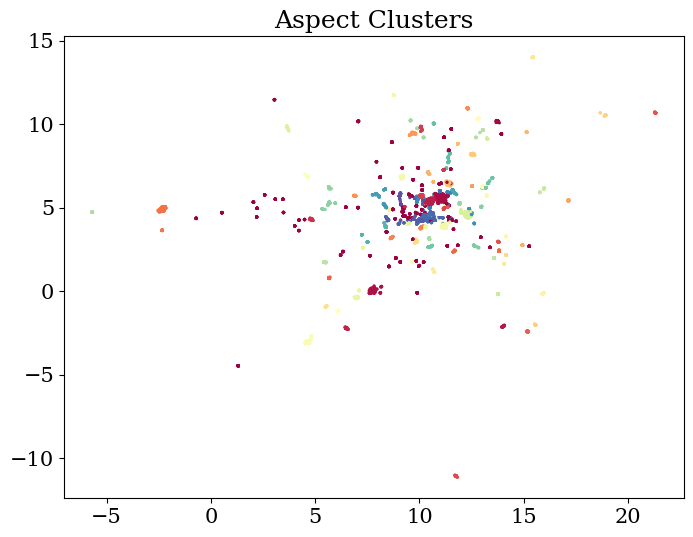

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(umap_embeddings[:,0], umap_embeddings[:,1], s=2, c=labels, cmap='Spectral')
plt.title("Aspect Clusters")
plt.show()


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import asyncio
import json
import time
from typing import List, Dict, Any, Optional
import os
import pandas as pd
import aiohttp

# --- CONFIGURATION ---
API_KEY = "YOUR_API_KEY" # <-- Replace with your actual API key

# Model: gemini-2.0-flash (RPM Limit: 2000)
API_URL = "https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent"

# Optimal Performance Settings
# RPM limit is 2000, we target 1800 (90% load), leaving a 10% safety buffer.
TARGET_RPM = 1800

# Increase concurrency to fill the RPM pipeline.
# Assuming each request takes 1.5s, it would require 1800/60 * 1.5 ≈ 45 concurrent requests to max out.
# However, considering network latency fluctuations, we set concurrency to 250 to ensure enough requests are always queued.
MAX_CONCURRENT_REQUESTS = 250

# Filename Update: Full Data (to avoid confusion with previous filtered versions)
CHECKPOINT_FILENAME = 'absa_labels_831k_full.jsonl'

# --- TAXONOMY & INSTRUCTION (No Changes) ---
CUSTOM_TAXONOMY = """
# Aspect Taxonomy
## Unclassified
Aspects: calf, vacation bible school, coverage, work, duct, down filling, XL, cut, fitbit charge, industry, open toe, spring, 8 ball rack, flim, clear, strap drop, Stallion, broke, shirt tails, pins, Rounded Slides, razor back, Case, quantity, metal supports, bed, imagen.
## Clips
Aspects: clip-on mechanism, Clips, clip, clip on the bridge, clip-ons, Clip, clip on, clips, clipon.
## Comfort
Aspects: Comfortable, Comfort, COMFORTABLE, CONFORTABLE, comfortable, thickness, confortable, comfy, comfort, softness, calentitas, calurosos, cálida, cómodas, Calida, pie.
## Service
Aspects: daughter, customer service, granddaughter, customer support, Kids, services, son, service, Teachers, students, grandson, employees, Kid, teachers, customer, support.
## Print
Aspects: screen print, screen printing, prints, print, screen, Print quality, paper, Printed, display, Screen, estampado.
## Function
Aspects: function, latches, metal supports, functional, zippers, button holes, clasp, adhesive, key chain.
## Washing
Aspects: Washes, Washed, wash up, clean, washes, wash cycle, wash, washing, cleaner, washable, launders, secadora, secado.
## Visuals
Aspects: picture, Image, images, Camera, image, pic, device, photo, photos, foto, pictures, pictured.
## Style
Aspects: styling, Style, styles, looked, look, looking, style, Look, LOOKING, Looks, looks, stylish, STYLE, Appearance, estilizado, estilo, presentación, vestido.
## Price
Aspects: cost, priced, Priced, price point, costs, Cost, pricing, prices, Price, price, cheap.
## Shipping
Aspects: deliverer, Delivered, Delivery, sent, packing, package, Seller, shipping box, lunch box, shipped, Shipping, ordered, Box, container, deliver, received, arrived, seller shipped, Arrived, Shipped, purchase, Packaging, shipping, packaging, DELIVERY, seller, shipping material, delivery, packaged, box, estado, entrega, Llego.
## Material
Aspects: bandanas, plastic, textile, headcovers, outfit, silk, shirt material, stones, sewn, colores, neckline, nylon frame, earrings, Shoes, back strap, Fit, sound quality, Color, quality material, arm piece, style fabric, belly, Materials, material, calidad, Piedra, piedras, pantalones, Calida, calzado, pieza, pant.
## Size
Aspects: Size, size chart, length of, smaller, Large, Length, Sized, size, widths, length, sizes, Sizes, large, measurement, height, fit / length, sized, Dimensions, Sizing, sizing, measurements, small, Tamaño de cintura.
"""

SYSTEM_INSTRUCTION = f"""
You are an expert ABSA model for Amazon Fashion.
Analyze the review and extract aspects based on the Taxonomy.
Map terms to the exact **Category Name** (e.g., 'Comfort', 'Size').

RULES:
1. OUTPUT: Valid JSON array only. No text.
2. SCORE: -1.0 to 1.0.

TAXONOMY:
{CUSTOM_TAXONOMY}
"""

RESPONSE_SCHEMA = {
    "type": "ARRAY",
    "items": {
        "type": "OBJECT",
        "properties": {
            "aspect": {"type": "STRING", "description": "Category Name"},
            "sentiment": {"type": "STRING", "description": "pos/neu/neg"},
            "score": {"type": "NUMBER"}
        },
        "propertyOrdering": ["aspect", "sentiment", "score"]
    }
}

# --- RATE LIMITER ---
class RateLimiter:
    def __init__(self, rpm):
        self.delay = 60.0 / rpm
        self.last_request_time = 0
        self.lock = asyncio.Lock()

    async def wait(self):
        async with self.lock:
            now = time.monotonic()
            next_allowed = self.last_request_time + self.delay
            wait_time = next_allowed - now
            if wait_time > 0:
                await asyncio.sleep(wait_time)
                self.last_request_time = next_allowed
            else:
                self.last_request_time = now

# --- API CALLER ---
async def api_call_with_backoff(session, review_text, limiter, attempt=0):
    if not API_KEY or "YOUR_API_KEY" in API_KEY:
        print("ERROR: Invalid API KEY.")
        return None

    await limiter.wait()

    payload = {
        "contents": [{"parts": [{"text": f"Review: {review_text}"}]}],
        "systemInstruction": {"parts": [{"text": SYSTEM_INSTRUCTION}]},
        "generationConfig": {"responseMimeType": "application/json", "responseSchema": RESPONSE_SCHEMA}
    }

    max_retries = 8
    try:
        async with session.post(f"{API_URL}?key={API_KEY}", json=payload) as response:
            if response.status == 200:
                result = await response.json()
                try:
                    return json.loads(result['candidates'][0]['content']['parts'][0]['text'])
                except: return None
            elif response.status in [429, 500, 503] and attempt < max_retries:
                # On 429, sleep a bit longer to bypass peak traffic
                await asyncio.sleep((2 ** attempt) + 1)
                return await api_call_with_backoff(session, review_text, limiter, attempt + 1)
            else:
                if attempt == 0:
                    # Only print non-retryable errors on the first attempt
                    pass
                return None
    except Exception as e:
        if attempt < max_retries:
            await asyncio.sleep(2 ** attempt)
            return await api_call_with_backoff(session, review_text, limiter, attempt + 1)
        return None

# --- WORKER ---
async def worker(session, input_queue, output_queue, limiter):
    while True:
        item = await input_queue.get()
        if item is None:
            input_queue.task_done()
            break
        index, text = item
        try:
            result = await api_call_with_backoff(session, text, limiter)
            await output_queue.put((index, text, result))
        except: await output_queue.put((index, text, None))
        input_queue.task_done()

# --- WRITER ---
async def writer_listener(output_queue, checkpoint_file, total_count):
    saved_count = 0
    failed_count = 0
    start_time = time.time()

    try:
        from tqdm.notebook import tqdm
        pbar = tqdm(total=total_count, desc="Processing", unit="rev")
    except: pbar = None

    os.makedirs(os.path.dirname(checkpoint_file), exist_ok=True)

    with open(checkpoint_file, 'a', encoding='utf-8') as f:
        while True:
            item = await output_queue.get()
            if item is None:
                output_queue.task_done()
                break

            index, text, result = item

            if result is not None:
                f.write(json.dumps({"id": index, "text": text, "aspects": result}, ensure_ascii=False) + '\n')
                f.flush()
                os.fsync(f.fileno())
                saved_count += 1
            else:
                failed_count += 1

            if pbar:
                pbar.update(1)
                pbar.set_description(f"\u2705Saved: {saved_count} | \u274cFailed: {failed_count}")
            elif (saved_count + failed_count) % 200 == 0:
                print(f"Saved: {saved_count} | Failed: {failed_count}")

            output_queue.task_done()
    if pbar: pbar.close()

# --- MAIN ---
def get_checkpoint_path():
    possible_paths = [
        f'/content/drive/MyDrive/{CHECKPOINT_FILENAME}',
        f'/content/drive/My Drive/{CHECKPOINT_FILENAME}'
    ]
    for path in possible_paths:
        if os.path.exists(path):
            print(f"Ǵ̽ Found existing file: {path}")
            return path

    if os.path.exists('/content/drive/MyDrive'):
        return f'/content/drive/MyDrive/{CHECKPOINT_FILENAME}'
    elif os.path.exists('/content/drive/My Drive'):
        return f'/content/drive/My Drive/{CHECKPOINT_FILENAME}'
    else:
        print("⚠  Warning: Drive not found. Saving locally.")
        return CHECKPOINT_FILENAME

def get_start_index(checkpoint_file):
    if not os.path.exists(checkpoint_file): return 0
    try:
        with open(checkpoint_file, 'r', encoding='utf-8') as f:
            return sum(1 for line in f)
    except: return 0

async def main_absa_processor(all_texts):
    if not os.path.exists('/content/drive'):
        print("Mounting Drive...")
        from google.colab import drive
        drive.mount('/content/drive')

    checkpoint_file = get_checkpoint_path()
    print(f"💾 Saving to: {checkpoint_file}")

    start_index = get_start_index(checkpoint_file)
    if start_index >= len(all_texts):
        print("✅ All Done!")
        return

    print(f"Total Tasks: {len(all_texts)} | Already Saved: {start_index} | 🚀 Target RPM: {TARGET_RPM}")

    remaining_texts = all_texts[start_index:]
    input_queue = asyncio.Queue()
    output_queue = asyncio.Queue()
    limiter = RateLimiter(TARGET_RPM)

    for i, text in enumerate(remaining_texts):
        input_queue.put_nowait((start_index + i, text))

    async with aiohttp.ClientSession() as session:
        workers = [asyncio.create_task(worker(session, input_queue, output_queue, limiter)) for _ in range(MAX_CONCURRENT_REQUESTS)]
        writer = asyncio.create_task(writer_listener(output_queue, checkpoint_file, len(remaining_texts)))

        await input_queue.join()
        for _ in range(MAX_CONCURRENT_REQUESTS): await input_queue.put(None)
        await asyncio.gather(*workers)
        await output_queue.put(None)
        await writer

if __name__ == "__main__":
    if 'df' in locals() or 'df' in globals():
        try: import nest_asyncio; nest_asyncio.apply()
        except: os.system('pip install nest_asyncio'); import nest_asyncio; nest_asyncio.apply()
        try: import tqdm
        except: os.system('pip install tqdm')

        # ☢  FULL MODE: Processing logic (no filtering)
        print(f"🔥 FULL MODE: Processing all {len(df)} samples.")

        # Simple conversion to ensure handling of null values and avoid errors
        all_texts = [str(x) for x in df['text'].fillna('').tolist()]

        if len(all_texts) > 0:
            # 2. Run the main program
            asyncio.run(main_absa_processor(all_texts))
        else:
            print("❌ Error: DataFrame is empty!")
    else:
        print("Error: 'df' not found.")

🔥 FULL MODE: Processing all 831935 samples.
📂 Found existing file: /content/drive/MyDrive/absa_labels_831k_full.jsonl
💾 Saving to: /content/drive/MyDrive/absa_labels_831k_full.jsonl
Total Tasks: 831935 | Already Saved: 395 | 🚀 Target RPM: 1800


Processing:   0%|          | 0/831540 [00:00<?, ?rev/s]

In [27]:
import json
import csv
import os
from google.colab import drive

# 1. Auto-mount Google Drive (if not already mounted)
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')

# 2. Define file paths
# Input file (Your JSONL results)
INPUT_FILE = '/content/drive/MyDrive/absa_labels_831k_full.jsonl'
# Output file (Generated CSV)
OUTPUT_FILE = '/content/drive/MyDrive/absa_results_831k_final.csv'

print(f"📄 Reading file: {INPUT_FILE}")
print(f"💾 Output file: {OUTPUT_FILE}")

# 3. Start conversion
# Use streaming processing to handle millions of lines without memory issues
try:
    with open(INPUT_FILE, 'r', encoding='utf-8') as fin, \
         open(OUTPUT_FILE, 'w', encoding='utf-8', newline='') as fout:

        # Define CSV headers
        headers = ['id', 'text', 'aspect', 'sentiment', 'score']
        writer = csv.DictWriter(fout, fieldnames=headers)
        writer.writeheader()

        review_count = 0
        aspect_count = 0

        print("🚀 Starting conversion...")

        for line in fin:
            line = line.strip()
            if not line: continue

            try:
                # Parse each JSON line
                data = json.loads(line)

                r_id = data.get('id')
                text = data.get('text', '')
                aspects = data.get('aspects')

                # Write only if 'aspects' is a valid non-empty list
                if isinstance(aspects, list) and len(aspects) > 0:
                    for asp in aspects:
                        # Write CSV row (flattened structure)
                        writer.writerow({
                            'id': r_id,
                            'text': text,  # Duplicate text for each aspect row
                            'aspect': asp.get('aspect'),
                            'sentiment': asp.get('sentiment'),
                            'score': asp.get('score')
                        })
                        aspect_count += 1

                review_count += 1

                # Print progress every 50,000 reviews
                if review_count % 50000 == 0:
                    print(f"   Processed reviews: {review_count} | Extracted aspects: {aspect_count}")

            except json.JSONDecodeError:
                print(f"⚠️ Skipping corrupted line: {line[:50]}...")
                continue

    print("\n✅ Conversion Complete!")
    print(f"📊 Summary Statistics:")
    print(f"   - Total processed reviews: {review_count}")
    print(f"   - Total extracted aspects (CSV rows): {aspect_count}")
    print(f"   - CSV file location: {OUTPUT_FILE}")

except FileNotFoundError:
    print(f"❌ Error: Input file {INPUT_FILE} not found. Please check the path.")
except Exception as e:
    print(f"❌ Error occurred: {e}")

📄 Reading file: /content/drive/MyDrive/absa_labels_831k_full.jsonl
💾 Output file: /content/drive/MyDrive/absa_results_831k_final.csv
🚀 Starting conversion...
   Processed reviews: 50000 | Extracted aspects: 122390
   Processed reviews: 100000 | Extracted aspects: 237301
   Processed reviews: 150000 | Extracted aspects: 353219
   Processed reviews: 200000 | Extracted aspects: 467596
   Processed reviews: 250000 | Extracted aspects: 577347
   Processed reviews: 300000 | Extracted aspects: 690592
   Processed reviews: 350000 | Extracted aspects: 802384
   Processed reviews: 400000 | Extracted aspects: 912024
   Processed reviews: 450000 | Extracted aspects: 1024548
   Processed reviews: 500000 | Extracted aspects: 1131862
   Processed reviews: 550000 | Extracted aspects: 1238774
   Processed reviews: 600000 | Extracted aspects: 1344672
   Processed reviews: 650000 | Extracted aspects: 1450969
   Processed reviews: 700000 | Extracted aspects: 1552094
   Processed reviews: 750000 | Extracte